In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('1stMay2016To15thMay2016.csv')
df.head()

,timestamp,lon,lat,status,turn,course,heading
0,4/30/2016 18:30,72.545323,18.689750,Under way using engine,0.0,360.0,133.0
1,4/30/2016 18:30,72.862023,18.911283,At anchor,0.0,354.6,355.0
2,4/30/2016 18:30,72.550663,18.684640,Restricted manoeuverability,0.0,163.0,128.0
3,4/30/2016 18:30,72.859308,18.939392,Under way sailing,0.0,70.3,304.0
4,4/30/2016 18:30,72.858448,18.943602,Restricted manoeuverability,-128.0,202.2,511.0


In [3]:
df.tail()

,timestamp,lon,lat,status,turn,course,heading
861977,5/15/2016 18:29,72.863075,18.878987,Restricted manoeuverability,0.0,360.0,17.0
861978,5/15/2016 18:29,72.890827,18.931242,Restricted manoeuverability,0.0,245.3,240.0
861979,5/15/2016 18:29,72.862550,18.951535,At anchor,0.0,216.9,12.0
861980,5/15/2016 18:29,72.851883,18.908000,Under way using engine,-7.0,182.4,0.0
861981,5/15/2016 18:29,72.122167,19.170500,Restricted manoeuverability,0.0,354.0,303.0


In [4]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861982 entries, 0 to 861981
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  861982 non-null  object 
 1   lon        843521 non-null  float64
 2   lat        843521 non-null  float64
 3   status     817293 non-null  object 
 4   turn       817293 non-null  float64
 5   course     822907 non-null  float64
 6   heading    822907 non-null  float64
dtypes: float64(5), object(2)
memory usage: 46.0+ MB
Index(['timestamp', 'lon', 'lat', 'status', 'turn', 'course', 'heading'], dtype='object')


In [5]:
df.timestamp.unique()

array(['4/30/2016 18:30', '4/30/2016 18:31', '4/30/2016 18:32', ...,
       '5/15/2016 18:27', '5/15/2016 18:28', '5/15/2016 18:29'],
      dtype=object)

In [6]:
len(df.timestamp.unique())

21600

In [7]:
df = df[(df['lat']!=91)& (df['lon']!=181)]

In [8]:
df = df[(df['timestamp']=='4/30/2016 18:30')]

In [9]:
# llon = df.lon.min()-1
# llat = df.lat.min()-1
# ulat = df.lat.max()+1
# ulon = df.lon.max()+1

In [10]:
#Set_Boundaries

llat=0
ulat=30
llon=60
ulon=100

In [11]:
# Focus on a region

df2=df[(df['lon']>llon) & (df['lon']<ulon) & 
      (df['lat']>llat) & (df['lat']<ulat)]
print("Number of final datapoints:",len(df))

Number of final datapoints: 48


(Text(0.5, 1.0, 'lon Vs lat'), Text(0.5, 0, 'lon'), Text(0, 0.5, 'lat'))

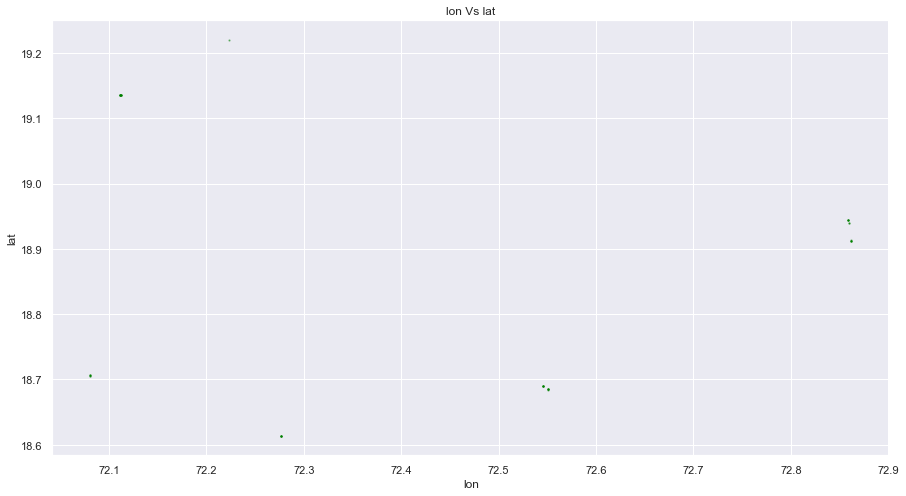

In [12]:
plt.figure(figsize=(15,8))

X1 = df2.loc[:,["lon","lat"]]
X1 = X1.values
plt.scatter(X1[:, 0], X1[:, 1], alpha= 0.4, s=np.pi/2, color="green")
plt.title("lon Vs lat"), plt.xlabel('lon'), plt.ylabel('lat')

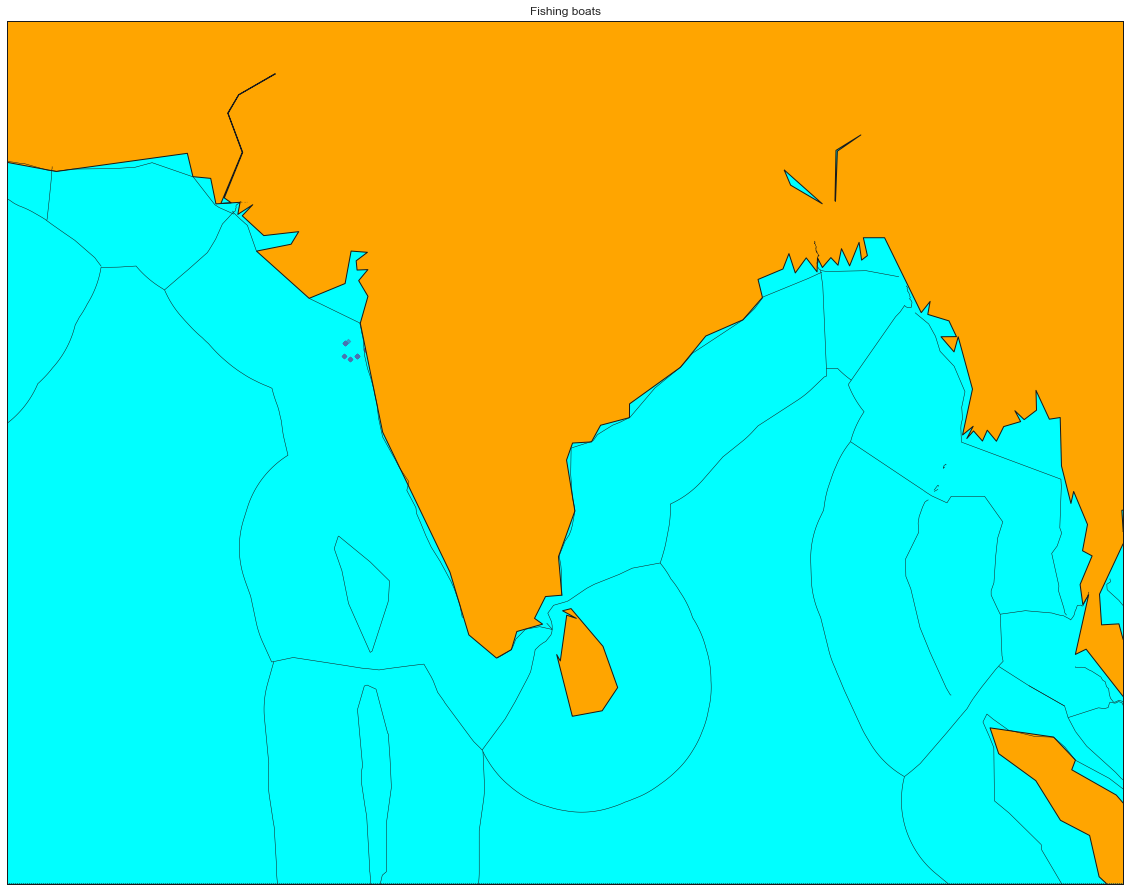

In [13]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X1[:, 0],X1[:, 1])
m.scatter(x,y,marker='D', s=np.pi*3, cmap='viridis', alpha = 0.6)
eez= m.readshapefile('World_EEZ_v11_20191118/eez_boundaries_v11','eez')
plt.title("Fishing boats")
plt.show()

In [14]:
eez

(2215,
 3,
 [-180.0, -76.8001174201828, 0.0, 0.0],
 [180.0, 86.99400535037381, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x20fbc4c5190>)

In [36]:
IndianEEZ = '22.61757165 88.93885753 22.61753717 88.93903594 22.61753536 88.93904917 22.61753647 88.93906356 22.61755995 88.93924121 22.61757144 88.93930214 22.61758679 88.93941837 22.61759833 88.93947961 22.61761363 88.93959554 22.61762522 88.93965708 22.61764047 88.9397727 22.61765211 88.93983455 22.61766731 88.93994986 22.617679 88.94001202 22.61769415 88.94012702 22.61770589 88.94018949 22.61772099 88.94030418 22.61773278 88.94036696 22.61774783 88.94048134 22.61775967 88.94054443 22.61777467 88.94065851 22.61778656 88.9407219 22.61780151 88.94083567 22.61781345 88.94089937 22.61782835 88.94101283 22.61784034 88.94107684 22.61785519 88.94118999 22.61786723 88.94125431 22.61788203 88.94136715 22.61789412 88.94143178 22.61790887 88.94154431 22.61792101 88.94160925 22.61793571 88.94172148 22.6179479 88.94178672 22.61796255 88.94189864 22.61797479 88.94196419 22.6179894 88.9420758 22.61800168 88.94214166 22.61801624 88.94225296 22.61802857 88.94231913 22.61804308 88.94243012 22.61805546 88.9424966 22.61806992 88.94260728 22.61808235 88.94267407 22.61809676 88.94278445 22.61810924 88.94285154 22.6181236 88.94296161 22.61813613 88.94302901 22.61815044 88.94313877 22.61816302 88.94320648 22.61817728 88.94331593 22.61818991 88.94338395 22.61820412 88.94349309 22.6182168 88.94356142 22.61823096 88.94367025 22.61824369 88.94373889 22.6182578 88.94384742 22.61827058 88.94391636 22.61828464 88.94402458 22.61829747 88.94409383 22.61831148 88.94420174 22.61832436 88.9442713 22.61833832 88.9443789 22.61835125 88.94444877 22.61836516 88.94455606 22.61837814 88.94462624 22.618392 88.94473322 22.61840503 88.94480371 22.61841885 88.94491039 22.61843192 88.94498118 22.61844569 88.94508755 22.61845881 88.94515865 22.61847253 88.94526471 22.6184857 88.94533612 22.61849937 88.94544187 22.61870487 88.94667943 22.61873302 88.94679689 22.61874376 88.94685484 22.61877161 88.94697087 22.61878265 88.94703024 22.6188102 88.94714486 22.61882154 88.94720565 22.61884879 88.94731885 22.61886044 88.94738105 22.61888737 88.94749284 22.61889933 88.94755646 22.61892596 88.94766683 22.61893822 88.94773186 22.61896454 88.94784082 22.61897712 88.94790726 22.61900313 88.94801481 22.61901602 88.94808267 22.61904171 88.9481888 22.61905491 88.94825807 22.61908029 88.94836279 22.61909381 88.94843347 22.61911888 88.94853678 22.61913271 88.94860888 22.61915746 88.94871077 22.61917161 88.94878428 22.61919604 88.94888477 22.6192051 88.9489317 22.6192105 88.94895969 22.61923462 88.94905876 22.6192494 88.94913509 22.6192732 88.94923275 22.6192883 88.94931049 22.61931178 88.94940674 22.6193272 88.94948589 22.61935036 88.94958073 22.61936611 88.9496613 22.61938894 88.94975472 22.61940501 88.9498367 22.61942752 88.94992871 22.61944391 88.9500121 22.6194661 88.95010271 22.61948281 88.95018751 22.61950467 88.9502767 22.61952171 88.95036291 22.61954325 88.95045069 22.61956062 88.95053831 22.61958183 88.95062468 22.61959952 88.95071372 22.6196204 88.95079867 22.61963842 88.95088912 22.61965898 88.95097267 22.61967733 88.95106452 22.61969756 88.95114666 22.61971623 88.95123992 22.61973613 88.95132065 22.61977127 88.95149568 22.61979896 88.95167294 22.6198054 88.95172998 22.61982419 88.95185094 22.61983032 88.95190537 22.61984942 88.95202894 22.61985524 88.95208076 22.61987465 88.95220694 22.61988016 88.95225614 22.61989988 88.95238494 22.61990509 88.95243153 22.6199251 88.95256294 22.61993001 88.95260692 22.61995033 88.95274094 22.61995494 88.95278231 22.61997556 88.95291894 22.61997986 88.9529577 22.62000078 88.95309694 22.62000479 88.95313309 22.62002601 88.95327494 22.62002972 88.95330848 22.62005123 88.95345294 22.62005465 88.95348386 22.62007645 88.95363094 22.62007957 88.95365925 22.62010167 88.95380894 22.6201045 88.95383464 22.6201269 88.95398695 22.62012943 88.95401003 22.62014056 88.95408605 22.62012763 88.95415085 22.62011954 88.95418508 22.62009232 88.9543221 22.6200834 88.95435988 22.620057 88.95449336 22.62004726 88.95453467 22.62002168 88.95466461 22.62001112 88.95470947 22.61998636 88.95483586 22.61997499 88.95488426 22.61995104 88.95500712 22.61993885 88.95505906 22.61991571 88.95517837 22.61990272 88.95523386 22.61988039 88.95534962 22.61986659 88.95540865 22.61984506 88.95552087 22.61983046 88.95558345 22.61980973 88.95569212 22.61979433 88.95575824 22.6197744 88.95586337 22.61975821 88.95593304 22.61973906 88.95603462 22.61972209 88.95610783 22.61970373 88.95620586 22.61968597 88.95628263 22.61967544 88.95633919 22.6196197 88.95645713 22.61961469 88.95646909 22.61960451 88.95649341 22.61953905 88.9566315 22.61952263 88.9566708 22.6194584 88.95680586 22.61944075 88.9568482 22.61937774 88.95698022 22.61935887 88.9570256 22.61927499 88.9572007 22.61918365 88.9573672 22.61908484 88.95752509 22.61897857 88.95767439 22.61886483 88.95781508 22.61881892 88.95786512 22.61874773 88.95795191 22.61871611 88.9579858 22.61863052 88.9580886 22.61861346 88.95810658 22.61851319 88.95822515 22.61851097 88.95822746 22.61840758 88.95834778 22.61839646 88.9583624 22.61830414 88.95846807 22.61827975 88.95849966 22.61816042 88.95863392 22.61803281 88.95875863 22.61789691 88.95887378 22.61775272 88.9589794 22.61760024 88.95907546 22.61743948 88.95916198 22.61727043 88.95923894 22.6170931 88.95930636 22.61702855 88.95932649 22.61691282 88.95937038 22.61684759 88.95939086 22.61673253 88.95943441 22.61666663 88.95945523 22.61655226 88.95949844 22.61648567 88.9595196 22.61637198 88.95956247 22.61630472 88.95958397 22.61619171 88.95962651 22.61612376 88.95964833 22.61606908 88.95966888 22.61601144 88.95969054 22.6159428 88.95971268 22.61583117 88.95975458 22.61576184 88.95977704 22.6156509 88.95981862 22.61564651 88.95982005 22.61561653 88.9598298 22.61558136 88.95982658 22.6154714 88.95982139 22.6154028 88.95981536 22.61530798 88.95981125 22.61522424 88.95980421 22.61514457 88.95980105 22.61504568 88.95979311 22.61498117 88.9597908 22.61486712 88.95978206 22.61481777 88.95978049 22.61468856 88.95977108 22.61465437 88.95977012 22.61459159 88.95976579 22.61451045 88.95974603 22.61449061 88.95974214 22.61433288 88.95970373 22.61431289 88.95969982 22.61415531 88.95966142 22.61413517 88.9596575 22.61397774 88.95961911 22.61395745 88.95961518 22.61380018 88.9595768 22.61377973 88.95957286 22.61362261 88.9595345 22.61360201 88.95953054 22.61344504 88.95949219 22.61342429 88.95948822 22.61326748 88.95944988 22.61324657 88.9594459 22.61308991 88.95940757 22.61306885 88.95940358 22.61291234 88.95936526 22.61289113 88.95936126 22.6128139 88.95934234 22.61273478 88.95932295 22.6127134 88.95931895 22.61255721 88.95928063 22.61253568 88.95927663 22.61237964 88.95923832 22.61235796 88.95923431 22.61220208 88.95919601 22.61218024 88.959192 22.61202451 88.95915369 22.61200251 88.95914968 22.61184694 88.95911138 22.61182479 88.95910737 22.61166938 88.95906906 22.61164707 88.95906506 22.61149181 88.95902675 22.61146934 88.95902275 22.61131425 88.95898443 22.61129162 88.95898044 22.61113668 88.95894211 22.61111389 88.95893813 22.61095911 88.95889979 22.61093617 88.95889582 22.61078155 88.95885746 22.61075844 88.95885351 22.61058149 88.95880955 22.61041043 88.95875291 22.61024529 88.95868359 22.61022151 88.95867135 22.61008131 88.95861178 22.61006646 88.95860405 22.60991734 88.95853993 22.6099114 88.9585368 22.60975642 88.95846935 22.60975329 88.95846826 22.60960162 88.95840145 22.60958905 88.958397 22.60944681 88.95833358 22.60942483 88.9583257 22.60929198 88.95826576 22.60926062 88.95825437 22.60909782 88.95818002 22.60894108 88.95809266 22.6087904 88.95799229 22.60864578 88.95787891 22.60857965 88.9578186 22.6085041 88.95775921 22.6084375 88.95769866 22.60836242 88.95763952 22.60829534 88.95757873 22.60822074 88.95751983 22.60815319 88.95745879 22.60807905 88.95740014 22.60801105 88.95733885 22.60793737 88.95728045 22.6078689 88.95721891 22.60779568 88.95716077 22.60772676 88.95709896 22.60765399 88.95704109 22.60758462 88.95697902 22.6075123 88.95692142 22.60744248 88.95685907 22.60737061 88.95680174 22.60730035 88.95673912 22.60722892 88.95668207 22.60715822 88.95661917 22.60708723 88.9565624 22.60701609 88.95649922 22.60694554 88.95644273 22.60687396 88.95637927 22.60680384 88.95632307 22.60673183 88.95625932 22.60666215 88.9562034 22.6065897 88.95613936 22.60655772 88.95611367 22.60652045 88.95608374 22.60644757 88.95601941 22.60637876 88.95596407 22.60630545 88.95589945 22.60623706 88.95584441 22.60616332 88.9557795 22.60609537 88.95572475 22.6060212 88.95565954 22.60595367 88.95560509 22.60587908 88.95553958 22.60581197 88.95548544 22.60573696 88.95541962 22.60567027 88.95536578 22.60559484 88.95529967 22.60552858 88.95524612 22.60545272 88.95517971 22.60538688 88.95512646 22.6053106 88.95505975 22.60524518 88.95500681 22.60516848 88.95493979 22.60510348 88.95488715 22.60502636 88.95481983 22.60496178 88.9547675 22.60495216 88.95475911 22.60494335 88.95474729 22.60490212 88.95468752 22.60483816 88.95460167 22.604797 88.95454201 22.60473296 88.95445604 22.60469188 88.9543965 22.60462777 88.95431042 22.60458676 88.95425099 22.60452257 88.9541648 22.60448164 88.95410548 22.60441738 88.95401918 22.60437652 88.95395997 22.60431218 88.95387356 22.6042714 88.95381446 22.60420699 88.95372794 22.60416628 88.95366894 22.60410179 88.95358232 22.60406116 88.95352343 22.6039966 88.9534367 22.60395604 88.95337792 22.6038914 88.95329108 22.60385092 88.95323241 22.6037862 88.95314546 22.6037458 88.9530869 22.60368101 88.95299984 22.60364068 88.95294139 22.60357581 88.95285422 22.60353556 88.95279588 22.60347062 88.95270859 22.60343044 88.95265036 22.60336542 88.95256297 22.60332532 88.95250485 22.60326023 88.95241735 22.6032202 88.95235934 22.60315503 88.95227173 22.60311508 88.95221383 22.60304984 88.95212611 22.60300996 88.95206832 22.60294464 88.95198049 22.60290484 88.95192281 22.60283945 88.95183487 22.60279972 88.9517773 22.60273425 88.95168925 22.6026946 88.95163179 22.60262906 88.95154363 22.60258948 88.95148627 22.60252386 88.95139801 22.60248436 88.95134076 22.60241867 88.95125239 22.60237924 88.95119525 22.60231347 88.95110676 22.60227412 88.95104974 22.60220828 88.95096114 22.602169 88.95090423 22.60210308 88.95081552 22.60206388 88.95075872 22.60199789 88.9506699 22.60195876 88.95061321 22.60189269 88.95052428 22.60185364 88.95046769 22.6017875 88.95037866 22.60174851 88.95032218 22.6016823 88.95023304 22.60164339 88.95017667 22.60157711 88.95008742 22.60153827 88.95003116 22.60147191 88.9499418 22.60143316 88.94988565 22.60136672 88.94979618 22.60132804 88.94974014 22.60126152 88.94965056 22.60122292 88.94959463 22.60115633 88.94950494 22.6011178 88.94944912 22.60105113 88.94935932 22.60101267 88.9493036 22.60094594 88.94921369 22.60090755 88.94915809 22.60084074 88.94906807 22.60080243 88.94901258 22.60073554 88.94892245 22.60069731 88.94886707 22.60066559 88.94882432 22.60063035 88.94877683 22.60059219 88.94872156 22.60052515 88.94863121 22.60048707 88.94857605 22.60041996 88.94848559 22.60038195 88.94843054 22.60031476 88.94833997 22.60027683 88.94828502 22.60020957 88.94819435 22.60017171 88.94813951 22.60010437 88.94804873 22.60006659 88.947994 22.59999918 88.94790311 22.59996147 88.94784849 22.59989398 88.94775749 22.59985635 88.94770298 22.59978879 88.94761187 22.59975123 88.94755747 22.59968359 88.94746624 22.59964611 88.94741196 22.5995784 88.94732062 22.59954099 88.94726644 22.5994732 88.947175 22.59943587 88.94712093 22.59936801 88.94702938 22.59933075 88.94697542 22.59926281 88.94688376 22.59922563 88.94682991 22.59915762 88.94673814 22.59912051 88.9466844 22.59905242 88.94659252 22.59901539 88.94653889 22.59894723 88.9464469 22.59891027 88.94639338 22.59884203 88.94630128 22.59880515 88.94624787 22.59873684 88.94615566 22.59870003 88.94610235 22.59863164 88.94601004 22.59859491 88.94595684 22.59852645 88.94586441 22.59848979 88.94581133 22.59842125 88.94571879 22.59838467 88.94566582 22.59831606 88.94557317 22.59827955 88.94552031 22.59821086 88.94542755 22.59817443 88.9453748 22.59810567 88.94528193 22.59806931 88.94522929 22.59800047 88.94513631 22.59796419 88.94508377 22.59789528 88.94499069 22.59785907 88.94493826 22.59779008 88.94484507 22.59775395 88.94479275 22.59768488 88.94469945 22.59764883 88.94464724 22.59757969 88.94455383 22.59754371 88.94450173 22.59747449 88.94440821 22.59743859 88.94435622 22.5973693 88.94426259 22.59733347 88.94421071 22.5972641 88.94411697 22.59722835 88.94406519 22.59715891 88.94397134 22.59712323 88.94391968 22.59705371 88.94382572 22.59701811 88.94377417 22.59694852 88.9436801 22.59691299 88.94362866 22.59684332 88.94353448 22.59680787 88.94348315 22.59673813 88.94338886 22.59670275 88.94333764 22.59663293 88.94324324 22.59659763 88.94319213 22.59652774 88.94309762 22.59649251 88.94304662 22.59642254 88.942952 22.59638739 88.9429011 22.59631735 88.94280638 22.59628227 88.94275559 22.59621215 88.94266076 22.59620055 88.94264395 22.59611446 88.94254801 22.59609306 88.94252563 22.59599646 88.94241778 22.59597191 88.94239206 22.59587846 88.94228755 22.59585075 88.94225849 22.59576046 88.94215733 22.5957296 88.94212492 22.59564245 88.9420271 22.59560846 88.94199135 22.59552444 88.94189688 22.59548731 88.94185777 22.59540643 88.94176667 22.59536617 88.94172419 22.59528842 88.94163645 22.59524503 88.94159061 22.5951704 88.94150624 22.59512389 88.94145703 22.59505239 88.94137603 22.59500276 88.94132345 22.59493437 88.94124582 22.59488163 88.94118986 22.59482822 88.94112912 22.59481634 88.94111562 22.5947605 88.94105627 22.59469832 88.94098541 22.59463938 88.94092268 22.59458029 88.94085522 22.59451826 88.94078908 22.59446226 88.94072502 22.59439714 88.94065549 22.59434422 88.94059483 22.59427603 88.94052189 22.59422619 88.94046464 22.59415491 88.94038829 22.59410815 88.94033445 22.59403381 88.94025468 22.5939901 88.94020427 22.5939127 88.94012108 22.59387206 88.94007409 22.5937916 88.93998747 22.59375401 88.93994391 22.59367051 88.93985386 22.59363596 88.93981374 22.59354941 88.93972024 22.5935179 88.93968357 22.59342832 88.93958662 22.59339984 88.9395534 22.59330724 88.939453 22.59328178 88.93942324 22.59316283 88.93929404 22.5930395 88.9391696 22.59291179 88.9390499 22.59290418 88.93904328 22.59276138 88.93895824 22.59261201 88.93887643 22.59246029 88.93880037 22.59230622 88.93873006 22.5921498 88.93866549 22.59199104 88.93860667 22.59182993 88.9385536 22.59166647 88.93850628 22.59150067 88.93846471 22.59141124 88.93844565 22.59129955 88.93843839 22.59116954 88.9384348 22.59112078 88.93843346 22.59094866 88.93843509 22.59094131 88.9384349 22.59077303 88.93843663 22.59076184 88.93843634 22.59059739 88.93843816 22.59058237 88.93843779 22.59042176 88.93843969 22.5904029 88.93843925 22.59024612 88.93844121 22.59022343 88.9384407 22.59007049 88.93844273 22.59004396 88.93844216 22.58989485 88.93844424 22.58986449 88.93844363 22.58971921 88.93844576 22.58968501 88.9384451 22.58954358 88.93844727 22.58950554 88.93844657 22.58936794 88.93844877 22.58932607 88.93844804 22.58923875 88.9384495 22.5891923 88.93845027 22.5891466 88.93844952 22.58901666 88.93845177 22.58896712 88.938451 22.58884102 88.93845327 22.58878765 88.93845248 22.58866538 88.93845476 22.58860817 88.93845397 22.58848974 88.93845625 22.5884287 88.93845546 22.5883141 88.93845773 22.58824922 88.93845695 22.58813846 88.93845922 22.58806975 88.93845845 22.58796282 88.9384607 22.58789027 88.93845994 22.58778718 88.93846218 22.5877108 88.93846144 22.58764597 88.93846289 22.58761181 88.9384658 22.58758444 88.93846729 22.58743777 88.93847988 22.58740819 88.9384815 22.58726373 88.93849395 22.58723195 88.93849571 22.58708969 88.93850803 22.5870557 88.93850992 22.58699049 88.93851559 22.58691564 88.9385221 22.58687946 88.93852413 22.5867416 88.93853617 22.58670322 88.93853834 22.58656756 88.93855024 22.58652697 88.93855256 22.58639352 88.93856431 22.58635073 88.93856677 22.58621947 88.93857838 22.58617449 88.93858099 22.58599829 88.93859663 22.58582229 88.93861771 22.58564647 88.93864421 22.58547085 88.93867613 22.58533265 88.93870556 22.58529537 88.93871233 22.58515474 88.9387422 22.5851199 88.93874852 22.58497683 88.93877884 22.58494442 88.93878472 22.58479892 88.93881548 22.58476894 88.93882091 22.58462101 88.93885212 22.58459347 88.93885711 22.58444311 88.93888876 22.58441799 88.9388933 22.5842652 88.9389254 22.58424251 88.9389295 22.58408729 88.93896204 22.58406704 88.93896569 22.58390938 88.93899868 22.58389156 88.93900189 22.58373147 88.93903532 22.58371608 88.93903809 22.58355356 88.93907196 22.58354061 88.93907429 22.58337565 88.93910859 22.58336513 88.93911049 22.58319774 88.93914523 22.58318965 88.93914669 22.58301983 88.93918187 22.58301418 88.93918288 22.58284192 88.93921851 22.5828387 88.93921908 22.58266401 88.93925514 22.58266323 88.93925528 22.58248775 88.93929144 22.58248611 88.93929182 22.58233145 88.93932363 22.58231227 88.93932758 22.58230823 88.93932851 22.58213679 88.93936371 22.58213034 88.93936521 22.58196131 88.93939985 22.58195245 88.9394019 22.58178583 88.93943599 22.58177456 88.93943859 22.58161036 88.93947213 22.58159667 88.93947528 22.58143488 88.93950828 22.58141878 88.93951197 22.5812594 88.93954442 22.58124089 88.93954866 22.58108392 88.93958057 22.581063 88.93958534 22.58090844 88.93961671 22.58088511 88.93962203 22.58073296 88.93965286 22.58070722 88.93965871 22.58055749 88.93968901 22.58052933 88.9396954 22.58038201 88.93972516 22.58035143 88.93973208 22.58020653 88.93976131 22.58017354 88.93976876 22.58003105 88.93979747 22.57999565 88.93980544 22.57985557 88.93983362 22.57981775 88.93984212 22.5796801 88.93986977 22.57963986 88.9398788 22.57960113 88.93988657 22.57951726 88.9399114 22.5794667 88.93992763 22.57934479 88.93996374 22.57929484 88.93997977 22.57917233 88.94001608 22.57912297 88.94003192 22.57899987 88.94006841 22.57895111 88.94008407 22.5788274 88.94012075 22.57880513 88.9401279 22.57877924 88.94013621 22.57874458 88.9401465 22.57870333 88.94014764 22.57864938 88.94014793 22.57852013 88.94015152 22.5784662 88.94015179 22.57833693 88.94015539 22.57828302 88.94015566 22.57815373 88.94015927 22.57809984 88.94015953 22.57797053 88.94016314 22.57791667 88.9401634 22.57778732 88.94016702 22.57773349 88.94016727 22.57760412 88.9401709 22.57755031 88.94017114 22.57742092 88.94017477 22.57736713 88.940175 22.57723772 88.94017865 22.57718395 88.94017887 22.57705452 88.94018253 22.57700077 88.94018274 22.57687132 88.94018641 22.5768176 88.94018661 22.57668812 88.94019028 22.57663442 88.94019047 22.57650492 88.94019416 22.57645124 88.94019434 22.57632172 88.94019804 22.57626806 88.94019821 22.57613852 88.94020191 22.57608488 88.94020208 22.57595532 88.94020579 22.5759017 88.94020594 22.57577211 88.94020967 22.57574567 88.94020974 22.57571852 88.94020981 22.57558891 88.94021355 22.57553535 88.94021368 22.57540571 88.94021743 22.57535217 88.94021754 22.57522251 88.9402213 22.57516899 88.94022141 22.57503931 88.94022518 22.57498581 88.94022528 22.57485611 88.94022906 22.57480263 88.94022915 22.57467291 88.94023294 22.57461945 88.94023301 22.57448971 88.94023682 22.57443628 88.94023688 22.57430651 88.9402407 22.5742531 88.94024074 22.57412331 88.94024457 22.57406992 88.94024461 22.5739401 88.94024845 22.57388674 88.94024848 22.5737569 88.94025233 22.57370356 88.94025234 22.5735737 88.94025621 22.57352038 88.94025621 22.5733905 88.94026009 22.5733372 88.94026007 22.5732073 88.94026397 22.57315402 88.94026394 22.5730241 88.94026785 22.57297084 88.9402678 22.5728409 88.94027173 22.57278767 88.94027167 22.5726577 88.94027561 22.57260449 88.94027553 22.57247449 88.94027949 22.57242131 88.9402794 22.57229129 88.94028337 22.57223813 88.94028326 22.57210809 88.94028725 22.57205495 88.94028713 22.57192489 88.94029113 22.57187177 88.94029099 22.57174169 88.94029501 22.57168859 88.94029485 22.57157672 88.94029833 22.57155849 88.94029889 22.57137608 88.94029829 22.57119479 88.9402914 22.57101461 88.9402782 22.57083555 88.94025871 22.5706576 88.94023293 22.57049113 88.94020273 22.57048071 88.94020121 22.57031943 88.94017177 22.57030381 88.94016948 22.57014773 88.94014082 22.57012692 88.94013774 22.56997603 88.94010988 22.56995003 88.940106 22.56977332 88.94007318 22.56959774 88.94003408 22.56942326 88.93998868 22.56924991 88.93993698 22.56907766 88.939879 22.56890653 88.93981472 22.56873652 88.93974416 22.56856762 88.9396673 22.56839983 88.93958415 22.56823316 88.9394947 22.5680676 88.93939897 22.56790316 88.93929694 22.56773983 88.93918863 22.56757762 88.93907402 22.56741652 88.93895312 22.56735837 88.93890688 22.56725586 88.93882974 22.56720357 88.93878813 22.56709519 88.93870636 22.56704876 88.93866937 22.56693454 88.93858298 22.56689395 88.93855062 22.56677388 88.93845959 22.56673914 88.93843186 22.56661322 88.9383362 22.56658432 88.93831311 22.56645256 88.9382128 22.5664295 88.93819436 22.5662919 88.9380894 22.56627468 88.93807562 22.56623169 88.93804276 22.5662228 88.93803596 22.56624111 88.93795512 22.56625664 88.937893 22.56630493 88.93767942 22.56659708 88.93623011 22.56662831 88.93604739 22.56665382 88.9358652 22.56667363 88.93568354 22.56668772 88.9355024 22.5666961 88.9353218 22.56669877 88.93514173 22.56669572 88.93496219 22.56668697 88.93478318 22.5666725 88.93460471 22.5666646 88.93453502 22.56665579 88.93442644 22.56664791 88.93435701 22.56663908 88.93424817 22.56663123 88.93417899 22.56662237 88.93406989 22.56661455 88.93400097 22.56660566 88.93389162 22.56659786 88.93382295 22.56658896 88.93371335 22.56658118 88.93364493 22.56657225 88.93353508 22.5665645 88.93346691 22.56655554 88.93335681 22.56654781 88.93328889 22.56653883 88.93317854 22.56653113 88.93311088 22.56652212 88.93300027 22.56651445 88.93293286 22.56650541 88.932822 22.56649776 88.93275484 22.5664887 88.93264373 22.56648108 88.93257682 22.56647199 88.93246546 22.5664644 88.9323988 22.56645528 88.93228719 22.56644771 88.93222078 22.56643857 88.93210892 22.56643103 88.93204276 22.56642187 88.93193065 22.56641435 88.93186475 22.56640516 88.93175238 22.56639766 88.93168673 22.56638845 88.93157411 22.56638098 88.93150871 22.56637174 88.93139584 22.5663643 88.93133069 22.56635503 88.93121757 22.56634761 88.93115267 22.56633832 88.9310393 22.56633093 88.93097465 22.56632161 88.93086103 22.56631425 88.93079664 22.5663049 88.93068276 22.56629756 88.93061862 22.56628819 88.93050449 22.56628088 88.9304406 22.56627148 88.93032622 22.56625111 88.93014828 22.56622504 88.92997088 22.56619326 88.92979401 22.56615578 88.92961767 22.5661126 88.92944186 22.56606371 88.92926658 22.56600911 88.92909183 22.56594881 88.92891761 22.56590333 88.92879792 22.56588455 88.92874375 22.56583947 88.92862514 22.56582029 88.9285699 22.56577562 88.92845237 22.56575603 88.92839604 22.56571176 88.9282796 22.56569177 88.92822219 22.56562573 88.9280485 22.56555433 88.92787531 22.56547757 88.92770262 22.56539545 88.92753042 22.56530796 88.92735873 22.56521511 88.92718753 22.56511689 88.92701683 22.56501331 88.92684663 22.56499401 88.92681657 22.56496984 88.92677892 22.56496276 88.92678036 22.5647287 88.92683364 22.56450099 88.92689148 22.56427966 88.92695388 22.56406468 88.92702084 22.56385608 88.92709236 22.56365383 88.92716845 22.56362189 88.9271816 22.56360375 88.92718907 22.56345424 88.92724643 22.5634481 88.92724901 22.56329222 88.92731008 22.56325399 88.92732393 22.56313635 88.92737105 22.56305389 88.92740155 22.56285774 88.927482 22.56266885 88.92756765 22.56248724 88.92765851 22.5623129 88.92775458 22.56214582 88.92785586 22.56198601 88.92796235 22.56183347 88.92807404 22.5616882 88.92819094 22.5615502 88.92831305 22.56141947 88.92844036 22.56141315 88.92844715 22.56128913 88.92856796 22.56128328 88.92857426 22.56115879 88.92869556 22.5611534 88.92870136 22.56102845 88.92882316 22.56102353 88.92882847 22.56089811 88.92895075 22.56089365 88.92895558 22.56076777 88.92907835 22.56076378 88.92908269 22.56063743 88.92920595 22.5606339 88.92920979 22.5605071 88.92933355 22.56050402 88.9293369 22.56037676 88.92946115 22.56037415 88.929464 22.56024642 88.92958875 22.56024427 88.92959111 22.56011609 88.92971635 22.56011439 88.92971821 22.55998575 88.92984395 22.55998451 88.92984532 22.55985542 88.92997155 22.55985463 88.92997242 22.55972509 88.93009915 22.55972475 88.93009952 22.55959488 88.93022663 22.55959474 88.93022675 22.55946502 88.93035377 22.55946437 88.93035433 22.55933517 88.9304809 22.55933401 88.9304819 22.55920532 88.93060804 22.55920364 88.93060948 22.55907546 88.93073518 22.55907327 88.93073705 22.55894561 88.93086232 22.55894289 88.93086463 22.55881576 88.93098946 22.55881252 88.9309922 22.5586859 88.9311166 22.55868215 88.93111978 22.55855605 88.93124375 22.55855177 88.93124735 22.5584262 88.93137089 22.5584214 88.93137492 22.55829635 88.93149804 22.55829102 88.93150249 22.55816651 88.93162518 22.55816064 88.93163006 22.55803666 88.93175233 22.55803026 88.93175763 22.55790681 88.93187948 22.55789988 88.93188519 22.55777697 88.93200663 22.55776949 88.93201276 22.55764712 88.93213379 22.55763911 88.93214032 22.55751728 88.93226094 22.55750872 88.93226789 22.55737932 88.93239616 22.55726524 88.9325354 22.55716647 88.93268562 22.55711875 88.93277781 22.55707856 88.93284362 22.55705803 88.93288647 22.55699655 88.93299481 22.5569916 88.93300229 22.55696745 88.9330481 22.55695568 88.93308667 22.55692116 88.9332565 22.55690314 88.93342882 22.55690162 88.93360362 22.5569166 88.93378092 22.55694808 88.9339607 22.55695349 88.93398127 22.55698108 88.93414071 22.55698315 88.93414878 22.55698777 88.93416679 22.55700027 88.93423983 22.55703306 88.93433721 22.55703611 88.93434437 22.55709109 88.93450788 22.55709462 88.93451622 22.55712261 88.93459956 22.55714913 88.93467854 22.55715312 88.93468807 22.55720716 88.93484921 22.55721163 88.93485992 22.5572652 88.93501988 22.55727013 88.93503177 22.55732324 88.93519055 22.55739283 88.93535957 22.55747488 88.9355268 22.55756938 88.93569225 22.55767633 88.93585592 22.55779574 88.93601781 22.5579276 88.93617792 22.55807192 88.93633624 22.55822869 88.93649278 22.55839792 88.93664754 22.5585796 88.93680051 22.55877374 88.93695171 22.55884534 88.93700349 22.55887386 88.93711636 22.55892365 88.9372882 22.55897958 88.93745918 22.55904165 88.93762927 22.55910986 88.93779848 22.55963129 88.938979 22.55952575 88.93910933 22.55940183 88.93925408 22.55927542 88.93939363 22.55914652 88.939528 22.55901512 88.93965719 22.55889894 88.93976477 22.55888156 88.93978189 22.55876376 88.93989104 22.558748 88.93990659 22.55862858 88.94001731 22.55861444 88.94003129 22.55849341 88.94014358 22.55848089 88.94015598 22.55835824 88.94026985 22.55834733 88.94028068 22.55822306 88.94039612 22.55821377 88.94040537 22.55808789 88.9405224 22.5580802 88.94053006 22.55795273 88.94064867 22.55794664 88.94065475 22.55781756 88.94077495 22.55781308 88.94077944 22.5576824 88.94090123 22.55755322 88.9410309 22.55743024 88.9411641 22.55731345 88.94130082 22.55720285 88.94144105 22.55718321 88.94146809 22.55709367 88.94158209 22.55707957 88.94160161 22.55698452 88.94172314 22.55697592 88.9417351 22.55687538 88.9418642 22.55687225 88.94186858 22.55676868 88.94200216 22.55676612 88.9420052 22.55666526 88.94213589 22.5566567 88.9421461 22.55656182 88.94226961 22.55654729 88.94228701 22.55645837 88.94240331 22.5564379 88.94242793 22.5563549 88.942537 22.55632852 88.94256886 22.55625143 88.94267068 22.55621916 88.94270979 22.55614794 88.94280435 22.55610982 88.94285074 22.55604444 88.942938 22.5560005 88.9429917 22.55594092 88.94307163 22.55589119 88.94313266 22.55578528 88.94327556 22.55568658 88.94342255 22.55559507 88.94357363 22.55551076 88.9437288 22.55543366 88.94388806 22.55536376 88.94405141 22.55530106 88.94421886 22.55529589 88.94423483 22.55521454 88.94437277 22.5551318 88.94452883 22.55505602 88.94468885 22.55500709 88.94480545 22.55499032 88.94492901 22.5549851 88.94498678 22.55496903 88.94510455 22.55496651 88.94513239 22.55496358 88.94516466 22.55494775 88.9452801 22.55494206 88.94534254 22.55491761 88.94551979 22.55488501 88.94569528 22.55487663 88.94573101 22.55485079 88.94587042 22.55484212 88.94590743 22.55481656 88.94604556 22.5548076 88.94608386 22.55478234 88.9462207 22.55477309 88.94626028 22.55474811 88.94639584 22.55473857 88.9464367 22.55471388 88.94657098 22.55470406 88.94661313 22.55467966 88.94674612 22.55466955 88.94678955 22.55464543 88.94692126 22.55463504 88.94696597 22.5546112 88.9470964 22.55460052 88.9471424 22.55457697 88.94727154 22.55456601 88.94731882 22.55454275 88.94744668 22.5545315 88.94749524 22.55450852 88.94762182 22.55449699 88.94767167 22.55447429 88.94779696 22.55446248 88.94784809 22.55444006 88.9479721 22.55442797 88.94802451 22.55440583 88.94814724 22.55439346 88.94820094 22.5543716 88.94832238 22.55435895 88.94837736 22.55433737 88.94849752 22.55432444 88.94855379 22.55430314 88.94867266 22.55428993 88.94873021 22.55426891 88.9488478 22.55425543 88.94890663 22.55423467 88.94902294 22.55422092 88.94908306 22.55420044 88.94919808 22.55418641 88.94925948 22.55416621 88.94937322 22.5541519 88.94943591 22.55413198 88.94954836 22.5541174 88.94961233 22.55409774 88.94972349 22.55408289 88.94978876 22.55406351 88.94989863 22.55404839 88.94996518 22.55402927 88.95007377 22.55401388 88.95014161 22.55399504 88.95024891 22.55397938 88.95031803 22.5539608 88.95042405 22.55394487 88.95049445 22.55392657 88.95059919 22.55391037 88.95067088 22.55389233 88.95077433 22.55387586 88.9508473 22.55385809 88.95094947 22.55384136 88.95102373 22.55382386 88.9511246 22.55380686 88.95120016 22.55378962 88.95129974 22.55377236 88.95137658 22.55375538 88.95147488 22.55373786 88.95155301 22.55372114 88.95165002 22.55370336 88.95172943 22.5536869 88.95182516 22.55366885 88.95190586 22.55365267 88.95200029 22.55363435 88.95208228 22.55361843 88.95217543 22.55359985 88.95225871 22.55358419 88.95235057 22.55356536 88.95243513 22.55354995 88.95252571 22.55353086 88.95261156 22.5535157 88.95270084 22.55349636 88.95278799 22.55348146 88.95287598 22.55346186 88.95296441 22.55344722 88.95305112 22.55342736 88.95314084 22.55341298 88.95322625 22.55339287 88.95331726 22.55337873 88.95340139 22.55335837 88.95349369 22.55334449 88.95357653 22.55332387 88.95367012 22.55331025 88.95375166 22.55328938 88.95384654 22.553276 88.9539268 22.55325488 88.95402297 22.55324176 88.95410194 22.55322039 88.9541994 22.55320751 88.95427707 22.5531859 88.95437582 22.55317327 88.95445221 22.5531514 88.95455225 22.55313902 88.95462735 22.55311691 88.95472868 22.55310477 88.95480248 22.55308242 88.9549051 22.55307053 88.95497762 22.55304792 88.95508153 22.55303628 88.95515276 22.55301343 88.95525796 22.55300203 88.95532789 22.55297894 88.95543438 22.55296778 88.95550303 22.55294445 88.95561081 22.55293353 88.95567816 22.55290996 88.95578724 22.55289928 88.9558533 22.55287547 88.95596367 22.55286503 88.95602843 22.55284098 88.95614009 22.55283078 88.95620357 22.5528065 88.95631652 22.55279653 88.9563787 22.55275909 88.95655315 22.55271249 88.95672562 22.55265672 88.95689612 22.5525918 88.95706465 22.55255759 88.95714157 22.55252261 88.95723225 22.55248843 88.9573092 22.55245342 88.95739985 22.55242724 88.95745885 22.5524146 88.95747383 22.55238704 88.95750993 22.5523004 88.95761255 22.55227266 88.95764891 22.5521862 88.95775128 22.55215827 88.95778789 22.55207199 88.95789 22.55204389 88.95792688 22.55195779 88.95802872 22.55192951 88.95806586 22.55184358 88.95816744 22.55181512 88.95820485 22.55172938 88.95830616 22.55170074 88.95834383 22.55161517 88.95844489 22.55158636 88.95848282 22.55150097 88.95858361 22.55147198 88.95862181 22.55138676 88.95872233 22.55135759 88.95876079 22.55127255 88.95886105 22.55124321 88.95889978 22.55115835 88.95899977 22.55112883 88.95903877 22.55104414 88.95913849 22.55101445 88.95917775 22.55092993 88.95927721 22.55090007 88.95931674 22.55081573 88.95941593 22.55078569 88.95945573 22.55070152 88.95955465 22.55067131 88.95959472 22.55058731 88.95969337 22.55055693 88.9597337 22.5504731 88.95983209 22.55044255 88.95987269 22.55035889 88.95997081 22.55032817 88.96001168 22.55024468 88.96010953 22.55021379 88.96015067 22.55013047 88.96024825 22.55009942 88.96028966 22.55001626 88.96038696 22.54998504 88.96042865 22.54990205 88.96052568 22.54987066 88.96056764 22.54975385 88.9607041 22.54962876 88.9608319 22.54949538 88.96095105 22.54935371 88.96106156 22.54920376 88.96116342 22.54906356 88.961246 22.54904644 88.96125758 22.54890652 88.96134002 22.54888913 88.96135175 22.54881885 88.96139317 22.54874948 88.96143404 22.54873181 88.96144592 22.54862519 88.96150877 22.5485911 88.96152395 22.54852531 88.96155794 22.54842864 88.96160131 22.54836924 88.96163213 22.54834238 88.96164426 22.5482647 88.96167417 22.54817682 88.96171382 22.54809964 88.96174355 22.54801125 88.96178338 22.54793457 88.96181293 22.54784569 88.96185294 22.5477695 88.9618823 22.54768012 88.9619225 22.54760444 88.96195168 22.54751455 88.96199207 22.54743937 88.96202106 22.54734899 88.96206163 22.5472743 88.96209044 22.54718342 88.96213119 22.54710924 88.96215982 22.54701786 88.96220075 22.54694417 88.96222919 22.54685229 88.96227031 22.5467791 88.96229857 22.54668672 88.96233987 22.54661404 88.96236795 22.54652116 88.96240944 22.54644897 88.96243733 22.54635559 88.962479 22.5462839 88.9625067 22.54619003 88.96254856 22.54611884 88.96257608 22.54602446 88.96261812 22.54595377 88.96264546 22.5458589 88.96268769 22.5457887 88.96271484 22.54569333 88.96275725 22.54562363 88.96278421 22.54552777 88.96282681 22.54545857 88.96285359 22.5453622 88.96289637 22.5452935 88.96292297 22.54519663 88.96296594 22.54512843 88.96299234 22.54503107 88.9630355 22.54496337 88.96306172 22.5448655 88.96310506 22.5447983 88.9631311 22.54469994 88.96317463 22.54463323 88.96320047 22.54453437 88.96324419 22.54446816 88.96326985 22.54436881 88.96331375 22.5443031 88.96333923 22.54420324 88.96338332 22.54413803 88.9634086 22.54403768 88.96345288 22.54397296 88.96347798 22.54387211 88.96352244 22.54380789 88.96354735 22.54370655 88.96359201 22.54364283 88.96361673 22.54354098 88.96366157 22.54347776 88.96368611 22.54337542 88.96373113 22.54331269 88.96375548 22.54320985 88.9638007 22.54314762 88.96382486 22.54304429 88.96387026 22.54298256 88.96389423 22.54287872 88.96393983 22.54281749 88.96396361 22.54271316 88.96400939 22.54265242 88.96403299 22.5425476 88.96407895 22.54248736 88.96410236 22.54238203 88.96414852 22.54232229 88.96417174 22.54221647 88.96421808 22.54215722 88.96424111 22.5420509 88.96428765 22.54199215 88.96431049 22.54188534 88.96435721 22.54182708 88.96437986 22.54171977 88.96442677 22.54166202 88.96444924 22.54155421 88.96449634 22.54149695 88.96451861 22.54138864 88.9645659 22.54133188 88.96458799 22.54122308 88.96463547 22.54116681 88.96465736 22.54105751 88.96470503 22.54100175 88.96472674 22.54089195 88.9647746 22.54083668 88.96479611 22.54072639 88.96484416 22.54067161 88.96486549 22.54056082 88.96491373 22.54050654 88.96493486 22.54039526 88.96498329 22.54034147 88.96500424 22.54022969 88.96505286 22.54017641 88.96507361 22.54006413 88.96512242 22.54001134 88.96514299 22.53989856 88.96519199 22.53984627 88.96521236 22.539733 88.96526155 22.5396812 88.96528174 22.53956744 88.96533111 22.53951614 88.96535111 22.53940187 88.96540068 22.53935107 88.96542049 22.53923631 88.96547025 22.539186 88.96548986 22.53907074 88.96553981 22.53902093 88.96555923 22.53890518 88.96560937 22.53885586 88.96562861 22.53873961 88.96567894 22.5386908 88.96569798 22.53857405 88.96574851 22.53852573 88.96576736 22.53840849 88.96581807 22.53836066 88.96583673 22.53824292 88.96588764 22.53819559 88.96590611 22.53807736 88.9659572 22.53803052 88.96597548 22.53791179 88.96602677 22.53786546 88.96604485 22.53774623 88.96609633 22.53770039 88.96611423 22.53758067 88.9661659 22.53753532 88.9661836 22.5374151 88.96623546 22.53737025 88.96625298 22.537272 88.96629534 22.5372026 88.96631441 22.53712192 88.96633961 22.53703124 88.96636449 22.53694925 88.96639008 22.53685989 88.96641456 22.53677658 88.96644055 22.53668854 88.96646464 22.5366039 88.96649102 22.53651718 88.96651472 22.53643123 88.96654149 22.53634583 88.9665648 22.53625856 88.96659196 22.53617448 88.96661489 22.53608588 88.96664243 22.53600312 88.96666497 22.53591321 88.96669289 22.53583177 88.96671505 22.53574053 88.96674336 22.53566042 88.96676513 22.53556786 88.96679383 22.53548907 88.96681521 22.53539518 88.9668443 22.53531771 88.96686529 22.53522251 88.96689477 22.53514636 88.96691538 22.53504984 88.96694523 22.53497501 88.96696546 22.53487716 88.9669957 22.53480366 88.96701554 22.53470449 88.96704616 22.53463231 88.96706563 22.53453181 88.96709663 22.53446095 88.96711571 22.53435914 88.9671471 22.5342896 88.9671658 22.53418646 88.96719756 22.53411825 88.96721588 22.53401379 88.96724802 22.5339469 88.96726597 22.53384111 88.96729849 22.53377555 88.96731605 22.53366844 88.96734895 22.5336042 88.96736614 22.53349576 88.96739942 22.53343285 88.96741622 22.53332308 88.96744988 22.5332615 88.96746631 22.53315041 88.96750034 22.53309014 88.9675164 22.53297773 88.9675508 22.53291879 88.96756649 22.53280506 88.96760126 22.53274744 88.96761657 22.53263238 88.96765173 22.53257609 88.96766666 22.53245971 88.96770219 22.53240474 88.96771675 22.53228703 88.96775265 22.53223339 88.96776684 22.53211435 88.96780311 22.53206204 88.96781693 22.53194168 88.96785357 22.53189069 88.96786702 22.531769 88.96790403 22.53171934 88.96791711 22.53159632 88.96795448 22.53154799 88.9679672 22.53142365 88.96800494 22.53137664 88.96801729 22.53125097 88.9680554 22.5312053 88.96806739 22.53107829 88.96810586 22.53103395 88.96811748 22.53090562 88.96815632 22.5308626 88.96816757 22.53073294 88.96820677 22.53069125 88.96821766 22.53056026 88.96825723 22.5305199 88.96826776 22.53049979 88.96827383 22.53038758 88.96830768 22.53034855 88.96831785 22.53021491 88.96835814 22.5301772 88.96836795 22.53004223 88.96840859 22.53000585 88.96841804 22.52986955 88.96845905 22.52983451 88.96846814 22.52969687 88.9685095 22.52966316 88.96851823 22.5295242 88.96855996 22.52949181 88.96856833 22.52935152 88.96861041 22.52932046 88.96861843 22.52917884 88.96866086 22.52914912 88.96866852 22.52900616 88.96871131 22.52897777 88.96871862 22.52883348 88.96876176 22.52880642 88.96876872 22.5286608 88.96881222 22.52863508 88.96881882 22.52848812 88.96886267 22.52846373 88.96886892 22.52831545 88.96891312 22.52829238 88.96891902 22.52814277 88.96896357 22.52812103 88.96896912 22.52770882 88.96909173 22.52753749 88.96915008 22.52736761 88.9692154 22.5272766 88.96925445 22.52719854 88.96928461 22.52711326 88.96932131 22.52702947 88.96935382 22.52694991 88.96938816 22.5268604 88.96942305 22.52678655 88.969455 22.52669133 88.96949228 22.52662319 88.96952184 22.52652227 88.96956152 22.52645983 88.96958868 22.5263532 88.96963076 22.52629647 88.9696555 22.52618414 88.96970001 22.5261331 88.96972232 22.52601508 88.96976927 22.52596973 88.96978914 22.52584602 88.96983853 22.52580635 88.96985595 22.52567696 88.9699078 22.52564297 88.96992276 22.5255079 88.96997707 22.52547959 88.96998956 22.52533884 88.97004635 22.52531621 88.97005636 22.52516978 88.97011564 22.52515282 88.97012315 22.52500073 88.97018493 22.52498943 88.97018994 22.52483167 88.97025422 22.52482604 88.97025672 22.52466265 88.97032351 22.52466262 88.97032352 22.52449935 88.97039045 22.52449353 88.97039264 22.52433606 88.97045738 22.52432444 88.97046176 22.52417276 88.97052431 22.52415535 88.9705309 22.52400945 88.97059123 22.52398627 88.97060004 22.52385521 88.97065438 22.52383802 88.97065676 22.52381512 88.97065925 22.52365975 88.97068079 22.52363665 88.9706833 22.52348148 88.97070482 22.52345819 88.97070735 22.52330321 88.97072885 22.52327973 88.9707314 22.52312494 88.97075288 22.52310127 88.97075545 22.52294667 88.97077691 22.5229228 88.97077949 22.5227684 88.97080094 22.52274434 88.97080354 22.52259013 88.97082497 22.52256588 88.97082759 22.52241186 88.970849 22.52238741 88.97085164 22.52223359 88.97087303 22.52220895 88.97087569 22.52205532 88.97089706 22.52203049 88.97089974 22.52187705 88.97092109 22.52185203 88.97092378 22.52169878 88.97094512 22.52167356 88.97094783 22.52152051 88.97096915 22.5214951 88.97097188 22.52134224 88.97099318 22.52131664 88.97099593 22.52116397 88.97101721 22.52113818 88.97101998 22.5209857 88.97104124 22.52095971 88.97104402 22.52080743 88.97106527 22.52078125 88.97106807 22.52062916 88.9710893 22.52060279 88.97109212 22.52045089 88.97111333 22.52042433 88.97111617 22.52027262 88.97113736 22.52024586 88.97114022 22.52009435 88.97116139 22.5200674 88.97116427 22.51991608 88.97118542 22.51988894 88.97118831 22.51973781 88.97120945 22.51971048 88.97121236 22.51955955 88.97123348 22.51953201 88.97123641 22.51938128 88.97125751 22.51935355 88.97126046 22.51920301 88.97128154 22.51917509 88.97128451 22.51902474 88.97130557 22.51899662 88.97130855 22.51884647 88.9713296 22.51881816 88.9713326 22.5186682 88.97135363 22.5186397 88.97135665 22.51848993 88.97137766 22.51847233 88.97137952 22.51846124 88.9713807 22.51831166 88.97140169 22.51828277 88.97140474 22.51813339 88.97142572 22.51810431 88.97142879 22.51795512 88.97144975 22.51792585 88.97145284 22.51777685 88.97147378 22.51774739 88.97147689 22.51759858 88.97149781 22.51756892 88.97150093 22.51742031 88.97152184 22.51739046 88.97152498 22.51724204 88.97154587 22.517212 88.97154903 22.51706377 88.9715699 22.51703353 88.97157308 22.5168855 88.97159393 22.51685507 88.97159712 22.51670723 88.97161796 22.51667661 88.97162117 22.51652896 88.97164199 22.51649815 88.97164522 22.51635069 88.97166602 22.51631968 88.97166927 22.51617242 88.97169005 22.51614122 88.97169331 22.51599415 88.97171408 22.51596276 88.97171736 22.51581588 88.97173811 22.51578429 88.97174141 22.51563761 88.97176214 22.51560583 88.97176546 22.51545934 88.97178617 22.51542737 88.9717895 22.51528107 88.97181021 22.51524891 88.97181355 22.5151028 88.97183424 22.51507044 88.9718376 22.51492453 88.97185827 22.51489198 88.97186164 22.51474626 88.9718823 22.51471352 88.97188569 22.51456799 88.97190633 22.51453505 88.97190974 22.51438972 88.97193036 22.51435659 88.97193378 22.51421145 88.97195439 22.51417813 88.97195783 22.51403318 88.97197842 22.51399967 88.97198188 22.51385491 88.97200245 22.5138212 88.97200592 22.51367664 88.97202649 22.51364274 88.97202997 22.51349837 88.97205052 22.51346428 88.97205402 22.5133201 88.97207455 22.51328581 88.97207806 22.51314183 88.97209858 22.51310735 88.97210211 22.51296356 88.97212261 22.51292889 88.97212616 22.51278529 88.97214664 22.51275042 88.9721502 22.51260702 88.97217067 22.51257196 88.97217425 22.51242875 88.97219471 22.5123935 88.9721983 22.51225048 88.97221874 22.51207184 88.9722369 22.51193935 88.97224493 22.51189286 88.97224964 22.5117623 88.9722575 22.51171388 88.97226238 22.51158526 88.97227006 22.5115349 88.97227512 22.51140821 88.97228263 22.51135592 88.97228785 22.51123117 88.97229519 22.51117694 88.97230059 22.51105412 88.97230776 22.51099796 88.97231332 22.51087708 88.97232032 22.51081897 88.97232606 22.51070003 88.97233289 22.51063999 88.97233879 22.51052299 88.97234546 22.51046101 88.97235152 22.51034594 88.97235803 22.51028203 88.97236425 22.5101689 88.9723706 22.51010305 88.97237698 22.50999185 88.97238317 22.50992407 88.97238971 22.50981481 88.97239574 22.50974508 88.97240244 22.50963776 88.97240832 22.5095661 88.97241517 22.50946072 88.97242089 22.50938712 88.9724279 22.50928367 88.97243347 22.50920814 88.97244063 22.50910663 88.97244604 22.50902916 88.97245335 22.50892958 88.97245862 22.50885017 88.97246608 22.50875254 88.97247119 22.50867119 88.9724788 22.5085755 88.97248377 22.50849221 88.97249152 22.50839845 88.97249635 22.50831323 88.97250424 22.50822141 88.97250893 22.50813424 88.97251697 22.50804436 88.97252151 22.50795526 88.97252969 22.50786732 88.97253409 22.50777628 88.97254241 22.50769028 88.97254668 22.5075973 88.97255512 22.50751323 88.97255926 22.50741832 88.97256784 22.50733619 88.97257184 22.50723933 88.97258056 22.50715914 88.97258443 22.50706035 88.97259328 22.50699329 88.97259648 22.5069821 88.97259702 22.50688137 88.97260599 22.50680506 88.9726096 22.50670238 88.9726187 22.50662801 88.97262219 22.5065234 88.97263142 22.50645097 88.97263478 22.50634442 88.97264413 22.50627393 88.97264737 22.50616544 88.97265684 22.50609688 88.97265996 22.50598645 88.97266955 22.50591984 88.97267255 22.50580747 88.97268226 22.5057428 88.97268514 22.50562849 88.97269497 22.50556575 88.97269773 22.5054495 88.97270768 22.50538871 88.97271033 22.50527052 88.97272039 22.50521167 88.97272292 22.50509154 88.97273309 22.50503463 88.97273552 22.50491255 88.9727458 22.50485758 88.97274812 22.50473357 88.9727585 22.50468054 88.97276071 22.50455459 88.97277121 22.5045035 88.97277331 22.5043756 88.97278391 22.50432646 88.97278591 22.50419662 88.97279661 22.50414941 88.97279851 22.50401764 88.97280931 22.50397237 88.97281111 22.50383865 88.97282201 22.50379533 88.97282371 22.50365967 88.97283471 22.50361829 88.97283632 22.50348069 88.97284741 22.50344124 88.97284892 22.5033017 88.97286011 22.5032642 88.97286153 22.50312272 88.9728728 22.50308716 88.97287413 22.50294373 88.9728855 22.50291012 88.97288674 22.50276475 88.97289819 22.50273308 88.97289935 22.50258577 88.97291089 22.50255603 88.97291195 22.50240678 88.97292358 22.50237899 88.97292456 22.5022278 88.97293627 22.50220195 88.97293717 22.50204881 88.97294896 22.50202491 88.97294979 22.50184794 88.97296332 22.50167156 88.97298428 22.50149576 88.97301264 22.50133009 88.97304647 22.50132053 88.97304804 22.50119641 88.97307362 22.50117612 88.9730778 22.50116377 88.97308394 22.50100828 88.97315393 22.50085067 88.97321756 22.50069094 88.97327483 22.5005291 88.97332573 22.50036514 88.97337027 22.50019906 88.97340845 22.50003086 88.97344026 22.49996701 88.9734498 22.49986193 88.97346987 22.49978955 88.97348085 22.49969299 88.97349946 22.49966424 88.97350389 22.49961209 88.97351191 22.49952405 88.97352904 22.49943463 88.973543 22.49939713 88.97355036 22.49936269 88.9735658 22.49935824 88.97356801 22.49919951 88.97363957 22.49903977 88.97371926 22.49901057 88.97373529 22.49888069 88.97380008 22.49885154 88.97381609 22.49872161 88.9738809 22.49869251 88.9738969 22.49856253 88.97396173 22.49853348 88.9739777 22.49840345 88.97404255 22.49837445 88.9740585 22.49824437 88.97412337 22.49821542 88.9741393 22.49808529 88.9742042 22.49805639 88.9742201 22.49792621 88.97428502 22.49789736 88.97430091 22.49776713 88.97436584 22.49773833 88.97438171 22.49760805 88.97444667 22.4975793 88.97446251 22.49744897 88.97452749 22.49742027 88.97454331 22.49728989 88.97460831 22.49726124 88.97462412 22.49713082 88.97468914 22.49710221 88.97470492 22.49697174 88.97476996 22.49694318 88.97478572 22.49687801 88.97481821 22.49681266 88.97485078 22.49678415 88.97486652 22.49665358 88.97493161 22.49662512 88.97494732 22.4964945 88.97501243 22.49646609 88.97502813 22.49633542 88.97509325 22.49630706 88.97510893 22.49617634 88.97517407 22.49614803 88.97518973 22.49601726 88.9752549 22.495989 88.97527053 22.49585818 88.97533572 22.49582997 88.97535134 22.4956991 88.97541654 22.49567094 88.97543214 22.49554002 88.97549737 22.49551191 88.97551294 22.49538094 88.97557819 22.49535288 88.97559374 22.49522186 88.97565901 22.49519385 88.97567454 22.49506278 88.97573984 22.49503482 88.97575535 22.4949037 88.97582066 22.49487579 88.97583615 22.49474462 88.97590148 22.49471676 88.97591695 22.49458554 88.97598231 22.49455773 88.97599775 22.49442646 88.97606313 22.4943987 88.97607856 22.49426738 88.97614395 22.49423967 88.97615936 22.4941083 88.97622477 22.49408064 88.97624016 22.49394922 88.9763056 22.49392161 88.97632097 22.49379014 88.97638642 22.49376258 88.97640177 22.49363106 88.97646724 22.49360355 88.97648257 22.49347198 88.97654807 22.49344452 88.97656337 22.4933129 88.97662889 22.49328549 88.97664418 22.49315382 88.97670971 22.49312646 88.97672498 22.49299474 88.97679053 22.49296743 88.97680578 22.49283566 88.97687136 22.4928084 88.97688658 22.49267659 88.97695218 22.49264938 88.97696739 22.4925175 88.977033 22.49249035 88.97704819 22.49235842 88.97711383 22.49233132 88.97712899 22.49219935 88.97719465 22.49217229 88.97720979 22.49204027 88.97727547 22.49201326 88.9772906 22.49188119 88.97735629 22.49185423 88.9773714 22.49172211 88.97743712 22.4916952 88.9774522 22.49156303 88.97751794 22.49141272 88.97760227 22.49140749 88.97760487 22.4912579 88.97768884 22.49125196 88.9776918 22.49110309 88.9777754 22.49109642 88.97777872 22.49094828 88.97786197 22.49094089 88.97786565 22.49086559 88.97790799 22.49079346 88.97794854 22.49078535 88.97795258 22.49063865 88.97803511 22.49062982 88.97803951 22.49048383 88.97812168 22.49047429 88.97812644 22.49032902 88.97820825 22.49031875 88.97821337 22.49017421 88.97829481 22.49001544 88.97837404 22.48985246 88.97844541 22.48968525 88.97850893 22.48966861 88.97851433 22.48951766 88.97857174 22.48949952 88.97857765 22.48935006 88.97863455 22.48933042 88.97864097 22.48918247 88.97869736 22.48916132 88.97870429 22.48901488 88.97876016 22.48899222 88.97876762 22.48884729 88.97882297 22.48882313 88.97883094 22.48867969 88.97888577 22.48865403 88.97889427 22.4885121 88.97894858 22.48848493 88.97895759 22.4883445 88.97901138 22.48831584 88.97902092 22.48817691 88.97907418 22.48814674 88.97908425 22.48808494 88.97910796 22.48800931 88.97913698 22.48797765 88.97914758 22.48784172 88.97919978 22.48780855 88.97921091 22.48767412 88.97926258 22.48763946 88.97927424 22.48750652 88.97932538 22.48747036 88.97933758 22.48733892 88.97938817 22.48730127 88.97940091 22.48717133 88.97945097 22.48713217 88.97946424 22.48700373 88.97951377 22.48696308 88.97952758 22.48683613 88.97957656 22.48679398 88.97959092 22.48666853 88.97963936 22.48662489 88.97965425 22.48650093 88.97970215 22.4864558 88.97971759 22.48628713 88.97978281 22.48612005 88.97985502 22.48602781 88.97989916 22.48595387 88.97993118 22.48586349 88.97997444 22.48578769 88.98000734 22.48569918 88.98004973 22.48562151 88.9800835 22.48553486 88.98012501 22.48545533 88.98015966 22.48537055 88.9802003 22.48528915 88.98023582 22.48520623 88.98027558 22.48512298 88.98031199 22.48504192 88.98035086 22.4849568 88.98038815 22.4848776 88.98042615 22.48479062 88.98046432 22.48471329 88.98050143 22.48462444 88.98054048 22.48454897 88.98057672 22.48445826 88.98061665 22.48441131 88.98063919 22.48438465 88.980652 22.48429208 88.98069281 22.48422033 88.98072728 22.4841259 88.98076898 22.48405602 88.98080256 22.48395972 88.98084514 22.4838917 88.98087784 22.48379354 88.98092131 22.48372738 88.98095312 22.48362737 88.98099748 22.48356306 88.98102841 22.48346119 88.98107364 22.48339875 88.98110369 22.48329501 88.98114981 22.48323443 88.98117897 22.48312883 88.98122598 22.48307011 88.98125425 22.48304134 88.98126707 22.48296121 88.98132114 22.48292094 88.98135005 22.48281598 88.98142087 22.48277503 88.98145026 22.48267075 88.98152059 22.48262911 88.98155047 22.48252551 88.98162032 22.48248319 88.98165067 22.48238028 88.98172005 22.48233727 88.98175088 22.48223504 88.98181977 22.48219135 88.98185108 22.48208981 88.9819195 22.48204544 88.98195129 22.48194457 88.98201923 22.48189952 88.98205149 22.48179934 88.98211896 22.48177301 88.98213781 22.4817536 88.9821517 22.4816541 88.98221868 22.48160768 88.9822519 22.48150887 88.98231841 22.48146176 88.98235211 22.48136364 88.98241814 22.48131584 88.98245231 22.4812184 88.98251787 22.48116993 88.98255252 22.48107317 88.98261759 22.48102401 88.98265272 22.48092794 88.98271732 22.48087809 88.98275293 22.4807827 88.98281705 22.48073217 88.98285313 22.48063747 88.98291678 22.48058625 88.98295334 22.48049223 88.98301651 22.48046018 88.98303938 22.48044855 88.98304976 22.48044206 88.98305588 22.4803229 88.98316195 22.48030966 88.9831744 22.48019727 88.98327415 22.4800746 88.98338911 22.47995529 88.98350717 22.47989193 88.98357337 22.47982283 88.9836639 22.47971936 88.9838079 22.47962031 88.98395451 22.47952569 88.98410375 22.4794355 88.98425562 22.47934973 88.98441011 22.47927895 88.9845468 22.4792678 88.98456688 22.47919653 88.98470448 22.47918588 88.98472365 22.47918126 88.98473257 22.47917985 88.98473625 22.47913294 88.98487075 22.47912125 88.98490138 22.47907324 88.98503881 22.47906264 88.98506651 22.47901354 88.98520686 22.47900404 88.98523164 22.47895384 88.9853749 22.47894544 88.98539677 22.47889414 88.98554295 22.47888684 88.98556191 22.47883443 88.985711 22.47882825 88.98572704 22.47877472 88.98587904 22.47876965 88.98589217 22.47871502 88.98604709 22.47871106 88.9860573 22.4786553 88.98621513 22.47865247 88.98622244 22.47859559 88.98638318 22.47859388 88.98638757 22.4785421 88.98653365 22.47853588 88.98655122 22.4785353 88.98655271 22.47847667 88.98671783 22.4784762 88.98671928 22.47841799 88.98688294 22.47841657 88.98688736 22.47835932 88.98704806 22.47835694 88.98705544 22.47830064 88.98721317 22.4782973 88.98722352 22.47824197 88.98737828 22.47823767 88.9873916 22.4781833 88.98754339 22.47817803 88.98755968 22.47812463 88.98770851 22.47811839 88.98772776 22.47806596 88.98787362 22.47805876 88.98789583 22.47800729 88.98803873 22.47799912 88.98806391 22.47794863 88.98820385 22.47793947 88.98823199 22.47788996 88.98836896 22.47787983 88.98840006 22.4778313 88.98853408 22.47782019 88.98856814 22.47775939 88.98873569 22.47769323 88.98890079 22.47762172 88.98906345 22.47754484 88.98922366 22.4774626 88.98938143 22.477375 88.98953675 22.47728205 88.98968963 22.47718373 88.98984006 22.47708005 88.98998804 22.47702225 88.99006519 22.47697351 88.99013473 22.47691569 88.99021194 22.47686698 88.99028141 22.47680912 88.9903587 22.47676044 88.99042809 22.47670255 88.99050546 22.47665391 88.99057477 22.47659598 88.99065222 22.47654737 88.99072145 22.47648941 88.99079898 22.47644084 88.99086814 22.47638284 88.99094574 22.47633431 88.99101482 22.47627627 88.9910925 22.47622777 88.9911615 22.4761697 88.99123926 22.47612124 88.99130818 22.47606313 88.99138601 22.4760147 88.99145487 22.47595656 88.99153277 22.47590817 88.99160155 22.47584999 88.99167953 22.47580164 88.99174823 22.47574342 88.99182629 22.4756951 88.99189492 22.47566624 88.99193363 22.47563685 88.99197305 22.47558857 88.9920416 22.47553028 88.9921198 22.47548204 88.99218828 22.47542371 88.99226656 22.4753755 88.99233497 22.47531714 88.99241332 22.47526897 88.99248165 22.47521057 88.99256008 22.47516244 88.99262833 22.475104 88.99270683 22.47505591 88.99277502 22.47499742 88.99285359 22.47494937 88.9929217 22.47489085 88.99300035 22.47484284 88.99306838 22.47482009 88.99309897 22.47479562 88.99311907 22.47477403 88.99313593 22.47465844 88.99323092 22.47463601 88.99324843 22.47452126 88.99334276 22.474498 88.99336093 22.47438408 88.99345461 22.47435999 88.99347343 22.4742469 88.99356646 22.47422197 88.99358593 22.47410972 88.99367831 22.47408396 88.99369844 22.47397254 88.99379015 22.47394595 88.99381094 22.47383536 88.993902 22.47380794 88.99392344 22.47369818 88.99401385 22.47366992 88.99403594 22.473561 88.99412569 22.47353191 88.99414844 22.47342382 88.99423754 22.4733939 88.99426094 22.47328664 88.99434938 22.47325589 88.99437344 22.47314946 88.99446123 22.47311787 88.99448595 22.47301228 88.99457308 22.47297986 88.99459845 22.4728751 88.99468492 22.47284185 88.99471095 22.47273792 88.99479677 22.47270384 88.99482345 22.47260074 88.99490862 22.47256582 88.99493595 22.47250548 88.99498582 22.47246356 88.99502046 22.47242781 88.99504846 22.47232638 88.99513231 22.4722898 88.99516096 22.4721892 88.99524415 22.47215179 88.99527346 22.47205202 88.995356 22.47201378 88.99538596 22.47191483 88.99546784 22.47187577 88.99549847 22.47177765 88.99557969 22.47173775 88.99561097 22.47164047 88.99569153 22.47159974 88.99572347 22.47150329 88.99580338 22.47146173 88.99583598 22.47136611 88.99591522 22.47132372 88.99594848 22.47122893 88.99602707 22.47118571 88.99606098 22.47109175 88.99613891 22.4710477 88.99617348 22.47095457 88.99625076 22.47090969 88.99628599 22.47081738 88.9963626 22.47077168 88.99639849 22.4706802 88.99647445 22.47063366 88.99651099 22.47054302 88.99658629 22.47049565 88.9966235 22.47040584 88.99669814 22.47039461 88.99670696 22.47035764 88.996736 22.47026866 88.99680998 22.47021963 88.99684851 22.47013147 88.99692183 22.47008162 88.99696101 22.46999429 88.99703367 22.46996542 88.99705637 22.46995393 88.9970654 22.46993513 88.99706427 22.46987345 88.99706229 22.46968144 88.99705075 22.46962456 88.99704902 22.46942776 88.99703723 22.46937567 88.99703576 22.46917408 88.99702371 22.46912679 88.99702249 22.46887956 88.99700777 22.46864152 88.99698495 22.46841268 88.99695405 22.46819303 88.99691505 22.46798257 88.99686796 22.46699414 88.99659696 22.46682156 88.99656058 22.4668201 88.99656018 22.46664921 88.99652426 22.46664607 88.9965234 22.46647686 88.99648794 22.46647203 88.99648662 22.46630451 88.99645161 22.46629799 88.99644984 22.46613216 88.99641529 22.46612396 88.99641306 22.46595981 88.99637897 22.46594992 88.99637628 22.46578746 88.99634264 22.46577589 88.9963395 22.46561511 88.99630632 22.46560185 88.99630272 22.46544276 88.99626999 22.46542782 88.99626594 22.46527041 88.99623366 22.46525378 88.99622916 22.46509806 88.99619734 22.46507974 88.99619238 22.46492571 88.99616101 22.46490571 88.99615561 22.46475337 88.99612468 22.46473167 88.99611883 22.46458102 88.99608835 22.46455764 88.99608206 22.46440867 88.99605202 22.4643836 88.99604528 22.46423632 88.99601569 22.46420956 88.99600851 22.46406397 88.99597936 22.46403553 88.99597174 22.46389163 88.99594303 22.46386149 88.99593497 22.46371928 88.9959067 22.46368745 88.99589819 22.46354693 88.99587036 22.46351341 88.99586142 22.46337458 88.99583403 22.46333938 88.99582465 22.46320224 88.99579769 22.46316534 88.99578788 22.46302989 88.99576136 22.4629913 88.99575112 22.46285754 88.99572502 22.46281726 88.99571435 22.4626852 88.99568869 22.46264323 88.99567758 22.46251285 88.99565235 22.46246919 88.99564081 22.4623405 88.99561601 22.46229515 88.99560405 22.46216816 88.99557967 22.46212111 88.99556728 22.46199581 88.99554333 22.46194707 88.99553052 22.46182347 88.99550699 22.46177303 88.99549376 22.46165112 88.99547065 22.461599 88.995457 22.46147878 88.99543431 22.46142496 88.99542023 22.46130643 88.99539796 22.46125092 88.99538347 22.46113409 88.99536162 22.46107688 88.99534671 22.46096174 88.99532527 22.46090284 88.99530996 22.4607894 88.99528893 22.4607288 88.9952732 22.46061706 88.99525258 22.46055476 88.99523644 22.46044471 88.99521623 22.46038072 88.99519969 22.46027237 88.99517989 22.46020668 88.99516293 22.46010003 88.99514354 22.46003264 88.99512618 22.45992768 88.99510719 22.4598586 88.99508942 22.45975534 88.99507084 22.45968456 88.99505267 22.459583 88.99503448 22.45951052 88.99501592 22.45941066 88.99499813 22.45933648 88.99497917 22.45923831 88.99496177 22.45916244 88.99494242 22.45906597 88.99492542 22.4589884 88.99490568 22.45881332 88.99487498 22.45863596 88.99485757 22.45847731 88.99485392 22.45845657 88.99485196 22.45830285 88.99484871 22.45827717 88.99484636 22.45812838 88.99484348 22.45809778 88.99484078 22.45795391 88.99483824 22.45791839 88.99483521 22.45777945 88.99483299 22.45773899 88.99482965 22.45760498 88.99482772 22.45755959 88.99482411 22.45743051 88.99482244 22.45738018 88.99481857 22.45725603 88.99481715 22.45720078 88.99481305 22.45708156 88.99481185 22.45702138 88.99480753 22.45690709 88.99480654 22.45684197 88.99480202 22.45673261 88.99480122 22.45666256 88.99479653 22.45655814 88.9947959 22.45648315 88.99479104 22.45638366 88.99479056 22.45630374 88.99478556 22.45620918 88.99478522 22.45612433 88.99478009 22.4560347 88.99477986 22.45594491 88.99477462 22.45587405 88.99477452 22.45577254 88.99472817 22.45570867 88.99470334 22.45565498 88.99467881 22.45560462 88.99465579 22.45554163 88.9946314 22.4554367 88.99458341 22.45537459 88.99455947 22.45526877 88.99451103 22.45520755 88.99448753 22.45510085 88.99443864 22.45504051 88.9944156 22.45493293 88.99436626 22.45487347 88.99434366 22.45470908 88.99426819 22.45455228 88.9941826 22.45440308 88.99408689 22.45436008 88.99405476 22.45425612 88.99398818 22.45421203 88.99395525 22.45410917 88.99388947 22.45406398 88.99385573 22.45396221 88.99379076 22.45391594 88.99375622 22.45381526 88.99369204 22.45376789 88.9936567 22.4536683 88.99359333 22.45361984 88.99355719 22.45352135 88.99349462 22.4534718 88.99345767 22.45337439 88.99339591 22.45332375 88.99335816 22.45322744 88.99329719 22.4531757 88.99325865 22.45308048 88.99319848 22.45302766 88.99315914 22.45293353 88.99309976 22.45287961 88.99305962 22.45278658 88.99300105 22.45273156 88.99296011 22.45263962 88.99290233 22.45258351 88.9928606 22.45249267 88.99280362 22.45247164 88.99278798 22.45243546 88.99276109 22.45234572 88.9927049 22.45228741 88.99266158 22.45219877 88.99260619 22.45213937 88.99256207 22.45205181 88.99250747 22.45199132 88.99246256 22.45190486 88.99240875 22.45184327 88.99236305 22.45175791 88.99231004 22.45169522 88.99226354 22.45161096 88.99221132 22.45154717 88.99216403 22.45146401 88.9921126 22.45139912 88.99206452 22.45131706 88.99201388 22.45125107 88.99196501 22.45117011 88.99191517 22.45110302 88.9918655 22.45102316 88.99181645 22.45095497 88.99176599 22.45087621 88.99171773 22.45080692 88.99166649 22.45072926 88.99161901 22.45065887 88.99156698 22.45058231 88.99152029 22.45051081 88.99146748 22.45035862 88.99137488 22.45019821 88.99129601 22.45002956 88.99123089 22.44996353 88.9912117 22.44985779 88.99117096 22.44979105 88.99115142 22.44968603 88.99111104 22.44961857 88.99109113 22.44951426 88.99105111 22.44944609 88.99103085 22.4493425 88.99099118 22.44927361 88.99097058 22.44917074 88.99093125 22.44910113 88.9909103 22.44899898 88.99087131 22.44892865 88.99085003 22.44882722 88.99081138 22.44875617 88.99078976 22.44865547 88.99075144 22.44796845 88.99051167 22.44789377 88.99048843 22.4477967 88.99045173 22.44772128 88.99042817 22.44762495 88.99039178 22.4475488 88.99036791 22.44745319 88.99033183 22.44737632 88.99030765 22.44728144 88.99027188 22.44720384 88.99024739 22.44720286 88.99024702 22.44716195 88.99024081 22.44713879 88.99023729 22.44702617 88.99022618 22.44696778 88.99021719 22.44684846 88.99020518 22.44679677 88.99019711 22.4466255 88.99017951 22.44646637 88.99017158 22.44645331 88.99017093 22.44628019 88.99017135 22.44610615 88.99018078 22.44593118 88.99019923 22.44575528 88.99022668 22.44566995 88.99024428 22.44557895 88.99025835 22.44548614 88.99027723 22.44540262 88.99029003 22.44530233 88.99031016 22.44522628 88.99032173 22.44511852 88.99034309 22.44509591 88.9903465 22.44504995 88.99035344 22.4449347 88.99037601 22.44487361 88.99038516 22.44482213 88.99039512 22.44475676 88.99041987 22.44475636 88.99042004 22.44458816 88.99048371 22.44458777 88.99048388 22.44441956 88.99054755 22.44441917 88.99054771 22.44425097 88.99061139 22.44425058 88.99061155 22.44408237 88.99067522 22.44408199 88.99067539 22.44391377 88.99073906 22.4439134 88.99073922 22.44374517 88.9908029 22.44374481 88.99080306 22.44357658 88.99086674 22.44357621 88.9908669 22.44340798 88.99093058 22.44340762 88.99093073 22.44323938 88.99099442 22.44323903 88.99099457 22.44307078 88.99105826 22.44307044 88.99105841 22.44290218 88.9911221 22.44290185 88.99112224 22.44273359 88.99118594 22.44273326 88.99118608 22.44256499 88.99124978 22.44256466 88.99124992 22.44239639 88.99131362 22.44239607 88.99131375 22.44222779 88.99137746 22.44222748 88.99137759 22.4420592 88.99144129 22.44205889 88.99144142 22.4418906 88.99150513 22.44172384 88.9915757 22.44155891 88.991653 22.44139583 88.99173705 22.44123458 88.99182783 22.44107517 88.99192535 22.44095435 88.9920053 22.44091718 88.99202808 22.44079767 88.99210718 22.44075919 88.99213081 22.44064099 88.99220906 22.44060121 88.99223354 22.44048431 88.99231095 22.44044322 88.99233627 22.44032763 88.99241283 22.44028523 88.99243901 22.44017095 88.99251471 22.44012724 88.99254174 22.44001426 88.99261659 22.43996926 88.99264447 22.4399083 88.99268486 22.43985758 88.99271847 22.43981127 88.9927472 22.4397009 88.99282035 22.43965328 88.99284993 22.43955364 88.99291598 22.43954666 88.99292422 22.43948517 88.99299266 22.4394295 88.99305833 22.43936836 88.99312638 22.43931235 88.99319244 22.43925154 88.99326011 22.4391952 88.99332655 22.43913472 88.99339384 22.43907804 88.99346065 22.4390179 88.99352756 22.43896089 88.99359476 22.43890109 88.99366129 22.43884373 88.99372887 22.43878427 88.99379502 22.43872658 88.99386298 22.43866745 88.99392874 22.43860942 88.99399709 22.43855064 88.99406247 22.43849227 88.9941312 22.43843382 88.9941962 22.43837512 88.99426531 22.438317 88.99432992 22.43825796 88.99439942 22.43820018 88.99446365 22.43814081 88.99453352 22.43808337 88.99459738 22.43802365 88.99466763 22.43796655 88.9947311 22.4379065 88.99480174 22.43784973 88.99486483 22.43778934 88.99493585 22.43773291 88.99499856 22.43767219 88.99506996 22.4376161 88.99513229 22.43755503 88.99520407 22.43749928 88.99526601 22.43743788 88.99533818 22.43738246 88.99539974 22.43732072 88.99547229 22.43726565 88.99553347 22.43720357 88.99560639 22.43714883 88.99566719 22.43708641 88.9957405 22.43703201 88.99580092 22.43699628 88.99584288 22.43696926 88.99587461 22.43691519 88.99593465 22.43685211 88.99600872 22.43679838 88.99606838 22.43673495 88.99614283 22.43668156 88.9962021 22.4366178 88.99627694 22.43656474 88.99633583 22.43650064 88.99641104 22.43644793 88.99646956 22.43638349 88.99654515 22.43633111 88.99660329 22.43626633 88.99667926 22.43621429 88.99673701 22.43614918 88.99681337 22.43609748 88.99687074 22.43603202 88.99694748 22.43598066 88.99700447 22.43591487 88.99708159 22.43586384 88.99713819 22.43579771 88.99721569 22.43574703 88.99727192 22.43568056 88.9973498 22.43563021 88.99740565 22.4355634 88.99748391 22.43551339 88.99753938 22.43544625 88.99761802 22.43539658 88.9976731 22.43532909 88.99775213 22.43527976 88.99780683 22.43521194 88.99788624 22.43516294 88.99794056 22.43509478 88.99802034 22.43504613 88.99807429 22.43497762 88.99815445 22.43492931 88.99820801 22.43486047 88.99828856 22.43481249 88.99834174 22.43474331 88.99842267 22.43472498 88.99844299 22.43470208 88.99845496 22.43468347 88.99846406 22.43453486 88.99854172 22.43451637 88.99855075 22.43436765 88.99862848 22.43434927 88.99863744 22.43420043 88.99871524 22.43418217 88.99872414 22.43403322 88.99880201 22.43401507 88.99881083 22.433866 88.99888877 22.43384797 88.99889753 22.43377426 88.99893607 22.43369878 88.99897553 22.43368087 88.99898422 22.43353157 88.99906229 22.43351376 88.99907091 22.43336435 88.99914905 22.43334666 88.99915761 22.43319714 88.99923582 22.43317956 88.9992443 22.43302992 88.99932258 22.43301246 88.99933099 22.4328627 88.99940934 22.43284536 88.99941769 22.43269549 88.99949611 22.43267825 88.99950438 22.43252827 88.99958287 22.43251115 88.99959107 22.43236106 88.99966963 22.43234405 88.99967776 22.43219384 88.9997564 22.43217694 88.99976446 22.43202663 88.99984316 22.43200984 88.99985115 22.43185941 88.99992993 22.43184274 88.99993784 22.4316922 89.00001669 22.43167563 89.00002453 22.43152498 89.00010346 22.43135674 89.00018284 22.43118735 89.00025406 22.43101684 89.00031711 22.43084518 89.000372 22.43067239 89.00041872 22.43049846 89.00045728 22.43032339 89.00048767 22.43014718 89.0005099 22.42996984 89.00052396 22.42988021 89.00052692 22.42979136 89.00052985 22.42969443 89.00052863 22.4296167 89.00049957 22.42945447 89.00043047 22.42929646 89.00035451 22.42929427 89.00035333 22.42913853 89.00027843 22.42913669 89.00027744 22.42898059 89.00020236 22.4289791 89.00020155 22.42895952 89.00019214 22.42892396 89.00016069 22.42883883 89.00007768 22.42878132 89.00002681 22.42870072 88.99994784 22.42863869 88.99989294 22.4285626 88.999818 22.42849606 88.99975906 22.42842449 88.99968816 22.42835344 88.99962518 22.42821662 88.99948878 22.42809126 88.99934742 22.42797737 88.99920109 22.42787493 88.9990498 22.42778396 88.99889353 22.42770445 88.99873231 22.4276792 88.99867066 22.42762925 88.99856921 22.4276048 88.99850934 22.42755406 88.9984061 22.4275304 88.99834802 22.42747888 88.998243 22.427456 88.9981867 22.42740369 88.9980799 22.42738159 88.99802538 22.4273285 88.99791679 22.42730719 88.99786406 22.42725332 88.99775369 22.42723278 88.99770275 22.42717813 88.99759058 22.42715837 88.99754143 22.42710295 88.99742748 22.42708397 88.99738012 22.42702777 88.99726437 22.42700955 88.9972188 22.4269526 88.99710126 22.42693514 88.99705749 22.42687742 88.99693815 22.42686073 88.99689618 22.42680224 88.99677505 22.42678631 88.99673486 22.42672707 88.99661194 22.42671189 88.99657355 22.4266519 88.99644883 22.42663747 88.99641224 22.42657673 88.99628572 22.42656305 88.99625093 22.42650156 88.9961226 22.42648863 88.99608962 22.42642639 88.99595949 22.42641421 88.99592832 22.42635123 88.99579638 22.42633978 88.99576701 22.42627606 88.99563327 22.42626535 88.9956057 22.4262009 88.99547015 22.42619093 88.9954444 22.42612574 88.99530704 22.4261165 88.99528309 22.42605058 88.99514392 22.42604206 88.99512179 22.42597543 88.9949808 22.42596763 88.99496049 22.42590027 88.99481769 22.42589319 88.99479918 22.42582512 88.99465457 22.42581875 88.99463788 22.42574997 88.99449145 22.42574432 88.99447658 22.42569862 88.99437911 22.42567482 88.99432833 22.42566987 88.99431528 22.42559967 88.99416521 22.42559543 88.99415398 22.42552453 88.99400209 22.42552099 88.99399269 22.42544938 88.99383897 22.42544654 88.99383139 22.42537424 88.99367584 22.42537209 88.99367009 22.4252991 88.99351272 22.42529764 88.9935088 22.42522396 88.99334959 22.42522319 88.99334751 22.42514883 88.99318647 22.42514873 88.99318621 22.42507439 88.99302486 22.42507357 88.99302339 22.42500007 88.9928635 22.4249983 88.99286033 22.42492575 88.99270215 22.42492303 88.99269726 22.42485143 88.99254079 22.42484776 88.99253419 22.42477711 88.99237943 22.42477249 88.99237112 22.42470278 88.99221807 22.42469723 88.99220805 22.42462846 88.99205672 22.42462196 88.99204499 22.42455413 88.99189536 22.4245467 88.99188192 22.4244798 88.99173401 22.42447143 88.99171885 22.42440547 88.99157265 22.42439617 88.99155577 22.42433114 88.9914113 22.42432091 88.9913927 22.42425681 88.99124995 22.42424565 88.99122963 22.42418248 88.99108859 22.42417039 88.99106656 22.42410815 88.99092724 22.42409513 88.99090349 22.42403381 88.99076589 22.42401987 88.99074041 22.42395948 88.99060454 22.42394462 88.99057734 22.42388514 88.99044319 22.42386936 88.99041427 22.4238108 88.99028184 22.42379411 88.99025119 22.42373646 88.99012049 22.42371886 88.99008812 22.42366212 88.98995914 22.42357729 88.98980293 22.42353216 88.98973405 22.42348589 88.98964993 22.42346075 88.98961193 22.42344636 88.98959017 22.42344621 88.9895899 22.42340041 88.98953194 22.42333654 88.98946347 22.42328289 88.98939624 22.42322673 88.98933676 22.42316533 88.98926059 22.42311698 88.98921002 22.42309997 88.98918914 22.42304772 88.98912499 22.42300728 88.98908323 22.42293006 88.98898944 22.42289764 88.98895641 22.42281235 88.98885394 22.42278807 88.98882953 22.42269459 88.9887185 22.42267856 88.98870261 22.42263882 88.98865597 22.42257677 88.98858312 22.42244889 88.98845823 22.42238149 88.98840352 22.42231542 88.98833918 22.42224974 88.98828597 22.42218195 88.98822014 22.42211799 88.98816841 22.42204847 88.9881011 22.42198624 88.98805085 22.42191499 88.98798206 22.42185449 88.98793329 22.42178151 88.98786302 22.42172275 88.98781573 22.42164803 88.98774398 22.42159101 88.98769817 22.42151455 88.98762494 22.42145926 88.9875806 22.42138106 88.98750591 22.42132752 88.98746304 22.42124758 88.98738688 22.42119578 88.98734547 22.42111409 88.98726785 22.42106405 88.9872279 22.4209806 88.98714882 22.42093231 88.98711033 22.42084711 88.98702979 22.42080057 88.98699276 22.42071362 88.98691076 22.42066884 88.98687518 22.42058013 88.98679174 22.42053711 88.98675761 22.42044663 88.98667271 22.42040538 88.98664003 22.42031314 88.98655369 22.42027364 88.98652245 22.42017964 88.98643467 22.42014192 88.98640487 22.42004614 88.98631565 22.42001019 88.98628729 22.41991264 88.98619663 22.41987846 88.98616971 22.41977914 88.98607762 22.41974673 88.98605213 22.41964564 88.9859586 22.41961501 88.98593454 22.41951214 88.98583958 22.41948329 88.98581695 22.41937863 88.98572057 22.41935156 88.98569937 22.41924513 88.98560156 22.41921984 88.98558178 22.41911162 88.98548255 22.41908812 88.98546419 22.41897811 88.98536354 22.4189564 88.9853466 22.4188446 88.98524453 22.41882468 88.985229 22.4187111 88.98512552 22.41869296 88.98511141 22.41857759 88.98500651 22.41856125 88.98499381 22.41844407 88.98488751 22.41842953 88.98487622 22.41831056 88.9847685 22.41829782 88.98475862 22.41817705 88.9846495 22.4181661 88.98464102 22.41804353 88.9845305 22.41803439 88.98452342 22.41791002 88.9844115 22.41790267 88.98440582 22.4177765 88.9842925 22.41777096 88.98428822 22.41764298 88.9841735 22.41763925 88.98417062 22.41750947 88.9840545 22.41750754 88.98405302 22.41737595 88.9839355 22.41737583 88.98393541 22.41732753 88.98389236 22.41728347 88.98383989 22.41725622 88.9838021 22.41717043 88.98370003 22.417143 88.98366192 22.41705738 88.98356017 22.41702978 88.98352174 22.41694433 88.98342032 22.41691656 88.98338156 22.41683129 88.98328046 22.41680334 88.98324138 22.41671824 88.98314061 22.41670364 88.98312015 22.41669012 88.9831012 22.41660519 88.98300075 22.4165769 88.98296101 22.41649214 88.9828609 22.41646368 88.98282083 22.41637908 88.98272104 22.41635046 88.98268064 22.41626603 88.98258119 22.41623725 88.98254045 22.41615298 88.98244134 22.41612403 88.98240027 22.41603992 88.98230149 22.41601082 88.98226007 22.41592686 88.98216164 22.41582436 88.98201529 22.4157365 88.9818599 22.41566329 88.98169549 22.41562241 88.98157442 22.41560043 88.98152469 22.41555965 88.98140419 22.41553756 88.9813539 22.41549688 88.98123395 22.4154747 88.98118311 22.41543412 88.98106372 22.41541183 88.98101232 22.41537136 88.98089348 22.41534895 88.98084153 22.4153086 88.98072324 22.41528608 88.98067075 22.41524585 88.98055301 22.4152232 88.98049996 22.4151831 88.98038277 22.41516032 88.98032918 22.41512035 88.98021253 22.41509744 88.9801584 22.4150576 88.98004229 22.41503456 88.97998761 22.41499485 88.97987206 22.41497168 88.97981683 22.4149321 88.97970182 22.41490879 88.97964605 22.41486936 88.97953158 22.41484591 88.97947527 22.41480662 88.97936134 22.41478302 88.97930449 22.41474388 88.9791911 22.41472013 88.97913372 22.41468114 88.97902086 22.41465724 88.97896294 22.4146184 88.97885063 22.41459435 88.97879216 22.41455566 88.97868039 22.41453146 88.97862138 22.41449292 88.97851015 22.41446857 88.97845061 22.41443018 88.97833991 22.41440568 88.97827983 22.41436745 88.97816967 22.41434279 88.97810906 22.41430471 88.97799943 22.4142799 88.97793828 22.41424198 88.97782919 22.414217 88.97776751 22.41417924 88.97765895 22.41415411 88.97759673 22.41411651 88.97748871 22.41409121 88.97742596 22.41405378 88.97731847 22.41402832 88.97725518 22.41399104 88.97714823 22.41396542 88.97708441 22.41392831 88.97697799 22.41390253 88.97691364 22.41386558 88.97680775 22.41383963 88.97674286 22.41380285 88.97663751 22.41377674 88.97657209 22.41374012 88.97646727 22.41371384 88.97640132 22.41367739 88.97629703 22.41365094 88.97623055 22.41361466 88.97612679 22.41360079 88.97609188 22.41358701 88.97606405 22.41358552 88.97606133 22.41354525 88.97597991 22.41350913 88.97590687 22.41350587 88.97590089 22.41343126 88.97574969 22.41342622 88.97574044 22.41335337 88.97559251 22.41326932 88.97543771 22.41317869 88.97528545 22.41308148 88.97513573 22.41308006 88.97513371 22.41298425 88.97498602 22.41298179 88.97498253 22.41288701 88.97483631 22.41288353 88.97483134 22.41278978 88.9746866 22.41278526 88.97468016 22.41269254 88.97453689 22.412687 88.97452897 22.4125953 88.97438718 22.41258874 88.97437778 22.41249806 88.97423747 22.41249047 88.97422659 22.41240081 88.97408777 22.41239221 88.9740754 22.41230357 88.97393806 22.41229395 88.97392421 22.41220633 88.97378835 22.41219569 88.97377302 22.41210908 88.97363865 22.41209743 88.97362182 22.41201183 88.97348894 22.41199918 88.97347063 22.41191458 88.97333924 22.41190092 88.97331944 22.41181733 88.97318953 22.41171541 88.97304163 22.41160807 88.97289582 22.41149531 88.97275211 22.41137713 88.97261048 22.41125353 88.97247094 22.41123476 88.97245094 22.41119967 88.97241356 22.41074748 88.97252241 22.4106299 88.97255351 22.41044059 88.97259739 22.41025335 88.97263452 22.41006819 88.9726649 22.4098851 88.97268854 22.40985598 88.97269125 22.40970222 88.97271152 22.4096604 88.97271548 22.40951935 88.97273447 22.40946483 88.97273973 22.40933648 88.97275741 22.40932756 88.97275828 22.40926928 88.972764 22.40915362 88.97278031 22.40907374 88.9727883 22.40897077 88.97280319 22.40887823 88.97281262 22.40878793 88.97282603 22.40868273 88.97283698 22.40849028 88.97286637 22.4083032 88.97290454 22.40812146 88.97295152 22.40794508 88.97300729 22.40777405 88.97307185 22.40760837 88.97314521 22.40744805 88.97322737 22.40731591 88.97330492 22.40729232 88.97331707 22.40716664 88.97339123 22.4071366 88.97340679 22.40701736 88.97347753 22.40698089 88.97349652 22.40686808 88.97356381 22.40682519 88.97358627 22.40671879 88.97365008 22.40666949 88.97367603 22.40656949 88.97373633 22.40652497 88.9737599 22.40651381 88.97376581 22.40642018 88.97382257 22.40635813 88.9738556 22.40627086 88.9739088 22.40620247 88.9739454 22.40612154 88.97399501 22.40604681 88.97403522 22.40600077 88.9740636 22.40597759 88.97408635 22.40597598 88.97408811 22.40585049 88.9742112 22.40584819 88.97421373 22.40572339 88.97433604 22.4057204 88.97433934 22.40559629 88.97446088 22.40559262 88.97446496 22.40546919 88.97458573 22.40546483 88.97459058 22.40534209 88.97471057 22.40533705 88.97471621 22.40521499 88.97483541 22.40520926 88.97484183 22.40508788 88.97496025 22.40497169 88.9750913 22.40486695 88.97522888 22.40486666 88.97522934 22.40476193 88.9753663 22.40475901 88.9753708 22.40465692 88.97550372 22.40465137 88.97551227 22.40454285 88.97565286 22.40442385 88.97578296 22.40435734 88.97584438 22.40429954 88.97590776 22.40423086 88.97597138 22.40417523 88.97603256 22.40410438 88.97609837 22.40405091 88.97615735 22.4039779 88.97622538 22.40392659 88.97628215 22.40385143 88.97635238 22.40380227 88.97640694 22.40372496 88.97647939 22.40367795 88.97653172 22.4035985 88.97660641 22.40355362 88.9766565 22.40347203 88.97673342 22.40342929 88.97678128 22.40334557 88.97686044 22.40330495 88.97690606 22.40321912 88.97698746 22.40318062 88.97703083 22.40309266 88.97711449 22.40305628 88.9771556 22.40296621 88.97724152 22.40293193 88.97728037 22.40289996 88.97731095 22.40283977 88.97736855 22.40280758 88.97740513 22.40271332 88.97749558 22.40268323 88.97752989 22.40258688 88.97762262 22.40255888 88.97765465 22.40246044 88.97774966 22.40243452 88.9777794 22.40233401 88.97787671 22.40231016 88.97790415 22.40220758 88.97800376 22.4021858 88.9780289 22.40208115 88.97813081 22.40206143 88.97815364 22.40195473 88.97825787 22.40193706 88.97827838 22.40182831 88.97838492 22.40181269 88.97840312 22.40170189 88.97851199 22.40168831 88.97852785 22.40157548 88.97863905 22.40156393 88.97865258 22.40144907 88.97876612 22.40143955 88.97877731 22.40132266 88.97889319 22.40120636 88.97903029 22.40116583 88.97908726 22.40109435 88.97917165 22.40105384 88.97922848 22.40098234 88.979313 22.40094185 88.9793697 22.40087033 88.97945436 22.40082987 88.97951092 22.40075832 88.97959571 22.40071788 88.97965214 22.4006463 88.97973706 22.4006059 88.97979336 22.40053429 88.97987842 22.40049391 88.97993458 22.40042227 88.98001977 22.40038193 88.9800758 22.40031026 88.98016112 22.40026994 88.98021702 22.40019824 88.98030247 22.40015796 88.98035824 22.40008622 88.98044382 22.40004598 88.98049946 22.3999742 88.98058516 22.399934 88.98064068 22.39986219 88.98072651 22.39982202 88.98078191 22.39975017 88.98086786 22.39971004 88.98092313 22.39963815 88.98100921 22.39959806 88.98106435 22.39952613 88.98115055 22.39948608 88.98120558 22.39941411 88.9812919 22.3993741 88.9813468 22.39933736 88.9813909 22.39930209 88.98143324 22.39926212 88.98148802 22.39919006 88.98157459 22.39915015 88.98162925 22.39907804 88.98171593 22.39903817 88.98177047 22.39896602 88.98185728 22.39892619 88.9819117 22.398854 88.98199862 22.39881422 88.98205292 22.39874198 88.98213997 22.39870224 88.98219415 22.39862995 88.98228131 22.39859027 88.98233538 22.39851793 88.98242265 22.39847829 88.9824766 22.39840591 88.982564 22.39836632 88.98261783 22.39829388 88.98270534 22.39825435 88.98275906 22.39818186 88.98284668 22.39814237 88.98290028 22.39806983 88.98298802 22.3980304 88.98304151 22.39795781 88.98312936 22.39791843 88.98318274 22.39784578 88.98327071 22.39780645 88.98332397 22.39773376 88.98341205 22.39769448 88.98346519 22.39762173 88.98355339 22.39758251 88.98360642 22.39756655 88.98362578 22.39751757 88.98369973 22.39748427 88.98375624 22.39742204 88.98385015 22.39738824 88.98390745 22.3973265 88.98400057 22.39729222 88.98405865 22.39723096 88.98415099 22.39719619 88.98420986 22.39713543 88.98430141 22.39710017 88.98436106 22.39703989 88.98445183 22.39700415 88.98451227 22.39694435 88.98460225 22.39690812 88.98466348 22.39684882 88.98475267 22.3968121 88.98481468 22.39675328 88.9849031 22.39671607 88.98496589 22.39665775 88.98505352 22.39662005 88.98511709 22.39656221 88.98520394 22.39652402 88.9852683 22.39646668 88.98535436 22.39642799 88.9854195 22.39637114 88.98550478 22.39633197 88.98557071 22.39627561 88.9856552 22.39623594 88.98572191 22.39618007 88.98580562 22.39613992 88.98587312 22.39608454 88.98595605 22.39604389 88.98602432 22.39598901 88.98610647 22.39594786 88.98617553 22.39589347 88.98625689 22.39585184 88.98632673 22.39579794 88.98640731 22.39575581 88.98647794 22.39570241 88.98655773 22.39565978 88.98662914 22.39560687 88.98670816 22.39556375 88.98678034 22.39551134 88.98685858 22.39546773 88.98693155 22.39541581 88.987009 22.3953717 88.98708275 22.39532027 88.98715943 22.39527567 88.98723395 22.39522474 88.98730985 22.39517964 88.98738516 22.39512921 88.98746027 22.39508361 88.98753636 22.39503368 88.9876107 22.39498758 88.98768757 22.39493815 88.98776112 22.39489155 88.98783877 22.39484262 88.98791154 22.39479553 88.98798997 22.39474708 88.98806197 22.3946995 88.98814117 22.39465155 88.98821239 22.39460347 88.98829238 22.39455602 88.98836281 22.39450744 88.98844358 22.39446049 88.98851324 22.39441141 88.98859478 22.39436496 88.98866366 22.39431538 88.98874598 22.39426943 88.98881409 22.39421935 88.98889719 22.3941739 88.98896451 22.39412331 88.98904839 22.39407837 88.98911494 22.39402728 88.98919959 22.39398284 88.98926536 22.39393125 88.98935079 22.39383087 88.98949927 22.39372271 88.98964289 22.39360678 88.98978163 22.39348306 88.98991551 22.39335157 88.99004453 22.3932123 88.99016868 22.39309048 88.99026749 22.3930665 88.99028874 22.39295039 88.99038261 22.39292068 88.99040879 22.39281031 88.99049776 22.39280038 88.99050646 22.39278636 88.99051875 22.39277485 88.99052884 22.39267024 88.99061292 22.39262901 88.99064887 22.39256866 88.99069724 22.39252869 88.99072424 22.3925068 88.9907403 22.39244912 88.99077913 22.39238267 88.99082385 22.39235457 88.99084438 22.39223666 88.99092348 22.39220232 88.99094845 22.39204865 88.99105122 22.39188952 88.99114902 22.3917696 88.99121666 22.39177118 88.99123901 22.39177654 88.99128876 22.39179091 88.9914953 22.39179686 88.99154957 22.39181063 88.99175162 22.3918172 88.99181041 22.39183032 88.99200796 22.39183757 88.99207127 22.39184999 88.99226433 22.39185797 88.99233217 22.39186962 88.99252075 22.39187844 88.99259312 22.3918934 88.99284906 22.3918901 88.99308843 22.39186856 88.99331122 22.39182876 88.99351743 22.39177071 88.99370706 22.39169441 88.99388011 22.39159986 88.99403658 22.39154721 88.99410187 22.39149607 88.99418466 22.39145252 88.9942371 22.39139214 88.99433261 22.39135802 88.99437242 22.39128804 88.99448042 22.39126373 88.99450785 22.39118377 88.99462806 22.39116967 88.99464341 22.3910793 88.99477552 22.39095541 88.99490534 22.3909306 88.99492412 22.39082766 88.99503166 22.39081478 88.99504144 22.39080378 88.99504978 22.39072168 88.99513532 22.39066748 88.99516479 22.39059995 88.99521678 22.39051568 88.99526239 22.39045004 88.99531358 22.39036388 88.99535998 22.39030014 88.99541039 22.39021206 88.99545755 22.39017786 88.99548503 22.39015025 88.99550722 22.39006022 88.99555511 22.39000036 88.99560407 22.38990837 88.99565266 22.38985049 88.99570095 22.3897565 88.99575017 22.38970063 88.99579786 22.38960461 88.99584767 22.38955079 88.9958948 22.38939369 88.99597538 22.38932556 88.99599074 22.38922815 88.99603693 22.38917947 88.9960467 22.3890624 88.996098 22.38903352 88.99610312 22.38889645 88.99615862 22.38888771 88.99615998 22.38874124 88.99621475 22.38873126 88.99622096 22.38859436 88.99626819 22.38856655 88.99628438 22.38839755 88.99633812 22.38832279 88.99634549 22.38822158 88.99637614 22.38815273 88.99638312 22.38804562 88.9964142 22.38798267 88.99642073 22.38786967 88.99645227 22.38781261 88.99645832 22.38769373 88.99649037 22.38764255 88.99649588 22.38756729 88.99651554 22.38751779 88.99652848 22.38747249 88.99653343 22.38734186 88.9965666 22.38730243 88.99657097 22.38719792 88.99659682 22.38716594 88.99660473 22.38713237 88.9966085 22.3870922 88.9966182 22.38701694 88.9966004 22.38696142 88.99657921 22.38683986 88.99655033 22.38679022 88.99653068 22.38666279 88.99650024 22.38661901 88.99648217 22.38656977 88.99647033 22.38648574 88.99645013 22.38644781 88.9964337 22.3863087 88.9964 22.38627661 88.99638526 22.38613169 88.99634982 22.38610541 88.99633689 22.38595472 88.99629959 22.38593421 88.99628861 22.38577779 88.99624927 22.38576301 88.99624047 22.38560095 88.99619883 22.38545527 88.99609924 22.38540208 88.99602644 22.38532651 88.99597298 22.38526959 88.99589914 22.38519764 88.99584688 22.38513723 88.99577174 22.38506869 88.99572091 22.38500498 88.99564427 22.38493969 88.99559503 22.3848728 88.99551675 22.38484673 88.99549681 22.38481064 88.99546921 22.38474069 88.99538919 22.38468156 88.99534345 22.38460861 88.9952616 22.38455246 88.99521772 22.38447657 88.99513399 22.38442334 88.99509203 22.38434456 88.99500635 22.38430473 88.99497472 22.3842309 88.99486629 22.38420759 88.99484125 22.38412529 88.99472077 22.38410299 88.99469683 22.38401967 88.99457526 22.38399839 88.99455241 22.38391405 88.99442974 22.38389379 88.99440799 22.38380843 88.99428423 22.38378919 88.99426357 22.38370282 88.99413871 22.38368459 88.99411915 22.3835972 88.99399319 22.38357999 88.99397473 22.38349158 88.99384768 22.38347539 88.99383031 22.38338596 88.99370216 22.38337079 88.99368589 22.38328034 88.99355665 22.38326619 88.99354147 22.38317473 88.99341113 22.3831616 88.99339705 22.38306911 88.99326562 22.383057 88.99325263 22.38296349 88.9931201 22.3829524 88.99310821 22.38285787 88.99297458 22.3828478 88.99296379 22.38275225 88.99282907 22.3827432 88.99281937 22.38264663 88.99268355 22.3826386 88.99267495 22.38254102 88.99253804 22.38253401 88.99253053 22.3824354 88.99239252 22.38242941 88.9923861 22.38232978 88.99224701 22.38232481 88.99224168 22.38222416 88.99210149 22.38222021 88.99209726 22.38211854 88.99195598 22.38211561 88.99195284 22.38201292 88.99181046 22.38201101 88.99180842 22.38194937 88.99172315 22.3819073 88.99166495 22.38190642 88.991664 22.3818018 88.99151959 22.38180171 88.99151942 22.38169706 88.99137528 22.38169624 88.9913738 22.38159232 88.99123097 22.38159077 88.99122819 22.38148758 88.99108666 22.38148529 88.99108257 22.38138284 88.99094235 22.38137982 88.99093696 22.38127811 88.99079803 22.38127434 88.99079135 22.38117337 88.99065371 22.38116886 88.99064574 22.38106865 88.99050939 22.38106338 88.99050013 22.38096392 88.99036507 22.3809579 88.99035453 22.38085919 88.99022075 22.38085241 88.99020892 22.38075447 88.99007643 22.38074692 88.99006332 22.38064975 88.9899321 22.38064143 88.98991772 22.38054503 88.98978778 22.38053594 88.98977211 22.38044031 88.98964345 22.38043045 88.98962651 22.38033559 88.98949912 22.38032495 88.98948092 22.38023088 88.98935479 22.38021946 88.98933532 22.38012616 88.98921046 22.38011396 88.98918972 22.38002145 88.98906612 22.38000846 88.98904413 22.37991674 88.98892179 22.37990295 88.98889853 22.37981203 88.98877745 22.37979745 88.98875294 22.37970733 88.98863312 22.37969195 88.98860735 22.37960262 88.98848878 22.37958644 88.98846176 22.37949792 88.98834444 22.37940547 88.9881906 22.37932794 88.98802522 22.37929383 88.98792884 22.37925884 88.98785329 22.37922585 88.98776021 22.37918974 88.98768137 22.37915787 88.98759158 22.37912064 88.98750945 22.3790899 88.98742296 22.37905153 88.98733753 22.37898865 88.98716078 22.37893801 88.98697456 22.37889961 88.98677885 22.37887345 88.98657366 22.37885954 88.98635898 22.37885786 88.98613483 22.37886842 88.98590119 22.3788758 88.98582243 22.37877206 88.98575038 22.37877184 88.98575021 22.37861856 88.98564385 22.37861727 88.98564285 22.37846506 88.98553731 22.3784627 88.98553549 22.37838971 88.98548492 22.37831156 88.98543078 22.37830814 88.98542813 22.37815806 88.98532424 22.37815357 88.98532076 22.37800455 88.98521771 22.37799901 88.98521339 22.37785105 88.98511118 22.37784444 88.98510602 22.37769754 88.98500466 22.37768988 88.98499865 22.37754403 88.98489813 22.37753532 88.98489128 22.37739052 88.98479161 22.37738076 88.9847839 22.377237 88.98468508 22.3772262 88.98467651 22.37708348 88.98457857 22.37707164 88.98456912 22.37692996 88.98447205 22.37691708 88.98446173 22.37676209 88.98435573 22.37660255 88.98426434 22.37643845 88.98418755 22.3762698 88.98412537 22.3760966 88.98407779 22.37591885 88.98404481 22.37585254 88.98403813 22.3757393 88.9840176 22.37568031 88.98401178 22.37555975 88.98399041 22.37550807 88.98398541 22.37538019 88.98396323 22.37533584 88.98395903 22.37520062 88.98393607 22.37516361 88.98393263 22.37502105 88.98390892 22.37499138 88.98390621 22.37498504 88.98390518 22.37484148 88.98388179 22.37481914 88.98387979 22.3746619 88.98385467 22.37464691 88.98385335 22.37450598 88.98383127 22.37448232 88.98382756 22.37447468 88.9838269 22.37441392 88.98381756 22.37435624 88.98382396 22.37430245 88.98383364 22.37418086 88.98384724 22.37413021 88.98385646 22.37400548 88.98387053 22.37395798 88.98387928 22.3738301 88.98389382 22.37378575 88.98390209 22.37373086 88.98390839 22.37365472 88.98391712 22.37361352 88.9839249 22.37347934 88.98394042 22.37344129 88.9839477 22.37330397 88.98396372 22.37326905 88.98397049 22.3731286 88.98398704 22.37309682 88.98399328 22.37295323 88.98401036 22.37292459 88.98401607 22.37277786 88.98403368 22.37275236 88.98403884 22.37260249 88.98405701 22.37243036 88.98409236 22.37226203 88.98414173 22.37209748 88.98420511 22.37193671 88.98428252 22.37177973 88.98437394 22.371712 88.98442054 22.37162442 88.98447157 22.37155382 88.98451983 22.37146912 88.98456921 22.37139565 88.98461912 22.37131381 88.98466684 22.37128041 88.98468941 22.37123747 88.98471841 22.37115851 88.98476447 22.37107929 88.9848177 22.37104692 88.98483659 22.37095308 88.98492828 22.37094479 88.98493745 22.37082637 88.98505306 22.3708172 88.98506319 22.37069966 88.98517784 22.37068961 88.98518892 22.37057295 88.98530263 22.37056203 88.98531465 22.37044625 88.98542741 22.37043444 88.98544038 22.37031954 88.9855522 22.37030685 88.9855661 22.37019283 88.98567699 22.37017926 88.98569183 22.37006612 88.98580177 22.37005166 88.98581756 22.36993942 88.98592656 22.36992407 88.98594329 22.36981271 88.98605135 22.36979648 88.98606901 22.36968601 88.98617614 22.36966889 88.98619474 22.36955931 88.98630093 22.36954129 88.98632046 22.3694326 88.98642573 22.3694137 88.98644619 22.3693059 88.98655052 22.3692861 88.98657191 22.3691792 88.98667531 22.3691585 88.98669763 22.3690525 88.9868001 22.36903091 88.98682335 22.36892579 88.9869249 22.36890331 88.98694908 22.36879909 88.98704969 22.36877571 88.9870748 22.36867239 88.98717449 22.36864811 88.98720052 22.36854569 88.98729928 22.36852051 88.98732624 22.368419 88.98742408 22.36839292 88.98745196 22.3682923 88.98754888 22.36826531 88.98757768 22.3681656 88.98767367 22.36813771 88.9877034 22.3680389 88.98779847 22.36801011 88.98782912 22.3679122 88.98792327 22.36788251 88.98795484 22.36778551 88.98804807 22.36775491 88.98808055 22.36765881 88.98817287 22.36762731 88.98820627 22.36753211 88.98829767 22.3674997 88.98833199 22.36741837 88.98841004 22.36740213 88.98841855 22.36733484 88.98845808 22.36724393 88.98850578 22.36718021 88.98854335 22.36708574 88.98859301 22.36702558 88.98862863 22.36692754 88.98868025 22.36687095 88.98871389 22.36676936 88.98876749 22.36671632 88.98879915 22.36661117 88.98885474 22.36656169 88.98888441 22.36645299 88.98894199 22.36641301 88.98896607 22.36640705 88.98896966 22.36629481 88.98902925 22.36625242 88.98905491 22.36613664 88.98911651 22.36609778 88.98914014 22.36597847 88.98920377 22.36594314 88.98922537 22.36582031 88.98929104 22.36578849 88.9893106 22.36566215 88.98937832 22.36563385 88.98939582 22.36550399 88.9894656 22.3654792 88.98948102 22.36534585 88.98955289 22.36532455 88.98956622 22.3651877 88.98964019 22.36516989 88.98965141 22.36502957 88.9897275 22.36501523 88.98973659 22.36486029 88.98982088 22.36470163 88.98989357 22.36453925 88.98995467 22.36437316 88.99000417 22.36420335 88.99004208 22.36418625 88.99004467 22.36410193 88.99005746 22.36399907 88.99004527 22.363828 88.99001291 22.36365936 88.98996874 22.36349627 88.98991381 22.3634931 88.98991299 22.3633268 88.98985737 22.3633249 88.98985659 22.36316047 88.98980195 22.36315362 88.98979917 22.36299413 88.98974652 22.36298234 88.98974177 22.3628278 88.98969108 22.36281105 88.98968438 22.36266147 88.98963562 22.36263975 88.98962701 22.36249515 88.98958015 22.36246845 88.98956964 22.36232883 88.98952467 22.36229714 88.98951229 22.36216251 88.98946917 22.36212583 88.98945495 22.36209079 88.98944379 22.36201531 88.98939807 22.36196939 88.98936624 22.36186301 88.98930188 22.36181666 88.98926972 22.36171071 88.98920568 22.36166393 88.98917319 22.36155841 88.98910949 22.3615112 88.98907667 22.36140611 88.9890133 22.36135847 88.98898014 22.36125381 88.9889171 22.36120574 88.98888362 22.3611015 88.98882091 22.36105301 88.98878709 22.3609492 88.98872472 22.36090028 88.98869056 22.3607969 88.98862853 22.36074756 88.98859403 22.36064459 88.98853234 22.36059483 88.9884975 22.36049229 88.98843616 22.3604421 88.98840097 22.36033999 88.98833997 22.36028937 88.98830444 22.36018768 88.98824378 22.36013665 88.9882079 22.36003538 88.98814759 22.35998392 88.98811137 22.35996382 88.98809942 22.35988307 88.98805141 22.3598312 88.98801484 22.35973076 88.98795522 22.35967847 88.9879183 22.35957845 88.98785904 22.35952575 88.98782176 22.35942614 88.98776286 22.35937302 88.98772522 22.35927383 88.98766668 22.3592203 88.98762868 22.35912152 88.9875705 22.35906758 88.98753214 22.35896921 88.98747432 22.35891486 88.9874356 22.3588169 88.98737814 22.35876214 88.98733905 22.35866458 88.98728197 22.35860942 88.98724251 22.35851227 88.98718579 22.3584567 88.98714596 22.35835995 88.98708962 22.35830398 88.98704941 22.35820763 88.98699345 22.35815126 88.98695285 22.35805531 88.98689728 22.35799855 88.9868563 22.35790299 88.98680112 22.35784583 88.98675974 22.35775066 88.98670495 22.35769312 88.98666318 22.35753708 88.98657364 22.35737266 88.98650175 22.35719988 88.98644752 22.35701872 88.98641094 22.35682919 88.98639201 22.35675422 88.98639153 22.35663629 88.98638019 22.3565865 88.98637973 22.35656354 88.98637952 22.3564434 88.98636835 22.3564282 88.98636817 22.35641745 88.9863714 22.35637908 88.98638639 22.35624754 88.98642605 22.35621025 88.98644064 22.35607762 88.9864807 22.35604142 88.98649488 22.35590771 88.98653535 22.35587259 88.98654912 22.3557378 88.98659 22.35570376 88.98660336 22.35556788 88.98664465 22.35553493 88.9866576 22.35539797 88.9866993 22.3553661 88.98671185 22.35522806 88.98675395 22.35519727 88.98676609 22.35505815 88.9868086 22.35502844 88.98682033 22.35488823 88.98686325 22.35485961 88.98687456 22.35471832 88.9869179 22.35469078 88.9869288 22.35454841 88.98697255 22.35452194 88.98698304 22.3543785 88.98702721 22.35435311 88.98703728 22.35420859 88.98708186 22.35418428 88.98709152 22.35403867 88.98713652 22.35401545 88.98714575 22.35386876 88.98719117 22.35384661 88.98719999 22.35369885 88.98724582 22.35367778 88.98725423 22.35352894 88.98730048 22.35350895 88.98730846 22.35335903 88.98735514 22.35334012 88.9873627 22.35318912 88.98740979 22.35317128 88.98741693 22.35301921 88.98746445 22.35300245 88.98747116 22.3528493 88.98751911 22.35283362 88.9875254 22.35267939 88.98757376 22.35266478 88.98757963 22.35250948 88.98762842 22.35249595 88.98763386 22.35233957 88.98768308 22.35232712 88.98768809 22.35216966 88.98773774 22.35215828 88.98774233 22.35199975 88.9877924 22.35198945 88.98779656 22.35182984 88.98784706 22.35182061 88.98785079 22.35165993 88.98790172 22.35165178 88.98790502 22.35149002 88.98795638 22.35148294 88.98795925 22.35132011 88.98801104 22.35131411 88.98801348 22.3511502 88.98806571 22.35114527 88.98806771 22.35098029 88.98812037 22.35097644 88.98812193 22.35090488 88.98814482 22.35082817 88.98815697 22.3508053 88.98815879 22.35064966 88.98818349 22.35062657 88.98818529 22.35047116 88.98821002 22.35044785 88.9882118 22.35029266 88.98823655 22.35026912 88.9882383 22.35011416 88.98826308 22.3500904 88.9882648 22.35001247 88.9882773 22.34993565 88.98828961 22.34991167 88.9882913 22.34975715 88.98831615 22.34973294 88.9883178 22.34957865 88.98834268 22.34955422 88.9883443 22.34940014 88.98836922 22.34937549 88.98837079 22.34922164 88.98839576 22.34919676 88.98839729 22.34904314 88.98842231 22.34901803 88.98842377 22.34886464 88.98844885 22.3487786 88.98845364 22.34868628 88.98845878 22.34850808 88.98844944 22.34836822 88.98842697 22.34833002 88.9884249 22.34818924 88.98840245 22.34815196 88.98840037 22.34801025 88.98837792 22.3479739 88.98837584 22.34783127 88.98835339 22.34779584 88.98835131 22.34765229 88.98832886 22.34761778 88.98832678 22.3474733 88.98830433 22.34743972 88.98830226 22.34729432 88.98827979 22.34726166 88.98827774 22.34711534 88.98825526 22.3470836 88.98825322 22.34693636 88.98823072 22.34690554 88.9882287 22.34675738 88.98820618 22.34672748 88.98820419 22.3465784 88.98818163 22.34654942 88.98817968 22.34647953 88.98816915 22.34639943 88.98815709 22.34637135 88.98815517 22.34622045 88.98813254 22.34619329 88.98813066 22.34604147 88.988108 22.34601523 88.98810615 22.34586249 88.98808345 22.34583717 88.98808164 22.34568352 88.9880589 22.34565911 88.98805713 22.34550454 88.98803434 22.34548105 88.98803263 22.34532556 88.98800979 22.34530299 88.98800812 22.34514659 88.98798524 22.34512493 88.98798362 22.34496761 88.98796068 22.34494687 88.98795912 22.34478864 88.98793613 22.34476881 88.98793462 22.34466796 88.98792001 22.34461171 88.98790401 22.34457137 88.98789542 22.34443861 88.98785775 22.34440003 88.98784956 22.34426551 88.98781149 22.3442287 88.9878037 22.34409241 88.98776523 22.34405737 88.98775784 22.34391931 88.98771897 22.34388604 88.98771198 22.34374621 88.98767272 22.34371471 88.98766612 22.34357311 88.98762646 22.34354338 88.98762025 22.34340001 88.98758021 22.34337204 88.98757439 22.34322691 88.98753396 22.34320071 88.98752852 22.34305381 88.9874877 22.34302938 88.98748266 22.34288071 88.98744145 22.34285806 88.98743679 22.34270761 88.9873952 22.34268673 88.98739092 22.34253451 88.98734896 22.3425154 88.98734504 22.34236141 88.98730271 22.34234407 88.98729917 22.3421883 88.98725646 22.34217274 88.9872533 22.3420152 88.98721022 22.34200141 88.98720742 22.3418421 88.98716397 22.34183008 88.98716155 22.34166899 88.98711773 22.34165876 88.98711567 22.34149589 88.98707149 22.34148743 88.98706979 22.34132279 88.98702525 22.3413161 88.98702391 22.34114968 88.98697901 22.34114477 88.98697803 22.34097658 88.98693277 22.34097345 88.98693215 22.34080347 88.98688654 22.34080212 88.98688627 22.34063079 88.98684041 22.34063038 88.98684027 22.34045943 88.98679465 22.3404573 88.98679392 22.34028808 88.98674888 22.34028423 88.98674758 22.34011672 88.98670311 22.34011115 88.98670123 22.33994536 88.98665733 22.33993808 88.98665488 22.33977401 88.98661156 22.339765 88.98660854 22.33960265 88.98656579 22.33959193 88.98656219 22.3394313 88.98652001 22.33941885 88.98651585 22.33925995 88.98647424 22.33924578 88.98646951 22.33908859 88.98642846 22.3390727 88.98642317 22.33891724 88.98638268 22.33889962 88.98637683 22.33874589 88.9863369 22.33872654 88.98633049 22.33857453 88.98629112 22.33855347 88.98628415 22.33840318 88.98624534 22.33838039 88.98623782 22.33823183 88.98619955 22.33820731 88.98619148 22.33806048 88.98615377 22.33803423 88.98614515 22.33788912 88.98610798 22.33786115 88.98609882 22.33771777 88.98606219 22.33768807 88.98605249 22.33754642 88.9860164 22.33751499 88.98600616 22.33737507 88.98597062 22.33734191 88.98595983 22.33720372 88.98592482 22.33716883 88.9859135 22.33703237 88.98587903 22.33699575 88.98586718 22.33686102 88.98583324 22.33682267 88.98582085 22.33668967 88.98578744 22.33664959 88.98577453 22.33651832 88.98574165 22.33647651 88.98572821 22.33634698 88.98569585 22.33630343 88.98568189 22.33617563 88.98565005 22.33613034 88.98563557 22.33600428 88.98560425 22.33595726 88.98558925 22.33583293 88.98555845 22.33578418 88.98554293 22.33566158 88.98551265 22.33561109 88.98549661 22.33549024 88.98546685 22.33543801 88.9854503 22.33531889 88.98542104 22.33526493 88.98540399 22.33514754 88.98537524 22.33509184 88.98535767 22.3349762 88.98532943 22.33491876 88.98531136 22.33480485 88.98528362 22.33474567 88.98526505 22.3346335 88.98523782 22.33457259 88.98521874 22.33446216 88.98519201 22.3343995 88.98517243 22.33429081 88.98514619 22.33422642 88.98512613 22.33411947 88.98510038 22.33405333 88.98507982 22.33396005 88.98505743 22.33386591 88.9850475 22.33368791 88.98504049 22.33360015 88.98504282 22.33350985 88.98503926 22.33342193 88.98504159 22.33333178 88.98503803 22.3332437 88.98504035 22.33315372 88.9850368 22.33306548 88.98503912 22.33297566 88.98503557 22.33288726 88.98503789 22.3327976 88.98503434 22.33270904 88.98503666 22.33261953 88.98503311 22.33253082 88.98503543 22.33244147 88.98503188 22.3323526 88.98503419 22.33226341 88.98503065 22.33217438 88.98503296 22.33208534 88.98502942 22.33199615 88.98503173 22.33190728 88.98502819 22.33181793 88.9850305 22.33172922 88.98502696 22.33163971 88.98502926 22.33155115 88.98502574 22.33146149 88.98502803 22.33137309 88.98502451 22.33128327 88.9850268 22.33119503 88.98502328 22.33110505 88.98502557 22.33101696 88.98502205 22.33092683 88.98502433 22.3308389 88.98502082 22.33074861 88.9850231 22.33066084 88.98501959 22.33057038 88.98502187 22.33048277 88.98501836 22.33039216 88.98502064 22.33030471 88.98501713 22.33021394 88.9850194 22.33012665 88.9850159 22.33003572 88.98501817 22.32994859 88.98501467 22.3298575 88.98501694 22.32977052 88.98501344 22.32967928 88.98501571 22.32959246 88.98501221 22.32950106 88.98501448 22.3294144 88.98501098 22.32932283 88.98501324 22.32923633 88.98500976 22.32914461 88.98501201 22.32905827 88.98500853 22.32896639 88.98501078 22.32888021 88.9850073 22.32878817 88.98500955 22.32870214 88.98500607 22.32860995 88.98500831 22.32852408 88.98500484 22.32843173 88.98500708 22.32834602 88.98500361 22.32825351 88.98500585 22.32816795 88.98500238 22.32807528 88.98500462 22.32798989 88.98500115 22.32789706 88.98500338 22.32781183 88.98499992 22.32771884 88.98500215 22.32763377 88.98499869 22.32754062 88.98500092 22.3274557 88.98499746 22.3273624 88.98499969 22.32727764 88.98499624 22.32718418 88.98499845 22.32709958 88.98499501 22.32700596 88.98499722 22.32692151 88.98499378 22.32682773 88.98499599 22.32674345 88.98499255 22.32664951 88.98499476 22.32656539 88.98499132 22.32647129 88.98499352 22.32638732 88.98499009 22.32629307 88.98499229 22.32620926 88.98498886 22.32616595 88.98498987 22.32611485 88.98499106 22.3260312 88.98498763 22.32597806 88.98498886 22.3259366 88.98500577 22.32592383 88.98501003 22.32575824 88.98507759 22.32574545 88.98508181 22.32557988 88.98514941 22.32556707 88.98515358 22.32538946 88.98522616 22.32522262 88.98530991 22.32506656 88.98540482 22.32492126 88.98551091 22.32478674 88.98562816 22.32466298 88.98575659 22.32461246 88.985819 22.32454411 88.98589007 22.32449411 88.98595181 22.32442524 88.98602355 22.32437576 88.98608462 22.32430636 88.98615703 22.32425741 88.98621744 22.32418749 88.98629051 22.32413906 88.98635025 22.32406861 88.98642399 22.32402072 88.98648306 22.32394974 88.98655748 22.32390237 88.98661587 22.32386468 88.98665545 22.32383086 88.98669096 22.32378402 88.98674868 22.32371199 88.98682444 22.32366567 88.98688149 22.32359311 88.98695792 22.32354732 88.9870143 22.32347424 88.9870914 22.32342897 88.98714711 22.32335536 88.98722488 22.32331062 88.98727993 22.32325438 88.98733943 22.32321043 88.9874266 22.32318706 88.98746538 22.32312628 88.98758551 22.32310511 88.98762037 22.32304212 88.98774441 22.32302698 88.98776913 22.32302317 88.98777536 22.32295794 88.98790331 22.32294125 88.98793036 22.32287376 88.9880622 22.32285933 88.98808536 22.32278956 88.98822108 22.32277744 88.98824037 22.32270536 88.98837995 22.32269556 88.98839538 22.32261491 88.9885508 22.3225491 88.98871117 22.32249813 88.98887648 22.32246201 88.98904673 22.32244072 88.98922192 22.32243429 88.98940206 22.32243467 88.9894106 22.32242825 88.98958233 22.32242876 88.98959491 22.32242224 88.98976262 22.32242283 88.98977923 22.32241799 88.98989946 22.32243308 88.98995932 22.32244756 88.99004177 22.32247046 88.9901323 22.32248548 88.99021719 22.32250784 88.99030528 22.3225234 88.9903926 22.32254522 88.99047826 22.32256133 88.99056802 22.32258259 88.99065124 22.32259925 88.99074343 22.32261996 88.99082422 22.32263718 88.99091885 22.32265733 88.99099721 22.32267511 88.99109426 22.3226947 88.99117019 22.32271304 88.99126967 22.32273206 88.99134317 22.32275098 88.99144509 22.32276942 88.99151616 22.32278892 88.9916205 22.32280678 88.99168914 22.32282685 88.99179591 22.32284414 88.99186213 22.3228648 88.99197132 22.3228815 88.99203512 22.32290274 88.99214673 22.32291885 88.99220811 22.32294068 88.99232214 22.3229562 88.99238109 22.32297863 88.99249756 22.32299355 88.99255408 22.32300089 88.99259195 22.32301658 88.99267297 22.3230309 88.99272707 22.32305453 88.99284838 22.32306825 88.99290006 22.32309248 88.99302379 22.32310559 88.99307305 22.32313044 88.99319919 22.32314294 88.99324604 22.32316839 88.9933746 22.32318028 88.99341903 22.32320635 88.99355001 22.32321762 88.99359202 22.32324431 88.99372542 22.32325496 88.99376501 22.32328227 88.99390083 22.32329229 88.993938 22.32332024 88.99407624 22.32332963 88.99411099 22.3233582 88.99425164 22.32336696 88.99428399 22.32339617 88.99442705 22.32340429 88.99445698 22.32343414 88.99460246 22.32344162 88.99462997 22.32347211 88.99477787 22.32347895 88.99480297 22.32351008 88.99495327 22.32351628 88.99497596 22.32354805 88.99512868 22.32355361 88.99514896 22.32358542 88.99530121 22.32358531 88.99530421 22.32358931 88.99545863 22.32358833 88.9954856 22.32359242 88.99563755 22.32359134 88.99566699 22.32359552 88.99581647 22.32359435 88.99584839 22.32359863 88.99599539 22.32359736 88.99602978 22.32360174 88.99617431 22.32360038 88.99621118 22.32360485 88.99635323 22.32360339 88.99639257 22.32360797 88.99653215 22.3236064 88.99657397 22.32361108 88.99671107 22.32360941 88.99675536 22.32361419 88.99688999 22.32361241 88.99693675 22.3236173 88.99706891 22.32361542 88.99711815 22.32362042 88.99724783 22.32361843 88.99729954 22.32362353 88.99742675 22.32362186 88.99746988 22.32362143 88.99748094 22.32362665 88.99760567 22.32362444 88.99766234 22.32362977 88.99778459 22.32362744 88.99784373 22.32363288 88.99796351 22.32363044 88.99802513 22.323636 88.99814243 22.32363344 88.99820652 22.32363913 88.99832135 22.32363644 88.99838792 22.32364225 88.99850027 22.32363944 88.99856932 22.32364537 88.9986792 22.32364244 88.99875071 22.3236485 88.99885812 22.32364543 88.99893211 22.32365163 88.99903704 22.32364842 88.99911351 22.32365476 88.99921596 22.32365141 88.99929491 22.32365789 88.99939488 22.3236544 88.9994763 22.32366102 88.99957381 22.32365739 88.9996577 22.32366416 88.99975273 22.32366037 88.9998391 22.3236673 88.99993166 22.3236594 89.00010907 22.32363008 89.00028356 22.32357934 89.00045513 22.32350718 89.00062378 22.32348198 89.00066842 22.32342923 89.00079164 22.32340281 89.00083918 22.32337765 89.00089793 22.32335606 89.00094834 22.32330818 89.000996 22.32324251 89.00107573 22.32318809 89.00112991 22.32312266 89.00120938 22.32306801 89.00126382 22.3230028 89.00134304 22.32294793 89.00139772 22.32288295 89.0014767 22.32282784 89.00153163 22.32276309 89.00161036 22.32270776 89.00166554 22.32264324 89.00174401 22.32258768 89.00179945 22.32252338 89.00187767 22.3224676 89.00193336 22.32240353 89.00201133 22.32234751 89.00206726 22.32228367 89.00214499 22.32222743 89.00220117 22.32216381 89.00227864 22.32210735 89.00233508 22.32204396 89.0024123 22.32198727 89.00246899 22.32192411 89.00254596 22.32186718 89.00260289 22.32180425 89.00267961 22.3217471 89.0027368 22.32168439 89.00281327 22.32162702 89.00287071 22.32156454 89.00294693 22.32150694 89.00300462 22.32144468 89.00308058 22.32138685 89.00313853 22.32132483 89.00321424 22.32126677 89.00327243 22.32120497 89.0033479 22.32114669 89.00340634 22.32108512 89.00348156 22.32102661 89.00354025 22.32096526 89.00361521 22.32090653 89.00367416 22.32084541 89.00374887 22.32078644 89.00380807 22.32072555 89.00388253 22.32066636 89.00394198 22.32060569 89.00401618 22.32054628 89.00407588 22.32048584 89.00414984 22.3204262 89.00420979 22.32036598 89.0042835 22.32030612 89.0043437 22.32024613 89.00441715 22.32018604 89.00447761 22.32012627 89.00455081 22.32006595 89.00461152 22.32000641 89.00468447 22.31994587 89.00474543 22.31988656 89.00481812 22.31982579 89.00487934 22.3197667 89.00495178 22.31970571 89.00501324 22.31964685 89.00508543 22.31958563 89.00514715 22.31952699 89.00521909 22.31946555 89.00528106 22.31940713 89.00535275 22.31934546 89.00541497 22.31928728 89.0054864 22.31922538 89.00554888 22.31916742 89.00562006 22.3191053 89.00568279 22.31904756 89.00575372 22.31898522 89.0058167 22.31892771 89.00588737 22.31886514 89.00595061 22.31880785 89.00602103 22.31874506 89.00608451 22.31868799 89.00615468 22.31862498 89.00621842 22.31856814 89.00628834 22.3185049 89.00635233 22.31844828 89.006422 22.31838482 89.00648624 22.31832842 89.00655565 22.31826473 89.00662015 22.31820857 89.00668931 22.31814465 89.00675406 22.31808871 89.00682296 22.31802457 89.00688797 22.31796885 89.00695662 22.31790449 89.00702188 22.317849 89.00709028 22.31778441 89.00715579 22.31772914 89.00722393 22.31766433 89.0072897 22.31760928 89.00735759 22.31754425 89.00742361 22.31748943 89.00749124 22.31742417 89.00755752 22.31736957 89.0076249 22.31730409 89.00769143 22.31724971 89.00775855 22.31718401 89.00782534 22.31712986 89.00789221 22.31706393 89.00795925 22.31701 89.00802587 22.31694385 89.00809315 22.31689014 89.00815952 22.31682377 89.00822706 22.31677028 89.00829318 22.31670369 89.00836097 22.31665043 89.00842683 22.3165836 89.00849488 22.31653057 89.00856049 22.31646352 89.00862879 22.31641071 89.00869414 22.31634344 89.0087627 22.31629085 89.0088278 22.31622336 89.00889661 22.316171 89.00896145 22.31610328 89.00903052 22.31605114 89.00909511 22.3159832 89.00916443 22.31593128 89.00922876 22.31586312 89.00929834 22.31581142 89.00936242 22.31574304 89.00943225 22.31569157 89.00949607 22.31562296 89.00956616 22.31557171 89.00962973 22.31550288 89.00970007 22.31545185 89.00976338 22.3153828 89.00983398 22.31533199 89.00989704 22.31526272 89.00996789 22.31521214 89.01003069 22.31514264 89.0101018 22.31509228 89.01016435 22.31502256 89.01023571 22.31497242 89.010298 22.31490248 89.01036962 22.31485256 89.01043166 22.3147824 89.01050354 22.31474506 89.01054996 22.31465242 89.01062852 22.31462632 89.01065543 22.3145705 89.01070285 22.31451681 89.01074845 22.31449234 89.01077382 22.31438121 89.01086838 22.31435836 89.01089221 22.31422254 89.01100796 22.3141354 89.01106797 22.31407624 89.01110871 22.31402571 89.01113635 22.31392651 89.01120458 22.31387644 89.01123197 22.31377678 89.01130044 22.31372717 89.0113276 22.31362705 89.0113963 22.3135779 89.01142323 22.31347732 89.01149216 22.31342864 89.01151885 22.31332759 89.01158803 22.31327937 89.01161448 22.31317786 89.01168389 22.3131301 89.01171011 22.31302813 89.01177975 22.31298083 89.01180573 22.3128784 89.01187562 22.31283156 89.01190136 22.31272867 89.01197148 22.31268229 89.01199698 22.31257894 89.01206734 22.31253302 89.01209261 22.31242921 89.01216321 22.31238375 89.01218823 22.31227949 89.01225907 22.31223448 89.01228386 22.31212976 89.01235494 22.31208521 89.01237948 22.31198003 89.0124508 22.31193594 89.01247511 22.3118303 89.01254667 22.31178668 89.01257073 22.31168057 89.01264253 22.31163741 89.01266636 22.31153085 89.01273839 22.31148814 89.01276198 22.31138112 89.01283426 22.31133887 89.01285761 22.31123139 89.01293013 22.3111896 89.01295323 22.31108166 89.01302599 22.31104033 89.01304885 22.31093194 89.01312186 22.31089106 89.01314448 22.31078221 89.01321772 22.31074179 89.0132401 22.31063248 89.01331359 22.31059252 89.01333572 22.31048275 89.01340945 22.31044324 89.01343135 22.31033303 89.01350532 22.31029397 89.01352697 22.3101833 89.01360119 22.3101447 89.01362259 22.31003357 89.01369705 22.30999543 89.01371822 22.30988385 89.01379292 22.30984616 89.01381384 22.30973412 89.01388879 22.30969689 89.01390946 22.30958439 89.01398465 22.30954762 89.01400508 22.30943467 89.01408052 22.30939835 89.01410071 22.30928494 89.01417639 22.30924908 89.01419633 22.30913522 89.01427225 22.30909981 89.01429195 22.30898549 89.01436812 22.30895054 89.01438757 22.30883576 89.01446399 22.30880127 89.01448319 22.30868604 89.01455986 22.30865199 89.01457882 22.30853631 89.01465572 22.30850272 89.01467444 22.30838659 89.01475159 22.30835345 89.01477006 22.30823686 89.01484746 22.30820418 89.01486568 22.30808713 89.01494333 22.30805491 89.0149613 22.30793741 89.01503919 22.30790564 89.01505692 22.30778768 89.01513506 22.30775636 89.01515254 22.30763796 89.01523093 22.30760709 89.01524816 22.30748823 89.0153268 22.30745782 89.01534379 22.30733851 89.01542267 22.30730855 89.01543941 22.30718878 89.01551854 22.30715928 89.01553503 22.30708838 89.01558184 22.30704407 89.01562157 22.30702018 89.01563998 22.30690964 89.01573932 22.30688399 89.01575908 22.30677521 89.01585706 22.3067478 89.01587819 22.30664079 89.01597481 22.3066116 89.01599729 22.30650636 89.01609256 22.30647541 89.01611639 22.30642821 89.01615923 22.30637194 89.0162103 22.30633922 89.0162355 22.30623751 89.01632805 22.30620302 89.0163546 22.30610309 89.0164458 22.30606683 89.0164737 22.30596866 89.01656355 22.30593064 89.01659281 22.30583424 89.01668129 22.30579444 89.01671191 22.30569981 89.01679904 22.30565825 89.01683101 22.3055257 89.01695346 22.3054053 89.01708707 22.30535438 89.01715517 22.30529073 89.01722605 22.30524137 89.01729218 22.30517617 89.01736502 22.30512836 89.01742918 22.3050616 89.017504 22.30501534 89.01756618 22.30494704 89.01764298 22.30490233 89.01770318 22.30483248 89.01778197 22.30478931 89.01784018 22.30471793 89.01792095 22.30467629 89.01797717 22.30460337 89.01805993 22.30456327 89.01811417 22.30448882 89.01819892 22.30445024 89.01825116 22.30437427 89.01833791 22.30433722 89.01838816 22.30425971 89.0184769 22.30422419 89.01852515 22.30414516 89.01861589 22.30411116 89.01866214 22.30403062 89.01875488 22.30399813 89.01879913 22.30391607 89.01889388 22.3038851 89.01893611 22.30380153 89.01903287 22.30377206 89.0190731 22.30368698 89.01917187 22.30365903 89.01921009 22.30357244 89.01931086 22.30354599 89.01934707 22.3034579 89.01944986 22.30343295 89.01948406 22.30334336 89.01958886 22.30331992 89.01962104 22.30322882 89.01972786 22.30320687 89.01975802 22.30311428 89.01986686 22.30309383 89.019895 22.30299975 89.02000587 22.30298079 89.02003198 22.30288521 89.02014487 22.30286775 89.02016896 22.30285893 89.0201794 22.30277068 89.02028388 22.3027547 89.02030594 22.30265615 89.02042288 22.30264165 89.02044291 22.30254161 89.02056189 22.30252861 89.02057989 22.30242708 89.0207009 22.30241556 89.02071686 22.30231255 89.02083991 22.30230251 89.02085384 22.30219803 89.02097892 22.30218946 89.02099081 22.3020835 89.02111793 22.3020764 89.02112779 22.30196897 89.02125694 22.30196335 89.02126476 22.30185445 89.02139595 22.3018503 89.02140173 22.30173992 89.02153496 22.30173724 89.0215387 22.3016254 89.02167398 22.30162418 89.02167567 22.30151115 89.02181266 22.30151085 89.02181297 22.30139823 89.02194973 22.30139621 89.02195188 22.30128531 89.0220868 22.30128156 89.02209078 22.30117238 89.02222386 22.30116692 89.02222969 22.30105945 89.02236093 22.30105228 89.02236859 22.30094652 89.02249799 22.30093765 89.02250751 22.30083359 89.02263505 22.30082301 89.02264642 22.30072065 89.02277211 22.30070838 89.02278533 22.30060771 89.02290916 22.30059375 89.02292425 22.30049477 89.02304622 22.30047912 89.02306317 22.30038182 89.02318327 22.3003645 89.02320209 22.30026888 89.02332032 22.30014826 89.02345171 22.30010925 89.02348927 22.3000601 89.02351781 22.29990024 89.02359781 22.29973595 89.02366757 22.29972763 89.02367051 22.29957128 89.02373642 22.29956993 89.02373689 22.2994121 89.02380295 22.29940674 89.02380557 22.29925424 89.02386894 22.29924223 89.02387479 22.29909639 89.02393495 22.29907771 89.02394399 22.29893854 89.02400098 22.29891318 89.02401317 22.29878071 89.02406702 22.29874864 89.02408234 22.29862288 89.02413309 22.2985841 89.02415148 22.29846506 89.02419917 22.29841955 89.02422061 22.29830724 89.02426527 22.29825499 89.02428972 22.29814944 89.02433138 22.29809042 89.02435882 22.29799164 89.02439752 22.29792585 89.02442789 22.29783384 89.02446367 22.29776127 89.02449695 22.29767606 89.02452984 22.29759668 89.02456599 22.29751828 89.02459603 22.29743208 89.02463502 22.2972651 89.02469851 22.29723712 89.02470723 22.29721105 89.02471203 22.29703525 89.0247335 22.29685856 89.02474423 22.29672178 89.02474423 22.29668116 89.02474658 22.29655177 89.02474626 22.29650377 89.0247489 22.29638176 89.02474832 22.29635236 89.02474985 22.29634602 89.02475018 22.29632637 89.0247512 22.29621175 89.02475039 22.29617532 89.02475219 22.29605712 89.02473142 22.29604314 89.02472817 22.29595733 89.0247133 22.29589579 89.02470263 22.29587501 89.02469784 22.29573445 89.02467384 22.29570688 89.02466752 22.29557313 89.02464503 22.29553875 89.02463722 22.2954118 89.02461621 22.29525263 89.02458035 22.29509623 89.02453545 22.29509566 89.02453525 22.29507209 89.02452365 22.29491846 89.02443564 22.29477157 89.02433853 22.29463144 89.02423232 22.29449806 89.02411701 22.29437143 89.02399259 22.29425154 89.02385907 22.29416798 89.02375373 22.29413389 89.02365469 22.29408829 89.0234927 22.29405531 89.02334342 22.29405097 89.02332818 22.29401526 89.02316911 22.29401369 89.02316365 22.29397618 89.02299919 22.29397543 89.02299477 22.29393838 89.02283482 22.29393587 89.02282038 22.29390062 89.02267044 22.29389627 89.022646 22.29388477 89.02259777 22.2938629 89.02250604 22.29385664 89.02247163 22.29382521 89.02234164 22.29381698 89.02229726 22.29378755 89.02217722 22.29377728 89.0221229 22.29376048 89.02205529 22.29375947 89.02201631 22.29375761 89.02194547 22.29375437 89.0219064 22.29375074 89.02176608 22.29374744 89.02172653 22.29374285 89.02154684 22.29374877 89.02136793 22.29376519 89.02118982 22.29379211 89.02101249 22.29381337 89.02091221 22.29382503 89.02083562 22.29384626 89.02073531 22.29385794 89.02065875 22.29387915 89.02055841 22.29389086 89.02048187 22.29391204 89.0203815 22.29392378 89.020305 22.29394493 89.0202046 22.29395669 89.02012812 22.29397782 89.0200277 22.29398961 89.01995125 22.29401071 89.0198508 22.29402252 89.01977438 22.2940436 89.0196739 22.29405544 89.0195975 22.2940765 89.019497 22.29408835 89.01942063 22.29410939 89.0193201 22.29412127 89.01924375 22.29414228 89.01914319 22.29415418 89.01906688 22.29417517 89.01896629 22.29418709 89.01889001 22.29420807 89.01878939 22.29422001 89.01871313 22.29423048 89.01866285 22.29424096 89.01861249 22.29425292 89.01853626 22.29427386 89.01843559 22.29428583 89.01835938 22.29430675 89.01825869 22.29431875 89.01818251 22.29433964 89.01808179 22.29435166 89.01800564 22.29437254 89.01790489 22.29438457 89.01782876 22.29440543 89.01772799 22.29441748 89.01765189 22.29443833 89.01755109 22.29445039 89.01747501 22.29447122 89.01737419 22.29448331 89.01729814 22.29450412 89.01719729 22.29451622 89.01712126 22.29453701 89.01702038 22.29454913 89.01694439 22.29456991 89.01684348 22.29458204 89.01676752 22.29459779 89.01669098 22.29460699 89.01666784 22.2946243 89.01661795 22.29467108 89.01650035 22.29468836 89.01645052 22.29473517 89.01633285 22.29475242 89.01628309 22.29479927 89.01616536 22.29481648 89.01611566 22.29486336 89.01599786 22.29488054 89.01594823 22.29492746 89.01583037 22.2949446 89.0157808 22.29499155 89.01566287 22.29500866 89.01561337 22.29505565 89.01549537 22.29507271 89.01544594 22.29511974 89.01532788 22.29513677 89.01527851 22.29518384 89.01516038 22.29520083 89.01511108 22.29524793 89.01499289 22.29526489 89.01494365 22.29531203 89.01482539 22.29532895 89.01477622 22.29537612 89.0146579 22.29539301 89.01460879 22.29544022 89.0144904 22.29545707 89.01444136 22.29550431 89.01432291 22.29552113 89.01427392 22.29556841 89.01415541 22.29558518 89.01410649 22.2956325 89.01398792 22.29564924 89.01393906 22.2956966 89.01382042 22.2957133 89.01377163 22.29576069 89.01365293 22.29577736 89.0136042 22.29582479 89.01348543 22.29584142 89.01343677 22.29588889 89.01331793 22.29590547 89.01326934 22.29595298 89.01315044 22.29596953 89.01310191 22.29601708 89.01298294 22.29603359 89.01293448 22.29608117 89.01281545 22.29609765 89.01276705 22.29614527 89.01264795 22.29616171 89.01259961 22.29620937 89.01248046 22.29622576 89.01243218 22.29627346 89.01231296 22.29628982 89.01226475 22.29633756 89.01214547 22.29635388 89.01209732 22.29640165 89.01197797 22.29641794 89.01192989 22.29646575 89.01181048 22.29648199 89.01176246 22.29652985 89.01164298 22.29654605 89.01159503 22.29659394 89.01147549 22.29661011 89.01142759 22.29665804 89.01130799 22.29667416 89.01126016 22.29672214 89.0111405 22.29673822 89.01109273 22.29697853 89.01047052 22.29699445 89.010423 22.29704262 89.01030302 22.2970585 89.01025557 22.29710672 89.01013553 22.29712256 89.01008814 22.29717082 89.00996804 22.29718662 89.00992071 22.29723492 89.00980054 22.29725067 89.00975328 22.29729902 89.00963305 22.29731473 89.00958584 22.29736311 89.00946555 22.29741955 89.00929575 22.2974654 89.00912275 22.29750066 89.00894656 22.297512 89.00886413 22.29752031 89.00882255 22.29751559 89.00870153 22.29751389 89.00868441 22.29750776 89.00852377 22.29750582 89.00850423 22.29749993 89.00834601 22.29749775 89.00832405 22.29749209 89.00816824 22.29748969 89.00814387 22.29748426 89.00799048 22.29748162 89.00796369 22.29747643 89.00781272 22.29747356 89.00778351 22.2974686 89.00763496 22.2974655 89.00760333 22.29746076 89.0074572 22.29745743 89.00742315 22.29745293 89.00727944 22.29744937 89.00724297 22.29744509 89.00710168 22.29744131 89.00706278 22.29743725 89.00692392 22.29743325 89.0068826 22.29742942 89.00674616 22.29742519 89.00670242 22.29742158 89.0065684 22.29741713 89.00652224 22.29741374 89.00639064 22.29740907 89.00634206 22.2974059 89.00621288 22.29740102 89.00616188 22.29739806 89.00603512 22.29739296 89.0059817 22.29739022 89.00585736 22.29738491 89.00580152 22.29738237 89.0056796 22.29737685 89.00562134 22.29737453 89.00550185 22.2973688 89.00544116 22.29736668 89.00532409 22.29736075 89.00526098 22.29735884 89.00514633 22.2973527 89.0050808 22.29735099 89.00496857 22.29734465 89.00490062 22.29734314 89.00479081 22.2973366 89.00472044 22.29733529 89.00461305 22.29732855 89.00454026 22.29732744 89.00443529 22.29732051 89.00436008 22.29731959 89.00425754 22.29731246 89.0041799 22.29731174 89.00407978 22.29730442 89.00399972 22.29730388 89.00390202 22.29729638 89.00381955 22.29729602 89.00372426 22.29728834 89.00363937 22.29728816 89.00354651 22.2972803 89.00345919 22.2972803 89.00336875 22.29726448 89.00319207 22.29723285 89.00301754 22.29721655 89.00295832 22.29719571 89.00284376 22.29717955 89.00278492 22.29715858 89.00266998 22.29714256 89.00261153 22.29712144 89.0024962 22.29710556 89.00243813 22.2970843 89.00232241 22.29706856 89.00226473 22.29704717 89.00214863 22.29703156 89.00209133 22.29701003 89.00197485 22.29699456 89.00191793 22.2969729 89.00180106 22.29695756 89.00174453 22.29693576 89.00162728 22.29692056 89.00157113 22.29690927 89.00151054 22.29689863 89.0014535 22.29688356 89.00139774 22.2968615 89.00127971 22.29684656 89.00122434 22.29682436 89.00110593 22.29680956 89.00105094 22.29678723 89.00093215 22.29677255 89.00087754 22.2967501 89.00075836 22.29673555 89.00070415 22.29671297 89.00058458 22.29669855 89.00053075 22.29667584 89.0004108 22.29666154 89.00035735 22.29663871 89.00023701 22.29662578 89.00018858 22.29662388 89.00018415 22.29661154 89.0001482 22.2965568 89.00001959 22.29654952 88.9999982 22.2965458 88.99998727 22.29648974 88.99985503 22.29648005 88.99982636 22.29642268 88.99969046 22.2964143 88.99966544 22.29634699 88.99950535 22.29626804 88.99935146 22.29617744 88.99920377 22.29617347 88.99919827 22.29608651 88.99905624 22.2960814 88.99904915 22.29599558 88.99890873 22.29598934 88.99890004 22.29590465 88.99876121 22.29589729 88.99875092 22.29581372 88.99861369 22.29580523 88.9986018 22.29572278 88.99846618 22.29571318 88.99845268 22.29563184 88.99831866 22.29562112 88.99830355 22.2955409 88.99817115 22.29552907 88.99815443 22.29544995 88.99802364 22.29543703 88.9980053 22.29535901 88.99787613 22.29534498 88.99785618 22.29526806 88.99772862 22.29525294 88.99770705 22.29517711 88.99758111 22.29516089 88.99755792 22.29508616 88.9974336 22.29506885 88.99740879 22.29499837 88.99729137 22.29497017 88.99726437 22.29488204 88.99716764 22.2948489 88.99713594 22.29476174 88.99704011 22.29472763 88.99700752 22.29464144 88.99691258 22.29460637 88.9968791 22.29452114 88.99678505 22.2944851 88.99675068 22.29440084 88.99665752 22.29437955 88.99663724 22.29436383 88.99662227 22.29428054 88.99652999 22.29424256 88.99649385 22.29416025 88.99640246 22.29412129 88.99636543 22.29403995 88.99627492 22.29400001 88.99623702 22.29391966 88.99614739 22.29387874 88.9961086 22.29379936 88.99601985 22.29375746 88.99598019 22.29367907 88.99589231 22.29363618 88.99585177 22.29355878 88.99576477 22.2934321 88.99564522 22.29329581 88.9955377 22.29314991 88.9954422 22.29299439 88.99535874 22.29282926 88.9952873 22.29265567 88.99522829 22.29265458 88.99522782 22.29249684 88.99517377 22.29248534 88.99516983 22.29247701 88.99517001 22.29247575 88.99517013 22.29229807 88.99517395 22.29229678 88.99517407 22.29211914 88.99517788 22.29211782 88.99517801 22.2919402 88.99518182 22.29193886 88.99518195 22.29176127 88.99518576 22.29175989 88.99518589 22.29158233 88.9951897 22.29158093 88.99518984 22.2914034 88.99519364 22.29140197 88.99519378 22.29122446 88.99519758 22.291223 88.99519772 22.29104553 88.99520152 22.29104404 88.99520166 22.29086659 88.99520545 22.29086507 88.9952056 22.29068766 88.99520939 22.29068611 88.99520954 22.29050873 88.99521333 22.29050715 88.99521348 22.29032979 88.99521727 22.29032818 88.99521743 22.29015086 88.99522121 22.29014922 88.99522137 22.28997192 88.99522515 22.28997026 88.99522531 22.28979299 88.99522909 22.2897913 88.99522925 22.28961405 88.99523302 22.28961233 88.99523319 22.28943512 88.99523696 22.28943337 88.99523713 22.28925618 88.9952409 22.28925441 88.99524107 22.28907725 88.99524484 22.28907544 88.99524501 22.28889831 88.99524878 22.28889648 88.99524896 22.28871938 88.99525272 22.28871752 88.9952529 22.28854045 88.99525665 22.28853855 88.99525684 22.28836151 88.99526059 22.28835959 88.99526078 22.28818258 88.99526453 22.28818062 88.99526472 22.28800364 88.99526847 22.28800166 88.99526866 22.28782471 88.99527241 22.2878227 88.99527261 22.28764577 88.99527635 22.28764373 88.99527655 22.28746684 88.99528029 22.28746477 88.99528049 22.2872879 88.99528422 22.28728581 88.99528443 22.28710897 88.99528816 22.28710684 88.99528837 22.28693003 88.9952921 22.28692788 88.99529231 22.2867511 88.99529604 22.28674892 88.99529625 22.28657216 88.99529998 22.28656995 88.99530019 22.28639323 88.99530392 22.28639099 88.99530414 22.2862143 88.99530785 22.28621203 88.99530808 22.28603536 88.99531179 22.28594455 88.99532075 22.28586059 88.9953559 22.28570042 88.99543812 22.28554865 88.99553201 22.28546784 88.9955915 22.28540158 88.99563244 22.28532024 88.9956923 22.28525451 88.99573287 22.28517264 88.99579311 22.28510744 88.9958333 22.28502504 88.99589391 22.28496038 88.99593374 22.28487743 88.99599471 22.28481331 88.99603417 22.28472983 88.99609552 22.28466624 88.9961346 22.28458223 88.99619632 22.28451918 88.99623503 22.28443463 88.99629712 22.28437211 88.99633546 22.28428703 88.99639793 22.28422504 88.99643589 22.28413943 88.99649873 22.28407798 88.99653633 22.28399183 88.99659953 22.28393091 88.99663676 22.28384422 88.99670034 22.28378384 88.99673719 22.28364026 88.99684246 22.28350549 88.99695998 22.28337953 88.99708975 22.28336894 88.9971026 22.28325435 88.99722059 22.28324931 88.99722667 22.28324299 88.99723429 22.28320778 88.99727052 22.28316786 88.99732681 22.28313674 88.99737887 22.28306805 88.99747575 22.283037 88.9975277 22.28296824 88.9976247 22.28293725 88.99767654 22.28286843 88.99777365 22.2828375 88.99782537 22.28276862 88.99792259 22.28273776 88.99797421 22.2826688 88.99807154 22.28263801 88.99812304 22.28256899 88.99822049 22.28253826 88.99827187 22.28246918 88.99836944 22.28243852 88.99842071 22.28236937 88.99851838 22.28233877 88.99856954 22.28226956 88.99866733 22.28223903 88.99871838 22.28216974 88.99881628 22.28213928 88.99886721 22.28206993 88.99896522 22.28203953 88.99901604 22.28197012 88.99911417 22.28193979 88.99916488 22.28187031 88.99926312 22.28184004 88.99931371 22.2817705 88.99941206 22.28174029 88.99946255 22.28167068 88.99956101 22.28164055 88.99961138 22.28157087 88.99970996 22.2815408 88.99976021 22.28147106 88.9998589 22.28144105 88.99990905 22.28137125 89.00000785 22.28134131 89.00005788 22.28127144 89.0001568 22.28124156 89.00020672 22.28117162 89.00030575 22.28114181 89.00035555 22.28107181 89.00045469 22.28104207 89.00050438 22.280972 89.00060364 22.28094232 89.00065322 22.28087219 89.00075259 22.28084257 89.00080205 22.28077237 89.00090153 22.28074283 89.00095089 22.28067256 89.00105048 22.28064308 89.00109972 22.28057275 89.00119943 22.28054334 89.00124855 22.28047294 89.00134838 22.28044359 89.00139739 22.28037313 89.00149732 22.28034384 89.00154622 22.28027331 89.00164627 22.2802441 89.00169506 22.2801735 89.00179522 22.28014435 89.00184389 22.28007369 89.00194416 22.2800446 89.00199272 22.27997388 89.00209311 22.27994486 89.00214156 22.27987407 89.00224206 22.27984511 89.00229039 22.27977425 89.002391 22.27974536 89.00243923 22.27967444 89.00253995 22.27964562 89.00258806 22.27957463 89.0026889 22.27954587 89.0027369 22.27947482 89.00283784 22.27944612 89.00288573 22.27937501 89.00298679 22.27934638 89.00303456 22.27927519 89.00313574 22.27924663 89.0031834 22.27917538 89.00328469 22.27914689 89.00333223 22.27907557 89.00343363 22.27904714 89.00348107 22.27897576 89.00358258 22.27896302 89.00360384 22.27894739 89.0036299 22.27887594 89.00373153 22.27884765 89.00377873 22.27877613 89.00388047 22.2787479 89.00392757 22.27867632 89.00402942 22.27864815 89.0040764 22.27857651 89.00417837 22.27854841 89.00422524 22.2784767 89.00432731 22.27844866 89.00437407 22.27837688 89.00447626 22.27834891 89.0045229 22.27827707 89.00462521 22.27824917 89.00467174 22.27817726 89.00477415 22.27814942 89.00482057 22.27807745 89.0049231 22.27804968 89.00496941 22.27797763 89.00507205 22.27794993 89.00511824 22.27787782 89.00522099 22.27785018 89.00526708 22.27777801 89.00536994 22.27775044 89.00541591 22.2776782 89.00551889 22.27765069 89.00556474 22.27757839 89.00566784 22.27755094 89.00571358 22.27747857 89.00581678 22.2774512 89.00586241 22.27737876 89.00596573 22.27735145 89.00601125 22.27727895 89.00611468 22.27725171 89.00616008 22.27717914 89.00626362 22.27715196 89.00630891 22.27707932 89.00641257 22.27705221 89.00645775 22.27697951 89.00656152 22.27695247 89.00660658 22.2768797 89.00671046 22.27685272 89.00675542 22.27677989 89.00685941 22.27675298 89.00690425 22.27668008 89.00700836 22.27665323 89.00705308 22.27658026 89.0071573 22.27655348 89.00720192 22.27648045 89.00730625 22.27645374 89.00735075 22.27638064 89.0074552 22.27635399 89.00749959 22.27628083 89.00760415 22.27625424 89.00764842 22.27618101 89.00775309 22.2761545 89.00779726 22.2760812 89.00790204 22.27605475 89.00794609 22.27598139 89.00805098 22.27595501 89.00809492 22.27588158 89.00819993 22.27585526 89.00824376 22.27578176 89.00834888 22.27575551 89.00839259 22.27568195 89.00849783 22.27565577 89.00854143 22.27558214 89.00864677 22.27555602 89.00869026 22.27548233 89.00879572 22.27545627 89.00883909 22.27538251 89.00894467 22.27535653 89.00898793 22.2752827 89.00909361 22.27525678 89.00913676 22.27518289 89.00924256 22.27515704 89.0092856 22.27508308 89.00939151 22.27505729 89.00943443 22.27498327 89.00954045 22.27495754 89.00958327 22.27488345 89.0096894 22.2748578 89.0097321 22.27478364 89.00983835 22.27475805 89.00988093 22.27468383 89.00998729 22.2746583 89.01002977 22.27458402 89.01013624 22.2744915 89.01029019 22.27440906 89.01045106 22.27440889 89.01045146 22.27432673 89.01061187 22.27432667 89.01061196 22.2742446 89.01077228 22.27424426 89.01077285 22.27416247 89.0109327 22.27416185 89.01093374 22.27408033 89.01109311 22.27407944 89.01109462 22.2739982 89.01125353 22.27399703 89.01125551 22.27391607 89.01141394 22.27391462 89.0114164 22.27383393 89.01157436 22.27383221 89.01157729 22.2737518 89.01173477 22.2737498 89.01173818 22.27366966 89.01189518 22.27366739 89.01189906 22.27358752 89.01205559 22.27358498 89.01205995 22.27350539 89.01221601 22.27350257 89.01222084 22.27342325 89.01237642 22.27342017 89.01238173 22.27334111 89.01253683 22.27333776 89.01254262 22.27325898 89.01269725 22.27325535 89.01270351 22.27317684 89.01285766 22.27317294 89.0128644 22.2730947 89.01301807 22.27309054 89.01302529 22.27301256 89.01317848 22.27300813 89.01318618 22.27293042 89.0133389 22.27292573 89.01334707 22.27284828 89.01349931 22.27284332 89.01350796 22.27276614 89.01365972 22.27276091 89.01366885 22.272684 89.01382013 22.27267851 89.01382974 22.27260186 89.01398054 22.2725961 89.01399063 22.27251972 89.01414095 22.27251863 89.01414287 22.2725137 89.01415153 22.27243758 89.01430137 22.2724313 89.01431242 22.27235544 89.01446178 22.27234889 89.01447331 22.2722733 89.01462219 22.27226649 89.0146342 22.27219116 89.0147826 22.27218408 89.01479509 22.27210901 89.01494301 22.27210168 89.01495598 22.27202687 89.01510342 22.27201928 89.01511688 22.27194473 89.01526383 22.27193687 89.01527777 22.27186259 89.01542424 22.27185447 89.01543866 22.27178044 89.01558465 22.27177207 89.01559955 22.2716983 89.01574507 22.27168966 89.01576045 22.27161616 89.01590548 22.27160726 89.01592134 22.27153401 89.01606589 22.27152486 89.01608223 22.27145187 89.0162263 22.27144246 89.01624313 22.27136973 89.01638671 22.27136005 89.01640402 22.27128758 89.01654712 22.27127765 89.01656491 22.27120544 89.01670753 22.27119525 89.01672581 22.27112329 89.01686794 22.27111285 89.0168867 22.27111197 89.01688844 22.27110488 89.01689833 22.27100334 89.01702899 22.27099767 89.01703692 22.27089359 89.01717112 22.27089045 89.01717552 22.27078384 89.01731325 22.27078323 89.01731411 22.27067611 89.01745278 22.27067399 89.01745531 22.27056902 89.01759148 22.27056411 89.01759735 22.27046192 89.01773018 22.27045424 89.01773939 22.27039191 89.01782056 22.27035482 89.01786887 22.27034436 89.01788143 22.27024772 89.01800757 22.27023449 89.01802348 22.27014061 89.01814626 22.27012462 89.01816552 22.27003351 89.01828494 22.27001476 89.01830757 22.2699264 89.01842363 22.26990489 89.01844962 22.26981928 89.01856231 22.26979503 89.01859168 22.26971217 89.01870099 22.26968518 89.01873373 22.26967851 89.01874254 22.26962826 89.01877753 22.26952651 89.01884229 22.26946999 89.0188818 22.26936483 89.01894879 22.26931172 89.01898606 22.26915286 89.01908734 22.26899222 89.01917964 22.2688298 89.01926295 22.2686656 89.01933729 22.26849962 89.01940264 22.26833187 89.019459 22.26816233 89.01950639 22.26799101 89.01954479 22.26781792 89.01957421 22.26764304 89.01959465 22.26746639 89.0196061 22.26742554 89.01960667 22.26728795 89.01960857 22.26710774 89.01960206 22.26692575 89.01958657 22.26674198 89.0195621 22.26655643 89.01952864 22.26644169 89.01950264 22.26636978 89.01948965 22.26625218 89.01946317 22.26618313 89.01945067 22.26606267 89.01942369 22.26599649 89.01941169 22.26587317 89.0193842 22.26580984 89.0193727 22.26568366 89.01934472 22.2656232 89.01933373 22.26549416 89.01930524 22.26543655 89.01929475 22.26530465 89.01926575 22.26528576 89.01926231 22.26524991 89.01925577 22.26511515 89.01922627 22.26510215 89.01922389 22.26497552 89.01914158 22.26496308 89.01913287 22.26482692 89.01904439 22.26481391 89.01903528 22.26467832 89.0189472 22.26466474 89.0189377 22.26452972 89.01885001 22.26451557 89.01884011 22.26438112 89.01875282 22.26436641 89.01874253 22.26423253 89.01865562 22.26421724 89.01864494 22.26408393 89.01855843 22.26406807 89.01854735 22.26393533 89.01846124 22.2639189 89.01844977 22.26378673 89.01836405 22.26376974 89.01835218 22.26363813 89.01826686 22.26362057 89.0182546 22.26348954 89.01816966 22.2634714 89.01815701 22.26334094 89.01807247 22.26332223 89.01805943 22.26319234 89.01797528 22.26317306 89.01796184 22.26304374 89.01787808 22.2630239 89.01786426 22.26289514 89.01778089 22.26287473 89.01776667 22.26274655 89.0176837 22.26272556 89.01766909 22.26259795 89.01758651 22.26257639 89.0175715 22.26244935 89.01748931 22.26242722 89.01747392 22.26230075 89.01739212 22.26227805 89.01737633 22.26215216 89.01729493 22.26212889 89.01727875 22.26200356 89.01719773 22.26197972 89.01718116 22.26185496 89.01710054 22.26183055 89.01708358 22.26170637 89.01700334 22.26168138 89.016986 22.26155777 89.01690615 22.26153221 89.01688841 22.26140917 89.01680896 22.26138304 89.01679083 22.26126057 89.01671176 22.26123387 89.01669324 22.26111198 89.01661457 22.2610847 89.01659566 22.26096338 89.01651737 22.26093553 89.01649808 22.26081478 89.01642018 22.26078636 89.01640049 22.26066619 89.01632299 22.2606372 89.01630291 22.26051759 89.01622579 22.26048803 89.01620533 22.26036899 89.0161286 22.26033886 89.01610774 22.2602204 89.0160314 22.26018969 89.01601016 22.2600718 89.01593421 22.26004052 89.01591258 22.2599232 89.01583701 22.25989135 89.01581499 22.25977461 89.01573982 22.25974218 89.01571741 22.25962601 89.01564262 22.25959301 89.01561983 22.25947741 89.01554543 22.25944384 89.01552225 22.25932882 89.01544823 22.25929467 89.01542466 22.25918022 89.01535104 22.2591455 89.01532708 22.25903163 89.01525384 22.25899633 89.0152295 22.25888303 89.01515665 22.25884716 89.01513192 22.25873443 89.01505945 22.25869799 89.01503433 22.25858584 89.01496225 22.25854882 89.01493675 22.25843724 89.01486506 22.25839965 89.01483917 22.25828865 89.01476786 22.25825048 89.01474159 22.25814005 89.01467067 22.25810131 89.014644 22.25799145 89.01457347 22.25795214 89.01454642 22.25784286 89.01447627 22.25780297 89.01444884 22.25769426 89.01437908 22.2576538 89.01435126 22.25762841 89.01433497 22.25752805 89.0143105 22.25745768 89.01429093 22.25734817 89.01426414 22.25728303 89.01424594 22.25710849 89.01420311 22.25693424 89.01416633 22.25676027 89.01413558 22.25658658 89.01411088 22.25641319 89.01409221 22.256267 89.01408154 22.25624008 89.01407958 22.25609996 89.01407424 22.25593664 89.01412542 22.25576055 89.01418776 22.25558907 89.01425582 22.25542222 89.01432958 22.25526 89.01440906 22.25510239 89.01449425 22.25494941 89.01458516 22.25480105 89.01468177 22.25465732 89.01478409 22.25451821 89.01489213 22.25438372 89.01500588 22.25425386 89.01512534 22.25412861 89.01525051 22.25400799 89.01538139 22.253892 89.01551799 22.25378063 89.01566029 22.25367388 89.01580831 22.25359199 89.01593158 22.25358655 89.01608014 22.25358687 89.01625908 22.25359408 89.0164369 22.25360819 89.01661359 22.25362462 89.0167509 22.25362768 89.0167894 22.25364413 89.01692684 22.25364718 89.01696521 22.25366364 89.01710279 22.25366668 89.01714102 22.25368316 89.01727873 22.25368618 89.01731684 22.25370267 89.01745467 22.25370567 89.01749265 22.25372219 89.01763062 22.25372517 89.01766846 22.2537417 89.01780656 22.25374467 89.01784427 22.25376122 89.01798251 22.25376417 89.01802008 22.25378073 89.01815845 22.25378366 89.01819589 22.25380024 89.01833439 22.25380316 89.0183717 22.25381976 89.01851034 22.25382266 89.01854751 22.25383927 89.01868628 22.25384216 89.01872332 22.25385879 89.01886223 22.25386165 89.01889913 22.2538783 89.01903817 22.25388115 89.01907494 22.25390217 89.01925051 22.25393051 89.01942487 22.25396616 89.01959804 22.25400912 89.01977002 22.2540594 89.0199408 22.25409843 89.02005573 22.25411463 89.02011077 22.25415422 89.02022757 22.2541677 89.02027339 22.25423381 89.02038744 22.25425405 89.02042588 22.25432195 89.020543 22.25434221 89.02058149 22.25441009 89.02069856 22.25443037 89.02073709 22.25449823 89.02085412 22.25451853 89.0208927 22.25458637 89.02100968 22.25460669 89.02104831 22.25467451 89.02116524 22.25469485 89.02120391 22.25476265 89.0213208 22.25478301 89.02135952 22.25485079 89.02147636 22.25487116 89.02151513 22.25493893 89.02163192 22.25495932 89.02167073 22.25502707 89.02178748 22.25504748 89.02182634 22.25511521 89.02194304 22.25513564 89.02198195 22.25520335 89.0220986 22.2552238 89.02213755 22.25529149 89.02225416 22.25531196 89.02229316 22.25537963 89.02240972 22.25540012 89.02244877 22.25546777 89.02256528 22.25548828 89.02260437 22.25555591 89.02272084 22.25557643 89.02275998 22.25564405 89.0228764 22.25566459 89.02291559 22.2557322 89.02303196 22.25575275 89.02307119 22.25582034 89.02318752 22.25584091 89.0232268 22.25590848 89.02334308 22.25592907 89.02338241 22.25599662 89.02349864 22.25601723 89.02353802 22.25608476 89.0236542 22.25610539 89.02369362 22.2561729 89.02380976 22.25619355 89.02384923 22.25626104 89.02396532 22.2562817 89.02400484 22.25634918 89.02412088 22.25636986 89.02416044 22.25640392 89.024219 22.25643732 89.02427644 22.25645802 89.02431605 22.25652546 89.024432 22.25654618 89.02447166 22.2566136 89.02458756 22.25663434 89.02462727 22.25670174 89.02474312 22.2567225 89.02478287 22.25678989 89.02489868 22.25681065 89.02493848 22.25687803 89.02505424 22.25689881 89.02509409 22.25696617 89.0252098 22.25698697 89.02524969 22.25705431 89.02536536 22.25707513 89.0254053 22.25714245 89.02552092 22.25716329 89.02556091 22.25723059 89.02567648 22.25725145 89.02571652 22.25731873 89.02583204 22.2573396 89.02587212 22.25740687 89.0259876 22.25742776 89.02602773 22.25749502 89.02614316 22.25751592 89.02618334 22.25758316 89.02629872 22.25760408 89.02633895 22.2576713 89.02645428 22.25769224 89.02649455 22.25775944 89.02660984 22.25778039 89.02665016 22.25784758 89.0267654 22.25786855 89.02680577 22.25793572 89.02692096 22.25795671 89.02696137 22.25802386 89.02707652 22.25804487 89.02711698 22.25811201 89.02723208 22.25813302 89.02727259 22.25820015 89.02738764 22.25822118 89.0274282 22.25828829 89.0275432 22.25830934 89.0275838 22.25837643 89.02769876 22.2583975 89.02773941 22.25846457 89.02785432 22.25848566 89.02789502 22.25855271 89.02800988 22.25857381 89.02805063 22.25864085 89.02816544 22.25866197 89.02820623 22.258729 89.028321 22.25875013 89.02836184 22.25881714 89.02847656 22.25889918 89.02863519 22.25897301 89.02879795 22.25903864 89.02896484 22.25909606 89.02913585 22.25914527 89.029311 22.25918627 89.02949027 22.25921414 89.02964609 22.25920797 89.02971285 22.25920525 89.02977002 22.25919478 89.02988389 22.25919214 89.02993977 22.25918159 89.03005493 22.25917902 89.03010951 22.2591684 89.03022597 22.2591659 89.03027926 22.25915521 89.03039701 22.25915278 89.03044901 22.25914202 89.03056806 22.25913966 89.03061875 22.25912883 89.0307391 22.25912787 89.03075985 22.25912654 89.0307885 22.25911564 89.03091014 22.25911342 89.03095824 22.25910245 89.03108118 22.2591003 89.03112799 22.25908926 89.03125222 22.25908718 89.03129773 22.25907608 89.03142327 22.25907562 89.03143325 22.25902709 89.03158944 22.25902694 89.03158997 22.25897527 89.03175523 22.25897331 89.03176263 22.25892724 89.03190901 22.25892346 89.03192102 22.25891967 89.03193527 22.25887167 89.03208681 22.25886601 89.03210792 22.25881988 89.0322526 22.25881235 89.03228056 22.2587681 89.0324184 22.25875869 89.03245319 22.25871633 89.03258419 22.25870501 89.03262582 22.25866457 89.03274999 22.25865132 89.03279845 22.2585951 89.03296979 22.25853064 89.03313696 22.25845794 89.03329996 22.258377 89.03345878 22.25828781 89.03361342 22.25819039 89.03376389 22.25811643 89.03386629 22.2580244 89.0339245 22.25787121 89.03401104 22.2577148 89.03408927 22.25755514 89.03415918 22.25739226 89.03422077 22.25722615 89.03427406 22.25706691 89.03431634 22.257057 89.03431953 22.25689282 89.0343634 22.25688785 89.034365 22.25671871 89.03441046 22.25654965 89.03445616 22.25654458 89.03445727 22.25638058 89.03450186 22.25637045 89.03450409 22.25621152 89.03454754 22.25619632 89.03455093 22.25604245 89.03459322 22.25602219 89.03459777 22.25587338 89.03463889 22.25584806 89.03464462 22.2557043 89.03468454 22.25567393 89.03469148 22.25553523 89.03473019 22.2554998 89.03473835 22.25545637 89.03475053 22.25536614 89.03477584 22.25532567 89.03478523 22.25519706 89.03482147 22.25515155 89.03483211 22.25502797 89.0348671 22.25497743 89.03487901 22.25485888 89.03491272 22.2548033 89.03492591 22.25468979 89.03495833 22.25462918 89.03497282 22.2545207 89.03500394 22.25445506 89.03501973 22.2543516 89.03504954 22.25428094 89.03506665 22.2541825 89.03509513 22.25410683 89.03511358 22.2540268 89.03513682 22.25393069 89.03514769 22.25385816 89.0351591 22.25375286 89.03517101 22.25368073 89.03518237 22.25357503 89.03519433 22.2535033 89.03520564 22.2533972 89.03521766 22.25332588 89.03522891 22.25321937 89.03524098 22.25314845 89.03525218 22.25304154 89.0352643 22.25297102 89.03527545 22.25286371 89.03528762 22.25279359 89.03529872 22.25268588 89.03531094 22.25261616 89.03532199 22.25250806 89.03533426 22.25243873 89.03534526 22.25233022 89.03535758 22.2522613 89.03536853 22.2521524 89.03538091 22.25208387 89.0353918 22.25197457 89.03540423 22.25190644 89.03541507 22.25179674 89.03542755 22.25172901 89.03543834 22.25161891 89.03545087 22.25155158 89.03546161 22.25144108 89.03547419 22.25137415 89.03548487 22.25126325 89.03549752 22.25119672 89.03550814 22.25108542 89.03552084 22.25101929 89.03553141 22.25090759 89.03554416 22.25084186 89.03555468 22.25072976 89.03556748 22.25069297 89.03557338 22.25066443 89.03557795 22.25055193 89.0355908 22.25048701 89.03560122 22.2503741 89.03561413 22.25030958 89.03562449 22.25019627 89.03563745 22.25013215 89.03564776 22.25001844 89.03566077 22.24995472 89.03567103 22.24984061 89.03568409 22.24977729 89.0356943 22.24966278 89.03570742 22.24959986 89.03571757 22.24948495 89.03573074 22.24942243 89.03574084 22.24930712 89.03575406 22.249245 89.0357641 22.24912929 89.03577738 22.24906757 89.03578737 22.24895146 89.03580071 22.24889014 89.03581064 22.24877363 89.03582403 22.24871271 89.03583391 22.2485958 89.03584735 22.24853528 89.03585718 22.24841797 89.03587067 22.24835785 89.03588045 22.24824015 89.035894 22.24818042 89.03590372 22.24806232 89.03591732 22.24800299 89.03592699 22.24788449 89.03594064 22.24782556 89.03595025 22.24770666 89.03596396 22.24764813 89.03597352 22.24752883 89.03598729 22.2474707 89.03599679 22.247351 89.03601061 22.24729327 89.03602006 22.24717317 89.03603393 22.24711584 89.03604333 22.24693813 89.03606387 22.24675952 89.03607597 22.2467492 89.03607618 22.24658087 89.03608757 22.24657106 89.03608777 22.24640221 89.03609916 22.24639293 89.03609935 22.24622355 89.03611076 22.24621479 89.03611094 22.24604489 89.03612235 22.24603665 89.03612252 22.24586623 89.03613395 22.24585851 89.03613411 22.24568758 89.03614554 22.24568037 89.03614569 22.24550892 89.03615714 22.24550223 89.03615728 22.24533026 89.03616873 22.24532409 89.03616886 22.2451516 89.03618033 22.24514596 89.03618044 22.24497294 89.03619192 22.24496782 89.03619203 22.24479429 89.03620352 22.24478968 89.03620361 22.24461563 89.03621511 22.24461154 89.0362152 22.24443697 89.03622671 22.2444334 89.03622678 22.24425831 89.0362383 22.24425526 89.03623837 22.24407965 89.0362499 22.24407712 89.03624995 22.243901 89.03626149 22.24389899 89.03626153 22.24372234 89.03627309 22.24372085 89.03627312 22.24354368 89.03628468 22.24354271 89.0362847 22.24336502 89.03629628 22.24336457 89.03629629 22.24318643 89.03630787 22.24318637 89.03630788 22.24300829 89.03631943 22.24300771 89.03631949 22.24283015 89.03633099 22.24282905 89.03633111 22.24265202 89.03634255 22.2426504 89.03634273 22.24247388 89.03635412 22.24247174 89.03635435 22.24229574 89.03636568 22.24229309 89.03636596 22.2421176 89.03637724 22.24211443 89.03637758 22.24210918 89.03637792 22.24193946 89.0363888 22.24193578 89.0363892 22.24176132 89.03640036 22.24175712 89.03640081 22.24158318 89.03641193 22.24157846 89.03641243 22.24140504 89.03642349 22.24139981 89.03642405 22.2412269 89.03643505 22.24122115 89.03643566 22.24104876 89.03644662 22.2410425 89.03644728 22.24087062 89.03645818 22.24086384 89.0364589 22.24069249 89.03646974 22.24068519 89.03647051 22.24051435 89.03648131 22.24050653 89.03648213 22.24033621 89.03649287 22.24032787 89.03649374 22.24015807 89.03650443 22.24014922 89.03650536 22.23997993 89.036516 22.23997056 89.03651697 22.23980179 89.03652756 22.23979191 89.03652859 22.23962365 89.03653913 22.23961325 89.03654021 22.23944551 89.03655069 22.2394346 89.03655182 22.23926737 89.03656225 22.23925594 89.03656344 22.23908923 89.03657382 22.23907728 89.03657505 22.23891109 89.03658538 22.23889863 89.03658666 22.23873296 89.03659695 22.23871997 89.03659828 22.23855482 89.03660851 22.23854132 89.03660989 22.23837668 89.03662008 22.23836266 89.03662151 22.23819854 89.03663164 22.238184 89.03663312 22.2380204 89.03664321 22.23800535 89.03664474 22.23784226 89.03665477 22.23782669 89.03665635 22.23766412 89.03666634 22.23764804 89.03666797 22.23748598 89.0366779 22.23746938 89.03667958 22.23730784 89.03668947 22.23712986 89.0367074 22.23695206 89.03673235 22.23677443 89.03676433 22.23659697 89.03680333 22.23641969 89.03684935 22.2363535 89.03686918 22.23624248 89.03689801 22.23617543 89.03691805 22.23606526 89.03694667 22.23599736 89.03696692 22.23588804 89.03699533 22.2358193 89.03701579 22.23571083 89.03704398 22.23564123 89.03706466 22.23553361 89.03709264 22.23546316 89.03711353 22.2353564 89.0371413 22.23528509 89.03716241 22.23517918 89.03718996 22.23510702 89.03721128 22.23500197 89.03723861 22.234969 89.03724834 22.23492895 89.03726015 22.23482475 89.03728727 22.23475089 89.03730902 22.23464754 89.03733593 22.23457282 89.03735789 22.23447032 89.03738458 22.23439475 89.03740676 22.23429311 89.03743324 22.23421668 89.03745564 22.23411589 89.03748189 22.23403862 89.03750451 22.2340148 89.03751071 22.23392426 89.03755231 22.23387393 89.03757725 22.23376307 89.03762815 22.23371135 89.03765376 22.23360188 89.03770399 22.23354877 89.03773026 22.23344069 89.03777984 22.2333862 89.03780677 22.2332795 89.03785568 22.23322362 89.03788328 22.23311831 89.03793152 22.23306104 89.03795978 22.23295712 89.03800737 22.23289846 89.03803629 22.23279593 89.03808321 22.23273589 89.03811279 22.23263474 89.03815905 22.23257331 89.0381893 22.23247355 89.0382349 22.23241073 89.0382658 22.23231236 89.03831075 22.23224815 89.0383423 22.23215117 89.03838659 22.23208557 89.03841881 22.23198998 89.03846244 22.23192299 89.03849531 22.23182879 89.03853828 22.23176041 89.03857181 22.2316676 89.03861413 22.23159783 89.03864832 22.23150641 89.03868998 22.23143525 89.03872482 22.23134522 89.03876582 22.23127267 89.03880132 22.23118403 89.03884167 22.23111009 89.03887782 22.23102285 89.03891752 22.23094752 89.03895432 22.23086166 89.03899337 22.23078493 89.03903082 22.23070047 89.03906922 22.23062235 89.03910732 22.23053928 89.03914507 22.23045977 89.03918382 22.23037809 89.03922092 22.23029719 89.03926032 22.23021691 89.03929677 22.23013461 89.03933682 22.23005572 89.03937262 22.22997203 89.03941332 22.22989453 89.03944847 22.22980945 89.03948982 22.22973334 89.03952432 22.22964687 89.03956632 22.22957216 89.03960017 22.22948429 89.03964282 22.22941097 89.03967602 22.2293217 89.03971932 22.22924978 89.03975187 22.22713307 89.04089952 22.22711374 89.04091191 22.22698497 89.04098976 22.22696064 89.04100533 22.22683687 89.04108 22.22680754 89.04109873 22.22668877 89.04117025 22.22665443 89.04119214 22.22654068 89.0412605 22.22650132 89.04128554 22.22639258 89.04135076 22.22634821 89.04137893 22.2262445 89.04144102 22.2261951 89.04147233 22.22609641 89.04153128 22.22604199 89.04156571 22.22594833 89.04162155 22.22580176 89.04171411 22.22565766 89.0418104 22.22551602 89.04191041 22.22537684 89.04201415 22.22526839 89.0420994 22.22523961 89.04212082 22.22512624 89.04220976 22.22510597 89.04222482 22.22509834 89.04223218 22.22499737 89.04233478 22.22497189 89.04235934 22.22487068 89.04246219 22.22484544 89.04248651 22.22474398 89.0425896 22.224719 89.04261367 22.22461729 89.04271701 22.22459255 89.04274084 22.22449059 89.04284442 22.2244661 89.04286801 22.2243639 89.04297183 22.22433965 89.04299517 22.2242372 89.04309924 22.22421321 89.04312234 22.22411051 89.04322664 22.22408676 89.0432495 22.22398381 89.04335405 22.22396031 89.04337667 22.22385712 89.04348146 22.22383386 89.04350384 22.22373042 89.04360887 22.22370741 89.043631 22.22360373 89.04373628 22.22358097 89.04375817 22.22347703 89.04386369 22.22345452 89.04388534 22.22335034 89.0439911 22.22332807 89.0440125 22.22322364 89.04411851 22.22320162 89.04413967 22.22309695 89.04424592 22.22307518 89.04426683 22.22297025 89.04437333 22.22294873 89.044394 22.22284356 89.04450073 22.22282228 89.04452117 22.22271686 89.04462814 22.22269583 89.04464833 22.22259017 89.04475555 22.22256939 89.0447755 22.22246347 89.04488296 22.22244294 89.04490267 22.22233678 89.04501037 22.22231649 89.04502983 22.22221008 89.04513778 22.22219004 89.045157 22.22208339 89.04526519 22.2220636 89.04528417 22.22195669 89.0453926 22.22193715 89.04541133 22.22183 89.04552001 22.2218107 89.0455385 22.2217033 89.04564741 22.22168425 89.04566567 22.22157661 89.04577482 22.22155781 89.04579283 22.22144991 89.04590223 22.22143136 89.04592 22.22132322 89.04602964 22.22130491 89.04604717 22.22119652 89.04615705 22.22117846 89.04617433 22.22106982 89.04628446 22.22105202 89.0463015 22.22094313 89.04641187 22.22092557 89.04642866 22.22081643 89.04653928 22.22079912 89.04655583 22.22068974 89.04666668 22.22067268 89.046683 22.22056304 89.04679409 22.22054623 89.04681017 22.22043635 89.0469215 22.22041978 89.04693733 22.22030965 89.04704891 22.22029333 89.0470645 22.22018296 89.04717632 22.22016689 89.04719167 22.22005626 89.04730373 22.22004044 89.04731883 22.21992957 89.04743113 22.21991399 89.047446 22.21980287 89.04755854 22.21978755 89.04757317 22.21967617 89.04768595 22.2196611 89.04770033 22.21954948 89.04781336 22.21953465 89.0478275 22.21942278 89.04794077 22.21940821 89.04795467 22.21929609 89.04806818 22.21928176 89.04808183 22.21916939 89.04819558 22.21915531 89.048209 22.21904269 89.04832299 22.21902886 89.04833617 22.218916 89.0484504 22.21890242 89.04846333 22.2187893 89.04857781 22.21877597 89.0485905 22.21866261 89.04870522 22.21864953 89.04871767 22.21853591 89.04883263 22.21852308 89.04884484 22.21840921 89.04896003 22.21839663 89.048972 22.21828252 89.04908744 22.21827018 89.04909917 22.21815582 89.04921485 22.21814374 89.04922634 22.21802913 89.04934226 22.21801729 89.04935351 22.21790243 89.04946966 22.21789085 89.04948067 22.21777573 89.04959707 22.2177644 89.04960784 22.21764904 89.04972448 22.21763795 89.04973501 22.21752234 89.04985189 22.21751151 89.04986218 22.21739565 89.0499793 22.21738506 89.04998934 22.21726895 89.0501067 22.21725861 89.05011651 22.21714225 89.05023411 22.21713217 89.05024368 22.21701556 89.05036152 22.21700572 89.05037085 22.21688886 89.05048893 22.21687927 89.05049801 22.21676216 89.05061633 22.21675283 89.05062518 22.21663547 89.05074374 22.21662638 89.05075235 22.21650877 89.05087115 22.21649994 89.05087952 22.21638208 89.05099856 22.21637349 89.05100668 22.21625538 89.05112596 22.21624704 89.05113385 22.21612868 89.05125337 22.2161206 89.05126102 22.21600199 89.05138078 22.21599415 89.05138819 22.21587529 89.05150819 22.21586771 89.05151536 22.21574859 89.05163559 22.21574126 89.05164252 22.2156219 89.051763 22.21561481 89.05176969 22.2154952 89.05189041 22.21548837 89.05189686 22.2153685 89.05201782 22.21536192 89.05202403 22.21524181 89.05214522 22.21523548 89.05215119 22.21511511 89.05227263 22.21510903 89.05227836 22.21498841 89.05240004 22.21498259 89.05240553 22.21486171 89.05252744 22.21485614 89.0525327 22.21473502 89.05265485 22.2147297 89.05265987 22.21460343 89.05278719 22.21448169 89.05291858 22.21443869 89.05296827 22.21436161 89.05305146 22.21431879 89.05310096 22.21424154 89.05318435 22.21419888 89.05323365 22.21412146 89.05331723 22.21407897 89.05336634 22.21400139 89.05345011 22.21395907 89.05349904 22.21388131 89.05358299 22.21383916 89.05363173 22.21376124 89.05371587 22.21371925 89.05376442 22.21364116 89.05384876 22.21359935 89.05389711 22.21352109 89.05398164 22.21347944 89.05402981 22.21340102 89.05411452 22.21335954 89.0541625 22.21328094 89.0542474 22.21323963 89.05429519 22.21316087 89.05438028 22.21311972 89.05442788 22.21304079 89.05451316 22.21299982 89.05456058 22.21292072 89.05464605 22.21287991 89.05469327 22.21280064 89.05477893 22.21276 89.05482596 22.21268057 89.05491181 22.2126401 89.05495865 22.21256049 89.05504469 22.21252019 89.05509135 22.21244042 89.05517757 22.21240029 89.05522404 22.21232034 89.05531046 22.21228038 89.05535673 22.21220027 89.05544334 22.21216047 89.05548942 22.2120802 89.05557622 22.21204057 89.05562212 22.21196012 89.0557091 22.21192066 89.05575481 22.21184005 89.05584198 22.21180075 89.0558875 22.21171997 89.05597487 22.21168085 89.05602019 22.2115999 89.05610775 22.21156094 89.05615288 22.21147982 89.05624063 22.21144103 89.05628558 22.21135975 89.05637351 22.21132113 89.05641827 22.21123968 89.05650639 22.21120122 89.05655096 22.2111196 89.05663928 22.21108132 89.05668365 22.21099953 89.05677216 22.21096141 89.05681635 22.21087945 89.05690504 22.2108415 89.05694904 22.21075938 89.05703792 22.2107216 89.05708173 22.2106393 89.0571708 22.21060169 89.05721442 22.21051923 89.05730369 22.21048178 89.05734712 22.21039915 89.05743657 22.21036188 89.05747981 22.21027908 89.05756945 22.21024197 89.0576125 22.21015901 89.05770233 22.21012206 89.05774519 22.21003893 89.05783521 22.21000216 89.05787788 22.20991886 89.0579681 22.20988225 89.05801058 22.20979878 89.05810098 22.20976234 89.05814327 22.20967871 89.05823386 22.20964244 89.05827596 22.20955863 89.05836674 22.20952253 89.05840865 22.20943856 89.05849963 22.20940262 89.05854134 22.20931849 89.05863251 22.20928272 89.05867404 22.20919841 89.05876539 22.20916281 89.05880673 22.20907834 89.05889827 22.20904291 89.05893942 22.20895826 89.05903115 22.208923 89.05907211 22.20883819 89.05916404 22.20880309 89.05920481 22.20871812 89.05929692 22.20868319 89.0593375 22.20859804 89.0594298 22.20856328 89.05947019 22.20847797 89.05956268 22.20844337 89.05960288 22.20835789 89.05969557 22.20832347 89.05973557 22.20823782 89.05982845 22.20820356 89.05986827 22.20811774 89.05996133 22.20808365 89.06000096 22.20799767 89.06009421 22.20796375 89.06013365 22.2078776 89.0602271 22.20784384 89.06026634 22.20775752 89.06035998 22.20772393 89.06039903 22.20763745 89.06049286 22.20760403 89.06053173 22.20751737 89.06062574 22.20748412 89.06066442 22.2073973 89.06075862 22.20736421 89.06079711 22.20731562 89.06084984 22.20727723 89.06089151 22.20724431 89.0609298 22.20715715 89.06102439 22.2071244 89.06106249 22.20703708 89.06115727 22.20700449 89.06119519 22.206917 89.06129015 22.20688459 89.06132788 22.20679693 89.06142304 22.20676468 89.06146057 22.20667686 89.06155592 22.20664477 89.06159326 22.20655678 89.0616888 22.20652486 89.06172595 22.20643671 89.06182168 22.20640496 89.06185865 22.20631663 89.06195456 22.20628505 89.06199134 22.20619656 89.06208745 22.20616514 89.06212403 22.20607649 89.06222033 22.20604524 89.06225672 22.20595641 89.06235321 22.20592533 89.06238941 22.20583634 89.06248609 22.20580542 89.06252211 22.20571627 89.06261898 22.20568552 89.0626548 22.20559619 89.06275186 22.20556561 89.06278749 22.20547612 89.06288474 22.2054457 89.06292018 22.20535604 89.06301762 22.2053258 89.06305287 22.20523597 89.06315051 22.20520589 89.06318556 22.2051159 89.06328339 22.20508598 89.06331826 22.20499582 89.06341627 22.20496608 89.06345095 22.20487575 89.06354915 22.20484617 89.06358364 22.20475567 89.06368204 22.20472626 89.06371633 22.2046356 89.06381492 22.20460636 89.06384902 22.20451553 89.0639478 22.20448645 89.06398172 22.20439545 89.06408068 22.20436654 89.06411441 22.20427538 89.06421357 22.20424663 89.0642471 22.2041553 89.06434645 22.20412673 89.06437979 22.20403523 89.06447933 22.20400682 89.06451248 22.20391516 89.06461221 22.20388691 89.06464517 22.20379508 89.0647451 22.20376701 89.06477787 22.20367501 89.06487798 22.2036471 89.06491056 22.20355494 89.06501086 22.20352719 89.06504325 22.20343486 89.06514375 22.20340728 89.06517594 22.20331479 89.06527663 22.20328738 89.06530863 22.20319471 89.06540951 22.20316747 89.06544132 22.20307464 89.06554239 22.20304756 89.06557402 22.20295457 89.06567528 22.20292766 89.06570671 22.20283449 89.06580816 22.20280775 89.0658394 22.20271442 89.06594104 22.20268784 89.06597209 22.20259435 89.06607392 22.20256794 89.06610478 22.20247427 89.06620681 22.20244803 89.06623747 22.2023542 89.06633969 22.20232812 89.06637017 22.20223413 89.06647257 22.20220821 89.06650286 22.20211405 89.06660545 22.20208831 89.06663555 22.20199398 89.06673834 22.2019684 89.06676824 22.2018739 89.06687122 22.20184849 89.06690093 22.20175383 89.0670041 22.20172858 89.06703362 22.20163376 89.06713699 22.20160868 89.06716632 22.20151368 89.06726987 22.20148877 89.06729901 22.20139361 89.06740275 22.20136886 89.0674317 22.20127354 89.06753563 22.20124896 89.06756439 22.20115346 89.06766852 22.20112905 89.06769708 22.20103339 89.0678014 22.20100914 89.06782977 22.20091332 89.06793428 22.20088923 89.06796246 22.20079324 89.06806717 22.20076933 89.06809516 22.20067317 89.06820005 22.20064942 89.06822785 22.2005531 89.06833293 22.20052951 89.06836054 22.20043302 89.06846581 22.20040961 89.06849323 22.20031295 89.0685987 22.2002897 89.06862592 22.20019288 89.06873158 22.20016979 89.06875861 22.20004897 89.06889047 22.19992352 89.06901812 22.19979344 89.06914155 22.19965874 89.06926077 22.19951941 89.06937578 22.19937545 89.06948657 22.19922687 89.06959316 22.19907366 89.06969552 22.19891582 89.06979368 22.19878684 89.06986826 22.19875428 89.06988847 22.1986274 89.06996179 22.19859274 89.06998325 22.19846796 89.07005532 22.1984312 89.07007804 22.19830851 89.07014884 22.19826966 89.07017282 22.19814907 89.07024238 22.19810811 89.0702676 22.19804276 89.07030528 22.19798963 89.07033591 22.19794657 89.07036239 22.19783019 89.07042944 22.19778503 89.07045717 22.19767075 89.07052298 22.19762348 89.07055195 22.19751131 89.07061651 22.19746193 89.07064673 22.19735187 89.07071005 22.19730039 89.07074151 22.19719243 89.07080358 22.19703375 89.07090042 22.19687623 89.07100219 22.19671986 89.07110889 22.19656464 89.07122054 22.19641056 89.07133712 22.19625764 89.07145863 22.19610587 89.07158509 22.19595525 89.07171648 22.19580578 89.07185281 22.1957024 89.07195127 22.19566675 89.07198522 22.19565473 89.07198234 22.19547914 89.07194411 22.19546372 89.07194041 22.19527282 89.07189889 22.19508298 89.07186196 22.19489421 89.07182962 22.19470651 89.07180187 22.19451988 89.0717787 22.19433431 89.07176012 22.19414982 89.07174612 22.19396639 89.07173672 22.19378404 89.0717319 22.19378346 89.0717319 22.19360275 89.07173166 22.19342253 89.07173602 22.19324338 89.07174496 22.19309764 89.07175603 22.1930651 89.07175764 22.19291718 89.07176883 22.19288682 89.07177031 22.19273672 89.07178163 22.19270854 89.07178299 22.19255627 89.07179443 22.19253026 89.07179568 22.19237581 89.07180723 22.19235198 89.07180836 22.19219535 89.07182003 22.1921737 89.07182104 22.1920149 89.07183282 22.19199542 89.07183373 22.19183444 89.07184562 22.19181714 89.07184641 22.19174488 89.07185173 22.19165398 89.07185842 22.19163886 89.0718591 22.19147353 89.07187121 22.19146059 89.07187178 22.19129307 89.071884 22.19128231 89.07188447 22.19111262 89.07189679 22.19110403 89.07189716 22.19093216 89.07190958 22.19092575 89.07190985 22.1907517 89.07192237 22.19074748 89.07192255 22.19057125 89.07193516 22.1905692 89.07193524 22.19039092 89.07194793 22.19039079 89.07194795 22.19021034 89.07196073 22.19003037 89.07196796 22.18998391 89.07196839 22.18985088 89.07196963 22.18967188 89.07196575 22.18949337 89.07195632 22.18931533 89.07194134 22.18913779 89.07192081 22.18896073 89.07189472 22.18878415 89.07186309 22.18860806 89.07182589 22.18843245 89.07178315 22.18825733 89.07173486 22.1881651 89.07170642 22.18808246 89.07168361 22.18799043 89.07165525 22.1879076 89.07163236 22.18781577 89.07160407 22.18773273 89.07158111 22.18764111 89.0715529 22.18755787 89.07152987 22.18746644 89.07150173 22.187383 89.07147862 22.18729178 89.07145055 22.18720814 89.07142737 22.18711711 89.07139938 22.18703328 89.07137613 22.18698695 89.07136189 22.18694245 89.07134821 22.18685841 89.07132488 22.18676779 89.07129704 22.18668355 89.07127364 22.18659312 89.07124586 22.18650868 89.07122239 22.18641846 89.07119469 22.18633382 89.07117114 22.1862438 89.07114352 22.18615895 89.0711199 22.18615738 89.07111942 22.18607452 89.07108207 22.18602138 89.07105977 22.18591076 89.0710101 22.18586696 89.07099179 22.18574699 89.07093815 22.18571253 89.0709238 22.18558322 89.07086621 22.18555812 89.0708558 22.18552074 89.07083922 22.18545618 89.07079815 22.18542752 89.07077887 22.18530587 89.07070151 22.18527684 89.07068197 22.18515557 89.07060487 22.18512616 89.07058507 22.18500527 89.07050823 22.18497547 89.07048817 22.18485497 89.07041159 22.18482479 89.07039127 22.18470467 89.07031495 22.18467411 89.07029437 22.18455437 89.07021831 22.18452342 89.07019747 22.18440407 89.07012166 22.18437274 89.07010057 22.18425377 89.07002502 22.18422205 89.07000367 22.18410347 89.06992838 22.18407137 89.06990677 22.18395316 89.06983174 22.18392069 89.06980987 22.18380286 89.0697351 22.18377 89.06971297 22.18365256 89.06963846 22.18361932 89.06961607 22.18350226 89.06954182 22.18346864 89.06951917 22.18335196 89.06944518 22.18331795 89.06942227 22.18320166 89.06934854 22.18316727 89.06932537 22.18305136 89.0692519 22.18301659 89.06922847 22.18290106 89.06915525 22.1828659 89.06913157 22.18275075 89.06905861 22.18271522 89.06903467 22.18260045 89.06896197 22.18256454 89.06893777 22.18245015 89.06886533 22.18241385 89.06884087 22.18229985 89.06876869 22.18226317 89.06874397 22.18214955 89.06867205 22.18211249 89.06864707 22.18199925 89.06857541 22.1819618 89.06855017 22.18184895 89.06847877 22.18181112 89.06845327 22.18169865 89.06838213 22.18166044 89.06835637 22.18154834 89.06828549 22.18150975 89.06825947 22.18139804 89.06818885 22.18135907 89.06816257 22.18124774 89.0680922 22.18120839 89.06806567 22.18109744 89.06799556 22.1810577 89.06796877 22.18094714 89.06789892 22.18090702 89.06787187 22.18079684 89.06780228 22.18075634 89.06777497 22.18064653 89.06770564 22.18060565 89.06767807 22.18049623 89.067609 22.18045497 89.06758117 22.18034593 89.06751236 22.18030429 89.06748427 22.18019563 89.06741572 22.1801536 89.06738737 22.18004533 89.06731908 22.18000292 89.06729047 22.17989503 89.06722244 22.17985224 89.06719356 22.17974473 89.0671258 22.17970155 89.06709666 22.17959442 89.06702916 22.17955087 89.06699976 22.17944412 89.06693252 22.17940019 89.06690286 22.17929382 89.06683588 22.17924951 89.06680596 22.17914352 89.06673924 22.17909882 89.06670906 22.17899322 89.0666426 22.17894814 89.06661216 22.17884292 89.06654595 22.17879746 89.06651526 22.17869261 89.06644931 22.17864677 89.06641836 22.17854231 89.06635267 22.17849609 89.06632146 22.17839201 89.06625603 22.17834541 89.06622456 22.17824171 89.06615939 22.17819472 89.06612766 22.17809141 89.06606275 22.17804404 89.06603075 22.1779411 89.06596611 22.17789336 89.06593385 22.1777908 89.06586947 22.17774267 89.06583695 22.1776405 89.06577283 22.17759199 89.06574005 22.1774902 89.06567619 22.17744131 89.06564315 22.1773399 89.06557955 22.17729063 89.06554625 22.17713898 89.06545118 22.17698446 89.06536161 22.17682705 89.06527752 22.17666677 89.06519892 22.17658361 89.06516166 22.17650502 89.06512314 22.17642252 89.06508618 22.17634326 89.06504735 22.17626143 89.0650107 22.1761815 89.06497157 22.17610034 89.06493523 22.17601974 89.06489578 22.17593925 89.06485975 22.17585799 89.06482 22.17577817 89.06478427 22.17573543 89.06476338 22.17569623 89.06474421 22.17561708 89.0647088 22.17553447 89.06466843 22.17545599 89.06463332 22.17537272 89.06459265 22.1752949 89.06455785 22.17523022 89.06452627 22.17512677 89.06449934 22.17508339 89.06448646 22.17495372 89.06445269 22.17491155 89.06444015 22.17478067 89.06440603 22.17473971 89.06439384 22.17460763 89.06435938 22.17456786 89.06434752 22.17443458 89.06431273 22.17441063 89.06430558 22.17439602 89.06430121 22.17426153 89.06426608 22.17422418 89.0642549 22.17408848 89.06421942 22.17405234 89.06420859 22.17391543 89.06417277 22.1738805 89.06416227 22.17374239 89.06412612 22.17370865 89.06411596 22.17356934 89.06407946 22.17353681 89.06406965 22.17339629 89.06403281 22.17336497 89.06402334 22.17322325 89.06398615 22.17319313 89.06397703 22.17302113 89.06393186 22.17284825 89.06389333 22.17267447 89.06386145 22.17249981 89.0638362 22.17232425 89.06381759 22.1721478 89.06380562 22.17197047 89.06380029 22.17196428 89.06380034 22.1717931 89.06379515 22.17178569 89.0637952 22.17161574 89.06379001 22.1716071 89.06379007 22.17143838 89.06378487 22.17142851 89.06378493 22.17126102 89.06377974 22.17124991 89.06377979 22.17108366 89.0637746 22.17107132 89.06377466 22.17090629 89.06376946 22.17089273 89.06376952 22.17072893 89.06376432 22.17071414 89.06376438 22.17055157 89.06375919 22.17053555 89.06375924 22.17037421 89.06375405 22.17035695 89.0637541 22.17019684 89.06374892 22.17017836 89.06374896 22.17001948 89.06374379 22.16999977 89.06374382 22.16984212 89.06373865 22.16982118 89.06373868 22.16966475 89.06373352 22.16964258 89.06373354 22.16948739 89.06372839 22.16946399 89.0637284 22.16931003 89.06372325 22.1692854 89.06372325 22.16921847 89.06372101 22.16913267 89.06371812 22.16910681 89.06371811 22.1689553 89.06371299 22.16892822 89.06371297 22.16877794 89.06370786 22.16874962 89.06370782 22.16860058 89.06370273 22.16857103 89.06370268 22.16842321 89.0636976 22.16839244 89.06369754 22.16824585 89.06369247 22.16821385 89.06369239 22.16806849 89.06368734 22.16803525 89.06368725 22.16789112 89.06368221 22.16785666 89.0636821 22.16771376 89.06367708 22.16767807 89.06367695 22.16753639 89.06367195 22.16749947 89.06367181 22.16735903 89.06366683 22.16732088 89.06366666 22.16727601 89.06366506 22.16718167 89.0636617 22.16714229 89.06366151 22.16710827 89.06366029 22.16702138 89.0636786 22.16696639 89.06369201 22.1668441 89.06371782 22.16679113 89.06373077 22.16666683 89.06375704 22.16661586 89.06376953 22.16648955 89.06379625 22.16644059 89.06380828 22.16631227 89.06383547 22.16626532 89.06384704 22.166135 89.06387469 22.16609005 89.06388579 22.16595772 89.06391391 22.16594645 89.0639167 22.16591478 89.06392454 22.16578045 89.06395313 22.16573951 89.06396329 22.16560317 89.06399235 22.16556424 89.06400204 22.1654259 89.06403157 22.16538897 89.06404079 22.16524862 89.0640708 22.1652137 89.06407954 22.16507135 89.06411002 22.16503843 89.06411828 22.16489407 89.06414925 22.16486317 89.06415703 22.1647168 89.06418848 22.1646879 89.06419577 22.16453953 89.0642277 22.16451263 89.06423452 22.16436226 89.06426693 22.16433736 89.06427326 22.16418498 89.06430616 22.16416209 89.064312 22.16400771 89.06434539 22.16383253 89.06439017 22.16365974 89.06444131 22.16348934 89.06449881 22.16332133 89.06456267 22.16328422 89.06457841 22.16315387 89.06462799 22.1631176 89.06464337 22.16298641 89.0646933 22.16295099 89.06470833 22.16281895 89.06475861 22.16278437 89.06477329 22.16265148 89.06482392 22.16261775 89.06483825 22.16248402 89.06488924 22.16245114 89.06490321 22.16231656 89.06495455 22.16228452 89.06496817 22.1621491 89.06501986 22.1621179 89.06503313 22.16198164 89.06508518 22.16195129 89.0650981 22.16181418 89.06515049 22.16178467 89.06516306 22.16164672 89.06521581 22.16161805 89.06522802 22.16147926 89.06528112 22.16145144 89.06529298 22.1613118 89.06534643 22.16128482 89.06535794 22.16114434 89.06541175 22.1611182 89.06542289 22.16097688 89.06547706 22.16095158 89.06548785 22.16080942 89.06554238 22.16078497 89.06555281 22.16064196 89.06560769 22.16061835 89.06561777 22.16047449 89.06567301 22.16045173 89.06568273 22.16030703 89.06573832 22.16028512 89.06574769 22.16013957 89.06580364 22.1601185 89.06581265 22.15997211 89.06586895 22.15995188 89.06587761 22.15980465 89.06593427 22.15978526 89.06594257 22.15963719 89.06599958 22.15961865 89.06600752 22.15946973 89.0660649 22.15945203 89.06607248 22.15930227 89.06613021 22.15928541 89.06613744 22.15913481 89.06619553 22.15911879 89.0662024 22.15896735 89.06626085 22.15895217 89.06626736 22.15879989 89.06632616 22.15878556 89.06633231 22.15863243 89.06639148 22.15861894 89.06639727 22.15846497 89.06645679 22.15845232 89.06646223 22.15829751 89.06652211 22.1582857 89.06652719 22.15813005 89.06658743 22.15811908 89.06659214 22.15796259 89.06665274 22.15795247 89.0666571 22.15779513 89.06671806 22.15778585 89.06672206 22.15762768 89.06678338 22.15761923 89.06678701 22.15746022 89.0668487 22.15745261 89.06685197 22.15729276 89.06691401 22.15728599 89.06691693 22.1571253 89.06697933 22.15711937 89.06698188 22.15695784 89.06704465 22.15695276 89.06704684 22.15679038 89.06710997 22.15678614 89.0671118 22.15662292 89.06717529 22.15661952 89.06717675 22.15645546 89.0672406 22.1564529 89.06724171 22.156288 89.06730592 22.15628628 89.06730666 22.15612054 89.06737124 22.15611966 89.06737162 22.15595308 89.06743656 22.15595305 89.06743657 22.15578644 89.06750156 22.15578561 89.06750185 22.15561983 89.06756654 22.15561814 89.06756713 22.15545323 89.06763153 22.15545067 89.06763242 22.15528662 89.06769652 22.1552832 89.06769771 22.15512001 89.0677615 22.15511573 89.067763 22.15495341 89.06782649 22.15494826 89.06782829 22.1547868 89.06789147 22.15478079 89.06789358 22.15462019 89.06795646 22.15461332 89.06795887 22.15445358 89.06802144 22.15444585 89.06802416 22.15428698 89.06808643 22.15427838 89.06808944 22.15412037 89.06815141 22.15411091 89.06815473 22.15395376 89.06821639 22.15394344 89.06822002 22.15378716 89.06828138 22.15377597 89.06828531 22.15362055 89.06834636 22.1536085 89.0683506 22.15345394 89.06841134 22.15344103 89.06841589 22.15328733 89.06847633 22.15327356 89.06848118 22.15312073 89.06854131 22.15310609 89.06854648 22.15295412 89.06860629 22.15293862 89.06861177 22.15278751 89.06867128 22.15277115 89.06867706 22.1526209 89.06873626 22.15260368 89.06874235 22.1524543 89.06880124 22.15243621 89.06880764 22.152269 89.0688736 22.15210403 89.06894556 22.15194133 89.06902352 22.15178089 89.06910748 22.1516227 89.06919745 22.15150614 89.06926919 22.15146622 89.06929196 22.15135392 89.0693612 22.15130974 89.06938647 22.15120169 89.0694532 22.15115326 89.06948098 22.15104947 89.06954521 22.15099679 89.06957551 22.15089724 89.06963721 22.15084031 89.06967003 22.150745 89.06972921 22.15068384 89.06976456 22.15059276 89.0698212 22.1505467 89.0698479 22.15052737 89.0698591 22.15044052 89.06991319 22.1503709 89.06995364 22.15028828 89.07000517 22.15024663 89.07002943 22.15015996 89.07012404 22.15015398 89.07013018 22.15004111 89.07025355 22.15003265 89.07026225 22.14992226 89.07038305 22.14991132 89.07039432 22.14986632 89.07044361 22.14980341 89.07051256 22.14978998 89.07052638 22.14968455 89.07064206 22.14966866 89.07065845 22.1495657 89.07077156 22.14954733 89.07079052 22.14944684 89.07090106 22.149426 89.07092259 22.14932799 89.07103056 22.14930468 89.07105466 22.14920913 89.07116006 22.14918336 89.07118673 22.14909027 89.07128956 22.14906203 89.0713188 22.14897141 89.07141905 22.14894072 89.07145088 22.14882065 89.07158389 22.14870536 89.07172048 22.14859486 89.07186064 22.14848915 89.07200438 22.14838821 89.0721517 22.14829206 89.07230259 22.14820069 89.07245706 22.14811411 89.07261511 22.14803231 89.07277673 22.14795529 89.07294193 22.14788305 89.07311071 22.14788209 89.07311315 22.14788147 89.07312192 22.14787684 89.07323887 22.14787241 89.07330162 22.14786804 89.07341431 22.14786336 89.07348131 22.14785924 89.07358976 22.1478543 89.07366101 22.14785043 89.0737652 22.14784525 89.0738407 22.14784162 89.07394064 22.14783621 89.0740204 22.14783281 89.07411608 22.14782716 89.07420009 22.14782399 89.07429153 22.14781813 89.07437979 22.14781518 89.07446697 22.14780909 89.07455948 22.14780635 89.07464241 22.14780006 89.07473918 22.14779753 89.07481785 22.14779103 89.07491887 22.1477887 89.07499329 22.147782 89.07509857 22.14777987 89.07516873 22.14777298 89.07527826 22.14777103 89.07534417 22.14776396 89.07545796 22.14776219 89.0755196 22.14775494 89.07563765 22.14774997 89.07581726 22.14775106 89.07599675 22.14775821 89.07617611 22.14777144 89.07635534 22.14779073 89.07653445 22.14781608 89.07671343 22.14784751 89.07689229 22.147885 89.07707102 22.14792855 89.07724962 22.14797818 89.0774281 22.14803387 89.07760645 22.14805433 89.07766551 22.14808349 89.0777107 22.14818498 89.07785794 22.14829119 89.07800246 22.14840213 89.07814427 22.14851781 89.07828335 22.148531 89.0782983 22.148634 89.07842214 22.14864729 89.07843721 22.14875019 89.07856092 22.14876358 89.07857611 22.14886637 89.07869971 22.14887987 89.07871502 22.14898256 89.07883849 22.14899616 89.07885393 22.14909875 89.07897728 22.14911245 89.07899284 22.14921494 89.07911606 22.14922874 89.07913175 22.14933113 89.07925485 22.14934504 89.07927066 22.14944732 89.07939363 22.14946133 89.07940957 22.14956351 89.07953242 22.14957762 89.07954848 22.1496797 89.0796712 22.14969391 89.07968739 22.14979589 89.07980999 22.1498102 89.07982629 22.14991208 89.07994878 22.14992649 89.0799652 22.15002827 89.08008756 22.15004278 89.08010411 22.15014446 89.08022635 22.15015101 89.08023382 22.15015907 89.08024302 22.15026065 89.08036513 22.15027536 89.08038193 22.15037684 89.08050392 22.15039165 89.08052084 22.15049303 89.0806427 22.15050794 89.08065975 22.15060922 89.08078149 22.15062424 89.08079866 22.15072541 89.08092027 22.15074053 89.08093756 22.15084159 89.08105906 22.15085682 89.08107647 22.15095778 89.08119784 22.15097311 89.08121538 22.15107397 89.08133663 22.1510894 89.08135429 22.15119016 89.08147541 22.15120569 89.0814932 22.15130635 89.0816142 22.15132198 89.08163211 22.15139797 89.08172345 22.15144535 89.08176259 22.15150766 89.08181657 22.15158166 89.08187768 22.15164449 89.08193209 22.15171797 89.08199277 22.15178131 89.08204762 22.15185428 89.08210786 22.15191814 89.08216314 22.15199059 89.08222295 22.15205496 89.08227867 22.1521269 89.08233804 22.15219178 89.08239419 22.15226321 89.08245312 22.15232861 89.08250972 22.15239952 89.08256821 22.15246543 89.08262524 22.15253583 89.0826833 22.15260225 89.08274076 22.15267214 89.08279839 22.15273908 89.08285629 22.15280845 89.08291348 22.1528759 89.08297181 22.15294475 89.08302857 22.15301272 89.08308734 22.15308106 89.08314366 22.15314955 89.08320286 22.15321737 89.08325875 22.15328637 89.08331838 22.15335368 89.08337384 22.1534232 89.08343391 22.15348999 89.08348893 22.15356002 89.08354943 22.1536263 89.08360402 22.15369684 89.08366496 22.15376261 89.08371911 22.15383367 89.08378048 22.15389892 89.0838342 22.15397049 89.083896 22.15403522 89.08394929 22.15410732 89.08401153 22.15417153 89.08406438 22.15424414 89.08412705 22.15430784 89.08417947 22.15438096 89.08424258 22.15440599 89.08426317 22.15444415 89.08429456 22.15451779 89.0843581 22.15458046 89.08440965 22.15465461 89.08447362 22.15471677 89.08452474 22.15479144 89.08458915 22.15485307 89.08463983 22.15492826 89.08470467 22.15498938 89.08475492 22.15506509 89.08482019 22.15512569 89.08487001 22.15520191 89.08493572 22.155262 89.0849851 22.15533873 89.08505124 22.15539831 89.08510019 22.15547556 89.08516676 22.15553462 89.08521529 22.15561238 89.08528229 22.15567092 89.08533038 22.15574921 89.08539781 22.15580723 89.08544547 22.15588603 89.08551333 22.15594354 89.08556056 22.15602286 89.08562886 22.15607985 89.08567565 22.15615968 89.08574438 22.15621616 89.08579074 22.15629651 89.0858599 22.15635246 89.08590583 22.15643333 89.08597543 22.15648877 89.08602092 22.15657016 89.08609095 22.15662508 89.08613601 22.15670698 89.08620647 22.15676139 89.0862511 22.15684381 89.086322 22.15689769 89.08636619 22.15698063 89.08643752 22.157034 89.08648128 22.15711746 89.08655304 22.15717031 89.08659637 22.15725428 89.08666857 22.15730662 89.08671147 22.15731373 89.08671758 22.15737733 89.08680033 22.15742083 89.08685425 22.15749006 89.08694425 22.15753114 89.0869951 22.1576028 89.08708817 22.15764144 89.08713594 22.15771554 89.08723209 22.15775175 89.08727678 22.15782828 89.08737601 22.15786205 89.08741763 22.15794102 89.08751992 22.15797235 89.08755848 22.15805376 89.08766383 22.15808264 89.08769932 22.15816651 89.08780774 22.15819293 89.08784017 22.15827926 89.08795165 22.15830323 89.08798102 22.158392 89.08809556 22.15841351 89.08812187 22.15850475 89.08823946 22.1585238 89.08826273 22.15861751 89.08838337 22.15863408 89.08840358 22.15873026 89.08852727 22.15874436 89.08854443 22.15884302 89.08867116 22.15885464 89.08868529 22.15895577 89.08881506 22.15896492 89.08882615 22.15906853 89.08895895 22.15907519 89.08896701 22.1591813 89.08910284 22.15918546 89.08910787 22.15929406 89.08924673 22.15929572 89.08924873 22.15940602 89.08938958 22.15951176 89.08953269 22.1595478 89.08958446 22.1595736 89.08964808 22.15963899 89.08982357 22.1596986 89.08999907 22.15975242 89.09017456 22.15980045 89.09035005 22.15984271 89.09052555 22.15987917 89.09070104 22.1599046 89.09084646 22.15991088 89.09087653 22.15993697 89.09102529 22.15994257 89.09105202 22.15996934 89.09120411 22.15997427 89.09122751 22.16000171 89.09138293 22.16000596 89.09140301 22.16003409 89.09156175 22.16003765 89.0915785 22.16006647 89.09174057 22.16006934 89.09175399 22.16009885 89.09191939 22.16010102 89.09192948 22.16013124 89.09209821 22.1601327 89.09210498 22.16016363 89.09227702 22.16016438 89.09228047 22.16019602 89.09245584 22.16019605 89.09245596 22.16022784 89.09263146 22.16022831 89.0926347 22.16025963 89.09280695 22.16028491 89.09298244 22.16030354 89.09315793 22.1603128 89.09329361 22.16028025 89.0934346 22.16023219 89.09361134 22.16017777 89.09378419 22.16011701 89.09395317 22.1600499 89.09411827 22.15997644 89.09427949 22.15989662 89.09443682 22.15981046 89.09459028 22.15971795 89.09473986 22.15961908 89.09488556 22.15951387 89.09502737 22.15946482 89.09508801 22.15940577 89.09516743 22.15935907 89.09522508 22.15929767 89.09530748 22.15925333 89.09536215 22.15918957 89.09544754 22.15914759 89.09549923 22.15908146 89.09558759 22.15904184 89.09563631 22.15897336 89.09572764 22.1589361 89.09577339 22.15886525 89.09586769 22.15883037 89.09591047 22.15875714 89.09600774 22.15872463 89.09604755 22.15864902 89.09614778 22.1586189 89.09618464 22.15854091 89.09628783 22.15851317 89.09632173 22.15843279 89.09642787 22.15840744 89.09645881 22.15832467 89.09656791 22.15830171 89.0965959 22.15821655 89.09670795 22.15819598 89.096733 22.15810842 89.09684799 22.15809026 89.09687009 22.1580003 89.09698803 22.15798453 89.09700718 22.15789217 89.09712807 22.15787881 89.09714428 22.15778404 89.09726811 22.15777309 89.09728138 22.15767591 89.09740814 22.15766737 89.09741848 22.15756777 89.09754818 22.15756165 89.09755558 22.15753268 89.09759325 22.15749877 89.09761849 22.15742895 89.09766672 22.15735619 89.09772088 22.15721221 89.09782027 22.1570655 89.0979139 22.15691608 89.09800176 22.15676393 89.09808386 22.15660907 89.09816019 22.15645149 89.09823076 22.15629119 89.09829556 22.15612817 89.0983546 22.15596243 89.09840787 22.15579398 89.09845538 22.1556228 89.09849712 22.15559202 89.09850349 22.15557036 89.09850797 22.15550912 89.09850773 22.15533399 89.09850082 22.15524589 89.09849421 22.15515886 89.09849069 22.15507541 89.09848436 22.15498374 89.09848056 22.15490492 89.09847451 22.15480861 89.09847042 22.15473444 89.09846466 22.15463348 89.09846028 22.15456396 89.09845482 22.15445835 89.09845013 22.15439347 89.09844499 22.15428322 89.09843998 22.15422299 89.09843516 22.15410809 89.09842983 22.1540525 89.09842533 22.15393296 89.09841967 22.15388201 89.0984155 22.15375784 89.09840951 22.15371153 89.09840568 22.15358271 89.09839934 22.15354104 89.09839587 22.15340758 89.09838917 22.15337055 89.09838606 22.15323245 89.098379 22.15320006 89.09837625 22.15305732 89.09836882 22.15302957 89.09836644 22.15288219 89.09835864 22.15285909 89.09835664 22.15270706 89.09834846 22.1526886 89.09834684 22.15253194 89.09833827 22.15251811 89.09833705 22.15235681 89.09832807 22.15218168 89.09831251 22.15200655 89.09829112 22.15183142 89.0982639 22.15165628 89.09823086 22.15148115 89.098192 22.15130601 89.09814731 22.15113088 89.09809679 22.15104624 89.09806957 22.15096722 89.09803881 22.15089916 89.09800997 22.15080065 89.09797172 22.15072691 89.09794059 22.15063407 89.09790463 22.15055467 89.09787122 22.1504675 89.09783753 22.15038242 89.09780185 22.15030093 89.09777042 22.15021016 89.09773248 22.15013436 89.09770331 22.1500379 89.09766312 22.14996778 89.09763619 22.14986564 89.09759376 22.14980121 89.09756907 22.14969338 89.0975244 22.14963464 89.09750194 22.14960222 89.09748855 22.14952111 89.09745505 22.14946808 89.0974348 22.14934885 89.09738571 22.14930151 89.09736767 22.14917657 89.09731636 22.14913494 89.09730053 22.1490043 89.09724702 22.14896837 89.09723338 22.14883202 89.09717769 22.1488018 89.09716623 22.14868677 89.09711936 22.14866225 89.09710501 22.14859867 89.09706988 22.14850521 89.09701536 22.14845193 89.09698604 22.14834815 89.09692574 22.14830519 89.09690218 22.14819109 89.09683612 22.14815846 89.0968183 22.14803401 89.09674653 22.14801174 89.0967344 22.1479744 89.09671295 22.14791666 89.09666803 22.14788687 89.09664368 22.14777825 89.09655925 22.14774579 89.09653275 22.14763984 89.09645047 22.14760471 89.09642182 22.14750143 89.0963417 22.14746363 89.09631089 22.14736302 89.09623292 22.14732255 89.09619997 22.14722461 89.09612414 22.14718147 89.09608904 22.1470862 89.09601536 22.14704039 89.09597812 22.14694779 89.09590658 22.14689931 89.0958672 22.14680939 89.09579779 22.14675822 89.09575628 22.14667098 89.09568901 22.14661714 89.09564536 22.14653258 89.09558022 22.14647605 89.09553444 22.14639418 89.09547144 22.14633496 89.09542353 22.14625578 89.09536265 22.14619388 89.09531261 22.14611738 89.09525386 22.14605279 89.0952017 22.14597898 89.09514507 22.1459117 89.09509079 22.14584058 89.09503628 22.14577061 89.09497987 22.14570218 89.09492748 22.14562951 89.09486896 22.14556379 89.09481869 22.14548842 89.09475806 22.14542539 89.09470989 22.14534733 89.09464715 22.145287 89.0946011 22.14520623 89.09453624 22.1451486 89.0944923 22.14506514 89.09442534 22.14501021 89.0943835 22.14492404 89.09431444 22.14487182 89.0942747 22.14478294 89.09420353 22.14473343 89.09416589 22.14464184 89.09409263 22.14459504 89.09405709 22.14450074 89.09398173 22.14445666 89.09394829 22.14435964 89.09387084 22.14431827 89.09383948 22.14421854 89.09375994 22.14417988 89.09373067 22.14407744 89.09364904 22.1440415 89.09362186 22.14396918 89.0935643 22.14394141 89.09353138 22.14391911 89.09350626 22.14389742 89.09348183 22.14382167 89.09339201 22.14377782 89.09334265 22.14370192 89.09325264 22.14365823 89.09320347 22.14358218 89.09311327 22.14353863 89.09306429 22.14346243 89.09297391 22.14341903 89.09292511 22.14330101 89.09278509 22.1431874 89.0926427 22.14307821 89.09249793 22.14297344 89.0923508 22.14287308 89.0922013 22.14277714 89.09204942 22.14268561 89.09189518 22.14263402 89.09180243 22.1425967 89.09173954 22.142545 89.09164659 22.14250779 89.0915839 22.14245598 89.09149075 22.14241888 89.09142825 22.14236696 89.09133491 22.14232997 89.09127261 22.14227793 89.09117907 22.14224105 89.09111696 22.14218891 89.09102324 22.14215214 89.09096132 22.14209989 89.0908674 22.14206323 89.09080568 22.14201086 89.09071156 22.14197432 89.09065003 22.14192184 89.09055572 22.1418854 89.09049439 22.14183282 89.09039988 22.14179649 89.09033875 22.1417438 89.09024404 22.14170758 89.0901831 22.14165477 89.0900882 22.14161867 89.09002746 22.14156575 89.08993237 22.14152976 89.08987182 22.14147673 89.08977653 22.14144084 89.08971617 22.1413877 89.08962069 22.14135193 89.08956053 22.14129868 89.08946485 22.14126302 89.08940488 22.14120966 89.08930901 22.14117411 89.08924924 22.14112064 89.08915317 22.1410852 89.0890936 22.14103161 89.08899733 22.14099628 89.08893795 22.14094259 89.0888415 22.14090737 89.08878231 22.14085357 89.08868566 22.14081846 89.08862667 22.14076454 89.08852982 22.14072955 89.08847102 22.14067552 89.08837398 22.14064064 89.08831538 22.1405865 89.08821814 22.14055172 89.08815973 22.14049748 89.0880623 22.14046281 89.08800409 22.14040845 89.08790646 22.1403739 89.08784845 22.14031943 89.08775063 22.14028499 89.0876928 22.14023041 89.08759479 22.14019608 89.08753716 22.14014138 89.08743895 22.14010716 89.08738152 22.14005236 89.08728311 22.14001825 89.08722587 22.13996334 89.08712727 22.13992934 89.08707023 22.13987431 89.08697143 22.13986368 89.08695359 22.13984043 89.08691459 22.13978529 89.0868156 22.13975152 89.08675894 22.13969627 89.08665976 22.1396626 89.0866033 22.13960725 89.08650392 22.13957369 89.08644765 22.13951822 89.08634808 22.13948478 89.08629201 22.1394292 89.08619224 22.13939587 89.08613637 22.13934018 89.0860364 22.13930696 89.08598072 22.13925115 89.08588056 22.13921804 89.08582508 22.13916213 89.08572473 22.13912913 89.08566944 22.13910335 89.08562316 22.13907311 89.08556889 22.13904022 89.08551379 22.13898408 89.08541305 22.13895131 89.08535815 22.13889506 89.08525721 22.1388624 89.0852025 22.13880604 89.08510137 22.13877348 89.08504686 22.13871701 89.08494553 22.13868457 89.08489122 22.13862799 89.0847897 22.13859566 89.08473557 22.13853897 89.08463386 22.13850675 89.08457993 22.13844995 89.08447802 22.13841784 89.08442429 22.13836092 89.08432218 22.13832893 89.08426864 22.1382719 89.08416634 22.13824001 89.084113 22.13818288 89.0840105 22.1381511 89.08395735 22.13809385 89.08385467 22.13806219 89.08380171 22.13800483 89.08369883 22.13797328 89.08364607 22.13791581 89.08354299 22.13788437 89.08349042 22.13782678 89.08338715 22.13779545 89.08333478 22.13773776 89.08323131 22.13770654 89.08317914 22.13764874 89.08307547 22.13761763 89.08302349 22.13755971 89.08291964 22.13752872 89.08286785 22.13747069 89.0827638 22.13743981 89.0827122 22.13738167 89.08260796 22.1373509 89.08255656 22.13729265 89.08245212 22.13726198 89.08240092 22.13720362 89.08229628 22.13717307 89.08224527 22.1371146 89.08214044 22.13708416 89.08208963 22.13702558 89.08198461 22.13699525 89.08193398 22.13693655 89.08182877 22.13690634 89.08177834 22.13684753 89.08167293 22.13681743 89.0816227 22.13675851 89.08151709 22.13672851 89.08146705 22.13666948 89.08136125 22.1366396 89.08131141 22.13658046 89.08120541 22.13655069 89.08115577 22.13649144 89.08104958 22.13646178 89.08100012 22.13640241 89.08089374 22.13637287 89.08084448 22.13631339 89.0807379 22.13628396 89.08068883 22.13622437 89.08058206 22.13619504 89.08053319 22.13613534 89.08042622 22.13610613 89.08037755 22.13604632 89.08027038 22.13601722 89.0802219 22.1359573 89.08011455 22.13592831 89.08006626 22.13586827 89.07995871 22.1358394 89.07991061 22.13577925 89.07980287 22.13575049 89.07975497 22.13569023 89.07964703 22.13566157 89.07959933 22.1356012 89.07949119 22.13557266 89.07944368 22.13551218 89.07933536 22.13541978 89.07918157 22.13532251 89.07903074 22.13522035 89.07888287 22.13511332 89.07873796 22.13506191 89.07867275 22.13500403 89.07859443 22.13495316 89.07852991 22.13489474 89.07845089 22.13484441 89.07838707 22.13478544 89.07830736 22.13473567 89.07824424 22.13467615 89.07816383 22.13462692 89.0781014 22.13456686 89.07802029 22.13451817 89.07795856 22.13445756 89.07787676 22.13440942 89.07781573 22.13434827 89.07773322 22.13430068 89.07767289 22.13423898 89.07758969 22.13419193 89.07753005 22.13412968 89.07744615 22.13408318 89.07738722 22.13402039 89.07730262 22.13397444 89.07724438 22.1339111 89.07715909 22.13386569 89.07710154 22.1338018 89.07701555 22.13375694 89.0769587 22.13369251 89.07687202 22.1336482 89.07681587 22.13358322 89.07672849 22.13353945 89.07667303 22.13347392 89.07658495 22.1334307 89.07653019 22.13336463 89.07644142 22.13332196 89.07638736 22.13325534 89.07629788 22.13321321 89.07624452 22.13314604 89.07615435 22.13310446 89.07610168 22.13303675 89.07601082 22.13299572 89.07595884 22.13292746 89.07586728 22.13288697 89.07581601 22.13281816 89.07572375 22.13277822 89.07567317 22.13270887 89.07558022 22.13266948 89.07553033 22.13259958 89.07543668 22.13256073 89.0753875 22.13249028 89.07529315 22.13245198 89.07524466 22.13238099 89.07514961 22.13234324 89.07510182 22.13227169 89.07500608 22.13223449 89.07495898 22.1321624 89.07486255 22.13212574 89.07481615 22.13205311 89.07471901 22.132017 89.07467331 22.13194381 89.07457548 22.13190825 89.07453047 22.13183452 89.07443195 22.13179951 89.07438763 22.13172522 89.07428841 22.13169076 89.0742448 22.13161593 89.07414488 22.13158201 89.07410196 22.13150664 89.07400135 22.13147327 89.07395912 22.13139734 89.07385781 22.13136452 89.07381628 22.13128805 89.07371428 22.13125577 89.07367344 22.13117875 89.07357075 22.13114703 89.07353061 22.13106946 89.07342721 22.13103828 89.07338777 22.13096017 89.07328368 22.13092954 89.07324493 22.13085087 89.07314015 22.13082079 89.07310209 22.13074158 89.07299661 22.13071204 89.07295926 22.13063228 89.07285308 22.1306033 89.07281642 22.13052299 89.07270955 22.13049455 89.07267358 22.13041369 89.07256601 22.1303858 89.07253074 22.1303044 89.07242248 22.13027706 89.0723879 22.1301951 89.07227895 22.13016831 89.07224507 22.13008581 89.07213541 22.13005957 89.07210223 22.12997652 89.07199188 22.12995082 89.07195939 22.12986722 89.07184835 22.12984207 89.07181655 22.12975793 89.07170481 22.12973333 89.07167371 22.12964863 89.07156128 22.12962458 89.07153088 22.12953934 89.07141775 22.12951584 89.07138804 22.12943004 89.07127422 22.12940709 89.0712452 22.12932075 89.07113068 22.12929835 89.07110236 22.12921145 89.07098715 22.1291896 89.07095953 22.12910216 89.07084362 22.12908085 89.07081669 22.12899286 89.07070008 22.12897211 89.07067385 22.12888357 89.07055655 22.12886336 89.07053101 22.12877428 89.07041302 22.12875462 89.07038817 22.12866498 89.07026948 22.12864587 89.07024533 22.12855569 89.07012595 22.12853713 89.0701025 22.12844639 89.06998242 22.12842838 89.06995966 22.1283371 89.06983888 22.12831963 89.06981682 22.1282278 89.06969535 22.12821089 89.06967398 22.12811851 89.06955182 22.12810214 89.06953114 22.12800921 89.06940829 22.1279934 89.06938831 22.12789992 89.06926475 22.12788465 89.06924547 22.12779062 89.06912122 22.12777591 89.06910263 22.12768133 89.06897769 22.12766716 89.06895979 22.12757203 89.06883415 22.12755842 89.06881695 22.12746274 89.06869062 22.12744967 89.06867411 22.12735344 89.06854709 22.12734092 89.06853128 22.12724415 89.06840355 22.12723218 89.06838844 22.12713485 89.06826002 22.12712343 89.0682456 22.12702556 89.06811649 22.12701469 89.06810276 22.12691626 89.06797296 22.12690594 89.06795992 22.12680697 89.06782942 22.1267972 89.06781708 22.12669767 89.06768589 22.12668845 89.06767425 22.12658838 89.06754236 22.12657971 89.06753141 22.12647908 89.06739882 22.12647096 89.06738857 22.12636979 89.06725529 22.12636221 89.06724573 22.12626049 89.06711176 22.12625347 89.06710289 22.1261512 89.06696823 22.12614472 89.06696005 22.1260419 89.06682469 22.12603598 89.06681721 22.12593261 89.06668116 22.12592723 89.06667438 22.12582331 89.06653763 22.12581849 89.06653154 22.12571402 89.0663941 22.12570974 89.0663887 22.12560472 89.06625056 22.125601 89.06624586 22.12549543 89.06610703 22.12549225 89.06610302 22.12538613 89.0659635 22.12538351 89.06596018 22.12527684 89.06581996 22.12527476 89.06581734 22.12516754 89.06567643 22.12516602 89.06567451 22.12505825 89.0655329 22.12505727 89.06553167 22.12494895 89.06538937 22.12494853 89.06538883 22.12483978 89.06524599 22.12483966 89.06524583 22.12473102 89.06510317 22.12473038 89.06510229 22.12462226 89.06496034 22.1246211 89.06495875 22.12451351 89.06481751 22.12451182 89.06481521 22.12440475 89.06467469 22.12440254 89.06467167 22.12429599 89.06453186 22.12418967 89.06438674 22.12408583 89.06423927 22.12398447 89.06408947 22.1238856 89.06393732 22.12378922 89.06378283 22.12369532 89.06362599 22.12361058 89.06347843 22.12353186 89.0633292 22.12344939 89.06316586 22.12336944 89.06300034 22.12329201 89.06283262 22.1232171 89.06266272 22.12321046 89.06264693 22.12314251 89.06249255 22.12307018 89.06232041 22.12300035 89.0621461 22.12293302 89.06196962 22.12286819 89.06179098 22.12280585 89.06161017 22.12274601 89.06142719 22.12268867 89.06124205 22.12263382 89.06105474 22.12258147 89.06086526 22.12253162 89.06067362 22.12248427 89.06047981 22.12243941 89.06028383 22.12239704 89.06008569 22.12235718 89.05988538 22.12233513 89.05976589 22.12231891 89.05968369 22.12230117 89.05958677 22.12228067 89.05948196 22.12226718 89.05940763 22.12224247 89.05928022 22.12220586 89.05907707 22.12217166 89.05887185 22.12213985 89.05866456 22.12211043 89.05845518 22.1220834 89.05824373 22.12205877 89.0580302 22.12203653 89.0578146 22.12201668 89.05759692 22.12199923 89.05737716 22.12198417 89.05715532 22.12197151 89.05693141 22.12196124 89.05670542 22.12195336 89.05647735 22.12194788 89.0562472 22.12194479 89.05601498 22.12194455 89.05593368 22.12185377 89.05585906 22.12171618 89.05574355 22.12158 89.05562682 22.12144524 89.05550886 22.12131189 89.05538967 22.12117997 89.05526925 22.12104945 89.0551476 22.12092036 89.05502472 22.12079268 89.05490061 22.12079064 89.05489858 22.12066501 89.05477649 22.12066165 89.05477316 22.12053734 89.05465238 22.12053266 89.05464774 22.12040967 89.05452826 22.12040368 89.05452232 22.120282 89.05440415 22.12027469 89.0543969 22.12015433 89.05428003 22.1201457 89.05427147 22.12002666 89.05415591 22.12001671 89.05414605 22.11989899 89.0540318 22.11988772 89.05402063 22.11977132 89.05390768 22.11975873 89.05389521 22.11964365 89.05378357 22.11962974 89.05376979 22.11951598 89.05365945 22.11950076 89.05364437 22.11938831 89.05353533 22.11937177 89.05351894 22.11926064 89.05341122 22.11924278 89.05339352 22.11913297 89.0532871 22.11911379 89.0532681 22.1190053 89.05316298 22.1189848 89.05314268 22.11887763 89.05303886 22.11885581 89.05301726 22.11874996 89.05291475 22.11872682 89.05289184 22.11862229 89.05279063 22.11859783 89.05276642 22.11849463 89.05266651 22.11846884 89.052641 22.11836696 89.05254239 22.11833985 89.05251558 22.11823929 89.05241828 22.11821086 89.05239016 22.11808158 89.05226509 22.11795104 89.05214157 22.11781923 89.05201958 22.11768617 89.05189913 22.11755185 89.05178022 22.11741626 89.05166284 22.11739913 89.05164835 22.1172805 89.05154568 22.11726519 89.05153273 22.11714474 89.05142852 22.11713125 89.05141711 22.11700898 89.05131136 22.11699731 89.05130149 22.11687323 89.0511942 22.11686337 89.05118587 22.11673747 89.05107704 22.11672943 89.05107025 22.11660171 89.05095987 22.11659549 89.05095462 22.11646595 89.05084271 22.11646155 89.050839 22.11633019 89.05072555 22.11632761 89.05072338 22.11619443 89.05060839 22.11619368 89.05060776 22.11605973 89.05049215 22.11605868 89.05049122 22.11592577 89.05037654 22.11592293 89.05037404 22.11579182 89.05026094 22.11578719 89.05025686 22.11565786 89.05014534 22.11565145 89.05013968 22.1155239 89.05002973 22.1155157 89.0500225 22.11538995 89.04991413 22.11537996 89.04990532 22.11525599 89.04979852 22.11524421 89.04978815 22.11512204 89.04968292 22.11510847 89.04967097 22.11498809 89.04956731 22.11497272 89.04955379 22.11485413 89.04945171 22.11483698 89.04943661 22.11472018 89.0493361 22.11470123 89.04931943 22.11458622 89.0492205 22.11456549 89.04920226 22.11445227 89.04910489 22.11442974 89.04908508 22.11431832 89.04898929 22.11429399 89.0489679 22.11418436 89.04887368 22.11415825 89.04885073 22.11405041 89.04875807 22.1140225 89.04873355 22.11391646 89.04864247 22.11388675 89.04861637 22.1137825 89.04852686 22.11375101 89.0484992 22.11364855 89.04841125 22.11361526 89.04838202 22.1135146 89.04829564 22.11347951 89.04826485 22.11338065 89.04818004 22.11334376 89.04814767 22.1132467 89.04806443 22.11320801 89.0480305 22.11311275 89.04794882 22.11307227 89.04791332 22.11297879 89.04783321 22.11293652 89.04779615 22.11284484 89.0477176 22.11280077 89.04767898 22.11271089 89.04760199 22.11266502 89.0475618 22.11257694 89.04748638 22.11252927 89.04744463 22.11244299 89.04737077 22.11239352 89.04732746 22.11230904 89.04725516 22.11225777 89.04721028 22.11217509 89.04713955 22.11212202 89.04709311 22.11204114 89.04702394 22.11198627 89.04697594 22.1119072 89.04690833 22.11185052 89.04685877 22.11177325 89.04679272 22.11171477 89.0467416 22.1116393 89.04667711 22.11157902 89.04662442 22.11150535 89.0465615 22.11144327 89.04650725 22.1113714 89.04644588 22.11130752 89.04639008 22.11123745 89.04633027 22.11117177 89.04627291 22.11110351 89.04621466 22.11103602 89.04615574 22.11096956 89.04609905 22.11090026 89.04603857 22.11076384 89.04592222 22.11062612 89.04580746 22.1104871 89.04569427 22.11034678 89.04558267 22.11020517 89.04547265 22.11006227 89.04536421 22.10991806 89.04525735 22.10977256 89.04515207 22.10962576 89.04504838 22.10960102 89.04503132 22.10947874 89.04494496 22.10945564 89.04492904 22.10933171 89.04484155 22.10931026 89.04482676 22.10918469 89.04473813 22.10916488 89.04472449 22.10903766 89.04463472 22.1090195 89.04462221 22.10889064 89.04453131 22.10887412 89.04451993 22.10874361 89.04442789 22.10872874 89.04441765 22.10859658 89.04432448 22.10858336 89.04431537 22.10844956 89.04422106 22.10843797 89.04421309 22.10830253 89.04411765 22.10829259 89.04411081 22.1081555 89.04401424 22.10814721 89.04400853 22.10800848 89.04391082 22.10800183 89.04390625 22.10786145 89.04380741 22.10785645 89.04380397 22.10782717 89.04378336 22.10771442 89.043704 22.10771107 89.04370169 22.10756739 89.04360058 22.10756569 89.04359941 22.10742037 89.04349717 22.10742031 89.04349713 22.10736391 89.04345746 22.10726559 89.04342286 22.10725942 89.04342077 22.10709469 89.04336281 22.10708872 89.04336078 22.1069238 89.04330275 22.10691802 89.04330079 22.1067529 89.0432427 22.10674732 89.0432408 22.10658201 89.04318264 22.10657662 89.04318081 22.10641112 89.04312259 22.10640592 89.04312082 22.10624022 89.04306253 22.10623522 89.04306083 22.10606933 89.04300247 22.10606452 89.04300084 22.10589844 89.04294242 22.10589381 89.04294085 22.10572754 89.04288236 22.10572311 89.04288086 22.10555665 89.04282231 22.10555241 89.04282087 22.10538576 89.04276225 22.10538171 89.04276088 22.10521486 89.0427022 22.10521101 89.04270089 22.10504397 89.04264214 22.10504031 89.0426409 22.10487308 89.04258209 22.10486961 89.04258091 22.10470218 89.04252203 22.10469891 89.04252092 22.10453129 89.04246197 22.10452821 89.04246093 22.10436039 89.04240192 22.10435751 89.04240094 22.1041895 89.04234186 22.10418681 89.04234095 22.10401861 89.04228181 22.10401611 89.04228096 22.10384771 89.04222175 22.10384541 89.04222097 22.10367682 89.0421617 22.10367471 89.04216098 22.10350593 89.04210164 22.10350401 89.04210099 22.10333503 89.04204159 22.10333331 89.042041 22.10316262 89.041981 22.10299309 89.04191905 22.10282473 89.04185516 22.10265752 89.04178933 22.10249148 89.04172155 22.1023266 89.04165184 22.10216289 89.04158018 22.10200034 89.04150659 22.10189299 89.04145634 22.10183855 89.0414317 22.10173072 89.04138123 22.10167677 89.04135682 22.10162328 89.04133178 22.10156845 89.04130613 22.10151499 89.04128193 22.10140619 89.04123102 22.10135321 89.04120705 22.10124392 89.04115591 22.10108115 89.04108227 22.10091764 89.04101082 22.10075339 89.04094155 22.1005884 89.04087446 22.10042267 89.04080954 22.1002562 89.04074681 22.10008899 89.04068626 22.09992103 89.04062789 22.09975234 89.04057171 22.0995829 89.0405177 22.09941272 89.04046587 22.0992418 89.04041622 22.09907015 89.04036876 22.09889775 89.04032347 22.09872461 89.04028037 22.09855072 89.04023945 22.0983761 89.0402007 22.09820074 89.04016414 22.09802463 89.04012976 22.09784779 89.04009756 22.0976702 89.04006754 22.09761203 89.04005846 22.09749231 89.04003842 22.09745649 89.04003288 22.09731441 89.04000933 22.09730096 89.04000727 22.09714543 89.03998174 22.09713653 89.03998018 22.0969899 89.03995634 22.09695868 89.03995092 22.09683437 89.03993091 22.09678082 89.0399217 22.09660269 89.0398933 22.09642382 89.03986704 22.09624423 89.03984292 22.09606392 89.03982092 22.09588288 89.03980106 22.09570112 89.03978334 22.09551863 89.03976775 22.09533541 89.03975429 22.09515148 89.03974297 22.09496681 89.03973378 22.09478142 89.03972672 22.09459531 89.0397218 22.09453649 89.03972092 22.09440897 89.03971754 22.09434884 89.03971663 22.09422263 89.03971328 22.09416119 89.03971235 22.09403629 89.03970902 22.09397354 89.03970806 22.09384995 89.03970477 22.09378589 89.03970378 22.09366361 89.03970051 22.09359824 89.03969949 22.09347727 89.03969625 22.09341059 89.0396952 22.09329093 89.039692 22.09322293 89.03969092 22.09310459 89.03968774 22.09303528 89.03968663 22.09291826 89.03968348 22.09284763 89.03968234 22.09273192 89.03967922 22.09265998 89.03967806 22.09260946 89.03967669 22.09254558 89.03967497 22.09253895 89.03967486 22.09247233 89.03967377 22.09236957 89.03967099 22.0922894 89.03968578 22.09220107 89.0397011 22.09211217 89.03971749 22.09202486 89.03973263 22.08797188 89.04045785 22.08785868 89.04047852 22.08779567 89.04048938 22.08768146 89.04051023 22.08761945 89.04052091 22.08750423 89.04054194 22.08744323 89.04055244 22.087327 89.04057365 22.08726702 89.04058398 22.08721988 89.04059257 22.08717149 89.0406024 22.08715023 89.04060694 22.0869956 89.04063835 22.08697423 89.04064291 22.08681971 89.0406743 22.08679824 89.04067888 22.08664382 89.04071024 22.08662224 89.04071485 22.08646793 89.04074619 22.08644625 89.04075082 22.08629204 89.04078214 22.08627025 89.04078679 22.08611615 89.04081809 22.08609426 89.04082276 22.08594026 89.04085403 22.08591826 89.04085873 22.08576436 89.04088998 22.08574227 89.0408947 22.08558847 89.04092593 22.08556627 89.04093066 22.08541258 89.04096187 22.08539028 89.04096663 22.08523669 89.04099782 22.08521428 89.0410026 22.0850608 89.04103377 22.08503829 89.04103857 22.08488491 89.04106972 22.08486229 89.04107454 22.08470902 89.04110566 22.0846863 89.04111051 22.08453313 89.04114161 22.0845103 89.04114648 22.08435724 89.04117756 22.08433431 89.04118245 22.08418134 89.04121351 22.08415831 89.04121842 22.08400545 89.04124945 22.08398232 89.04125439 22.08382956 89.0412854 22.08380632 89.04129036 22.08365367 89.04132135 22.08363033 89.04132633 22.08347778 89.0413573 22.08345433 89.04136229 22.08330189 89.04139324 22.08327834 89.04139826 22.083126 89.04142919 22.08310234 89.04143423 22.08295011 89.04146514 22.08292634 89.0414702 22.08277422 89.04150109 22.08275035 89.04150617 22.08259832 89.04153703 22.08257435 89.04154214 22.08242243 89.04157298 22.08239836 89.04157811 22.08224654 89.04160893 22.08222236 89.04161408 22.08207065 89.04164488 22.08204637 89.04165005 22.08189476 89.04168082 22.08187037 89.04168602 22.08171887 89.04171677 22.08169438 89.04172199 22.08154298 89.04175272 22.08151838 89.04175795 22.08136709 89.04178866 22.08134239 89.04179392 22.08119119 89.04182461 22.08116639 89.04182989 22.0810153 89.04186056 22.0809904 89.04186586 22.08083941 89.04189651 22.0808144 89.04190183 22.08078562 89.04190767 22.08073439 89.04192217 22.08064174 89.04194932 22.08056275 89.04197166 22.0804697 89.04199894 22.08039112 89.04202116 22.08029766 89.04204855 22.08021948 89.04207066 22.08012561 89.04209817 22.08004785 89.04212016 22.07995357 89.04214778 22.07987622 89.04216965 22.07978152 89.0421974 22.07970458 89.04221915 22.07960948 89.04224701 22.07953295 89.04226865 22.07943744 89.04229663 22.07936131 89.04231815 22.07926539 89.04234624 22.07918968 89.04236764 22.07909335 89.04239586 22.07901804 89.04241714 22.0789213 89.04244547 22.07884641 89.04246664 22.07874926 89.04249509 22.07867478 89.04251614 22.07857722 89.0425447 22.07850314 89.04256563 22.07840517 89.04259432 22.07833151 89.04261513 22.07823313 89.04264393 22.07815987 89.04266463 22.07806109 89.04269355 22.07798824 89.04271413 22.07788904 89.04274316 22.0778166 89.04276363 22.077717 89.04279278 22.07764497 89.04281312 22.07754495 89.04284239 22.07747334 89.04286262 22.07737291 89.04289201 22.0773017 89.04291212 22.07720087 89.04294162 22.07716018 89.04295311 22.07713007 89.04296162 22.07702882 89.04299124 22.07695843 89.04301111 22.07685678 89.04304085 22.0767868 89.04306061 22.07668473 89.04309047 22.07661516 89.04311011 22.07651269 89.04314008 22.07644353 89.04315961 22.07634065 89.0431897 22.0762719 89.04320911 22.0761686 89.04323932 22.07610026 89.0432586 22.07599656 89.04328893 22.07592863 89.0433081 22.07582451 89.04333855 22.07575699 89.0433576 22.07565247 89.04338816 22.07558536 89.0434071 22.07548043 89.04343778 22.07541373 89.04345659 22.07530838 89.04348739 22.07524209 89.04350609 22.07513634 89.04353701 22.07507046 89.04355559 22.0749643 89.04358662 22.07489882 89.04360509 22.07479225 89.04363624 22.07472719 89.04365459 22.07462021 89.04368585 22.07458174 89.0436967 22.07455413 89.04369914 22.07453925 89.04370059 22.07437292 89.04371527 22.07435742 89.04371678 22.0741917 89.0437314 22.07417559 89.04373297 22.07401048 89.04374753 22.07399376 89.04374916 22.07382926 89.04376366 22.07381193 89.04376536 22.07364804 89.04377979 22.0736301 89.04378155 22.07346683 89.04379592 22.07344827 89.04379774 22.07328561 89.04381206 22.07326644 89.04381393 22.07310439 89.04382819 22.07308461 89.04383012 22.07292317 89.04384432 22.07290278 89.04384631 22.07274196 89.04386045 22.07272095 89.0438625 22.07256074 89.04387658 22.07253912 89.04387869 22.07237952 89.04389271 22.0723573 89.04389489 22.0721983 89.04390884 22.07217547 89.04391108 22.07201708 89.04392498 22.07199364 89.04392727 22.07183587 89.04394111 22.07165509 89.04395878 22.07147483 89.04397824 22.07129507 89.04399947 22.07111583 89.04402247 22.0709371 89.04404725 22.07075887 89.04407381 22.07058116 89.04410214 22.07040396 89.04413225 22.07022726 89.04416414 22.07005108 89.0441978 22.06987541 89.04423323 22.06970025 89.04427045 22.06952559 89.04430943 22.06935145 89.0443502 22.06917782 89.04439274 22.0690047 89.04443706 22.06883208 89.04448315 22.06865998 89.04453102 22.06862602 89.04454084 22.06848798 89.04457923 22.06845353 89.0445892 22.06831598 89.04462745 22.06828103 89.04463756 22.06814397 89.04467566 22.06810854 89.04468591 22.06797197 89.04472388 22.06793605 89.04473427 22.06779997 89.0447721 22.06776355 89.04478263 22.06762797 89.04482031 22.06759106 89.04483098 22.06745596 89.04486853 22.06741856 89.04487934 22.06728396 89.04491674 22.06724607 89.0449277 22.06711196 89.04496496 22.06707358 89.04497605 22.06693996 89.04501317 22.06690108 89.04502441 22.06676795 89.04506139 22.06672859 89.04507277 22.06659595 89.04510961 22.06655609 89.04512112 22.06642395 89.04515782 22.0663836 89.04516948 22.06625195 89.04520604 22.06621111 89.04521784 22.06607994 89.04525425 22.06603861 89.04526619 22.06590794 89.04530247 22.06586612 89.04531455 22.06573594 89.04535069 22.06569362 89.04536291 22.06556394 89.0453989 22.06552113 89.04541126 22.06539194 89.04544712 22.06534864 89.04545962 22.06521993 89.04549533 22.06517614 89.04550798 22.06504793 89.04554355 22.06500365 89.04555633 22.06487593 89.04559177 22.06483115 89.04560469 22.06470393 89.04563998 22.06465866 89.04565305 22.06453192 89.0456882 22.06448617 89.0457014 22.06435992 89.04573642 22.06431367 89.04574976 22.06418792 89.04578463 22.06414118 89.04579812 22.06401592 89.04583285 22.06396868 89.04584647 22.06384391 89.04588106 22.06379619 89.04589483 22.06367191 89.04592928 22.0636237 89.04594319 22.06349991 89.0459775 22.0634512 89.04599154 22.06332791 89.04602571 22.06315627 89.0460752 22.06298515 89.04612648 22.06281454 89.04617954 22.06264444 89.04623438 22.06247485 89.046291 22.06230578 89.04634941 22.06213721 89.0464096 22.06196916 89.04647158 22.06180162 89.04653534 22.0616346 89.04660088 22.06146808 89.0466682 22.0613325 89.04672465 22.061302 89.04673701 22.06117835 89.04678859 22.06113591 89.04680582 22.06096998 89.04687519 22.06029799 89.04716417 22.06013108 89.04723795 22.05996458 89.04731356 22.05979848 89.04739099 22.05963278 89.04747025 22.05946749 89.04755134 22.05789427 89.04834247 22.05772027 89.04842797 22.05754479 89.04851223 22.05738397 89.04858766 22.05736795 89.04859535 22.0572125 89.04866821 22.05719111 89.04867846 22.05704103 89.04874876 22.05701427 89.04876158 22.05686956 89.04882932 22.05683743 89.04884469 22.05669809 89.04890987 22.05666058 89.04892781 22.05652662 89.04899043 22.05648374 89.04901092 22.05635515 89.04907099 22.05630689 89.04909403 22.05618368 89.04915155 22.05613004 89.04917714 22.05601222 89.04923212 22.05595319 89.04926025 22.05584075 89.04931268 22.05577634 89.04934336 22.05566928 89.04939325 22.05559949 89.04942646 22.05549781 89.04947382 22.05542263 89.04950957 22.05532634 89.04955439 22.05524578 89.04959267 22.05515487 89.04963496 22.0551213 89.0496509 22.05508561 89.04968976 22.05502121 89.04975876 22.05496497 89.04982 22.05484383 89.0499498 22.05472157 89.05007868 22.05459822 89.05020663 22.05447376 89.05033366 22.0543482 89.05045976 22.05422153 89.05058494 22.05409376 89.05070919 22.05396489 89.05083251 22.05383491 89.05095492 22.05370383 89.05107639 22.05357165 89.05119694 22.05343836 89.05131657 22.05330397 89.05143527 22.05316847 89.05155305 22.05303188 89.0516699 22.05289417 89.05178582 22.05275537 89.05190083 22.05261546 89.0520149 22.05247445 89.05212805 22.05233233 89.05224028 22.05218911 89.05235158 22.05218402 89.05235547 22.05204587 89.05246286 22.05203877 89.05246828 22.05190262 89.05257414 22.05189352 89.0525811 22.05175938 89.05268542 22.05174827 89.05269391 22.05161613 89.0527967 22.05160302 89.05280673 22.05147289 89.05290797 22.05145778 89.05291955 22.05132964 89.05301925 22.05131253 89.05303237 22.0511864 89.05313053 22.05116728 89.05314518 22.05111261 89.05318774 22.05104315 89.05324181 22.05102203 89.053258 22.05089991 89.05335309 22.05087678 89.05337082 22.05075666 89.05346437 22.05073153 89.05348364 22.05061341 89.05357565 22.05058628 89.05359645 22.05047017 89.05368692 22.05044103 89.05370927 22.05032692 89.0537982 22.05029579 89.05382209 22.05018367 89.05390948 22.05015054 89.05393491 22.05004042 89.05402075 22.05000529 89.05404773 22.04986019 89.05416087 22.04971571 89.05427527 22.04957183 89.05439094 22.04942856 89.05450788 22.0492859 89.05462609 22.04914384 89.05474556 22.0490024 89.0548663 22.04886156 89.0549883 22.04872133 89.05511157 22.04858171 89.05523611 22.0484427 89.05536191 22.04830429 89.05548899 22.0481665 89.05561732 22.04802931 89.05574693 22.04789273 89.0558778 22.04775676 89.05600994 22.0476214 89.05614334 22.04748664 89.05627801 22.04743298 89.0563324 22.04737828 89.0563596 22.04733626 89.05638014 22.04721867 89.05643864 22.04717515 89.05645992 22.04705905 89.05651769 22.04701403 89.0565397 22.04689943 89.05659673 22.04685292 89.05661948 22.04673982 89.05667577 22.0466918 89.05669926 22.0465802 89.05675482 22.04653069 89.05677904 22.04642058 89.05683386 22.04636957 89.05685882 22.04626097 89.0569129 22.04620846 89.0569386 22.04610135 89.05699195 22.04604735 89.05701838 22.04594173 89.05707099 22.04588623 89.05709816 22.04578211 89.05715003 22.04572512 89.05717794 22.0456225 89.05722908 22.04556401 89.05725772 22.04546288 89.05730812 22.04540289 89.0573375 22.04530326 89.05738716 22.04524178 89.05741728 22.04514364 89.05746621 22.04508066 89.05749706 22.04498403 89.05754525 22.04491955 89.05757685 22.04482441 89.05762429 22.04475844 89.05765663 22.04466479 89.05770333 22.04459732 89.05773641 22.04453205 89.05776897 22.04450517 89.05778237 22.04443621 89.05781619 22.04434556 89.05786142 22.0442751 89.05789597 22.04418594 89.05794046 22.04411398 89.05797575 22.04402632 89.0580195 22.04395287 89.05805553 22.0438667 89.05809854 22.04379176 89.05813531 22.04370708 89.05817758 22.04363064 89.05821509 22.04354747 89.05825663 22.04346953 89.05829488 22.04338785 89.05833567 22.04330842 89.05837466 22.04322823 89.05841471 22.0431473 89.05845444 22.04306861 89.05849375 22.04298619 89.05853422 22.04290899 89.05857279 22.04282508 89.058614 22.04274938 89.05865183 22.04266396 89.05869379 22.04258976 89.05873087 22.04250285 89.05877357 22.04243014 89.05880991 22.04236081 89.05884398 22.04227783 89.05890327 22.0422385 89.05893097 22.04213115 89.05900768 22.04209113 89.05903586 22.04198448 89.05911208 22.04194376 89.05914076 22.04183781 89.05921649 22.0417964 89.05924565 22.04169113 89.05932089 22.04164903 89.05935055 22.04154446 89.05942529 22.04150166 89.05945544 22.04139778 89.0595297 22.04135429 89.05956034 22.04130906 89.05959267 22.04125111 89.0596341 22.04120692 89.05966523 22.04110443 89.05973851 22.04105955 89.05977013 22.04095776 89.05984291 22.04091219 89.05987502 22.04081109 89.05994732 22.04076482 89.05997992 22.04066441 89.06005172 22.04061745 89.06008481 22.04051774 89.06015612 22.04047008 89.0601897 22.04037106 89.06026053 22.04032271 89.0602946 22.04022439 89.06036493 22.04017534 89.06039949 22.04007771 89.06046934 22.04002798 89.06050439 22.03993104 89.06057374 22.03988061 89.06060928 22.03978437 89.06067814 22.03973324 89.06071418 22.03963769 89.06078255 22.03958587 89.06081907 22.03949102 89.06088695 22.0394385 89.06092397 22.03934434 89.06099135 22.03929113 89.06102886 22.03919767 89.06109576 22.03914377 89.06113376 22.03905099 89.06120016 22.0389964 89.06123865 22.03890432 89.06130457 22.03884903 89.06134355 22.03875765 89.06140897 22.03870166 89.06144844 22.03861097 89.06151337 22.03855429 89.06155334 22.03840728 89.0616586 22.03826118 89.06176482 22.03811601 89.06187199 22.03797174 89.06198012 22.0378284 89.06208921 22.03768597 89.06219925 22.03754446 89.06231024 22.03740387 89.06242219 22.0372642 89.06253509 22.03712544 89.06264895 22.0369876 89.06276377 22.03685967 89.06287193 22.03685062 89.06287947 22.03672199 89.06298822 22.03671363 89.06299518 22.03658431 89.06310451 22.03657665 89.06311089 22.03644663 89.0632208 22.03643967 89.06322659 22.03630895 89.06333708 22.03630269 89.0633423 22.03617127 89.06345337 22.0361657 89.063458 22.03603359 89.06356966 22.03602872 89.06357371 22.03589591 89.06368595 22.03589174 89.06368942 22.03575822 89.06380223 22.03575476 89.06380512 22.03562054 89.06391852 22.03561777 89.06392083 22.03548286 89.06403481 22.03548079 89.06403653 22.03534518 89.0641511 22.03534381 89.06415224 22.0352075 89.06426738 22.03520682 89.06426795 22.03506984 89.06438365 22.03506982 89.06438367 22.03493285 89.06449935 22.03493214 89.06449996 22.03479587 89.06461506 22.03479447 89.06461626 22.03465888 89.06473076 22.03465679 89.06473255 22.03452189 89.06484646 22.03451911 89.06484884 22.0343849 89.06496216 22.03438143 89.06496514 22.03424792 89.06507786 22.03424376 89.06508143 22.03411093 89.06519356 22.03410608 89.06519772 22.03397394 89.06530927 22.0339684 89.06531401 22.03383696 89.06542497 22.03383073 89.06543031 22.03369997 89.06554067 22.03369305 89.0655466 22.03356298 89.06565637 22.03355537 89.06566289 22.03342599 89.06577207 22.03341769 89.06577918 22.03328901 89.06588777 22.03328002 89.06589548 22.03315202 89.06600348 22.03314234 89.06601177 22.03302588 89.06611003 22.03301503 89.06611918 22.03300466 89.06612806 22.03287805 89.06623488 22.03286699 89.06624435 22.03274106 89.06635058 22.03272931 89.06636065 22.03260407 89.06646628 22.03259163 89.06647694 22.03246708 89.06658198 22.03245395 89.06659323 22.0323301 89.06669769 22.03231628 89.06670952 22.03219311 89.06681339 22.0321786 89.06682582 22.03205612 89.06692909 22.03204092 89.06694211 22.03191914 89.06704479 22.03190324 89.0670584 22.03178215 89.06716049 22.03176557 89.06717469 22.03164516 89.0672762 22.03162789 89.06729098 22.03150818 89.0673919 22.03149021 89.06740728 22.03137596 89.06750358 22.03137119 89.0675076 22.03135253 89.06752357 22.0312342 89.0676233 22.03121486 89.06763986 22.03109722 89.067739 22.03107718 89.06775615 22.03096023 89.06785471 22.0309395 89.06787245 22.03082324 89.06797041 22.03080183 89.06798874 22.03068626 89.06808611 22.03066415 89.06810503 22.03054927 89.06820181 22.03052647 89.06822132 22.03041228 89.06831751 22.03038879 89.06833761 22.0302753 89.06843322 22.03025111 89.06845391 22.03013831 89.06854892 22.03011344 89.0685702 22.03000132 89.06866462 22.02997576 89.06868649 22.02986434 89.06878032 22.02983808 89.06880278 22.02972735 89.06889602 22.0297004 89.06891907 22.02959036 89.06901173 22.02956273 89.06903537 22.02945338 89.06912743 22.02942505 89.06915166 22.02931639 89.06924313 22.02928737 89.06926795 22.0291794 89.06935883 22.02914969 89.06938424 22.02904242 89.06947454 22.02901202 89.06950053 22.02890543 89.06959024 22.02887434 89.06961682 22.02876844 89.06970594 22.02873666 89.06973312 22.02863146 89.06982164 22.02859898 89.06984941 22.02849447 89.06993735 22.0284613 89.0699657 22.02835749 89.07005305 22.02832363 89.07008199 22.0282205 89.07016875 22.02818595 89.07019828 22.02808351 89.07028445 22.02804827 89.07031457 22.02794653 89.07040016 22.02791059 89.07043087 22.02780954 89.07051586 22.02777291 89.07054716 22.02767255 89.07063156 22.02763524 89.07066345 22.02753557 89.07074726 22.02749756 89.07077974 22.02739858 89.07086297 22.02735988 89.07089603 22.02726159 89.07097867 22.0272222 89.07101232 22.02712461 89.07109437 22.02708452 89.07112861 22.02698762 89.07121007 22.02694685 89.07124491 22.02685064 89.07132578 22.02680917 89.0713612 22.02671365 89.07144148 22.02667149 89.07147749 22.02657666 89.07155718 22.02653381 89.07159378 22.02643968 89.07167289 22.02639613 89.07171007 22.02630269 89.07178859 22.02625846 89.07182636 22.02616571 89.07190429 22.02612078 89.07194265 22.02602872 89.07201999 22.0259831 89.07205894 22.02589173 89.0721357 22.02584542 89.07217524 22.02570745 89.07229113 22.02556861 89.07240586 22.02542892 89.07251943 22.02537637 89.07256145 22.02528889 89.07263255 22.02523843 89.07267289 22.02514886 89.07274567 22.02510048 89.07278434 22.02500884 89.07285878 22.02496254 89.07289578 22.02486881 89.0729719 22.02482459 89.07300723 22.02472878 89.07308502 22.02468665 89.07311867 22.02458875 89.07319814 22.0245487 89.07323012 22.02444873 89.07331126 22.02441076 89.07334157 22.0243087 89.07342438 22.02427282 89.07345301 22.02416867 89.0735375 22.02413487 89.07356446 22.02402864 89.07365061 22.02399693 89.07367591 22.02388861 89.07376373 22.02385899 89.07378736 22.02374858 89.07387685 22.02372104 89.0738988 22.02360855 89.07398997 22.0235831 89.07401025 22.02346853 89.07410308 22.02344516 89.0741217 22.0233285 89.0742162 22.02330722 89.07423315 22.02318847 89.07432931 22.02316928 89.0743446 22.02304844 89.07444243 22.02303133 89.07445605 22.02290841 89.07455555 22.02289339 89.0745675 22.02276838 89.07466866 22.02275545 89.07467895 22.02262835 89.07478178 22.02261751 89.0747904 22.02248832 89.07489489 22.02247957 89.07490185 22.02234828 89.075008 22.02234163 89.0750133 22.02220825 89.07512112 22.02220369 89.07512475 22.02206822 89.07523423 22.02206575 89.0752362 22.02192819 89.07534735 22.02192781 89.07534765 22.02178986 89.07545909 22.02178817 89.07546047 22.0216519 89.07557052 22.02164815 89.0755736 22.02151395 89.07568196 22.02150813 89.07568673 22.021376 89.07579339 22.02136811 89.07579986 22.02123804 89.07590483 22.02122809 89.07591299 22.02110009 89.07601626 22.02108807 89.07602612 22.02096214 89.0761277 22.02094805 89.07613925 22.02082419 89.07623914 22.02080803 89.07625238 22.0206679 89.07636536 22.02052688 89.07647714 22.02044334 89.07654225 22.02038932 89.07658169 22.02028342 89.07665777 22.02026912 89.0766666 22.02011782 89.07675837 22.01996591 89.07684884 22.01981339 89.076938 22.01966028 89.07702586 22.01951352 89.0771085 22.01950659 89.07711248 22.01935847 89.07719589 22.0193529 89.07719909 22.01920342 89.07728328 22.01919921 89.0772857 22.01904837 89.07737068 22.01904552 89.07737232 22.01889332 89.07745807 22.01889183 89.07745893 22.01873827 89.07754547 22.01873814 89.07754555 22.01858445 89.07763217 22.01858322 89.07763285 22.01843077 89.07771879 22.01842816 89.07772024 22.01827708 89.07780542 22.0182731 89.07780762 22.0181234 89.07789204 22.01811804 89.077895 22.01796971 89.07797867 22.01796299 89.07798239 22.01781602 89.07806529 22.01780793 89.07806977 22.01766234 89.07815192 22.01765287 89.07815716 22.01750865 89.07823854 22.01749782 89.07824454 22.01735497 89.07832517 22.01734276 89.07833193 22.01720128 89.07841179 22.0171877 89.07841931 22.0170476 89.07849842 22.01703264 89.0785067 22.01689391 89.07858504 22.01687759 89.07859408 22.01674023 89.07867166 22.01672253 89.07868147 22.01658654 89.07875829 22.01656747 89.07876885 22.01643285 89.07884491 22.01641242 89.07885624 22.01627917 89.07893154 22.01625736 89.07894362 22.01612548 89.07901816 22.0161023 89.07903101 22.0159718 89.07910478 22.01594725 89.07911839 22.01581811 89.07919141 22.01579219 89.07920578 22.01566442 89.07927803 22.01563714 89.07929316 22.01551074 89.07936465 22.01548208 89.07938055 22.01535705 89.07945128 22.01532702 89.07946793 22.01520337 89.0795379 22.01517197 89.07955532 22.01504968 89.07962452 22.01501691 89.07964271 22.01489599 89.07971115 22.01483231 89.07974649 22.01324843 89.0801166 22.01307252 89.08015936 22.01289731 89.08020362 22.01272279 89.08024938 22.01254897 89.08029663 22.01237585 89.08034537 22.01220343 89.08039561 22.01203171 89.08044735 22.01186068 89.08050058 22.01169035 89.08055531 22.01152072 89.08061153 22.01135179 89.08066925 22.01118355 89.08072847 22.0111241 89.08075001 22.01101557 89.08078822 22.01095757 89.08080924 22.01084759 89.08084797 22.01079105 89.08086847 22.0106796 89.08090772 22.01062453 89.0809277 22.01051162 89.08096748 22.01045801 89.08098693 22.01034364 89.08102723 22.01029149 89.08104615 22.01017565 89.08108698 22.01012497 89.08110538 22.01000767 89.08114674 22.00995845 89.08116461 22.00983969 89.08120649 22.00979193 89.08122384 22.0096717 89.08126625 22.00962541 89.08128307 22.00955772 89.08130695 22.00950372 89.081326 22.00945889 89.08134229 22.00933574 89.08138575 22.00929237 89.08140152 22.00916776 89.08144551 22.00912584 89.08146075 22.00899977 89.08150526 22.00895932 89.08151997 22.00883179 89.08156502 22.0087928 89.0815792 22.00866381 89.08162477 22.00862628 89.08163843 22.00849582 89.08168452 22.00845976 89.08169765 22.00832784 89.08174428 22.00829324 89.08175688 22.00815986 89.08180403 22.00812672 89.08181611 22.00799188 89.08186379 22.0079602 89.08187533 22.0077936 89.08193426 22.00762659 89.08199156 22.00745918 89.08204723 22.00729135 89.08210127 22.00712311 89.08215368 22.00706492 89.0821712 22.00695473 89.08220555 22.00689424 89.08222377 22.00678636 89.08225741 22.00672356 89.08227634 22.00661798 89.08230928 22.00655288 89.08232891 22.00644961 89.08236114 22.0063822 89.08238147 22.00628123 89.08241301 22.00625307 89.08242151 22.00621152 89.08243404 22.00611285 89.08246487 22.00604084 89.08248661 22.00596925 89.08250899 22.00586765 89.08253231 22.00580764 89.08254669 22.00569265 89.08257308 22.0056315 89.08258773 22.00551765 89.08261384 22.00545536 89.08262877 22.00534266 89.08265461 22.00527922 89.08266981 22.00516766 89.08269538 22.00510308 89.08271085 22.00499266 89.08273615 22.00492695 89.08275189 22.00481767 89.08277692 22.00475081 89.08279293 22.00464267 89.08281769 22.00457467 89.08283397 22.00446767 89.08285846 22.00439853 89.08287501 22.00429268 89.08289923 22.00422239 89.08291605 22.00411768 89.08294 22.00404625 89.08295709 22.00394268 89.08298077 22.00387011 89.08299813 22.00382767 89.08300783 22.00376769 89.08302154 22.00369397 89.08303916 22.00359269 89.08306231 22.00351784 89.0830802 22.00341769 89.08310308 22.0033417 89.08312124 22.0032427 89.08314385 22.00316556 89.08316228 22.0030677 89.08318462 22.00298942 89.08320332 22.0028927 89.08322539 22.00281328 89.08324436 22.00271771 89.08326616 22.00263714 89.0832854 22.00254271 89.08330693 22.002461 89.08332643 22.00236771 89.0833477 22.00228486 89.08336747 22.00219272 89.08338847 22.00210872 89.08340851 22.00201772 89.08342924 22.00193259 89.08344955 22.00184272 89.08347001 22.00175645 89.08349059 22.00166773 89.08351078 22.00158031 89.08353162 22.00149273 89.08355155 22.00140417 89.08357266 22.00131773 89.08359232 22.00122803 89.0836137 22.00114274 89.08363309 22.00105189 89.08365474 22.00087565 89.08369479 22.0006992 89.08373294 22.00052254 89.08376919 22.00034569 89.08380355 22.00016863 89.083836 21.99999136 89.08386656 21.99983809 89.08389131 21.99981392 89.08389548 21.99966148 89.08392008 21.99963648 89.08392439 21.99948487 89.08394886 21.99945904 89.08395331 21.99930825 89.08397763 21.99928159 89.08398222 21.99913164 89.0840064 21.99910415 89.08401114 21.99895502 89.08403518 21.99892671 89.08404005 21.99877841 89.08406395 21.99874927 89.08406897 21.9986018 89.08409273 21.99857183 89.08409788 21.99842518 89.0841215 21.99839439 89.0841268 21.99824857 89.08415027 21.99821694 89.08415571 21.99807196 89.08417905 21.9980395 89.08418463 21.99789534 89.08420782 21.99786206 89.08421354 21.99771873 89.0842366 21.99768462 89.08424246 21.99754212 89.08426537 21.99750718 89.08427137 21.9973655 89.08429415 21.99732973 89.08430029 21.99718889 89.08432292 21.99715229 89.0843292 21.99701228 89.08435169 21.99697485 89.08435812 21.99683566 89.08438047 21.99679741 89.08438703 21.99665905 89.08440924 21.99661997 89.08441595 21.99648244 89.08443802 21.99644253 89.08444486 21.99630582 89.08446679 21.99626509 89.08447378 21.99612921 89.08449557 21.99608764 89.08450269 21.9959526 89.08452434 21.9959102 89.08453161 21.99577598 89.08455312 21.99573276 89.08456052 21.99559937 89.08458189 21.99555532 89.08458944 21.99542276 89.08461067 21.99537788 89.08461835 21.99524614 89.08463944 21.99520043 89.08464727 21.99506953 89.08466821 21.99502299 89.08467618 21.99489292 89.08469699 21.99484555 89.0847051 21.9947163 89.08472576 21.99466811 89.08473401 21.99453969 89.08475454 21.99449067 89.08476293 21.99436308 89.08478331 21.99431323 89.08479184 21.99418646 89.08481209 21.99413578 89.08482076 21.99400985 89.08484086 21.99395834 89.08484967 21.99383324 89.08486964 21.9937809 89.08487858 21.99365662 89.08489841 21.99360346 89.0849075 21.99348001 89.08492719 21.99342602 89.08493641 21.9933034 89.08495596 21.99324858 89.08496533 21.99312678 89.08498474 21.99307113 89.08499424 21.99295017 89.08501351 21.99289369 89.08502316 21.99277356 89.08504229 21.99271625 89.08505207 21.99259694 89.08507107 21.99253881 89.08508098 21.9923613 89.08510924 21.99219569 89.0851337 21.99218358 89.08513563 21.99202173 89.0851595 21.99200587 89.08516202 21.99184778 89.0851853 21.99182816 89.08518841 21.99167382 89.0852111 21.99165044 89.0852148 21.99149986 89.0852369 21.99147273 89.08524118 21.99132591 89.0852627 21.99129502 89.08526757 21.99115195 89.0852885 21.9911173 89.08529396 21.99097799 89.0853143 21.99093959 89.08532034 21.99080404 89.0853401 21.99076188 89.08534673 21.99063008 89.08536591 21.99058416 89.08537311 21.99045612 89.08539171 21.99040645 89.08539949 21.99028217 89.08541752 21.99022873 89.08542587 21.99010821 89.08544333 21.99005102 89.08545225 21.98993426 89.08546913 21.98987331 89.08547863 21.9897603 89.08549494 21.98969559 89.08550501 21.98958635 89.08552075 21.98951788 89.08553139 21.98941239 89.08554656 21.98934016 89.08555777 21.98923844 89.08557237 21.98916245 89.08558414 21.98906448 89.08559818 21.98898473 89.08561052 21.98880692 89.08563596 21.98862889 89.08565937 21.98845063 89.08568075 21.98827216 89.0857001 21.98809348 89.08571742 21.98791457 89.08573272 21.98773545 89.08574598 21.98772145 89.08574686 21.98755631 89.08575909 21.98754205 89.08575998 21.98737717 89.0857722 21.98736264 89.08577311 21.98719803 89.08578531 21.98718323 89.08578624 21.98701889 89.08579842 21.98700383 89.08579936 21.98683975 89.08581153 21.98682442 89.08581249 21.98666061 89.08582464 21.98664502 89.08582561 21.98648146 89.08583774 21.98646561 89.08583874 21.98630232 89.08585085 21.98628621 89.08585186 21.98612318 89.08586396 21.9861068 89.08586499 21.98594404 89.08587707 21.98592739 89.08587812 21.9857649 89.08589018 21.98575803 89.08589061 21.98574799 89.08589124 21.98558576 89.08590329 21.98556858 89.08590437 21.98540662 89.0859164 21.98538918 89.08591749 21.98522748 89.0859295 21.98520977 89.08593062 21.98504834 89.08594261 21.98503036 89.08594375 21.9848692 89.08595572 21.98485096 89.08595687 21.98469006 89.08596883 21.98467155 89.08597 21.98451092 89.08598194 21.98449215 89.08598312 21.98433178 89.08599505 21.98431274 89.08599625 21.98415264 89.08600816 21.98413334 89.08600937 21.9839735 89.08602126 21.98395393 89.0860225 21.98379436 89.08603437 21.98377452 89.08603563 21.98359513 89.08604898 21.98341581 89.08606434 21.98323657 89.08608171 21.98305741 89.08610109 21.98287832 89.08612248 21.98269932 89.08614588 21.98252039 89.08617129 21.98107625 89.08639269 21.98089561 89.08641845 21.98071418 89.08644241 21.98064036 89.08645139 21.98053194 89.08646457 21.98050412 89.08646766 21.97877218 89.08594688 21.97859887 89.08589674 21.97842485 89.08584835 21.9782501 89.08580172 21.97817823 89.08578334 21.97807506 89.08575581 21.97800273 89.0857373 21.97790002 89.08570989 21.97782723 89.08569127 21.97772498 89.08566398 21.97765173 89.08564523 21.97754994 89.08561806 21.97747623 89.0855992 21.9773749 89.08557215 21.97730074 89.08555316 21.97719986 89.08552623 21.97712524 89.08550713 21.97702481 89.08548032 21.97694974 89.08546109 21.97684977 89.0854344 21.97677424 89.08541506 21.97667473 89.08538849 21.97659874 89.08536902 21.97649969 89.08534257 21.97642324 89.08532298 21.97632465 89.08529666 21.97624774 89.08527695 21.97614961 89.08525074 21.97607224 89.08523091 21.97597457 89.08520483 21.97589675 89.08518488 21.97579953 89.08515891 21.97572125 89.08513884 21.97562448 89.085113 21.97554575 89.08509281 21.97544944 89.08506708 21.97537025 89.08504677 21.9752744 89.08502117 21.97519475 89.08500073 21.97509936 89.08497525 21.97501925 89.0849547 21.97492432 89.08492934 21.97484375 89.08490866 21.97474928 89.08488342 21.97466826 89.08486263 21.97457424 89.08483751 21.97449276 89.08481659 21.9743992 89.08479159 21.97431726 89.08477056 21.97422415 89.08474568 21.97414176 89.08472452 21.97404911 89.08469976 21.97396626 89.08467848 21.97387407 89.08465385 21.97379076 89.08463245 21.97369903 89.08460793 21.97361526 89.08458641 21.97352399 89.08456202 21.97343977 89.08454038 21.97334895 89.0845161 21.97326427 89.08449434 21.97317391 89.08447019 21.97308877 89.08444831 21.97299887 89.08442427 21.97291327 89.08440227 21.97282382 89.08437836 21.97273777 89.08435623 21.97264878 89.08433244 21.97256227 89.0843102 21.97247374 89.08428653 21.97238677 89.08426416 21.9722987 89.08424061 21.97221128 89.08421813 21.97212366 89.0841947 21.97203578 89.08417209 21.97194862 89.08414879 21.97186028 89.08412605 21.97177358 89.08410287 21.97168478 89.08408002 21.97159853 89.08405696 21.97142317 89.08401182 21.97124716 89.08396827 21.97107049 89.08392631 21.97089318 89.08388593 21.97071521 89.08384714 21.97055679 89.08381414 21.97053666 89.08380975 21.97037797 89.08377669 21.97035812 89.08377237 21.97019915 89.08373925 21.97017957 89.08373498 21.97002034 89.0837018 21.97000102 89.08369759 21.96984152 89.08366436 21.96982248 89.08366021 21.9696627 89.08362691 21.96964393 89.08362282 21.96948389 89.08358947 21.96946538 89.08358544 21.96930507 89.08355202 21.96928684 89.08354805 21.96912625 89.08351458 21.96910829 89.08351066 21.96894744 89.08347713 21.96892974 89.08347328 21.96876862 89.08343969 21.9687512 89.08343589 21.9685898 89.08340224 21.96857265 89.08339851 21.96841099 89.0833648 21.9683941 89.08336112 21.96823217 89.08332735 21.96821556 89.08332374 21.96805335 89.08328991 21.96803701 89.08328635 21.96795787 89.08326984 21.96787453 89.08325246 21.96785846 89.08324896 21.96769572 89.08321502 21.96767992 89.08321158 21.9675169 89.08317757 21.96750137 89.08317419 21.96733808 89.08314013 21.96732283 89.08313681 21.96715927 89.08310268 21.96714428 89.08309942 21.96698045 89.08306524 21.96696573 89.08306203 21.96680163 89.08302779 21.96678719 89.08302465 21.96662282 89.08299035 21.96660864 89.08298726 21.966444 89.0829529 21.96643009 89.08294988 21.96626518 89.08291546 21.96625155 89.08291249 21.96608637 89.08287801 21.966073 89.08287511 21.96590755 89.08284057 21.96589445 89.08283772 21.96572873 89.08280312 21.96571591 89.08280033 21.96554992 89.08276568 21.96553736 89.08276295 21.9653711 89.08272824 21.96535881 89.08272556 21.96519228 89.08269079 21.9650135 89.08265189 21.96497185 89.08264247 21.96491149 89.08263808 21.96483426 89.08263312 21.9647323 89.08262571 21.96465487 89.08262074 21.96455311 89.08261334 21.96447548 89.08260835 21.96437392 89.08260097 21.96429608 89.08259597 21.96419473 89.0825886 21.96411669 89.08258358 21.96401554 89.08257623 21.9639373 89.0825712 21.96383635 89.08256386 21.96375791 89.08255881 21.96365716 89.08255149 21.96357852 89.08254643 21.96347797 89.08253912 21.96339913 89.08253404 21.96329878 89.08252675 21.96321974 89.08252166 21.96311959 89.08251438 21.96304035 89.08250928 21.9629404 89.08250201 21.96286096 89.08249689 21.96276121 89.08248964 21.96268157 89.08248451 21.96258202 89.08247727 21.96250218 89.08247212 21.96240283 89.0824649 21.96232279 89.08245974 21.96222364 89.08245252 21.9621434 89.08244735 21.96204445 89.08244015 21.96196401 89.08243497 21.96186526 89.08242778 21.96178462 89.08242258 21.96168607 89.08241541 21.96160523 89.0824102 21.96150688 89.08240304 21.96142584 89.08239781 21.96132769 89.08239067 21.96124645 89.08238543 21.9611485 89.0823783 21.96106706 89.08237305 21.96096931 89.08236593 21.96088767 89.08236066 21.96079012 89.08235356 21.96070827 89.08234828 21.96061093 89.08234119 21.96052888 89.08233589 21.96043174 89.08232882 21.96034949 89.08232351 21.96025255 89.08231645 21.9601701 89.08231112 21.96007336 89.08230408 21.95999071 89.08229874 21.95989417 89.08229171 21.95981132 89.08228635 21.95971498 89.08227934 21.95963193 89.08227397 21.95953579 89.08226697 21.95945254 89.08226158 21.9593566 89.0822546 21.95927315 89.0822492 21.95917741 89.08224223 21.95909376 89.08223681 21.95899822 89.08222985 21.95891437 89.08222443 21.95881903 89.08221748 21.95873498 89.08221205 21.95863984 89.08220511 21.95855559 89.08219966 21.95846065 89.08219274 21.9583762 89.08218728 21.95828146 89.08218037 21.95819681 89.08217489 21.95810227 89.082168 21.95801742 89.08216251 21.95792308 89.08215563 21.95783803 89.08215012 21.95774389 89.08214326 21.95765864 89.08213774 21.9575647 89.08213089 21.95747925 89.08212535 21.95738551 89.08211852 21.95729985 89.08211297 21.95720632 89.08210615 21.95712046 89.08210058 21.95702713 89.08209378 21.95694107 89.0820882 21.95684794 89.08208141 21.95676168 89.08207582 21.95666875 89.08206904 21.95658229 89.08206343 21.95648956 89.08205667 21.9564029 89.08205105 21.95631037 89.0820443 21.95622351 89.08203866 21.95613118 89.08203193 21.95604412 89.08202628 21.95595199 89.08201955 21.95586473 89.08201389 21.9557728 89.08200718 21.95568534 89.08200151 21.95550597 89.08198842 21.95532662 89.08197389 21.95514732 89.08195791 21.95496804 89.08194049 21.9547888 89.08192162 21.95460959 89.08190131 21.9544921 89.08188705 21.95431393 89.0817892 21.95415009 89.08170092 21.95398589 89.08161415 21.95382134 89.08152888 21.95365644 89.08144511 21.95349119 89.08136285 21.95332558 89.0812821 21.95315962 89.08120285 21.95299331 89.08112511 21.95282664 89.08104887 21.95265962 89.08097414 21.95249224 89.08090091 21.95232451 89.08082919 21.95215643 89.08075897 21.951988 89.08069026 21.95181921 89.08062305 21.95165007 89.08055735 21.95148057 89.08049315 21.95131073 89.08043046 21.95114052 89.08036928 21.95110975 89.08035851 21.95097023 89.08030849 21.95095768 89.08030412 21.95080561 89.08024976 21.95079994 89.08024768 21.95065349 89.08019549 21.95062967 89.08018679 21.95050138 89.0801412 21.95045939 89.08012591 21.95034928 89.08008689 21.95028911 89.08006505 21.95019718 89.08003257 21.95011883 89.08000421 21.9500451 89.07997824 21.94994854 89.07994339 21.94977804 89.0798835 21.94960717 89.07982514 21.94943595 89.07976831 21.94926437 89.079713 21.94909243 89.07965922 21.94892013 89.07960696 21.94874747 89.07955623 21.94857488 89.07950715 21.94857446 89.07950702 21.94840232 89.07945807 21.94840144 89.07945782 21.94822975 89.079409 21.94822843 89.07940861 21.94805719 89.07935992 21.94805542 89.0793594 21.94788462 89.07931085 21.9478824 89.0793102 21.94771206 89.07926177 21.94770939 89.07926099 21.9475395 89.0792127 21.94753637 89.07921178 21.94736693 89.07916362 21.94736336 89.07916257 21.94719437 89.07911455 21.94719035 89.07911337 21.94702181 89.07906547 21.94701733 89.07906416 21.94684924 89.0790164 21.94684432 89.07901495 21.9467579 89.0789904 21.94667668 89.07896732 21.9466713 89.07896574 21.94650411 89.07891825 21.94649829 89.07891654 21.94633155 89.07886917 21.94632528 89.07886733 21.94615899 89.07882009 21.94615226 89.07881812 21.94598642 89.07877102 21.94597925 89.07876891 21.94581386 89.07872194 21.94580623 89.0787197 21.9456413 89.07867287 21.94563322 89.0786705 21.94546873 89.07862379 21.9454602 89.07862129 21.94529617 89.07857472 21.94528719 89.07857208 21.9451236 89.07852564 21.94511418 89.07852288 21.94495104 89.07847657 21.94494116 89.07847367 21.94477848 89.07842749 21.94460639 89.078377 21.94443481 89.078325 21.94426373 89.07827149 21.94409315 89.07821648 21.94392309 89.07815997 21.943801 89.07811819 21.94375338 89.07810237 21.94363178 89.07806075 21.94358368 89.07804477 21.94346256 89.07800332 21.94341397 89.07798717 21.94329334 89.07794588 21.94324427 89.07792957 21.94312412 89.07788844 21.94307456 89.07787196 21.9429549 89.077831 21.94290486 89.07781436 21.94278569 89.07777357 21.94273515 89.07775676 21.94261647 89.07771613 21.94256545 89.07769916 21.94244725 89.07765869 21.94239574 89.07764156 21.94227803 89.07760125 21.94222604 89.07758396 21.94210881 89.07754382 21.94205633 89.07752636 21.94193959 89.07748638 21.94188663 89.07746876 21.94177038 89.07742894 21.94171692 89.07741116 21.94160116 89.0773715 21.94154722 89.07735356 21.94143194 89.07731407 21.94137751 89.07729596 21.94126272 89.07725663 21.94120781 89.07723836 21.9410935 89.07719919 21.9410381 89.07718076 21.94092428 89.07714176 21.9408684 89.07712316 21.94075507 89.07708432 21.94069869 89.07706555 21.94058585 89.07702688 21.94052899 89.07700795 21.94041663 89.07696944 21.94035929 89.07695035 21.94024741 89.07691201 21.94018958 89.07689275 21.94007819 89.07685457 21.94001988 89.07683515 21.93990897 89.07679713 21.93985017 89.07677755 21.93973976 89.07673969 21.93968047 89.07671995 21.93957054 89.07668226 21.93951076 89.07666235 21.93940132 89.07662482 21.93934106 89.07660475 21.9392321 89.07656738 21.93917135 89.07654715 21.93906288 89.07650995 21.93900165 89.07648955 21.93889366 89.07645251 21.93883194 89.07643194 21.93872444 89.07639507 21.93866224 89.07637434 21.93855523 89.07633763 21.93849253 89.07631674 21.93838601 89.0762802 21.93832283 89.07625914 21.93815331 89.07620098 21.9379843 89.07614132 21.93781579 89.07608015 21.93764778 89.07601748 21.93751698 89.07596737 21.93748017 89.07595364 21.93734931 89.07590351 21.93731256 89.0758898 21.93718165 89.07583965 21.93714495 89.07582596 21.93701398 89.07577579 21.93697734 89.07576212 21.93684632 89.07571193 21.93680972 89.07569827 21.93667865 89.07564806 21.93664211 89.07563443 21.93651099 89.0755842 21.9364745 89.07557059 21.93634332 89.07552034 21.93630689 89.07550675 21.93617566 89.07545648 21.93613928 89.07544291 21.93600799 89.07539262 21.93597166 89.07537907 21.93584033 89.07532876 21.93580405 89.07531523 21.93567266 89.0752649 21.93563644 89.07525138 21.935505 89.07520104 21.93546883 89.07518754 21.93533733 89.07513718 21.93530122 89.0751237 21.93516967 89.07507332 21.9351336 89.07505986 21.93500201 89.07500945 21.93496599 89.07499602 21.93483434 89.07494559 21.93479838 89.07493218 21.93466668 89.07488173 21.93463077 89.07486834 21.93449901 89.07481787 21.93446316 89.0748045 21.93433135 89.07475401 21.93429554 89.07474065 21.93416368 89.07469015 21.93412793 89.07467681 21.93399602 89.07462629 21.93396032 89.07461297 21.93382835 89.07456243 21.93379271 89.07454913 21.93366069 89.07449857 21.9336251 89.07448529 21.93114572 89.07354065 21.93111092 89.07352767 21.93097805 89.07347679 21.9309433 89.07346383 21.93081039 89.07341293 21.93077569 89.07339998 21.93060818 89.07333584 21.93044116 89.07327024 21.93027463 89.07320318 21.93010858 89.07313466 21.92994303 89.07306468 21.92917409 89.07273188 21.92905628 89.07268173 21.92893806 89.07263223 21.92705197 89.07185565 21.92704729 89.07185263 21.92689577 89.07175314 21.92674484 89.0716523 21.92659451 89.07155012 21.92644479 89.0714466 21.92629566 89.07134173 21.92614713 89.07123552 21.92599921 89.07112797 21.92585188 89.07101907 21.92570516 89.07090883 21.92555903 89.07079724 21.92542227 89.07069111 21.92541347 89.07068439 21.92528185 89.07058219 21.92526791 89.07057154 21.92514144 89.07047328 21.92512236 89.07045868 21.92500102 89.07036436 21.9249768 89.07034582 21.9248606 89.07025545 21.92483124 89.07023296 21.92476134 89.07017857 21.92472018 89.07014654 21.92468569 89.0701201 21.92457976 89.07003763 21.92454013 89.07000724 21.92443933 89.06992872 21.92439458 89.06989438 21.92429891 89.06981981 21.92424902 89.06978151 21.92418461 89.06973128 21.92419693 89.06968035 21.92426036 89.06940939 21.92432121 89.06914048 21.92437949 89.06887361 21.92443519 89.0686088 21.92448832 89.06834603 21.92453887 89.06808531 21.92458684 89.06782664 21.92463224 89.06757001 21.92467507 89.06731544 21.92487658 89.06605104 21.92491207 89.06581361 21.92494492 89.06557797 21.92497513 89.06534412 21.9250027 89.06511206 21.92505551 89.06462435 21.92507815 89.06443197 21.92510243 89.06424122 21.92551259 89.06124741 21.9255403 89.06106382 21.9255704 89.06088135 21.92557445 89.06085875 21.92560079 89.060699 21.92560511 89.0606749 21.92563118 89.06051666 21.92563576 89.06049105 21.92566156 89.06033431 21.92566642 89.06030721 21.92569195 89.06015196 21.92569707 89.06012336 21.92572233 89.05996962 21.92572773 89.05993951 21.92575272 89.05978728 21.92575838 89.05975567 21.92578311 89.05960493 21.92578904 89.05957182 21.92581349 89.05942258 21.92581969 89.05938797 21.92584388 89.05924024 21.92585035 89.05920413 21.92587427 89.0590579 21.925881 89.05902028 21.92590465 89.05887555 21.92591165 89.05883643 21.92593504 89.05869321 21.92594231 89.05865258 21.92596543 89.05851086 21.92597296 89.05846874 21.92599581 89.05832852 21.92600362 89.05828489 21.9260262 89.05814617 21.92603427 89.05810104 21.92605659 89.05796383 21.92606493 89.0579172 21.92608697 89.05778148 21.92609558 89.05773335 21.92610433 89.0576794 21.92611736 89.05759914 21.92612623 89.0575495 21.92614775 89.05741679 21.92615689 89.05736566 21.92617813 89.05723445 21.92618754 89.05718181 21.92620852 89.0570521 21.9262182 89.05699796 21.92623891 89.05686976 21.92624885 89.05681411 21.92626929 89.05668741 21.9262795 89.05663027 21.92629968 89.05650507 21.92631016 89.05644642 21.92633007 89.05632272 21.92634081 89.05626257 21.92636046 89.05614038 21.92637146 89.05607873 21.92639084 89.05595804 21.92640212 89.05589488 21.92642123 89.05577569 21.92643277 89.05571103 21.92645162 89.05559335 21.92646342 89.05552719 21.92648201 89.055411 21.92649408 89.05534334 21.92651239 89.05522866 21.92652473 89.05515949 21.92653426 89.05509974 21.92653402 89.05509519 21.92653008 89.05504041 21.92652261 89.0549001 21.9265182 89.05483841 21.9265112 89.05470502 21.92650633 89.05463642 21.92649978 89.05450994 21.92649445 89.05443443 21.92648836 89.05431486 21.92647478 89.05412112 21.92645759 89.0539296 21.92630282 89.05252079 21.92628738 89.05234335 21.92627601 89.05216609 21.92626872 89.05198901 21.9262655 89.05181212 21.92626635 89.05163542 21.92627128 89.05145889 21.92628028 89.05128255 21.92628624 89.0512023 21.92626017 89.0511049 21.92621676 89.0509262 21.92617784 89.05074769 21.9261434 89.05056939 21.92613141 89.05049815 21.92611081 89.05039118 21.92609964 89.05032448 21.92607822 89.05021296 21.92606786 89.05015081 21.92604563 89.05003474 21.92603608 89.04997715 21.92601305 89.04985653 21.9260043 89.04980348 21.92598047 89.04967831 21.92597252 89.04962982 21.92594789 89.04950009 21.92594073 89.04945615 21.92591532 89.04932188 21.92590893 89.04928249 21.92588275 89.04914366 21.92587714 89.04910883 21.92585019 89.04896545 21.92584534 89.04893518 21.92581763 89.04878723 21.92581353 89.04876152 21.92578507 89.04860902 21.92578173 89.04858786 21.92575252 89.0484308 21.92574991 89.04841421 21.92571998 89.04825259 21.9257181 89.04824056 21.92568743 89.04807437 21.92565983 89.04789638 21.92563751 89.04771863 21.92562046 89.04754111 21.9256087 89.04736383 21.92560462 89.04725227 21.92559264 89.04707314 21.92557526 89.04689476 21.9255525 89.04671716 21.92552434 89.04654032 21.92552354 89.0465361 21.92549598 89.0463635 21.92549561 89.04636158 21.92546768 89.04618705 21.92546764 89.04618669 21.9254397 89.04601254 21.92543935 89.04600986 21.92541171 89.04583803 21.92541106 89.04583304 21.92538372 89.04566351 21.92538277 89.04565622 21.92535574 89.045489 21.92535447 89.04547939 21.92532775 89.04531449 21.92532618 89.04530257 21.92529977 89.04513997 21.92529789 89.04512575 21.92527178 89.04496546 21.92526959 89.04494893 21.9252438 89.04479095 21.9252413 89.0447721 21.92521582 89.04461643 21.925213 89.04459528 21.92518784 89.04444192 21.9251847 89.04441846 21.92515986 89.0442674 21.9251564 89.04424164 21.92513188 89.04409289 21.9251281 89.04406482 21.92510391 89.04391837 21.9250998 89.04388799 21.92507593 89.04374386 21.9250715 89.04371117 21.92504795 89.04356934 21.9250432 89.04353435 21.92501998 89.04339483 21.92501489 89.04335753 21.92499201 89.04322031 21.92498659 89.04318071 21.92496403 89.04304579 21.92495829 89.04300389 21.92493606 89.04287128 21.92492998 89.04282707 21.92490809 89.04269676 21.92490167 89.04265024 21.92488012 89.04252225 21.92487336 89.04247342 21.92485215 89.04234773 21.92484506 89.0422966 21.92482418 89.04217321 21.92481674 89.04211978 21.92479622 89.0419987 21.92478843 89.04194296 21.92476825 89.04182418 21.92476012 89.04176614 21.92474029 89.04164966 21.92473181 89.04158932 21.92471232 89.04147514 21.9247035 89.0414125 21.92468436 89.04130063 21.92467518 89.04123568 21.9246564 89.04112611 21.92464687 89.04105886 21.92462843 89.04095159 21.92461855 89.04088204 21.92460047 89.04077707 21.92459023 89.04070522 21.92457251 89.04060256 21.92456191 89.0405284 21.92454455 89.04042804 21.9245336 89.04035158 21.9245166 89.04025352 21.92450528 89.04017477 21.92448864 89.040079 21.92447695 89.03999795 21.92446068 89.03990448 21.92444863 89.03982113 21.92443273 89.03972996 21.92442031 89.03964431 21.92440477 89.03955544 21.92439199 89.03946749 21.92437682 89.03938092 21.92436366 89.03929067 21.92434887 89.0392064 21.92433534 89.03911385 21.92432091 89.03903188 21.92430701 89.03893704 21.9242759 89.03876061 21.92423964 89.03858492 21.92419824 89.03840995 21.92415168 89.03823572 21.92413111 89.03816666 21.92410306 89.03806177 21.9240827 89.03799345 21.92405444 89.03788783 21.9240343 89.03782025 21.92400581 89.03771389 21.9239859 89.03764705 21.92395719 89.03753995 21.92393749 89.03747385 21.92390856 89.037366 21.92388909 89.03730064 21.92385994 89.03719206 21.92384069 89.03712744 21.92381132 89.03701812 21.92379229 89.03695424 21.92376269 89.03684418 21.92374388 89.03678104 21.92371407 89.03667023 21.92369548 89.03660783 21.92366544 89.03649629 21.92364708 89.03643463 21.92361682 89.03632235 21.92359867 89.03626143 21.9235682 89.0361484 21.92355027 89.03608823 21.92351957 89.03597446 21.92350187 89.03591503 21.92347095 89.03580052 21.92345346 89.03574182 21.92342233 89.03562658 21.92340506 89.03556862 21.9233737 89.03545263 21.92335666 89.03539542 21.92332508 89.03527869 21.92330826 89.03522222 21.92327645 89.03510475 21.92325985 89.03504901 21.92322783 89.03493081 21.92321145 89.03487581 21.92317921 89.03475686 21.92316305 89.03470261 21.92313058 89.03458292 21.92311464 89.03452941 21.92308196 89.03440898 21.92306624 89.03435621 21.92303333 89.03423504 21.92301784 89.034183 21.92298471 89.03406109 21.92296943 89.0340098 21.92293609 89.03388715 21.92292103 89.0338366 21.92288746 89.03371321 21.92287263 89.0336634 21.92283884 89.03353927 21.92282422 89.03349019 21.92279021 89.03336532 21.92277582 89.03331699 21.92274159 89.03319138 21.92272742 89.03314379 21.92269297 89.03301744 21.9226413 89.03284393 21.92258543 89.03267101 21.92252536 89.03249869 21.9224611 89.03232696 21.92239263 89.03215583 21.92231997 89.03198529 21.92224311 89.03181535 21.92216205 89.031646 21.9220768 89.03147725 21.92198734 89.03130909 21.92189369 89.03114153 21.92099888 89.02961468 21.92088794 89.02941799 21.92077872 89.02921686 21.92067123 89.0290113 21.92056546 89.02880129 21.92046141 89.02858685 21.92035909 89.02836797 21.9202585 89.02814465 21.92015963 89.02791689 21.92014466 89.02788112 21.92000034 89.02784465 21.91983058 89.02779936 21.91967208 89.0277548 21.91966162 89.02775201 21.9194995 89.02770648 21.91949266 89.02770466 21.91932691 89.02765816 21.9193237 89.02765731 21.91915474 89.02760996 21.91915433 89.02760984 21.91898576 89.02756266 21.91898176 89.02756148 21.91881678 89.02751535 21.91880918 89.02751312 21.91864781 89.02746804 21.91863661 89.02746475 21.91847883 89.02742074 21.91846403 89.02741639 21.91830985 89.02737343 21.91829146 89.02736803 21.91814088 89.02732612 21.91811888 89.02731967 21.9179719 89.02727881 21.91794631 89.02727131 21.91789346 89.02725664 21.91780293 89.0272315 21.91777373 89.02722295 21.91763395 89.02718418 21.91760115 89.0271746 21.91746498 89.02713687 21.91742858 89.02712624 21.91729601 89.02708956 21.917256 89.02707789 21.91712703 89.02704224 21.91708343 89.02702953 21.91695806 89.02699492 21.91691085 89.02698118 21.91678909 89.02694761 21.91673827 89.02693283 21.91662011 89.02690029 21.9165657 89.02688448 21.91645114 89.02685297 21.91639312 89.02683613 21.91628217 89.02680565 21.91622054 89.02678778 21.9161132 89.02675833 21.91604796 89.02673943 21.91587521 89.02669209 21.915702 89.02664731 21.91552833 89.0266051 21.91535421 89.02656545 21.91517963 89.02652836 21.91360641 89.02621807 21.91342619 89.02617984 21.91325441 89.02614083 21.91324592 89.02613903 21.91307413 89.02610002 21.91306566 89.02609822 21.91289385 89.0260592 21.9128854 89.02605741 21.91271357 89.02601839 21.91270513 89.0260166 21.91253329 89.02597758 21.91252487 89.02597579 21.91235301 89.02593677 21.91234461 89.02593498 21.91217273 89.02589596 21.91216435 89.02589418 21.91199245 89.02585515 21.91198408 89.02585337 21.91181218 89.02581434 21.91180382 89.02581256 21.9116319 89.02577353 21.91162356 89.02577175 21.91145162 89.02573272 21.9114433 89.02573094 21.91127134 89.0256919 21.91126303 89.02569013 21.91109106 89.02565109 21.91108277 89.02564933 21.91091078 89.02561028 21.91090251 89.02560852 21.9107305 89.02556947 21.91072224 89.02556771 21.91055022 89.02552866 21.91054198 89.0255269 21.91036995 89.02548785 21.91036172 89.02548609 21.91018967 89.02544704 21.91018145 89.02544528 21.91000939 89.02540623 21.91000119 89.02540447 21.90982911 89.02536542 21.90982093 89.02536367 21.90964883 89.0253246 21.90964067 89.02532286 21.90946855 89.02528379 21.9094604 89.02528205 21.90928827 89.02524298 21.90928014 89.02524124 21.909108 89.02520217 21.90909988 89.02520043 21.90892772 89.02516136 21.90891961 89.02515962 21.90874744 89.02512055 21.90873935 89.02511882 21.90856716 89.02507974 21.90855909 89.02507801 21.90838688 89.02503893 21.90837883 89.0250372 21.9082066 89.02499811 21.90819856 89.02499639 21.90802632 89.0249573 21.9080183 89.02495558 21.90784604 89.02491649 21.90783804 89.02491477 21.90766576 89.02487568 21.90765777 89.02487396 21.90748549 89.02483487 21.90747751 89.02483316 21.90730521 89.02479406 21.90729725 89.02479235 21.90712493 89.02475325 21.90711699 89.02475154 21.90693672 89.02471064 21.90675642 89.02466756 21.90657609 89.02462231 21.90639572 89.02457488 21.90621532 89.02452529 21.90603488 89.02447351 21.90585441 89.02441957 21.90567391 89.02436345 21.90549337 89.02430515 21.90531279 89.02424469 21.90513219 89.02418205 21.90495154 89.02411723 21.90483892 89.02407548 21.90481475 89.02406651 21.90477116 89.02406912 21.90467917 89.02407365 21.9045917 89.02407886 21.90450275 89.02408323 21.90441224 89.02408861 21.90432632 89.02409281 21.90423278 89.02409835 21.9040533 89.02410709 21.90387379 89.02411394 21.90369425 89.0241189 21.90351468 89.02412197 21.90340736 89.02412267 21.90333508 89.02412314 21.90315545 89.02412242 21.90297579 89.02411981 21.90279611 89.02411531 21.90261639 89.02410891 21.90243664 89.02410063 21.90225686 89.02409045 21.90207705 89.02407838 21.90189722 89.02406442 21.90171735 89.02404857 21.90153745 89.02403082 21.90135752 89.02401118 21.90117756 89.02398965 21.90099758 89.02396623 21.90081756 89.02394092 21.90063751 89.02391371 21.90045743 89.02388461 21.90027733 89.02385362 21.90009719 89.02382074 21.89991702 89.02378597 21.89973682 89.0237493 21.8995566 89.02371075 21.89937634 89.0236703 21.89919605 89.02362796 21.89901574 89.02358373 21.89883539 89.0235376 21.89865501 89.02348958 21.8984746 89.02343968 21.89829417 89.02338788 21.8981137 89.02333418 21.8979332 89.0232786 21.89775268 89.02322112 21.89757212 89.02316175 21.89739153 89.02310049 21.89721092 89.02303734 21.89703027 89.0229723 21.8968496 89.02290536 21.89666889 89.02283653 21.89648815 89.02276581 21.89630739 89.0226932 21.89424065 89.02184153 21.89404751 89.02176369 21.89385278 89.02168696 21.89365645 89.02161133 21.89345852 89.0215368 21.893259 89.02146337 21.89305788 89.02139105 21.89285516 89.02131982 21.89265085 89.02124969 21.88962343 89.0202348 21.88948207 89.02018742 21.88937932 89.02028678 21.88924745 89.02041591 21.8891166 89.02054566 21.88898678 89.02067601 21.88885798 89.02080698 21.88873021 89.02093856 21.88860346 89.02107075 21.88847773 89.02120355 21.88835303 89.02133697 21.88823723 89.02146245 21.88822931 89.02147097 21.88819378 89.02150973 21.88810504 89.02160464 21.88808297 89.02162857 21.88798053 89.02173817 21.88796142 89.0217589 21.88785602 89.0218717 21.88783987 89.02188923 21.88773152 89.02200523 21.88771832 89.02201955 21.88760701 89.02213876 21.88759676 89.02214988 21.8874825 89.0222723 21.88747521 89.02228021 21.88735799 89.02240583 21.88735366 89.02241054 21.88723349 89.02253936 21.88723211 89.02254086 21.88711056 89.0226712 21.88710897 89.02267288 21.88698903 89.02280155 21.88698444 89.0228064 21.88686749 89.0229319 21.88685991 89.02293992 21.88674595 89.02306224 21.88673538 89.02307344 21.88662441 89.02319259 21.88661086 89.02320696 21.88650287 89.02332294 21.88648633 89.02334048 21.88638134 89.02345328 21.8863618 89.023474 21.8862598 89.02358363 21.88623728 89.02360752 21.88613826 89.02371397 21.88611275 89.02374104 21.88601672 89.02384432 21.88598823 89.02387456 21.88589518 89.02397466 21.8858637 89.02400808 21.88577364 89.02410501 21.88573918 89.0241416 21.8856521 89.02423535 21.88561466 89.02427512 21.88553055 89.02436569 21.88549013 89.02440864 21.88540901 89.02449603 21.88536561 89.02454217 21.88528747 89.02462637 21.88524109 89.02467569 21.88516593 89.02475671 21.88511657 89.02480921 21.8849925 89.024943 21.88486954 89.02507746 21.88474768 89.02521257 21.88462692 89.02534834 21.88450727 89.02548477 21.88438872 89.02562187 21.88427128 89.02575962 21.88415494 89.02589803 21.88403971 89.0260371 21.88320689 89.02705672 21.88309398 89.027197 21.88298211 89.02733804 21.8828713 89.02747984 21.88276153 89.0276224 21.8826528 89.02776573 21.88254513 89.02790981 21.8824385 89.02805465 21.88233292 89.02820026 21.8822938 89.02825502 21.88222774 89.02834616 21.88219035 89.02839851 21.88212256 89.02849205 21.8820869 89.028542 21.88201738 89.02863795 21.88198345 89.02868549 21.8819122 89.02878385 21.88188 89.02882898 21.88180702 89.02892975 21.88177655 89.02897247 21.88170184 89.02907565 21.8816731 89.02911596 21.88159667 89.02922154 21.88156964 89.02925945 21.88149149 89.02936744 21.88146619 89.02940293 21.88138631 89.02951334 21.88136274 89.02954642 21.88128114 89.02965924 21.88125929 89.02968991 21.88117596 89.02980514 21.88115583 89.0298334 21.88107078 89.02995104 21.88105238 89.02997688 21.88096561 89.03009694 21.88094893 89.03012037 21.88086043 89.03024284 21.88084547 89.03026386 21.88075526 89.03038874 21.88074202 89.03040735 21.88065008 89.03053464 21.88063856 89.03055083 21.88054491 89.03068054 21.88053511 89.03069432 21.88047228 89.03078136 21.88043973 89.03082644 21.88043165 89.0308378 21.88033456 89.03097234 21.8803282 89.03098129 21.88022939 89.03111824 21.88022474 89.03112478 21.88012421 89.03126414 21.88012129 89.03126826 21.88001904 89.03141004 21.88001783 89.03141175 21.87991438 89.03155524 21.87991386 89.03155594 21.87981094 89.03169873 21.87980867 89.03170183 21.8797075 89.03184223 21.87970348 89.03184772 21.87960406 89.03198573 21.87959829 89.03199361 21.87950062 89.03212922 21.8794931 89.0321395 21.87939718 89.03227272 21.87938792 89.03228539 21.87929374 89.03241622 21.87928273 89.03243128 21.87919029 89.03255971 21.87917754 89.03257717 21.87908685 89.03270321 21.87907235 89.03272307 21.87898341 89.0328467 21.87896716 89.03286896 21.87887997 89.0329902 21.87886198 89.03301485 21.87877653 89.0331337 21.87875679 89.03316074 21.87871194 89.03322314 21.87864471 89.03330162 21.87863158 89.03331717 21.87851482 89.03345349 21.87839715 89.0335889 21.87827856 89.03372339 21.87815907 89.03385698 21.87803867 89.03398965 21.87791736 89.0341214 21.87779514 89.03425225 21.87767201 89.03438218 21.87754797 89.03451121 21.87742302 89.03463932 21.87729716 89.03476651 21.87719024 89.03487302 21.87717053 89.03489294 21.87706475 89.0349983 21.8770439 89.03501937 21.87693926 89.03512358 21.87691728 89.03514579 21.87681377 89.03524886 21.87679065 89.03527222 21.87668828 89.03537414 21.87666402 89.03539865 21.87656279 89.03549942 21.87653739 89.03552507 21.8764373 89.0356247 21.87641076 89.0356515 21.87631181 89.03574998 21.87628413 89.03577793 21.87618632 89.03587526 21.8761575 89.03590435 21.87606083 89.03600054 21.87603087 89.03603078 21.87593534 89.03612583 21.87590424 89.0361572 21.87580985 89.03625111 21.87577762 89.03628363 21.87568436 89.03637639 21.87565099 89.03641006 21.87555887 89.03650167 21.87552436 89.03653648 21.87543338 89.03662695 21.87539773 89.03666291 21.87530789 89.03675223 21.8752711 89.03678933 21.8751824 89.03687751 21.87514447 89.03691576 21.87505691 89.03700279 21.87501784 89.03704219 21.87493142 89.03712807 21.87489121 89.03716861 21.87480593 89.03725335 21.87476458 89.03729504 21.87468044 89.03737863 21.87463795 89.03742146 21.87455496 89.03750391 21.87451132 89.03754789 21.87442947 89.0376292 21.87438469 89.03767431 21.87430398 89.03775448 21.87425806 89.03780074 21.87417849 89.03787976 21.87413143 89.03792716 21.874053 89.03800504 21.8740048 89.03805359 21.87392751 89.03813032 21.87387817 89.03818001 21.87380202 89.0382556 21.87375154 89.03830644 21.87367653 89.03838088 21.87362491 89.03843286 21.87355105 89.03850617 21.87349828 89.03855929 21.87342556 89.03863145 21.87337165 89.03868571 21.87324462 89.03881174 21.87311669 89.03893686 21.87298784 89.03906107 21.87285809 89.03918436 21.87272743 89.03930674 21.87259585 89.03942821 21.87246337 89.03954876 21.87232997 89.03966841 21.87219567 89.03978714 21.87206046 89.03990496 21.87192433 89.04002187 21.8717873 89.04013786 21.87164935 89.04025294 21.87161699 89.04027955 21.87151116 89.04036777 21.8714868 89.04038779 21.87137296 89.0404826 21.8713566 89.04049603 21.87123476 89.04059742 21.87122641 89.04060427 21.87109655 89.04071224 21.87109622 89.04071251 21.870966 89.0408207 21.87095839 89.04082711 21.87083577 89.04092889 21.87082023 89.04094197 21.87070555 89.04103709 21.87068206 89.04105683 21.87057533 89.04114529 21.87054389 89.04117169 21.87044511 89.04125349 21.87040572 89.04128655 21.87026726 89.04140111 21.87012789 89.04151476 21.86998763 89.04162752 21.86990251 89.04169497 21.86980346 89.04174108 21.86963968 89.04181592 21.86947551 89.04188955 21.86931093 89.04196197 21.86914596 89.04203318 21.86898058 89.04210318 21.86881481 89.04217197 21.86864864 89.04223955 21.86848207 89.04230592 21.8683151 89.04237108 21.86814773 89.04243503 21.86797997 89.04249776 21.8678118 89.04255929 21.86764324 89.04261961 21.86747428 89.04267871 21.86730492 89.04273661 21.86713516 89.0427933 21.866965 89.04284877 21.86679444 89.04290303 21.86662348 89.04295609 21.86645213 89.04300793 21.86628038 89.04305856 21.86610822 89.04310799 21.86593567 89.0431562 21.86576272 89.0432032 21.86558937 89.04324899 21.86541563 89.04329357 21.86524148 89.04333694 21.86506693 89.0433791 21.86489199 89.04342005 21.86471665 89.04345979 21.86454091 89.04349832 21.86436477 89.04353564 21.86418823 89.04357174 21.86401129 89.04360664 21.86383395 89.04364033 21.86365622 89.0436728 21.86347809 89.04370407 21.86329955 89.04373412 21.86323076 89.04374521 21.86312086 89.0437637 21.86305397 89.04377448 21.86294218 89.04379328 21.86287718 89.04380375 21.86276349 89.04382286 21.86270038 89.04383302 21.8625848 89.04385244 21.86252359 89.04386229 21.86240611 89.04388202 21.8623468 89.04389157 21.86222742 89.04391161 21.86217001 89.04392084 21.86204873 89.04394119 21.86199322 89.04395011 21.86187004 89.04397077 21.86181643 89.04397938 21.86169135 89.04400035 21.86163964 89.04400865 21.86151266 89.04402993 21.86146285 89.04403792 21.86133397 89.04405951 21.86128606 89.0440672 21.86115529 89.04408908 21.86110926 89.04409647 21.8609766 89.04411866 21.86093247 89.04412574 21.86079791 89.04414824 21.86075568 89.04415501 21.86061922 89.04417782 21.86057889 89.04418429 21.86044053 89.0442074 21.8604021 89.04421356 21.86026184 89.04423698 21.86022531 89.04424283 21.86008315 89.04426656 21.86004852 89.0442721 21.85990446 89.04429614 21.85987173 89.04430138 21.85972577 89.04432572 21.85969493 89.04433065 21.85954708 89.0443553 21.85951814 89.04435992 21.85936839 89.04438487 21.85934135 89.0443892 21.8591897 89.04441445 21.85916456 89.04441847 21.85901101 89.04444403 21.85898777 89.04444774 21.85883232 89.04447361 21.85881098 89.04447702 21.85865363 89.04450319 21.85863419 89.04450629 21.85847494 89.04453276 21.8584574 89.04453556 21.85829625 89.04456234 21.85828061 89.04456484 21.85811756 89.04459192 21.85810382 89.04459411 21.85793887 89.0446215 21.85792702 89.04462339 21.85776018 89.04465108 21.85775023 89.04465266 21.85758149 89.04468065 21.85757344 89.04468193 21.8574028 89.04471023 21.85739665 89.04471121 21.85722411 89.04473981 21.85721986 89.04474048 21.85704542 89.04476938 21.85704307 89.04476976 21.85686673 89.04479896 21.85686628 89.04479903 21.85668949 89.0448283 21.85668805 89.04482855 21.8565127 89.04485756 21.85650936 89.04485814 21.8563359 89.04488682 21.85633067 89.04488772 21.85615911 89.04491609 21.85615199 89.04491731 21.85597328 89.04494684 21.85579421 89.04497526 21.85561477 89.04500257 21.85543497 89.04502876 21.8552548 89.04505384 21.85507426 89.04507781 21.85489336 89.04510067 21.85471208 89.04512241 21.85453045 89.04514304 21.85434844 89.04516255 21.85416607 89.04518096 21.85398333 89.04519825 21.85380023 89.04521443 21.85361676 89.04522949 21.85343292 89.04524344 21.85324872 89.04525628 21.85306415 89.04526801 21.85287921 89.04527862 21.85269391 89.04528812 21.85250823 89.04529651 21.8523222 89.04530378 21.85213579 89.04530994 21.85202683 89.04531289 21.85194902 89.04531499 21.85186253 89.04531681 21.85172098 89.04529551 21.85154284 89.04526761 21.85136472 89.04523862 21.85118662 89.04520855 21.85100854 89.0451774 21.85083048 89.04514516 21.85065245 89.04511184 21.85047443 89.04507743 21.85029644 89.04504193 21.85011846 89.04500535 21.84994051 89.04496769 21.84976258 89.04492894 21.84966742 89.04490763 21.84958466 89.0448896 21.84949039 89.04486849 21.84940675 89.04485027 21.84931335 89.04482935 21.84922883 89.04481094 21.84913632 89.04479022 21.84905091 89.0447716 21.84895929 89.04475108 21.84887299 89.04473227 21.84878226 89.04471194 21.84869507 89.04469294 21.84866125 89.04468536 21.84860523 89.04467281 21.84858087 89.0446675 21.84851667 89.04467808 21.84833743 89.04470658 21.84815821 89.04473401 21.84797901 89.04476039 21.84779983 89.0447857 21.84762067 89.04480995 21.84744153 89.04483314 21.84726241 89.04485526 21.84708331 89.04487633 21.84690423 89.04489633 21.84672518 89.04491527 21.84654614 89.04493315 21.84636713 89.04494996 21.84618813 89.04496572 21.84600916 89.04498041 21.84583021 89.04499404 21.84565128 89.04500661 21.84547237 89.04501811 21.84529348 89.04502855 21.84511461 89.04503794 21.84493576 89.04504626 21.84475693 89.04505351 21.84457812 89.04505971 21.84439933 89.04506484 21.84422057 89.04506891 21.84404182 89.04507192 21.8438631 89.04507387 21.84371599 89.0450746 21.84368439 89.04507476 21.84350571 89.04507458 21.84332705 89.04507334 21.84330146 89.04507301 21.84314839 89.04507195 21.84312244 89.04507162 21.84296973 89.04507056 21.84294342 89.04507023 21.84279107 89.04506918 21.8427644 89.04506883 21.84261241 89.04506779 21.84258538 89.04506744 21.84243375 89.0450664 21.84240636 89.04506605 21.84225509 89.04506501 21.84222734 89.04506465 21.84207643 89.04506362 21.84204832 89.04506326 21.84189777 89.04506223 21.84186931 89.04506187 21.84171911 89.04506084 21.84169029 89.04506047 21.84154045 89.04505945 21.84151127 89.04505908 21.8413618 89.04505807 21.84133225 89.04505769 21.84118314 89.04505668 21.84115323 89.0450563 21.84100448 89.04505529 21.84099185 89.04505513 21.84097421 89.0450549 21.84082582 89.0450539 21.84079519 89.04505351 21.84064716 89.04505251 21.84061617 89.04505212 21.8404685 89.04505112 21.84043715 89.04505072 21.84028984 89.04504973 21.84025814 89.04504933 21.84011118 89.04504834 21.84007912 89.04504794 21.83995298 89.04504709 21.83990008 89.04504179 21.83985559 89.0450376 21.839721 89.04502415 21.83968424 89.0450207 21.83954191 89.04500651 21.83951288 89.0450038 21.83936283 89.04498888 21.83934153 89.04498689 21.83918375 89.04497124 21.83917017 89.04496998 21.83900466 89.04495361 21.83899882 89.04495307 21.83882746 89.04493617 21.83882558 89.04493597 21.83876684 89.04493019 21.83868736 89.04492048 21.83864649 89.04491524 21.83850874 89.04489841 21.83846738 89.0448931 21.83833012 89.04487633 21.83828828 89.04487097 21.83815149 89.04485426 21.83810918 89.04484883 21.83797287 89.04483219 21.83793008 89.0448267 21.83779425 89.04481012 21.83775098 89.04480457 21.83761563 89.04478804 21.83757188 89.04478243 21.83743701 89.04476597 21.83739278 89.0447603 21.83725839 89.0447439 21.83721368 89.04473816 21.83707977 89.04472183 21.83703458 89.04471603 21.83690115 89.04469975 21.83685548 89.0446939 21.83672253 89.04467768 21.83667637 89.04467176 21.83654391 89.04465561 21.83649727 89.04464963 21.83636528 89.04463353 21.83631817 89.0446275 21.83618666 89.04461146 21.83615901 89.04460792 21.83613907 89.04460536 21.83600804 89.04458939 21.83595997 89.04458323 21.83582942 89.04456732 21.83578087 89.04456109 21.8356508 89.04454524 21.83560177 89.04453896 21.83547218 89.04452317 21.83542267 89.04451683 21.83529356 89.0445011 21.83524357 89.04449469 21.83511494 89.04447902 21.83506447 89.04447256 21.83493632 89.04445695 21.83488536 89.04445042 21.83475769 89.04443488 21.83470626 89.04442829 21.83457907 89.0444128 21.83452716 89.04440616 21.83440045 89.04439073 21.83434806 89.04438402 21.83422183 89.04436866 21.83416896 89.04436189 21.83404321 89.04434659 21.83398986 89.04433975 21.83386459 89.04432451 21.83381076 89.04431762 21.83368597 89.04430244 21.83363166 89.04429549 21.83350735 89.04428037 21.83345256 89.04427335 21.83332873 89.04425829 21.83327345 89.04425122 21.8331501 89.04423622 21.83297168 89.04421338 21.83279354 89.04418944 21.83261568 89.04416438 21.8324381 89.04413822 21.83226081 89.04411094 21.83208379 89.04408256 21.83190707 89.04405307 21.83173062 89.04402247 21.83155446 89.04399076 21.83137858 89.04395794 21.83120299 89.04392401 21.83119698 89.04392281 21.83118992 89.04392112 21.8310155 89.04387807 21.83084148 89.04383393 21.83066783 89.04378869 21.83049457 89.04374237 21.83032169 89.04369496 21.8301492 89.04364646 21.82997709 89.04359686 21.82980536 89.04354618 21.82963402 89.04349441 21.82946306 89.04344154 21.82929249 89.04338758 21.8291223 89.04333254 21.82895249 89.0432764 21.82878307 89.04321918 21.82861403 89.04316086 21.82844537 89.04310145 21.8282771 89.04304095 21.82810921 89.04297936 21.82794171 89.04291669 21.82777459 89.04285292 21.82774245 89.04284041 21.82771122 89.04282733 21.82754695 89.04275725 21.82738312 89.0426861 21.82721974 89.04261389 21.82705681 89.04254062 21.82689432 89.04246629 21.82673228 89.0423909 21.82657069 89.04231444 21.82640954 89.04223693 21.82624884 89.04215835 21.82612654 89.04209757 21.82608848 89.04207896 21.82596645 89.04201831 21.82592812 89.04199957 21.82580637 89.04193906 21.82576776 89.04192018 21.82564629 89.0418598 21.8256074 89.04184079 21.8254862 89.04178055 21.82544704 89.0417614 21.82532612 89.04170129 21.82528668 89.041682 21.82516604 89.04162204 21.82512632 89.04160261 21.82500596 89.04154279 21.82496596 89.04152322 21.82484587 89.04146353 21.8248056 89.04144383 21.82468579 89.04138428 21.82464524 89.04136444 21.82452571 89.04130502 21.82448489 89.04128505 21.82436563 89.04122577 21.82432453 89.04120566 21.82420554 89.04114651 21.82416417 89.04112627 21.82404546 89.04106726 21.82400381 89.04104688 21.82388538 89.040988 21.82384345 89.04096749 21.82372529 89.04090875 21.82368309 89.0408881 21.82356521 89.04082949 21.82352273 89.04080871 21.82340513 89.04075024 21.82336237 89.04072932 21.82324505 89.04067099 21.82320201 89.04064993 21.82308496 89.04059173 21.82304165 89.04057054 21.82292488 89.04051248 21.82288129 89.04049115 21.8227648 89.04043322 21.82272093 89.04041175 21.82260472 89.04035397 21.82256057 89.04033236 21.82244463 89.04027471 21.82240021 89.04025297 21.82228455 89.04019546 21.82223985 89.04017358 21.82212447 89.0401162 21.82207949 89.04009419 21.82196438 89.04003695 21.82191913 89.0400148 21.8218043 89.0399577 21.82175877 89.03993541 21.82164422 89.03987844 21.82159842 89.03985602 21.82148414 89.03979919 21.82143806 89.03977663 21.82132405 89.03971993 21.8212777 89.03969724 21.82116397 89.03964068 21.82111734 89.03961785 21.82100389 89.03956142 21.82095698 89.03953846 21.82084381 89.03948217 21.82079662 89.03945907 21.82068372 89.03940292 21.82063626 89.03937968 21.82052364 89.03932366 21.8204759 89.03930029 21.82036356 89.03924441 21.82031554 89.0392209 21.82020347 89.03916515 21.82017418 89.0391508 21.82015518 89.0391415 21.82004339 89.0390859 21.81999482 89.03906211 21.81988331 89.03900664 21.81983446 89.03898272 21.81972323 89.03892739 21.8196741 89.03890333 21.81956314 89.03884813 21.81951374 89.03882394 21.81940306 89.03876888 21.81935338 89.03874455 21.81924298 89.03868963 21.81919302 89.03866516 21.81908289 89.03861037 21.81903267 89.03858577 21.81892281 89.03853112 21.81887231 89.03850638 21.81876273 89.03845186 21.81871195 89.03842699 21.81860265 89.03837261 21.81855159 89.0383476 21.81844256 89.03829335 21.81839123 89.03826821 21.81828248 89.0382141 21.81823087 89.03818882 21.8181224 89.03813485 21.81807051 89.03810942 21.81796232 89.03805559 21.81791015 89.03803003 21.81780223 89.03797634 21.81774979 89.03795064 21.81764215 89.03789708 21.81758943 89.03787125 21.81748207 89.03781783 21.81742907 89.03779186 21.81732198 89.03773857 21.81726871 89.03771247 21.8171619 89.03765932 21.81710835 89.03763308 21.81700182 89.03758007 21.81694799 89.03755369 21.81684174 89.03750081 21.81678763 89.0374743 21.81668165 89.03742156 21.81662727 89.03739491 21.81652157 89.0373423 21.81646692 89.03731552 21.81636149 89.03726305 21.81630656 89.03723613 21.81620141 89.03718379 21.8161462 89.03715674 21.81604132 89.03710454 21.81598584 89.03707734 21.81588124 89.03702528 21.81582548 89.03699795 21.81572116 89.03694603 21.81566512 89.03691856 21.81556107 89.03686678 21.81550476 89.03683917 21.81540099 89.03678752 21.8153444 89.03675978 21.81524091 89.03670827 21.81518404 89.03668039 21.81508083 89.03662901 21.81502368 89.036601 21.81492074 89.03654976 21.81486332 89.03652161 21.81476066 89.0364705 21.81470296 89.03644222 21.81460058 89.03639125 21.8145426 89.03636283 21.81444049 89.036312 21.81438224 89.03628344 21.81428041 89.03623274 21.81422188 89.03620405 21.81412033 89.03615349 21.8139599 89.03607483 21.81379894 89.03599711 21.81363743 89.03592033 21.81347539 89.03584449 21.81331281 89.03576959 21.81314968 89.03569563 21.81285949 89.03556615 21.81269541 89.03549176 21.81253167 89.03541632 21.81236826 89.03533985 21.81220518 89.03526233 21.81204243 89.03518378 21.81188001 89.03510418 21.81171793 89.03502354 21.81155618 89.03494186 21.81139476 89.03485914 21.81123367 89.03477539 21.81107291 89.03469058 21.81091248 89.03460474 21.81075239 89.03451786 21.81059263 89.03442994 21.8104332 89.03434098 21.8102741 89.03425098 21.81011533 89.03415993 21.8099569 89.03406785 21.80979879 89.03397472 21.80964102 89.03388056 21.80948358 89.03378535 21.80932647 89.03368911 21.8091697 89.03359182 21.80901325 89.03349349 21.80885714 89.03339412 21.80870136 89.03329371 21.80854591 89.03319226 21.8083908 89.03308977 21.80837656 89.03308025 21.80823571 89.03298718 21.80822268 89.03297846 21.80808063 89.03288459 21.80806879 89.03287667 21.80792554 89.03278199 21.80791491 89.03277488 21.80777046 89.0326794 21.80776103 89.03267309 21.80761538 89.0325768 21.80760714 89.0325713 21.80746029 89.03247421 21.80745326 89.03246951 21.80732028 89.03238158 21.80730317 89.032378 21.80721798 89.03235968 21.80712727 89.03234069 21.80704409 89.0323228 21.80695137 89.03230338 21.80687021 89.03228591 21.80677547 89.03226607 21.80669633 89.03224903 21.80659958 89.03222876 21.80652245 89.03221215 21.80642368 89.03219145 21.80634857 89.03217527 21.80624778 89.03215413 21.80617468 89.03213838 21.80607188 89.03211682 21.8060008 89.0321015 21.80589598 89.03207951 21.80582692 89.03206462 21.80572008 89.0320422 21.80565304 89.03202774 21.80554419 89.03200489 21.80547916 89.03199086 21.80536829 89.03196758 21.80530528 89.03195398 21.80519239 89.03193026 21.80513139 89.0319171 21.80501649 89.03189295 21.80495751 89.03188021 21.80484059 89.03185564 21.80478363 89.03184333 21.80466469 89.03181833 21.80460975 89.03180645 21.80448879 89.03178101 21.80443587 89.03176957 21.8043129 89.0317437 21.80426198 89.03173269 21.804137 89.03170639 21.8040881 89.03169581 21.8039611 89.03166908 21.80391422 89.03165893 21.8037852 89.03163176 21.80374034 89.03162205 21.8036093 89.03159445 21.80356646 89.03158517 21.80343341 89.03155714 21.80339257 89.03154829 21.80325751 89.03151982 21.80321869 89.03151141 21.80308161 89.03148251 21.80304481 89.03147453 21.80290571 89.03144519 21.80287093 89.03143765 21.80272982 89.03140788 21.80269704 89.03140077 21.80255392 89.03137057 21.80252316 89.03136389 21.80237802 89.03133325 21.80234928 89.03132701 21.80220212 89.03129594 21.8021754 89.03129014 21.80202622 89.03125862 21.80200152 89.03125326 21.80185033 89.03122131 21.80182763 89.03121638 21.80167443 89.03118399 21.80165375 89.0311795 21.80149853 89.03114668 21.80147987 89.03114262 21.80132263 89.03110936 21.80130599 89.03110574 21.80114674 89.03107205 21.8011321 89.03106887 21.80097084 89.03103473 21.80095822 89.03103199 21.80079494 89.03099742 21.80078434 89.03099511 21.80061904 89.0309601 21.80061046 89.03095823 21.80044315 89.03092279 21.80043658 89.03092136 21.80026725 89.03088547 21.80026269 89.03088448 21.80009135 89.03084815 21.80008881 89.0308476 21.79991546 89.03081084 21.79991493 89.03081072 21.79974105 89.03077384 21.79973956 89.03077353 21.79956717 89.03073695 21.79956366 89.03073623 21.79939329 89.03070006 21.79938775 89.03069892 21.7992194 89.03066317 21.79921185 89.03066161 21.79904552 89.03062628 21.79903595 89.03062431 21.79887164 89.0305894 21.79886005 89.030587 21.79869776 89.03055251 21.79868415 89.0305497 21.79852388 89.03051562 21.79850825 89.03051239 21.79833238 89.03047499 21.79815684 89.03043657 21.79798161 89.03039715 21.79780671 89.03035673 21.79763212 89.03031529 21.79745786 89.03027285 21.79728392 89.03022941 21.79711029 89.03018495 21.79693699 89.03013949 21.79676402 89.03009302 21.79659136 89.03004554 21.79641902 89.02999706 21.79624701 89.02994757 21.79607531 89.02989707 21.79527234 89.02965575 21.79527044 89.02965518 21.79262916 89.02966318 21.79245285 89.02966372 21.79006196 89.02957279 21.78994426 89.02956831 21.78980633 89.02957681 21.78979222 89.02957768 21.78976364 89.02957962 21.78961099 89.02958903 21.78958303 89.02959093 21.78942976 89.02960038 21.78940241 89.02960223 21.78924853 89.02961172 21.7892218 89.02961354 21.7890673 89.02962307 21.78904118 89.02962485 21.78888607 89.02963442 21.78886057 89.02963615 21.78870484 89.02964577 21.78867995 89.02964746 21.78852361 89.02965711 21.78849934 89.02965877 21.78834238 89.02966846 21.78816135 89.02968078 21.78798056 89.02969423 21.78779999 89.0297088 21.78761966 89.0297245 21.78743956 89.02974132 21.7872597 89.02975926 21.78708006 89.02977833 21.78690066 89.02979852 21.78672149 89.02981984 21.78654255 89.02984228 21.78636385 89.02986585 21.78618538 89.02989054 21.78600714 89.02991635 21.78582913 89.02994329 21.78565135 89.02997135 21.78547381 89.03000054 21.7852965 89.03003085 21.78511942 89.03006229 21.78494257 89.03009485 21.78476596 89.03012853 21.78458958 89.03016334 21.78441343 89.03019928 21.78423751 89.03023634 21.78406182 89.03027452 21.78388637 89.03031382 21.78371115 89.03035426 21.78353616 89.03039581 21.78336141 89.03043849 21.78318689 89.03048229 21.7830126 89.03052722 21.78283854 89.03057328 21.78266471 89.03062045 21.78249112 89.03066875 21.78231776 89.03071818 21.78214463 89.03076873 21.78197173 89.0308204 21.78179907 89.0308732 21.78162663 89.03092713 21.78145443 89.03098217 21.78128247 89.03103835 21.78111073 89.03109564 21.78093923 89.03115406 21.78076796 89.03121361 21.78059692 89.03127428 21.78042611 89.03133607 21.78025554 89.03139899 21.7800852 89.03146303 21.77991509 89.0315282 21.77974521 89.03159449 21.77959242 89.03165521 21.77957555 89.0316618 21.77943296 89.03171852 21.77940588 89.03172912 21.77927351 89.03178183 21.77923622 89.03179644 21.77911406 89.03184514 21.77906655 89.03186376 21.7789546 89.03190844 21.77889689 89.03193109 21.77879514 89.03197174 21.77872723 89.03199842 21.77863568 89.03203503 21.77855757 89.03206575 21.77847621 89.03209832 21.77838791 89.03213309 21.77831675 89.03216161 21.77821825 89.03220043 21.77819729 89.03220885 21.77816064 89.03223035 21.77806726 89.03228444 21.77801456 89.03231539 21.77791517 89.03237299 21.77786848 89.03240042 21.77776308 89.03246154 21.77761134 89.03255073 21.7774601 89.03264085 21.77730937 89.03273188 21.77715915 89.03282383 21.77700942 89.03291669 21.77686021 89.03301047 21.77671149 89.03310517 21.77656328 89.03320079 21.77641558 89.03329733 21.77626837 89.03339478 21.77612168 89.03349315 21.77597548 89.03359243 21.77582979 89.03369264 21.77227729 89.03616693 21.77212226 89.03627619 21.77196748 89.03638654 21.77181298 89.03649799 21.77165875 89.03661052 21.77150478 89.03672415 21.77135108 89.03683887 21.77119765 89.03695468 21.77104449 89.03707158 21.77089159 89.03718958 21.77073896 89.03730866 21.7705866 89.03742884 21.77056373 89.03744708 21.7704924 89.03750334 21.77043032 89.03753301 21.77026778 89.03761175 21.77010548 89.03769143 21.76994341 89.03777205 21.76978157 89.03785361 21.76961995 89.0379361 21.76945857 89.03801954 21.76929742 89.03810391 21.7691365 89.03818922 21.76897581 89.03827547 21.76881535 89.03836266 21.76865512 89.03845079 21.76849513 89.03853985 21.76833536 89.03862986 21.76821551 89.03869817 21.7681682 89.03874267 21.76803883 89.03886561 21.76791005 89.03898923 21.76778187 89.03911354 21.76765429 89.03923854 21.7675273 89.03936423 21.76740091 89.03949061 21.76727511 89.03961768 21.76714991 89.03974543 21.76702531 89.03987388 21.76690131 89.04000302 21.7667779 89.04013285 21.76665508 89.04026337 21.76653287 89.04039458 21.76641125 89.04052647 21.76629022 89.04065906 21.76616979 89.04079233 21.76604996 89.0409263 21.76593073 89.04106096 21.76581209 89.0411963 21.76569405 89.04133234 21.7655766 89.04146906 21.76545975 89.04160648 21.7653435 89.04174458 21.76522784 89.04188337 21.76511278 89.04202286 21.76499832 89.04216303 21.76488445 89.04230389 21.76477118 89.04244545 21.76465851 89.04258769 21.76454643 89.04273062 21.76443494 89.04287424 21.76432406 89.04301855 21.76421377 89.04316355 21.76410408 89.04330924 21.76399498 89.04345562 21.76388648 89.04360269 21.76377857 89.04375045 21.76367127 89.0438989 21.76356456 89.04404804 21.76345844 89.04419787 21.76335292 89.04434839 21.763248 89.04449959 21.76314367 89.04465149 21.76303994 89.04480408 21.76293681 89.04495735 21.76283428 89.04511132 21.76273233 89.04526598 21.76263099 89.04542132 21.76253024 89.04557736 21.76243009 89.04573408 21.76233054 89.0458915 21.76223158 89.0460496 21.76221501 89.04607635 21.76213273 89.04620783 21.76211754 89.04623236 21.76203388 89.04636606 21.76202007 89.04638836 21.76193502 89.04652429 21.7619226 89.04654436 21.76183617 89.04668252 21.76182513 89.04670037 21.76173732 89.04684075 21.76172765 89.04685637 21.76163847 89.04699898 21.76163018 89.04701237 21.76153962 89.04715721 21.76153271 89.04716837 21.76144077 89.04731544 21.76143524 89.04732438 21.76134192 89.04747367 21.76133777 89.04748038 21.76124501 89.0476288 21.76124266 89.04763142 21.76121545 89.04766193 21.76112262 89.04776515 21.76109531 89.04779579 21.76100259 89.04789888 21.76097517 89.04792964 21.76088255 89.04803261 21.76085502 89.04806349 21.76076252 89.04816634 21.76073488 89.04819735 21.76064248 89.04830007 21.76061474 89.0483312 21.76052245 89.0484338 21.76049459 89.04846505 21.76040242 89.04856753 21.76037445 89.04859891 21.76028238 89.04870126 21.76025431 89.04873276 21.76016235 89.04883499 21.76013416 89.04886661 21.76004231 89.04896873 21.76001402 89.04900046 21.75992228 89.04910246 21.75989388 89.04913432 21.75980224 89.04923619 21.75977373 89.04926817 21.75968221 89.04936992 21.75965359 89.04940202 21.75956217 89.04950365 21.75954965 89.0495177 21.75953345 89.04953588 21.75944214 89.04963738 21.7594133 89.04966973 21.75932211 89.04977111 21.75929316 89.04980358 21.75920207 89.04990484 21.75917302 89.04993743 21.75908204 89.05003857 21.75905287 89.05007129 21.758962 89.0501723 21.75893273 89.05020514 21.75884197 89.05030603 21.75881258 89.05033899 21.75872193 89.05043977 21.75869244 89.05047285 21.7586019 89.0505735 21.7585723 89.0506067 21.75848186 89.05070723 21.75845215 89.05074055 21.75836183 89.05084096 21.75833201 89.0508744 21.7582418 89.05097469 21.75821187 89.05100826 21.75812176 89.05110842 21.75809172 89.05114211 21.75800173 89.05124215 21.75797158 89.05127596 21.75788169 89.05137588 21.75785144 89.05140982 21.75776166 89.05150961 21.75773129 89.05154367 21.75764162 89.05164334 21.75761115 89.05167752 21.75752159 89.05177708 21.75749101 89.05181138 21.75740156 89.05191081 21.75737086 89.05194523 21.75728152 89.05204454 21.75725072 89.05207908 21.75716149 89.05217827 21.75713057 89.05221293 21.75704145 89.052312 21.75701043 89.05234679 21.75692142 89.05244573 21.75689029 89.05248064 21.75680138 89.05257946 21.75677014 89.05261449 21.75668135 89.05271319 21.75665 89.05274835 21.75656131 89.05284692 21.75653788 89.0528732 21.75653131 89.0528832 21.75643263 89.05303191 21.75633332 89.05318017 21.75623338 89.05332799 21.75613279 89.05347537 21.75603157 89.05362231 21.75592971 89.05376881 21.75582721 89.05391487 21.75572407 89.05406049 21.7556203 89.05420566 21.75551589 89.0543504 21.75541084 89.05449469 21.75530515 89.05463854 21.75519883 89.05478196 21.75509187 89.05492493 21.75498427 89.05506746 21.75487603 89.05520955 21.75476716 89.05535119 21.75465765 89.0554924 21.75457183 89.05560207 21.75454764 89.05563326 21.75446342 89.05574088 21.75443763 89.05577412 21.754355 89.05587969 21.75432762 89.05591499 21.75424659 89.0560185 21.75421761 89.05605585 21.75413817 89.05615731 21.75410759 89.05619671 21.75402976 89.05629612 21.75401021 89.0563213 21.75390404 89.05641972 21.75387899 89.05644315 21.75377451 89.05653998 21.75374677 89.05656591 21.75364498 89.05666024 21.75361456 89.05668868 21.75351546 89.0567805 21.75348234 89.05681144 21.75338593 89.05690075 21.75335012 89.05693421 21.7532564 89.05702101 21.75321791 89.05705697 21.75312688 89.05714127 21.75308569 89.05717974 21.75299735 89.05726153 21.75295348 89.0573025 21.75286783 89.05738179 21.75282126 89.05742527 21.7527383 89.05750205 21.75268904 89.05754803 21.75260878 89.0576223 21.75255682 89.0576708 21.75247925 89.05774256 21.75242461 89.05779356 21.75234973 89.05786282 21.75229239 89.05791632 21.7522202 89.05798308 21.75216017 89.05803909 21.75209068 89.05810334 21.75202795 89.05816185 21.75196115 89.0582236 21.75189573 89.05828461 21.75183163 89.05834386 21.75176351 89.05840738 21.75170211 89.05846413 21.7516313 89.05853014 21.75161388 89.05854623 21.75151079 89.05866361 21.75150885 89.05866584 21.7513905 89.0588006 21.75138793 89.05880356 21.75127022 89.05893758 21.751267 89.05894127 21.75114993 89.05907456 21.75114608 89.05907899 21.75102964 89.05921154 21.75102515 89.0592167 21.75090936 89.05934853 21.75090422 89.05935442 21.75078907 89.05948551 21.7507833 89.05949214 21.75066878 89.05962249 21.75066237 89.05962985 21.75054849 89.05975947 21.75054145 89.05976757 21.75042821 89.05989646 21.75042052 89.05990528 21.75030792 89.06003344 21.7502996 89.060043 21.75018763 89.06017042 21.75017867 89.06018071 21.75006735 89.06030741 21.75005775 89.06031843 21.74994706 89.06044439 21.74993682 89.06045614 21.74982677 89.06058137 21.7498159 89.06059386 21.74970648 89.06071835 21.74969497 89.06073158 21.7495862 89.06085534 21.74957404 89.06086929 21.74946591 89.06099232 21.74945312 89.06100701 21.74934562 89.0611293 21.74933219 89.06114472 21.74922534 89.06126628 21.74921127 89.06128244 21.74910505 89.06140327 21.74909034 89.06142015 21.74898476 89.06154025 21.74896942 89.06155787 21.74886448 89.06167723 21.74884849 89.06169558 21.74874419 89.06181421 21.74872757 89.0618333 21.7486239 89.0619512 21.74860664 89.06197101 21.74850361 89.06208818 21.74848571 89.06210873 21.74838333 89.06222516 21.74836479 89.06224644 21.74826304 89.06236214 21.74824386 89.06238416 21.74814275 89.06249913 21.74812294 89.06252187 21.74802247 89.06263611 21.74800201 89.06265959 21.74790218 89.06277309 21.74788109 89.0627973 21.74778189 89.06291008 21.74776016 89.06293502 21.74766161 89.06304706 21.74763923 89.06307273 21.74754132 89.06318404 21.74751831 89.06321045 21.74742103 89.06332102 21.74739738 89.06334816 21.74730075 89.06345801 21.74727646 89.06348588 21.74718046 89.06359499 21.74715553 89.06362359 21.74706017 89.06373197 21.7470346 89.06376131 21.74693989 89.06386896 21.74691368 89.06389903 21.7468196 89.06400594 21.74679275 89.06403674 21.74669931 89.06414292 21.74667183 89.06417446 21.74657903 89.0642799 21.7465509 89.06431217 21.74645874 89.06441689 21.74642998 89.06444989 21.74633845 89.06455387 21.74630905 89.0645876 21.74621817 89.06469085 21.74618812 89.06472532 21.74609788 89.06482784 21.7460672 89.06486303 21.74597759 89.06496482 21.74594627 89.06500074 21.74585731 89.0651018 21.74582535 89.06513846 21.74573702 89.06523878 21.74570442 89.06527617 21.74561673 89.06537577 21.74558349 89.06541389 21.74549645 89.06551275 21.74546257 89.0655516 21.74537616 89.06564973 21.74534164 89.06568932 21.74525587 89.06578672 21.74522072 89.06582703 21.74513559 89.0659237 21.74509979 89.06596475 21.7450153 89.06606068 21.74497886 89.06610246 21.74489502 89.06619766 21.74485794 89.06624018 21.74477473 89.06633465 21.74473701 89.06637789 21.74465444 89.06647163 21.74461609 89.06651561 21.74453416 89.06660861 21.74449516 89.06665332 21.74441387 89.0667456 21.74437423 89.06679104 21.74425312 89.06692851 21.74413145 89.06706523 21.74400922 89.06720122 21.74388643 89.06733647 21.74376308 89.06747098 21.74363918 89.06760475 21.74351471 89.06773777 21.74338969 89.06787006 21.7432641 89.06800161 21.74313796 89.06813242 21.74301126 89.06826248 21.742884 89.06839181 21.74275618 89.0685204 21.7426278 89.06864824 21.74249886 89.06877535 21.74236936 89.06890172 21.74223931 89.06902734 21.74210869 89.06915223 21.74197752 89.06927637 21.74184579 89.06939978 21.7417135 89.06952245 21.74158065 89.06964437 21.74144724 89.06976556 21.74131327 89.069886 21.74117874 89.07000571 21.74104365 89.07012467 21.74090801 89.0702429 21.7407718 89.07036038 21.74063504 89.07047713 21.74049772 89.07059313 21.74035984 89.0707084 21.7402214 89.07082292 21.7400824 89.07093671 21.73994284 89.07104975 21.73980272 89.07116205 21.73966205 89.07127362 21.73952081 89.07138444 21.73937902 89.07149453 21.73923666 89.07160387 21.73909375 89.07171247 21.73895028 89.07182034 21.73880625 89.07192746 21.73866166 89.07203384 21.73857348 89.07209802 21.73851672 89.07213977 21.73843336 89.07220042 21.73837179 89.07224569 21.73829324 89.07230282 21.73822685 89.07235161 21.73815312 89.07240522 21.73808191 89.07245753 21.738013 89.07250762 21.73793698 89.07256345 21.73787288 89.07261002 21.73779204 89.07266937 21.73773276 89.07271242 21.7376471 89.07277529 21.73759265 89.07281482 21.73750216 89.07288121 21.73745253 89.07291723 21.73735722 89.07298713 21.73731241 89.07301963 21.73721227 89.07309304 21.7371723 89.07312203 21.73706733 89.07319896 21.73692198 89.07330433 21.73677607 89.07340896 21.7366296 89.07351286 21.73648258 89.07361602 21.73633499 89.07371843 21.73618685 89.07382011 21.73603815 89.07392105 21.73588889 89.07402125 21.73582542 89.07406339 21.73579831 89.07407768 21.73564274 89.07415864 21.73548678 89.07423881 21.73533046 89.07431819 21.73517375 89.07439676 21.73501667 89.07447454 21.73485922 89.07455152 21.73470139 89.07462771 21.73454318 89.0747031 21.7343846 89.07477769 21.73422564 89.07485148 21.73406631 89.07492448 21.7339066 89.07499668 21.73374652 89.07506808 21.73358606 89.07513869 21.73342523 89.0752085 21.73326402 89.07527751 21.73310243 89.07534573 21.73307652 89.07535651 21.73294076 89.07541376 21.7329276 89.07541924 21.73277909 89.07548179 21.73277868 89.07548196 21.73262974 89.07554463 21.73261744 89.07554987 21.7324808 89.0756073 21.73245579 89.07561795 21.73233186 89.07566998 21.73229414 89.07568603 21.73218293 89.07573267 21.73213248 89.07575409 21.72953063 89.07684405 21.72877055 89.07728179 21.72861795 89.07737067 21.72846569 89.07746036 21.72831378 89.07755084 21.72816221 89.07764211 21.72801099 89.07773419 21.72786011 89.07782707 21.72770957 89.07792074 21.72769712 89.07792857 21.72338882 89.08188218 21.72325273 89.0820059 21.72311588 89.08212915 21.72297826 89.08225193 21.72283988 89.08237424 21.72270073 89.08249609 21.72256082 89.08261747 21.72242014 89.08273838 21.72227869 89.08285883 21.72213649 89.08297881 21.72199351 89.08309832 21.72184977 89.08321736 21.72170527 89.08333594 21.72161302 89.08341094 21.72157799 89.08342254 21.7214137 89.08347615 21.72124919 89.08352903 21.72108446 89.08358118 21.72091951 89.08363259 21.71806251 89.0845093 21.71788915 89.08456336 21.71771593 89.08461825 21.71754284 89.08467395 21.71736988 89.08473048 21.71719704 89.08478784 21.71702434 89.08484602 21.71688644 89.08489316 21.71677762 89.08495629 21.71662443 89.08504606 21.71647165 89.0851365 21.71631927 89.08522762 21.71616731 89.08531942 21.71601576 89.08541189 21.71586462 89.08550504 21.71571388 89.08559886 21.71556356 89.08569336 21.71541365 89.08578854 21.71526414 89.08588439 21.71511505 89.08598091 21.71496636 89.08607812 21.71481808 89.08617599 21.71467022 89.08627455 21.71452276 89.08637378 21.71437571 89.08647368 21.71422907 89.08657426 21.71408284 89.08667552 21.71393702 89.08677745 21.71379161 89.08688006 21.71364661 89.08698334 21.71350202 89.0870873 21.71335784 89.08719193 21.71009173 89.0895843 21.70751474 89.09089567 21.70735425 89.09097818 21.70719392 89.09106142 21.70703376 89.09114541 21.70687376 89.09123014 21.70671394 89.09131562 21.70655428 89.09140184 21.7063948 89.0914888 21.70623548 89.0915765 21.70607633 89.09166495 21.70478857 89.0923874 21.70463488 89.09247438 21.70448131 89.09256204 21.70432785 89.0926504 21.70417451 89.09273945 21.70402128 89.09282919 21.70386818 89.09291962 21.70371519 89.09301074 21.70356231 89.09310255 21.70340955 89.09319505 21.70325691 89.09328824 21.70310439 89.09338212 21.70136298 89.0944627 21.70126942 89.09457893 21.7011766 89.09469511 21.70115749 89.09471885 21.70106372 89.09483622 21.70104557 89.09485877 21.70095083 89.09497734 21.70093364 89.09499869 21.70083795 89.09511845 21.70082172 89.09513861 21.70072506 89.09525956 21.70070979 89.09527853 21.70061218 89.09540067 21.70059786 89.09541845 21.7004993 89.09554178 21.70048594 89.09555837 21.70038641 89.0956829 21.70037401 89.09569829 21.70027353 89.09582401 21.70026209 89.09583821 21.70016064 89.09596512 21.70015016 89.09597813 21.70004776 89.09610623 21.70003824 89.09611805 21.69993487 89.09624734 21.69992631 89.09625797 21.69982199 89.09638846 21.69981439 89.09639789 21.69970911 89.09652957 21.69970246 89.09653781 21.69959622 89.09667068 21.69959054 89.09667773 21.69949222 89.09680068 21.69948334 89.09681179 21.69947861 89.09681766 21.69937045 89.0969529 21.69936669 89.09695758 21.69925757 89.09709401 21.69925476 89.0970975 21.69914468 89.09723513 21.69914284 89.09723742 21.69903793 89.09736857 21.69903266 89.09737676 21.69893505 89.09752707 21.69883687 89.09767705 21.69873812 89.09782669 21.69863881 89.09797598 21.69853893 89.09812493 21.69843849 89.09827354 21.69833747 89.09842181 21.6982359 89.09856974 21.69813375 89.09871732 21.69803104 89.09886457 21.69792776 89.09901147 21.69782392 89.09915803 21.69771951 89.09930425 21.69761453 89.09945013 21.69750898 89.09959567 21.69740287 89.09974086 21.6972962 89.09988572 21.69718895 89.10003023 21.69351243 89.1049467 21.69306144 89.10560537 21.69295908 89.10575382 21.69285611 89.1059021 21.69275255 89.10605021 21.69264839 89.10619815 21.69254363 89.10634591 21.69243828 89.1064935 21.69233232 89.10664091 21.69222576 89.10678815 21.69211861 89.10693522 21.69201085 89.10708212 21.6919025 89.10722884 21.69179355 89.1073754 21.691684 89.10752177 21.69157385 89.10766798 21.6914631 89.10781401 21.69135175 89.10795987 21.69123981 89.10810556 21.68793383 89.11237996 21.68780877 89.11254265 21.68768397 89.11270601 21.68755942 89.11287003 21.68743514 89.11303471 21.68741384 89.11306309 21.6873514 89.11319202 21.68726852 89.11336441 21.68720088 89.11350619 21.68718599 89.11353717 21.68711798 89.11367972 21.68710346 89.11370992 21.68703508 89.11385325 21.68702093 89.11388268 21.6869872 89.11395338 21.68695218 89.11402678 21.6869384 89.11405544 21.68686927 89.11420031 21.68685587 89.1142282 21.68678637 89.11437384 21.68677334 89.11440095 21.68670347 89.11454737 21.68662006 89.11472086 21.68653604 89.1148943 21.68645142 89.1150677 21.6863662 89.11524105 21.68628037 89.11541436 21.68619394 89.11558762 21.6861069 89.11576083 21.68601926 89.115934 21.68593102 89.11610713 21.68584217 89.1162802 21.68575272 89.11645323 21.68566267 89.11662622 21.68557201 89.11679916 21.68548074 89.11697205 21.68538888 89.1171449 21.68529641 89.1173177 21.68520333 89.11749045 21.68510965 89.11766316 21.68501537 89.11783582 21.68492048 89.11800844 21.68482499 89.11818101 21.6847289 89.11835353 21.6846322 89.11852601 21.6845349 89.11869844 21.68443699 89.11887083 21.68245503 89.1223382 21.68235507 89.12251207 21.68225453 89.12268596 21.6821534 89.12285986 21.68205169 89.12303377 21.68194939 89.12320769 21.68184651 89.12338163 21.68174305 89.12355559 21.681639 89.12372955 21.68153437 89.12390353 21.68142916 89.12407753 21.68132336 89.12425154 21.68121697 89.12442556 21.68111001 89.1245996 21.67182203 89.13963052 21.67167271 89.13987319 21.6715235 89.1401167 21.67137439 89.14036104 21.6712254 89.14060623 21.67107651 89.14085226 21.67092773 89.14109914 21.67077906 89.14134685 21.6706305 89.1415954 21.67048205 89.1418448 21.67037241 89.14202974 21.66856861 89.14592623 21.66845568 89.14616912 21.66834348 89.14640942 21.66828363 89.1465058 21.66609712 89.15001341 21.65097425 89.15389417 21.6445 89.15555556 21.60683025 89.16077024 21.56916508 89.16598428 21.56897979 89.16600993 21.44544444 89.18311111 21.23359791 89.21609354 21.12911111 89.23236111 18.36435584 89.35747066 18.26276174 89.36206795 18.00904909 89.37354885 18.00816735 89.37129854 18.00787598 89.37055374 18.00729373 89.36906299 18.00700309 89.36831765 18.00584151 89.36533397 18.0055516 89.36458812 18.00497245 89.36309567 18.00468331 89.36234934 18.00436758 89.36153304 18.00404931 89.36071022 18.00372309 89.35986685 18.00339686 89.35902345 18.0031008 89.35825804 18.0024737 89.35667996 18.00041449 89.35147356 17.99938985 89.34886829 17.99906333 89.34803331 17.99873396 89.34719105 17.99840458 89.34634877 17.99807521 89.3455065 17.99774583 89.34466423 17.99741707 89.34382352 17.99708769 89.34298125 17.9967577 89.34213741 17.99642833 89.34129513 17.99609919 89.34045347 17.99576981 89.3396112 17.9954402 89.33876831 17.99511082 89.33792603 17.99478144 89.33708376 17.99445207 89.33624149 17.99412269 89.33539921 17.99379332 89.33455694 17.99346394 89.33371468 17.99313518 89.33287397 17.9928058 89.3320317 17.99247582 89.33118786 17.99214644 89.33034558 17.9918173 89.32950392 17.99148793 89.32866165 17.99115831 89.32781877 17.99082893 89.32697649 17.99049956 89.32613422 17.99017018 89.32529195 17.98984081 89.32444968 17.98951143 89.32360741 17.98918206 89.32276514 17.98885329 89.32192443 17.98852392 89.32108216 17.98819393 89.32023833 17.98786455 89.31939605 17.98753542 89.31855439 17.98720604 89.31771213 17.98687643 89.31686924 17.98654705 89.31602697 17.98621768 89.3151847 17.9858883 89.31434243 17.98555893 89.31350016 17.98522955 89.31265789 17.98490079 89.31181719 17.98457141 89.31097492 17.98424143 89.31013109 17.98391205 89.30928881 17.98358267 89.30844654 17.98325354 89.30760489 17.98292416 89.30676262 17.98259455 89.30591974 17.98226517 89.30507746 17.9819358 89.30423519 17.98160642 89.30339293 17.98127705 89.30255066 17.98094768 89.3017084 17.98061891 89.30086769 17.98028954 89.30002542 17.97995955 89.29918159 17.97963017 89.29833932 17.9793008 89.29749705 17.97897166 89.2966554 17.97875295 89.29575614 17.97841895 89.29492165 17.97807346 89.29408675 17.97772353 89.29325388 17.97740128 89.29241059 17.97706515 89.29157116 17.97672903 89.29073173 17.97639356 89.28989395 17.97605735 89.28905432 17.97572064 89.28821342 17.97538451 89.28737398 17.97503725 89.28650801 17.97471676 89.2856945 17.97440105 89.28483414 17.97400805 89.28405038 17.97161278 89.28177947 17.97095279 89.28108093 17.96963231 89.27968138 17.96897271 89.27898132 17.96633403 89.27617691 17.96567519 89.27547572 17.96435807 89.274072 17.96370034 89.27337005 17.95843645 89.26774468 17.95777947 89.26704163 17.95646572 89.26563382 17.9558095 89.26492963 17.95318504 89.26210948 17.95252959 89.26140418 17.95121928 89.25999227 17.95056463 89.25928587 17.94995123 89.25862306 17.94933126 89.25795317 17.94871213 89.25728417 17.94809385 89.25661608 17.94747472 89.25594708 17.94685474 89.25527718 17.94623561 89.25460818 17.94561733 89.2539401 17.9449982 89.2532711 17.94437822 89.2526012 17.9437591 89.2519322 17.94314081 89.25126412 17.94252168 89.25059513 17.94190171 89.24992523 17.94128342 89.24925714 17.9406643 89.24858815 17.94004432 89.24791825 17.9394252 89.24724926 17.93880691 89.24658118 17.93818778 89.24591219 17.93756781 89.24524229 17.93694869 89.24457331 17.9363304 89.24390523 17.93571128 89.24323624 17.93509131 89.24256635 17.93447302 89.24189827 17.9338539 89.24122929 17.93323393 89.24055939 17.9326148 89.23989041 17.93199652 89.23922233 17.93137739 89.23855335 17.93075742 89.23788346 17.9301383 89.23721447 17.92952002 89.2365464 17.92890089 89.23587742 17.92828092 89.23520753 17.9276618 89.23453855 17.92704352 89.23387048 17.92642439 89.23320151 17.92580443 89.23253162 17.92518614 89.23186355 17.92456702 89.23119457 17.92394705 89.23052469 17.92332793 89.22985571 17.92270965 89.22918764 17.92209052 89.22851867 17.92147056 89.22784878 17.92085143 89.22717981 17.92023315 89.22651175 17.91961403 89.22584278 17.91899407 89.2251729 17.91837579 89.22450483 17.91775666 89.22383586 17.9171367 89.22316598 17.91651758 89.22249701 17.9158993 89.22182895 17.91528018 89.22115998 17.91466021 89.2204901 17.91404109 89.21982114 17.9134236 89.21915394 17.91280449 89.21848497 17.91218373 89.21781424 17.9115646 89.21714527 17.91094633 89.21647721 17.91032721 89.21580825 17.90970725 89.21513838 17.90908897 89.21447032 17.90846985 89.21380136 17.90784988 89.21313148 17.90723076 89.21246252 17.90661249 89.21179447 17.90599337 89.21112551 17.90537341 89.21045564 17.90475429 89.20978668 17.90413601 89.20911863 17.90351689 89.20844967 17.90289693 89.20777981 17.90227866 89.20711176 17.90165954 89.2064428 17.90103958 89.20577293 17.90042046 89.20510398 17.89980218 89.20443593 17.89918307 89.20376698 17.8985631 89.20309711 17.89794399 89.20242816 17.89732571 89.20176011 17.8967066 89.20109116 17.89608664 89.2004213 17.89546752 89.19975235 17.89484925 89.19908431 17.89423013 89.19841536 17.89361018 89.1977455 17.8929919 89.19707746 17.89237278 89.19640851 17.89175282 89.19573865 17.89113371 89.1950697 17.89051544 89.19440166 17.88989632 89.19373271 17.88927636 89.19306286 17.88865725 89.19239391 17.88803898 89.19172588 17.88741986 89.19105693 17.88679991 89.19038708 17.88618163 89.18971904 17.88556252 89.1890501 17.88494256 89.18838025 17.88432345 89.1877113 17.88370518 89.18704327 17.88308606 89.18637433 17.88246733 89.1857058 17.87742747 89.18016048 17.8769949 89.1796969 17.87637424 89.17903176 17.87575228 89.17836523 17.87512934 89.17769765 17.87450749 89.17703123 17.87388684 89.17636609 17.87326487 89.17569956 17.87264177 89.1750318 17.87202128 89.17436684 17.87139932 89.17370031 17.87077639 89.17303273 17.87015454 89.17236632 17.86953388 89.17170119 17.86891192 89.17103466 17.86828899 89.17036708 17.86766771 89.16970128 17.86704861 89.16903781 17.86366877 89.16538951 17.86305494 89.16472212 17.86243959 89.16405309 17.86182256 89.16338222 17.8612061 89.16271199 17.86058895 89.162041 17.85997159 89.16136978 17.859355 89.1606994 17.85873785 89.16002842 17.85812035 89.15935705 17.85750332 89.15868619 17.85688686 89.15801596 17.85626972 89.15734498 17.85565358 89.1566751 17.85294698 89.15370858 17.85235085 89.15305959 17.85194058 89.15262741 17.84841457 89.14891299 17.84779601 89.14824467 17.84717691 89.14757576 17.84655865 89.14690776 17.84593954 89.14623885 17.8453196 89.14556903 17.84470134 89.14490103 17.84408223 89.14423213 17.84346229 89.14356231 17.84284318 89.1428934 17.84222492 89.14222541 17.84160582 89.1415565 17.84098836 89.14088937 17.83691023 89.13644439 17.83460148 89.13390589 17.83421831 89.13349517 17.83359641 89.13282856 17.83297294 89.13216026 17.83235297 89.1314957 17.83173108 89.1308291 17.83110793 89.13016115 17.83048615 89.12949467 17.82986585 89.12882976 17.82924396 89.12816315 17.82862082 89.12749521 17.82799904 89.12682873 17.82738023 89.12616543 17.82676407 89.12550497 17.82507044 89.12368302 17.8216894 89.12003274 17.82000207 89.1182045 17.81939266 89.11754181 17.81878165 89.11687739 17.81816457 89.11620637 17.81754747 89.11553534 17.81693051 89.11486444 17.81631377 89.1141938 17.81569669 89.11352278 17.8150796 89.11285175 17.81446263 89.11218086 17.8138459 89.11151022 17.81322882 89.11083921 17.81261173 89.11016818 17.81199485 89.10949739 17.81157604 89.10904197 17.8063139 89.10342621 17.80569812 89.10276092 17.8051849 89.10198141 17.80456388 89.10131406 17.80392278 89.10066791 17.80330787 89.09999768 17.80267241 89.09934548 17.80203545 89.09869305 17.80142234 89.09801843 17.80082525 89.09738797 17.80017602 89.09669293 17.79955334 89.09602587 17.79893146 89.09535964 17.79831049 89.09469439 17.79768849 89.09402805 17.79706583 89.09336099 17.79644485 89.09269573 17.79582285 89.0920294 17.79520018 89.09136233 17.79457831 89.09069611 17.79395733 89.09003086 17.79333534 89.08936453 17.79271267 89.08869746 17.79209079 89.08803125 17.79146982 89.087366 17.79084783 89.08669967 17.79022516 89.08603261 17.78960418 89.08536736 17.78898266 89.08470152 17.78836436 89.08402946 17.7877473 89.08335876 17.78713113 89.08268903 17.78651396 89.08201821 17.78589611 89.08134666 17.78527905 89.08067596 17.78466289 89.08000623 17.78404572 89.07933541 17.78342787 89.07866386 17.78281082 89.07799316 17.78219465 89.07732344 17.78157748 89.07665262 17.78095964 89.07598108 17.78043323 89.07539622 17.77973231 89.07463626 17.77911862 89.07396113 17.77850571 89.07328687 17.77789369 89.07261358 17.77728068 89.07193919 17.77665578 89.07127676 17.7760534 89.07059388 17.77544994 89.06991354 17.77483269 89.06924621 17.77426785 89.06853922 17.77186494 89.06619593 17.76735115 89.06127194 17.76510407 89.05880882 17.76340844 89.05694119 17.76036416 89.05361916 17.75919737 89.05239488 17.75846473 89.05160561 17.75781998 89.05091105 17.75593715 89.04888823 17.75505065 89.04793393 17.75150726 89.04411241 17.75056899 89.0430985 17.74506175 89.03720205 17.74277849 89.03474588 17.73821549 89.02981349 17.7357933 89.02718172 17.73375279 89.02499911 17.73239107 89.02354069 17.72966678 89.02061452 17.7283067 89.01914944 17.72769273 89.01848615 17.72707451 89.01781827 17.72645544 89.01714946 17.72583552 89.01647975 17.72521729 89.01581185 17.72459822 89.01514305 17.7239783 89.01447333 17.72335923 89.01380453 17.722741 89.01313664 17.72212193 89.01246784 17.72150201 89.01179813 17.72088294 89.01112933 17.72026471 89.01046144 17.71964564 89.00979264 17.71902573 89.00912293 17.71840665 89.00845413 17.71778843 89.00778624 17.71716936 89.00711744 17.71654944 89.00644774 17.71593121 89.00577985 17.71531214 89.00511105 17.71469223 89.00444135 17.71407316 89.00377255 17.71345493 89.00310467 17.71283586 89.00243588 17.71221595 89.00176617 17.71159688 89.00109738 17.71097865 89.0004295 17.71035958 88.99976071 17.70973968 88.99909101 17.70912145 88.99842312 17.70850238 88.99775433 17.70788246 88.99708463 17.7072634 88.99641584 17.70664517 88.99574797 17.7060261 88.99507918 17.70540619 88.99440948 17.70478712 88.99374069 17.7041689 88.99307282 17.70354983 88.99240403 17.70292992 88.99173434 17.70231085 88.99106555 17.70169263 88.99039768 17.70107356 88.98972889 17.70045366 88.9890592 17.69983543 88.98839133 17.69921636 88.98772255 17.69859645 88.98705285 17.69797739 88.98638407 17.69735916 88.9857162 17.6967401 88.98504742 17.69612019 88.98437773 17.69550112 88.98370895 17.6948829 88.98304109 17.69426384 88.98237231 17.69364393 88.98170263 17.69302571 88.98103476 17.69240664 88.98036598 17.69178673 88.97969629 17.69116767 88.97902752 17.69054945 88.97835965 17.68993038 88.97769088 17.68931048 88.9770212 17.68869141 88.97635242 17.68807319 88.97568456 17.68745413 88.97501579 17.68683422 88.97434611 17.68621516 88.97367734 17.68559694 88.97300948 17.68497788 88.97234071 17.68435797 88.97167103 17.68373975 88.97100317 17.68312069 88.9703344 17.68250078 88.96966472 17.68188172 88.96899595 17.6812635 88.9683281 17.68064444 88.96765933 17.68002454 88.96698966 17.67940548 88.96632089 17.67878726 88.96565304 17.6781682 88.96498427 17.6775483 88.9643146 17.67693007 88.96364675 17.67631101 88.96297799 17.67569111 88.96230831 17.67507205 88.96163955 17.67445383 88.9609717 17.67383477 88.96030294 17.67321487 88.95963327 17.67259581 88.95896451 17.67197759 88.95829666 17.67135853 88.95762791 17.67073863 88.95695824 17.67011957 88.95628948 17.66950136 88.95562163 17.6688823 88.95495288 17.6682624 88.95428322 17.66764418 88.95361537 17.66702512 88.95294662 17.66640522 88.95227695 17.66578616 88.9516082 17.66516795 88.95094035 17.66454889 88.9502716 17.66392899 88.94960194 17.66330993 88.94893319 17.66269172 88.94826535 17.66207266 88.9475966 17.66145277 88.94692694 17.66083455 88.9462591 17.66021549 88.94559035 17.65959559 88.94492069 17.65897654 88.94425195 17.65835832 88.94358411 17.65773927 88.94291536 17.65711937 88.94224571 17.65650031 88.94157696 17.6558821 88.94090913 17.65526305 88.94024038 17.65464315 88.93957073 17.65402409 88.93890199 17.65340588 88.93823415 17.65278683 88.93756541 17.65216693 88.93689576 17.65154872 88.93622793 17.65092966 88.93555919 17.65030977 88.93488954 17.64969071 88.9342208 17.6490725 88.93355297 17.64845345 88.93288423 17.64783355 88.93221459 17.6472145 88.93154585 17.64659629 88.93087803 17.64597803 88.93021014 17.64535814 88.9295405 17.64473913 88.92887182 17.64412008 88.92820308 17.64350018 88.92753344 17.64288113 88.9268647 17.64226292 88.92619688 17.64164387 88.92552815 17.64102397 88.92485851 17.64040492 88.92418977 17.63978672 88.92352195 17.63916766 88.92285322 17.63854777 88.92218359 17.63792956 88.92151577 17.63731051 88.92084704 17.63669062 88.9201774 17.63607157 88.91950867 17.63545336 88.91884085 17.63483431 88.91817213 17.63421442 88.91750249 17.63359537 88.91683377 17.63297716 88.91616595 17.63235811 88.91549723 17.63173822 88.91482759 17.63111917 88.91415887 17.63050096 88.91349106 17.62988191 88.91282233 17.62926203 88.9121527 17.62864382 88.91148489 17.62802477 88.91081617 17.62740488 88.91014654 17.62678583 88.90947782 17.62616763 88.90881001 17.62554858 88.90814129 17.62492869 88.90747166 17.62430964 88.90680295 17.62369144 88.90613514 17.62307239 88.90546642 17.6224525 88.9047968 17.62183429 88.90412899 17.62121525 88.90346028 17.62059536 88.90279065 17.61997631 88.90212194 17.61935811 88.90145414 17.61873906 88.90078542 17.61811917 88.9001158 17.61750013 88.89944709 17.61688193 88.89877929 17.61626288 88.89811058 17.61564299 88.89744096 17.61502395 88.89677225 17.61440575 88.89610445 17.6137867 88.89543574 17.61316682 88.89476613 17.61254861 88.89409832 17.61192957 88.89342962 17.61130968 88.89276 17.61069064 88.8920913 17.61007244 88.8914235 17.60945476 88.89075628 17.60435697 88.88514952 17.60399561 88.88476238 17.60337381 88.88409622 17.60275321 88.88343134 17.6021313 88.88276506 17.60150841 88.88209773 17.60088661 88.88143157 17.60026601 88.88076669 17.5996441 88.88010041 17.59902104 88.87943291 17.59840061 88.87876821 17.5977787 88.87810193 17.59715581 88.87743461 17.59653402 88.87676845 17.59591341 88.87610358 17.5952915 88.8754373 17.59466927 88.87477068 17.59404993 88.87410716 17.59067159 88.87046158 17.59005828 88.86979495 17.58944361 88.86912685 17.58882628 88.86845588 17.58820975 88.86778576 17.58759265 88.86711503 17.5869752 88.86644391 17.58635821 88.8657733 17.5857418 88.86510333 17.58512471 88.8644326 17.58450726 88.86376148 17.58389027 88.86309088 17.58327387 88.86242091 17.5826007 88.86168922 17.58190379 88.86093139 17.57951613 88.85832159 17.57893054 88.85767822 17.57854926 88.85725898 17.57808013 88.85675597 17.57734268 88.8559669 17.57672143 88.85530118 17.57609833 88.85463347 17.57547659 88.85396722 17.57485634 88.85330256 17.57423449 88.8526362 17.57361139 88.85196849 17.57298966 88.85130224 17.5723694 88.85063758 17.57174756 88.84997122 17.57112446 88.84930352 17.57050273 88.84863727 17.56988247 88.84797262 17.56926063 88.84730625 17.5686372 88.84663819 17.56801875 88.84597547 17.56740261 88.84531523 17.56570993 88.84349483 17.56233078 88.83984765 17.5606444 88.83802096 17.56003461 88.83735804 17.55942354 88.83669375 17.55880686 88.83602336 17.55818982 88.83535258 17.55757277 88.83468179 17.55695585 88.83401114 17.55633916 88.83334074 17.55572213 88.83266997 17.55510535 88.83199947 17.5544884 88.8313288 17.55387325 88.83066007 17.55208809 88.82870061 17.55096278 88.82749028 17.54482064 88.82084086 17.54176018 88.81750592 17.53935916 88.81487231 17.5387598 88.81421405 17.53756156 88.81289638 17.5369635 88.81223785 17.52738268 88.80167567 17.5261878 88.80035509 17.52380001 88.7977093 17.52260807 88.79638518 17.51784429 88.79107954 17.51665561 88.78975228 17.51428091 88.78709387 17.51309584 88.78576381 17.50361943 88.77510115 17.5024376 88.77376803 17.50007597 88.77109721 17.49889712 88.76976059 17.49418578 88.76440501 17.49301022 88.76306529 17.4906618 88.76038198 17.48948988 88.7590395 17.48011886 88.7482775 17.47895021 88.746932 17.47661497 88.74423643 17.47544934 88.74288745 17.47079093 88.7374825 17.46962862 88.73613045 17.46730671 88.73342254 17.46614807 88.73206778 17.45688342 88.7212076 17.45572806 88.71984985 17.45341947 88.71712982 17.45226717 88.71576863 17.44766218 88.71031488 17.44651323 88.70895066 17.44421809 88.70621843 17.44307283 88.70485153 17.43391551 88.69389433 17.43277358 88.69252449 17.43049187 88.68978028 17.42935302 88.68840702 17.42480193 88.68290506 17.42366646 88.68152881 17.42139832 88.67877255 17.42026657 88.67739366 17.41121754 88.66634061 17.41008915 88.66495881 17.40783455 88.66219072 17.40670927 88.66080555 17.40221256 88.65525596 17.40109069 88.65386783 17.39884979 88.65108783 17.39773166 88.6496971 17.3887633 88.63851375 17.3883776 88.63803234 17.38754835 88.63699636 17.38712281 88.6364642 17.38532244 88.63421054 17.38486324 88.6336351 17.38417807 88.63277558 17.38381577 88.63232068 17.38025021 88.6278402 17.37944814 88.62683131 17.37816041 88.62520644 17.37564374 88.6220212 17.37438794 88.62042707 17.36991436 88.61473137 17.36879827 88.61330663 17.36656906 88.61045336 17.3654567 88.60902581 17.35875214 88.60039894 17.35791593 88.59932087 17.35624465 88.59716186 17.35541025 88.5960818 17.35207494 88.59175587 17.35124273 88.59067433 17.3495799 88.58850897 17.34875026 88.58742643 17.33769796 88.57297731 17.33632049 88.57117059 17.33356975 88.56755052 17.3321976 88.56573865 17.32671741 88.55847811 17.32535094 88.55666166 17.32262298 88.55302315 17.32126261 88.55120259 17.31039211 88.53660685 17.30903737 88.53478185 17.30633217 88.5311253 17.30498282 88.52929523 17.29959398 88.52196201 17.29825036 88.52012744 17.29556818 88.51645276 17.29423071 88.51461416 17.28354384 88.4998743 17.28221206 88.49803134 17.27955286 88.49433893 17.27822653 88.49249098 17.27292994 88.48508633 17.2716094 88.48323396 17.26897345 88.47952374 17.26765911 88.47766741 17.25715766 88.46278596 17.25584907 88.46092536 17.25323632 88.45719772 17.25193323 88.45533219 17.24672979 88.4478574 17.24543255 88.44598753 17.24284327 88.4422424 17.24155227 88.44036867 17.23123801 88.42534816 17.22995282 88.42347024 17.22738696 88.41970801 17.22610733 88.41782523 17.22099791 88.41028156 17.21972419 88.40839452 17.21718201 88.40461512 17.21591458 88.40272431 17.20578923 88.38756731 17.20452766 88.38567238 17.20200911 88.3818762 17.20075317 88.37997649 17.19573862 88.37236523 17.19448863 88.37046134 17.19199398 88.36664832 17.19075034 88.36474074 17.1808156 88.34944984 17.18019657 88.34849548 17.17895865 88.34658363 17.17834061 88.34562744 17.17586944 88.34179752 17.17525273 88.34084004 17.17402049 88.33892353 17.17340546 88.33796527 17.1684858 88.33028693 17.16787209 88.32932743 17.16677589 88.3273148 17.16613633 88.32637309 17.16551791 88.3253918 17.16367866 88.32253743 17.16306209 88.321579 17.16182936 88.31966108 17.1612134 88.3187019 17.16070793 88.31796139 17.16021922 88.31719576 17.15973 88.31642931 17.15924223 88.31566513 17.15875311 88.31489885 17.1582652 88.31413446 17.15777648 88.31336881 17.1572881 88.31260368 17.15679938 88.31183802 17.15631016 88.31107158 17.15582238 88.3103074 17.15533326 88.30954112 17.15484559 88.3087771 17.154364 88.30800643 17.15388296 88.30723668 17.15340159 88.30646638 17.15291919 88.30569446 17.15243934 88.3049266 17.15195798 88.30415632 17.15147694 88.30338657 17.15099558 88.30261628 17.15051454 88.30184653 17.15003317 88.30107623 17.14955077 88.30030431 17.14907092 88.29953646 17.14858956 88.29876618 17.14810852 88.29799643 17.14762716 88.29722614 17.14714612 88.29645639 17.14666475 88.2956861 17.14618235 88.29491418 17.14570251 88.29414633 17.14521528 88.29338519 17.14474788 88.29260792 17.14428043 88.29183948 17.14369103 88.29111978 17.14320605 88.29035207 17.14271979 88.28958234 17.14223609 88.28881666 17.14175112 88.28804896 17.14126614 88.28728126 17.14078115 88.28651355 17.14029618 88.28574585 17.13981119 88.28497814 17.13932493 88.2842084 17.13884124 88.28344273 17.13836001 88.28268098 17.13544498 88.27802645 17.12955605 88.26854069 17.12727094 88.26497198 17.12472473 88.26097292 17.12418662 88.26012127 17.12091661 88.25502314 17.11853348 88.25128313 17.11586083 88.24705953 17.11552725 88.24653187 17.11486019 88.24547568 17.11452698 88.24494757 17.11319431 88.24283338 17.11286148 88.24230485 17.11219609 88.2412472 17.11186366 88.24071827 17.11139351 88.23996949 17.11091831 88.23921269 17.11043548 88.23844372 17.10995328 88.23767578 17.10946986 88.23690588 17.10898734 88.23613742 17.10850401 88.23536766 17.10829918 88.23504144 17.10711767 88.23319115 17.10465961 88.22932801 17.10343367 88.2273944 17.10295219 88.22663225 17.10246801 88.22586581 17.10198304 88.22509814 17.10149757 88.22432967 17.10101309 88.22356277 17.10052812 88.2227951 17.10004314 88.22202741 17.09955738 88.22125849 17.09907319 88.22049205 17.09858822 88.21972438 17.09810275 88.21895591 17.09761828 88.21818902 17.09713331 88.21742135 17.09664833 88.21665366 17.09616258 88.21588475 17.09567839 88.21511831 17.09519342 88.21435063 17.09470795 88.21358217 17.09422347 88.21281528 17.0937385 88.21204761 17.09325353 88.21127993 17.09276777 88.21051101 17.09228358 88.20974458 17.09179861 88.20897691 17.09131314 88.20820844 17.09082867 88.20744156 17.0903437 88.20667389 17.08985872 88.20590621 17.08937297 88.20513729 17.08888828 88.20437007 17.08840381 88.20360319 17.08791884 88.20283552 17.08743387 88.20206785 17.0869489 88.20130018 17.08646392 88.2005325 17.08597817 88.19976359 17.08549348 88.19899637 17.08500901 88.19822949 17.08452405 88.19746182 17.08403907 88.19669415 17.0835541 88.19592648 17.08306913 88.19515881 17.08258337 88.1943899 17.08209869 88.19362268 17.08161422 88.1928558 17.08112925 88.19208814 17.08064428 88.19132047 17.08015931 88.1905528 17.07967434 88.18978513 17.07918858 88.18901622 17.0787039 88.188249 17.07821943 88.18748213 17.07773446 88.18671447 17.07724949 88.1859468 17.07676452 88.18517914 17.07627955 88.18441147 17.0757938 88.18364256 17.07530911 88.18287535 17.07482464 88.18210848 17.07433968 88.18134081 17.07385471 88.18057315 17.07336974 88.17980548 17.07288427 88.17903703 17.07239901 88.17826891 17.07191483 88.17750249 17.07142987 88.17673484 17.0709449 88.17596717 17.07045993 88.17519951 17.06997496 88.17443185 17.06948949 88.17366339 17.06900424 88.17289528 17.06852005 88.17212886 17.06803509 88.17136121 17.06755012 88.17059355 17.06706515 88.16982589 17.06658018 88.16905823 17.06609471 88.16828977 17.06560946 88.16752166 17.06512528 88.16675525 17.06464031 88.16598759 17.06415535 88.16521994 17.06367038 88.16445228 17.06318541 88.16368462 17.06269994 88.16291617 17.06221469 88.16214806 17.06173051 88.16138165 17.06124554 88.160614 17.06076057 88.15984634 17.06027561 88.15907868 17.05979064 88.15831103 17.05930517 88.15754258 17.05881992 88.15677447 17.05833574 88.15600806 17.05785077 88.15524041 17.05736581 88.15447275 17.05688034 88.15370431 17.05639587 88.15293745 17.05591091 88.15216979 17.05542516 88.1514009 17.05494097 88.15063449 17.05445601 88.14986684 17.05397104 88.14909919 17.05348558 88.14833074 17.05300033 88.14756264 17.05251615 88.14679623 17.05203118 88.14602859 17.05154622 88.14526094 17.05106125 88.14449329 17.05057628 88.14372563 17.05009082 88.14295719 17.04960557 88.14218909 17.04912139 88.14142268 17.04863643 88.14065504 17.04815146 88.13988739 17.0476665 88.13911974 17.04718153 88.13835209 17.04669606 88.13758365 17.04621081 88.13681556 17.04572663 88.13604915 17.04524167 88.13528151 17.04475671 88.13451387 17.04427174 88.13374622 17.04378678 88.13297857 17.04330131 88.13221013 17.04281606 88.13144204 17.04233188 88.13067563 17.04184692 88.12990799 17.04136196 88.12914035 17.0408765 88.12837191 17.04039203 88.12760506 17.03990707 88.12683742 17.03942132 88.12606853 17.03893714 88.12530213 17.03845218 88.12453449 17.03796721 88.12376685 17.03748175 88.12299842 17.03699729 88.12223156 17.03651232 88.12146392 17.03602658 88.12069504 17.0355424 88.11992864 17.03505744 88.11916101 17.03457247 88.11839336 17.03408701 88.11762493 17.03360255 88.11685808 17.03311758 88.11609044 17.03263184 88.11532157 17.03214766 88.11455517 17.0316627 88.11378753 17.03117773 88.11301989 17.03069227 88.11225146 17.03020781 88.11148462 17.02972285 88.11071698 17.0292371 88.1099481 17.02875292 88.10918171 17.02826796 88.10841407 17.027783 88.10764644 17.02729754 88.10687801 17.02681308 88.10611116 17.02632812 88.10534353 17.02584237 88.10457466 17.02535819 88.10380826 17.02487273 88.10303984 17.02438827 88.10227299 17.02390331 88.10150536 17.02341835 88.10073773 17.02293339 88.09997009 17.02244764 88.09920122 17.02196346 88.09843482 17.02147801 88.09766641 17.02099354 88.09689957 17.02050859 88.09613194 17.02002363 88.09536431 17.01953866 88.09459667 17.01905292 88.0938278 17.01856874 88.09306141 17.01808328 88.09229299 17.01759882 88.09152615 17.01711386 88.09075853 17.0166289 88.0899909 17.01614394 88.08922327 17.0156582 88.0884544 17.01517402 88.08768801 17.01468856 88.08691959 17.0142041 88.08615275 17.01371915 88.08538513 17.01323419 88.0846175 17.01274922 88.08384987 17.01226348 88.08308101 17.0117793 88.08231462 17.01129385 88.08154621 17.01080939 88.08077937 17.01032443 88.08001175 17.00983947 88.07924412 17.00935451 88.0784765 17.00886877 88.07770763 17.00838459 88.07694124 17.00789914 88.07617284 17.00741468 88.075406 17.00693093 88.07464029 17.00393267 88.06974653 17.00338348 88.06888604 17.00289453 88.06811994 17.00240623 88.06735484 17.00191757 88.0665892 17.00142927 88.06582411 17.00094091 88.06505893 17.0004504 88.06429037 16.99996412 88.06352845 16.99947517 88.06276236 16.99898685 88.06199724 16.99849839 88.0612319 16.99800874 88.06046469 16.99752165 88.05970151 16.9970321 88.05893445 16.99654457 88.05817057 16.99605626 88.05740547 16.99556822 88.0566408 16.9919632 88.05093198 16.99148595 88.05016813 16.9910072 88.04940189 16.9905261 88.04863189 16.99004507 88.04786199 16.9895642 88.04709237 16.98908309 88.04632234 16.98860215 88.04555262 16.98812057 88.04478185 16.98764031 88.04401319 16.98469287 88.03916144 16.9842383 88.03846073 16.98385897 88.03785767 16.98076419 88.03314962 16.98027829 88.03238811 16.97979029 88.03162334 16.97929904 88.03085345 16.97881363 88.03009273 16.97832536 88.02932752 16.97783749 88.02856295 16.97601295 88.02568821 16.97237739 88.01992948 16.97056644 88.01704559 16.97009418 88.01628947 16.96961879 88.01552838 16.96913699 88.014757 16.96865685 88.01398829 16.96817544 88.01321755 16.96769473 88.01244793 16.96721393 88.01167817 16.96699213 88.01132307 16.96279676 88.00478266 16.96231308 88.00401708 16.96182892 88.00325072 16.96134397 88.00248313 16.96085902 88.00171554 16.96037407 88.00094794 16.95988862 88.00017956 16.95940416 87.99941275 16.95891843 87.99864392 16.95843426 87.99787756 16.95794931 87.99710997 16.95746386 87.99634159 16.95697941 87.99557479 16.95649446 87.9948072 16.95600951 87.9940396 16.95552377 87.99327077 16.95503961 87.99250442 16.95455466 87.99173683 16.95406921 87.99096845 16.95358476 87.99020165 16.95309981 87.98943406 16.95261486 87.98866646 16.95212912 87.98789764 16.95164496 87.98713128 16.95116001 87.9863637 16.95067456 87.98559532 16.95019011 87.98482852 16.94970516 87.98406094 16.94922021 87.98329334 16.94873448 87.98252452 16.94825031 87.98175817 16.94776536 87.98099058 16.94727992 87.98022221 16.94679547 87.97945541 16.94631052 87.97868783 16.94582557 87.97792024 16.94533983 87.97715141 16.94485567 87.97638506 16.94437072 87.97561748 16.94388528 87.97484911 16.94340083 87.97408232 16.94291867 87.97331915 16.94002758 87.96870357 16.93428027 87.95944913 16.93132863 87.95465395 16.92885038 87.95082603 16.92577187 87.94604109 16.91947431 87.93616573 16.91728354 87.93241993 16.91644412 87.93115022 16.91596756 87.93040424 16.91545825 87.92966979 16.91497188 87.92890336 16.91448547 87.92813685 16.91399909 87.92737041 16.91370752 87.92686659 16.91257329 87.92511192 16.91131196 87.9231571 16.90878412 87.91923236 16.90752181 87.91726891 16.90703316 87.91651145 16.90654497 87.91574676 16.90606292 87.91497552 16.90558152 87.91420535 16.90510108 87.91343673 16.90461985 87.91266682 16.90413868 87.91189703 16.90365744 87.91112713 16.90317628 87.91035733 16.90269451 87.90958658 16.90221311 87.90881641 16.90173268 87.90804779 16.90125144 87.90727788 16.90077028 87.9065081 16.90028904 87.90573819 16.89980788 87.9049684 16.89932611 87.90419765 16.89884471 87.90342748 16.89836428 87.90265886 16.89788304 87.90188896 16.89740188 87.90111917 16.89691595 87.90035785 16.89644829 87.89958095 16.89598079 87.89881359 16.89578568 87.89848761 16.89539052 87.89809167 16.89490637 87.89732536 16.89442143 87.89655781 16.89393649 87.89579025 16.89345105 87.89502191 16.89296661 87.89425514 16.89248166 87.89348759 16.89199594 87.8927188 16.89151178 87.89195248 16.89102685 87.89118493 16.8905419 87.89041738 16.89005647 87.88964904 16.88957202 87.88888227 16.88908708 87.88811472 16.88860136 87.88734593 16.8881172 87.88657962 16.88763227 87.88581207 16.88714733 87.88504452 16.88666189 87.88427618 16.88617745 87.88350942 16.88569251 87.88274187 16.88520679 87.88197308 16.88472263 87.88120677 16.88423769 87.88043923 16.88375275 87.87967167 16.88326731 87.87890333 16.88278209 87.87813534 16.88229793 87.87736903 16.881813 87.87660149 16.88132806 87.87583394 16.88084312 87.87506639 16.88035818 87.87429885 16.87987274 87.87353051 16.87938752 87.87276251 16.87890336 87.87199621 16.87841843 87.87122867 16.87793349 87.87046112 16.87744805 87.86969279 16.87696361 87.86892603 16.87647867 87.86815849 16.87599295 87.8673897 16.8755088 87.8666234 16.87502386 87.86585586 16.87453892 87.86508831 16.87405349 87.86431998 16.87356905 87.86355323 16.87308411 87.86278569 16.87259839 87.86201691 16.87211424 87.8612506 16.8716293 87.86048307 16.87114436 87.85971552 16.87065893 87.8589472 16.87017449 87.85818044 16.86968955 87.8574129 16.86920383 87.85664413 16.86871968 87.85587782 16.86823474 87.85511029 16.86774981 87.85434275 16.86726437 87.85357442 16.86677993 87.85280767 16.866295 87.85204013 16.86580928 87.85127136 16.86532512 87.85050506 16.86484019 87.84973753 16.86435525 87.84896999 16.86386982 87.84820166 16.86338538 87.84743491 16.86290044 87.84666738 16.86241473 87.84589861 16.86193057 87.84513231 16.86144564 87.84436478 16.8609607 87.84359724 16.86047527 87.84282892 16.85999083 87.84206217 16.8595059 87.84129464 16.85902018 87.84052587 16.85853602 87.83975957 16.85805059 87.83899125 16.85756616 87.83822451 16.85708122 87.83745698 16.85659629 87.83668945 16.85611135 87.83592191 16.85562564 87.83515314 16.85514148 87.83438685 16.85465605 87.83361853 16.85417161 87.83285179 16.85368668 87.83208426 16.85320175 87.83131673 16.85271681 87.8305492 16.85223109 87.82978043 16.85174694 87.82901414 16.85126151 87.82824583 16.85077708 87.82747908 16.85029214 87.82671156 16.84980721 87.82594403 16.84932227 87.8251765 16.84883656 87.82440774 16.8483524 87.82364144 16.84786698 87.82287313 16.84738254 87.8221064 16.84689761 87.82133887 16.84641268 87.82057135 16.84592774 87.81980382 16.84544203 87.81903506 16.84495787 87.81826877 16.84447244 87.81750046 16.84398801 87.81673372 16.84350308 87.8159662 16.84301815 87.81519868 16.84253321 87.81443115 16.842047 87.8136616 16.84156334 87.8128961 16.84107842 87.81212859 16.84059349 87.81136106 16.84010855 87.81059354 16.83962362 87.80982602 16.83913868 87.80905849 16.83865247 87.80828894 16.83816882 87.80752345 16.83768389 87.80675594 16.83719896 87.80598842 16.83671403 87.8052209 16.8362291 87.80445338 16.83574416 87.80368585 16.83525795 87.80291631 16.8347743 87.80215081 16.83428937 87.8013833 16.83380444 87.80061579 16.83331951 87.79984827 16.83283458 87.79908075 16.83234964 87.79831323 16.83186343 87.79754368 16.83137978 87.79677819 16.83089486 87.79601068 16.83040992 87.79524317 16.82992499 87.79447565 16.82943928 87.7937069 16.82895513 87.79294061 16.8284697 87.79217232 16.82798527 87.79140559 16.82750034 87.79063808 16.82701541 87.78987056 16.82653048 87.78910304 16.82604427 87.7883335 16.82556062 87.78756801 16.82507569 87.78680051 16.82459076 87.786033 16.82410583 87.78526549 16.8236209 87.78449798 16.82313597 87.78373046 16.82264976 87.78296092 16.82216611 87.78219543 16.82168119 87.78142793 16.82119626 87.78066042 16.82071133 87.77989291 16.8202264 87.7791254 16.81974146 87.77835789 16.81925526 87.77758835 16.81877161 87.77682286 16.81828668 87.77605537 16.81780176 87.77528786 16.81731683 87.77452035 16.8168319 87.77375284 16.81634696 87.77298533 16.81586076 87.77221579 16.81537711 87.77145031 16.81489218 87.77068281 16.81440726 87.76991531 16.81392233 87.7691478 16.8134374 87.7683803 16.81295247 87.76761278 16.81246626 87.76684325 16.81198261 87.76607777 16.81149769 87.76531028 16.81101276 87.76454277 16.81052783 87.76377527 16.81004241 87.76300697 16.80955797 87.76224025 16.80907227 87.76147151 16.80858812 87.76070525 16.8081032 87.75993775 16.80761827 87.75917025 16.80713334 87.75840275 16.80664792 87.75763446 16.80616348 87.75686774 16.80567778 87.756099 16.80519363 87.75533274 16.80470871 87.75456524 16.80422378 87.75379774 16.80373885 87.75303024 16.80325343 87.75226196 16.802769 87.75149524 16.80228329 87.7507265 16.80179915 87.74996024 16.80131422 87.74919275 16.8008293 87.74842525 16.80034437 87.74765775 16.79985895 87.74688947 16.79937452 87.74612275 16.79888881 87.74535402 16.79840467 87.74458776 16.79791974 87.74382027 16.79743482 87.74305277 16.79694989 87.74228528 16.79646447 87.74151699 16.79598004 87.74075028 16.79549433 87.73998155 16.79501019 87.73921529 16.79452527 87.7384478 16.79403984 87.73767952 16.79355542 87.73691281 16.79307049 87.73614532 16.79258557 87.73537782 16.79209986 87.73460909 16.79161641 87.73384393 16.78846639 87.72869533 16.78817943 87.72824732 16.78768996 87.72748312 16.78559467 87.72411801 16.78330802 87.72045191 16.7808604 87.7165084 16.78049246 87.71591414 16.78012015 87.71535434 16.77966108 87.71457418 16.77904097 87.71363689 16.77851921 87.71286792 16.77791854 87.71200251 16.77753436 87.7113791 16.77289294 87.70404359 16.76644238 87.69396654 16.76596936 87.69320933 16.7654952 87.69245034 16.7650138 87.69167976 16.76453282 87.69090985 16.76405235 87.69014076 16.76357097 87.6893702 16.7630903 87.68860079 16.7626089 87.6878302 16.76212848 87.68706119 16.76164708 87.68629061 16.76116609 87.68552068 16.76068563 87.68475161 16.76042815 87.68433946 16.75949664 87.68290524 16.75475965 87.67551107 16.75427676 87.67474681 16.75379184 87.67397934 16.75330692 87.67321187 16.752822 87.6724444 16.75233952 87.67168078 16.75188379 87.67095337 16.75136416 87.6701371 16.75088508 87.66937888 16.74802656 87.66481611 16.74619727 87.66187125 16.74454177 87.65925964 16.74391844 87.65827454 16.74267305 87.65630273 16.74205102 87.65531609 16.74155229 87.65452356 16.74104473 87.65371692 16.74056329 87.65295179 16.73815939 87.64910387 16.73784974 87.64860465 16.73406791 87.64271457 16.73161604 87.63886861 16.72894513 87.63464896 16.72861176 87.6341218 16.72794514 87.63306659 16.72761214 87.63253897 16.72628035 87.63042676 16.72594774 87.62989873 16.72528279 87.62884206 16.72495058 87.62831363 16.72447979 87.62756403 16.72400563 87.62680909 16.72352323 87.62604104 16.72304017 87.62527192 16.72255778 87.62450386 16.72207461 87.62373458 16.72153736 87.62288244 16.72045486 87.62118623 16.71810607 87.61749437 16.71693451 87.61564659 16.71645282 87.61488425 16.71596763 87.61411636 16.7154835 87.61335016 16.71499859 87.61258272 16.71451368 87.61181527 16.71402827 87.61104703 16.71354386 87.61028037 16.71305894 87.60951293 16.71257325 87.60874425 16.71208912 87.60797804 16.71160421 87.6072106 16.7111193 87.60644315 16.71063389 87.60567492 16.71014947 87.60490827 16.70966456 87.60414082 16.70917887 87.60337214 16.70869474 87.60260594 16.70820983 87.6018385 16.70772491 87.60107106 16.7072395 87.60030283 16.70675509 87.59953617 16.70627018 87.59876873 16.70578449 87.59800005 16.70530036 87.59723385 16.70481545 87.59646641 16.70433054 87.59569897 16.70384513 87.59493074 16.70336071 87.59416409 16.7028758 87.59339665 16.70239011 87.59262798 16.70190598 87.59186177 16.70142107 87.59109434 16.70093616 87.5903269 16.70045075 87.58955867 16.69996634 87.58879202 16.69948143 87.58802459 16.69899574 87.58725591 16.69851161 87.58648971 16.69816242 87.58562401 16.69767671 87.58485819 16.6971634 87.58410995 16.69668387 87.5833408 16.69617787 87.58258828 16.6956704 87.58183502 16.69518548 87.581049 16.69467746 87.58032032 16.69419091 87.57955504 16.6937306 87.5787701 16.69324226 87.57800528 16.69275357 87.57723993 16.69226439 87.5764738 16.69177665 87.57570992 16.69128756 87.57494395 16.69079969 87.57417987 16.69031101 87.57341453 16.68982267 87.57264971 16.68933398 87.57188436 16.6888448 87.57111823 16.68835706 87.57035435 16.68786798 87.56958838 16.6873801 87.5688243 16.68689142 87.56805896 16.68640308 87.56729414 16.6859144 87.5665288 16.68542522 87.56576267 16.68493748 87.5649988 16.68444876 87.5642334 16.68396784 87.56346413 16.68348648 87.56269417 16.68300544 87.56192474 16.68252408 87.56115477 16.68204222 87.56038402 16.68156178 87.55961554 16.68108003 87.55884494 16.68059945 87.55807625 16.68011809 87.55730629 16.67963706 87.55653687 16.67915569 87.5557669 16.67867331 87.55499531 16.67819346 87.55422778 16.67771211 87.55345782 16.67723107 87.5526884 16.67674971 87.55191844 16.67626868 87.55114901 16.67578731 87.55037904 16.67530493 87.54960745 16.67479548 87.54885797 16.67431289 87.54808911 16.67382894 87.54724539 16.67336916 87.54654262 16.67290758 87.54576212 16.67244532 87.54498198 16.67195514 87.54421562 16.67150143 87.54343366 16.67101839 87.54266614 16.67038697 87.54197891 16.66990206 87.5412115 16.66941716 87.54044408 16.66893224 87.53967665 16.66844606 87.53890721 16.66796243 87.53814181 16.66747753 87.53737441 16.66699263 87.53660699 16.66650772 87.53583957 16.66602282 87.53507215 16.66553791 87.53430473 16.66505173 87.53353529 16.6645681 87.5327699 16.6640832 87.53200249 16.6635983 87.53123508 16.66311339 87.53046766 16.66262799 87.52969946 16.66214358 87.52893282 16.66165789 87.52816417 16.66117377 87.527398 16.66068887 87.52663059 16.66020397 87.52586318 16.65971906 87.52509576 16.65923288 87.52432632 16.65874925 87.52356093 16.65826435 87.52279353 16.65777945 87.52202612 16.65729455 87.5212587 16.65680964 87.52049129 16.65632473 87.51972388 16.65583855 87.51895444 16.65535493 87.51818905 16.65487003 87.51742165 16.65438513 87.51665424 16.65390022 87.51588683 16.65341532 87.51511942 16.65293041 87.51435201 16.65244423 87.51358257 16.65196061 87.51281719 16.65147571 87.51204979 16.65099081 87.51128238 16.6505059 87.51051497 16.650021 87.50974757 16.64953609 87.50898015 16.64904991 87.50821072 16.64856629 87.50744534 16.64808139 87.50667794 16.64759649 87.50591054 16.64711159 87.50514313 16.64662619 87.50437494 16.64614178 87.50360831 16.6456561 87.50283967 16.64517198 87.50207351 16.64468708 87.50130611 16.64420218 87.50053871 16.64371728 87.4997713 16.64323188 87.49900311 16.64274747 87.49823649 16.64226179 87.49746785 16.64177767 87.49670169 16.64129277 87.49593429 16.64080787 87.49516689 16.64032297 87.49439949 16.63983757 87.4936313 16.63935316 87.49286468 16.63886748 87.49209604 16.63838336 87.49132988 16.63789847 87.49056249 16.63741357 87.48979509 16.63692866 87.48902768 16.63644327 87.4882595 16.63595886 87.48749288 16.63547318 87.48672425 16.63498906 87.48595809 16.63450417 87.4851907 16.63401927 87.4844233 16.63353436 87.4836559 16.63304897 87.48288772 16.63256456 87.4821211 16.63207888 87.48135247 16.63159476 87.48058631 16.63110987 87.47981892 16.63062447 87.47905074 16.63014007 87.47828413 16.62965517 87.47751673 16.62917027 87.47674933 16.62868459 87.4759807 16.62820047 87.47521454 16.62771557 87.47444716 16.62723018 87.47367898 16.62674577 87.47291237 16.62626088 87.47214498 16.62577598 87.47137758 16.6252903 87.47060895 16.62480618 87.4698428 16.62432128 87.46907541 16.62383589 87.46830723 16.62335149 87.46754062 16.62286659 87.46677324 16.62238169 87.46600584 16.62189601 87.46523721 16.62141189 87.46447106 16.620927 87.46370367 16.6204416 87.4629355 16.6199572 87.4621689 16.61947231 87.46140151 16.6189874 87.46063412 16.61850173 87.45986549 16.61801761 87.45909934 16.61753271 87.45833196 16.61704732 87.45756378 16.61656292 87.45679718 16.61607802 87.4560298 16.61559312 87.45526241 16.61510744 87.45449378 16.61462283 87.45372684 16.61413843 87.45296025 16.61365354 87.45219287 16.61316864 87.45142548 16.61268375 87.4506581 16.61219885 87.44989071 16.61171317 87.44912209 16.61122856 87.44835515 16.61074416 87.44758856 16.61025927 87.44682118 16.60977437 87.4460538 16.60928947 87.44528641 16.60880457 87.44451903 16.6083189 87.44375041 16.60783428 87.44298347 16.60734989 87.44221688 16.60686499 87.44144951 16.6063801 87.44068212 16.60589442 87.4399135 16.6054103 87.43914736 16.60492541 87.43837998 16.60444002 87.43761182 16.60395562 87.43684522 16.60347073 87.43607785 16.60298583 87.43531046 16.60250015 87.43454185 16.60201604 87.4337757 16.60153115 87.43300833 16.60104576 87.43224017 16.60056136 87.43147357 16.60007646 87.4307062 16.59959157 87.42993882 16.59910589 87.4291702 16.59862128 87.42840328 16.59813688 87.42763669 16.59765199 87.42686932 16.5971671 87.42610194 16.5966822 87.42533457 16.59619731 87.42456719 16.59571163 87.42379858 16.59522702 87.42303165 16.59474263 87.42226507 16.59425774 87.4214977 16.59377284 87.42073033 16.59328795 87.41996295 16.59280305 87.41919557 16.59231738 87.41842696 16.59183277 87.41766004 16.59134837 87.41689346 16.59086348 87.41612609 16.59037859 87.41535872 16.5898937 87.41459135 16.5894088 87.41382397 16.58892312 87.41305536 16.58843852 87.41228844 16.58795412 87.41152187 16.58746923 87.4107545 16.58698434 87.40998713 16.58649945 87.40921976 16.58601455 87.40845239 16.58552888 87.40768378 16.58504427 87.40691686 16.58455988 87.40615029 16.58407499 87.40538292 16.58359009 87.40461555 16.5831052 87.40384819 16.58262201 87.40308352 16.57915472 87.39739646 16.57857156 87.39649174 16.5780808 87.39573036 16.57758746 87.394965 16.57709464 87.39420042 16.57660588 87.39344216 16.57611255 87.39267679 16.57562099 87.39191419 16.5751323 87.39115603 16.57046577 87.38381669 16.56998697 87.38305321 16.56908871 87.38161707 16.56550386 87.37587035 16.56361885 87.37276131 16.56311901 87.37196915 16.56263371 87.3712 16.56215057 87.37043428 16.5616652 87.36966505 16.56118242 87.36889989 16.56069709 87.36813072 16.56021257 87.36736281 16.55966766 87.3664894 16.55882677 87.36512689 16.55826195 87.36423177 16.55772529 87.36337313 16.55723885 87.36263866 16.55319371 87.35629607 16.55280764 87.35574096 16.55092851 87.35277942 16.54718136 87.34684128 16.54531507 87.34386738 16.54483752 87.34310218 16.54435766 87.34233326 16.54388093 87.34156938 16.53972945 87.33483284 16.53821606 87.33234599 16.53584786 87.32870672 16.53456815 87.32673308 16.5320053 87.32276603 16.53072748 87.3207808 16.52562644 87.3128268 16.52435478 87.31083664 16.52181731 87.30685081 16.52055189 87.30485572 16.5200699 87.30409297 16.51958502 87.30332565 16.51910013 87.30255831 16.51861447 87.30178975 16.51813037 87.30102365 16.51764499 87.30025554 16.51716061 87.299489 16.51667573 87.29872168 16.51619085 87.29795435 16.51570596 87.29718702 16.5152198 87.29641767 16.5147362 87.29565236 16.51425132 87.29488505 16.51376644 87.29411772 16.51328156 87.2933504 16.51279668 87.29258307 16.51231179 87.29181574 16.51182563 87.29104639 16.51134203 87.29028109 16.51085715 87.28951378 16.51037227 87.28874645 16.50988739 87.28797913 16.50940251 87.28721181 16.50891763 87.28644448 16.50843147 87.28567513 16.50794787 87.28490983 16.50746299 87.28414252 16.50697811 87.2833752 16.50649323 87.28260788 16.50600835 87.28184056 16.50552347 87.28107323 16.50503731 87.28030389 16.50455371 87.27953859 16.50406883 87.27877128 16.50358396 87.27800396 16.50309907 87.27723664 16.5026142 87.27646932 16.50212931 87.275702 16.50164315 87.27493266 16.50115955 87.27416736 16.50067468 87.27340005 16.5001898 87.27263273 16.49970492 87.27186541 16.49921954 87.27109731 16.49873516 87.27033077 16.4982495 87.26956223 16.4977654 87.26879615 16.49728053 87.26802884 16.49679565 87.26726152 16.49631077 87.2664942 16.4958254 87.2657261 16.49534101 87.26495957 16.49485535 87.26419102 16.49437126 87.26342494 16.49388638 87.26265764 16.4934015 87.26189032 16.49291662 87.261123 16.49243046 87.26035367 16.49194686 87.25958838 16.49146199 87.25882108 16.49097711 87.25805376 16.49049224 87.25728645 16.49000736 87.25651914 16.48952248 87.25575182 16.48903632 87.25498249 16.48855272 87.2542172 16.48806785 87.2534499 16.48758297 87.25268259 16.4870981 87.25191528 16.48661322 87.25114797 16.48612834 87.25038066 16.48564218 87.24961132 16.48515858 87.24884604 16.48467371 87.24807874 16.48418884 87.24731143 16.48370396 87.24654412 16.48321859 87.24577603 16.4827342 87.2450095 16.48224855 87.24424096 16.48176445 87.24347489 16.48127958 87.24270759 16.4807947 87.24194029 16.48030983 87.24117298 16.47982445 87.24040489 16.47934007 87.23963836 16.47885442 87.23886983 16.47837032 87.23810376 16.47788545 87.23733646 16.47740058 87.23656916 16.4769157 87.23580185 16.47643033 87.23503376 16.47594594 87.23426724 16.47546029 87.2334987 16.4749762 87.23273264 16.47449132 87.23196534 16.47400645 87.23119804 16.47352157 87.23043074 16.4730362 87.22966265 16.47255182 87.22889613 16.47206617 87.2281276 16.47158207 87.22736153 16.4710972 87.22659424 16.47061233 87.22582694 16.47012745 87.22505964 16.46964208 87.22429155 16.4691577 87.22352503 16.46867205 87.2227565 16.46818795 87.22199044 16.46770308 87.22122314 16.46735354 87.2203567 16.46686836 87.21959179 16.46635555 87.21884451 16.46587545 87.21807477 16.46536859 87.21732124 16.46486272 87.2165706 16.46439206 87.21580532 16.46386953 87.21505465 16.46338296 87.21428954 16.46292288 87.21350485 16.46243434 87.21273985 16.46194504 87.21197367 16.46145746 87.21121015 16.46096879 87.21044496 16.46047993 87.20967946 16.45999187 87.2089152 16.45950341 87.20815033 16.45901488 87.20738533 16.45852558 87.20661915 16.45803799 87.20585563 16.45754933 87.20509045 16.45706047 87.20432494 16.45657241 87.20356069 16.45608395 87.20279582 16.45559542 87.20203083 16.45510612 87.20126465 16.45461854 87.20050113 16.45412987 87.19973594 16.45364127 87.19897085 16.45316026 87.19820157 16.4526791 87.1974321 16.45219787 87.19666249 16.45171588 87.19589169 16.45123505 87.19512274 16.45075429 87.19435388 16.45027313 87.1935844 16.4497919 87.19281481 16.44931074 87.19204533 16.4488295 87.19127573 16.44834752 87.19050493 16.44786669 87.18973598 16.44738593 87.18896712 16.44690477 87.18819765 16.44642354 87.18742805 16.44594238 87.18665858 16.44546115 87.18588897 16.44497917 87.18511818 16.44449834 87.18434923 16.44398821 87.18359848 16.44350554 87.18282983 16.44305604 87.1820427 16.44256323 87.18128283 16.44210156 87.18050252 16.44163846 87.17972135 16.44114956 87.17895781 16.4406951 87.17817476 16.44021204 87.17740743 16.43958053 87.17672038 16.43909566 87.1759531 16.43861078 87.17518581 16.43812513 87.17441729 16.43764055 87.17365046 16.43715618 87.17288397 16.43667131 87.1721167 16.43618644 87.17134941 16.43570079 87.1705809 16.4352162 87.16981407 16.43473183 87.16904758 16.43424697 87.16828031 16.4337621 87.16751303 16.43327723 87.16674575 16.43279236 87.16597847 16.43230671 87.16520996 16.43182212 87.16444313 16.43133775 87.16367664 16.43085289 87.16290937 16.43036802 87.16214209 16.42988315 87.16137482 16.42939828 87.16060754 16.42891263 87.15983903 16.42842805 87.1590722 16.42794368 87.15830572 16.42745881 87.15753845 16.42697394 87.15677118 16.42648908 87.1560039 16.42600421 87.15523662 16.42551856 87.15446811 16.42503397 87.15370129 16.42454961 87.15293481 16.42406474 87.15216754 16.42357987 87.15140027 16.42309501 87.150633 16.42261014 87.14986572 16.42212449 87.14909722 16.42163991 87.14833039 16.42115554 87.14756391 16.42067067 87.14679665 16.42018581 87.14602938 16.41970094 87.14526211 16.41921557 87.14449405 16.41873042 87.14372633 16.41824634 87.1429603 16.41776148 87.14219304 16.41727661 87.14142577 16.41679174 87.1406585 16.41630688 87.13989123 16.41582151 87.13912317 16.41533636 87.13835546 16.41485228 87.13758943 16.41436741 87.13682217 16.41388255 87.13605491 16.41339768 87.13528764 16.41291282 87.13452037 16.41242745 87.13375232 16.4119423 87.1329846 16.41145822 87.13221858 16.41097336 87.13145132 16.41048849 87.13068405 16.41000363 87.12991679 16.40951876 87.12914952 16.4090334 87.12838147 16.40854825 87.12761376 16.40806417 87.12684774 16.4075793 87.12608048 16.40709444 87.12531322 16.40660958 87.12454596 16.40612471 87.12377869 16.40563935 87.12301064 16.4051542 87.12224293 16.40467012 87.12147691 16.40418525 87.12070965 16.40370039 87.1199424 16.40321553 87.11917514 16.40273066 87.11840787 16.4022453 87.11763982 16.40176015 87.11687212 16.40127607 87.1161061 16.40079121 87.11533884 16.40030634 87.11457158 16.39982098 87.11380354 16.39933662 87.11303707 16.39885175 87.11226981 16.39836611 87.11150132 16.39788203 87.1107353 16.39739717 87.10996805 16.3969123 87.10920079 16.39642694 87.10843275 16.39594258 87.10766628 16.39545771 87.10689903 16.39497207 87.10613054 16.39448799 87.10536452 16.39400313 87.10459727 16.39351826 87.10383001 16.3930329 87.10306197 16.39254854 87.1022955 16.39206368 87.10152825 16.39157803 87.10075976 16.39109395 87.09999375 16.39060909 87.0992265 16.39012423 87.09845925 16.38963887 87.09769121 16.38915451 87.09692474 16.38866964 87.09615749 16.388184 87.09538901 16.38769992 87.09462299 16.38721506 87.09385575 16.3867302 87.09308849 16.38624484 87.09232046 16.38576048 87.091554 16.38527561 87.09078675 16.38478997 87.09001826 16.38430589 87.08925225 16.38382054 87.08848422 16.38333617 87.08771776 16.38285131 87.08695051 16.38236567 87.08618203 16.38188159 87.08541602 16.38139673 87.08464877 16.38091187 87.08388153 16.38042651 87.08311349 16.37994215 87.08234703 16.37945729 87.08157979 16.37897165 87.08081131 16.37848757 87.0800453 16.37800271 87.07927806 16.37751785 87.07851081 16.37703249 87.07774278 16.37654813 87.07697632 16.37606327 87.07620908 16.37557763 87.0754406 16.37509355 87.0746746 16.37460869 87.07390736 16.37412383 87.07314011 16.37363848 87.07237209 16.37315411 87.07160563 16.37266925 87.07083839 16.37218361 87.07006991 16.37169954 87.06930391 16.37121468 87.06853667 16.37072982 87.06776943 16.37024446 87.0670014 16.3697601 87.06623495 16.36927524 87.06546771 16.3687896 87.06469924 16.36830552 87.06393323 16.36782017 87.06316521 16.36733581 87.06239876 16.36685095 87.06163152 16.3663661 87.06086429 16.36588124 87.06009705 16.36539816 87.05933263 16.36493649 87.05859595 16.36442285 87.0577893 16.36394389 87.05703141 16.3611327 87.05254553 16.35764352 87.04693094 16.3564533 87.04503596 16.34953993 87.03391482 16.34848256 87.0322348 16.34653783 87.02913095 16.34439736 87.02561771 16.34382419 87.02470721 16.34269678 87.0229416 16.34119512 87.02058558 16.33989781 87.01855183 16.3379456 87.01554257 16.3371418 87.01427248 16.33655086 87.01336669 16.33590471 87.01237528 16.3333294 87.00841702 16.33129676 87.00529332 16.33080985 87.00453076 16.33032235 87.0037673 16.3298325 87.00300014 16.32934548 87.00223742 16.3288567 87.00147195 16.32836844 87.00070728 16.32788072 86.99994347 16.32739208 86.9991782 16.32381857 86.99352233 16.32334138 86.99275901 16.32286342 86.99199447 16.3223825 86.99122522 16.32190125 86.99045543 16.32142033 86.98968618 16.32093877 86.98891589 16.32045753 86.98814613 16.31997677 86.98737713 16.31949585 86.98660785 16.31901493 86.9858386 16.31853355 86.98506861 16.31805252 86.98429917 16.31757127 86.98352939 16.31714168 86.98284224 16.31448555 86.97876974 16.31400186 86.97800437 16.31351701 86.97723717 16.31303166 86.97646918 16.31254731 86.97570275 16.31206168 86.97493431 16.31157761 86.97416834 16.31109276 86.97340115 16.31060791 86.97263394 16.31012306 86.97186673 16.30963772 86.97109875 16.30915336 86.97033232 16.30866773 86.96956389 16.30818367 86.96879792 16.30769882 86.96803072 16.30721397 86.96726352 16.30672912 86.96649632 16.30624378 86.96572833 16.30575942 86.96496191 16.30527379 86.96419348 16.30478972 86.96342751 16.30430488 86.96266031 16.30381953 86.96189233 16.30333518 86.96112591 16.30285033 86.96035872 16.30236548 86.95959151 16.30187985 86.95882308 16.30139579 86.95805712 16.30091094 86.95728992 16.3004256 86.95652194 16.29994124 86.95575552 16.2994564 86.95498833 16.29897155 86.95422113 16.29848592 86.9534527 16.29800185 86.95268673 16.29751701 86.95191954 16.29703166 86.95115156 16.29654731 86.95038515 16.29606247 86.94961796 16.29557762 86.94885076 16.29509199 86.94808233 16.29460792 86.94731637 16.29412308 86.94654918 16.29363773 86.9457812 16.29315338 86.94501479 16.29266854 86.9442476 16.29218369 86.9434804 16.29169806 86.94271197 16.29121399 86.94194601 16.29072915 86.94117883 16.29024381 86.94041085 16.28975946 86.93964444 16.28927461 86.93887725 16.28878976 86.93811006 16.28830414 86.93734163 16.28781957 86.93657489 16.28733523 86.93580849 16.28685038 86.9350413 16.28636554 86.93427411 16.28588069 86.93350692 16.28539584 86.93273973 16.28491022 86.9319713 16.28442565 86.93120456 16.28394131 86.93043817 16.28345647 86.92967098 16.28297162 86.92890379 16.28248678 86.92813661 16.28200193 86.92736941 16.2815163 86.92660099 16.28103174 86.92583425 16.28054739 86.92506786 16.28006255 86.92430067 16.27957771 86.92353349 16.27909286 86.9227663 16.27860801 86.92199911 16.27812239 86.92123069 16.27763783 86.92046396 16.27715348 86.91969756 16.27666864 86.91893038 16.27618379 86.9181632 16.27569895 86.91739602 16.2752141 86.91662883 16.27472848 86.91586041 16.27424392 86.91509367 16.27375957 86.91432728 16.27327473 86.9135601 16.27278989 86.91279292 16.27230504 86.91202574 16.2718197 86.91125777 16.2714466 86.9104249 16.27083332 86.90969098 16.27022385 86.90894996 16.26963906 86.90825274 16.26873779 86.90769178 16.26807722 86.90706689 16.26741553 86.90644096 16.26675508 86.90581619 16.26609552 86.90519227 16.26543482 86.90456727 16.26477439 86.90394253 16.26411264 86.90331653 16.26345233 86.9026919 16.26279172 86.90206699 16.26213162 86.90144255 16.26147425 86.90082071 16.25843921 86.89793197 16.25778531 86.89730575 16.25713064 86.89667881 16.25647392 86.8960499 16.25581696 86.89542076 16.255159 86.89479067 16.25450251 86.89416198 16.25384681 86.89353406 16.25319033 86.89290539 16.25253362 86.89227649 16.2518769 86.89164758 16.25122018 86.89101868 16.25056462 86.89039088 16.24950831 86.88936937 16.24740782 86.88734771 16.24335219 86.88356782 16.24269489 86.88294185 16.24203562 86.88231402 16.24137719 86.88168698 16.2407196 86.88106074 16.24006117 86.88043371 16.23940185 86.87980582 16.23874342 86.87917879 16.23808588 86.8785526 16.23742745 86.87792557 16.23676818 86.87729774 16.23610976 86.87667071 16.23545216 86.87604447 16.23479373 86.87541744 16.2341353 86.87479041 16.23347598 86.87416253 16.23281755 86.8735355 16.23215918 86.87290852 16.23150076 86.87228149 16.23084316 86.87165526 16.23018474 86.87102824 16.22952631 86.87040121 16.22886788 86.86977418 16.22820856 86.8691463 16.2275493 86.86851848 16.22689176 86.86789231 16.22623418 86.86726609 16.22558056 86.86664364 16.22450859 86.86562058 16.22236669 86.86357198 16.2212971 86.86254678 16.2180926 86.85946866 16.21719823 86.85862259 16.21642784 86.85789267 16.21026388 86.85204371 16.20949455 86.8513126 16.20795617 86.84984836 16.20718773 86.84911582 16.2041145 86.84618167 16.20334697 86.84544775 16.20181259 86.84397828 16.20104599 86.84324298 16.20040284 86.84262513 16.19969011 86.84194044 16.1955091 86.83799015 16.19446428 86.83700145 16.19237608 86.83502127 16.19133303 86.83403009 16.19067941 86.83340766 16.190021 86.83278068 16.18936258 86.83215368 16.18870332 86.8315259 16.18804491 86.8308989 16.18738644 86.83027186 16.18672802 86.82964488 16.1860705 86.82901873 16.18541208 86.82839175 16.18475367 86.82776476 16.18409442 86.82713698 16.183436 86.82650999 16.18277842 86.8258838 16.18211912 86.82525597 16.1814607 86.82462899 16.18080318 86.82400285 16.18014477 86.82337587 16.17948552 86.82274809 16.1788271 86.82212111 16.17816953 86.82149492 16.17751112 86.82086795 16.1768527 86.82024096 16.1761934 86.81961314 16.17553498 86.81898616 16.17487746 86.81836002 16.17421821 86.81773225 16.1735598 86.81710528 16.17290223 86.8164791 16.17224382 86.81585212 16.1715854 86.81522515 16.17092699 86.81459817 16.17026769 86.81397034 16.16960844 86.81334258 16.16895092 86.81271645 16.16829335 86.81209028 16.16763494 86.81146331 16.16697653 86.81083634 16.16631812 86.81020937 16.16565971 86.80958239 16.16500046 86.80895463 16.16434116 86.80832681 16.16368358 86.80770064 16.16302607 86.80707452 16.16236766 86.80644755 16.16170925 86.80582059 16.16105085 86.80519362 16.16039243 86.80456665 16.15973319 86.80393889 16.15907389 86.80331108 16.15841632 86.80268491 16.1577588 86.8020588 16.1571004 86.80143184 16.15644199 86.80080488 16.15578358 86.80017791 16.15512434 86.79955016 16.15446593 86.7989232 16.15380836 86.79829703 16.15314906 86.79766923 16.15249066 86.79704227 16.15183314 86.79641616 16.15117473 86.7957892 16.15051549 86.79516145 16.12205767 86.76801045 16.12139737 86.76738566 16.12073822 86.76676197 16.12007778 86.76613704 16.11941604 86.7655109 16.11875573 86.7648861 16.1180965 86.76426233 16.11743582 86.76363718 16.11677567 86.76301254 16.11611385 86.76238632 16.11545491 86.76176283 16.11479964 86.7611428 16.113316 86.75973476 16.11035272 86.75691405 16.10887315 86.75550147 16.10822285 86.75487875 16.10757127 86.75425481 16.10691484 86.75362622 16.10625817 86.75299741 16.10560149 86.75236859 16.10494433 86.75173931 16.10428703 86.75110989 16.10363058 86.7504813 16.10297432 86.74985287 16.10231814 86.74922453 16.10166153 86.74859579 16.10114733 86.7481034 16.10057237 86.74755285 16.10025116 86.74725058 16.09520806 86.74249728 16.0945525 86.74187307 16.09389411 86.74124617 16.09323572 86.74061926 16.09257649 86.73999156 16.09191811 86.73936466 16.09126055 86.73873855 16.09060216 86.73811164 16.08994288 86.73748389 16.08928449 86.73685699 16.088627 86.73623094 16.08797212 86.73560738 16.0858797 86.73360656 16.08170298 86.72959577 16.08122576 86.72913815 16.08049221 86.72844376 16.07983193 86.72781873 16.07917166 86.72719371 16.07851138 86.72656869 16.07785186 86.72594438 16.07718855 86.72531648 16.07652852 86.72469168 16.07587245 86.72407065 16.07521677 86.72344998 16.07449526 86.722766 16.07305311 86.72139688 16.07233271 86.72071197 16.06945216 86.71796937 16.06873271 86.7172834 16.0672944 86.71591001 16.06657577 86.71522282 16.06592908 86.71460353 16.06527925 86.71398124 16.06462227 86.71335209 16.06396564 86.71272329 16.06330873 86.71209423 16.06265199 86.71146532 16.06199584 86.71083698 16.0613391 86.71020807 16.06068639 86.70958302 16.05916426 86.70812089 16.05612428 86.70519173 16.05460658 86.70372486 16.05215036 86.70134358 16.05089557 86.70012701 16.04786537 86.69722907 16.04597686 86.69541611 16.04220051 86.69177695 16.04031621 86.68995416 16.03277921 86.6826355 16.03089912 86.68080294 16.02714471 86.67712943 16.0252715 86.67528957 16.01667709 86.66681617 16.0156049 86.66575682 16.01346162 86.66363454 16.0123914 86.66257248 16.0081127 86.65831715 16.00704473 86.6572527 16.00491047 86.6551208 16.00384505 86.65405424 15.99532265 86.64550434 15.99425947 86.64443544 15.99213422 86.64229408 15.99107302 86.64122249 15.98683048 86.63692908 15.98577155 86.63585512 15.98365541 86.63370424 15.98259906 86.63262819 15.97414931 86.62400245 15.97309521 86.62292409 15.97098816 86.62076382 15.96993607 86.61968279 15.96573001 86.61535163 15.96468021 86.61426825 15.96258234 86.61209854 15.96153513 86.61101309 15.95315867 86.60231219 15.95211374 86.60122445 15.95002504 86.59904544 15.94898214 86.59795505 15.94481288 86.59358648 15.94377228 86.59249377 15.94169285 86.5903054 15.94065486 86.58921064 15.93235233 86.58043524 15.93131664 86.57933822 15.92924646 86.57714063 15.92821282 86.57604097 15.92408067 86.57163534 15.92304936 86.57053337 15.92098852 86.56832652 15.91995984 86.56722253 15.91173187 86.55837333 15.91070549 86.5572671 15.90865398 86.55505111 15.90762969 86.55394226 15.90353497 86.5494999 15.90251302 86.54838877 15.90047093 86.5461636 15.89945162 86.54505047 15.89129884 86.53612816 15.89028186 86.53501281 15.88824918 86.53277859 15.8872343 86.53166064 15.88317733 86.5271819 15.88216482 86.52606169 15.88014163 86.52381838 15.87913178 86.5226962 15.87105479 86.51370146 15.87004729 86.51257707 15.86803358 86.51032481 15.8670282 86.50919784 15.86300928 86.50468307 15.86200628 86.50355387 15.86000216 86.50129259 15.85900184 86.50016144 15.85100126 86.49109498 15.85000331 86.48996165 15.84800874 86.4876915 15.84701293 86.48655561 15.84303236 86.48200516 15.84203895 86.48086705 15.84005403 86.47858798 15.83906332 86.47744795 15.83113976 86.46831047 15.83015144 86.46716828 15.82817615 86.46488043 15.82718999 86.4637357 15.82324807 86.45914992 15.82226434 86.45800299 15.82029877 86.45570631 15.81931775 86.45455748 15.8114718 86.4453497 15.81049318 86.44419873 15.80853732 86.44189335 15.80756089 86.44073988 15.80365792 86.43611912 15.80268393 86.43496347 15.80073787 86.43264935 15.7997666 86.43149182 15.79199886 86.42221444 15.7906815 86.42063638 15.7880503 86.41747496 15.78673735 86.41589267 15.78149219 86.4095526 15.78018388 86.40796645 15.77757116 86.40478929 15.77626781 86.40319957 15.76584979 86.39045504 15.76480487 86.38917375 15.76281075 86.38652549 15.76173361 86.38524001 15.7574834 86.38004607 15.75700375 86.37945953 15.75589668 86.37810498 15.754349 86.37620791 15.75232845 86.37372736 15.75137718 86.37254004 15.7493946 86.37006276 15.74890238 86.36944115 15.7479201 86.36819562 15.74742926 86.36757287 15.745376 86.36496624 15.74465406 86.36404924 15.74345159 86.36252098 15.74274129 86.36161773 15.74042444 86.358667 15.73979927 86.35789721 15.73923817 86.35718017 15.73867822 86.35646463 15.7380818 86.35570211 15.73706114 86.35440811 15.73623493 86.35326638 15.73568703 86.35258239 15.73449707 86.35133822 15.73396585 86.35067097 15.73189563 86.34806736 15.73137871 86.34741647 15.73034536 86.3461137 15.72982931 86.34546231 15.72623772 86.34092326 15.72578942 86.34035612 15.72489292 86.33922073 15.72444509 86.33865295 15.72265391 86.33637964 15.72220654 86.33581125 15.72131213 86.33467368 15.72083038 86.33406023 15.72010611 86.33313683 15.71896867 86.331685 15.7172377 86.3294726 15.71609958 86.32801595 15.71525564 86.32693457 15.7146815 86.32619871 15.71412265 86.32548247 15.71356292 86.32476509 15.71300348 86.32404807 15.71244414 86.3233312 15.71188491 86.32261445 15.71125415 86.32180603 15.70829188 86.31805793 15.70778813 86.31742022 15.70681772 86.31619026 15.70633298 86.31557517 15.70439434 86.31311235 15.70391016 86.31249655 15.70294223 86.31126407 15.70245864 86.31064759 15.70190195 86.3099371 15.701341 86.30922117 15.70078022 86.30850546 15.70021961 86.30778997 15.69965949 86.30707509 15.69909871 86.30635938 15.6985371 86.30564261 15.69797631 86.30492689 15.69741571 86.3042114 15.69685558 86.30349652 15.69629397 86.30277976 15.69573254 86.30206322 15.69517324 86.30134939 15.69461246 86.30063369 15.69405168 86.29991797 15.69349007 86.29920121 15.69292864 86.29848467 15.69236933 86.29777084 15.69180855 86.29705514 15.69124629 86.29633754 15.69068617 86.29562267 15.69012622 86.29490802 15.68956544 86.29419232 15.68900466 86.2934766 15.6884424 86.29275901 15.68788227 86.29204413 15.68732232 86.29132949 15.68676089 86.29061295 15.68619993 86.28989702 15.68563916 86.28918132 15.68507921 86.28846667 15.68451843 86.28775097 15.68395699 86.28703443 15.68339604 86.28631851 15.68283526 86.2856028 15.68227466 86.28488733 15.68171453 86.28417246 15.68115293 86.2834557 15.6805915 86.28273917 15.6800322 86.28202536 15.67947143 86.28130967 15.67891065 86.28059396 15.67834904 86.27987721 15.67778761 86.27916068 15.67722832 86.27844687 15.67666754 86.27773117 15.67610528 86.27701358 15.67554516 86.27629872 15.67498521 86.27558408 15.67442531 86.2748695 15.67055801 86.26983295 15.67008288 86.26923663 15.66951779 86.26852742 15.66827112 86.266951 15.66765491 86.26617321 15.66587495 86.26392396 15.66531306 86.2632102 15.66475161 86.262497 15.66418808 86.26178117 15.66362498 86.26106587 15.66306435 86.26035371 15.66250178 86.25963908 15.66193842 86.25892347 15.6613764 86.25820954 15.66081585 86.25749748 15.6584373 86.25445864 15.65788204 86.25374516 15.65732557 86.25303011 15.65676637 86.25231157 15.6562084 86.2515946 15.65565035 86.25087753 15.65509184 86.25015988 15.65453362 86.24944259 15.65397468 86.24872439 15.65341647 86.24800712 15.65285831 86.24728991 15.65229966 86.24657208 15.65174103 86.24585427 15.65118265 86.24513677 15.65056065 86.24433751 15.64991383 86.24350589 15.64887993 86.2421693 15.64414181 86.23622031 15.64358191 86.23550575 15.64301966 86.23478818 15.64245954 86.23407334 15.6418996 86.23335873 15.64133884 86.23264307 15.64078281 86.23193345 15.63973739 86.23059587 15.63764968 86.227918 15.63669939 86.22669627 15.63469883 86.22411844 15.63390029 86.22310746 15.63278106 86.22168881 15.63156659 86.22014768 15.63022354 86.21844145 15.62908775 86.21699694 15.62818233 86.21584436 15.62759395 86.21509522 15.62703079 86.21437819 15.62635099 86.21351254 15.62561637 86.21257609 15.62439281 86.21101455 15.62365943 86.21007749 15.62146009 86.20726407 15.62072775 86.20632617 15.61950767 86.20476178 15.6187762 86.20382278 15.61810905 86.20296545 15.61755912 86.20225869 15.61700047 86.20154072 15.61640409 86.20077426 15.61525294 86.19931651 15.61491602 86.19888998 15.61387204 86.19756726 15.61335057 86.19690574 15.61135939 86.19437665 15.6108621 86.19374428 15.60986797 86.1924786 15.6093713 86.1918455 15.6088144 86.19113478 15.60825298 86.1904183 15.60769205 86.18970243 15.60713129 86.18898678 15.60657135 86.18827219 15.60601059 86.18755655 15.60544917 86.18684007 15.60488823 86.18612419 15.60432747 86.18540855 15.60376689 86.18469313 15.60320678 86.18397831 15.60264519 86.18326162 15.60208443 86.18254598 15.60152449 86.18183139 15.60096308 86.18111491 15.60040297 86.1804001 15.59984138 86.1796834 15.59927997 86.17896693 15.59872069 86.17825317 15.59815993 86.17753754 15.59759834 86.17682084 15.59703758 86.1761052 15.596477 86.17538978 15.59591689 86.17467498 15.59535613 86.17395934 15.59479389 86.17324181 15.59423378 86.172527 15.59367385 86.17181242 15.59311244 86.17109595 15.5925515 86.17038009 15.59199075 86.16966446 15.59143081 86.16894988 15.59087006 86.16823424 15.59030864 86.16751777 15.58974771 86.16680191 15.58918695 86.16608628 15.58862637 86.16537087 15.58806626 86.16465607 15.58750468 86.16393938 15.58694392 86.16322375 15.58638398 86.16250917 15.58582258 86.16179271 15.58526247 86.1610779 15.58470088 86.16036122 15.58413948 86.15964476 15.5835802 86.15893101 15.58301944 86.15821539 15.58245786 86.1574987 15.5818971 86.15678307 15.58133651 86.15606766 15.58077641 86.15535287 15.58021565 86.15463724 15.57965342 86.15391972 15.57909331 86.15320493 15.57853339 86.15249036 15.57797263 86.15177474 15.57741187 86.15105911 15.57684964 86.15034159 15.57628953 86.1496268 15.5757296 86.14891223 15.5751682 86.14819578 15.57460726 86.14747993 15.57404651 86.14676431 15.57348658 86.14604974 15.57292583 86.14533412 15.57236442 86.14461766 15.57180349 86.14390181 15.57124273 86.14318619 15.57068215 86.14247079 15.57012205 86.141756 15.56956047 86.14103933 15.56899906 86.14032288 15.56843979 86.13960915 15.56787904 86.13889353 15.56731828 86.13817791 15.5667567 86.13746123 15.56619529 86.13674479 15.56563602 86.13603105 15.56507526 86.13531544 15.56451303 86.13459793 15.56395293 86.13388315 15.56339301 86.13316859 15.56283226 86.13245298 15.5622715 86.13173736 15.56170926 86.13101986 15.56114916 86.13030507 15.56058924 86.12959052 15.56002783 86.12887407 15.5594669 86.12815823 15.55890616 86.12744262 15.55834623 86.12672807 15.55778548 86.12601246 15.55722407 86.12529601 15.55666314 86.12458017 15.55610239 86.12386456 15.55554182 86.12314918 15.55498172 86.1224344 15.55442014 86.12171774 15.55385939 86.12100213 15.55329946 86.12028757 15.55273806 86.11957114 15.55217796 86.11885636 15.55161899 86.11814302 15.55051314 86.11661523 15.55020497 86.11622796 15.54959943 86.11546698 15.54899944 86.11471285 15.54783415 86.11324408 15.5455089 86.11030515 15.5443482 86.10883403 15.54377423 86.10810453 15.54320174 86.10737688 15.54263955 86.10666232 15.54207746 86.10594788 15.54151628 86.1052346 15.54095278 86.10451839 15.54039081 86.1038041 15.5398302 86.10309155 15.53926988 86.10237936 15.53813869 86.10093765 15.53587996 86.09805107 15.53475249 86.09660629 15.53419998 86.09589634 15.53364583 86.09518429 15.53308771 86.09446716 15.53252939 86.09374976 15.53197116 86.09303248 15.53141267 86.09231486 15.53085411 86.09159715 15.53029599 86.09088001 15.52973784 86.09016284 15.52917911 86.08944492 15.52862068 86.08872737 15.52806237 86.08800999 15.52750424 86.08729284 15.52694897 86.08657936 15.52500612 86.08407151 15.52441525 86.08332722 15.52395036 86.08274144 15.52302112 86.08156928 15.52255693 86.0809831 15.52056341 86.07846279 15.51980514 86.07750304 15.51900468 86.07648872 15.51848647 86.0758315 15.51741322 86.07446916 15.51675573 86.07363373 15.51608524 86.07278095 15.51552249 86.07206513 15.51496263 86.07135301 15.51440044 86.07063791 15.51383847 86.06992309 15.51328085 86.06921381 15.51274925 86.06853675 15.51168678 86.06718186 15.5111561 86.06650426 15.50903438 86.06379169 15.50850452 86.06311341 15.50744534 86.06175583 15.50691621 86.06107675 15.50636806 86.06037236 15.5058169 86.05966414 15.50525816 86.05894616 15.5047005 86.05822957 15.50414183 86.05751169 15.50358317 86.05679382 15.50302579 86.0560776 15.50246659 86.05535904 15.50203481 86.0548042 15.50096006 86.05345035 15.49960522 86.05173818 15.49689255 86.04829896 15.49553891 86.04657718 15.49498197 86.04586646 15.49442123 86.0451509 15.49385984 86.0444345 15.49329893 86.04371871 15.49273819 86.04300315 15.49217762 86.04228781 15.49161754 86.04157307 15.49105597 86.04085646 15.49049524 86.04014089 15.48993532 86.03942638 15.48937394 86.03870999 15.48881385 86.03799525 15.48825228 86.03727864 15.48769089 86.03656225 15.48713163 86.03584857 15.4865709 86.03513301 15.48611988 86.03431424 15.48555731 86.03360443 15.48497529 86.03290812 15.48442166 86.03219062 15.48384814 86.031486 15.48327175 86.03078068 15.48269634 86.03007906 15.48214381 86.02935904 15.48157614 86.02864795 15.48100889 86.02793739 15.48044186 86.0272271 15.47987568 86.02651787 15.47930853 86.02580744 15.47882513 86.02519022 15.47817989 86.02438125 15.47761725 86.02366727 15.47705475 86.02295346 15.47649278 86.02224032 15.47592915 86.02152508 15.47536669 86.02081131 15.47480471 86.02009817 15.47424144 86.01938338 15.47367947 86.01867024 15.47311583 86.017955 15.47255267 86.01724035 15.47199176 86.01652857 15.47143302 86.01581074 15.47087384 86.01509237 15.47031548 86.01437504 15.46975726 86.0136579 15.46919956 86.01294144 15.46864109 86.01222397 15.46808122 86.01150471 15.46752364 86.01078839 15.46696594 86.01007192 15.46640764 86.00935468 15.46584829 86.00863609 15.46528941 86.0079181 15.46473249 86.00720263 15.46417402 86.00648517 15.46364474 86.00580573 15.46306254 86.00504612 15.46250898 86.00432534 15.46195624 86.00360563 15.46140257 86.0028847 15.46083405 86.00217416 15.46029158 86.00144691 15.45974791 86.00072086 15.45920124 85.99999402 15.45863686 85.99928529 15.45810068 85.99855134 15.457546 85.99783468 15.45685198 85.99720886 15.45629125 85.99649332 15.45572969 85.99577673 15.45516896 85.99506119 15.45460841 85.99434587 15.45404833 85.99363117 15.4534876 85.99291563 15.45292539 85.99219821 15.45236531 85.9914835 15.45180541 85.99076902 15.45124468 85.99005349 15.45068312 85.98933689 15.45012174 85.98862053 15.44956249 85.98790688 15.44900176 85.98719135 15.44844038 85.98647498 15.44787947 85.98575922 15.44731874 85.9850437 15.44675884 85.98432922 15.44619811 85.98361368 15.4456359 85.98289626 15.44507583 85.98218157 15.44451592 85.98146709 15.44395455 85.98075073 15.44339446 85.98003603 15.44283291 85.97931945 15.44227219 85.97860392 15.44171228 85.97788944 15.4411509 85.97717308 15.44059 85.97645733 15.44002927 85.9757418 15.43946872 85.9750265 15.43890865 85.97431181 15.43834791 85.97359628 15.43778571 85.97287886 15.43722563 85.97216417 15.43666574 85.9714497 15.43610501 85.97073418 15.43554345 85.9700176 15.43498208 85.96930124 15.43442283 85.9685876 15.4338621 85.96787209 15.43330072 85.96715573 15.43273982 85.96643998 15.4321791 85.96572446 15.4316192 85.96500999 15.43105847 85.96429447 15.43049627 85.96357706 15.42993619 85.96286237 15.42937629 85.96214791 15.42881492 85.96143156 15.42825484 85.96071687 15.42769329 85.9600003 15.42713257 85.95928478 15.42657267 85.95857032 15.42601129 85.95785397 15.42545039 85.95713823 15.42488967 85.95642271 15.42432912 85.95570742 15.42376905 85.95499273 15.42320832 85.95427722 15.42264677 85.95356065 15.42208605 85.95284513 15.4215255 85.95212984 15.42096543 85.95141516 15.4204047 85.95069964 15.4198425 85.94998224 15.41928243 85.94926756 15.41872253 85.94855311 15.41816181 85.9478376 15.41760026 85.94712103 15.41704239 85.94640916 15.41597909 85.94504884 15.41385575 85.94232539 15.41041442 85.93786704 15.40954371 85.93676931 15.40854509 85.93550912 15.40822125 85.93510015 15.4071112 85.93370195 15.40654785 85.93298888 15.40598337 85.93227436 15.40542431 85.93156672 15.40242072 85.92773715 15.40177663 85.92690989 15.40084418 85.92571127 15.39916739 85.92355389 15.39823502 85.92235322 15.39507158 85.91827582 15.39417082 85.91711373 15.39089402 85.91300781 15.38983423 85.91166571 15.38930488 85.91099451 15.38718796 85.90830691 15.3866593 85.90763489 15.38560249 85.9062898 15.38507453 85.90561696 15.38451779 85.90490655 15.38395709 85.90419107 15.3833972 85.90347664 15.38283648 85.90276115 15.38227428 85.90204378 15.38171422 85.90132912 15.38115433 85.90061469 15.38059297 85.89989838 15.3800329 85.89918372 15.37947136 85.89846718 15.37891065 85.8977517 15.37835076 85.89703727 15.37778939 85.89632096 15.3772285 85.89560525 15.37666778 85.89488977 15.37610724 85.89417451 15.37554718 85.89345986 15.37498647 85.89274438 15.37442493 85.89202784 15.37386421 85.89131236 15.37330367 85.8905971 15.37274361 85.88988245 15.37218207 85.88916592 15.37162071 85.88844961 15.37106147 85.88773602 15.37050076 85.88702055 15.36993939 85.88630423 15.3693785 85.88558853 15.36881779 85.88487306 15.36825791 85.88415864 15.36769719 85.88344316 15.367135 85.8827258 15.36657494 85.88201115 15.36601506 85.88129673 15.36545369 85.88058043 15.36489363 85.87986578 15.36433209 85.87914926 15.36377138 85.87843379 15.3632115 85.87771937 15.36265013 85.87700306 15.36208924 85.87628737 15.36152853 85.87557189 15.360968 85.87485665 15.36040794 85.87414201 15.35984723 85.87342654 15.35928569 85.87271002 15.35872498 85.87199454 15.35816444 85.8712793 15.35760438 85.87056466 15.35704284 85.86984814 15.35648148 85.86913184 15.35592225 85.86841826 15.35536155 85.8677028 15.35480083 85.86698732 15.35423929 85.8662708 15.35367793 85.86555451 15.3531187 85.86484092 15.35255799 85.86412546 15.3519958 85.86340811 15.35143575 85.86269348 15.35087587 85.86197907 15.35031516 85.86126361 15.34975444 85.86054814 15.34919226 85.85983079 15.3486322 85.85911616 15.34807232 85.85840175 15.34751096 85.85768546 15.34695007 85.85696977 15.34638937 85.85625431 15.34582883 85.85553908 15.34526878 85.85482445 15.34470807 85.85410899 15.34414654 85.85339248 15.34358583 85.85267702 15.34302529 85.85196178 15.34246524 85.85124716 15.34190453 85.8505317 15.34134234 85.84981435 15.34078229 85.84909973 15.34022241 85.84838533 15.3396617 85.84766987 15.33910017 85.84695336 15.33853881 85.84623708 15.33797958 85.84552351 15.33741888 85.84480806 15.33685752 85.84409177 15.33629663 85.84337609 15.33573593 85.84266064 15.33517605 85.84194624 15.33461534 85.84123079 15.33405316 85.84051345 15.33349311 85.83979883 15.33293323 85.83908443 15.33237187 85.83836815 15.33181181 85.83765353 15.33125028 85.83693703 15.33068958 85.83622158 15.3301297 85.83550718 15.32956834 85.8347909 15.32900746 85.83407523 15.32844676 85.83335978 15.32788623 85.83264456 15.32732618 85.83192994 15.32676547 85.83121449 15.32620329 85.83049716 15.32564324 85.82978255 15.32508336 85.82906816 15.32452266 85.82835271 15.32396113 85.82763621 15.32339977 85.82691994 15.32284055 85.82620638 15.32227984 85.82549094 15.32171849 85.82477466 15.32115761 85.82405899 15.32059691 85.82334356 15.32003703 85.82262917 15.31947633 85.82191372 15.31891415 85.8211964 15.3183541 85.82048179 15.31779422 85.8197674 15.31723287 85.81905113 15.31667281 85.81833652 15.31611129 85.81762003 15.31555059 85.81690459 15.31499071 85.81619021 15.31443135 85.81547648 15.31038801 85.8102662 15.30825831 85.80749473 15.30673763 85.80556487 15.3055146 85.80401914 15.30382151 85.8018706 15.30326229 85.80115805 15.30270037 85.80044206 15.3021416 85.79973007 15.29903431 85.79567434 15.29815504 85.79455421 15.29693472 85.7929977 15.29641088 85.7923276 15.29452859 85.78992342 15.29417138 85.78947793 15.2864838 85.77978126 15.28266122 85.77491529 15.28210741 85.77420375 15.28154978 85.77348733 15.28099116 85.77276962 15.28043253 85.77205191 15.27987477 85.77133531 15.27931617 85.77061764 15.2787579 85.76990039 15.2781999 85.76918347 15.27764159 85.76846617 15.27717731 85.76786968 15.2749348 85.76505094 15.27181437 85.76109928 15.27125632 85.76038724 15.27069415 85.75966995 15.27013411 85.75895537 15.26957424 85.75824102 15.2690129 85.75752479 15.26845203 85.75680916 15.26789134 85.75609376 15.26733147 85.75537941 15.26677078 85.754664 15.26620944 85.75394776 15.26564857 85.75323214 15.26508788 85.75251673 15.26452736 85.75180156 15.26396733 85.75108699 15.26340663 85.75037159 15.26284512 85.74965513 15.26228442 85.74893973 15.26172391 85.74822455 15.26116387 85.74750998 15.26060235 85.74679353 15.26004101 85.7460773 15.2594818 85.74536378 15.25892111 85.74464839 15.25835976 85.74393216 15.2577989 85.74321653 15.25723821 85.74250114 15.25667835 85.7417868 15.25611766 85.7410714 15.25555549 85.74035412 15.25499545 85.73963955 15.25443559 85.73892521 15.25387425 85.73820899 15.25331421 85.73749442 15.2527527 85.73677798 15.25219201 85.73606258 15.25163214 85.73534824 15.2510708 85.73463202 15.25050994 85.7339164 15.24994925 85.73320101 15.24938874 85.73248584 15.2488287 85.73177128 15.24826801 85.73105589 15.2477065 85.73033945 15.24714581 85.72962405 15.2465853 85.72890889 15.24602526 85.72819433 15.24546375 85.72747789 15.24490241 85.72676167 15.2443432 85.72604816 15.24378252 85.72533278 15.24322183 85.72461739 15.24266031 85.72390095 15.24209897 85.72318473 15.24153976 85.72247123 15.24097908 85.72175584 15.24041691 85.72103857 15.23985688 85.72032402 15.23929702 85.71960969 15.23873568 85.71889348 15.23817564 85.71817892 15.23761413 85.71746249 15.23705345 85.7167471 15.23649359 85.71603277 15.23593225 85.71531656 15.23537139 85.71460095 15.23481071 85.71388557 15.2342502 85.71317042 15.23369017 85.71245587 15.23312948 85.71174049 15.23256797 85.71102405 15.23200728 85.71030867 15.23144677 85.70959352 15.23088674 85.70887897 15.23032523 85.70816254 15.22976389 85.70744633 15.22920469 85.70673284 15.22864401 85.70601747 15.22808332 85.70530208 15.22752181 85.70458565 15.22696047 85.70386945 15.22640127 85.70315595 15.22584058 85.70244058 15.22527842 85.70172332 15.22471839 85.70100878 15.22415854 85.70029446 15.22359786 85.69957909 15.22303717 85.69886371 15.22247501 85.69814645 15.22191498 85.69743191 15.2214655 85.69661627 15.22090262 85.69590512 15.22032028 85.69520853 15.21976619 85.69449009 15.21919336 85.69378687 15.21861841 85.6930837 15.21804166 85.69238069 15.21748801 85.69165973 15.2169209 85.69094975 15.21635393 85.69023994 15.21578749 85.6895308 15.21521938 85.68881957 15.21460896 85.68805734 15.21408994 85.68739833 15.21352718 85.68668445 15.21296459 85.68597078 15.21240094 85.68525578 15.21183776 85.68454137 15.21127655 85.68382946 15.21071379 85.68311558 15.21014962 85.68239992 15.20958775 85.68168717 15.20902577 85.68097427 15.20846318 85.68026061 15.20790041 85.67954673 15.20733662 85.67883155 15.20677871 85.67811492 15.20622105 85.67739864 15.20566211 85.67668071 15.20510358 85.67596331 15.20454527 85.67524619 15.20398778 85.67453013 15.20342936 85.67381286 15.20287041 85.67309492 15.20231189 85.67237753 15.20175358 85.6716604 15.2011954 85.67094345 15.20063775 85.67022719 15.20007846 85.6695088 15.19952031 85.6687919 15.19900346 85.66812873 15.19841006 85.66735415 15.19785719 85.66663443 15.19730268 85.66591258 15.19674863 85.66519133 15.19618293 85.66448469 15.1956399 85.66375678 15.19509403 85.66302794 15.19454864 85.662303 15.19398463 85.66159466 15.19344937 85.66086198 15.19292519 85.66013602 15.18919864 85.65561961 15.18889607 85.65523743 15.18840047 85.65461097 15.18757653 85.65332994 15.18696139 85.6526793 15.18632295 85.65200465 15.18568429 85.65136677 15.18511587 85.65072635 15.18427539 85.65019386 15.18359596 85.64958973 15.18291466 85.64898393 15.18223429 85.64837896 15.18155487 85.64777484 15.1808745 85.64716988 15.18019319 85.64656408 15.17951283 85.64595912 15.17883423 85.64535572 15.17815292 85.64474993 15.17747173 85.64414424 15.17679231 85.64354011 15.17611194 85.64293516 15.17543064 85.64232936 15.17475027 85.6417244 15.17407085 85.64112028 15.17338954 85.64051449 15.17270918 85.63990954 15.17202976 85.63930542 15.17134939 85.63870046 15.17066809 85.63809467 15.16998773 85.63748972 15.16930831 85.63688561 15.16862794 85.63628065 15.16794664 85.63567487 15.1672671 85.63507065 15.16658768 85.63446654 15.16590555 85.63386002 15.16522519 85.63325507 15.16454577 85.63265096 15.16386541 85.63204601 15.16318411 85.63144023 15.16250375 85.63083528 15.16182432 85.63023117 15.16114302 85.62962539 15.16046266 85.62902045 15.15978324 85.62841634 15.15910289 85.6278114 15.15842158 85.62720562 15.15774123 85.62660068 15.15706514 85.62599953 15.15453616 85.62373956 15.14945917 85.61917974 15.14902472 85.61879663 15.1483294 85.61818454 15.14741815 85.61738231 15.14654019 85.61660901 15.14602623 85.61615586 15.14501181 85.61526054 15.14450495 85.61481275 15.14249597 85.61303611 15.14199401 85.61259176 15.14099023 85.61170232 15.14048843 85.61125724 15.1397602 85.61061069 15.13904962 85.60997975 15.13837249 85.60937851 15.13783591 85.60890157 15.13676314 85.60794702 15.13622715 85.60746959 15.13408348 85.60555812 15.13354798 85.60508012 15.13247717 85.60412328 15.13194205 85.60364462 15.13127537 85.60304763 15.13060516 85.6024475 15.1299261 85.60183944 15.12924851 85.6012327 15.12857037 85.60062547 15.12789179 85.60001785 15.12715171 85.59935515 15.12671704 85.59897141 15.12519348 85.59763 15.12173321 85.5945743 15.12086902 85.59380987 15.11914143 85.59227908 15.11827831 85.59151298 15.11760035 85.59091019 15.11692 85.59030529 15.1162406 85.58970122 15.11556478 85.58910034 15.11198392 85.58584945 15.11169092 85.58559108 15.11100576 85.58498689 15.11032306 85.58438486 15.10964319 85.58378533 15.10895714 85.58318036 15.10824885 85.58255577 15.1072431 85.58166877 15.10617417 85.58072557 15.10548291 85.58011507 15.10435294 85.57911622 15.10367656 85.5785178 15.10167046 85.57674135 15.1010027 85.57614952 15.09988984 85.57516233 15.09922243 85.57456978 15.09829027 85.57374143 15.09755465 85.57308711 15.09632902 85.57199588 15.09559418 85.57134099 15.09338977 85.56937454 15.09265554 85.56871894 15.09143194 85.56762532 15.09069815 85.56696885 15.08991379 85.56626651 15.08924719 85.56566959 15.08877653 85.56524813 15.08807532 85.56463046 15.08739465 85.56403009 15.08618031 85.56295758 15.08557359 85.56242108 15.08327889 85.56038948 15.08246967 85.55967231 15.08112116 85.55847592 15.08031247 85.5577577 15.07950209 85.55703728 15.07882176 85.55643241 15.07814048 85.5558267 15.07746015 85.55522183 15.07678075 85.5546178 15.07609947 85.55401209 15.07541914 85.55340723 15.07473974 85.5528032 15.07405941 85.55219833 15.07337813 85.55159263 15.07269862 85.5509885 15.07201922 85.55038447 15.07133713 85.54977803 15.07065679 85.54917317 15.06997739 85.54856914 15.06929706 85.54796428 15.06861579 85.54735858 15.06793545 85.54675372 15.06725605 85.54614969 15.06657478 85.545544 15.06589445 85.54493914 15.06521506 85.54433512 15.06453472 85.54373026 15.06385345 85.54312456 15.06317312 85.54251971 15.06249373 85.54191569 15.06181339 85.54131083 15.06113212 85.54070514 15.06045408 85.54010232 15.05512429 85.53518278 15.05479108 85.53489219 15.05410569 85.53429447 15.05288352 85.53315395 15.05249943 85.53282049 15.05090009 85.53146603 15.04849525 85.52936929 15.04785002 85.52880405 15.04723263 85.52826349 15.04654773 85.52766382 15.04520884 85.5264723 15.04130842 85.52304137 15.04012325 85.52198968 15.03953332 85.52146559 15.03914895 85.52112372 15.03762726 85.51977766 15.0369494 85.51917344 15.03626967 85.51856755 15.03559003 85.51796173 15.03491094 85.51735641 15.03423152 85.5167508 15.0335536 85.51614653 15.03075967 85.51364223 15.03008672 85.51303567 15.02941219 85.5124277 15.02873569 85.51181796 15.02806037 85.51120929 15.02738332 85.51059905 15.02670738 85.50998982 15.02557059 85.50895627 15.02373997 85.50739589 15.01759002 85.50199457 15.01691094 85.50139086 15.01623156 85.50078688 15.0155503 85.50018123 15.01486998 85.49957642 15.01419061 85.49897244 15.01351111 85.49836836 15.01282985 85.49776272 15.01214871 85.49715717 15.01146933 85.49655319 15.01078901 85.49594838 15.01010775 85.49534274 15.00942743 85.49473793 15.00874805 85.49413395 15.0080668 85.49352831 15.00738648 85.49292351 15.00670711 85.49231954 15.00602679 85.49171473 15.00534553 85.49110909 15.00466522 85.49050428 15.00398584 85.48990031 15.0033885 85.48917158 15.00269719 85.48859129 15.0020225 85.48799164 15.00133347 85.48739762 15.0006404 85.48680485 14.99994727 85.4862159 14.99927463 85.48560588 14.99858878 85.48500553 14.99790406 85.48440618 14.9972201 85.48380749 14.99653526 85.48320803 14.99584941 85.48260769 14.9951647 85.48200833 14.99448074 85.48140965 14.99379489 85.48080931 14.99311904 85.48021748 14.99242987 85.47960736 14.99174834 85.47900395 14.99106581 85.47839966 14.99038441 85.47779636 14.98970464 85.47719451 14.989023 85.47659101 14.9883397 85.47598603 14.9876583 85.47538273 14.986978 85.47478041 14.98629842 85.47417213 14.9856203 85.47356517 14.98494293 85.47295889 14.98426469 85.47235182 14.98358545 85.47174386 14.98290733 85.4711369 14.98222997 85.47053062 14.98155073 85.46992266 14.98087262 85.46931571 14.98019525 85.46870943 14.97951701 85.46810236 14.97883778 85.46749441 14.97816054 85.46688824 14.97748307 85.46628186 14.97677465 85.46564745 14.97612936 85.46506305 14.97545627 85.46445235 14.9747823 85.46384086 14.97410735 85.46322847 14.97342183 85.46263171 14.97275789 85.46201196 14.97209192 85.4613925 14.97142377 85.46077347 14.97073974 85.46017572 14.97008253 85.45954986 14.96940686 85.45894316 14.96860873 85.45845051 14.96792936 85.45784657 14.96724906 85.4572418 14.96656782 85.4566362 14.96588833 85.45603216 14.96520897 85.45542822 14.9645269 85.45482189 14.96384659 85.45421712 14.96316723 85.45361319 14.96248692 85.45300842 14.96180568 85.45240282 14.96112538 85.45179805 14.96044601 85.45119412 14.95976477 85.45058852 14.95908446 85.44998376 14.9584051 85.44937983 14.9577248 85.44877507 14.95704356 85.44816947 14.95636325 85.44756471 14.95568389 85.44696078 14.95500359 85.44635603 14.95432317 85.44575116 14.95364287 85.4451464 14.95296268 85.44454175 14.95228144 85.44393615 14.95160114 85.4433314 14.95092178 85.44272748 14.95024148 85.44212272 14.94956024 85.44151713 14.94887994 85.44091237 14.94820058 85.44030845 14.94751934 85.43970286 14.94683904 85.43909811 14.94615968 85.4384942 14.94547938 85.43788944 14.94479814 85.43728386 14.94411784 85.43667911 14.94343848 85.43607519 14.94275807 85.43547034 14.94207777 85.43486559 14.94139759 85.43426095 14.94071729 85.4336562 14.94003605 85.43305062 14.93935575 85.43244587 14.93867639 85.43184196 14.9379961 85.43123721 14.93731486 85.43063163 14.93663456 85.43002689 14.9359552 85.42942298 14.93527397 85.4288174 14.93459367 85.42821266 14.93391432 85.42760876 14.93323402 85.42700402 14.93255278 85.42639844 14.93187249 85.4257937 14.93119313 85.4251898 14.93051272 85.42458496 14.92983243 85.42398022 14.92915225 85.42337559 14.92847195 85.42277085 14.92779072 85.42216528 14.92711042 85.42156054 14.92643107 85.42095664 14.92574983 85.42035107 14.92506954 85.41974634 14.92439019 85.41914244 14.9237099 85.41853771 14.92302866 85.41793214 14.92234837 85.41732741 14.92166902 85.41672352 14.92098872 85.41611878 14.92030749 85.41551322 14.9196272 85.41490849 14.91894867 85.41430533 14.91826744 85.41369977 14.91758633 85.41309431 14.91690697 85.41249042 14.91622668 85.41188569 14.91554545 85.41128013 14.91486516 85.41067541 14.91418581 85.41007152 14.91350458 85.40946596 14.91282429 85.40886124 14.91214494 85.40825735 14.91146465 85.40765263 14.91078342 85.40704707 14.91010313 85.40644235 14.90942378 85.40583847 14.90874255 85.40523291 14.90806226 85.4046282 14.90738374 85.40402505 14.90670345 85.40342033 14.9060214 85.40281405 14.90534111 85.40220933 14.90466176 85.40160545 14.90398147 85.40100073 14.90330024 85.40039518 14.90261996 85.39979047 14.90194061 85.39918659 14.90125938 85.39858105 14.90057909 85.39797633 14.89989975 85.39737246 14.89921946 85.39676775 14.89853823 85.3961622 14.89785795 85.39555749 14.8971786 85.39495362 14.89649738 85.39434808 14.89581709 85.39374337 14.89513858 85.39314023 14.89445829 85.39253553 14.89377624 85.39192925 14.89309595 85.39132454 14.8924166 85.39072067 14.89173538 85.39011514 14.8910551 85.38951043 14.89037576 85.38890657 14.88969547 85.38830187 14.88901425 85.38769633 14.88833396 85.38709163 14.88765462 85.38648776 14.88697434 85.38588306 14.88629312 85.38527753 14.88561554 85.38467524 14.88301117 85.3823482 14.87796885 85.37782233 14.87685493 85.37684234 14.87560025 85.37573766 14.87481046 85.37504157 14.8735445 85.37392465 14.87278798 85.37325654 14.87197142 85.37253469 14.87123061 85.37187916 14.86999634 85.37078591 14.86925615 85.37012966 14.86845415 85.36941797 14.8677738 85.36881418 14.86709805 85.36821448 14.8665492 85.36772686 14.86545191 85.36675095 14.86490367 85.36626282 14.86271104 85.36430851 14.86216331 85.36381979 14.86106806 85.36284147 14.86052074 85.36235206 14.85985271 85.36175405 14.85918248 85.3611541 14.85850441 85.36054712 14.85782542 85.35993931 14.85714789 85.35933282 14.85646982 85.35872584 14.85571329 85.35804863 14.85438905 85.35688128 14.85060851 85.35354583 14.8496644 85.35271133 14.84777716 85.35104009 14.84683434 85.35020362 14.84615771 85.3496022 14.8454817 85.34900132 14.84414177 85.34780715 14.84146489 85.34541513 14.84024189 85.34431963 14.83768703 85.34202651 14.8362659 85.34077462 14.83535353 85.33996998 14.83351179 85.3383438 14.83291584 85.33781718 14.83191441 85.33693155 14.83125856 85.33635106 14.83016505 85.33538228 14.82871767 85.33409874 14.82762584 85.33312958 14.82721636 85.33276579 14.82643739 85.33207319 14.82604814 85.33172682 14.82436024 85.33022364 14.82323604 85.32922106 14.81986442 85.32620982 14.81874165 85.32520558 14.81693538 85.32358766 14.81621245 85.32294947 14.81556779 85.32238145 14.81427881 85.32124428 14.81363484 85.32067543 14.81097383 85.31832179 14.8100355 85.31749085 14.80847193 85.31610454 14.80753433 85.31527221 14.80670135 85.31453193 14.80602109 85.31392731 14.80534178 85.31332352 14.80466152 85.31271889 14.80398032 85.31211343 14.80330006 85.3115088 14.80262073 85.31090501 14.80193954 85.31029956 14.80125928 85.30969493 14.80058079 85.30909188 14.79990053 85.30848726 14.79921851 85.30788107 14.79853824 85.30727645 14.79785893 85.30667266 14.79717867 85.30606804 14.79649747 85.30546259 14.79581722 85.30485797 14.7951379 85.30425418 14.7944567 85.30364873 14.79377644 85.30304412 14.79309713 85.30244034 14.79241687 85.30183572 14.79173568 85.30123027 14.79105542 85.30062566 14.7903761 85.30002188 14.78969491 85.29941643 14.78901548 85.29881255 14.78833617 85.29820878 14.78765509 85.29760343 14.78697389 85.29699799 14.78629363 85.29639338 14.78561432 85.2957896 14.78493312 85.29518416 14.78425287 85.29457955 14.78357356 85.29397578 14.7828933 85.29337117 14.78221211 85.29276573 14.78153186 85.29216112 14.78085255 85.29155735 14.78017229 85.29095275 14.7794911 85.29034731 14.77881085 85.28974271 14.77813153 85.28913894 14.77745034 85.2885335 14.77677234 85.2879309 14.77159811 85.28328438 14.76986665 85.28171345 14.76945015 85.28134784 14.76876414 85.28074563 14.76799831 85.28007335 14.76768909 85.27980232 14.76611928 85.27842282 14.76298284 85.27565811 14.76141683 85.27427342 14.76092715 85.27383909 14.76037441 85.27334909 14.75969338 85.27274534 14.75901118 85.27214056 14.75833058 85.27153721 14.75765349 85.27093696 14.75645055 85.269868 14.75404705 85.2677271 14.75284657 85.26665525 14.75217509 85.26605428 14.75150186 85.26545177 14.75082405 85.26484515 14.75014758 85.26423973 14.74928785 85.26337028 14.74889063 85.26302057 14.74820745 85.26241914 14.74788865 85.26213961 14.74758049 85.26187276 14.74372938 85.25851056 14.73990381 85.2551452 14.7390384 85.2543826 14.7383589 85.25378281 14.73749534 85.25301925 14.73681575 85.25241732 14.73422371 85.25010963 14.7335486 85.24950548 14.73287342 85.24890127 14.73219476 85.24829396 14.73151669 85.24768717 14.73083899 85.24708071 14.73016079 85.24647381 14.72948197 85.24586635 14.72880404 85.24525969 14.72812688 85.24465372 14.72744858 85.24404672 14.72676932 85.24343888 14.72609111 85.24283197 14.72541325 85.24222537 14.7247353 85.24161869 14.72345301 85.24046589 14.71690746 85.23472526 14.71622844 85.2341218 14.71554915 85.23351808 14.71486891 85.23291354 14.71418774 85.23230816 14.71350751 85.23170361 14.71282821 85.2310999 14.71214798 85.23049536 14.7114668 85.22988998 14.71078657 85.22928544 14.71010728 85.22868173 14.70942611 85.22807635 14.70874587 85.22747181 14.70806658 85.22686811 14.70738635 85.22626357 14.70670518 85.22565819 14.70602577 85.22505439 14.70534648 85.22445069 14.70466448 85.22384458 14.70398425 85.22324004 14.70330496 85.22263634 14.70262473 85.22203181 14.70194356 85.22142644 14.70126333 85.2208219 14.70058403 85.2202182 14.69990287 85.21961283 14.69922264 85.2190083 14.69854335 85.21840461 14.69786312 85.21780007 14.69718195 85.21719471 14.69650172 85.21659018 14.69582243 85.21598648 14.6951422 85.21538196 14.69446186 85.21477733 14.69378163 85.2141728 14.69310151 85.21356837 14.69242035 85.21296301 14.69174012 85.21235848 14.69106083 85.2117548 14.6903806 85.21115027 14.68969944 85.21054491 14.68901921 85.20994039 14.68842369 85.20921763 14.68773177 85.20863401 14.68705582 85.2080313 14.68636741 85.20743889 14.68567605 85.20684813 14.68498206 85.20625862 14.68430871 85.20564786 14.68362472 85.2050496 14.68293885 85.20444968 14.68225499 85.20385152 14.6815709 85.20325317 14.68088525 85.20265345 14.68019937 85.20205353 14.67951463 85.20145461 14.67883065 85.20085634 14.67848819 85.20054459 14.67814668 85.20025465 14.6774653 85.1996517 14.67678468 85.19904942 14.67610318 85.19844636 14.67542068 85.19784242 14.6747393 85.19723947 14.67405869 85.19663719 14.67337719 85.19603414 14.67269469 85.19543019 14.67201359 85.1948275 14.67133603 85.19422125 14.67065775 85.19361436 14.6699796 85.19300759 14.66930155 85.19240091 14.66862339 85.19179413 14.66794423 85.19118646 14.66726619 85.1905798 14.6665889 85.1899738 14.66590975 85.18936613 14.66523171 85.18875947 14.66455443 85.18815348 14.66387627 85.18754671 14.66319711 85.18693904 14.66251908 85.18633238 14.66182674 85.18571273 14.66116729 85.18511524 14.66049351 85.18450417 14.65982048 85.18389378 14.65914744 85.18328338 14.65846099 85.18268594 14.65779541 85.18206487 14.65713041 85.18144657 14.65646322 85.18082873 14.65577848 85.18023034 14.65512046 85.17960391 14.65444688 85.17899918 14.65364766 85.178506 14.65296745 85.17790151 14.65228817 85.17729785 14.65160795 85.17669336 14.6509268 85.17608804 14.65024658 85.17548355 14.6495673 85.17487989 14.64888615 85.17427457 14.64820593 85.17367008 14.64752666 85.17306644 14.64684727 85.17246268 14.64616611 85.17185736 14.64548508 85.17125214 14.6448058 85.17064849 14.64412464 85.17004317 14.64344443 85.16943869 14.64276516 85.16883504 14.64208494 85.16823056 14.64140379 85.16762524 14.64072358 85.16702076 14.6400443 85.16641712 14.63936409 85.16581264 14.63868294 85.16520733 14.63800272 85.16460285 14.63732345 85.1639992 14.6366423 85.16339389 14.63596209 85.16278942 14.63528364 85.16218651 14.63460343 85.16158204 14.63392145 85.16097599 14.63324124 85.16037152 14.63256197 85.15976788 14.63188082 85.15916257 14.63120061 85.1585581 14.63052134 85.15795446 14.62984113 85.15734999 14.62915997 85.15674469 14.62847977 85.15614022 14.62780049 85.15553658 14.62711935 85.15493128 14.62643914 85.15432681 14.62575987 85.15372318 14.62507966 85.15311871 14.62439851 85.15251341 14.62371913 85.15190968 14.62303986 85.15130605 14.62235883 85.15070085 14.62167767 85.15009555 14.62099747 85.14949109 14.6203182 85.14888746 14.61963705 85.14828216 14.61895685 85.1476777 14.61827758 85.14707408 14.61759737 85.14646962 14.61691622 85.14586432 14.61623602 85.14525986 14.61555675 85.14465624 14.61487938 85.1440543 14.6122526 85.14170781 14.6071409 85.13711777 14.60682436 85.13683952 14.60586744 85.13599831 14.60495309 85.13519407 14.60441731 85.1347223 14.6033635 85.13379341 14.60283697 85.13332881 14.60075658 85.13149124 14.6002367 85.13103157 14.5991971 85.13011143 14.59867724 85.12965083 14.5979336 85.12899129 14.5972086 85.12834821 14.5965265 85.12774318 14.59584895 85.12714218 14.5952882 85.12664424 14.59416715 85.12564764 14.59360704 85.12514917 14.59136698 85.1231534 14.59080741 85.1226543 14.58968849 85.12165521 14.58912935 85.12115539 14.58846084 85.12055715 14.58778975 85.1199566 14.58711175 85.11934988 14.58643331 85.11874277 14.58575518 85.11813592 14.58507723 85.11752924 14.58439922 85.11692251 14.58407887 85.11663584 14.58360404 85.11621839 14.57950914 85.11260887 14.57848658 85.11170571 14.57644269 85.10989683 14.57542166 85.10899138 14.57474472 85.10838984 14.57406453 85.10778543 14.57338851 85.10718472 14.56955461 85.1037086 14.56911982 85.10332577 14.56843348 85.10272147 14.56774965 85.10211936 14.56699373 85.10145379 14.56571216 85.10032508 14.56443276 85.09919738 14.56372494 85.09857289 14.56260037 85.09757981 14.56192902 85.09698643 14.55999248 85.09527331 14.5593487 85.09470332 14.55827568 85.0937525 14.55763155 85.09318124 14.55674299 85.09239258 14.55587914 85.09162566 14.55510704 85.09093956 14.55382179 85.0897963 14.55305128 85.08911021 14.55074077 85.0870508 14.54997122 85.08636421 14.5486888 85.08521885 14.54791975 85.0845313 14.54712757 85.08382242 14.54646079 85.08322571 14.5457093 85.0825532 14.5444253 85.08141963 14.54374503 85.08081933 14.54072642 85.0781519 14.53966206 85.0772101 14.53788861 85.07563867 14.53682523 85.0746951 14.53597298 85.07393793 14.53529374 85.07333439 14.53461262 85.07272917 14.53393244 85.07212478 14.53325319 85.07152123 14.53257301 85.07091685 14.53189189 85.07031163 14.53121171 85.06970724 14.53053246 85.06910369 14.52985134 85.06849848 14.52917199 85.06789483 14.52849274 85.06729128 14.52781174 85.06668617 14.52713061 85.06608095 14.52645043 85.06547657 14.52577119 85.06487303 14.50060369 85.0425106 14.49992351 85.04190624 14.49924428 85.04130272 14.49856411 85.04069837 14.49788299 85.04009318 14.49720282 85.03948883 14.49652358 85.03888531 14.49584492 85.0382823 14.49428241 85.03677561 14.49351158 85.03610159 14.49282592 85.03550013 14.49214204 85.03490022 14.49145999 85.03430192 14.49077597 85.0337019 14.49008987 85.03310005 14.48940599 85.03250015 14.48861 85.03180185 14.4879101 85.03118734 14.48716003 85.03052821 14.48616324 85.02965049 14.48417125 85.027893 14.4831735 85.02701096 14.48236341 85.02629341 14.48159608 85.02561351 14.48091486 85.02500991 14.48023252 85.02440532 14.47955197 85.0238023 14.4788749 85.02320238 14.4776492 85.02211369 14.47520027 85.01993324 14.47397713 85.01884155 14.47330516 85.01824034 14.47263155 85.01763767 14.47195354 85.01703107 14.4712752 85.01642416 14.47059716 85.01581753 14.46991915 85.01521094 14.46924113 85.01460432 14.468563 85.01399762 14.46788465 85.0133907 14.46720692 85.01278436 14.46652878 85.01217764 14.46585064 85.01157092 14.46517254 85.01096424 14.46449424 85.01035738 14.46381853 85.00975284 14.46318738 85.00918387 14.46103315 85.00728408 14.45875157 85.00519502 14.45797226 85.00450067 14.45739166 85.00398455 14.45670791 85.00338699 14.45602292 85.00278318 14.45534621 85.00217752 14.45465998 85.00158178 14.45397784 85.00098048 14.45322166 85.00031392 14.45249872 84.99972061 14.4517425 84.99905798 14.44920845 84.99682626 14.44849059 84.99619087 14.44778677 84.9955678 14.44710658 84.99496564 14.44642625 84.99436337 14.44574291 84.99375842 14.44506182 84.99315547 14.44438175 84.99255343 14.44370201 84.99195168 14.44106598 84.98960582 14.44039029 84.98900135 14.43971453 84.98839683 14.43903674 84.9877905 14.43835816 84.98718345 14.43768016 84.98657693 14.43700253 84.98597074 14.43632441 84.98536411 14.43564567 84.98475692 14.43496767 84.9841504 14.43428988 84.98354408 14.43361144 84.98293716 14.43293399 84.98233113 14.43225625 84.98172485 14.43157902 84.98111901 14.43047646 84.9801234 14.42374519 84.97422211 14.42306511 84.97361789 14.42238578 84.97301433 14.42170657 84.97241088 14.42102559 84.97180586 14.4203445 84.97120074 14.41966435 84.97059645 14.41898513 84.969993 14.41830405 84.96938788 14.4176239 84.9687836 14.41694469 84.96818015 14.41626454 84.96757587 14.41558344 84.96697075 14.4149033 84.96636647 14.41422409 84.96576303 14.41354394 84.96515875 14.41286285 84.96455363 14.4121827 84.96394936 14.41150349 84.96334591 14.41082323 84.96274153 14.41014308 84.96213726 14.40946305 84.96153309 14.4087829 84.96092881 14.40810181 84.9603237 14.40742166 84.95971942 14.40674245 84.95911598 14.40606136 84.95851088 14.40538122 84.9579066 14.40470201 84.95730317 14.40402186 84.9566989 14.40334078 84.95609379 14.40266063 84.95548952 14.40198142 84.95488608 14.40130034 84.95428098 14.40062019 84.95367671 14.39994099 84.95307328 14.39926084 84.95246902 14.39858058 84.95186465 14.39790044 84.95126038 14.39722041 84.95065622 14.39654026 84.95005195 14.39585918 84.94944685 14.39517903 84.94884259 14.39449983 84.94823916 14.39381875 84.94763407 14.39314317 84.94703386 14.39246644 84.94643182 14.39111366 84.94522674 14.39043785 84.94462391 14.38773533 84.94221004 14.38706046 84.94160645 14.38571113 84.94039802 14.38503722 84.93979367 14.37964458 84.93495137 14.37897161 84.93434629 14.37762574 84.93313457 14.37695337 84.93252841 14.37426402 84.93010068 14.37359262 84.92949379 14.37225024 84.92827877 14.37158018 84.92767147 14.3608449 84.91792939 14.3595058 84.916711 14.35682929 84.91426927 14.35549298 84.91304692 14.35015117 84.90814772 14.34881802 84.90692179 14.34615416 84.90446566 14.34482455 84.90323646 14.33419028 84.89337964 14.33286381 84.89214693 14.33021262 84.88967659 14.32888899 84.88843996 14.32359797 84.88348368 14.32227753 84.8822435 14.31963914 84.87975891 14.31832227 84.8785155 14.3077902 84.86854506 14.30647651 84.86729818 14.30385093 84.86479952 14.30254012 84.86354875 14.29730048 84.85853595 14.2959929 84.85728167 14.29338027 84.85476889 14.29207629 84.85351142 14.28164757 84.8434285 14.28034681 84.8421676 14.27774713 84.8396409 14.27644929 84.83837614 14.27126162 84.83330739 14.26996703 84.83203915 14.26738045 84.82949848 14.2660895 84.82822708 14.25576531 84.81803283 14.25447762 84.81675804 14.25190413 84.8142036 14.25061939 84.81292498 14.24548426 84.80780086 14.24420282 84.8065188 14.24164258 84.80395053 14.24036481 84.80266536 14.23014628 84.79236094 14.22887179 84.79107241 14.22632479 84.78849051 14.2250533 84.78719818 14.21997128 84.78201928 14.21870313 84.78072355 14.2161695 84.77812797 14.21490505 84.77682917 14.20479331 84.76641576 14.20353219 84.76511363 14.20101194 84.76250456 14.19975384 84.76119868 14.19472549 84.75596558 14.19347077 84.75465633 14.19096404 84.75203373 14.18971305 84.75072144 14.1809103 84.74134412 14.17976533 84.74014631 14.17851338 84.73883489 14.17600981 84.73620891 14.1747592 84.73489542 14.16975747 84.72963526 14.16851356 84.72831546 14.16604227 84.72565849 14.16480813 84.72432987 14.16152732 84.72079329 14.15489681 84.71371731 14.15366281 84.71238844 14.15119691 84.70972594 14.14996602 84.70839338 14.14504668 84.70305368 14.14381923 84.70171783 14.14136712 84.69904209 14.14014347 84.69770329 14.13035879 84.68697003 14.12913856 84.68562802 14.12670025 84.68293924 14.12548317 84.68159357 14.12061915 84.67620148 14.11940554 84.67485255 14.11698116 84.6721507 14.11577138 84.67079887 14.10609791 84.65996141 14.10489158 84.65860641 14.10248112 84.65589167 14.10127798 84.65453304 14.09646983 84.64908915 14.0952702 84.64772731 14.09287381 84.64499964 14.09167803 84.64363493 14.08211683 84.63269451 14.08092454 84.63132666 14.07854221 84.62858627 14.07735314 84.62721483 14.07260139 84.62171978 14.07141586 84.62034516 14.06904773 84.617592 14.06786609 84.61621456 14.05841822 84.6051724 14.0572401 84.60379187 14.05488616 84.60102613 14.0537113 84.59964204 14.04901647 84.59409643 14.04784518 84.59270921 14.04550557 84.58993085 14.04433819 84.58854085 14.03500471 84.5773982 14.03384089 84.57600514 14.03151559 84.57321436 14.03035507 84.57181778 14.02571768 84.56622225 14.02456076 84.56482257 14.02224992 84.56201933 14.02109695 84.56061692 14.01187887 84.54937503 14.01142167 84.54881689 14.01050659 84.54769859 14.01004946 84.54713934 14.0081698 84.54483734 14.0077636 84.54433929 14.00685044 84.54321858 14.00639427 84.54265812 14.00260225 84.53799423 14.00193493 84.5371726 14.00090622 84.53590476 13.99975192 84.53447816 13.99744693 84.53162167 13.99629655 84.53019217 13.99261465 84.52560445 13.99169581 84.52445707 13.98986003 84.52215968 13.98894372 84.52101045 13.98340481 84.5140486 13.98271384 84.51317871 13.98133253 84.51143686 13.98064275 84.51056559 13.9778849 84.5070764 13.97719662 84.50620417 13.97582107 84.5044581 13.97513462 84.50358529 13.96597766 84.49192394 13.964836 84.4904661 13.9625553 84.4875457 13.96141719 84.48608433 13.95686997 84.4802295 13.95573571 84.47876503 13.95347043 84.47583219 13.95234034 84.47436501 13.94330651 84.46260453 13.94218024 84.46113434 13.93993037 84.45818926 13.93880769 84.45671557 13.93432229 84.45081152 13.93320349 84.44933478 13.93096917 84.44637742 13.92985458 84.44489801 13.9209449 84.43303979 13.91983416 84.43155741 13.91761539 84.42858798 13.91650826 84.42710215 13.91208519 84.42114958 13.91098198 84.41966074 13.90877889 84.41667921 13.90767991 84.41518774 13.89889542 84.40323315 13.89780032 84.40173876 13.8956129 84.39874534 13.89452146 84.39724753 13.89016123 84.39124713 13.88907373 84.38974636 13.88690211 84.38674101 13.88581887 84.38523766 13.87716058 84.37318809 13.87608126 84.37168186 13.87392543 84.36866479 13.8728498 84.36715518 13.86855291 84.36110765 13.86748126 84.35959512 13.86534136 84.3565663 13.86427399 84.35505125 13.85574289 84.34290811 13.85467947 84.34139021 13.85255549 84.33834985 13.85149579 84.33682862 13.84726273 84.33073466 13.84620704 84.32921055 13.84409912 84.32615861 13.84304774 84.32463203 13.8346448 84.31239673 13.8335974 84.31086734 13.83150551 84.30780403 13.83046187 84.30627136 13.82629313 84.30013168 13.82525353 84.29859617 13.82317781 84.29552147 13.82214255 84.29398353 13.81386875 84.28165749 13.81283749 84.28011679 13.81077793 84.2770309 13.80975046 84.27548696 13.80564652 84.26930227 13.80462312 84.26775554 13.80257986 84.26465843 13.80156082 84.26310931 13.7934171 84.25069397 13.79240211 84.24914214 13.79037511 84.24603402 13.78936394 84.24447898 13.78532527 84.23825001 13.78431819 84.23669223 13.78230761 84.23357307 13.78130492 84.23201296 13.77329222 84.21950975 13.7722936 84.21794697 13.7702994 84.21481698 13.76930464 84.21325104 13.7653317 84.2069785 13.76434106 84.20540986 13.76236339 84.20226901 13.76137717 84.20069809 13.75349641 84.18810846 13.75251428 84.18653491 13.75055311 84.18338341 13.74957487 84.18180675 13.74566812 84.17549137 13.74469403 84.17391205 13.74274951 84.17074988 13.74177986 84.16916832 13.73403194 84.15649373 13.73306641 84.15490959 13.73113849 84.15173696 13.73017689 84.15014974 13.72633678 84.14379225 13.72537935 84.14220243 13.72346819 84.13901931 13.72251523 84.1374273 13.71490104 84.12466922 13.71395223 84.12307468 13.71205779 84.11988127 13.71111293 84.1182837 13.70733989 84.11188483 13.70639924 84.1102847 13.70452167 84.10708098 13.7035855 84.10547871 13.69610592 84.09263861 13.69517393 84.09103385 13.69331318 84.08782004 13.69238518 84.08621229 13.68867964 84.07977279 13.68775588 84.07816253 13.6859121 84.0749386 13.68499284 84.07332624 13.67764872 84.06040561 13.67726224 84.05972483 13.67648904 84.05836105 13.67610292 84.05767913 13.67455857 84.05494805 13.67417307 84.05426543 13.67340262 84.05289937 13.67304034 84.05225622 13.66981997 84.0465312 13.66921802 84.04545954 13.66896326 84.04500552 13.66795714 84.04321089 13.66690326 84.0413242 13.66480161 84.03754798 13.6637539 84.03565858 13.66055438 84.02986758 13.65975659 84.02841958 13.65816398 84.02552084 13.65736975 84.02407116 13.65209082 84.01440899 13.65143281 84.01320184 13.65011843 84.01078488 13.6494626 84.00957606 13.64684259 84.00473554 13.64618926 84.00352566 13.64488461 84.00110393 13.64423411 83.99989359 13.63491831 83.98252093 13.63375864 83.98034929 13.63144568 83.97599945 13.63029332 83.97382301 13.62569661 83.96510433 13.62455185 83.96292376 13.62226936 83.95855729 13.62113255 83.95637316 13.61205996 83.93886813 13.6109307 83.93668002 13.60867862 83.93229731 13.60755673 83.93010451 13.60308207 83.92132053 13.60196783 83.9191237 13.59974646 83.91472481 13.59864024 83.91252454 13.58981267 83.89489069 13.58926291 83.89379017 13.58816412 83.89158575 13.58761584 83.89048334 13.58542478 83.88606813 13.58487827 83.88496444 13.5837869 83.88275545 13.58324247 83.88165107 13.57889001 83.8728026 13.57834735 83.87169697 13.57726338 83.86948352 13.57672251 83.8683766 13.57456173 83.86394459 13.57402266 83.86283643 13.57294617 83.86061852 13.57240893 83.85950913 13.57201978 83.85870374 13.57162629 83.85788937 13.57123313 83.85707567 13.57083997 83.85626197 13.57044681 83.85544827 13.57005397 83.85463524 13.56966048 83.85382086 13.56926731 83.85300715 13.56887348 83.85219205 13.56848099 83.85137975 13.56808783 83.85056606 13.56769467 83.84975236 13.56730183 83.84893933 13.56690834 83.84812496 13.56651518 83.84731125 13.56612134 83.84649615 13.56572885 83.84568385 13.56533602 83.84487083 13.56494253 83.84405645 13.56454937 83.84324275 13.56415621 83.84242905 13.56376304 83.84161535 13.56337021 83.84080233 13.56297672 83.83998795 13.56258288 83.83917285 13.56219039 83.83836055 13.56179723 83.83754686 13.56140407 83.83673316 13.56101091 83.83591946 13.56061808 83.83510644 13.56022459 83.83429207 13.55983142 83.83347837 13.55943826 83.83266466 13.55904442 83.83184957 13.55865226 83.83103795 13.55825878 83.83022358 13.55786562 83.82940988 13.55747245 83.82859618 13.55707929 83.82778249 13.55668646 83.82696947 13.55629297 83.82615509 13.55589981 83.82534139 13.55550597 83.8245263 13.55511348 83.823714 13.55472032 83.82290031 13.55432716 83.82208661 13.55393433 83.8212736 13.55354084 83.82045922 13.55314768 83.81964552 13.55275452 83.81883183 13.55236135 83.81801813 13.55196785 83.81720372 13.55157503 83.81639074 13.55118187 83.81557705 13.55078871 83.81476336 13.55039555 83.81394966 13.55000424 83.81313979 13.54806486 83.80909266 13.54572032 83.80415938 13.54539384 83.80349192 13.54499715 83.80268094 13.54459912 83.80186722 13.54420223 83.80105583 13.54380666 83.80024713 13.54341435 83.79944511 13.54268698 83.79795359 13.5412357 83.79496865 13.54051202 83.7934757 13.53762349 83.78749867 13.53690333 83.78600397 13.53546613 83.783012 13.53474932 83.78151519 13.53436703 83.78071445 13.53398442 83.77991305 13.53359588 83.77909926 13.53320564 83.77828189 13.53281699 83.77746787 13.53242729 83.77665164 13.5320383 83.77583689 13.53164889 83.77502126 13.53147916 83.77466576 13.52899199 83.76961123 13.52680425 83.76512475 13.52628631 83.76414436 13.52453887 83.76410264 13.52143849 83.76428681 13.51988862 83.76437704 13.51368537 83.76473078 13.5121353 83.76481733 13.50903412 83.7649868 13.50748427 83.76506966 13.49507314 83.76571842 13.49352311 83.7657976 13.49042119 83.76595238 13.48887056 83.76602791 13.48266436 83.76632285 13.48111356 83.76639471 13.47801097 83.76653479 13.47646043 83.76660295 13.46404392 83.76713409 13.46249323 83.76719858 13.45939003 83.76732397 13.45783878 83.76738481 13.45163016 83.76762094 13.45007877 83.7676781 13.44697503 83.76778879 13.44542395 83.76784227 13.43300311 83.76825578 13.43145191 83.76830559 13.4283477 83.76840158 13.42679596 83.76844772 13.42058544 83.76862505 13.4190336 83.76866752 13.41592899 83.76874882 13.41437748 83.76878761 13.4019534 83.76908351 13.4004018 83.76911863 13.39729685 83.76918523 13.39574475 83.76921668 13.38953288 83.76933522 13.38798072 83.769363 13.38487549 83.7694149 13.38332369 83.76943901 13.37089743 83.76961731 13.368799 83.76964407 13.36460039 83.76969089 13.36250161 83.76971093 13.35410248 83.76977772 13.3520038 83.76979106 13.34780527 83.76981102 13.34570713 83.76981764 13.32890699 83.76984382 13.32726937 83.76984433 13.32399184 83.76984127 13.32255735 83.76983833 13.31579622 83.7698152 13.31507881 83.76981234 13.31364309 83.76980585 13.31133862 83.76979138 13.30816541 83.76976589 13.306579 83.76975123 13.30391842 83.76972342 13.30325352 83.76971614 13.30192335 83.76970089 13.30123579 83.76969265 13.29920399 83.76966717 13.29758676 83.76964598 13.27274089 83.76930548 13.27046355 83.76927032 13.26590899 83.7691921 13.2636324 83.76914906 13.25452059 83.76896099 13.25224394 83.76891005 13.24768959 83.76880025 13.24541374 83.76874144 13.22719012 83.76823896 13.22491426 83.76817227 13.22036031 83.76803092 13.21808407 83.76795632 13.20897472 83.76764198 13.20669853 83.76755949 13.2021452 83.76738657 13.19986949 83.7672962 13.18786257 83.76679856 13.18636318 83.76673471 13.18336292 83.76660351 13.18186327 83.76653621 13.17586171 83.76626003 13.17436221 83.76618931 13.17136254 83.76604442 13.16986361 83.76597029 13.15786151 83.7653631 13.15636273 83.76528556 13.15336373 83.76512698 13.15186473 83.765046 13.14586582 83.76471507 13.14436699 83.76463067 13.14136871 83.76445841 13.13987048 83.76437061 13.12787416 83.76365394 13.12637612 83.76356273 13.12337862 83.7633768 13.12188038 83.76328215 13.1158846 83.76289651 13.11438657 83.76279844 13.11138992 83.76259884 13.10989251 83.76249738 13.09790293 83.76167132 13.09640575 83.76156646 13.09340999 83.7613532 13.09191264 83.76124489 13.08592046 83.76080459 13.08442335 83.76069287 13.08142856 83.76046595 13.0799321 83.76035084 13.06795021 83.75941551 13.06720279 83.75935674 13.0657064 83.75923822 13.06495844 83.75917855 13.06196429 83.75893797 13.06121619 83.75887743 13.05971966 83.75875546 13.05897183 83.75869409 13.05298298 83.75819915 13.04394914 83.75733664 13.04294999 83.75725302 13.03942506 83.75693379 13.03716554 83.75669962 13.03610515 83.75661848 13.03539008 83.75656327 13.03485709 83.75652254 13.03431938 83.75648152 13.03342891 83.75641323 13.02889796 83.75602697 13.02750076 83.75590496 13.02526132 83.75571845 13.02220472 83.75544089 13.00695741 83.75399159 13.00367097 83.75375148 12.98804822 83.75242269 12.98376615 83.75200703 12.98269658 83.75190233 12.98055703 83.75169112 12.97948851 83.75158476 12.96236115 83.74986594 12.96022255 83.74964781 12.95594371 83.74920433 12.95380522 83.74897915 12.94524808 83.74806403 12.94311031 83.74783189 12.93883434 83.7473605 12.93669789 83.74712144 12.91959347 83.74517945 12.91745777 83.74493346 12.91318484 83.74443423 12.91104935 83.7441812 12.90250438 83.74315461 12.90036969 83.74289462 12.89609998 83.74236754 12.8939667 83.74210066 12.87688801 83.73993593 12.87475557 83.73966212 12.87048925 83.73910726 12.8683571 83.73882643 12.8598257 83.73768859 12.85769444 83.73740081 12.85343169 83.73681815 12.85130193 83.73652351 12.83425177 83.7341365 12.83212294 83.73383494 12.82786392 83.73322456 12.82573547 83.73291599 12.81721903 83.73166715 12.81509155 83.73135164 12.81083645 83.73071352 12.80871056 83.73039117 12.79169172 83.72778238 12.78956685 83.72745314 12.78531583 83.72678737 12.78319142 83.72645112 12.77469134 83.72509153 12.77256799 83.72474837 12.76832124 83.72405492 12.76619956 83.72370493 12.74921483 83.7208749 12.74709426 83.72051804 12.74285193 83.71979702 12.74073192 83.71943315 12.73224958 83.7179631 12.73013071 83.71759234 12.725893 83.71684371 12.72377588 83.71646615 12.70682804 83.71341545 12.70599249 83.71326451 12.70431927 83.71296112 12.70358536 83.71282761 12.70013502 83.71219744 12.69933453 83.71205072 12.69773682 83.71175688 12.69686568 83.71159606 12.68989595 83.71030451 12.6887023 83.71008258 12.68691135 83.70974853 12.6857832 83.70953705 12.68352704 83.70911208 12.68239933 83.70889866 12.67947952 83.70834344 12.67874992 83.70820428 12.67729047 83.70792507 12.67656098 83.70778508 12.67408408 83.70730829 12.67321032 83.7071397 12.67174982 83.70685722 12.67084638 83.70668206 12.66916735 83.7063557 12.66781141 83.70609158 12.66650702 83.70583701 12.66559593 83.70565914 12.66471163 83.7054865 12.66382551 83.7053135 12.66295649 83.70498806 12.66207555 83.70484656 12.66118926 83.7046879 12.66030218 83.70453264 12.65941439 83.7043802 12.658533 83.70419887 12.65764759 83.70403323 12.65676182 83.70386753 12.65587582 83.70370178 12.6549901 83.70353609 12.65410468 83.70337045 12.65321892 83.70320475 12.65233292 83.70303901 12.6514472 83.70287332 12.65060478 83.70271503 12.64967728 83.70253616 12.64879213 83.70236528 12.64790725 83.70219445 12.64702268 83.70202369 12.64613776 83.70185285 12.64525261 83.70168198 12.64436604 83.70151083 12.6434818 83.70133917 12.64259832 83.70116957 12.64171407 83.70099381 12.64083016 83.70081811 12.63994656 83.70064248 12.63906262 83.70046678 12.63817844 83.70029103 12.63729454 83.70011534 12.63641094 83.69993971 12.63552699 83.69976401 12.63464282 83.69958826 12.63375891 83.69941257 12.63287532 83.69923694 12.63199137 83.69906125 12.6311072 83.6988855 12.6302233 83.69870982 12.62931325 83.69852874 12.628458 83.69835323 12.62757526 83.69817147 12.62669279 83.69798977 12.62581063 83.69780813 12.62492522 83.697645 12.62404413 83.69745029 12.62317258 83.69722491 12.62228634 83.69706705 12.62140226 83.69690235 12.62052549 83.69669921 12.61964539 83.69652273 12.61871575 83.69650787 12.61783151 83.69633529 12.61694698 83.69616265 12.61606217 83.69598995 12.61517764 83.69581732 12.6142934 83.69564474 12.61340887 83.6954721 12.61252406 83.69529941 12.61163953 83.69512677 12.6107553 83.6949542 12.60987077 83.69478156 12.60898595 83.69460888 12.60810143 83.69443625 12.60721719 83.69426367 12.60633267 83.69409104 12.60544785 83.69391836 12.60456174 83.69374542 12.6036775 83.69357285 12.60279456 83.69340053 12.60190975 83.69322785 12.60102523 83.69305523 12.60014099 83.69288266 12.59925647 83.69271004 12.59837165 83.69253737 12.59748713 83.69236475 12.59660344 83.69219229 12.59317115 83.69151302 12.58630996 83.69013628 12.58358068 83.68958114 12.5822834 83.68933351 12.58120866 83.68912744 12.57905894 83.68871341 12.57798116 83.68850491 12.57687725 83.68829039 12.5758129 83.68808339 12.57492221 83.68791015 12.57403786 83.68773815 12.5731522 83.68756588 12.57226803 83.68739391 12.57138275 83.68722173 12.57049856 83.68704975 12.56961104 83.68687713 12.56871979 83.68670379 12.56568321 83.68610578 12.56035447 83.68504342 12.55941787 83.68486605 12.55698302 83.68440021 12.55158457 83.68335688 12.5495888 83.68298141 12.5475618 83.6825968 12.54289152 83.68170308 12.54172449 83.68147867 12.53939018 83.68102763 12.53822328 83.68080107 12.53733978 83.68062871 12.53645526 83.68045615 12.53557104 83.68028365 12.53468652 83.6801111 12.53380172 83.67993848 12.5329172 83.67976593 12.53203298 83.67959343 12.53114846 83.67942088 12.53026366 83.67924827 12.52937914 83.67907572 12.52849492 83.67890323 12.5276104 83.67873068 12.5267256 83.67855808 12.52584109 83.67838553 12.52495527 83.67821273 12.52407071 83.67804018 12.52318755 83.67786789 12.52230303 83.67769535 12.52141852 83.67752281 12.5205343 83.67735033 12.51964978 83.67717778 12.51876498 83.67700519 12.51788047 83.67683265 12.51699624 83.67666017 12.51611173 83.67648763 12.51522693 83.67631504 12.51434242 83.67614251 12.51345819 83.67597003 12.51257368 83.67579749 12.51168888 83.67562491 12.51080437 83.67545237 12.50992015 83.6752799 12.50903564 83.67510737 12.50815084 83.67493478 12.50726633 83.67476226 12.5063821 83.67458979 12.505496 83.67441695 12.50461114 83.67424436 12.50372828 83.67407215 12.50284406 83.67389969 12.50195955 83.67372717 12.50107475 83.67355459 12.50019024 83.67338207 12.49930602 83.6732096 12.49842151 83.67303708 12.49753671 83.67286451 12.4966522 83.67269199 12.49576798 83.67251953 12.49488347 83.67234702 12.49399867 83.67217445 12.49311416 83.67200193 12.49222994 83.67182948 12.49134543 83.67165697 12.49046064 83.6714844 12.48957613 83.67131189 12.48869191 83.67113944 12.4878074 83.67096693 12.4869226 83.67079437 12.48603809 83.67062186 12.48515229 83.6704491 12.48426775 83.67027659 12.48338457 83.67010435 12.48250006 83.66993184 12.48161585 83.6697594 12.48073134 83.6695869 12.47984654 83.66941434 12.47896204 83.66924184 12.47807782 83.6690694 12.47719331 83.6688969 12.47630851 83.66872435 12.47542401 83.66855186 12.47453979 83.66837942 12.47365528 83.66820693 12.47277049 83.66803438 12.47188598 83.66786188 12.47100148 83.66768939 12.47011726 83.66751696 12.46923276 83.66734447 12.46834796 83.66717193 12.46746346 83.66699944 12.46657924 83.66682701 12.46569314 83.66665421 12.46480838 83.66648168 12.46392543 83.6663095 12.46304122 83.66613707 12.46215671 83.66596459 12.46127192 83.66579205 12.46038742 83.66561957 12.4595032 83.66544715 12.4586187 83.66527467 12.45773391 83.66510214 12.4568494 83.66492966 12.45596519 83.66475724 12.45508068 83.66458477 12.45419589 83.66441224 12.45331139 83.66423977 12.45242717 83.66406735 12.45154267 83.66389488 12.45065788 83.66372235 12.44977338 83.66354988 12.44888916 83.66337747 12.44800466 83.663205 12.44711987 83.66303248 12.44623378 83.66285971 12.44534946 83.66268728 12.44446665 83.66251514 12.44358186 83.66234262 12.44269736 83.66217016 12.44181314 83.66199776 12.44092864 83.6618253 12.44004385 83.66165278 12.43915935 83.66148032 12.43827514 83.66130792 12.43739064 83.66113547 12.43650585 83.66096295 12.43562135 83.6607905 12.43473714 83.6606181 12.43385264 83.66044565 12.43296785 83.66027314 12.43208335 83.66010069 12.43119914 83.6599283 12.43031463 83.65975585 12.42942985 83.65958334 12.42854535 83.65941089 12.42766114 83.6592385 12.42677663 83.65906606 12.42589026 83.65889325 12.4250057 83.65872079 12.42412314 83.65854873 12.42323864 83.65837628 12.42235385 83.65820379 12.42146935 83.65803135 12.42058486 83.65785891 12.41970065 83.65768652 12.41881615 83.65751409 12.41793136 83.65734159 12.41704686 83.65716916 12.41616265 83.65699678 12.41527816 83.65682434 12.41439337 83.65665186 12.41350887 83.65647942 12.41262466 83.65630705 12.41174017 83.65613462 12.41085538 83.65596213 12.40997088 83.6557897 12.40908667 83.65561733 12.40820218 83.65544491 12.40731739 83.65527242 12.40643131 83.65509969 12.40554705 83.65492731 12.40466419 83.65475521 12.40377941 83.65458273 12.40289491 83.65441031 12.4020107 83.65423794 12.40112621 83.65406552 12.40024142 83.65389305 12.39935693 83.65372063 12.39847272 83.65354827 12.39758823 83.65337585 12.39670344 83.65320338 12.39581895 83.65303097 12.39493474 83.65285861 12.39405025 83.6526862 12.39316546 83.65251373 12.39228097 83.65234132 12.39139676 83.65216897 12.39051227 83.65199656 12.38962749 83.65182409 12.38874299 83.65165169 12.38785879 83.65147934 12.38697429 83.65130693 12.38608792 83.65113416 12.3852034 83.65096175 12.38432081 83.65078972 12.38343632 83.65061732 12.38255154 83.65044486 12.38166705 83.65027246 12.38078284 83.65010012 12.37989835 83.64992772 12.37901357 83.64975527 12.37812908 83.64958287 12.37724487 83.64941053 12.37636038 83.64923814 12.3754756 83.64906569 12.37459111 83.6488933 12.37370691 83.64872096 12.37282241 83.64854857 12.37193763 83.64837612 12.37105314 83.64820373 12.37016865 83.64803135 12.36928445 83.64785902 12.36839996 83.64768663 12.36751518 83.64751419 12.3666291 83.64734149 12.36574488 83.64716916 12.364862 83.64699709 12.36397722 83.64682466 12.36309273 83.64665227 12.36220853 83.64647995 12.36132404 83.64630757 12.36043926 83.64613514 12.35955477 83.64596276 12.35867057 83.64579044 12.35778608 83.64561806 12.3569013 83.64544563 12.35601681 83.64527326 12.35513261 83.64510094 12.35424812 83.64492857 12.35336334 83.64475614 12.35247886 83.64458377 12.35159466 83.64441146 12.35071017 83.64423909 12.34982539 83.64406667 12.3489413 83.64389438 12.34688515 83.64340449 12.34626079 83.64328677 12.34537579 83.64311991 12.34449009 83.64295292 12.34360388 83.64278584 12.34271824 83.64261886 12.34183325 83.64245201 12.34094755 83.64228502 12.34006134 83.64211794 12.3391757 83.64195096 12.33829059 83.64178409 12.33745056 83.64162515 12.33577058 83.64130617 12.33493074 83.64114615 12.33397251 83.64096286 12.33283504 83.64074468 12.33164578 83.6405159 12.323229 83.63880794 12.32223392 83.63861882 12.32134861 83.63845056 12.32074904 83.63833661 12.32009968 83.63821379 12.31484203 83.63719726 12.31405103 83.637041 12.31320844 83.63687467 12.31232405 83.63670008 12.31143964 83.63652548 12.31055525 83.6363509 12.30967076 83.63617629 12.30857208 83.63595848 12.30068471 83.63440338 12.30002123 83.63426771 12.29615293 83.63353131 12.29509358 83.63335034 12.28702533 83.63183054 12.28614136 83.63165834 12.2852581 83.63148628 12.28437362 83.63131398 12.28348943 83.63114173 12.28260495 83.63096943 12.28172018 83.63079708 12.28083571 83.63062478 12.27995152 83.63045254 12.27906704 83.63028025 12.27818227 83.63010789 12.27729779 83.6299356 12.27641361 83.62976336 12.27552913 83.62959107 12.27464436 83.62941873 12.27375989 83.62924644 12.27287541 83.62907415 12.27199122 83.62890191 12.27110674 83.62872963 12.27022198 83.62855728 12.2693375 83.628385 12.26845331 83.62821277 12.26756725 83.62804018 12.26668249 83.62786784 12.2657996 83.62769586 12.26491541 83.62752364 12.26403093 83.62735136 12.26314617 83.62717902 12.26226169 83.62700675 12.26137751 83.62683453 12.26049303 83.62666225 12.25960827 83.62648992 12.25872379 83.62631764 12.25783961 83.62614542 12.25695513 83.62597315 12.25607037 83.62580082 12.2551859 83.62562855 12.25430171 83.62545634 12.25341724 83.62528407 12.25253247 83.62511174 12.251648 83.62493948 12.25078451 83.62460967 12.24989617 83.62446683 12.24901425 83.62428957 12.24812529 83.62413661 12.24724095 83.62396524 12.24635859 83.62380084 12.24547848 83.62360433 12.24212368 83.62298073 12.24042344 83.62266571 12.23525488 83.62166785 12.23438256 83.62149607 12.23213573 83.62104918 12.23081877 83.62077982 12.22942173 83.62049962 12.22796636 83.62020553 12.22722082 83.62005459 12.22669379 83.61995862 12.22585577 83.61979732 12.22491583 83.61962231 12.22403147 83.61944832 12.22314704 83.61927432 12.22226269 83.61910033 12.22137817 83.61892631 12.22050001 83.61872545 12.21904272 83.61843404 12.21787794 83.61818869 12.21259663 83.61726136 12.21052361 83.61684944 12.20870654 83.61649492 12.20754718 83.61626678 12.20714478 83.61618748 12.20622757 83.61601266 12.20406934 83.61559975 12.20099885 83.61502475 12.19936002 83.61471599 12.19614715 83.61410647 12.19534434 83.61395366 12.19373848 83.61364696 12.19293584 83.61349315 12.18969489 83.61286997 12.1885516 83.61264946 12.18664572 83.61228072 12.18550239 83.61205881 12.18442836 83.61184976 12.1835439 83.61167756 12.18265972 83.61150542 12.18177526 83.61133323 12.18089051 83.61116097 12.18000604 83.61098878 12.17912187 83.61081664 12.17823741 83.61064445 12.17735265 83.6104722 12.17646819 83.61030001 12.17558402 83.61012788 12.17469955 83.60995569 12.1738148 83.60978344 12.17293034 83.60961125 12.17204731 83.60943934 12.1684255 83.60872375 12.16118568 83.60727235 12.15756871 83.60653676 12.14310505 83.60355336 12.14238214 83.60340216 12.13949305 83.60279786 12.13227124 83.60126631 12.12866436 83.6004909 12.09980474 83.59420316 12.09620304 83.59340802 12.08900008 83.59179682 12.08540175 83.59098142 12.07100973 83.58767807 12.06741683 83.58684292 12.06023364 83.58515215 12.05664823 83.5842977 11.9992274 83.57044804 11.99564659 83.56957403 11.98848195 83.56780417 11.98490299 83.56690952 11.97058546 83.56328831 11.96701041 83.56237356 11.95986336 83.56052367 11.95629427 83.55958929 11.92773298 83.55202789 11.92416801 83.55107358 11.91703941 83.54914408 11.91347868 83.54816968 11.89923887 83.5442305 11.89568251 83.54323609 11.8885733 83.54122695 11.88502147 83.5402125 11.88415752 83.53996314 11.88329126 83.53971312 11.88242195 83.53946221 11.88155417 83.53921175 11.8806879 83.53896173 11.87981859 83.53871083 11.8789508 83.53846036 11.87808412 83.53821022 11.87721481 83.53795932 11.87634744 83.53770899 11.87548118 83.53745897 11.87461187 83.53720807 11.87374409 83.53695762 11.87287782 83.5367076 11.87200851 83.53645671 11.87114073 83.53620626 11.87027447 83.53595624 11.86940516 83.53570535 11.86853695 83.53545478 11.86767069 83.53520477 11.86680181 83.534954 11.86593402 83.53470356 11.86506776 83.53445355 11.86419845 83.53420266 11.86333067 83.53395222 11.86246441 83.53370221 11.8615951 83.53345133 11.86072732 83.53320089 11.85986106 83.53295089 11.85899176 83.53270001 11.85812355 83.53244944 11.85725729 83.53219945 11.85638841 83.53194869 11.85552063 83.53169825 11.85465437 83.53144826 11.85378506 83.53119738 11.85291728 83.53094695 11.85205103 83.53069695 11.85118172 83.53044608 11.85031394 83.53019565 11.84944768 83.52994565 11.84857796 83.52969466 11.84771018 83.52944423 11.84684434 83.52919437 11.84597504 83.5289435 11.84510726 83.52869307 11.84423948 83.52844265 11.8433717 83.52819222 11.84250544 83.52794224 11.84163614 83.52769137 11.84076836 83.52744095 11.83990211 83.52719097 11.83903281 83.52694011 11.83816461 83.52668957 11.83729835 83.52643959 11.83642947 83.52618885 11.83556169 83.52593843 11.83469544 83.52568846 11.83382614 83.5254376 11.83295836 83.52518719 11.83209211 83.52493721 11.83122281 83.52468636 11.83035503 83.52443595 11.82948878 83.52418598 11.82861906 83.52393501 11.82775131 83.52368461 11.82688545 83.52343475 11.82601615 83.5231839 11.82514838 83.5229335 11.82428213 83.52268353 11.82341283 83.52243269 11.82254505 83.52218228 11.8216788 83.52193232 11.8208095 83.52168148 11.81994173 83.52143107 11.81907548 83.52118111 11.81820576 83.52093015 11.81733802 83.52067976 11.81647216 83.52042992 11.81560286 83.52017908 11.81473508 83.51992868 11.81386884 83.51967873 11.81299954 83.51942789 11.81213177 83.5191775 11.81126552 83.51892755 11.81039622 83.51867672 11.80952845 83.51842632 11.80866178 83.51817625 11.80779248 83.51792542 11.80692513 83.51767516 11.80605889 83.51742521 11.80518959 83.51717438 11.80432182 83.516924 11.80345557 83.51667405 11.80258628 83.51642323 11.80171851 83.51617284 11.80085226 83.5159229 11.79998296 83.51567208 11.7991152 83.5154217 11.79824853 83.51517164 11.79737924 83.51492082 11.79651189 83.51467056 11.79564564 83.51442063 11.79477635 83.51416981 11.79390858 83.51391943 11.79304234 83.5136695 11.79217304 83.51341869 11.79130528 83.51316831 11.79043903 83.51291838 11.78956974 83.51266757 11.78870155 83.51241708 11.78783531 83.51216715 11.78696643 83.51191646 11.78609867 83.5116661 11.78523243 83.51141617 11.78436313 83.51116536 11.78349537 83.510915 11.78262913 83.51066507 11.78175983 83.51041427 11.78089207 83.51016391 11.7800243 83.50991355 11.77915654 83.50966319 11.77828987 83.50941315 11.77742058 83.50916235 11.77655324 83.50891211 11.775687 83.50866219 11.77481771 83.5084114 11.77394995 83.50816104 11.77308371 83.50791113 11.77221442 83.50766033 11.77134665 83.50740998 11.77048041 83.50716007 11.76961112 83.50690928 11.76874294 83.50665881 11.7678767 83.5064089 11.76700783 83.50615823 11.76614007 83.50590788 11.76527383 83.50565798 11.76440455 83.50540719 11.76353679 83.50515685 11.76267055 83.50490694 11.76180126 83.50465616 11.7609335 83.50440582 11.76006726 83.50415591 11.75919797 83.50390513 11.75832979 83.50365467 11.75746355 83.50340477 11.75659469 83.50315412 11.75572693 83.50290378 11.75486069 83.50265388 11.75399141 83.50240311 11.75312365 83.50215278 11.75225741 83.50190288 11.75138813 83.50165211 11.75052037 83.50140178 11.74965413 83.50115189 11.74878443 83.50090099 11.74791667 83.50065066 11.74705086 83.5004009 11.74618157 83.50015013 11.74531382 83.4998998 11.74444758 83.49964992 11.7435783 83.49939915 11.74271054 83.49914883 11.74184431 83.49889895 11.74097502 83.49864818 11.74010727 83.49839786 11.73924103 83.49814798 11.73837133 83.4978971 11.73750358 83.49764678 11.73663776 83.49739703 11.73576848 83.49714627 11.73490073 83.49689595 11.73403449 83.49664608 11.73316521 83.49639532 11.73229746 83.49614501 11.73143123 83.49589514 11.73056194 83.49564439 11.72969419 83.49539407 11.72882754 83.49514408 11.72795826 83.49489333 11.72709093 83.49464315 11.7262247 83.49439328 11.72535542 83.49414253 11.72448766 83.49389223 11.72362143 83.49364236 11.72275215 83.49339162 11.7218844 83.49314132 11.72101817 83.49289145 11.72014889 83.49264071 11.71928114 83.49239041 11.71841449 83.49214043 11.71754521 83.49188969 11.71667788 83.49163952 11.71581013 83.49138922 11.71494238 83.49113892 11.71407615 83.49088907 11.71320687 83.49063833 11.71233912 83.49038804 11.7114729 83.49013819 11.71060362 83.48988746 11.70973662 83.48963738 11.7088893 83.48939237 11.70719486 83.4889012 11.70634802 83.48865511 11.7029603 83.48766824 11.70211399 83.48742109 11.70042122 83.48692554 11.69957546 83.48667734 11.69280502 83.48468563 11.69195979 83.48443638 11.69026874 83.48393649 11.68942361 83.48368605 11.68604188 83.48268151 11.68519729 83.48243002 11.68350799 83.48192579 11.68266443 83.48167339 11.66914432 83.47761851 11.66745654 83.47710991 11.66408045 83.47608766 11.66239353 83.47557444 11.65564485 83.47351151 11.65395925 83.47299382 11.65058849 83.4719537 11.64890469 83.47143168 11.63542713 83.46723395 11.63374469 83.46670751 11.63037932 83.4656496 11.62869778 83.46511855 11.62197074 83.46298432 11.62029057 83.46244883 11.61693072 83.4613731 11.6152524 83.4608333 11.60181886 83.45649321 11.60014193 83.455949 11.59678766 83.45485555 11.59511169 83.45430675 11.58840702 83.45210148 11.58673246 83.45154825 11.58338388 83.45043704 11.58171122 83.44987952 11.56832317 83.4453976 11.56665194 83.44483569 11.56330913 83.44370682 11.56163891 83.44314032 11.55495734 83.44086428 11.55328858 83.44029337 11.54995165 83.43914682 11.54828482 83.43857165 11.53494372 83.43394843 11.53261634 83.43313712 11.52796272 83.43150523 11.52563802 83.43068519 11.51634087 83.42738639 11.51401932 83.42655784 11.50937796 83.4248917 11.50706004 83.42405478 11.48851409 83.41732017 11.48661671 83.41662796 11.48282147 83.41523687 11.4809254 83.41453863 11.4733407 83.41173252 11.47231655 83.41135265 11.46985384 83.41043638 11.46750141 83.40955605 11.46512123 83.40866022 11.46393169 83.40821122 11.46187035 83.40743081 11.46049951 83.40691073 11.44882481 83.40247228 11.44333333 83.36666667 11.42730981 83.27959546 11.4203993 83.24204397 11.26666667 82.40666667 11.045 81.93333333 10.695 81.04166667 10.55 80.76666667 10.38342398 80.5195112 10.14 80.15833333 10.09666667 80.08333333 10.08333333 80.05 9.95 79.58333333 9.66916667 79.37666667 9.36333333 79.51166667 9.21666667 79.53333333 9.1 79.53333333 9 79.52166667 8.89666667 79.48833333 8.66666667 79.30333333 8.62 79.21666667 8.52 79.07833333 8.45778677 79.01404633 8.37 78.92333333 8.20333333 78.895 7.58833333 78.76166667 7.35 78.64666667 6.51333333 78.20333333 5.89833333 77.845 5.18575682 77.31486423 5 77.17666667 4.79 77.02333333 4.81736297 76.99738083 4.87083333 76.94666667 5.09305556 76.72083333 5.23222222 76.61333333 5.56822246 76.36355657 6.47055556 75.69277778 6.55583333 75.64194444 6.85166667 75.42944444 7.2575 75.27194444 7.4 75.20166667 7.42194444 75.18833333 7.85833333 74.93583333 7.80833333 74.49583333 7.78328289 74.30350855 7.69722222 73.64277778 7.65055556 73.32722222 7.68111111 73.05638889 7.70527778 72.825 7.715 72.70722222 7.81805556 72.0625 7.99070413 70.92941768 8.09388889 70.25222222 7.97242254 69.66764996 7.9575 69.59583333 7.95190931 69.56861048 7.94939034 69.55634485 7.93337053 69.47833932 7.93419372 69.47796538 7.93501568 69.47759199 7.93583964 69.47721769 7.93666222 69.47684402 7.93748341 69.47647098 7.93830599 69.47609731 7.93912856 69.47572364 7.93995114 69.47534996 7.94077372 69.47497629 7.94159768 69.47460199 7.94242026 69.47422831 7.94324207 69.47385498 7.94406403 69.47348159 7.94488661 69.47310791 7.94570918 69.47273423 7.94653176 69.47236055 7.94735573 69.47198625 7.94817831 69.47161257 7.9489995 69.47123951 7.94982208 69.47086583 7.95064528 69.47049187 7.95146595 69.47011905 7.9527986 69.46951541 7.95546532 69.46831097 7.95679897 69.46771036 7.96128391 69.46569644 7.9632936 69.46477396 7.96412357 69.46439367 7.96578446 69.46363402 7.96661471 69.46325497 7.97326426 69.46022449 7.97409502 69.45984656 7.97575795 69.4590914 7.97658945 69.4587145 7.97991826 69.4572083 7.98075047 69.45683243 7.98241583 69.45608161 7.98324872 69.4557068 7.98406842 69.45533858 7.98491123 69.45495999 7.98558144 69.45465087 7.987503 69.4537667 7.99144703 69.45195943 7.99342045 69.45105901 7.99424174 69.45068587 7.99506572 69.45031152 7.99588831 69.4499378 7.99670952 69.4495647 7.99753211 69.44919098 7.99835471 69.44881725 7.9991773 69.44844352 8.00000051 69.44806951 8.00082249 69.44769606 8.00164647 69.4473217 8.00246904 69.44694799 8.00329027 69.44657487 8.00411287 69.44620114 8.00493546 69.44582741 8.00575806 69.44545367 8.00658066 69.44507994 8.00740464 69.44470557 8.00822723 69.44433184 8.00904906 69.44395845 8.00987104 69.44358499 8.0106926 69.44321172 8.01624437 69.44071968 8.01944785 69.43929857 8.02028606 69.43891339 8.02110766 69.43853583 8.02192834 69.4381587 8.02274895 69.43778159 8.02357 69.43740429 8.02439121 69.43702691 8.02521284 69.43664934 8.02603399 69.43627199 8.02685548 69.43589448 8.02767628 69.43551729 8.02849394 69.43514154 8.02931172 69.43476573 8.03152799 69.43375212 8.03596431 69.43173289 8.03818423 69.43072733 8.03900574 69.43035701 8.03982867 69.42998605 8.04065453 69.42961376 8.04147848 69.42924234 8.0423003 69.42887187 8.04312447 69.42850034 8.04394841 69.42812893 8.04477199 69.42775766 8.04559656 69.42738596 8.04642129 69.42701418 8.04724543 69.42664267 8.04806687 69.42627237 8.04897414 69.42586531 8.05511673 69.42302711 8.05593824 69.42265383 8.05675947 69.42228068 8.05758208 69.4219069 8.0584053 69.42153283 8.0592273 69.42115933 8.06004991 69.42078554 8.06087391 69.42041113 8.06169652 69.42003734 8.06251775 69.41966419 8.06334036 69.4192904 8.06416297 69.41891661 8.06498558 69.41854282 8.06580882 69.41816875 8.0666322 69.41779461 8.06745481 69.41742082 8.06827604 69.41704766 8.06909865 69.41667387 8.06992127 69.41630007 8.07074388 69.41592628 8.07156649 69.41555248 8.07238911 69.41517869 8.07321311 69.41480426 8.07403573 69.41443046 8.07485758 69.41405701 8.07567957 69.4136835 8.07650219 69.4133097 8.07732481 69.4129359 8.07814742 69.41256209 8.07897142 69.41218766 8.07979404 69.41181386 8.08061527 69.41144069 8.08143789 69.41106688 8.08226113 69.4106928 8.08308313 69.41031927 8.08390575 69.40994546 8.08472975 69.40957103 8.08555237 69.40919722 8.0863736 69.40882404 8.08719622 69.40845023 8.08801884 69.40807642 8.08884146 69.40770261 8.08966408 69.4073288 8.09048809 69.40695435 8.09131132 69.40658026 8.09213194 69.40620736 8.09295456 69.40583354 8.09377718 69.40545973 8.09459981 69.40508591 8.09549674 69.40485184 8.09631835 69.40447851 8.09712804 69.40407668 8.09795399 69.40371171 8.09876603 69.40331905 8.09957777 69.40292547 8.10038972 69.40253081 8.10137089 69.40210438 8.10203206 69.40178297 8.10285446 69.4014051 8.10367558 69.40102782 8.10449521 69.40065122 8.10531615 69.40027403 8.10613726 69.39989675 8.1069582 69.39951955 8.10777988 69.39914201 8.10860162 69.39876444 8.10942275 69.39838716 8.11024238 69.39801055 8.11106332 69.39763335 8.11188443 69.39725607 8.11270537 69.39687887 8.11352648 69.39650159 8.11434872 69.39612379 8.11517058 69.39574616 8.11598957 69.39536986 8.11681067 69.39499257 8.11763436 69.39462134 8.11845804 69.39425011 8.11928189 69.39387881 8.12010558 69.39350758 8.12093073 69.39313569 8.1217546 69.39276437 8.12257697 69.39239373 8.12340066 69.3920225 8.12422509 69.39165093 8.12504828 69.39127992 8.12587197 69.39090868 8.12669712 69.39053679 8.12752099 69.39016547 8.12830147 69.38981339 8.12916884 69.38942986 8.12999483 69.38906376 8.13082066 69.38869772 8.13164723 69.38833136 8.13247385 69.38796496 8.13329179 69.38758345 8.13412117 69.38723072 8.13495107 69.38687521 8.13577161 69.3865021 8.13660505 69.38615714 8.137427 69.38579369 8.13820046 69.38527191 8.1390231 69.38489805 8.13984435 69.38452482 8.1406676 69.38415068 8.14148962 69.3837771 8.14231225 69.38340324 8.14313489 69.38302938 8.14395752 69.38265551 8.14478154 69.38228102 8.14560418 69.38190716 8.14642543 69.38153392 8.1472464 69.38116081 8.14997131 69.37992974 8.15542667 69.3774797 8.15735047 69.37662019 8.15819546 69.37623171 8.15901669 69.37585414 8.15983865 69.37547624 8.1606591 69.37509903 8.16148035 69.37472145 8.16229676 69.3743461 8.16311173 69.37397141 8.1642193 69.3734634 8.16643545 69.37244936 8.16754369 69.37194348 8.17197976 69.36992338 8.1730889 69.36941951 8.1753087 69.3684135 8.176419 69.36791153 8.17723927 69.36754158 8.1780621 69.36717048 8.17888669 69.36679857 8.17971151 69.36642657 8.18053573 69.36605484 8.18135727 69.36568431 8.18218164 69.3653125 8.18300558 69.36494089 8.18382936 69.36456936 8.18459146 69.36422563 8.18806121 69.36262372 8.19167247 69.36096942 8.19249483 69.36059564 8.19331748 69.36022173 8.19413874 69.35984845 8.19496139 69.35947454 8.19578404 69.35910063 8.19660669 69.35872672 8.19742996 69.35835252 8.19825338 69.35797826 8.19907603 69.35760435 8.1998973 69.35723106 8.20071995 69.35685715 8.2015426 69.35648323 8.20236526 69.35610932 8.20318791 69.3557354 8.20401195 69.35536085 8.20483459 69.35498693 8.20565587 69.35461364 8.20647914 69.35423944 8.20730118 69.3538658 8.20812383 69.35349188 8.20894649 69.35311795 8.20977052 69.3527434 8.21059318 69.35236948 8.21141445 69.35199618 8.2122371 69.35162225 8.21305976 69.35124833 8.21388303 69.35087412 8.21470507 69.35050047 8.21552773 69.35012654 8.21635177 69.34975198 8.21717442 69.34937805 8.2179957 69.34900475 8.21881835 69.34863082 8.21964101 69.34825688 8.22046367 69.34788295 8.22128633 69.34750901 8.22211037 69.34713445 8.22293364 69.34676023 8.2237543 69.3463872 8.22457696 69.34601327 8.22539962 69.34563933 8.22622228 69.34526539 8.22704494 69.34489145 8.22786898 69.34451688 8.22869164 69.34414294 8.22951292 69.34376963 8.2303362 69.3433954 8.23115824 69.34302174 8.2319809 69.34264779 8.23280356 69.34227385 8.23362761 69.34189927 8.23445027 69.34152533 8.23527155 69.34115201 8.23609421 69.34077806 8.23691687 69.34040411 8.23773953 69.34003016 8.2385622 69.33965621 8.23938548 69.33928198 8.24020891 69.33890768 8.24103157 69.33853372 8.24185285 69.3381604 8.24267551 69.33778645 8.24349818 69.33741249 8.24432084 69.33703853 8.24514351 69.33666458 8.24596756 69.33628999 8.24679084 69.33591575 8.2476115 69.3355427 8.24843417 69.33516874 8.24925683 69.33479478 8.2500795 69.33442082 8.25090217 69.33404686 8.25172622 69.33367226 8.25254888 69.3332983 8.25337017 69.33292497 8.25419283 69.332551 8.2550155 69.33217703 8.25583879 69.33180279 8.25666058 69.33142922 8.26364284 69.32833353 8.26471534 69.32783038 8.2655369 69.32745391 8.26635845 69.32707744 8.26718037 69.3267008 8.26800271 69.32632398 8.26882461 69.32594735 8.26964528 69.32557128 8.27046705 69.32519472 8.27128842 69.32481833 8.27210988 69.3244419 8.2729318 69.32406526 8.27375416 69.32368842 8.27457604 69.3233118 8.27539664 69.32293576 8.27621814 69.32255931 8.27703954 69.32218291 8.27977116 69.32094055 8.28226662 69.31980613 8.28630519 69.31798642 8.29155764 69.31564067 8.29284963 69.31505054 8.29381966 69.31461562 8.29600483 69.31365363 8.30353681 69.31012309 8.30575619 69.30911678 8.30631097 69.30886554 8.30742105 69.30836342 8.30797615 69.30811263 8.30879505 69.30774311 8.30961783 69.30737184 8.31044171 69.30700007 8.31126432 69.30662888 8.31209213 69.30625533 8.31306306 69.30581721 8.31483834 69.30500094 8.31883318 69.30316891 8.32083204 69.30225618 8.32165298 69.30188295 8.32247505 69.3015092 8.32329912 69.30113454 8.3241218 69.30076052 8.32494311 69.30038711 8.32576579 69.30001308 8.32658848 69.29963905 8.32741117 69.29926501 8.32823386 69.29889098 8.32905855 69.29851603 8.32988062 69.29814228 8.33070193 69.29776887 8.33152462 69.29739484 8.33234731 69.2970208 8.33317 69.29664676 8.33399269 69.29627272 8.33481538 69.29589868 8.33563945 69.29552401 8.33646214 69.29514996 8.33728345 69.29477655 8.33810676 69.29440223 8.33892883 69.29402846 8.33975152 69.29365442 8.34057422 69.29328037 8.34139829 69.29290569 8.34222099 69.29253165 8.34304229 69.29215823 8.34386499 69.29178418 8.34468768 69.29141013 8.34551099 69.2910358 8.34633307 69.29066203 8.34715715 69.29028735 8.34797984 69.28991329 8.34880115 69.28953987 8.34962385 69.28916582 8.35044654 69.28879176 8.35126924 69.2884177 8.35209193 69.28804365 8.35291601 69.28766896 8.35373871 69.2872949 8.35455981 69.28692157 8.36011953 69.28442416 8.36330851 69.28300867 8.36414151 69.28262559 8.36496349 69.28224757 8.36578441 69.28187004 8.36660614 69.28149213 8.36742688 69.28111468 8.36824762 69.28073724 8.36906876 69.2803596 8.36989006 69.27998189 8.37071179 69.27960398 8.37153303 69.2792263 8.37235194 69.27884969 8.37317002 69.27847345 8.37538585 69.27745927 8.37982127 69.27543891 8.38204075 69.27443279 8.3828621 69.27406225 8.38368588 69.27369062 8.38450991 69.27331887 8.38533377 69.2729472 8.38615741 69.27257563 8.38698318 69.2722031 8.38780744 69.27183125 8.38862915 69.27146055 8.38945359 69.27108862 8.39027727 69.27071703 8.39111151 69.27034067 8.39219048 69.26985398 8.39287541 69.26954528 8.39898656 69.26672088 8.39980867 69.26634704 8.40063277 69.26597231 8.40145547 69.26559821 8.4022768 69.26522474 8.40309951 69.26485063 8.40392284 69.26447625 8.40474493 69.26410242 8.40556764 69.26372831 8.40639036 69.26335421 8.40721445 69.26297947 8.40803717 69.26260536 8.40885849 69.26223188 8.4096812 69.26185777 8.41050391 69.26148366 8.41132724 69.26110926 8.41214934 69.26073543 8.41297343 69.26036069 8.41379615 69.25998657 8.41461748 69.25961309 8.41544019 69.25923897 8.4162629 69.25886486 8.41708562 69.25849074 8.41790833 69.25811662 8.41873243 69.25774187 8.41955515 69.25736775 8.4203771 69.25699398 8.42119919 69.25662014 8.42202191 69.25624602 8.42284462 69.2558719 8.42366734 69.25549777 8.42449144 69.25512302 8.42531416 69.25474889 8.42613549 69.2543754 8.42695821 69.25400127 8.42778154 69.25362686 8.42860364 69.25325301 8.42942636 69.25287889 8.43024908 69.25250475 8.43107318 69.25213 8.4318959 69.25175587 8.43271723 69.25138236 8.43353995 69.25100823 8.43436267 69.2506341 8.43518539 69.25025996 8.43600811 69.24988582 8.43683283 69.24951078 8.43765493 69.24913692 8.43847627 69.24876342 8.43929899 69.24838928 8.44012171 69.24801514 8.44094443 69.247641 8.44176715 69.24726686 8.44259126 69.24689209 8.44341398 69.24651795 8.44423594 69.24614415 8.44505804 69.24577029 8.44588076 69.24539614 8.44670348 69.245022 8.44752621 69.24464785 8.44835031 69.24427308 8.44917304 69.24389893 8.44999438 69.24352541 8.4508171 69.24315126 8.45163983 69.24277711 8.45246255 69.24240296 8.45328589 69.24202853 8.454108 69.24165466 8.45493211 69.24127988 8.45575483 69.24090572 8.45657617 69.2405322 8.4573989 69.24015804 8.45822162 69.23978389 8.45904435 69.23940973 8.45986708 69.23903557 8.46069181 69.2386605 8.46151392 69.23828663 8.46233526 69.2379131 8.46315799 69.23753894 8.46398071 69.23716477 8.46480344 69.23679061 8.46562617 69.23641645 8.46645028 69.23604166 8.46727301 69.23566749 8.46809436 69.23529396 8.46891708 69.23491979 8.46974043 69.23454534 8.47056254 69.23417146 8.47138527 69.23379729 8.47220939 69.23342249 8.47303212 69.23304832 8.47385346 69.23267478 8.47467619 69.23230061 8.47549794 69.23192688 8.47821364 69.23069908 8.48365054 69.22825551 8.48559137 69.22738805 8.48642609 69.227004 8.48724685 69.22662637 8.48806907 69.22624807 8.48888941 69.22587064 8.48971094 69.22549265 8.49052911 69.22511622 8.4913433 69.22474161 8.49245051 69.22423339 8.49473857 69.22336236 8.49583313 69.22282995 8.49802964 69.22179732 8.50024704 69.22077438 8.50135321 69.22026468 8.5035666 69.21924602 8.50467346 69.21873723 8.50548567 69.21834296 8.50630782 69.21796762 8.50712899 69.21759274 8.50795462 69.21721582 8.50878114 69.21685128 8.509596 69.21646647 8.51030688 69.21614949 8.51124273 69.21571921 8.51210558 69.21532099 8.51288394 69.21496176 8.51370796 69.2145855 8.51600319 69.21354901 8.51995158 69.21177364 8.52076794 69.21138461 8.52159239 69.21101355 8.52241501 69.2106433 8.52323928 69.21027232 8.52406338 69.2099014 8.5247967 69.20958548 8.52571338 69.20916637 8.52654156 69.20879956 8.52735933 69.20841758 8.52818872 69.20806405 8.52901891 69.20770841 8.52984842 69.20735107 8.53066641 69.20697104 8.53150001 69.20662541 8.53232292 69.20625651 8.53309206 69.20573185 8.53391342 69.20535825 8.53473617 69.20498402 8.53555953 69.20460951 8.53638167 69.20423557 8.53720442 69.20386133 8.53802855 69.20348647 8.5388513 69.20311224 8.53967266 69.20273864 8.54049541 69.20236441 8.54131816 69.20199018 8.54214091 69.20161594 8.54296428 69.20124142 8.54378642 69.20086747 8.54461055 69.2004926 8.5454333 69.20011837 8.54625467 69.19974476 8.54707742 69.19937052 8.54790017 69.19899628 8.54872292 69.19862204 8.54954567 69.19824779 8.55036981 69.19787292 8.55119256 69.19749868 8.55201455 69.19712479 8.55283668 69.19675082 8.55365944 69.19637658 8.55448219 69.19600233 8.55530495 69.19562808 8.55612908 69.19525321 8.55695184 69.19487896 8.55777321 69.19450534 8.55859596 69.19413109 8.55941933 69.19375656 8.56024147 69.19338259 8.56106423 69.19300834 8.56188837 69.19263345 8.56271112 69.1922592 8.5635325 69.19188557 8.56435525 69.19151132 8.56517801 69.19113706 8.56600076 69.19076281 8.56682352 69.19038855 8.56764628 69.19001429 8.56847104 69.18963912 8.56929318 69.18926514 8.57011455 69.18889151 8.57093731 69.18851725 8.57176007 69.18814299 8.57258283 69.18776872 8.57340559 69.18739446 8.57422973 69.18701957 8.57505249 69.1866453 8.57587449 69.18627138 8.57669663 69.1858974 8.57751939 69.18552313 8.57834215 69.18514886 8.57916491 69.18477459 8.57998905 69.18439969 8.58081181 69.18402542 8.58163319 69.18365178 8.58245595 69.18327751 8.58327871 69.18290324 8.58410148 69.18252896 8.58492486 69.18215441 8.58574839 69.18177978 8.58657115 69.18140551 8.58739253 69.18103186 8.58821529 69.18065758 8.58903805 69.1802833 8.58986082 69.17990902 8.59068358 69.17953474 8.59150635 69.17916046 8.59233111 69.17878527 8.59315326 69.17841127 8.59397464 69.17803762 8.59479741 69.17766333 8.59562017 69.17728905 8.59644294 69.17691476 8.5972657 69.17654048 8.59808985 69.17616556 8.59891262 69.17579127 8.599734 69.17541761 8.60055677 69.17504333 8.60138015 69.17466875 8.6022023 69.17429474 8.60302507 69.17392045 8.60384922 69.17354553 8.60467199 69.17317124 8.60549337 69.17279757 8.6063137 69.17242439 8.60763501 69.17182502 8.61027902 69.1706291 8.61160131 69.17003273 8.6169208 69.16764049 8.61968222 69.16637131 8.62051214 69.16599046 8.62217294 69.16522969 8.62300315 69.16485008 8.62965233 69.16181514 8.63048305 69.16143664 8.63214589 69.16068037 8.63297734 69.16030291 8.63630597 69.15879448 8.63713813 69.15841806 8.63880341 69.15766613 8.63963624 69.15729076 8.6404558 69.15692205 8.64127704 69.15655257 8.6421015 69.15618165 8.64292595 69.15581073 8.64375124 69.15543944 8.64457606 69.15506835 8.64539931 69.15469797 8.64622377 69.15432705 8.64704822 69.15395612 8.64787268 69.1535852 8.6487138 69.15320678 8.64990217 69.15267225 8.65135062 69.15202164 8.65354907 69.1510357 8.65499457 69.15038845 8.65597903 69.14994823 8.65647984 69.14972456 8.65763 69.14921153 8.65993105 69.14818701 8.66131169 69.14757353 8.66545637 69.14573557 8.66683791 69.14512416 8.66914196 69.14410654 8.67009638 69.14368576 8.68399395 69.1374599 8.68695913 69.1361401 8.69290112 69.13351253 8.69587445 69.13220629 8.70780966 69.12699725 8.71079546 69.1257027 8.71677488 69.12312741 8.71976699 69.12184732 8.73015951 69.11743088 8.73145792 69.1168807 8.73405731 69.11578246 8.73535723 69.11523486 8.74056198 69.11304874 8.74186303 69.11250387 8.74446697 69.11141657 8.74576881 69.11087459 8.75619775 69.1065455 8.75750071 69.10600623 8.76010915 69.10492984 8.76141358 69.10439317 8.76663636 69.10225079 8.76794191 69.10171686 8.77055482 69.10065145 8.77186112 69.10012041 8.78232576 69.09587898 8.78436079 69.09505802 8.78843492 69.0934222 8.79047275 69.09260784 8.79863296 69.0893623 8.80067323 69.08855469 8.80475749 69.0869457 8.80932517 69.08516554 8.82252113 69.08007806 8.82805972 69.07790117 8.82906029 69.07751403 8.83008566 69.07711827 8.83827995 69.07396315 8.84003214 69.07329129 8.84413308 69.07172539 8.84745539 69.0704669 8.85036142 69.06937489 8.85468939 69.06776558 8.85555149 69.06744907 8.86230558 69.06497455 8.87061725 69.06177021 8.87172597 69.06135472 8.87289055 69.06091908 8.87456144 69.06029513 8.8755023 69.05994464 8.87738475 69.05924499 8.87947976 69.0584703 8.88190151 69.05757955 8.88309334 69.05714246 8.89015413 69.05456055 8.8919192 69.05391791 8.89545206 69.05263725 8.89721826 69.0519998 8.9137191 69.04607022 8.91578107 69.04533302 8.91990964 69.04386457 8.92197455 69.04313392 8.93024334 69.04022324 8.93231076 69.03949928 8.93644907 69.03805773 8.93851858 69.03734062 8.95038015 69.03325203 8.95186205 69.03274316 8.95482863 69.03172833 8.9563121 69.03122278 8.96225154 69.02920646 8.96373618 69.02870438 8.96670743 69.02770344 8.96819282 69.02720497 8.98009173 69.02322734 8.98157827 69.02273233 8.98455411 69.02174525 8.9860422 69.02125359 8.99200004 69.01929282 8.99348927 69.01880464 8.99646965 69.01783149 8.99795959 69.01734692 9.0098948 69.01348061 9.01138585 69.01299951 9.0143707 69.01204027 9.01586328 69.01156253 9.02183901 69.00965752 9.02333269 69.00918326 9.02632195 69.008238 9.02781631 69.00776738 9.03978678 69.00401275 9.04128223 69.0035456 9.04427583 69.0026143 9.04577276 69.00215052 9.05176586 69.00030143 9.05326387 68.99984116 9.05626174 68.99892387 9.0577604 68.99846723 9.0697651 68.99482464 9.0712648 68.99437149 9.07426689 68.9934682 9.07576805 68.99301844 9.08177801 68.99122544 9.0832802 68.99077919 9.08628644 68.98988996 9.08778926 68.98944735 9.09982715 68.98591714 9.10133098 68.98547802 9.1043413 68.98460284 9.10584655 68.98416713 9.11187285 68.9824304 9.11337911 68.98199821 9.11639345 68.98113713 9.11790029 68.98070859 9.12997033 68.97729108 9.13147816 68.97686605 9.13449645 68.97601905 9.13600567 68.97559744 9.14204777 68.97391713 9.14355797 68.97349904 9.14658014 68.97266619 9.14809089 68.97225176 9.16019203 68.96894728 9.16170373 68.96853637 9.16472972 68.96771764 9.16624278 68.96731016 9.17230017 68.96568644 9.17381417 68.9652825 9.17684392 68.96447795 9.17835844 68.96407767 9.19048963 68.96088653 9.19200506 68.96048978 9.1950385 68.95969939 9.19655527 68.95930608 9.20262742 68.9577391 9.20414509 68.95734935 9.20718215 68.95657318 9.20870031 68.95618708 9.2208605 68.95310959 9.22237955 68.95272704 9.22542016 68.95196507 9.2269405 68.95158597 9.23302689 68.95007588 9.2345481 68.94970034 9.23759222 68.94895263 9.23911388 68.94858076 9.25130202 68.94561721 9.33458536 68.92662925 9.3361181 68.92629996 9.33688451 68.92613578 9.3377645 68.9259478 9.33864567 68.92575957 9.33952717 68.92557128 9.34040993 68.92538271 9.34129086 68.92519453 9.34217036 68.92500665 9.34305153 68.92481842 9.34393302 68.92463012 9.34481578 68.92444154 9.34569664 68.92425338 9.34657621 68.92406548 9.34745771 68.92387718 9.34833888 68.92368894 9.34922132 68.92350043 9.35010258 68.92331217 9.35098207 68.92312429 9.35186356 68.92293598 9.35274474 68.92274774 9.35362559 68.92255957 9.35450835 68.92237098 9.35538967 68.92218271 9.35626943 68.92199476 9.3571506 68.92180652 9.35803145 68.92161834 9.35891422 68.92142975 9.3597953 68.92124152 9.3606753 68.92105352 9.36155647 68.92086527 9.36243732 68.92067709 9.36332008 68.9204885 9.36420153 68.92030019 9.36508117 68.92011226 9.36596202 68.91992408 9.36684319 68.91973582 9.36772437 68.91954757 9.36860746 68.9193589 9.36948878 68.91917061 9.37036789 68.91898279 9.37124878 68.9187946 9.37575578 68.91790216 9.38049504 68.91685641 9.38137542 68.9166655 9.38225677 68.91647437 9.3831385 68.91628317 9.38401986 68.9160945 9.38489919 68.91590135 9.38577957 68.91571044 9.38666093 68.91551931 9.38754266 68.9153281 9.38842298 68.9151379 9.38930109 68.91494677 9.39018136 68.91475588 9.39274718 68.91420474 9.39788106 68.91311251 9.40044901 68.91257146 9.40132992 68.91238767 9.40221026 68.91220399 9.40309246 68.91201992 9.40397711 68.91183757 9.40485933 68.91165128 9.4057406 68.9114674 9.40662158 68.91128359 9.40750361 68.91109956 9.40838852 68.91091992 9.40931113 68.91072242 9.41314962 68.90986766 9.41883305 68.90862718 9.41971586 68.90843853 9.4205971 68.90825021 9.42147631 68.90806232 9.42235749 68.90787401 9.423239 68.90768563 9.42412178 68.90749698 9.42500259 68.90730875 9.42588223 68.90712077 9.42676341 68.90693245 9.42764492 68.90674407 9.42852611 68.90655575 9.42940856 68.90636717 9.43028976 68.90617885 9.43116934 68.90599087 9.43205085 68.90580248 9.43293204 68.90561416 9.43381449 68.90542557 9.43469567 68.90523725 9.43557527 68.90504927 9.43645678 68.90486088 9.43733797 68.90467255 9.43822042 68.90448396 9.43910176 68.9042956 9.4399812 68.90410765 9.44086271 68.90391925 9.4417439 68.90373092 9.44262476 68.90354266 9.44350754 68.90335399 9.44438907 68.90316559 9.44526865 68.9029776 9.44614951 68.90278934 9.4470307 68.902601 9.44791348 68.90241233 9.44879504 68.90222392 9.44967459 68.90203593 9.45055546 68.90184766 9.45143665 68.90165933 9.45231942 68.90147065 9.45320093 68.90128224 9.45408054 68.90109424 9.4549614 68.90090597 9.45584259 68.90071763 9.45672378 68.90052928 9.45760689 68.90034053 9.45848796 68.90015221 9.45936735 68.89996425 9.46024854 68.8997759 9.46113006 68.89958749 9.46201284 68.8993988 9.46289364 68.89921054 9.4637733 68.89902251 9.46465449 68.89883416 9.46553601 68.89864574 9.46641879 68.89845705 9.46729962 68.89826877 9.46817926 68.89808075 9.46906045 68.8978924 9.46994197 68.89770397 9.47082316 68.89751562 9.47170562 68.89732699 9.47258691 68.89713861 9.47346641 68.89695061 9.47434793 68.89676218 9.47522912 68.89657382 9.47611158 68.89638519 9.47699276 68.89619683 9.47787238 68.89600881 9.47875389 68.89582037 9.47963509 68.89563201 9.48051755 68.89544337 9.48139876 68.895255 9.48227867 68.89506691 9.48320646 68.89503049 9.48408244 68.89483777 9.48495538 68.8946202 9.48583761 68.8944386 9.48672277 68.89426436 9.48758921 68.89402581 9.48846465 68.8938168 9.48934681 68.89363747 9.4902274 68.89344023 9.49121206 68.89325102 9.49198447 68.89305083 9.49286453 68.89285906 9.49374494 68.89266722 9.49462684 68.89247505 9.49551251 68.89230418 9.49639058 68.89211103 9.5010954 68.89108502 9.50267089 68.89074442 9.50355305 68.89055852 9.50443476 68.89037114 9.5053155 68.89018237 9.50609973 68.89002477 9.50722733 68.88978673 9.50796357 68.88962764 9.5088451 68.88944097 9.50972631 68.88925348 9.51060463 68.88905461 9.51148666 68.88886599 9.5123712 68.88869207 9.51325073 68.88850538 9.51446796 68.88824754 9.51695769 68.88774497 9.51819418 68.88749588 9.52311243 68.88634439 9.52434658 68.88608263 9.52681602 68.88556131 9.52805093 68.88530183 9.5289337 68.88511721 9.52981703 68.88493248 9.53069738 68.88474836 9.53157867 68.88456405 9.53246403 68.88438018 9.53334711 68.88419421 9.5340883 68.8840392 9.53589497 68.8836399 9.54186008 68.8823358 9.54484404 68.88169059 9.54572502 68.88150221 9.54660782 68.88131344 9.54748872 68.88112507 9.54836831 68.88093698 9.54924952 68.88074855 9.55013105 68.88056005 9.55101385 68.88037127 9.55189463 68.88018293 9.55277434 68.87999481 9.55365555 68.87980638 9.55453708 68.87961787 9.55541829 68.87942943 9.55630076 68.87924072 9.5571819 68.87905229 9.55806158 68.87886418 9.55894311 68.87867567 9.55982432 68.87848723 9.56070679 68.87829851 9.5615881 68.87811005 9.56246794 68.87792189 9.56334915 68.87773345 9.56423003 68.87754507 9.56511283 68.87735628 9.56599402 68.87716784 9.56687398 68.87697965 9.56775519 68.8767912 9.56863607 68.87660282 9.56951728 68.87641437 9.57040008 68.87622558 9.5712816 68.87603706 9.57216123 68.87584894 9.57304212 68.87566055 9.57392333 68.87547209 9.57480612 68.8752833 9.57568758 68.87509479 9.57656728 68.87490665 9.57744816 68.87471826 9.57832937 68.8745298 9.5792125 68.87434093 9.5800937 68.87415247 9.580973 68.87396441 9.58185421 68.87377595 9.58273542 68.87358748 9.58361696 68.87339895 9.58449976 68.87321014 9.5853806 68.87302175 9.58626027 68.87283362 9.58714148 68.87264515 9.58802302 68.87245661 9.58890582 68.8722678 9.58978668 68.8720794 9.59066633 68.87189126 9.59154754 68.87170279 9.59242908 68.87151424 9.59331188 68.87132543 9.59419277 68.87113702 9.59507239 68.87094889 9.59595361 68.87076041 9.59683514 68.87057186 9.59771636 68.87038338 9.59859884 68.87019463 9.59948013 68.87000613 9.60036 68.86981794 9.60124121 68.86962945 9.6021221 68.86944104 9.6030049 68.86925221 9.60388615 68.86906372 9.60476607 68.86887551 9.60564728 68.86868702 9.60652817 68.86849861 9.60741098 68.86830978 9.60829219 68.86812129 9.60917214 68.86793307 9.61005336 68.86774458 9.61093425 68.86755615 9.61181546 68.86736766 9.61269827 68.86717882 9.61357987 68.86699025 9.61445944 68.8668021 9.61534033 68.86661368 9.61622155 68.86642518 9.61710468 68.86623627 9.61798593 68.86604777 9.61886519 68.86585968 9.61974641 68.86567118 9.62062763 68.86548268 9.62151076 68.86529377 9.62239214 68.86510523 9.62327128 68.86491717 9.6241525 68.86472866 9.62503372 68.86454016 9.62591526 68.86435158 9.62679807 68.86416273 9.62767901 68.86397428 9.62855859 68.86378613 9.62943981 68.86359761 9.63032135 68.86340903 9.63120416 68.86322018 9.63208499 68.86303175 9.63296468 68.86284356 9.6338459 68.86265505 9.63472745 68.86246646 9.63561026 68.86227761 9.63649115 68.86208916 9.63737078 68.86190098 9.63825232 68.86171239 9.63913355 68.86152387 9.64001444 68.86133542 9.64089725 68.86114656 9.64177833 68.86095807 9.64265843 68.86076979 9.64353965 68.86058126 9.64442055 68.86039281 9.64530336 68.86020394 9.64618499 68.86001533 9.64837131 68.85955142 9.65274558 68.85863092 9.65496237 68.85816832 9.65563457 68.85802442 9.65651564 68.85783302 9.65739736 68.85764148 9.65827691 68.85745041 9.65915791 68.85725903 9.66003473 68.85706855 9.66091081 68.85687824 9.66150249 68.85674998 9.66268608 68.85649398 9.66327777 68.85636629 9.66564552 68.85585641 9.6662372 68.85572928 9.66742098 68.85547548 9.66801261 68.85534892 9.67275004 68.85433772 9.67334178 68.85421169 9.67452601 68.85396004 9.67929946 68.85302106 9.68545345 68.85165964 9.68622294 68.85148994 9.68873126 68.85093805 9.69180884 68.85026217 9.69268923 68.850071 9.69356936 68.84987989 9.698889 68.84874748 9.69977037 68.84856361 9.70065329 68.84837943 9.70153722 68.84819859 9.70241778 68.84801133 9.70329986 68.84782732 9.70418168 68.84764336 9.70506464 68.84745916 9.70594964 68.84728403 9.70682914 68.84709105 9.70771122 68.84690704 9.70859304 68.84672307 9.70947601 68.84653887 9.71028028 68.8463827 9.71529572 68.84528788 9.72196871 68.84379922 9.72285014 68.84361058 9.72373137 68.84342198 9.72461228 68.84323344 9.72549511 68.8430445 9.72637646 68.84285587 9.72725631 68.84266756 9.72813754 68.84247895 9.72901846 68.84229041 9.72990128 68.84210147 9.73078241 68.84191288 9.73166249 68.84172452 9.73254372 68.84153591 9.73342463 68.84134736 9.73430746 68.84115841 9.73518896 68.84096974 9.73606867 68.84078146 9.73694958 68.84059291 9.73783082 68.84040429 9.73871205 68.84021568 9.73959412 68.84002688 9.74586775 68.83873471 9.74707679 68.83846827 9.74795734 68.83827697 9.74883877 68.83808548 9.74972038 68.83789396 9.75060207 68.83770558 9.75148145 68.83751137 9.75236187 68.8373201 9.75324328 68.83712861 9.75412504 68.83693705 9.75500623 68.83674701 9.75588592 68.83655449 9.75676633 68.83636322 9.75764556 68.8361722 9.75852544 68.83598104 9.76157508 68.83532595 9.76624302 68.83433474 9.7674771 68.83407351 9.76801544 68.83395977 9.76879819 68.83379396 9.77053995 68.83342743 9.77142254 68.83324293 9.77230486 68.83305849 9.7731858 68.83287433 9.77406792 68.83268993 9.77495274 68.83250884 9.77583496 68.83232053 9.7767164 68.83213627 9.77721557 68.83203192 9.78041777 68.83131605 9.78630206 68.83002845 9.78718221 68.82984002 9.78806155 68.82965177 9.78894279 68.8294631 9.78982404 68.82927443 9.7907072 68.82908536 9.79158837 68.82889671 9.79246778 68.82870843 9.79334902 68.82851976 9.79423059 68.82833102 9.79511184 68.82814235 9.79599435 68.8279534 9.79687549 68.82776475 9.79775525 68.8275764 9.79863683 68.82738765 9.79951807 68.82719897 9.80040059 68.82701003 9.80128178 68.82682136 9.80216149 68.82663301 9.80304306 68.82644426 9.80392431 68.82625558 9.80480682 68.82606663 9.805688 68.82587796 9.80656773 68.8256896 9.8074493 68.82550085 9.80833055 68.82531217 9.80921148 68.82512355 9.81009431 68.82493452 9.81097547 68.82474586 9.81185555 68.82455742 9.8127368 68.82436873 9.81361772 68.82418011 9.81450056 68.82399108 9.81538213 68.82380232 9.81626179 68.82361397 9.81714272 68.82342534 9.81802397 68.82323665 9.81890681 68.82304761 9.81978839 68.82285885 9.82066805 68.82267049 9.82154897 68.82248186 9.82243022 68.82229316 9.82331147 68.82210447 9.82419464 68.82191536 9.82507579 68.82172668 9.82595523 68.82153836 9.82683648 68.82134966 9.82771773 68.82116096 9.82860089 68.82097184 9.82948214 68.82078314 9.83036149 68.82059484 9.83124274 68.82040613 9.83212431 68.82021736 9.83300716 68.82002831 9.83388806 68.81983967 9.83476775 68.8196513 9.835649 68.81946259 9.83653058 68.8192738 9.83741183 68.81908509 9.83829435 68.81889611 9.83917566 68.81870738 9.84005527 68.81851902 9.84093685 68.81833023 9.8418181 68.81814151 9.84270062 68.81795252 9.84358187 68.81776381 9.84446154 68.81757542 9.84534312 68.81738664 9.84622437 68.81719791 9.84710689 68.81700892 9.84798852 68.81682012 9.85268865 68.81583129 9.85561374 68.81522688 9.85603944 68.81513434 9.85692048 68.81494279 9.85780068 68.81475143 9.85868144 68.81455994 9.85956323 68.81436824 9.86044495 68.81417654 9.86132559 68.8139858 9.86220581 68.81379371 9.86308616 68.81360231 9.86396445 68.81341136 9.86484265 68.81322043 9.8660735 68.81295404 9.86853581 68.81242356 9.86976688 68.81215955 9.87469357 68.81110786 9.87592512 68.81084617 9.87838939 68.81032499 9.8796217 68.81006557 9.88049864 68.80988183 9.88137667 68.80969786 9.88225975 68.80951282 9.88314161 68.80932805 9.88402715 68.8091425 9.88503499 68.80893132 9.88670876 68.8085624 9.89261952 68.80726821 9.89557629 68.80662783 9.89645614 68.80643936 9.89733708 68.80625066 9.89821834 68.80606188 9.89910119 68.80587277 9.89998283 68.80568392 9.90086246 68.80549549 9.90174339 68.80530679 9.90262466 68.80511801 9.90350751 68.80492889 9.90438908 68.80474005 9.90526878 68.8045516 9.90614972 68.80436289 9.90703098 68.80417411 9.90791225 68.80398533 9.90883829 68.80393328 9.90971784 68.80374565 9.91058605 68.80353065 9.91146235 68.80332337 9.91233815 68.80311299 9.91322097 68.80293205 9.91410877 68.80277151 9.91497789 68.80253925 9.91585726 68.80234264 9.91673693 68.80214597 9.91761783 68.80194902 9.91841908 68.80178876 9.91937568 68.80156251 9.92025636 68.80137109 9.92113735 68.80117961 9.92201808 68.80098819 9.92289989 68.80079653 9.92378279 68.80061423 9.92465978 68.80041402 9.92554076 68.80022254 9.92642149 68.80003111 9.92730331 68.79983945 9.92818478 68.7996506 9.92906349 68.79945687 9.92994425 68.79926543 9.9308261 68.79908157 9.93170981 68.79889732 9.93259361 68.79872065 9.93347309 68.79852968 9.93435536 68.79834573 9.93523724 68.79816185 9.93611947 68.79797791 9.93700318 68.79779365 9.93789031 68.79763147 9.9387665 68.797426 9.93964838 68.79724212 9.94053061 68.79705817 9.94141433 68.79687391 9.94230381 68.79672391 9.94317765 68.79650625 9.94405953 68.79632237 9.94494176 68.79613842 9.94582023 68.79593599 9.94670915 68.79578963 9.94758702 68.79559088 9.94846998 68.79541389 9.9493466 68.79522448 9.9502265 68.79505903 9.95109633 68.79473355 9.95197727 68.7945448 9.95285696 68.79435631 9.95373823 68.79416749 9.95461983 68.79397859 9.95550269 68.79378942 9.95638359 68.79360067 9.95726332 68.79341217 9.9581446 68.79322334 9.9590262 68.79303444 9.95990906 68.79284527 9.96078997 68.79265651 9.96166969 68.79246801 9.96255097 68.79227917 9.96343257 68.79209027 9.96431543 68.79190109 9.96519635 68.79171233 9.96607607 68.79152382 9.96695734 68.79133498 9.96783894 68.79114607 9.96872021 68.79095723 9.96960275 68.79076812 9.97048402 68.79057928 9.97136404 68.7903907 9.97224532 68.79020186 9.97312627 68.79001308 9.97400913 68.7898239 9.97489036 68.78963506 9.97577042 68.78944647 9.9766517 68.78925762 9.97753265 68.78906884 9.97841552 68.78887965 9.97929697 68.78869076 9.9801768 68.78850222 9.98105808 68.78831336 9.98193903 68.78812458 9.98282031 68.78793572 9.98370318 68.78774653 9.98458476 68.78755761 9.98546447 68.78736909 9.98634542 68.7871803 9.9872267 68.78699144 9.98810989 68.78680217 9.98899118 68.7866133 9.98987054 68.78642485 9.99075182 68.78623599 9.9916331 68.78604713 9.99251629 68.78585785 9.99339757 68.78566899 9.99427693 68.78548053 9.9951573 68.78529186 9.99737851 68.78481979 10.00182261 68.7838832 10.00378211 68.7834733 10.00579454 68.78305547 10.00667583 68.78286224 10.00755148 68.78267025 10.0084265 68.78247839 10.00930966 68.78228537 10.01107635 68.7819005 10.01195958 68.78170872 10.01549409 68.78094376 10.01637737 68.78075322 10.01814466 68.78037323 10.01902795 68.78018394 10.02610112 68.77867312 10.02698466 68.77848502 10.02875295 68.77810981 10.02963698 68.77792285 10.03317552 68.77717702 10.03418127 68.77696584 10.0394912 68.77580359 10.04096591 68.77548222 10.04391686 68.77484265 10.04539263 68.77452455 10.04627268 68.77433589 10.04715429 68.77414691 10.04803558 68.77395799 10.04891813 68.7737688 10.04979935 68.77357989 10.05067912 68.77339129 10.05156073 68.7732023 10.05244202 68.77301338 10.05332299 68.77282452 10.05420587 68.77263526 10.05508704 68.77244636 10.05596718 68.77225768 10.05684847 68.77206875 10.05772944 68.77187989 10.05861232 68.77169062 10.05949359 68.77150169 10.06037363 68.77131303 10.06125492 68.7711241 10.06213589 68.77093524 10.06301877 68.77074596 10.06390011 68.77055702 10.06478009 68.77036836 10.06566138 68.77017943 10.06654235 68.76999056 10.06742364 68.76980162 10.06830684 68.76961227 10.06918846 68.76942326 10.0736905 68.76853025 10.07547813 68.76813928 10.07956883 68.76723425 10.08045045 68.76704245 10.08133284 68.76685743 10.08221092 68.76665943 10.0830917 68.76646781 10.08397284 68.7662761 10.08485471 68.76608424 10.08573645 68.76589588 10.08661525 68.7657012 10.08749603 68.76550957 10.08837718 68.76531786 10.08925894 68.76512602 10.09013944 68.76493445 10.09545617 68.76380041 10.09633735 68.76361621 10.09722061 68.76343158 10.09810293 68.76324715 10.09898445 68.76306289 10.09986742 68.76287832 10.10075218 68.7627005 10.10163282 68.76250929 10.10251463 68.76232496 10.10339611 68.7621407 10.10427913 68.76195612 10.10517222 68.76178239 10.10604452 68.76158709 10.10692646 68.76140273 10.10780788 68.76121848 10.10885329 68.7610023 10.11083268 68.76055154 10.11171453 68.76036525 10.11259792 68.76017862 10.11490978 68.75971067 10.11571311 68.75952866 10.11755122 68.75912292 10.12161626 68.75822487 10.12249531 68.75803354 10.12337585 68.75784189 10.12425732 68.75765004 10.12513844 68.75745826 10.12601955 68.75726648 10.12690008 68.75707483 10.12778062 68.75688317 10.1286621 68.75669131 10.12954389 68.75649938 10.13042493 68.75630867 10.13130495 68.75611607 10.13218467 68.75592459 10.1330643 68.75573313 10.13562149 68.75518178 10.1407381 68.75408911 10.1432974 68.75354781 10.14417821 68.75336333 10.14506012 68.75317861 10.14594494 68.75299494 10.14682733 68.75280846 10.14770866 68.75262386 10.14858972 68.75243932 10.14947486 68.75225392 10.15045148 68.75204936 10.15341424 68.75138818 10.15907911 68.7501473 10.15996007 68.74995834 10.16084138 68.74976931 10.1617246 68.74957987 10.16260578 68.74939087 10.1634853 68.74920222 10.16436661 68.74901319 10.16524824 68.74882408 10.16612955 68.74863505 10.16701212 68.74844574 10.16789348 68.74825669 10.16877315 68.74806801 10.16965478 68.7478789 10.17053609 68.74768986 10.17141866 68.74750055 10.17229997 68.74731151 10.17317969 68.74712281 10.17406133 68.7469337 10.17494264 68.74674465 10.17582521 68.74655534 10.17670647 68.7463663 10.17758624 68.74617759 10.17846787 68.74598847 10.17934919 68.74579943 10.18023017 68.74561045 10.18111307 68.74542106 10.18199478 68.74523192 10.18287443 68.74504323 10.18375541 68.74485424 10.18463673 68.74466519 10.18551963 68.7444758 10.18640125 68.74428668 10.18728098 68.74409796 10.18816197 68.74390897 10.18904329 68.74371991 10.18992618 68.74353051 10.19080782 68.74334139 10.19168755 68.74315267 10.19256853 68.74296368 10.19344984 68.74277462 10.19433116 68.74258555 10.19521438 68.74239608 10.19609565 68.74220703 10.1969751 68.74201836 10.19785641 68.7418293 10.19873772 68.74164023 10.19961919 68.74145113 10.20430554 68.7404634 10.20746056 68.73980804 10.20854729 68.73957136 10.20942849 68.73937944 10.21030868 68.73918774 10.21119042 68.73899571 10.2120711 68.7388039 10.21295215 68.73861201 10.21383335 68.73842009 10.21471354 68.73822839 10.21559274 68.7380369 10.21647133 68.73784555 10.2176976 68.73757968 10.22015074 68.73705022 10.22137723 68.73678672 10.22628558 68.73573702 10.22751255 68.73547582 10.22996764 68.7349556 10.23119537 68.73469666 10.23208038 68.73451087 10.23296301 68.73432558 10.2338419 68.73414108 10.23472452 68.73395579 10.23560601 68.73377073 10.23659313 68.7335635 10.23836027 68.73317428 10.24426013 68.73188027 10.24721144 68.73123997 10.24809151 68.73105112 10.24897283 68.730862 10.24985448 68.73067282 10.2507358 68.7304837 10.25161839 68.73029431 10.25249971 68.73010519 10.25337944 68.72991641 10.25426109 68.72972722 10.25514241 68.7295381 10.256025 68.7293487 10.25690646 68.72915955 10.25778606 68.7289708 10.2586677 68.7287816 10.25954903 68.72859248 10.26043162 68.72840308 10.26131286 68.72821397 10.262193 68.72802509 10.26307432 68.72783596 10.26395532 68.7276469 10.26483665 68.72745777 10.26571956 68.7272683 10.26660122 68.72707909 10.26748095 68.7268903 10.26836195 68.72670124 10.26924327 68.7265121 10.27014547 68.72637587 10.27107428 68.72627887 10.27181845 68.72599414 10.27259086 68.72576042 10.27364335 68.72541466 10.2744515 68.72522172 10.27968761 68.72308544 10.2803518 68.72283819 10.281681 68.72234377 10.28234548 68.72209681 10.2837238 68.72158496 10.28483135 68.72118324 10.28567463 68.72087529 10.28714308 68.72033968 10.28778358 68.72010589 10.2885168 68.71984003 10.28950593 68.71948279 10.29042313 68.71914881 10.2942992 68.71776596 10.29521507 68.71743961 10.29704756 68.71678738 10.29796387 68.71646162 10.29880232 68.71613067 10.29965292 68.71582616 10.30051523 68.71555562 10.30183966 68.71512592 10.3026444 68.71483738 10.30336879 68.71455794 10.30433402 68.71420186 10.30517878 68.71388427 10.3060345 68.71359577 10.30690069 68.71334047 10.3077392 68.71300044 10.30858626 68.71269195 10.30939279 68.71224018 10.31023917 68.71192639 10.31073184 68.71174396 10.31145403 68.71147853 10.31414515 68.71048899 10.31499495 68.71017864 10.31584416 68.70986852 10.31669171 68.70955899 10.31754018 68.70924914 10.31838838 68.70893937 10.3213571 68.70786316 10.32220602 68.70755768 10.32305712 68.70725141 10.32390833 68.70694511 10.32475671 68.70663982 10.32560722 68.70633376 10.32645747 68.70602781 10.32730879 68.70572146 10.32816004 68.70541514 10.32900838 68.70510986 10.3298589 68.7048038 10.3307093 68.70449778 10.33155932 68.7041919 10.33241159 68.70388521 10.33326138 68.70357941 10.33410937 68.70327426 10.33497829 68.70298661 10.33556385 68.70277528 10.33959413 68.70123405 10.34293818 68.70000728 10.34378747 68.69969829 10.3446381 68.6993888 10.34548727 68.69907985 10.34633497 68.69877143 10.34718413 68.69846248 10.34803331 68.69815352 10.34888342 68.69784422 10.34973311 68.69753508 10.35058081 68.69722666 10.35142998 68.6969177 10.35227915 68.69660874 10.35312832 68.69629978 10.35397895 68.69599029 10.3548276 68.69568152 10.35567582 68.6953729 10.35652499 68.69506394 10.35737417 68.69475498 10.3582248 68.69444548 10.35907397 68.69413652 10.35992168 68.69382808 10.36077033 68.69351931 10.36162002 68.69321015 10.36246919 68.69290118 10.36331983 68.69259168 10.364169 68.69228271 10.36501619 68.69197446 10.36586588 68.6916653 10.36671505 68.69135633 10.36756569 68.69104682 10.36841487 68.69073785 10.36926257 68.69042941 10.37011174 68.69012044 10.3709604 68.68981165 10.37181009 68.68950248 10.37266073 68.68919297 10.37350991 68.68888399 10.37435762 68.68857554 10.37520679 68.68826657 10.37605596 68.68795758 10.37690462 68.68764879 10.37775578 68.68733908 10.37860496 68.6870301 10.37945267 68.68672165 10.38030184 68.68641267 10.38115102 68.68610368 10.38200166 68.68579416 10.38285032 68.68548536 10.38369855 68.68517672 10.38454773 68.68486773 10.3853969 68.68455874 10.38624608 68.68424974 10.38709673 68.68394022 10.3879459 68.68363123 10.3887931 68.68332296 10.38964279 68.68301377 10.39049197 68.68270478 10.39134262 68.68239525 10.3921918 68.68208625 10.39303951 68.68177779 10.39388869 68.68146879 10.39473735 68.68115998 10.39558705 68.68085079 10.3964377 68.68054125 10.39728688 68.68023225 10.39813459 68.67992378 10.39898377 68.67961478 10.39983295 68.67930578 10.40068162 68.67899696 10.40153278 68.67868723 10.40238196 68.67837822 10.40322968 68.67806975 10.40407886 68.67776074 10.40492753 68.67745192 10.40577869 68.67714219 10.40662787 68.67683318 10.40747559 68.6765247 10.40832477 68.67621569 10.40917396 68.67590667 10.41002314 68.67559766 10.41087327 68.6752883 10.41172297 68.67497909 10.41257069 68.67467061 10.41341988 68.67436159 10.41426906 68.67405257 10.41511971 68.67374302 10.4159689 68.673434 10.4168161 68.6731257 10.4176658 68.67281649 10.41851499 68.67250747 10.41936418 68.67219845 10.42021483 68.67188889 10.42106401 68.67157986 10.42191173 68.67127137 10.4227604 68.67096253 10.42361011 68.67065332 10.42446076 68.67034376 10.42530995 68.67003473 10.42615767 68.66972623 10.42700686 68.6694172 10.42785604 68.66910817 10.42870472 68.66879932 10.42955589 68.66848957 10.43040508 68.66818053 10.4312528 68.66787203 10.43210199 68.667563 10.43295118 68.66725396 10.43380037 68.66694492 10.43465051 68.66663554 10.43550021 68.66632631 10.43634794 68.66601781 10.43719713 68.66570877 10.43804632 68.66539972 10.43889698 68.66509015 10.43974617 68.6647811 10.44059337 68.66447278 10.44144308 68.66416355 10.44229228 68.6638545 10.44314147 68.66354546 10.44399213 68.66323587 10.44484132 68.66292683 10.44568905 68.66261831 10.44653772 68.66230945 10.44738743 68.66200021 10.44823809 68.66169063 10.44908729 68.66138157 10.44993501 68.66107305 10.45078369 68.66076419 10.4516334 68.66045495 10.4524826 68.66014589 10.45333326 68.6598363 10.45418245 68.65952724 10.45503018 68.65921872 10.45587937 68.65890966 10.45672805 68.65860079 10.45757776 68.65829154 10.45842843 68.65798194 10.45927762 68.65767288 10.46012535 68.65736435 10.46097455 68.65705529 10.46182375 68.65674622 10.46267389 68.65643681 10.46352361 68.65612756 10.46437134 68.65581902 10.46522053 68.65550996 10.46606973 68.65520089 10.46691893 68.65489182 10.4677696 68.65458221 10.46861828 68.65427333 10.46946652 68.6539646 10.47031572 68.65365553 10.47116492 68.65334645 10.47201559 68.65303685 10.47286479 68.65272777 10.47371252 68.65241923 10.4745612 68.65211034 10.47541092 68.65180107 10.47626012 68.65149199 10.47711079 68.65118238 10.47795999 68.6508733 10.47880772 68.65056475 10.47965692 68.65025567 10.48050561 68.64994678 10.4813568 68.64963697 10.482206 68.64932788 10.48305373 68.64901933 10.48390293 68.64871025 10.48475214 68.64840116 10.48560134 68.64809207 10.48645149 68.64778264 10.48730121 68.64747336 10.48814895 68.6471648 10.48899815 68.64685571 10.48984736 68.64654662 10.49069604 68.64623771 10.49154723 68.6459279 10.49239644 68.6456188 10.49324417 68.64531024 10.49409338 68.64500115 10.49494258 68.64469205 10.49579326 68.64438242 10.49664194 68.64407351 10.4974902 68.64376475 10.49833941 68.64345565 10.49918861 68.64314655 10.50003782 68.64283745 10.50088849 68.64252781 10.5017377 68.64221871 10.50258492 68.64191033 10.50343464 68.64160103 10.50428386 68.64129192 10.50513453 68.64098228 10.50598374 68.64067318 10.50683148 68.6403646 10.50768068 68.64005549 10.50852938 68.63974657 10.5093791 68.63943727 10.51022978 68.63912762 10.51107899 68.63881851 10.51192673 68.63850993 10.51277594 68.63820082 10.51362515 68.6378917 10.51447384 68.63758277 10.51532504 68.63727293 10.51617425 68.63696382 10.51702199 68.63665523 10.5178712 68.63634611 10.51872041 68.63603699 10.51957109 68.63572734 10.52041978 68.6354184 10.52126805 68.63510963 10.52211726 68.6348005 10.52296647 68.63449138 10.52381569 68.63418225 10.52466636 68.63387259 10.52551558 68.63356347 10.5263628 68.63325506 10.52721253 68.63294574 10.52806175 68.63263661 10.52891243 68.63232695 10.52976164 68.63201782 10.53060887 68.63170941 10.5314586 68.63140009 10.53230782 68.63109095 10.53315704 68.63078182 10.53400772 68.63047215 10.53485611 68.63016331 10.53742177 68.62928655 10.54102811 68.62795286 10.54208675 68.62756237 10.54420524 68.62678297 10.54526471 68.6263942 10.54581669 68.62619218 10.54642121 68.62597075 10.54726944 68.62566006 10.54811875 68.62534897 10.5489677 68.62503802 10.54981663 68.62472707 10.55066503 68.62441631 10.55151157 68.62410623 10.55235715 68.62379651 10.55320105 68.62348804 10.55488938 68.62287219 10.55573352 68.62256492 10.55911192 68.62133773 10.55995646 68.6210316 10.56164641 68.6204203 10.56249153 68.62011523 10.56334015 68.61980955 10.56419259 68.6195025 10.56504314 68.61919612 10.56589112 68.61889067 10.56674104 68.61858452 10.56759188 68.61827804 10.56844466 68.61797086 10.56929521 68.61766448 10.57014293 68.61735912 10.57099401 68.61705255 10.57184476 68.61674609 10.57269323 68.61644046 10.57356125 68.61612778 10.57469549 68.61571926 10.57585083 68.61530345 10.5767149 68.61499314 10.57842911 68.61437887 10.57989126 68.61385682 10.5805984 68.61359585 10.58144701 68.61328025 10.58229619 68.61296444 10.58320878 68.61262581 10.58528653 68.61186048 10.59127244 68.60966681 10.59426792 68.60857715 10.59498 68.60832004 10.59610873 68.60791364 10.59836699 68.60710285 10.59942956 68.60672242 10.60016792 68.6064501 10.65459695 68.58656705 10.6555005 68.58636422 10.65633867 68.58605023 10.65720311 68.58578669 10.66242608 68.58383241 10.66423701 68.58316132 10.66518885 68.58280031 10.66603496 68.58248273 10.66688176 68.58216488 10.66772909 68.5818486 10.66857486 68.58152938 10.66926638 68.5812738 10.67027007 68.58090568 10.67111905 68.58059431 10.67197057 68.58028854 10.67258472 68.58006484 10.67392543 68.57957704 10.67484552 68.57924257 10.67675064 68.57855174 10.67759476 68.5782301 10.67844444 68.57792163 10.67929378 68.57761328 10.68014492 68.57730428 10.68100089 68.57701416 10.6827941 68.57636786 10.68399037 68.57595147 10.68483317 68.57562752 10.68568653 68.57532782 10.68653889 68.57502846 10.68740476 68.57476765 10.68824052 68.57441707 10.6891058 68.57415392 10.68994839 68.57383012 10.69079508 68.57351671 10.69166113 68.57326308 10.692511 68.57294845 10.69336565 68.57266912 10.69416862 68.57220092 10.69502002 68.57189422 10.69587043 68.57158787 10.69671989 68.57128187 10.69757682 68.57099866 10.6981467 68.57079274 10.70213367 68.56926593 10.70555356 68.56800979 10.70640133 68.56770103 10.70725059 68.56739172 10.70809933 68.56708261 10.70894911 68.56677311 10.70979983 68.56646327 10.71064909 68.56615396 10.71149689 68.56584519 10.71234615 68.56553588 10.71319541 68.56522657 10.71404562 68.56491691 10.71489539 68.56460741 10.71574319 68.56429863 10.71659245 68.56398932 10.71744171 68.56368 10.71829097 68.56337068 10.7191417 68.56306083 10.71999045 68.56275171 10.72083876 68.56244273 10.72168802 68.56213342 10.72253729 68.56182409 10.72338801 68.56151424 10.72423728 68.56120492 10.72508507 68.56089613 10.72593382 68.560587 10.7267836 68.56027748 10.72763287 68.55996816 10.7284836 68.5596583 10.72933286 68.55934897 10.73018066 68.55904018 10.73102992 68.55873085 10.73187867 68.55842171 10.73272845 68.55811219 10.73357918 68.55780233 10.73442845 68.557493 10.73527625 68.5571842 10.736125 68.55687506 10.73697478 68.55656553 10.73782551 68.55625566 10.73867478 68.55594633 10.73952258 68.55563753 10.74037185 68.55532819 10.74122112 68.55501885 10.74206987 68.5547097 10.74292112 68.55439964 10.74377038 68.5540903 10.74461819 68.55378149 10.74546745 68.55347215 10.74631673 68.5531628 10.74716746 68.55285293 10.74801621 68.55254377 10.74886453 68.55223477 10.7497138 68.55192542 10.75056307 68.55161608 10.75141234 68.55130673 10.75226308 68.55099685 10.75311235 68.5506875 10.75395963 68.55037887 10.75480942 68.55006933 10.75565869 68.54975998 10.75650478 68.54945178 10.75786068 68.54895955 10.76057364 68.54797797 10.76193026 68.54748878 10.76736041 68.5455373 10.76871773 68.54505116 10.77143413 68.54408155 10.77279211 68.54359848 10.78366883 68.53974238 10.78502746 68.53926234 10.78774722 68.53830468 10.78910724 68.53782745 10.79455227 68.53592336 10.79591292 68.53544918 10.79863597 68.53450353 10.79999651 68.53403269 10.82181357 68.52650819 10.82317509 68.52604022 10.82590208 68.52510621 10.8272657 68.52464081 10.83272659 68.52278356 10.83409156 68.52232097 10.83682323 68.52139849 10.8381888 68.52093898 10.84912905 68.51727065 10.85049594 68.51681394 10.85323219 68.515903 10.85460043 68.51544913 10.86007825 68.51363858 10.86144778 68.51318755 10.86418855 68.51228821 10.86555935 68.51184004 10.8664161 68.51156096 10.86727376 68.51128159 10.86813292 68.51100173 10.86899358 68.51072137 10.86985274 68.51044151 10.8707104 68.51016213 10.87156956 68.50988226 10.87243021 68.50960191 10.87328788 68.50932253 10.87414703 68.50904266 10.87500769 68.5087623 10.87586536 68.50848291 10.87672451 68.50820304 10.87758517 68.50792268 10.87844434 68.50764281 10.879302 68.50736342 10.88016116 68.50708354 10.88102182 68.50680318 10.88187948 68.50652379 10.88273864 68.50624391 10.8835993 68.50596354 10.88445847 68.50568366 10.88531613 68.50540427 10.88617529 68.50512439 10.88703595 68.50484402 10.88789362 68.50456462 10.88875278 68.50428474 10.88961344 68.50400437 10.89047111 68.50372497 10.89133027 68.50344508 10.89219094 68.50316471 10.8930501 68.50288482 10.89390777 68.50260542 10.89476693 68.50232553 10.89562759 68.50204515 10.89648526 68.50176574 10.89734443 68.50148585 10.89820509 68.50120547 10.89906276 68.50092606 10.89992192 68.50064617 10.90078259 68.50036578 10.90164128 68.50008604 10.90249895 68.49980663 10.90335859 68.49952658 10.90421925 68.49924619 10.90507692 68.49896678 10.90593609 68.49868688 10.90679675 68.49840649 10.90765592 68.49812659 10.90851359 68.49784717 10.90937276 68.49756727 10.91023343 68.49728687 10.9110911 68.49700745 10.91195026 68.49672755 10.91281093 68.49644715 10.9136686 68.49616773 10.91452777 68.49588782 10.91538844 68.49560742 10.91624761 68.49532751 10.91710528 68.49504809 10.91796445 68.49476817 10.91882512 68.49448777 10.91968279 68.49420835 10.92054196 68.49392843 10.92140263 68.49364803 10.92226031 68.4933686 10.92311948 68.49308868 10.92398015 68.49280827 10.92483932 68.49252835 10.92569699 68.49224892 10.92655616 68.491969 10.92741683 68.49168859 10.92827451 68.49140915 10.92913368 68.49112923 10.92999435 68.49084882 10.93085353 68.49056889 10.9317112 68.49028945 10.93257037 68.49000952 10.93343105 68.48972911 10.93428872 68.48944967 10.9351479 68.48916974 10.93600857 68.48888932 10.93686625 68.48860987 10.93772542 68.48832994 10.93858609 68.48804952 10.93944527 68.48776959 10.94030295 68.48749014 10.94116212 68.4872102 10.94202279 68.48692978 10.94288047 68.48665033 10.94373965 68.48637039 10.94460032 68.48608996 10.945458 68.48581051 10.94631718 68.48553057 10.94717785 68.48525014 10.94803703 68.4849702 10.94889424 68.4846909 10.94975341 68.48441095 10.95061456 68.48413037 10.95147224 68.48385091 10.95233142 68.48357096 10.95319209 68.48329052 10.95404885 68.48301136 10.95530195 68.48260443 10.95780905 68.48179302 10.95906265 68.48138866 10.96408008 68.47977569 10.96533415 68.47937391 10.96784374 68.4785726 10.96909824 68.4781734 10.97914552 68.47498706 10.98040046 68.47459042 10.98291247 68.4737992 10.98416851 68.47340494 10.98919693 68.471832 10.99045339 68.47144033 10.99296776 68.47065924 10.99422394 68.47027037 11.01436651 68.4640562 11.01688353 68.46328507 11.02192326 68.46175194 11.02444392 68.46099056 11.03453782 68.45796334 11.03706141 68.45721191 11.04211283 68.45571865 11.04463861 68.45497742 11.06487466 68.44908182 11.06740327 68.4483505 11.07246606 68.44689709 11.07499817 68.44617558 11.08513757 68.44330803 11.08767245 68.44259653 11.09274631 68.44118317 11.09528322 68.4404819 11.11560781 68.43490647 11.11814741 68.43421516 11.12323201 68.43284185 11.12577495 68.43216042 11.13595738 68.42945331 11.13850293 68.42878193 11.14359799 68.42744887 11.14614542 68.42678774 11.16655359 68.421534 11.16910355 68.42088289 11.17420873 68.41959006 11.17676188 68.41894888 11.18698485 68.41640297 11.18954045 68.41577188 11.19465546 68.41451948 11.19721279 68.41389869 11.21769956 68.40896807 11.22025925 68.40835733 11.22538376 68.40714535 11.22794649 68.40654459 11.23820751 68.40416057 11.24077254 68.40356996 11.24590626 68.40239857 11.24847286 68.40181828 11.26903322 68.39721215 11.27160203 68.39664196 11.27674462 68.39551115 11.27931631 68.394951 11.28961287 68.39272953 11.2921867 68.39217955 11.29733786 68.3910895 11.2999131 68.39054988 11.32054203 68.38626953 11.3220272 68.38596312 11.32500101 68.3853531 11.32648785 68.38504988 11.33244097 68.38384288 11.33392878 68.38354298 11.33690588 68.38294644 11.33839395 68.38265004 11.35031349 68.38028985 11.35219532 68.37992004 11.35596164 68.37918555 11.35784481 68.37882112 11.36538314 68.37737358 11.36757396 68.37695669 11.37195798 68.3761301 11.37415058 68.3757205 11.3755294 68.37546536 11.37645041 68.37529536 11.38237378 68.37420486 11.38314067 68.37406414 11.38437238 68.37383888 11.38499951 68.3737245 11.38779973 68.37321515 11.38839019 68.37310804 11.38989856 68.37283532 11.39059735 68.37270937 11.4049888 68.37012331 11.40678649 68.36980281 11.41038467 68.36916642 11.41218369 68.36885079 11.41938537 68.36759748 11.42118523 68.3672868 11.42478677 68.36667022 11.42658697 68.36636457 11.44100527 68.36393688 11.44280628 68.36363617 11.44641107 68.36303938 11.44821337 68.36274355 11.45542804 68.3615695 11.45723112 68.36127863 11.46083905 68.36070169 11.46264242 68.36041586 11.47708586 68.35814689 11.47888999 68.357866 11.48250094 68.3573089 11.48430631 68.35703291 11.49153312 68.35593829 11.49333921 68.35566727 11.4969531 68.35513006 11.49875943 68.35486409 11.51322631 68.35275415 11.51503334 68.35249313 11.51865005 68.35197579 11.52045826 68.35171969 11.52769636 68.35070466 11.52950525 68.35045353 11.53312468 68.34995612 11.53493374 68.34971004 11.54942236 68.34775946 11.55123207 68.34751835 11.5548541 68.34704085 11.55666495 68.34680466 11.56391349 68.34586938 11.56572496 68.34563817 11.5693495 68.34518064 11.57116109 68.3449545 11.58566973 68.34316355 11.58748192 68.34294238 11.59110885 68.3425048 11.59292211 68.34228856 11.60018024 68.34143316 11.60199407 68.34122192 11.6056233 68.34080433 11.6074372 68.34059815 11.62196415 68.33896712 11.62377859 68.33876593 11.62740999 68.33836832 11.62922546 68.33817207 11.63649231 68.33739668 11.6383083 68.33720544 11.64194178 68.33682786 11.64375778 68.33664168 11.65830132 68.33517081 11.66011781 68.33498962 11.66375325 68.33463206 11.66557071 68.33445583 11.67284543 68.33376057 11.67466336 68.33358936 11.67830066 68.33325185 11.68011854 68.33308569 11.69467695 68.33177523 11.69649528 68.33161408 11.70013432 68.33129661 11.70195357 68.33114043 11.70923529 68.33052542 11.71105494 68.33037426 11.71469563 68.33007687 11.71651519 68.32993077 11.73108675 68.32878093 11.73290669 68.32863984 11.73654892 68.32836252 11.73836972 68.32822642 11.74565759 68.32769175 11.74747875 68.32756067 11.75112241 68.32730347 11.75294342 68.32717745 11.76752641 68.32618842 11.76934775 68.32606741 11.77299272 68.3258303 11.77481487 68.32571429 11.78210802 68.32526007 11.78393048 68.32514909 11.78757667 68.32493211 11.78939891 68.32482619 11.80399161 68.32399816 11.80581413 68.32389726 11.80946143 68.32370039 11.81128471 68.3236045 11.81858228 68.32323081 11.82040581 68.32313996 11.8240541 68.32296324 11.82587737 68.32287744 11.84047805 68.32221057 11.84230154 68.3221298 11.84595072 68.32197321 11.84777491 68.32189746 11.85507604 68.32160438 11.85690043 68.32153367 11.86055039 68.32139725 11.86237447 68.32133159 11.87698139 68.32082602 11.87880564 68.3207654 11.88245627 68.32064913 11.88428116 68.32059353 11.89158498 68.32038112 11.89341002 68.32033057 11.89706121 68.32023448 11.89888588 68.32018898 11.91349732 68.31984483 11.91461499 68.31981945 11.91685236 68.31977054 11.91797076 68.31974703 11.92244762 68.31965675 11.92356625 68.31963513 11.92580414 68.31959379 11.9269225 68.31957408 11.9358787 68.3194238 11.9374097 68.31939988 11.94047299 68.31935559 11.94200423 68.31933522 11.94813218 68.31926082 11.94995861 68.31924117 11.95361235 68.31920692 11.95543917 68.31919232 11.95676583 68.31918359 11.95765425 68.31917812 11.96369943 68.31914362 11.96449064 68.31913958 11.96566896 68.31913428 11.96628142 68.3191318 11.96910947 68.31912169 11.9698158 68.31911955 11.97122959 68.319116 11.97193436 68.31911462 11.98654964 68.31909361 11.98837485 68.31909351 11.99202725 68.31909835 11.99385295 68.3191033 12.00115964 68.31913321 12.00298532 68.31914321 12.00663763 68.31916827 12.00846277 68.31918331 12.02307737 68.31932399 12.02490247 68.31934408 12.02855459 68.31938933 12.03038012 68.31941448 12.03768604 68.31952524 12.03951149 68.31955544 12.04316331 68.31962091 12.04498818 68.31965615 12.05960037 68.31995855 12.06142514 68.31999884 12.06507654 68.32008452 12.06690169 68.32012987 12.07420597 68.32032149 12.07603099 68.3203719 12.07968188 68.32047779 12.08150626 68.32053323 12.0961143 68.3209974 12.09793852 68.32105789 12.10158878 68.321184 12.10341333 68.32124955 12.1107151 68.32152205 12.11253947 68.32159266 12.116189 68.32173898 12.11801267 68.32181462 12.13261483 68.32244057 12.13443829 68.32252126 12.13808697 68.32268779 12.1399107 68.32277356 12.1472091 68.32312693 12.1490326 68.32321775 12.15268033 68.3234045 12.15450308 68.32350034 12.16909762 68.32428805 12.17092011 68.32438895 12.17456678 68.3245959 12.17638948 68.32470188 12.18368364 68.32513611 12.18550604 68.32524714 12.18915155 68.3254743 12.19097316 68.32559035 12.20555835 68.32653979 12.20737963 68.32666089 12.21102386 68.32690826 12.21284531 68.32703444 12.22013436 68.32754952 12.22195547 68.32768075 12.22559831 68.32794833 12.22741856 68.32808456 12.24199267 68.3291957 12.24381254 68.32933699 12.24745389 68.32962476 12.24927388 68.32977114 12.25655695 68.33036704 12.25837654 68.33051847 12.26201628 68.33082643 12.26383496 68.33098286 12.27839625 68.33225562 12.2802145 68.33241709 12.28385253 68.33274526 12.28567084 68.33291182 12.29294707 68.33358851 12.29476492 68.33376011 12.29840114 68.33410846 12.30021803 68.33428505 12.31476477 68.33571936 12.31658117 68.33590101 12.32021546 68.33626954 12.32203187 68.33645627 12.32930039 68.3372137 12.33111629 68.33740547 12.33474855 68.33779417 12.33656343 68.33799093 12.35109389 68.33958668 12.35290823 68.33978848 12.35653835 68.34019735 12.35835264 68.34040424 12.36561259 68.34124235 12.36742632 68.34145429 12.37105419 68.34188331 12.37286684 68.34210021 12.38737929 68.34385728 12.38919136 68.34407923 12.39281686 68.3445284 12.39462882 68.34475544 12.40187934 68.34567417 12.40369068 68.34590624 12.40731372 68.34637555 12.40912394 68.34661258 12.42361665 68.34853083 12.42542622 68.3487729 12.42904669 68.34926235 12.4308561 68.34950951 12.43809632 68.35050878 12.43990506 68.35076098 12.44352284 68.35127053 12.44533041 68.35152768 12.45980165 68.35360694 12.46160851 68.35386912 12.46522351 68.35439879 12.46703016 68.35466607 12.47425921 68.35574579 12.47606513 68.35601808 12.47967723 68.35656784 12.48148193 68.35684508 12.49592997 68.35908518 12.49703293 68.35925715 12.49924053 68.35960328 12.50034389 68.35977723 12.50475991 68.36047731 12.50586317 68.36065317 12.50807001 68.36100686 12.50917268 68.36118455 12.51800198 68.36261506 12.51957673 68.36287216 12.52270935 68.36352823 12.52428251 68.36378773 12.52978322 68.36462435 12.53058121 68.36475595 12.5322689 68.36503541 12.53564478 68.36559665 12.53733223 68.36587832 12.54183755 68.36663336 12.54237572 68.36672367 12.54345264 68.36690461 12.54399156 68.36699564 12.54594093 68.36733731 12.54670194 68.36747531 12.54772339 68.36766081 12.54823404 68.36775366 12.56002819 68.36990051 12.56060391 68.37001099 12.56139466 68.37016468 12.56431298 68.37072145 12.56577284 68.37099141 12.57166141 68.37189422 12.5731237 68.37215977 12.57604849 68.37269433 12.57750981 68.37296312 12.58920892 68.37512873 12.59066964 68.37540084 12.59359207 68.37594866 12.59505259 68.37622414 12.60089662 68.3773333 12.60235654 68.3776121 12.60527655 68.37817314 12.60673546 68.37845516 12.61841519 68.38072673 12.61987348 68.38101206 12.62279101 68.38158635 12.62424906 68.38187506 12.63008318 68.38303716 12.6315406 68.38332918 12.63445559 68.38391667 12.63591198 68.38421191 12.64757141 68.38658928 12.64902715 68.38688783 12.65193955 68.38748855 12.65339502 68.38779047 12.65921876 68.38900543 12.66067357 68.38931066 12.66358332 68.38992457 12.66503707 68.390233 12.67667528 68.39271603 12.67812835 68.39302777 12.68103539 68.39365488 12.68248817 68.39397 12.68830106 68.39523774 12.68975315 68.39555615 12.69265742 68.39619644 12.69410842 68.39651805 12.70572448 68.39910658 12.70717477 68.39943149 12.71007622 68.40008496 12.71152619 68.40041324 12.71732778 68.40173369 12.71877703 68.40206526 12.7216756 68.40273188 12.72312373 68.40306665 12.73471673 68.40576051 12.73616412 68.40609857 12.73905975 68.40677835 12.7405068 68.40711979 12.74629663 68.40849285 12.74774293 68.40883757 12.75063556 68.40953047 12.75208071 68.40987838 12.76364972 68.41267739 12.76509411 68.41302859 12.76798368 68.41373463 12.76942769 68.4140892 12.7752053 68.41551478 12.77664853 68.41587262 12.779535 68.41659177 12.78097705 68.41695279 12.79252117 68.41985677 12.79396243 68.42022108 12.79684572 68.42095334 12.79828658 68.42132101 12.80405151 68.42279902 12.80549156 68.42316996 12.80837163 68.42391531 12.80981048 68.42428941 12.82132878 68.42729818 12.8227668 68.42767556 12.82564359 68.428434 12.82708118 68.42881475 12.83283298 68.43034509 12.83426973 68.43072911 12.83714318 68.4315006 12.8385787 68.43188776 12.85007027 68.4350011 12.85150494 68.43539154 12.85437499 68.43617611 12.8558092 68.4365699 12.86154741 68.43815248 12.86298075 68.43854954 12.86584735 68.43934713 12.86727944 68.43974733 12.87874337 68.44296504 12.88017457 68.44336851 12.88303766 68.44417914 12.88446837 68.44458596 12.89019253 68.44622066 12.89162235 68.44663074 12.89448187 68.44745437 12.89591041 68.44786758 12.90734579 68.45118944 12.90877341 68.45160591 12.91162931 68.45244255 12.91305641 68.45286238 12.91876608 68.45454909 12.92019226 68.45497216 12.92304447 68.45582178 12.92446934 68.45624797 12.93587527 68.45967375 12.9372992 68.4601032 12.94014768 68.46096579 12.94157106 68.46139859 12.94726577 68.4631372 12.9486882 68.46357323 12.95153289 68.46444877 12.95295398 68.46488791 12.96432954 68.46841738 12.96503904 68.46863796 12.96645935 68.46908041 12.96716919 68.46930198 12.97001038 68.47019059 12.97072017 68.47041303 12.97213989 68.47085883 12.97284924 68.47108201 12.97852926 68.47287265 12.97923855 68.4730967 12.98065765 68.47354584 12.98136689 68.47377076 12.98420489 68.47467252 12.98491404 68.4748983 12.98633249 68.47535078 12.98704153 68.4755774 12.98789364 68.47585028 12.9887403 68.47612142 12.98958715 68.47639261 12.99043715 68.47666482 12.99324162 68.47756983 12.99884675 68.4793925 13.00086093 68.48005733 13.00366961 68.48094513 13.00472896 68.48128129 13.00518545 68.48142554 13.00610648 68.48171693 13.01230909 68.48371322 13.01999458 68.4862288 13.02350932 68.48732038 13.02488059 68.48774791 13.02762337 68.48860633 13.02899426 68.48903702 13.02984595 68.48930562 13.03069634 68.48957381 13.03154799 68.4898424 13.03427494 68.49070892 13.03886315 68.49217787 13.0394833 68.49237676 13.04025225 68.49262379 13.0424233 68.4933254 13.04548644 68.49432116 13.04629042 68.49458254 13.04724338 68.49489266 13.04808903 68.49516787 13.04893603 68.49544353 13.04978174 68.49571876 13.05062793 68.49599415 13.05147469 68.49626973 13.05214347 68.49648738 13.05621525 68.49775259 13.06160399 68.49945243 13.0624545 68.49972473 13.06330049 68.49999558 13.06414892 68.50026721 13.06499494 68.50053807 13.0658423 68.50080936 13.06668928 68.50108053 13.067537 68.50135193 13.07594415 68.50414311 13.07643893 68.50429552 13.0778015 68.50471898 13.07848165 68.50493058 13.07944417 68.50523092 13.08480498 68.50691021 13.0856575 68.50718239 13.08802366 68.50794277 13.08853797 68.50810912 13.09021106 68.50864826 13.09071176 68.50880984 13.09473622 68.51011028 13.09523666 68.51027221 13.09724788 68.51092389 13.09774939 68.51108662 13.10216681 68.51252191 13.10534732 68.5135752 13.11164447 68.51548063 13.11443316 68.51636647 13.11582697 68.51681092 13.11667704 68.51708303 13.11752526 68.51735455 13.11837226 68.51762567 13.11921968 68.51789693 13.12006496 68.5181675 13.12091259 68.51843883 13.12176016 68.51871013 13.1226086 68.51898171 13.12345578 68.51925289 13.12430344 68.51952422 13.12515005 68.51979521 13.12599732 68.52006641 13.1268444 68.52033756 13.12769226 68.52060895 13.12853918 68.52088004 13.12938681 68.52115136 13.13023358 68.52142239 13.13108071 68.52169355 13.13192885 68.52196502 13.13277589 68.52223615 13.13362296 68.52250728 13.13446981 68.52277835 13.1353169 68.52304948 13.13616304 68.52332031 13.13701016 68.52359146 13.13785882 68.5238631 13.13870584 68.52413421 13.1395533 68.52440546 13.14040072 68.5246767 13.14124827 68.52494798 13.14209638 68.52521944 13.1429422 68.52549016 13.14378988 68.52576148 13.14463668 68.52603252 13.14548407 68.52630374 13.14633113 68.52657486 13.14717865 68.52684612 13.14802503 68.52711702 13.14887326 68.52738851 13.14971952 68.52765937 13.15056781 68.52793088 13.15141524 68.52820211 13.15226076 68.52847273 13.15310804 68.52874391 13.15395671 68.52901554 13.15480328 68.52928649 13.15565127 68.5295579 13.15649822 68.52982897 13.15734561 68.53010018 13.15819257 68.53037126 13.15904034 68.53064259 13.15988739 68.5309137 13.16073473 68.53118489 13.16158135 68.53145585 13.16242864 68.53172703 13.1632763 68.53199832 13.16412364 68.53226951 13.16497117 68.53254077 13.16581827 68.53281188 13.16666493 68.53308285 13.16751201 68.53335396 13.16835797 68.5336247 13.16920496 68.53389578 13.17005449 68.53416766 13.17090118 68.53443864 13.17174827 68.53470974 13.1725968 68.53498131 13.17344285 68.53525208 13.17429067 68.53552341 13.17513854 68.53579476 13.17598443 68.53606548 13.17683081 68.53633635 13.17767882 68.53660774 13.17852643 68.53687901 13.17937413 68.5371503 13.18022085 68.53742128 13.18106851 68.53769255 13.18191591 68.53796375 13.18276299 68.53823484 13.18361012 68.53850595 13.1844556 68.53877652 13.1853029 68.53904768 13.18615141 68.53931922 13.18699801 68.53959016 13.18784573 68.53986145 13.18869378 68.54013284 13.18953975 68.54040357 13.1903875 68.54067487 13.19123447 68.54094592 13.19208206 68.54121717 13.19292915 68.54148825 13.19377694 68.54175956 13.19462384 68.54203058 13.19547106 68.5423017 13.19631818 68.54257279 13.1971659 68.54284408 13.19801263 68.54311504 13.19886021 68.54338627 13.19970662 68.54365713 13.20055315 68.54392803 13.2013996 68.54419891 13.20224904 68.54447073 13.20309638 68.54474189 13.20394369 68.54501303 13.20479063 68.54528406 13.20563819 68.54555528 13.20648527 68.54582635 13.20733163 68.54609719 13.20817955 68.54636852 13.20902602 68.5466394 13.20987468 68.54691097 13.21072211 68.54718214 13.21156831 68.54745293 13.21241524 68.54772394 13.21326265 68.54799511 13.21410992 68.54826623 13.21495668 68.54853719 13.21580469 68.54880855 13.21665031 68.54907914 13.21749844 68.54935053 13.21834672 68.54962198 13.21919313 68.54989282 13.22004017 68.55016386 13.22088817 68.55043521 13.22173452 68.55070603 13.22258209 68.55097724 13.22342924 68.55124832 13.2242772 68.55151965 13.22512466 68.55179083 13.22597139 68.55206176 13.2268185 68.55233282 13.22766611 68.55260404 13.22851332 68.55287513 13.22936027 68.55314614 13.23020739 68.5534172 13.23105533 68.55368852 13.23190191 68.5539594 13.23274757 68.55422999 13.23359423 68.5545009 13.23444285 68.55477244 13.23529116 68.55504387 13.23613757 68.5553147 13.23698484 68.5555858 13.23783254 68.55585704 13.23867978 68.55612813 13.23952673 68.55639913 13.24037418 68.55667028 13.24122157 68.55694142 13.24206916 68.55721262 13.24291591 68.55748355 13.24376223 68.55775434 13.24460997 68.55802558 13.24545781 68.55829686 13.24630468 68.55856782 13.2471518 68.55883887 13.2479987 68.55910984 13.2488446 68.55938049 13.24969164 68.55965151 13.25053965 68.55992283 13.25138791 68.56019424 13.25223504 68.56046528 13.25308152 68.56073611 13.25392919 68.56100733 13.25477608 68.56127829 13.25562406 68.5615496 13.25647075 68.5618205 13.25731816 68.56209163 13.25816539 68.56236269 13.25901278 68.56263381 13.25986057 68.56290506 13.26070757 68.56317605 13.26155387 68.56344682 13.2624017 68.56371808 13.26324761 68.56398872 13.26409439 68.56425964 13.26494151 68.56453066 13.26579029 68.56480222 13.26663762 68.56507332 13.26748421 68.56534417 13.26833172 68.56561532 13.2691792 68.56588646 13.27002655 68.56615756 13.27087343 68.5664285 13.27172131 68.56669976 13.27256798 68.56697064 13.2734152 68.56724169 13.27426292 68.5675129 13.27511018 68.56778397 13.27595623 68.56805464 13.27680419 68.56832593 13.27765204 68.56859717 13.27849874 68.56886806 13.27934456 68.56913866 13.28019091 68.56940942 13.28103849 68.56968058 13.28188741 68.56995217 13.28273431 68.57022311 13.28358216 68.57049435 13.28442855 68.57076513 13.28527572 68.57103615 13.28612377 68.57130746 13.28697104 68.57157851 13.28781771 68.57184937 13.28866481 68.57212037 13.28951232 68.5723915 13.29035963 68.57266257 13.29120678 68.57293358 13.2920529 68.57320426 13.29290057 68.57347544 13.29374834 68.57374665 13.29459561 68.5740177 13.29544262 68.57428866 13.29628816 68.57455915 13.29713569 68.57483028 13.29798426 68.57510174 13.29883121 68.57537269 13.29967935 68.57564401 13.30052569 68.57591475 13.30137284 68.57618575 13.30221998 68.57645675 13.3030674 68.57672784 13.30391482 68.57699893 13.30476223 68.57727001 13.30560921 68.57754096 13.30645541 68.57781165 13.30730443 68.57808325 13.30815075 68.57835398 13.30899778 68.57862494 13.30984497 68.57889595 13.31069249 68.57916706 13.3115394 68.57943798 13.31238553 68.57970864 13.3132328 68.57997967 13.31408087 68.58025096 13.31492826 68.58052202 13.31577652 68.58079337 13.31662229 68.58106392 13.31746928 68.58133485 13.31831723 68.5816061 13.31916325 68.58187672 13.32001132 68.582148 13.32085873 68.58241907 13.32170623 68.58269017 13.32255276 68.58296095 13.32340035 68.58323208 13.32424719 68.58350296 13.32509505 68.58377417 13.32594201 68.58404509 13.32678784 68.58431565 13.32763575 68.58458687 13.32848485 68.58485847 13.3313894 68.58579497 13.33719442 68.58768155 13.34009489 68.58863164 13.34078246 68.58884836 13.3415439 68.58909025 13.3435527 68.58972427 13.34536182 68.59029831 13.34953635 68.59159498 13.35327527 68.59279096 13.3571744 68.59416268 13.35967045 68.59494504 13.36137463 68.59548182 13.36432678 68.59638795 13.36852436 68.59768172 13.3698007 68.59808776 13.37253095 68.59895961 13.37338216 68.59923245 13.37983466 68.60133968 13.3816265 68.60193382 13.38229119 68.60214881 13.38313877 68.60242296 13.38398457 68.60269653 13.38483038 68.6029701 13.38567817 68.60324431 13.38652351 68.60351774 13.38723455 68.60374931 13.38820983 68.60407656 13.38905466 68.60436007 13.38991329 68.60460623 13.39076136 68.60488705 13.3936107 68.60589125 13.39943869 68.6075598 13.40231761 68.60848854 13.40316827 68.60876513 13.4040177 68.60904131 13.40486429 68.60931658 13.40570927 68.60959132 13.40655565 68.60986651 13.40740198 68.61014168 13.40824783 68.6104167 13.40909397 68.61069182 13.40994043 68.61096704 13.41078639 68.61124209 13.41163241 68.61151716 13.41247914 68.61179247 13.41327175 68.61205017 13.41796997 68.61352917 13.42477371 68.61571169 13.42740512 68.61657157 13.42806232 68.61678671 13.42937688 68.61721781 13.43003333 68.61743348 13.44055483 68.62089633 13.44186834 68.62133018 13.44449591 68.62220114 13.4458089 68.62263788 13.45106192 68.6243914 13.45237402 68.62483093 13.45499804 68.62571301 13.45630889 68.6261552 13.46680196 68.62970725 13.46811191 68.63015223 13.47073233 68.63104546 13.47204174 68.63149334 13.47728037 68.63329139 13.47858886 68.63374205 13.48120564 68.63464638 13.48251287 68.63509969 13.4929768 68.63874071 13.49382138 68.63903524 13.49551157 68.63962596 13.49635624 68.63992182 13.49973649 68.64110839 13.5005809 68.64140545 13.50226979 68.64200089 13.50311358 68.64229902 13.50986924 68.64469122 13.51110318 68.64512955 13.51357113 68.64600901 13.51480435 68.64644986 13.51973778 68.64821901 13.52125057 68.6487636 13.52427552 68.64985673 13.52578728 68.65040513 13.52704679 68.6508638 13.52789042 68.65117143 13.53361817 68.6532631 13.53436804 68.65353746 13.53547436 68.653943 13.53605129 68.65415479 13.53872471 68.65513764 13.53939229 68.65538348 13.54076109 68.65588838 13.54139413 68.65612229 13.5551346 68.66120783 13.5568497 68.66184535 13.56028006 68.6631259 13.56199392 68.6637684 13.5688496 68.66634942 13.57056174 68.66699673 13.57398519 68.66829651 13.57569512 68.66894844 13.58938029 68.6741881 13.59108846 68.67484486 13.59450489 68.67616389 13.59621177 68.67682562 13.60303939 68.67948355 13.60474448 68.68015007 13.60815381 68.68148826 13.60985665 68.68215937 13.62348487 68.6875526 13.6251859 68.68822853 13.628588 68.6895859 13.63028768 68.69026678 13.63708642 68.69300135 13.63878427 68.69368701 13.64217906 68.69506346 13.64387461 68.69575369 13.65744423 68.7012999 13.65913792 68.70199493 13.66252528 68.70339049 13.66421757 68.70409046 13.6709866 68.70690136 13.67267701 68.70760608 13.67605685 68.70902065 13.6777449 68.70972992 13.6912543 68.71542851 13.69294044 68.71614257 13.69631264 68.71757618 13.69799733 68.71829515 13.70473585 68.72118208 13.7064186 68.72190579 13.70978308 68.72335833 13.71146344 68.72408656 13.72491098 68.72993692 13.72658937 68.73066992 13.72994601 68.73214141 13.7316229 68.73287932 13.73833008 68.73584196 13.74000498 68.73658458 13.74335371 68.73807493 13.74502616 68.73882204 13.75841022 68.74482353 13.76008066 68.7455754 13.76342134 68.74708462 13.76509022 68.74784137 13.77176527 68.75087941 13.77343211 68.75164086 13.77676467 68.75316885 13.77842902 68.75393477 13.79174798 68.76008674 13.79341027 68.76085738 13.79673458 68.76240417 13.79839525 68.76317968 13.80503735 68.76629278 13.80669594 68.76707298 13.81001193 68.76863845 13.81166798 68.76942308 13.82492024 68.77572485 13.82657417 68.77651419 13.82988171 68.77809837 13.83153398 68.77889257 13.83814234 68.78208039 13.83979247 68.78287924 13.84309148 68.78448202 13.84473903 68.78528528 13.85792299 68.79173616 13.85956837 68.79254411 13.86285874 68.79416551 13.8645024 68.7949783 13.87107621 68.79824049 13.87271768 68.79905792 13.87599933 68.80069782 13.87763817 68.80151963 13.89075224 68.8081189 13.89238886 68.80894537 13.89566167 68.81060381 13.89729652 68.81143511 13.903835 68.8147713 13.90546762 68.81560721 13.9087315 68.81728406 13.91036144 68.81812432 13.92340403 68.82487126 13.9250317 68.82571616 13.92828654 68.82741146 13.92991239 68.82826116 13.93641474 68.83167099 13.9380383 68.83252529 13.94128403 68.8342389 13.94290487 68.83509752 13.9558744 68.84199137 13.95749292 68.84285461 13.96072941 68.84458658 13.96234606 68.8454546 13.96881148 68.84893769 13.9704258 68.84981027 13.97365298 68.85156045 13.97526452 68.85243734 13.98815943 68.85947734 13.9897686 68.86035882 13.99298635 68.86212726 13.9945936 68.8630135 14.00102132 68.86656946 14.0026262 68.86746024 14.00583443 68.86924679 14.00743649 68.87014184 14.0202552 68.8773272 14.02121915 68.87786862 14.02314792 68.87895407 14.0241116 68.87949746 14.02796736 68.88167589 14.02893034 68.88222102 14.03085594 68.88331322 14.03181778 68.88385983 14.03951689 68.88824391 14.04081502 68.88898506 14.0434107 68.89047094 14.04470739 68.89121516 14.0498933 68.89419942 14.05148427 68.89511791 14.05466447 68.89695977 14.05625325 68.89788289 14.05758131 68.89865704 14.05846667 68.89917371 14.06375112 68.90226126 14.06442206 68.90265381 14.06558651 68.90333603 14.06617223 68.90367959 14.06868916 68.90515766 14.06917234 68.90544171 14.07057442 68.90626713 14.07120178 68.90663694 14.08386347 68.91411059 14.08544345 68.91504619 14.08860262 68.91692285 14.09018052 68.91786314 14.09649049 68.92163528 14.09806587 68.92258004 14.10121496 68.92447451 14.10278738 68.92542344 14.11536825 68.93303998 14.11693811 68.93399341 14.12007699 68.93590572 14.12164473 68.93686382 14.12791391 68.94070719 14.12947907 68.94166973 14.13260768 68.94359974 14.13416984 68.94456642 14.14666836 68.95232499 14.14822792 68.95329615 14.15134612 68.9552439 14.1529035 68.9562197 14.15913114 68.96013386 14.16068589 68.96111407 14.16379363 68.96307941 14.16534535 68.96406373 14.17776001 68.97196346 14.17930906 68.97295222 14.18240621 68.97493519 14.18395305 68.97592859 14.19013838 68.97991309 14.19168254 68.98091086 14.19476904 68.98291131 14.19631012 68.98391316 14.20863941 68.99195314 14.21017778 68.9929594 14.2132535 68.99497737 14.2147896 68.99598824 14.22093187 69.00004263 14.22246526 69.00105786 14.22553014 69.00309318 14.22706039 69.00411245 14.23930281 69.01229176 14.24083031 69.01331542 14.24388423 69.01536815 14.24540941 69.01639638 14.25150788 69.0205202 14.2530303 69.02155276 14.25607319 69.02362273 14.25759243 69.0246593 14.2697465 69.03297702 14.27126294 69.03401794 14.27429469 69.0361052 14.27580875 69.03715068 14.28186269 69.04134346 14.28337395 69.04239323 14.28639449 69.04449761 14.28790253 69.04555136 14.29996676 69.05400654 14.30147196 69.05506461 14.30448116 69.05718616 14.30598394 69.05824877 14.31199259 69.06251002 14.31349252 69.06357689 14.31649033 69.06571544 14.317987 69.06678625 14.32995992 69.07537792 14.3314537 69.07645302 14.33443999 69.07860862 14.3359313 69.07968823 14.34189394 69.08401747 14.34338235 69.08510132 14.34635707 69.08727379 14.34784217 69.08836153 14.35972234 69.0970887 14.3612045 69.09818071 14.36416753 69.10037011 14.36564718 69.1014666 14.37156308 69.10586334 14.37303979 69.10696403 14.37599106 69.10917017 14.37746442 69.11027473 14.38925038 69.11913639 14.39072076 69.12024519 14.39366015 69.12246813 14.39512796 69.12358137 14.40099641 69.1280451 14.40246124 69.12916251 14.4053887 69.13140208 14.40685014 69.13252332 14.41854045 69.14151846 14.41999886 69.1426439 14.42291427 69.14490014 14.42437006 69.14603001 14.43019034 69.1505602 14.43164311 69.15169421 14.4345464 69.15396694 14.43599574 69.15510473 14.44758899 69.16423231 14.44903525 69.16537428 14.45192631 69.16766354 14.45336991 69.1688099 14.45914131 69.17340605 14.46058184 69.17455651 14.46346061 69.17686214 14.46489767 69.17801636 14.47639244 69.18727531 14.47782638 69.18843367 14.48069274 69.19075571 14.48212398 69.19191843 14.48784578 69.19657999 14.4892739 69.19774678 14.4921278 69.20008504 14.49574251 69.20306785 14.50155828 69.20790136 14.5039344 69.2098517 14.50435667 69.2101986 14.50604156 69.21158392 14.50645872 69.2119272 14.5098279 69.21470197 14.51164161 69.21620107 14.51332088 69.21759403 14.51598576 69.2198162 14.52152876 69.22446285 14.52614583 69.22836894 14.52728581 69.22934221 14.5278368 69.22981314 14.53002547 69.23168587 14.53055578 69.2321401 14.53107477 69.23258515 14.53621952 69.23682204 14.53763431 69.23802757 14.53849974 69.23876581 14.54343424 69.24298085 14.54401863 69.24348064 14.54518424 69.24447866 14.54565755 69.24488433 14.54809623 69.24697722 14.54867782 69.24747694 14.54984075 69.24847732 14.55042117 69.24897718 14.5617681 69.25876132 14.56318347 69.25998527 14.56601244 69.26243857 14.56742488 69.26366691 14.57307101 69.26859109 14.57448011 69.26982351 14.57729573 69.27229307 14.5787011 69.27352919 14.58994104 69.28344388 14.59134303 69.28468412 14.59414517 69.28716997 14.59554417 69.28841456 14.60113645 69.29340372 14.60253208 69.29465236 14.60532069 69.29715431 14.60671255 69.29840661 14.61784408 69.30845066 14.61853805 69.30907776 14.61992665 69.3103343 14.62062034 69.3109629 14.62339564 69.31348135 14.62408867 69.31411112 14.62547424 69.315372 14.62616622 69.3160026 14.63170462 69.32105689 14.63239591 69.32168866 14.6337784 69.32295389 14.63446903 69.32358682 14.63723132 69.32612194 14.63792126 69.32675603 14.63930064 69.32802554 14.63998986 69.32866076 14.64061652 69.32923912 14.64123951 69.32981409 14.64185999 69.33038674 14.64248049 69.33095943 14.64310222 69.33153323 14.6437245 69.33210755 14.6443447 69.33267995 14.64496565 69.33325305 14.64558689 69.3338264 14.64620904 69.3344006 14.64683003 69.33497372 14.6474505 69.33554637 14.64807203 69.33611999 14.64869523 69.33669516 14.64931572 69.33726782 14.64993547 69.3378398 14.65055711 69.33841352 14.65118044 69.33898881 14.65180144 69.33956194 14.65242628 69.34013862 14.65343965 69.3410758 14.65546459 69.34295238 14.65647585 69.34389148 14.6605183 69.34765329 14.66152743 69.34859431 14.66354435 69.350479 14.66455133 69.35142189 14.67260609 69.35897992 14.6736109 69.35992474 14.67561973 69.36181754 14.67662294 69.36276475 14.68063412 69.36655989 14.68163515 69.36750897 14.68363586 69.36940977 14.68463419 69.37036019 14.70062163 69.3856131 14.70261441 69.3875223 14.7065945 69.3913512 14.70858019 69.39326934 14.71651183 69.40096291 14.71848983 69.4028895 14.72243922 69.40675208 14.724409 69.4086865 14.74015029 69.42421002 14.74211225 69.42615295 14.74603056 69.43004922 14.7479853 69.43200097 14.75579279 69.43982881 14.75773971 69.44178889 14.76162678 69.44571833 14.76356534 69.4476861 14.77905618 69.46347614 14.78098679 69.4654523 14.78484224 69.46941492 14.78676549 69.47139977 14.79444671 69.47935983 14.79636201 69.48135287 14.80018569 69.48534815 14.80209252 69.48734874 14.81732866 69.50340115 14.8192274 69.50541001 14.82301894 69.50943793 14.82491018 69.51145536 14.83246302 69.51954554 14.83434617 69.52157103 14.83810543 69.52563108 14.83997999 69.52766398 14.85495727 69.54397452 14.85682363 69.54601555 14.86055021 69.55010772 14.86240892 69.55215719 14.86983132 69.56037535 14.87168181 69.56243275 14.87537561 69.5665565 14.87721739 69.56862117 14.89193172 69.58518553 14.89376517 69.58725819 14.89742578 69.59141352 14.89925146 69.59349449 14.90654137 69.60183845 14.90835871 69.60392722 14.91198603 69.60811359 14.91379454 69.61020947 14.92824188 69.62702327 14.92923495 69.62818174 14.9312205 69.6305033 14.93221173 69.63166493 14.93617455 69.63631965 14.93716344 69.63748387 14.93913919 69.63981525 14.94012524 69.64098146 14.9480116 69.65033042 14.94918677 69.65172741 14.9515345 69.65452593 14.95270621 69.65592646 14.95738799 69.66153794 14.95886754 69.66331749 14.96182134 69.66688258 14.96330037 69.66867393 14.96462256 69.6702809 14.96496183 69.67069358 14.96563523 69.67151346 14.96975883 69.67653985 14.97018447 69.67705924 14.97125089 69.67836224 14.97174775 69.67897004 14.97373486 69.6814038 14.97423084 69.68201198 14.97522238 69.68322928 14.97571718 69.68383744 14.98508843 69.69537023 14.9862568 69.6968122 14.98859096 69.69970101 14.98975579 69.70114668 14.9944099 69.70693916 14.99557085 69.70838817 14.99788953 69.71129027 14.99904631 69.71274217 15.00829343 69.72438176 15.00944628 69.72583704 15.01174934 69.72875246 15.01289862 69.7302114 15.01749037 69.73605693 15.01863574 69.73751917 15.02092318 69.74044769 15.02206433 69.74191278 15.03118618 69.75365778 15.03232336 69.7551262 15.03459505 69.75806787 15.03572862 69.75953991 15.04025747 69.76543779 15.0413871 69.76691308 15.04364302 69.76986769 15.04476841 69.77134579 15.05376385 69.78319478 15.05488524 69.78467616 15.05712527 69.78764373 15.058243 69.7891287 15.06270838 69.79507821 15.06382213 69.79656639 15.06604626 69.79954672 15.06715574 69.80103765 15.07602368 69.81298922 15.07712912 69.81448339 15.07933722 69.8174765 15.08043897 69.81897422 15.08484033 69.82497466 15.08593807 69.82647553 15.08813013 69.82948122 15.08922356 69.83098481 15.09796291 69.84303752 15.09905227 69.8445443 15.10122817 69.8475626 15.1023138 69.84907288 15.1066506 69.85512352 15.10773219 69.85663692 15.10989191 69.85966761 15.11096917 69.86118367 15.11957884 69.87333607 15.12065199 69.87485528 15.12279541 69.8778984 15.1238648 69.87942107 15.1281365 69.88552118 15.12920181 69.88704692 15.13132893 69.89010225 15.13238987 69.8916306 15.14086881 69.90388123 15.14192562 69.90541268 15.1440363 69.90848025 15.14508931 69.91001512 15.14929538 69.91616397 15.15034427 69.91770186 15.15243853 69.92078147 15.15348303 69.92232192 15.16183018 69.9346693 15.16287052 69.93621281 15.1649482 69.93930447 15.1659847 69.94085136 15.17012463 69.94704821 15.17115698 69.94859807 15.17321811 69.95170158 15.17424604 69.95325395 15.18246038 69.96569659 15.18348411 69.96725197 15.18552854 69.97036734 15.1865484 69.97192606 15.19062168 69.97817016 15.19163736 69.97973181 15.1936651 69.98285883 15.19467634 69.98442294 15.20275685 69.99695934 15.20376385 69.99852641 15.20577477 70.00166511 15.20677786 70.00323547 15.21078399 70.00952606 15.21178287 70.0110993 15.21377699 70.01424948 15.2147714 70.01582513 15.22271708 70.02845377 15.22370723 70.03003233 15.2256844 70.033194 15.2266706 70.03477581 15.23060908 70.04111213 15.23159104 70.04269678 15.23355128 70.04586972 15.23452875 70.04745672 15.24233862 70.06017607 15.24331179 70.06176594 15.24431897 70.06329272 15.24522637 70.06306462 15.24610351 70.0628539 15.24698253 70.06264272 15.24786121 70.06243162 15.24873988 70.06222052 15.24961822 70.06200951 15.25049689 70.06179841 15.25137746 70.06158685 15.2522546 70.06137612 15.25313327 70.06116502 15.25401195 70.06095391 15.25489028 70.06074289 15.25576896 70.06053179 15.25664799 70.0603206 15.25752821 70.06010912 15.25840535 70.05989838 15.25928402 70.05968727 15.26016236 70.05947624 15.26104104 70.05926513 15.2619216 70.05905357 15.26279874 70.05884282 15.26367742 70.05863171 15.26455575 70.05842068 15.26543443 70.05820956 15.26631346 70.05799836 15.26719214 70.05778724 15.26807236 70.05757575 15.2689495 70.057365 15.26982784 70.05715396 15.27070652 70.05694284 15.27158554 70.05673164 15.27246422 70.05652051 15.27334291 70.05630939 15.27422313 70.05609789 15.27509993 70.05588722 15.27597861 70.05567609 15.27685763 70.05546488 15.27773632 70.05525375 15.278615 70.05504262 15.27949334 70.05483157 15.28037356 70.05462007 15.28125105 70.05440922 15.28212973 70.05419809 15.28300841 70.05398695 15.2838871 70.05377582 15.28476543 70.05356476 15.28564412 70.05335362 15.28652469 70.05314203 15.28740183 70.05293126 15.28828051 70.05272012 15.28915885 70.05250906 15.29003754 70.05229792 15.29091656 70.05208669 15.29179525 70.05187555 15.29267548 70.05166403 15.29355262 70.05145326 15.29443096 70.05124219 15.29530964 70.05103104 15.29618868 70.05081981 15.2970689 70.05060829 15.29794605 70.05039751 15.29882473 70.05018636 15.29970307 70.04997529 15.30058176 70.04976413 15.30146079 70.04955289 15.30233948 70.04934174 15.3032197 70.04913021 15.30409651 70.04891951 15.30497519 70.04870835 15.30585422 70.0484971 15.30673291 70.04828594 15.3076116 70.04807478 15.30849029 70.04786362 15.30937017 70.04765217 15.31024732 70.04744137 15.31112635 70.04723012 15.31200504 70.04701896 15.31288372 70.04680779 15.31376241 70.04659662 15.31464076 70.04638554 15.31552098 70.04617399 15.31639848 70.04596311 15.31727717 70.04575194 15.31815586 70.04554077 15.3190342 70.04532967 15.31991289 70.0451185 15.32079192 70.04490724 15.32167215 70.04469569 15.32254931 70.04448489 15.32342799 70.04427371 15.32430634 70.04406261 15.32518503 70.04385143 15.32606406 70.04364016 15.32694276 70.04342898 15.32782299 70.04321743 15.32870014 70.04300661 15.32957848 70.04279551 15.33045717 70.04258432 15.33133621 70.04237305 15.33221644 70.0421615 15.33309359 70.04195068 15.33397194 70.04173957 15.33485063 70.04152838 15.33572967 70.0413171 15.33660836 70.04110591 15.33748706 70.04089471 15.33836729 70.04068315 15.3392441 70.04047241 15.34012279 70.04026121 15.34100182 70.04004993 15.34188052 70.03983873 15.34275921 70.03962753 15.34363791 70.03941633 15.34451779 70.03920484 15.34539495 70.03899401 15.34627398 70.03878272 15.34715268 70.03857152 15.34803137 70.03836031 15.34890972 70.03814919 15.34978842 70.03793798 15.350669 70.03772632 15.35154615 70.03751548 15.35242485 70.03730427 15.35330354 70.03709306 15.35418189 70.03688193 15.35506059 70.03667072 15.35593963 70.03645942 15.35681986 70.03624783 15.35769702 70.03603699 15.35857572 70.03582577 15.35945407 70.03561464 15.36033276 70.03540342 15.3612118 70.03519212 15.3620905 70.03498089 15.36297074 70.0347693 15.36384755 70.03455853 15.36472624 70.03434731 15.36560529 70.034136 15.36648399 70.03392478 15.36736422 70.03371318 15.36824138 70.03350232 15.36911973 70.03329118 15.36999843 70.03307995 15.37087747 70.03286864 15.37175617 70.0326574 15.37263487 70.03244617 15.37351476 70.03223465 15.37439192 70.03202379 15.37527097 70.03181247 15.37614967 70.03160123 15.37702837 70.03139 15.37790706 70.03117876 15.37878542 70.0309676 15.37966566 70.03075599 15.38054316 70.03054504 15.38142186 70.0303338 15.38230056 70.03012256 15.38317926 70.02991131 15.38405762 70.02970015 15.38493632 70.02948891 15.3858169 70.02927721 15.38669407 70.02906633 15.38757276 70.02885508 15.38845112 70.02864391 15.38932982 70.02843267 15.39020887 70.02822133 15.39108757 70.02801008 15.39196781 70.02779846 15.39284498 70.02758757 15.39372333 70.0273764 15.39460203 70.02716514 15.39548108 70.0269538 15.39635978 70.02674255 15.39723849 70.02653129 15.39811873 70.02631966 15.39899555 70.02610885 15.39987425 70.02589759 15.4007533 70.02568624 15.401632 70.02547498 15.40251224 70.02526335 15.40338906 70.02505253 15.40426777 70.02484127 15.40514681 70.02462992 15.40602552 70.02441865 15.40690422 70.02420738 15.40778293 70.02399611 15.40866283 70.02378455 15.40953999 70.02357365 15.41041904 70.02336229 15.41129775 70.02315102 15.41217645 70.02293974 15.41305516 70.02272847 15.41393352 70.02251727 15.41481376 70.02230563 15.41569127 70.02209463 15.41656998 70.02188335 15.41744868 70.02167207 15.41832503 70.02146136 15.42200089 70.02058873 15.42561107 70.01974268 15.42611263 70.01962057 15.42699131 70.01940666 15.42786916 70.01919294 15.42874826 70.01897892 15.4296259 70.01876526 15.43050456 70.01855134 15.43138284 70.01833752 15.43226119 70.01812368 15.43313683 70.0179105 15.43401045 70.01769781 15.4350289 70.01745072 15.4370663 70.01695814 15.43808491 70.01671273 15.4421613 70.01573406 15.44318028 70.01549028 15.44521915 70.01500422 15.44623871 70.01476202 15.44711238 70.01455522 15.4479916 70.0143471 15.4488716 70.0141388 15.44974963 70.01393096 15.45063294 70.01372187 15.4515097 70.01351433 15.45238974 70.01330601 15.45326953 70.01309775 15.45414918 70.01288952 15.45458212 70.01278704 15.45700208 70.01218381 15.46226574 70.01089481 15.46314126 70.01068425 15.46401997 70.01047292 15.46489903 70.01026151 15.46577775 70.01005017 15.46665646 70.00983884 15.46753518 70.0096275 15.46841508 70.00941588 15.46929226 70.00920492 15.47017132 70.00899349 15.47105003 70.00878216 15.47192875 70.00857082 15.47280712 70.00835956 15.47368584 70.00814822 15.47456643 70.00793642 15.47544361 70.00772545 15.47632233 70.0075141 15.47720104 70.00730276 15.47807942 70.00709149 15.47895967 70.00687978 15.4798372 70.00666872 15.48071591 70.00645737 15.48159463 70.00624602 15.48247334 70.00603467 15.48335135 70.00582349 15.49369904 70.00342336 15.49926733 70.00205275 15.5019983 70.00138471 15.50579664 70.00046425 15.50695726 70.00018373 15.50958433 69.99955063 15.51204048 69.99895621 15.51422071 69.99843252 15.51509792 69.9982234 15.5159765 69.99801396 15.5168536 69.99780486 15.51773051 69.99759581 15.51973733 69.99712073 15.52378825 69.9962969 15.5248364 69.99605179 15.52545363 69.99589832 15.53521642 69.99342785 15.536087 69.99318659 15.53696475 69.99297052 15.53784176 69.99275463 15.53872089 69.99253822 15.53959737 69.99232246 15.54047471 69.99210649 15.54135245 69.99189041 15.54222947 69.99167452 15.54310717 69.99145846 15.54398487 69.99124239 15.54486418 69.99102593 15.54574222 69.99081876 15.54662163 69.99061127 15.54750112 69.99040376 15.54838047 69.99019627 15.54926209 69.98998826 15.55014027 69.98978106 15.55101967 69.98957356 15.55189948 69.98936597 15.55277856 69.98915855 15.55365833 69.98895097 15.5545381 69.98874338 15.55541936 69.98853545 15.55629753 69.98832824 15.55717661 69.98812082 15.55805638 69.98791323 15.55893615 69.98770564 15.55981597 69.98749805 15.56069538 69.98729054 15.56160531 69.9870761 15.56244994 69.98686649 15.56333322 69.98667901 15.56421669 69.98649062 15.56509965 69.98630141 15.5659756 69.98608088 15.56686003 69.98590077 15.56773889 69.98568922 15.568588 69.98531771 15.56946708 69.98510619 15.57034581 69.98489474 15.57122454 69.98468329 15.57210293 69.98447193 15.57298166 69.98426048 15.57386228 69.98404857 15.57473947 69.98383749 15.57561821 69.98362604 15.57649694 69.98341459 15.57737533 69.98320322 15.57825406 69.98299176 15.57913314 69.98278022 15.58001341 69.98256839 15.58089061 69.98235731 15.58176934 69.98214585 15.58264772 69.98193447 15.58803109 69.980714 15.58890128 69.98049961 15.58977916 69.98028332 15.59065686 69.98006709 15.59153484 69.97985077 15.59241267 69.9796345 15.59329059 69.97941821 15.59416812 69.97920201 15.59504539 69.97898587 15.5959234 69.97876955 15.59680091 69.97855335 15.59767874 69.97833707 15.59855485 69.97812122 15.59943113 69.97790532 15.60548137 69.97644515 15.60635818 69.97623795 15.60723767 69.97603011 15.6081176 69.97582218 15.60899717 69.97561432 15.60987665 69.97540649 15.6107558 69.97519873 15.61163845 69.97499015 15.61251583 69.97478281 15.61339573 69.97457487 15.61427519 69.97436704 15.61515468 69.9741592 15.61603507 69.97395115 15.61691422 69.97374339 15.61779639 69.97353491 15.61867392 69.97332754 15.6195533 69.97311972 15.62035814 69.97292952 15.62113679 69.97274531 15.6223963 69.97245339 15.62746412 69.97114857 15.62834245 69.97093716 15.6292212 69.97072565 15.63009994 69.97051414 15.63097868 69.97030262 15.63185862 69.97009082 15.63273582 69.96987968 15.63361491 69.96966808 15.63449365 69.96945656 15.6353724 69.96924505 15.63625114 69.96903353 15.63712954 69.96882209 15.63800982 69.9686102 15.63888737 69.96839897 15.63976611 69.96818745 15.64064486 69.96797592 15.64152326 69.96776448 15.642402 69.96755296 15.64328109 69.96734135 15.64416137 69.96712945 15.64503858 69.96691829 15.64591733 69.96670676 15.64679573 69.96649532 15.64767447 69.96628379 15.64855356 69.96607217 15.64943231 69.96586064 15.65031259 69.96564874 15.6511898 69.96543757 15.6520682 69.96522612 15.65294694 69.96501458 15.65382604 69.96480296 15.65470632 69.96459105 15.65558353 69.96437988 15.65646193 69.96416843 15.65734068 69.96395689 15.65821977 69.96374526 15.65909852 69.96353372 15.65997727 69.96332217 15.66085755 69.96311026 15.66173442 69.96289917 15.66261316 69.96268762 15.66349225 69.96247599 15.664371 69.96226444 15.66524975 69.96205289 15.6661285 69.96184134 15.66700844 69.9616295 15.66788565 69.96141832 15.66876475 69.96120668 15.66964349 69.96099513 15.67052224 69.96078357 15.67140065 69.9605721 15.6722794 69.96036054 15.67316003 69.96014853 15.67403724 69.95993734 15.67491599 69.95972578 15.67579474 69.95951422 15.67667315 69.95930274 15.6775519 69.95909118 15.67843099 69.95887953 15.67931128 69.95866759 15.68018849 69.9584564 15.6810669 69.95824491 15.68194565 69.95803335 15.68282475 69.95782169 15.6837035 69.95761012 15.68458225 69.95739855 15.68546254 69.95718661 15.68633941 69.95697549 15.68721816 69.95676392 15.68809726 69.95655226 15.68897601 69.95634068 15.68985476 69.95612911 15.69073352 69.95591753 15.69161346 69.95570566 15.69249068 69.95549445 15.69336977 69.95528279 15.69424853 69.95507121 15.69512728 69.95485963 15.69600723 69.95464776 15.69688444 69.95443654 15.69776354 69.95422488 15.69864229 69.95401329 15.69952105 69.9538017 15.7003998 69.95359011 15.70127821 69.95337861 15.7021585 69.95316665 15.70303607 69.95295534 15.70391482 69.95274375 15.70479357 69.95253216 15.70567233 69.95232057 15.70655074 69.95210905 15.7074295 69.95189746 15.70831013 69.95168541 15.70918735 69.95147418 15.71006611 69.95126258 15.71094452 69.95105107 15.71182327 69.95083946 15.71270237 69.95062778 15.71358113 69.95041618 15.71446143 69.9502042 15.71533865 69.94999297 15.71621706 69.94978145 15.71709581 69.94956984 15.71797492 69.94935815 15.71885367 69.94914654 15.71973243 69.94893493 15.72061273 69.94872295 15.7214896 69.9485118 15.72236836 69.94830018 15.72324746 69.94808849 15.72412622 69.94787687 15.72500498 69.94766526 15.72588339 69.94745372 15.72676369 69.94724174 15.72764126 69.94703041 15.72852001 69.94681879 15.72939877 69.94660717 15.73027753 69.94639555 15.73115748 69.94618364 15.73203471 69.94597239 15.73291381 69.94576068 15.73379257 69.94554906 15.73467133 69.94533743 15.73555009 69.9451258 15.73642851 69.94491426 15.7373088 69.94470226 15.73818637 69.94449092 15.73906513 69.94427929 15.73994389 69.94406766 15.74082231 69.94385611 15.74170107 69.94364448 15.74258018 69.94343276 15.74346048 69.94322075 15.7443377 69.94300949 15.74521646 69.94279785 15.74609488 69.9425863 15.74697364 69.94237466 15.74785275 69.94216293 15.74873151 69.94195129 15.74961181 69.94173928 15.75048869 69.94152809 15.75136745 69.94131645 15.75224656 69.94110472 15.75312532 69.94089307 15.75400409 69.94068143 15.75488285 69.94046978 15.75576281 69.94025785 15.75664004 69.94004657 15.75757287 69.93982189 15.76077307 69.9390094 15.76231794 69.93861847 15.76540943 69.93784016 15.76695557 69.9374529 15.76782391 69.93723654 15.76869496 69.93701949 15.76956809 69.93680193 15.77043918 69.93658488 15.77131121 69.93636759 15.77218282 69.9361504 15.7743129 69.93562343 15.77857484 69.93457661 15.78070643 69.93405684 15.7851259 69.93298701 15.78681082 69.93257923 15.78832808 69.93220563 15.78969989 69.93186942 15.79244662 69.93119937 15.79385825 69.93085667 15.79469363 69.93065485 15.80298645 69.92861312 15.80585717 69.92791318 15.81171771 69.92649826 15.81464872 69.92579775 15.82638644 69.9230209 15.82932105 69.92233375 15.8351948 69.92097264 15.83813204 69.92029912 15.85458704 69.91656556 15.85664271 69.91610259 15.86075768 69.91518278 15.8628153 69.91472632 15.87105297 69.91291278 15.87311197 69.91246296 15.87723243 69.91156972 15.87929222 69.91112667 15.89579109 69.9076054 15.89709806 69.90732784 15.89971477 69.90677491 15.90102304 69.90649987 15.90626081 69.90540427 15.9075698 69.90513185 15.91018903 69.90458956 15.91149819 69.90431991 15.92198422 69.90217112 15.9238461 69.90179239 15.92757232 69.90104008 15.92943543 69.90066674 15.93689334 69.89918353 15.93922504 69.89872421 15.94389102 69.89781388 15.94622466 69.89736299 15.94832851 69.89696057 15.94973185 69.89669314 15.95829944 69.89506679 15.95939157 69.89486044 15.96126668 69.89450781 15.96221141 69.89433086 15.96653371 69.89352469 15.96731585 69.89337954 15.96935712 69.89300212 15.97037648 69.89281448 15.99119059 69.88899985 15.99438925 69.88842181 16.00079208 69.8872812 16.00399396 69.88671904 16.01681279 69.88450125 16.02001709 69.88395508 16.02642995 69.88287845 16.02963589 69.88234843 16.05531537 69.87816826 16.05871291 69.87762434 16.06551412 69.87655394 16.06891513 69.87602788 16.08253128 69.8739585 16.08593521 69.87345035 16.0927474 69.8724518 16.09615372 69.87196168 16.11115081 69.86984425 16.11176887 69.86975729 16.12111134 69.86838178 16.12324707 69.86807094 16.12760958 69.86744339 16.12979074 69.86713339 16.13852296 69.86590737 16.14070589 69.86560465 16.14507388 69.86500644 16.14725829 69.86471104 16.14815091 69.86459188 16.14904589 69.8644724 16.14993934 69.86435312 16.15083108 69.86423407 16.15172446 69.8641148 16.15261944 69.86399532 16.15351281 69.86387605 16.15440481 69.86375696 16.15529979 69.86363747 16.15619303 69.86351821 16.15708479 69.86339915 16.15797818 69.86327988 16.15887316 69.86316039 16.15976638 69.86304113 16.16065835 69.86292204 16.16155174 69.86280276 16.16244671 69.86268326 16.16334 69.86256399 16.1642319 69.8624449 16.16512529 69.86232562 16.16602027 69.86220612 16.16691358 69.86208684 16.16780546 69.86196776 16.16869808 69.86184857 16.17095667 69.86155102 16.17547495 69.86096383 16.17728112 69.86073167 16.17773964 69.86066891 16.17856081 69.86055632 16.18184675 69.86010789 16.18266786 69.85999637 16.18431066 69.85977431 16.18513168 69.85966387 16.19170579 69.85878374 16.19252694 69.85867434 16.19417025 69.85845646 16.19499175 69.85834807 16.1982798 69.85791639 16.19910162 69.85780902 16.20074584 69.85759528 16.20156796 69.85748894 16.20246566 69.85737341 16.20335905 69.85725844 16.20424736 69.85714411 16.20514678 69.85702835 16.20604094 69.85691328 16.20693073 69.85679876 16.20782465 69.8566837 16.20872266 69.85656813 16.20961681 69.85645305 16.21050647 69.85633854 16.21146412 69.85621528 16.21335514 69.85597061 16.21429555 69.85584035 16.21518986 69.85572417 16.21608027 69.85559313 16.21697366 69.85546938 16.2178679 69.85534551 16.21876182 69.85522718 16.21965262 69.85509828 16.22054601 69.85497453 16.22144025 69.85485065 16.22233424 69.85473012 16.22322644 69.85460322 16.22411952 69.8544795 16.22501243 69.85435746 16.22590424 69.85423227 16.22679448 69.85410894 16.22768577 69.85398547 16.2313247 69.85349184 16.23696694 69.85274267 16.2375936 69.85265978 16.23848563 69.85254221 16.23912752 69.85245794 16.23981084 69.85236835 16.24224585 69.85205094 16.24313881 69.85193624 16.2440327 69.85182143 16.24492881 69.85170922 16.24582245 69.85159155 16.24671543 69.85147685 16.2476093 69.85136203 16.25025812 69.85103718 16.25244596 69.8507161 16.256791 69.85020125 16.26073033 69.84963618 16.26162044 69.8494862 16.26251685 69.84938578 16.26340464 69.84924 16.26429748 69.8491168 16.2651918 69.8489934 16.26608691 69.8488854 16.266976 69.8487472 16.26787032 69.84862379 16.2687647 69.84851007 16.26965452 69.84837759 16.27054736 69.84825439 16.27144168 69.84813098 16.27233487 69.84800966 16.27322591 69.84788476 16.27411984 69.84777018 16.27501529 69.8476554 16.27591021 69.84754803 16.27680173 69.84742641 16.2776957 69.84731182 16.27859114 69.84719704 16.27948748 69.84709927 16.28037778 69.84696802 16.28127155 69.84685345 16.282167 69.84673867 16.28306418 69.84665057 16.28395345 69.84650967 16.28484889 69.84639488 16.28574696 69.84631402 16.28663534 69.84616588 16.2875293 69.84605128 16.28842475 69.84593649 16.28931658 69.84582469 16.29020826 69.84570457 16.29110295 69.84559982 16.29199883 69.84549038 16.29288563 69.84541036 16.29377409 69.84513817 16.29466749 69.84501874 16.29556248 69.8448991 16.29645581 69.84477968 16.29734769 69.84466045 16.29824109 69.84454101 16.29913608 69.84442137 16.30002942 69.84430194 16.3009213 69.84418271 16.30181628 69.84406306 16.30270969 69.84394362 16.3036015 69.84382439 16.3044949 69.84370496 16.30538989 69.8435853 16.30628347 69.84346584 16.3115365 69.84284841 16.312298 69.8427431 16.31319232 69.84261937 16.31408795 69.84251203 16.31497691 69.84237248 16.31587006 69.84224891 16.31676437 69.84212519 16.31765969 69.84201375 16.31854965 69.84187819 16.31944341 69.84175454 16.32033787 69.84164011 16.321228 69.84150764 16.32212115 69.84138406 16.32301547 69.84126033 16.32390915 69.84114186 16.32480006 69.84101342 16.32569321 69.84088985 16.32658753 69.84076611 16.32744886 69.84064932 16.3280474 69.84056796 16.32894049 69.84044717 16.33466228 69.83968023 16.33555566 69.83956552 16.33645024 69.83945065 16.33734566 69.83933925 16.33823845 69.83922104 16.33913203 69.8391063 16.34002668 69.83899142 16.34092226 69.83888475 16.3418141 69.8387619 16.34270901 69.83864699 16.34360508 69.83854382 16.34449713 69.83841737 16.345391 69.83830259 16.34630753 69.8381853 16.35184536 69.83737321 16.35273866 69.83725373 16.35363365 69.83713402 16.35452706 69.83701453 16.35541887 69.83689525 16.35631228 69.83677575 16.35720727 69.83665604 16.35810068 69.83653654 16.3589925 69.83641725 16.35988749 69.83629754 16.36078076 69.83617805 16.36167271 69.83605874 16.36256612 69.83593924 16.36346111 69.83581952 16.36435458 69.83570001 16.36524634 69.83558072 16.36613974 69.83546121 16.36703474 69.83534149 16.36792809 69.83522199 16.36881996 69.83510268 16.36971337 69.83498317 16.37060836 69.83486344 16.37150175 69.83474393 16.37239359 69.83462463 16.37328718 69.83450509 16.37418218 69.83438536 16.37507525 69.83426588 16.37596722 69.83414656 16.37686221 69.83402682 16.37775572 69.83390729 16.37864744 69.83378799 16.37954084 69.83366847 16.38043584 69.83354873 16.38132933 69.8334292 16.38222107 69.83330989 16.38311447 69.83319037 16.38400947 69.83307063 16.38490288 69.8329511 16.3857947 69.83283178 16.38668811 69.83271225 16.3875831 69.8325925 16.38847653 69.83247297 16.38936833 69.83235365 16.39026174 69.83223412 16.39115673 69.83211437 16.3920502 69.83199482 16.39294196 69.8318755 16.39383696 69.83175575 16.3947303 69.83163622 16.39562219 69.83151688 16.3965156 69.83139734 16.39741059 69.83127759 16.39830407 69.83115803 16.39919582 69.83103871 16.40008923 69.83091916 16.40098423 69.8307994 16.40187762 69.83067986 16.40276946 69.83056052 16.40366287 69.83044097 16.40455805 69.83032118 16.40545149 69.83020163 16.4063431 69.83008232 16.40723651 69.82996276 16.40813151 69.82984299 16.40902485 69.82972345 16.40991674 69.82960409 16.41081015 69.82948454 16.41170515 69.82936476 16.41259865 69.82924519 16.41349038 69.82912586 16.41438538 69.82900608 16.41527898 69.82888649 16.41617061 69.82876717 16.41706402 69.8286476 16.41795902 69.82852782 16.41885231 69.82840827 16.41974425 69.8282889 16.42063766 69.82816933 16.42153266 69.82804955 16.42242608 69.82792998 16.4233179 69.82781062 16.42421131 69.82769105 16.42510631 69.82757126 16.42599975 69.82745168 16.42689154 69.82733233 16.42778495 69.82721275 16.42867995 69.82709296 16.42957342 69.82697337 16.43046519 69.82685401 16.43136019 69.82673422 16.43225363 69.82661463 16.43314542 69.82649527 16.43403883 69.82637568 16.43493383 69.82625589 16.43582743 69.82613628 16.43671925 69.8260169 16.43761248 69.82589734 16.43850748 69.82577754 16.43940099 69.82565794 16.44029272 69.82553857 16.44118613 69.82541898 16.44208113 69.82529917 16.44297452 69.82517958 16.44386637 69.8250602 16.44475978 69.8249406 16.44565479 69.82482079 16.4462092 69.82491999 16.44657606 69.82481352 16.44726483 69.82468642 16.44814855 69.82451816 16.44903215 69.82434996 16.44987422 69.82417357 16.45082904 69.82399479 16.45147359 69.82371787 16.4523505 69.82350034 16.45322658 69.82328302 16.45410384 69.8230654 16.45498228 69.82284748 16.45585954 69.82262986 16.45673563 69.82241253 16.45761289 69.82219491 16.45852613 69.82196836 16.46149787 69.82113867 16.46644898 69.81977357 16.48679843 69.81424837 16.48806822 69.81390494 16.4906112 69.8132199 16.49188267 69.81287875 16.49697397 69.81151818 16.49824642 69.81117951 16.50079266 69.81050454 16.5020654 69.81016853 16.51226084 69.80748773 16.51353455 69.80715417 16.51608397 69.80648928 16.51735865 69.80615821 16.52246137 69.80483836 16.52373699 69.80450978 16.52628956 69.80385502 16.52756611 69.80352894 16.52817335 69.80337448 16.52916689 69.80312259 16.53115443 69.80262036 16.53214812 69.80237009 16.53612475 69.80137185 16.53711855 69.80112321 16.53910706 69.80062735 16.54010095 69.80038034 16.54806007 69.79840881 16.54905406 69.7981634 16.55104349 69.7976739 16.55203811 69.79743 16.55601947 69.79645698 16.55701417 69.7962147 16.55900448 69.79573158 16.55999873 69.79549106 16.57593949 69.79164778 16.57793093 69.79117092 16.58191738 69.79022295 16.58391076 69.78975223 16.5918913 69.78788086 16.59388604 69.7874164 16.59787797 69.78649352 16.59987352 69.78603547 16.61585808 69.78239258 16.61785496 69.78194075 16.62185221 69.7810429 16.62385095 69.78059725 16.6318528 69.77882623 16.63385283 69.77838686 16.63785526 69.77751418 16.63985603 69.77708122 16.64898552 69.77512052 16.65047605 69.77475032 16.65135284 69.77453639 16.65223157 69.77432198 16.65310995 69.77410766 16.65398799 69.77389342 16.65486672 69.77367901 16.65574511 69.77346469 16.65662349 69.77325036 16.65750188 69.77303603 16.65837992 69.77282179 16.65925865 69.77260738 16.66013704 69.77239305 16.66101355 69.77217918 16.66189228 69.77196476 16.66277219 69.77175005 16.66365024 69.7715358 16.66452897 69.77132138 16.66540735 69.77110705 16.66628266 69.77089346 16.6675648 69.77058198 16.67012979 69.76996159 16.67141222 69.76965278 16.67654462 69.76842237 16.67782732 69.76811623 16.68039398 69.76750639 16.68167691 69.76720293 16.69195094 69.76478361 16.69323409 69.76448281 16.69580236 69.76388348 16.69708643 69.7635852 16.7022266 69.76239663 16.70351088 69.76210103 16.70608069 69.76151227 16.70736447 69.76121951 16.72794776 69.75654695 16.72923209 69.75625673 16.73180408 69.75567827 16.73308999 69.75539042 16.73823893 69.75424329 16.73952574 69.75395797 16.74210059 69.75338978 16.74338758 69.75310714 16.75369674 69.75085396 16.75498459 69.75057384 16.75756223 69.75001591 16.75885096 69.74973832 16.76400972 69.74863261 16.77144073 69.7471426 16.77419568 69.74654671 16.77585659 69.74617965 16.77673852 69.74599124 16.77761976 69.74580298 16.7785011 69.7456147 16.77938141 69.74542663 16.7802632 69.74523825 16.78114505 69.74504986 16.78202622 69.74486161 16.78290764 69.7446733 16.78378819 69.74448518 16.78466992 69.74429682 16.78555162 69.74410845 16.78643277 69.7439202 16.78731317 69.74373211 16.78819348 69.74354403 16.78925221 69.74352835 16.79012864 69.74330795 16.7923372 69.74272342 16.79320859 69.74250922 16.79408855 69.7423279 16.79496605 69.74212112 16.79582497 69.74189836 16.79785756 69.74104395 16.8004251 69.74031942 16.80148815 69.74000069 16.80220444 69.73978637 16.80464113 69.73905882 16.80588318 69.73868816 16.80696108 69.73836712 16.80800767 69.738056 16.80887653 69.73779775 16.80974581 69.73753938 16.81061462 69.73728116 16.81148214 69.73702331 16.81581626 69.73575142 16.81752967 69.73525504 16.82012712 69.73448844 16.82155044 69.73407011 16.82265195 69.73374782 16.82826622 69.73210893 16.83197695 69.73096836 16.8388507 69.72889526 16.84056931 69.72837949 16.84400878 69.72735241 16.84572911 69.72684125 16.84659532 69.72658518 16.84746374 69.72632845 16.84833257 69.72607159 16.84920182 69.72581461 16.85007066 69.72555776 16.85093949 69.7253009 16.85180791 69.72504416 16.85267462 69.72478793 16.85644032 69.72368696 16.86133179 69.72227033 16.86231507 69.7219757 16.86318337 69.72171553 16.86405148 69.72145542 16.86491956 69.72119531 16.86578795 69.72093511 16.86665589 69.72067504 16.86751865 69.72041652 16.86838007 69.7201584 16.86954921 69.71980927 16.87188823 69.71911315 16.87305772 69.71876628 16.87773827 69.71738276 16.87890836 69.71703807 16.88124978 69.7163507 16.88242073 69.71600813 16.88328727 69.7157555 16.88415609 69.7155022 16.8850253 69.71524879 16.88589521 69.71499517 16.886766 69.7147413 16.88763596 69.71448766 16.88850517 69.71423424 16.88940048 69.71397322 16.89542786 69.71215687 16.89872759 69.71117168 16.89959455 69.71091532 16.90046298 69.71065853 16.90133182 69.71040162 16.90220108 69.71014458 16.90306993 69.70988767 16.90393836 69.70963087 16.90480721 69.70937395 16.90567647 69.70911691 16.90654531 69.70885999 16.90741416 69.70860307 16.90828259 69.70834627 16.90915144 69.70808935 16.9100207 69.70783231 16.91088955 69.70757538 16.91175798 69.70731858 16.91262683 69.70706165 16.91349609 69.7068046 16.91436494 69.70654767 16.91523338 69.70629087 16.91610222 69.70603393 16.91697149 69.70577688 16.91784033 69.70551995 16.91870918 69.70526302 16.91957762 69.7050062 16.92044647 69.70474927 16.92131573 69.70449221 16.92218458 69.70423527 16.92305302 69.70397846 16.92392187 69.70372152 16.92479113 69.70346445 16.92565998 69.70320751 16.92652842 69.70295069 16.92739727 69.70269375 16.92826653 69.70243668 16.92913539 69.70217974 16.93000424 69.70192279 16.93087268 69.70166597 16.93174153 69.70140902 16.93261079 69.70115195 16.93347964 69.700895 16.93434808 69.70063817 16.93521693 69.70038122 16.93613469 69.7001098 16.9366453 69.69993652 16.93750075 69.69963747 16.93835524 69.69933875 16.93920876 69.69904037 16.94006518 69.69874097 16.94092016 69.69844208 16.94177513 69.69814319 16.9426301 69.6978443 16.94348556 69.69754524 16.94434005 69.69724651 16.94519773 69.69694667 16.94701701 69.69626261 16.95026732 69.69504998 16.9632898 69.69023041 16.96654711 69.68903461 16.97306935 69.6866597 17.07268866 69.64913233 17.07439859 69.64846143 17.07871538 69.64677565 17.08186286 69.6455558 17.08389907 69.64477265 17.08463476 69.6444902 17.08765079 69.64333443 17.08880203 69.64289488 17.08964927 69.64257235 17.09049808 69.64224922 17.09134428 69.64192708 17.09288622 69.6413423 17.09597157 69.6401766 17.09753366 69.63958868 17.09863952 69.63917411 17.10501348 69.63678723 17.10642272 69.63626134 17.10923725 69.63521469 17.1106446 69.63469317 17.11764662 69.63210742 17.12092972 69.63090492 17.12445049 69.62962539 17.13538204 69.6255968 17.14082523 69.62361816 17.16539562 69.6148083 17.16692906 69.61426055 17.17000055 69.61316769 17.17153651 69.61262333 17.17768785 69.61045178 17.17922548 69.6099111 17.18230283 69.60883329 17.18384129 69.60829661 17.19616711 69.6040137 17.1977072 69.60348067 17.2007903 69.60241789 17.20233205 69.60188857 17.20850481 69.59977785 17.21004817 69.59925224 17.21313693 69.59820461 17.21468187 69.59768275 17.21552627 69.59739869 17.21637563 69.59711297 17.21722599 69.59682691 17.21807582 69.59654102 17.21892371 69.59625579 17.21977307 69.59597006 17.2206239 69.59568384 17.22147179 69.5953986 17.22232115 69.59511287 17.22317151 69.5948268 17.22401987 69.59454141 17.22486923 69.59425567 17.22572006 69.59396944 17.22656795 69.5936842 17.22741731 69.59339846 17.22826815 69.59311223 17.22911557 69.59282714 17.2299654 69.59254125 17.23081624 69.59225501 17.2316656 69.59196927 17.23251349 69.59168402 17.23336285 69.59139828 17.23421368 69.59111204 17.23506158 69.59082679 17.23591094 69.59054104 17.23676131 69.59025495 17.23760966 69.58996955 17.23845903 69.58968379 17.23930987 69.58939755 17.24015776 69.58911229 17.24100712 69.58882654 17.24185796 69.58854029 17.24270538 69.58825519 17.24355522 69.58796928 17.24440606 69.58768303 17.24525542 69.58739727 17.24610331 69.58711201 17.24695268 69.58682625 17.24780352 69.58654 17.24865094 69.58625489 17.24950078 69.58596897 17.25035162 69.58568271 17.25119951 69.58539744 17.25204888 69.58511168 17.25289972 69.58482542 17.25374761 69.58454015 17.25459698 69.58425438 17.25544782 69.58396812 17.25629525 69.583683 17.25714508 69.58339707 17.25799593 69.58311081 17.2588453 69.58282503 17.25969319 69.58253976 17.26054256 69.58225398 17.2613934 69.58196771 17.26224083 69.58168259 17.26309066 69.58139666 17.26394151 69.58111038 17.2647894 69.5808251 17.26563877 69.58053932 17.26648962 69.58025304 17.26733751 69.57996776 17.26818641 69.57968213 17.26903329 69.57939719 17.27199974 69.57840698 17.27793714 69.57644081 17.28090722 69.57546512 17.29279934 69.57158976 17.29577293 69.57062855 17.30172598 69.5687199 17.30470301 69.56777324 17.32855404 69.56025071 17.33153442 69.55931842 17.33750252 69.55746717 17.34048781 69.55654897 17.35244344 69.55290282 17.35543196 69.55199916 17.36141461 69.55020573 17.36440467 69.54931717 17.41235677 69.53518804 17.41535067 69.53431342 17.42134884 69.53257669 17.42434904 69.53171578 17.43636707 69.52829813 17.43937187 69.52745137 17.44538684 69.52577185 17.44839455 69.52493979 17.47249566 69.51833365 17.47550782 69.51751567 17.48175171 69.51592932 17.48457582 69.51516359 17.4966402 69.51191985 17.49965881 69.51112283 17.50570898 69.509571 17.50800084 69.50898607 17.50873593 69.50880553 17.50960842 69.50857821 17.5104863 69.508361 17.51136446 69.50814372 17.51224305 69.50792633 17.51312093 69.50770912 17.51399767 69.50749219 17.51487573 69.50727493 17.51575551 69.50705725 17.5166341 69.50683986 17.51751198 69.50662265 17.51839015 69.50640536 17.5193079 69.50617877 17.52014095 69.50595686 17.5210231 69.50575812 17.52190424 69.50555816 17.52277794 69.50533367 17.52366103 69.50514328 17.52453873 69.50492529 17.5253883 69.50454733 17.52626495 69.50432497 17.52714195 69.50410251 17.52801895 69.50388005 17.52889596 69.50365759 17.52977331 69.50343504 17.53064996 69.50321266 17.53152545 69.50299058 17.53240245 69.50276812 17.53328097 69.50254527 17.53415833 69.50232271 17.53503498 69.50210033 17.53591198 69.50187787 17.53678899 69.5016554 17.53766599 69.50143293 17.53854335 69.50121036 17.53942 69.50098798 17.540297 69.50076551 17.54117285 69.50054333 17.5420495 69.50032094 17.54292802 69.50009808 17.54380502 69.4998756 17.54468203 69.49965312 17.54555939 69.49943055 17.54643604 69.49920816 17.54731305 69.49898568 17.54819005 69.4987632 17.54906706 69.49854072 17.5499429 69.49831853 17.55081955 69.49809613 17.55169808 69.49787326 17.55257509 69.49765077 17.55345209 69.49742828 17.55432946 69.4972057 17.55520611 69.4969833 17.55608311 69.49676081 17.55696012 69.49653832 17.55783713 69.49631582 17.55871449 69.49609324 17.55958963 69.49587122 17.56046663 69.49564872 17.56134516 69.49542584 17.56222217 69.49520334 17.56309953 69.49498075 17.56397619 69.49475834 17.56485061 69.49453649 17.56686644 69.4940285 17.5708997 69.49301897 17.57291594 69.49251772 17.57654423 69.49162184 17.57921674 69.49093028 17.58033407 69.4906422 17.58093997 69.49048655 17.58185011 69.48846353 17.58223081 69.48764508 17.58261345 69.48682247 17.5829951 69.48600199 17.5833767 69.48518161 17.58375934 69.484359 17.5841413 69.48353784 17.58452327 69.48271668 17.58490491 69.48189621 17.58528651 69.48107583 17.58566915 69.48025321 17.58605111 69.47943206 17.5864324 69.47861236 17.58681504 69.47778974 17.587197 69.47696859 17.58757797 69.47614957 17.58796092 69.47532627 17.58834289 69.47450511 17.58872417 69.47368541 17.58910681 69.4728628 17.58948846 69.47204232 17.58987006 69.47122194 17.5902527 69.47039932 17.59063467 69.46957815 17.59101663 69.468757 17.59139827 69.46793652 17.59177987 69.46711614 17.59216251 69.46629352 17.59254448 69.46547236 17.59292576 69.46465266 17.59330808 69.46383072 17.59369036 69.46300888 17.59407165 69.46218918 17.59445429 69.46136656 17.59483625 69.4605454 17.59521722 69.45972638 17.59560018 69.45890308 17.59598215 69.45808191 17.59636411 69.45726074 17.59674607 69.45643959 17.59712704 69.45562057 17.59751 69.45479727 17.59789196 69.4539761 17.59827325 69.4531564 17.59865588 69.45233378 17.59903753 69.4515133 17.59941913 69.45069291 17.59980178 69.44987029 17.60018374 69.44904913 17.60056503 69.44822942 17.60094735 69.44740748 17.60132963 69.44658563 17.6017116 69.44576447 17.60209356 69.44494331 17.60247484 69.4441236 17.60285717 69.44330166 17.60323801 69.44248291 17.60576552 69.43710766 17.60758956 69.43326978 17.60793737 69.43251352 17.60831575 69.4316908 17.60869457 69.43086712 17.6090724 69.4300456 17.60945107 69.42922226 17.60982971 69.42839897 17.61020762 69.42757728 17.61058654 69.42675337 17.61096467 69.42593121 17.61134302 69.42510854 17.61171656 69.42429635 17.61208847 69.42348767 17.61314431 69.42120242 17.61526392 69.41663572 17.61632764 69.41435439 17.61670839 69.41354155 17.61709122 69.41272425 17.61747647 69.41190178 17.61786069 69.41108151 17.61824378 69.41026367 17.61862851 69.40944232 17.6190133 69.40862084 17.6193962 69.40780337 17.61978146 69.40698089 17.62016566 69.40616067 17.62054914 69.40534198 17.62087364 69.40464921 17.62118114 69.4039924 17.6216091 69.40308196 17.62424924 69.39731181 17.62462916 69.39649503 17.62501077 69.39567463 17.62539341 69.394852 17.62577538 69.39403082 17.62615666 69.39321111 17.62653899 69.39238916 17.62692127 69.3915673 17.62730256 69.39074758 17.62768521 69.38992495 17.62806717 69.38910378 17.62844814 69.38828474 17.62883111 69.38746142 17.62921307 69.38664025 17.62959436 69.38582053 17.629977 69.3849979 17.63052027 69.38423293 17.63087375 69.38340296 17.63124134 69.38257864 17.6315885 69.38174617 17.63196494 69.38092372 17.63233049 69.38009667 17.63267952 69.37931122 17.63306285 69.37844121 17.63342918 69.37761368 17.6337445 69.37690406 17.63416235 69.37595925 17.63452925 69.3751317 17.63489502 69.37430674 17.63526271 69.37347747 17.63561173 69.37258344 17.63596824 69.37181695 17.63650296 69.37003831 17.64268334 69.35477018 17.64451157 69.34974471 17.64500739 69.34838599 17.64600196 69.34566887 17.64650032 69.34431157 17.65050142 69.33344706 17.65100239 69.33209078 17.65200757 69.32937782 17.65251136 69.32802224 17.65453292 69.3225991 17.65503936 69.32124457 17.6560552 69.31853587 17.65656418 69.3171828 17.66065029 69.30635216 17.66116188 69.30500012 17.66218828 69.30229566 17.66270268 69.30094435 17.66476668 69.29553832 17.66528372 69.29418809 17.66632075 69.29148798 17.66684032 69.29013922 17.67101117 69.27934317 17.67153334 69.27799546 17.6725809 69.27529969 17.67310587 69.27395273 17.67521217 69.26856417 17.67573977 69.26721831 17.67679793 69.26452699 17.67732805 69.26318262 17.68158337 69.25242188 17.68211609 69.25107859 17.68318474 69.24839169 17.68372025 69.24704917 17.6858687 69.24167844 17.68640684 69.24033704 17.68748605 69.23765468 17.68802669 69.23631479 17.6923662 69.22559006 17.69290942 69.22425128 17.6939991 69.22157343 17.69454511 69.22023544 17.69673558 69.21488289 17.69728421 69.21354606 17.69838441 69.21087282 17.69893553 69.20953751 17.70335894 69.19884951 17.70391263 69.19751533 17.70502326 69.19484669 17.70557974 69.19351333 17.70781208 69.18817932 17.70837117 69.18684712 17.70949228 69.1841832 17.71005385 69.18285256 17.71456087 69.17220199 17.715125 69.17087249 17.7162565 69.16821325 17.71682341 69.1668846 17.71909748 69.16156948 17.71966699 69.16024201 17.72080894 69.15758758 17.72138091 69.15626169 17.72597124 69.14564926 17.72654578 69.14432453 17.72769808 69.14167487 17.72827538 69.14035101 17.73059102 69.13505514 17.73117092 69.13373249 17.73231429 69.13113171 17.73276944 69.13004967 17.73373358 69.12776853 17.73965169 69.11383172 17.74039297 69.11209222 17.74188081 69.10861342 17.74262678 69.10687552 17.74562117 69.0999243 17.74637159 69.09818846 17.74787733 69.09471793 17.74863202 69.09298465 17.75469276 69.0791136 17.75545183 69.07738234 17.75697528 69.07392006 17.75773903 69.07219046 17.76080455 69.0652725 17.76157273 69.063545 17.76311398 69.0600912 17.76388641 69.05836631 17.77008908 69.04456258 17.77086587 69.04283976 17.77242474 69.03939441 17.77320619 69.03767328 17.77634249 69.03078938 17.77712835 69.02907041 17.77870494 69.02563373 17.77949502 69.02391742 17.78583892 69.0101826 17.78663333 69.00846841 17.78822745 69.00504037 17.78902651 69.00332793 17.79223325 68.99647887 17.79303669 68.99476863 17.79464844 68.99134946 17.79545608 68.98964193 17.80194049 68.97597758 17.80275244 68.9742722 17.80438163 68.97086188 17.80519821 68.96915831 17.80847501 68.96234487 17.80929595 68.96064355 17.81094267 68.95724229 17.81176778 68.95554372 17.81839197 68.94195139 17.81922137 68.94025504 17.82088545 68.93686281 17.82171945 68.93516831 17.82506594 68.92839126 17.82590429 68.92669906 17.8275858 68.92331609 17.82842828 68.92162669 17.8327219 68.91304435 17.83394178 68.9103842 17.83473181 68.90866734 17.84107531 68.89492811 17.84186968 68.89321337 17.8434637 68.88978423 17.84426271 68.88807124 17.84746924 68.88121997 17.84827264 68.87950918 17.84988428 68.87608891 17.85069187 68.87438083 17.85717588 68.86071208 17.85798779 68.85900616 17.85961688 68.85559473 17.8604334 68.85389061 17.86371 68.84707497 17.86453089 68.84537311 17.86617751 68.84197075 17.86700257 68.84027164 17.87362635 68.82667492 17.8744557 68.82497802 17.87611967 68.82158469 17.87695362 68.81988964 17.88029991 68.8131104 17.88113821 68.81141766 17.88281961 68.80803359 17.88366204 68.80634364 17.89042485 68.79282051 17.89127155 68.79113282 17.89297022 68.78775797 17.8938215 68.78607219 17.8972371 68.77933013 17.8980927 68.77764669 17.89980871 68.7742813 17.90066842 68.77260072 17.90756948 68.75915271 17.90843344 68.75747443 17.91016661 68.75411845 17.91103512 68.75244213 17.91451965 68.74573801 17.91539246 68.74406408 17.91714287 68.74071775 17.91801976 68.73904672 17.92505831 68.72567538 17.92558583 68.72467504 17.92664338 68.72267344 17.92717279 68.72167336 17.92929502 68.71767186 17.92982606 68.71667247 17.93088997 68.71467403 17.93142241 68.7136758 17.93569239 68.7056851 17.93639905 68.70436592 17.93781566 68.70172804 17.93852513 68.70041024 17.94136968 68.69513966 17.94226847 68.69347953 17.94407071 68.69016107 17.94497392 68.68850319 17.94580976 68.68697388 17.94633752 68.68600937 17.94937865 68.68045879 17.94974212 68.6797962 17.95046935 68.67847219 17.95077074 68.67792405 17.95229077 68.67516344 17.95265516 68.67450249 17.9533848 68.67318063 17.95374948 68.6725208 17.96106057 68.65930736 17.96197569 68.65765844 17.96381117 68.65436137 17.96473079 68.65271456 17.96841971 68.64612885 17.96934355 68.64448458 17.97119597 68.64119773 17.97212379 68.63955649 17.97956992 68.62642428 17.9805019 68.62478553 17.98237108 68.62150885 17.98330753 68.61987226 17.98706374 68.61332753 17.98800438 68.61169353 17.98989039 68.60842726 17.99083499 68.60679633 17.99841532 68.59374685 17.99936403 68.59211845 18.0012667 68.58886254 18.00221987 68.58723635 18.00604296 68.58073336 18.0070003 68.57910981 18.00891969 68.5758645 18.00988095 68.57424406 18.01759461 68.56127881 18.01855997 68.55966095 18.0204959 68.55642618 18.02146569 68.55481059 18.02535522 68.54835008 18.02632915 68.54673716 18.02828169 68.54351318 18.02925951 68.54190343 18.03710563 68.52902389 18.03808752 68.52741677 18.0400565 68.52420351 18.04104279 68.52259869 18.04499832 68.51618141 18.04598873 68.51457932 18.04797421 68.51137703 18.04896847 68.50977815 18.05694617 68.49698581 18.05794447 68.49538959 18.05994627 68.49219822 18.06094896 68.49060437 18.06497005 68.48423105 18.06597682 68.48263996 18.06799501 68.47945974 18.0690056 68.47787191 18.07711396 68.46516824 18.07812857 68.46358312 18.08016297 68.460414 18.08118194 68.45883129 18.08526812 68.45250267 18.08629114 68.45092277 18.08834181 68.44776499 18.08936794 68.44618944 18.09213361 68.44195486 18.09308103 68.4404218 18.09506641 68.4372186 18.09607011 68.43560403 18.10078295 68.42804482 18.10428239 68.42222352 18.10524703 68.42062355 18.10718092 68.41742541 18.10814938 68.41582855 18.1159203 68.40305205 18.11689275 68.40145776 18.1188428 68.39827016 18.11981959 68.39667814 18.12373696 68.39031198 18.12471779 68.38872263 18.12668405 68.3855458 18.12766867 68.38395961 18.1355689 68.37126873 18.13655749 68.36968517 18.13853979 68.36651905 18.1395327 68.36493779 18.14351449 68.3586148 18.14451141 68.35703626 18.14650982 68.3538811 18.14751049 68.35230576 18.15553915 68.33970194 18.15604047 68.338916 18.15704521 68.33734312 18.15754794 68.33655724 18.15956251 68.33341252 18.16006638 68.33262712 18.16107539 68.33105657 18.16158012 68.33027208 18.1656263 68.32399201 18.16613214 68.32320798 18.16714538 68.32163979 18.16765237 68.32085625 18.16968339 68.3177218 18.17019149 68.31693877 18.17120896 68.31537299 18.17171817 68.31459051 18.17221942 68.31382135 18.1727387 68.3130257 18.17377835 68.31143504 18.17429855 68.31064029 18.17638205 68.30746179 18.17690315 68.30666796 18.17794668 68.30508059 18.17846867 68.30428771 18.18265213 68.29794224 18.183175 68.29715027 18.18422234 68.2955662 18.18474638 68.29477475 18.18684573 68.2916087 18.18737066 68.29081819 18.18842181 68.28923749 18.18894733 68.28844837 18.19737939 68.27580394 18.19843443 68.27422629 18.20054975 68.27107225 18.20160918 68.26949714 18.2058573 68.26319925 18.20692079 68.26162711 18.20905244 68.25848497 18.21011972 68.25691625 18.21868196 68.24436645 18.21975324 68.24280063 18.22190104 68.23967033 18.22297668 68.23810712 18.22728964 68.2318569 18.22836931 68.23029669 18.23053331 68.22717847 18.23161674 68.22562174 18.24030817 68.21316803 18.24139557 68.21161423 18.24357559 68.20850804 18.24466732 68.2069569 18.24904462 68.20075509 18.25014035 68.199207 18.25233644 68.19611307 18.2534359 68.1945685 18.26225552 68.18221235 18.26335891 68.18067077 18.2655709 68.17758904 18.2666786 68.17605016 18.27111972 68.16989749 18.27223139 68.1683617 18.27445933 68.16529243 18.27558682 68.16374357 18.28011775 68.15753656 18.28259427 68.15398253 18.28416166 68.15174231 18.28730568 68.14726706 18.28888103 68.14503384 18.30155881 68.1271331 18.30378627 68.12400568 18.30825934 68.11776119 18.31050348 68.11464618 18.31951662 68.10220599 18.32177684 68.09910393 18.3263148 68.09291111 18.3285907 68.08982287 18.34687668 68.06514654 18.3491683 68.06207109 18.35377017 68.05593 18.35607855 68.05286687 18.36534895 68.04063404 18.36767313 68.03758423 18.37233878 68.03149628 18.37467797 68.02846109 18.39885716 67.99725694 18.39917298 67.99684956 18.39980821 67.99603081 18.40012589 67.99562166 18.4014008 67.99398089 18.4017195 67.99357105 18.40235736 67.99275138 18.40267626 67.99234189 18.40523402 67.98906003 18.40584465 67.98827766 18.40706732 67.98671337 18.40767902 67.98593189 18.41012895 67.98280648 18.41131055 67.9813033 18.41367802 67.9782999 18.41504544 67.97657075 18.41549977 67.97599815 18.41860467 67.97208777 18.41935849 67.97114006 18.42087297 67.96923939 18.42162314 67.96829961 18.43003713 67.95777654 18.43214583 67.95515204 18.4363765 67.94991225 18.43849731 67.94729838 18.44700789 67.93685992 18.4491853 67.93420244 18.4500767 67.93311991 18.45157715 67.93123813 18.45255689 67.93001216 18.45490356 67.92708241 18.45607846 67.92561958 18.46078819 67.91977149 18.46196685 67.91831188 18.46432858 67.91539519 18.46551068 67.91393929 18.474991 67.90229403 18.47617677 67.90084132 18.47855335 67.89793767 18.47974318 67.8964879 18.4845125 67.8906923 18.48570604 67.88924583 18.48807279 67.88638049 18.48903222 67.88517332 18.48946405 67.88463059 18.49884285 67.87285402 18.49999498 67.87141125 18.50234158 67.86848055 18.50351646 67.86701724 18.50822596 67.86116737 18.50940457 67.85970732 18.51176619 67.85678974 18.51294824 67.8553334 18.52242812 67.84368458 18.52361384 67.84223143 18.5259903 67.83932688 18.52718008 67.83787667 18.53194917 67.8320793 18.53314266 67.83063239 18.535534 67.82774113 18.53673088 67.82629797 18.54632942 67.81475483 18.54752993 67.8133149 18.54993598 67.81043686 18.55114053 67.80899991 18.55596868 67.80325571 18.5571769 67.80182211 18.55959768 67.79895752 18.56080926 67.7975277 18.57052537 67.7860916 18.57174055 67.78466506 18.57417591 67.78181384 18.57539509 67.78039033 18.58028174 67.77469998 18.58150456 67.77327985 18.58395452 67.77044226 18.58513596 67.76907744 18.58775571 67.76605878 18.60112211 67.74995412 18.60288124 67.74784279 18.60640937 67.7436251 18.60817693 67.74152046 18.61526673 67.73311177 18.61704217 67.73101432 18.62060191 67.7268256 18.62238476 67.72473604 18.63669145 67.70803264 18.63758488 67.70699147 18.63937565 67.70490871 18.64027178 67.70386853 18.64386309 67.69970807 18.6447614 67.69866943 18.64656048 67.69659343 18.64746051 67.69555693 18.65467616 67.68726307 18.65557832 67.68622809 18.65738559 67.68415887 18.65828995 67.68312546 18.66191323 67.6789933 18.66281973 67.67796151 18.66463517 67.67589923 18.66554377 67.67486912 18.66681582 67.67342984 18.66760304 67.67254064 18.66917911 67.67076344 18.66996766 67.66987578 18.67312574 67.66632678 18.67391555 67.66544071 18.67549705 67.66366948 18.67628809 67.66278506 18.68262736 67.65570916 18.68341962 67.6548263 18.68500644 67.65306104 18.68580036 67.65217936 18.68898059 67.64865351 18.68977572 67.64777347 18.69136784 67.64601431 18.69216374 67.6451364 18.70493326 67.63107366 18.70653079 67.62932017 18.7097333 67.62581699 18.71133697 67.62406873 18.71776643 67.61708322 18.71937576 67.61534061 18.72260096 67.61186018 18.72421553 67.61012379 18.73716613 67.59624203 18.73878624 67.59451119 18.74203386 67.5910534 18.74366004 67.58932787 18.75017945 67.58243351 18.7518085 67.58071655 18.75507309 67.57728752 18.75670095 67.57558344 18.76136613 67.57071615 18.76606901 67.56568379 18.76766099 67.56398589 18.77086474 67.56058041 18.77246891 67.55888095 18.77890961 67.55208032 18.78051963 67.55038598 18.78374598 67.54700204 18.78535838 67.54531655 18.79197337 67.53842456 18.79291032 67.53744078 18.79807008 67.53203745 18.79936104 67.53068913 18.80194714 67.5279954 18.8032412 67.52665107 18.81362487 67.51589231 18.81492332 67.51455047 18.81752506 67.511869 18.81882729 67.51053045 18.82404589 67.50518062 18.82535154 67.50384569 18.82796697 67.50117879 18.82927568 67.4998479 18.83978215 67.48919131 18.84109452 67.48786368 18.84372409 67.48521064 18.84504022 67.48388634 18.85031434 67.47859357 18.85163385 67.47727293 18.85427697 67.47463463 18.8555995 67.47331805 18.86620293 67.46279001 18.86714891 67.46185249 18.86904402 67.45997791 18.86944667 67.4595804 18.88207397 67.44704292 18.88385899 67.44527685 18.88744094 67.44174572 18.88923449 67.43998402 18.89633646 67.43303323 18.89811395 67.43129974 18.9016758 67.4278385 18.90345872 67.42611214 18.91775829 67.41231448 18.91954974 67.41059195 18.92314047 67.40715174 18.92493829 67.40543547 18.93216308 67.39856299 18.93459796 67.39617978 18.93632439 67.39449546 18.94704581 67.38407122 18.94838207 67.3827754 18.95105935 67.38018611 18.95921717 67.37242475 18.9623482 67.36939572 18.96365756 67.36813861 18.9673893 67.36453943 18.96964799 67.36237081 18.97235785 67.35978082 18.97458072 67.35766572 18.98094685 67.35163498 18.98551483 67.34734688 18.98978316 67.34337649 18.99028131 67.34291356 18.99100394 67.34224267 18.99618689 67.33719902 18.99884974 67.33470663 19.00018201 67.33346295 19.01087306 67.32350841 19.01175428 67.32268927 19.01351952 67.32105124 19.01440259 67.32023325 19.01793994 67.31696224 19.01882447 67.31614572 19.02059537 67.31451386 19.02148101 67.31369917 19.02857865 67.30718132 19.02990146 67.30596968 19.03255104 67.30354912 19.03387697 67.30234096 19.03918836 67.29751383 19.04054564 67.29628357 19.04242193 67.2945874 19.04720078 67.29010451 19.04829553 67.28907973 19.05050809 67.28701307 19.05161514 67.28598129 19.05605076 67.28185624 19.05716013 67.28082679 19.05938163 67.27876987 19.06049284 67.27774323 19.06940003 67.2695316 19.07094549 67.26811109 19.07404172 67.26527388 19.07559146 67.26385811 19.08180115 67.25820241 19.08337551 67.2567729 19.08652926 67.25391819 19.08810798 67.25249359 19.09171624 67.24924764 19.09216193 67.24884705 19.09305413 67.24804583 19.09350027 67.24764553 19.09528551 67.24604512 19.09568988 67.2456829 19.09648803 67.2449685 19.09697455 67.24453346 19.1077109 67.23494135 19.10815437 67.23454207 19.10979114 67.23303668 19.11054112 67.232348 19.11655079 67.22683752 19.11772511 67.2257632 19.12007693 67.22361664 19.12125369 67.22254506 19.12596748 67.21826247 19.12729405 67.21706038 19.12995079 67.21465919 19.13131 67.21343401 19.13204796 67.21277059 19.13238594 67.21246694 19.14083501 67.20250111 19.14204953 67.20106918 19.14448355 67.19820719 19.14570206 67.1967783 19.15058602 67.19106642 19.15180818 67.18964092 19.15425679 67.18679258 19.15548226 67.18537091 19.16530946 67.17400024 19.1665385 67.17258189 19.16900155 67.16974712 19.17023455 67.16833185 19.17517645 67.16267459 19.17641306 67.16126276 19.17889057 67.15844181 19.18013046 67.15703384 19.19007297 67.14577308 19.1913164 67.14436848 19.1938082 67.14156126 19.19505556 67.14015979 19.20005483 67.13455781 19.20130576 67.13315981 19.20381187 67.13036657 19.20506604 67.12897248 19.21512274 67.11782295 19.21638041 67.11643226 19.21890068 67.11365292 19.22016225 67.1122654 19.22521833 67.10671936 19.22648343 67.10533536 19.22901787 67.10257017 19.23028617 67.10119011 19.24045592 67.09015313 19.24172769 67.08877652 19.24427613 67.08602538 19.24555177 67.08465198 19.25066408 67.07916254 19.25194321 67.07779269 19.25450568 67.07505587 19.25578797 67.07369001 19.26606962 67.06276688 19.26735534 67.0614045 19.26993168 67.0586819 19.27122124 67.05732278 19.27638919 67.05189057 19.27768221 67.05053505 19.28027243 67.04782692 19.28156856 67.04647542 19.29196093 67.03566742 19.29326046 67.03431944 19.29586439 67.03162569 19.29716773 67.03028102 19.30239074 67.02490669 19.3036975 67.02356565 19.30631516 67.02088654 19.30762499 67.01954955 19.31611604 67.01104636 19.31819117 67.00892031 19.31949923 67.0075819 19.32211837 67.0049056 19.32342839 67.00356879 19.3238909 67.00309746 19.3286968 66.9977608 19.33013779 66.99598837 19.34149921 66.98205859 19.34292068 66.98032126 19.34577047 66.97684952 19.34719763 66.97511651 19.35291986 66.96819025 19.35435228 66.96646198 19.35722317 66.96300935 19.35865871 66.96128848 19.36558323 66.95301373 19.36724858 66.9509602 19.36837245 66.94957793 19.37288731 66.94403917 19.37401708 66.94265672 19.3762806 66.93989408 19.37741342 66.93851503 19.38649759 66.92748394 19.38763369 66.9261078 19.38991047 66.92335707 19.39105022 66.92198359 19.39561831 66.91649276 19.39676137 66.9151223 19.39905145 66.9123837 19.40019752 66.91101667 19.40938771 66.90008203 19.41053704 66.89871795 19.41284026 66.89599139 19.41399321 66.89463002 19.41861407 66.8891877 19.4197703 66.88782937 19.42208669 66.88511509 19.4232459 66.88376023 19.43254118 66.87292319 19.43370361 66.87157132 19.43603303 66.86886922 19.43719906 66.86752009 19.44187222 66.86212684 19.4430415 66.8607808 19.44538397 66.85809112 19.44655621 66.85674858 19.45595561 66.84601028 19.45713104 66.84467075 19.45948642 66.8419934 19.46066541 66.84065666 19.46539039 66.83531307 19.46657261 66.83397945 19.46894092 66.83131466 19.47012605 66.82998457 19.47962863 66.81934614 19.48081608 66.81802005 19.48319549 66.8153696 19.48438648 66.81404632 19.4891594 66.80875666 19.49035358 66.80743654 19.49274578 66.80479877 19.49394284 66.8034822 19.50354074 66.79295215 19.50473904 66.79164073 19.50714011 66.78901967 19.50834105 66.78771202 19.51181507 66.78393887 19.51298805 66.78265422 19.51441328 66.78109805 19.52596643 66.7685204 19.52668747 66.76773654 19.52813226 66.76616827 19.52885503 66.76538493 19.53175072 66.76225129 19.53247481 66.76146888 19.53392454 66.7599048 19.53464957 66.75912376 19.54046058 66.75287319 19.5411865 66.75209353 19.54264024 66.75053452 19.54336749 66.74975581 19.54628028 66.74664158 19.54700758 66.74586515 19.54846371 66.74431305 19.54918157 66.74354902 19.55095025 66.74166934 19.55185042 66.74068283 19.55285599 66.73958314 19.55486989 66.73738543 19.55587742 66.73628829 19.56395724 66.72750806 19.56496736 66.72641265 19.56699093 66.72422291 19.56800355 66.72312947 19.57206064 66.71875783 19.57307546 66.71766663 19.57510788 66.71548592 19.57612465 66.7143973 19.58427508 66.70568893 19.58529401 66.7046025 19.58733519 66.70243076 19.5883566 66.70134632 19.59244885 66.69701077 19.59347245 66.6959286 19.5955224 66.69376598 19.59654792 66.6926864 19.60476838 66.68405053 19.60579605 66.68297317 19.60785469 66.68081959 19.60888482 66.67974424 19.61301192 66.6754451 19.61404423 66.67437204 19.61611157 66.67222765 19.61714577 66.6711572 19.62543566 66.66259449 19.62647199 66.66152627 19.62854795 66.65939101 19.62958673 66.65832483 19.63374839 66.65406242 19.63478932 66.65299855 19.63687391 66.65087256 19.63791671 66.64981131 19.64627545 66.64132239 19.64732036 66.6402634 19.64941348 66.63814661 19.65046083 66.63708968 19.65465677 66.63286432 19.65570625 66.63180972 19.65780793 66.62970229 19.65885926 66.62865033 19.66728624 66.62023583 19.66833967 66.61918614 19.6704498 66.617088 19.67150565 66.61604039 19.67573555 66.6118524 19.67679351 66.61080714 19.67891212 66.60871843 19.67997191 66.60767583 19.68846652 66.59933638 19.68952614 66.59829828 19.69168007 66.5961919 19.69281859 66.59506315 19.69502188 66.59288379 19.69612407 66.591796 19.70497685 66.58307776 19.70608354 66.58199025 19.70830043 66.57981665 19.70940973 66.57873144 19.71385388 66.5743934 19.71496546 66.57331077 19.71719151 66.57114751 19.71830508 66.57006778 19.72723096 66.56143187 19.72885779 66.55986293 19.7321175 66.55672945 19.73264368 66.55622529 19.73397219 66.5549055 19.73981481 66.54913526 19.74274341 66.54625997 19.75452826 66.53475717 19.75748113 66.53189184 19.76340452 66.52617805 19.766373 66.52333155 19.78483788 66.50572819 19.78544221 66.50515267 19.78665402 66.50399999 19.7872601 66.50342419 19.78968887 66.5011195 19.79029606 66.50054402 19.79151142 66.49939351 19.79211911 66.49881896 19.7969896 66.49421937 19.79759808 66.49364542 19.79881635 66.49249766 19.79942564 66.49192431 19.80186546 66.48963124 19.80247524 66.48905881 19.80369579 66.48791443 19.80430303 66.48734576 19.80967057 66.48232495 19.84120446 66.45205662 19.84310629 66.4501487 19.84419133 66.44906257 19.84636426 66.44689222 19.84745128 66.4458089 19.85616443 66.43714391 19.85670823 66.43660368 19.85779757 66.43552266 19.85834238 66.43498262 19.8605245 66.43282193 19.86107001 66.43228236 19.8621619 66.43120356 19.86270783 66.43066478 19.86708222 66.42635223 19.86762882 66.42581394 19.86872317 66.42473741 19.86927048 66.42419961 19.87146202 66.42204848 19.87200996 66.42151123 19.87310672 66.42043707 19.87365523 66.41990044 19.87573001 66.41787286 19.87670057 66.41692622 19.87864373 66.41503466 19.87961592 66.41409013 19.88350948 66.41031466 19.88448321 66.40937229 19.88643294 66.40748903 19.88740814 66.40654891 19.89522316 66.39902933 19.89619984 66.39809136 19.89815599 66.39621639 19.89913466 66.39528017 19.90305492 66.3915372 19.90403504 66.39060321 19.90599755 66.38873674 19.90697859 66.38780551 19.92271805 66.37289271 19.92392396 66.37175273 19.92634049 66.3694738 19.92754972 66.36833616 19.9323952 66.36378836 19.93360719 66.36265353 19.93603441 66.36038631 19.93724864 66.35925483 19.94698249 66.35020558 19.94868372 66.34862923 19.95209246 66.34548128 19.95379887 66.34391072 19.96063327 66.33764135 19.96242475 66.33600371 19.96601406 66.33273418 19.96781113 66.33110299 19.97222643 66.32710933 19.97275983 66.32662736 19.9738277 66.32566346 19.97437557 66.32516946 19.9766794 66.32309437 19.97726792 66.32256489 19.9781516 66.32177077 19.97861084 66.32135845 19.98972777 66.31138525 19.99901269 66.30273871 19.99958545 66.30220587 20.0009111 66.30097401 20.00157413 66.3003587 20.00423088 66.29789634 20.00489509 66.29728153 20.00622462 66.2960525 20.0068894 66.29543877 20.01221739 66.29052624 20.01333242 66.28950038 20.01556533 66.28745056 20.01668254 66.28642721 20.02115738 66.28233723 20.02228844 66.28130573 20.02455331 66.2792448 20.02568657 66.27821588 20.02937285 66.2748764 20.0298284 66.27446406 20.03074034 66.27363937 20.03119636 66.27322734 20.03302182 66.27157947 20.03344842 66.27119469 20.03429959 66.27042759 20.03475732 66.27001545 20.04559664 66.26026307 20.04862952 66.25743452 20.04953998 66.2565869 20.05136285 66.25489292 20.0522745 66.25404725 20.05958074 66.24728168 20.06094671 66.24602015 20.06368284 66.24350002 20.06505212 66.24224222 20.07053785 66.23721662 20.07192788 66.23594662 20.07471195 66.23340992 20.07610536 66.23214378 20.07986013 66.22874127 20.08032481 66.22832056 20.08125504 66.22747912 20.0817202 66.22705873 20.08358193 66.22537776 20.0840101 66.22499148 20.08485917 66.22422612 20.08536035 66.2237748 20.09656974 66.21368949 20.09796156 66.21244056 20.10085067 66.20985513 20.10214348 66.20870156 20.10773194 66.20372756 20.10912987 66.20248668 20.11192966 66.20000823 20.11333038 66.19877166 20.12455893 66.18888525 20.12596274 66.18765253 20.12877502 66.18518972 20.13018235 66.18396064 20.13582093 66.17904959 20.13723137 66.17782446 20.14005614 66.17537755 20.14146932 66.17415676 20.1527975 66.16439688 20.15421373 66.16317997 20.15705082 66.16074885 20.15847054 66.15953563 20.16415861 66.15468812 20.16558139 66.15347889 20.16843082 66.15106382 20.16985629 66.14985896 20.18128281 66.14022677 20.1827113 66.13902582 20.18557289 66.13662669 20.18700483 66.13542948 20.19274173 66.1306461 20.1941767 66.12945291 20.19705046 66.12706997 20.19848807 66.12588119 20.21001162 66.11637785 20.21145221 66.11519301 20.21433797 66.11282615 20.21578196 66.11164509 20.22156705 66.10692642 20.22301404 66.10574942 20.22591179 66.1033989 20.22736138 66.10222633 20.23898064 66.092853 20.24043317 66.09168442 20.24334276 66.08935011 20.24479866 66.08818535 20.25063126 66.08353196 20.2520901 66.08237129 20.25501153 66.08005346 20.25647292 66.07889725 20.26818658 66.06965506 20.26965086 66.06850288 20.27258397 66.06620142 20.27405159 66.06505309 20.27993105 66.06046554 20.28140157 66.05932134 20.28434634 66.0570365 20.28581937 66.05589679 20.29762607 66.04678687 20.29910196 66.04565122 20.30205824 66.04338288 20.30353741 66.04225112 20.30946306 66.03772998 20.3109451 66.03660239 20.31391287 66.03435081 20.31539738 66.03322774 20.32729578 66.02425119 20.32878309 66.02313222 20.3317622 66.02089728 20.33325277 66.01978224 20.33922392 66.01532805 20.34071731 66.01421721 20.34370773 66.01199916 20.34520354 66.01089287 20.35719228 66.00205079 20.35869086 66.00094863 20.36169246 65.99874737 20.36319425 65.99764917 20.36921022 65.99326248 20.37071479 65.99216852 20.37372753 65.98998429 20.37523447 65.98889491 20.38731218 65.98018839 20.38882184 65.97910317 20.39184559 65.97693585 20.39335843 65.97585463 20.39941853 65.97153599 20.4009341 65.97045904 20.40396882 65.96830888 20.40548672 65.96723655 20.41765201 65.95866665 20.41917259 65.95759851 20.42221813 65.9554654 20.42374185 65.95440131 20.42984539 65.95015123 20.43137179 65.94909143 20.43442814 65.94697562 20.43595682 65.94592046 20.44820829 65.93748825 20.44973962 65.93643731 20.45280661 65.93433868 20.45434103 65.93329183 20.46048731 65.92911085 20.46202437 65.92806833 20.46510199 65.92598712 20.46664129 65.92494927 20.47897754 65.91665578 20.48051944 65.91562219 20.48360753 65.91355829 20.48515247 65.91252881 20.49134078 65.90841744 20.49288833 65.90739234 20.49598686 65.90534598 20.49753659 65.90432557 20.50995622 65.89617183 20.51102153 65.89547382 20.51315505 65.89407878 20.51422213 65.89338249 20.51849572 65.89059964 20.51956414 65.88990533 20.52170278 65.88851845 20.52277213 65.88782643 20.53134025 65.88229285 20.53286087 65.88131364 20.53590571 65.87935869 20.53742893 65.8783836 20.54352942 65.87448986 20.54505521 65.87351886 20.54811003 65.87158059 20.54964264 65.87061106 20.55349728 65.86817992 20.55424071 65.8677114 20.55471799 65.86741091 20.55562246 65.86684199 20.55607472 65.86655777 20.55754106 65.86563713 20.55851742 65.86502485 20.57062499 65.85744113 20.57112313 65.85712939 20.57212129 65.85650535 20.57361572 65.85557379 20.57560716 65.85433606 20.57660297 65.85371835 20.58272545 65.84992783 20.58409048 65.84908537 20.58708903 65.84723975 20.5885886 65.84631948 20.60060515 65.83896623 20.60210691 65.83804991 20.60511427 65.83622035 20.60661865 65.83530785 20.61264381 65.831664 20.61415038 65.83075555 20.61716653 65.82894225 20.61867489 65.82803813 20.63076159 65.82081439 20.6322721 65.81991426 20.63529692 65.81811712 20.63681 65.81722084 20.64286992 65.81364194 20.64438516 65.81274974 20.64741861 65.81096895 20.64893559 65.8100811 20.6610912 65.8029877 20.66261029 65.80210385 20.66565225 65.80033933 20.66717389 65.79945937 20.67326794 65.79594584 20.67479168 65.79506997 20.67784212 65.79332191 20.67936757 65.79245043 20.69159082 65.78548816 20.69311834 65.78462071 20.69617713 65.78288901 20.69770715 65.78202547 20.70383471 65.7785777 20.70536681 65.77771828 20.70843391 65.77600314 20.70996766 65.77514812 20.7222573 65.76831779 20.72379308 65.76746683 20.72686838 65.76576815 20.72840664 65.76492113 20.73456705 65.76153952 20.73610734 65.76069664 20.73919079 65.75901462 20.7407327 65.75817616 20.75308743 65.75147856 20.75385832 65.75106128 20.75540228 65.75022686 20.7561743 65.74981028 20.7592659 65.74814471 20.76808155 65.74348124 20.77246749 65.74120338 20.77917076 65.73761184 20.77971179 65.73732227 20.78046317 65.73692057 20.78120466 65.73652476 20.78644091 65.73373381 20.78948185 65.73212312 20.7922641 65.73065886 20.79356466 65.72997556 20.80065998 65.72625418 20.80243348 65.72532743 20.80598398 65.72347894 20.80776027 65.72255757 20.81120891 65.72077536 20.81282412 65.71994345 20.81605709 65.71828395 20.81767388 65.71745685 20.82846464 65.71195504 20.8299313 65.7112128 20.83116136 65.71057589 20.84276716 65.7046389 20.84858245 65.70170021 20.86247222 65.694767 20.86420797 65.6939037 20.86768366 65.69218139 20.86942218 65.69132309 20.87638458 65.68789842 20.87812538 65.68704532 20.8816102 65.68534388 20.8833528 65.68449625 20.8973155 65.67772941 20.89906033 65.67688691 20.90255413 65.67520624 20.90430168 65.67436877 20.91130009 65.67102752 20.91304986 65.67019528 20.91655257 65.66853561 20.91830408 65.66770886 20.93233792 65.66110937 20.9340916 65.66028778 20.93760307 65.65864899 20.93935942 65.65783247 20.94639295 65.65457513 20.94815147 65.65376386 20.95167162 65.65214619 20.95343182 65.65134044 20.96753501 65.64490925 20.97013756 65.64372924 20.9753492 65.64137993 20.97795663 65.64021139 20.98033993 65.6391495 21.52223355 66.29763435 21.64776276 66.45314495 21.79371374 66.62783385 21.82039486 66.6585813 21.905164 66.75857893 21.91378767 66.76900572 21.98576129 66.85366888 21.99004782 66.85863961 22.07355799 66.95803504 22.08240552 66.96886198 22.15910133 67.05843281 22.2206137 67.13244054 22.22661563 67.13977576 22.25108157 67.16814325 22.34051984 67.23325702 22.63957164 67.42378982 22.66335762 67.4387688 22.71384825 67.47056478 22.95960789 67.58618398 22.98101566 67.59628729 23.23003541 67.71381102 23.31452265 67.79716866 23.43825288 67.92011804 23.51883639 67.9959737 23.54632192 68.02250749 23.55432088 68.03022948 23.55644531 68.03230505 23.57285614 68.04833855 23.58774955 68.0628895 23.59148932 68.0669396 23.60824403 68.08508464 23.60867833 68.0854933 23.60915563 68.08594242 23.62832936 68.10398422 23.6363393 68.11152128 23.64299438 68.11872216 23.64369179 68.12020677 23.65386744 68.14186783 23.65522941 68.14404826 23.66621787 68.16448007 23.66886439 68.16785621 23.67068806 68.17080636 23.67131733 68.17177986 23.67742364 68.18122642 23.67849427 68.18263137 23.6785452 68.1826982 23.67931725 68.1827081 23.6822631 68.18274585 23.68392692 68.18276717 23.6959214 68.18292088 23.69611867 68.18292276 23.69631566 68.182924 23.69651236 68.18292458 23.69670877 68.18292451 23.69690489 68.18292378 23.69708798 68.1829225 23.69728218 68.18289259 23.69748991 68.18285989 23.7057418 68.18153221 23.70592445 68.1815021 23.70610682 68.18147132 23.7062889 68.18143987 23.70647069 68.18140774 23.7066522 68.18137494 23.70683342 68.18134146 23.70701435 68.18130732 23.707195 68.1812725 23.70737536 68.181237 23.70755543 68.18120084 23.70760809 68.18119004 23.70763651 68.18117846 23.70781501 68.18110492 23.70799293 68.1810308 23.70817029 68.1809561 23.70834708 68.18088083 23.7085233 68.18080497 23.70869895 68.18072854 23.70887403 68.18065152 23.70904855 68.18057393 23.70922249 68.18049576 23.70939587 68.18041701 23.70956868 68.18033768 23.70974092 68.18025778 23.70974829 68.18025432 23.70979685 68.18024798 23.70984404 68.18024182 23.70996141 68.18022697 23.71006593 68.18021332 23.71018407 68.18019838 23.71028783 68.18018483 23.71040673 68.18016979 23.71050972 68.18015633 23.71062939 68.18014119 23.71073162 68.18012783 23.71085206 68.1801126 23.71095351 68.18009934 23.71107472 68.180084 23.71117541 68.18007084 23.71139704 68.18004281 23.71161808 68.18001579 23.71815918 68.17924442 23.71834245 68.17922191 23.71852529 68.17919854 23.7187077 68.17917432 23.71888968 68.17914924 23.71907123 68.17912332 23.71925235 68.17909654 23.71943304 68.17906891 23.71961331 68.17904042 23.71979315 68.17901109 23.71997255 68.1789809 23.72015153 68.17894986 23.72033008 68.17891796 23.7205082 68.17888521 23.72068589 68.17885161 23.72086316 68.17881716 23.72088879 68.17881204 23.72106067 68.17882297 23.72126115 68.17883469 23.7214611 68.17884534 23.72166051 68.17885492 23.72185939 68.17886344 23.72205773 68.1788709 23.72225553 68.17887729 23.7224528 68.17888262 23.72254279 68.17888457 23.72758413 68.17888457 23.72774314 68.17888371 23.72790198 68.178882 23.72806064 68.17887943 23.72821912 68.178876 23.72837742 68.17887172 23.72985269 68.17882379 23.73297998 68.17997378 23.73315212 68.18003575 23.73332442 68.18009644 23.73349686 68.18015584 23.73366946 68.18021397 23.7338422 68.18027081 23.73401509 68.18032637 23.73418814 68.18038065 23.73436133 68.18043365 23.73453467 68.18048536 23.73470817 68.1805358 23.73488181 68.18058496 23.7350556 68.18063283 23.73522954 68.18067942 23.73540363 68.18072473 23.73557787 68.18076876 23.73575226 68.18081151 23.7359268 68.18085298 23.73610149 68.18089316 23.73627633 68.18093207 23.73645132 68.18096969 23.73975751 68.18165575 23.74101625 68.18191695 23.74114743 68.182002 23.74129787 68.18210105 23.74144754 68.18220109 23.74159642 68.18230213 23.74174451 68.18240416 23.74189183 68.18250719 23.74203836 68.18261121 23.74218411 68.18271623 23.74232908 68.18282225 23.74247326 68.18292926 23.74261666 68.18303727 23.74275928 68.18314627 23.74290112 68.18325626 23.74304217 68.18336726 23.74318244 68.18347924 23.74332193 68.18359223 23.74346064 68.18370621 23.74359856 68.18382118 23.74373571 68.18393715 23.74387207 68.18405411 23.74400764 68.18417207 23.74414244 68.18429103 23.74427645 68.18441098 23.74440968 68.18453193 23.74510424 68.1851714 23.74523818 68.18529301 23.7453731 68.18541382 23.745509 68.18553382 23.74564588 68.18565301 23.74574866 68.18574128 23.74580106 68.18576703 23.74595922 68.18584343 23.74783864 68.18673581 23.74883112 68.18751476 23.75070534 68.18837478 23.75086487 68.18844934 23.75102376 68.18852496 23.751182 68.18860163 23.75133959 68.18867936 23.75149653 68.18875815 23.75165281 68.18883799 23.75180845 68.18891889 23.75196344 68.18900084 23.75211778 68.18908385 23.75227147 68.18916791 23.7524245 68.18925304 23.75257689 68.18933921 23.75272863 68.18942645 23.75287972 68.18951473 23.75303016 68.18960408 23.75317995 68.18969448 23.75332909 68.18978594 23.75347758 68.18987845 23.75362542 68.18997202 23.75377261 68.19006664 23.75391915 68.19016232 23.75406504 68.19025906 23.75421028 68.19035685 23.75435487 68.1904557 23.75436159 68.19046037 23.75440098 68.19049596 23.75453366 68.19061762 23.75466538 68.19074017 23.75479615 68.19086362 23.75492595 68.19098796 23.75505481 68.1911132 23.75518271 68.19123934 23.75530965 68.19136638 23.75543564 68.19149431 23.75556067 68.19162313 23.75568474 68.19175286 23.75580786 68.19188348 23.75593003 68.19201499 23.75605124 68.19214741 23.75617149 68.19228072 23.75629079 68.19241493 23.7563876 68.19252544 23.7564093 68.19254987 23.75650367 68.19265764 23.75652781 68.19268481 23.75661975 68.19278983 23.75664633 68.19281976 23.75673583 68.19292202 23.75676484 68.1929547 23.75684667 68.19304823 23.75687915 68.19307138 23.75689269 68.19308088 23.75702761 68.19317705 23.75704187 68.19318706 23.75717607 68.19328272 23.75719104 68.19329323 23.75732453 68.19338839 23.75734022 68.19339941 23.75747299 68.19349406 23.75748939 68.19350558 23.75762145 68.19359973 23.75763857 68.19361175 23.75776991 68.1937054 23.75778775 68.19371793 23.75791837 68.19381107 23.75793692 68.1938241 23.75806682 68.19391674 23.7580861 68.19393028 23.75821528 68.19402241 23.75823528 68.19403645 23.75836374 68.19412808 23.75838445 68.19414263 23.75853348 68.19424894 23.75868149 68.19435621 23.75882847 68.19446444 23.75897444 68.19457363 23.75911937 68.19468378 23.75926329 68.19479489 23.75940618 68.19490696 23.75954805 68.19501999 23.75968889 68.19513398 23.75982872 68.19524893 23.75996751 68.19536484 23.76010529 68.19548171 23.76024204 68.19559954 23.76037777 68.19571833 23.76051248 68.19583808 23.76064616 68.19595879 23.76152282 68.19676283 23.7616555 68.19688263 23.76178912 68.19700142 23.7619237 68.1971192 23.76205922 68.19723597 23.7621957 68.19735173 23.76233312 68.19746648 23.7624715 68.19758022 23.76261083 68.19769295 23.7627511 68.19780467 23.76289233 68.19791538 23.76303451 68.19802507 23.76317764 68.19813376 23.76332171 68.19824144 23.76341686 68.19831142 23.76346642 68.19834845 23.76356157 68.19841843 23.76361112 68.19845546 23.76370627 68.19852545 23.76375582 68.19856248 23.76385098 68.19863247 23.76390052 68.19866949 23.76399568 68.19873948 23.76404522 68.19877651 23.76414039 68.1988465 23.76418992 68.19888352 23.76428509 68.19895352 23.76433463 68.19899053 23.76442979 68.19906053 23.76447933 68.19909755 23.7645745 68.19916755 23.76462403 68.19920456 23.7647192 68.19927457 23.76476873 68.19931157 23.76486391 68.19938158 23.76491343 68.19941859 23.76500861 68.1994886 23.76503337 68.1995071 23.76505814 68.1995256 23.76515332 68.19959561 23.76520284 68.19963261 23.76529802 68.19970263 23.76534754 68.19973963 23.76541911 68.19979227 23.76544465 68.19980628 23.76548144 68.1998268 23.76560124 68.19989248 23.76563647 68.19991213 23.76575783 68.19997868 23.7657915 68.19999747 23.76591442 68.20006488 23.76594654 68.20008281 23.76607101 68.20015109 23.76610157 68.20016815 23.7662276 68.20023729 23.7662566 68.20025349 23.76638418 68.20032349 23.76641163 68.20033882 23.76654077 68.2004097 23.76656667 68.20042416 23.76669736 68.2004959 23.7667217 68.2005095 23.76685395 68.2005821 23.76687673 68.20059483 23.76701054 68.20066831 23.76703177 68.20068017 23.76716713 68.20075451 23.7671868 68.20076551 23.76732371 68.20084071 23.76734184 68.20085084 23.7674803 68.20092692 23.76749687 68.20093618 23.76763689 68.20101312 23.7676519 68.20102152 23.76779348 68.20109933 23.76780694 68.20110685 23.76795007 68.20118553 23.76796197 68.20119219 23.76810665 68.20127174 23.768117 68.20127753 23.76826324 68.20135794 23.76827204 68.20136286 23.76841983 68.20144414 23.76842707 68.2014482 23.76857642 68.20153035 23.76858211 68.20153353 23.768733 68.20161655 23.76873714 68.20161887 23.76888959 68.20170276 23.76889217 68.2017042 23.76904618 68.20178896 23.76920211 68.20187631 23.76935738 68.20196483 23.76951199 68.20205451 23.76966593 68.20214535 23.7698192 68.20223736 23.76997181 68.20233053 23.77012375 68.20242487 23.77027504 68.20252036 23.77042565 68.20261703 23.7705756 68.20271486 23.77072489 68.20281385 23.77084742 68.20289643 23.77086183 68.20290085 23.77086677 68.20290237 23.7708782 68.20290578 23.77104207 68.20295608 23.77105337 68.20295945 23.77121736 68.20300979 23.77122853 68.20301313 23.77139266 68.2030635 23.77156806 68.20311589 23.77174356 68.20316687 23.77191917 68.20321644 23.77209489 68.2032646 23.77227072 68.20331134 23.77244665 68.20335668 23.77262269 68.2034006 23.77279884 68.20344311 23.77297509 68.20348422 23.77315145 68.20352391 23.77332792 68.20356218 23.7735045 68.20359905 23.77368118 68.20363451 23.77385797 68.20366856 23.77403487 68.20370119 23.77407956 68.20370907 23.77421179 68.20373345 23.77425346 68.20374079 23.77438872 68.20376571 23.77442735 68.20377251 23.77456565 68.20379797 23.77460125 68.20380424 23.77474257 68.20383023 23.77477514 68.20383596 23.7749195 68.20386249 23.77494904 68.20386768 23.77509643 68.20389475 23.77512294 68.2038994 23.77527335 68.20392701 23.77529683 68.20393112 23.77545028 68.20395926 23.77547073 68.20396285 23.77562721 68.20399152 23.77564463 68.20399457 23.77580413 68.20402378 23.77581852 68.20402629 23.77598106 68.20405603 23.77599242 68.20405802 23.77615799 68.20408829 23.77616631 68.20408974 23.77633491 68.20412055 23.77634021 68.20412147 23.77651184 68.2041528 23.7765141 68.2041532 23.77653493 68.20415699 23.776688 68.20418492 23.77668877 68.20418506 23.7768619 68.20421662 23.77686569 68.20421734 23.7770358 68.20424832 23.77704262 68.20424962 23.7772097 68.20428003 23.77721954 68.2042819 23.77738361 68.20431173 23.77739647 68.20431417 23.77755751 68.20434343 23.77757339 68.20434645 23.77773141 68.20437514 23.77775032 68.20437873 23.77790531 68.20440684 23.77792724 68.204411 23.77807921 68.20443855 23.77810417 68.20444328 23.77825311 68.20447025 23.77828109 68.20447555 23.77842701 68.20450196 23.77845802 68.20450783 23.77860091 68.20453367 23.77863494 68.2045401 23.77877482 68.20456537 23.77881187 68.20457238 23.77894872 68.20459708 23.77898879 68.20460465 23.77912262 68.20462879 23.77929621 68.20466155 23.7794694 68.20469569 23.77964218 68.20473121 23.77981456 68.2047681 23.77998654 68.20480637 23.78015812 68.20484602 23.78032929 68.20488704 23.78353574 68.20568319 23.78371293 68.20572869 23.78389012 68.20577568 23.78406731 68.20582418 23.7842445 68.20587418 23.78442169 68.20592568 23.78459887 68.20597868 23.78462716 68.20598738 23.78467967 68.20598322 23.78472736 68.20597907 23.78477606 68.20597483 23.78485753 68.20596837 23.78495325 68.20596004 23.7850354 68.20595353 23.78513044 68.20594525 23.78521326 68.20593868 23.78530763 68.20593046 23.78539112 68.20592384 23.78548482 68.20591567 23.78556899 68.20590899 23.78566201 68.20590088 23.78574685 68.20589414 23.7858392 68.20588609 23.78592471 68.2058793 23.78601639 68.2058713 23.78610258 68.20586445 23.78619358 68.20585651 23.78628044 68.20584961 23.78637076 68.20584172 23.7864583 68.20583476 23.78654795 68.20582693 23.78663617 68.20581992 23.78672514 68.20581214 23.78681403 68.20580507 23.78690233 68.20579735 23.78699189 68.20579023 23.78707952 68.20578256 23.78716975 68.20577538 23.78725671 68.20576777 23.78734762 68.20576053 23.78739841 68.20575609 23.7874339 68.20575298 23.78752548 68.20574569 23.78761109 68.20573819 23.78770334 68.20573084 23.78778828 68.2057234 23.78788121 68.205716 23.78796547 68.20570861 23.78805907 68.20570115 23.78814265 68.20569382 23.78823693 68.20568631 23.78831984 68.20567903 23.7884148 68.20567146 23.78849703 68.20566424 23.78859266 68.20565661 23.78867422 68.20564945 23.78877052 68.20564177 23.78885141 68.20563466 23.78894839 68.20562692 23.7890286 68.20561987 23.78912625 68.20561208 23.78920579 68.20560508 23.78930411 68.20559723 23.78938298 68.20559029 23.78948198 68.20558238 23.78956017 68.2055755 23.78965984 68.20556754 23.78973736 68.20556071 23.7898377 68.20555269 23.78991455 68.20554592 23.79001557 68.20553785 23.79006596 68.20553341 23.79009173 68.20552816 23.79011884 68.20552287 23.79026892 68.2054923 23.79029702 68.20548682 23.79044611 68.20545644 23.79047519 68.20545077 23.7906233 68.20542058 23.79065336 68.20541471 23.79080049 68.20538473 23.79083153 68.20537866 23.79097768 68.20534887 23.79100971 68.20534261 23.79115487 68.20531301 23.79118788 68.20530656 23.79133206 68.20527715 23.79136605 68.20527051 23.79150925 68.20524129 23.79154422 68.20523446 23.79168644 68.20520544 23.7917224 68.20519841 23.79186363 68.20516958 23.79187327 68.20516769 23.79190057 68.20516236 23.79204081 68.20513372 23.79207874 68.20512631 23.792218 68.20509786 23.79225692 68.20509026 23.79239519 68.205062 23.79243509 68.2050542 23.79257238 68.20502615 23.79261326 68.20501815 23.79274957 68.20499029 23.79279143 68.2049821 23.79292676 68.20495443 23.79296961 68.20494605 23.79310395 68.20491857 23.79314778 68.20491 23.79328114 68.20488272 23.79332595 68.20487395 23.79345833 68.20484686 23.79350412 68.2048379 23.79363552 68.204811 23.7936823 68.20480184 23.7938127 68.20477514 23.79386047 68.20476579 23.79398989 68.20473929 23.79403864 68.20472974 23.79416708 68.20470343 23.79421681 68.20469369 23.79434427 68.20466757 23.79439499 68.20465764 23.79452146 68.20463171 23.79457316 68.20462159 23.79469865 68.20459586 23.79475133 68.20458554 23.79487584 68.20456 23.7949295 68.20454948 23.79510748 68.20451297 23.79528481 68.20447493 23.7954615 68.20443536 23.79563755 68.20439427 23.79581295 68.20435166 23.79598771 68.20430752 23.79616183 68.20426186 23.7963353 68.20421467 23.79650814 68.20416596 23.79668032 68.20411573 23.79685187 68.20406397 23.79702277 68.20401069 23.79719303 68.20395588 23.79736264 68.20389955 23.79753161 68.20384169 23.79769994 68.20378231 23.79786762 68.20372141 23.79803467 68.20365898 23.79820106 68.20359503 23.79836682 68.20352955 23.79853193 68.20346255 23.79869178 68.20339595 23.79869642 68.20339407 23.7988543 68.20332826 23.79886091 68.20332558 23.79901682 68.20326058 23.79902539 68.2032571 23.79917933 68.2031929 23.79918988 68.20318862 23.79934185 68.20312522 23.79935437 68.20312013 23.79950436 68.20305754 23.79951885 68.20305165 23.79966688 68.20298986 23.79968334 68.20298316 23.7998294 68.20292217 23.79984782 68.20291468 23.79999191 68.20285449 23.80001231 68.20284619 23.80015443 68.20278681 23.8001768 68.20277771 23.80031695 68.20271913 23.80034128 68.20270922 23.80047946 68.20265145 23.80050577 68.20264074 23.80064198 68.20258377 23.80067025 68.20257225 23.8008045 68.20251609 23.80083474 68.20250377 23.80096702 68.20244841 23.80099922 68.20243528 23.80112953 68.20238073 23.80116371 68.20236679 23.80129205 68.20231305 23.80132819 68.20229831 23.80145457 68.20224537 23.80149268 68.20222982 23.80161708 68.20217769 23.80165716 68.20216133 23.8017796 68.20211002 23.80182165 68.20209285 23.80194212 68.20204234 23.80198613 68.20202436 23.80210464 68.20197466 23.80215062 68.20195587 23.80226716 68.20190698 23.80231511 68.20188738 23.80242967 68.2018393 23.80259262 68.20177268 23.80275619 68.20170755 23.80292037 68.20164392 23.80308516 68.20158178 23.80325057 68.20152114 23.8034166 68.201462 23.80358324 68.20140435 23.80365904 68.20137891 23.80375018 68.20134744 23.80381492 68.20132575 23.80391712 68.20129054 23.80397081 68.20127259 23.80408407 68.20123364 23.80412669 68.20121942 23.80425102 68.20117675 23.80428256 68.20116624 23.80441797 68.20111986 23.80443844 68.20111306 23.80458493 68.20106298 23.80459431 68.20105987 23.80475188 68.20100611 23.80486277 68.2009694 23.80498588 68.20094307 23.80515986 68.20090753 23.80533412 68.20087359 23.80550867 68.20084125 23.80552569 68.20083825 23.80568324 68.20080905 23.80570219 68.20080571 23.80585782 68.20077685 23.80587868 68.20077317 23.8060324 68.20074465 23.80605518 68.20074063 23.80620697 68.20071245 23.80623167 68.20070809 23.80638155 68.20068025 23.80640817 68.20067555 23.80655612 68.20064805 23.80658466 68.20064301 23.8067307 68.20061585 23.80676116 68.20061047 23.80690528 68.20058365 23.80693765 68.20057793 23.80707985 68.20055145 23.80711415 68.20054539 23.80725443 68.20051925 23.80729064 68.20051285 23.807429 68.20048705 23.80746714 68.20048031 23.80760358 68.20045486 23.80764363 68.20044776 23.80777815 68.20042266 23.80782013 68.20041522 23.80795273 68.20039046 23.80799662 68.20038268 23.80812731 68.20035826 23.80817312 68.20035014 23.80830188 68.20032606 23.80834961 68.2003176 23.80847646 68.20029387 23.80852611 68.20028505 23.80865104 68.20026167 23.8087026 68.20025251 23.80882561 68.20022947 23.80887909 68.20021997 23.80900019 68.20019728 23.80905559 68.20018742 23.80917477 68.20016508 23.80923208 68.20015488 23.80934934 68.20013289 23.80940858 68.20012234 23.80952392 68.20010069 23.80969868 68.20006955 23.80987374 68.20004001 23.81004909 68.20001208 23.81022472 68.19998575 23.81040065 68.19996102 23.81057686 68.1999379 23.81075336 68.19991638 23.81093016 68.19989647 23.81110724 68.19987815 23.81128461 68.19986145 23.81142674 68.19984937 23.81146222 68.19984607 23.81158173 68.19983605 23.81163984 68.19983071 23.81173672 68.1998227 23.81181746 68.19981538 23.81189172 68.19980933 23.81199508 68.19980008 23.81204671 68.19979593 23.81217271 68.1997848 23.81235056 68.19977071 23.81252869 68.19975821 23.81270711 68.1997473 23.81288581 68.19973799 23.81289844 68.19973745 23.81306454 68.19972878 23.81307877 68.19972816 23.81324326 68.19971956 23.81325909 68.19971888 23.81342198 68.19971035 23.81343941 68.19970959 23.81360071 68.19970114 23.81361973 68.19970031 23.81377943 68.19969192 23.81380005 68.19969102 23.81395816 68.19968271 23.81398038 68.19968174 23.81413688 68.19967349 23.8141607 68.19967245 23.8143156 68.19966428 23.81434102 68.19966317 23.81441096 68.19965947 23.81449433 68.19965507 23.81452134 68.19965388 23.81467305 68.19964586 23.81470166 68.19964459 23.81485178 68.19963664 23.81488199 68.19963531 23.8150305 68.19962743 23.81506231 68.19962602 23.81520923 68.19961822 23.81524263 68.19961674 23.81538795 68.19960901 23.81541145 68.19960796 23.81542291 68.19960805 23.8154429 68.19960803 23.81560243 68.19960929 23.81562294 68.19960927 23.81578196 68.19961053 23.81580298 68.19961051 23.81596148 68.19961177 23.81598302 68.19961175 23.81614101 68.199613 23.81616306 68.19961299 23.81632053 68.19961424 23.8163431 68.19961423 23.81650006 68.19961548 23.81652314 68.19961546 23.81667958 68.19961672 23.81670318 68.1996167 23.81685911 68.19961796 23.81688322 68.19961794 23.81703863 68.1996192 23.81706326 68.19961918 23.81721816 68.19962043 23.8172433 68.19962042 23.81739768 68.19962167 23.81742334 68.19962166 23.81757721 68.19962291 23.81760338 68.1996229 23.81775673 68.19962415 23.81778342 68.19962414 23.81793626 68.19962539 23.81796346 68.19962537 23.81811578 68.19962662 23.8181435 68.19962661 23.81829531 68.19962786 23.81832354 68.19962785 23.81847483 68.1996291 23.81850358 68.19962909 23.81865436 68.19963034 23.81868362 68.19963033 23.81883388 68.19963158 23.81886366 68.19963157 23.81901341 68.19963281 23.8190437 68.19963281 23.81919293 68.19963405 23.81922374 68.19963405 23.81937246 68.19963529 23.81940378 68.19963528 23.81955198 68.19963653 23.81958382 68.19963652 23.81973151 68.19963777 23.81976386 68.19963776 23.81991103 68.199639 23.8199439 68.199639 23.82009056 68.19964024 23.82012394 68.19964024 23.82027008 68.19964148 23.82030398 68.19964148 23.82044961 68.19964272 23.82048402 68.19964272 23.82062913 68.19964395 23.82066406 68.19964396 23.82080866 68.19964519 23.8208441 68.1996452 23.82098818 68.19964643 23.82102414 68.19964643 23.82116771 68.19964767 23.82120418 68.19964767 23.82134723 68.19964891 23.82138422 68.19964891 23.82152676 68.19965014 23.82156426 68.19965015 23.82170628 68.19965138 23.8217443 68.19965139 23.82181158 68.19965197 23.82188581 68.19965262 23.82189481 68.19965262 23.82192434 68.19965263 23.82206533 68.19965386 23.82210438 68.19965387 23.82224486 68.19965509 23.82228442 68.19965511 23.82242438 68.19965633 23.82246446 68.19965635 23.8226039 68.19965757 23.8226445 68.19965759 23.82278343 68.19965881 23.82282454 68.19965883 23.82296295 68.19966005 23.82300458 68.19966006 23.82314248 68.19966128 23.82318463 68.1996613 23.823322 68.19966252 23.82336466 68.19966254 23.82350153 68.19966376 23.8235447 68.19966378 23.82368105 68.19966499 23.82372475 68.19966502 23.82386058 68.19966623 23.82390479 68.19966626 23.82404011 68.19966747 23.82408482 68.1996675 23.82421963 68.19966871 23.82426487 68.19966874 23.82439915 68.19966995 23.82444491 68.19966998 23.82457868 68.19967118 23.82462495 68.19967122 23.8247582 68.19967242 23.82480499 68.19967246 23.82493773 68.19967366 23.82498503 68.1996737 23.82511725 68.1996749 23.82516507 68.19967494 23.82529678 68.19967613 23.82534511 68.19967618 23.8254763 68.19967737 23.82552515 68.19967741 23.82565583 68.19967861 23.82570519 68.19967865 23.82583535 68.19967984 23.82588523 68.19967989 23.82601488 68.19968108 23.82606527 68.19968113 23.8261944 68.19968232 23.82624531 68.19968237 23.82637393 68.19968356 23.82642535 68.19968361 23.82655345 68.19968479 23.82660539 68.19968485 23.82673298 68.19968603 23.82678543 68.19968609 23.8269125 68.19968727 23.82696547 68.19968733 23.82709203 68.19968851 23.82714551 68.19968857 23.82727155 68.19968974 23.82732555 68.19968981 23.82745108 68.19969098 23.82750559 68.19969105 23.8276306 68.19969222 23.82768563 68.19969229 23.82781013 68.19969346 23.82786567 68.19969353 23.82798965 68.19969469 23.82804571 68.19969477 23.82816918 68.19969593 23.82822575 68.19969601 23.8283487 68.19969717 23.82840579 68.19969725 23.82852823 68.1996984 23.82858583 68.19969849 23.82870775 68.19969964 23.82876587 68.19969972 23.82888728 68.19970088 23.82894591 68.19970097 23.82912598 68.19970268 23.82930614 68.19970584 23.82948639 68.19971046 23.82966672 68.19971652 23.82984715 68.19972403 23.83002767 68.19973299 23.83020828 68.19974341 23.83038898 68.19975527 23.83056976 68.19976858 23.83063001 68.1997735 23.83075059 68.19978249 23.83078974 68.19978572 23.83093141 68.19979641 23.83094948 68.19979792 23.83110922 68.19981013 23.83111224 68.19981034 23.83126894 68.19982246 23.83129306 68.19982416 23.83142865 68.19983477 23.83147388 68.19983799 23.83165473 68.19985231 23.83183567 68.19986807 23.83201669 68.19988525 23.83219781 68.19990387 23.83237901 68.19992392 23.83256031 68.19994541 23.83274169 68.19996832 23.83292316 68.19999267 23.83310472 68.20001846 23.83328637 68.20004567 23.8334681 68.20007432 23.83357066 68.20009129 23.83364989 68.20010379 23.83375002 68.20012036 23.83383168 68.20013326 23.83392937 68.20014944 23.83401347 68.20016272 23.83410872 68.20017851 23.83419525 68.20019219 23.83428808 68.20020758 23.83437704 68.20022166 23.83446743 68.20023665 23.83455883 68.20025112 23.83461106 68.20025979 23.83464678 68.20026572 23.83474062 68.20028059 23.83482614 68.2002948 23.8349224 68.20031006 23.83500549 68.20032387 23.83510419 68.20033953 23.83518485 68.20035294 23.83528598 68.200369 23.8353642 68.20038201 23.83546777 68.20039847 23.83554356 68.20041108 23.83564955 68.20042793 23.83572291 68.20044015 23.83590247 68.20046872 23.83608252 68.20049605 23.83626308 68.20052214 23.83644414 68.20054698 23.8366257 68.20057058 23.83680776 68.20059294 23.83699032 68.20061406 23.83717339 68.20063393 23.83735695 68.20065256 23.83754101 68.20066994 23.83772558 68.20068609 23.83791065 68.20070099 23.83809622 68.20071465 23.83828229 68.20072706 23.83846886 68.20073823 23.83865593 68.20074816 23.8388435 68.20075685 23.83903157 68.20076429 23.83922015 68.20077049 23.83940922 68.20077545 23.84171914 68.20082071 23.84191176 68.20082336 23.84301266 68.20083206 23.8430272 68.20083224 23.8436115 68.20137584 23.84374074 68.20149751 23.84386917 68.20161986 23.84399678 68.20174289 23.84409671 68.20184037 23.84413866 68.2018539 23.84433543 68.20191865 23.84453109 68.20198434 23.84472564 68.20205097 23.84491907 68.20211854 23.8451114 68.20218704 23.84530261 68.20225648 23.84549271 68.20232685 23.8456817 68.20239816 23.84586957 68.20247041 23.84605634 68.2025436 23.84624199 68.20261772 23.84743361 68.20310239 23.84761525 68.20317483 23.84779686 68.2032458 23.84797843 68.20331532 23.84815997 68.20338338 23.84834146 68.20344998 23.84852293 68.20351512 23.84870435 68.2035788 23.84888574 68.20364103 23.8490671 68.20370179 23.84924842 68.2037611 23.8494297 68.20381894 23.84961094 68.20387533 23.84979215 68.20393026 23.84997333 68.20398373 23.85015446 68.20403574 23.85033557 68.20408629 23.85051663 68.20413538 23.85069766 68.20418302 23.85087865 68.20422919 23.85105961 68.2042739 23.85111465 68.20428706 23.85124055 68.20431811 23.85128421 68.20432853 23.8514215 68.20436232 23.85145378 68.20437 23.85160244 68.20440651 23.85162334 68.20441148 23.85178338 68.2044507 23.85179289 68.20445296 23.85196246 68.20449443 23.85196433 68.2044949 23.85213205 68.20453584 23.85214527 68.20453917 23.85232621 68.20458324 23.85250712 68.20462581 23.85268798 68.20466688 23.85286881 68.20470645 23.8530496 68.20474452 23.85323036 68.2047811 23.85341108 68.20481617 23.85349832 68.20483238 23.85359178 68.2048505 23.85367503 68.20486596 23.85377248 68.20488484 23.85385175 68.20489954 23.85395318 68.20491917 23.85402846 68.20493311 23.85413388 68.2049535 23.85420518 68.20496669 23.85431457 68.20498783 23.85438189 68.20500027 23.85449527 68.20502216 23.85455861 68.20503385 23.85467597 68.20505649 23.85473532 68.20506744 23.85485667 68.20509082 23.85491203 68.20510102 23.85503737 68.20512515 23.85508875 68.2051346 23.85510127 68.20513701 23.85521807 68.20515948 23.85526546 68.20516818 23.85533724 68.20518198 23.85545681 68.20516717 23.85565755 68.20514397 23.85585755 68.20512251 23.85605682 68.20510281 23.85625534 68.20508485 23.85645312 68.20506864 23.85665016 68.20505418 23.85684647 68.20504147 23.85704203 68.20503051 23.85723685 68.20502129 23.85743093 68.20501383 23.85762428 68.20500811 23.85781688 68.20500414 23.85800875 68.20500192 23.85819987 68.20500144 23.85839025 68.20500272 23.8585799 68.20500574 23.8587688 68.20501051 23.85895697 68.20501703 23.85914439 68.2050253 23.85933108 68.20503532 23.85951702 68.20504708 23.86114869 68.20516613 23.86132087 68.20518039 23.86149264 68.20519632 23.861664 68.20521391 23.86183495 68.20523317 23.86200549 68.2052541 23.86217561 68.20527669 23.86234533 68.20530095 23.86251464 68.20532687 23.86268353 68.20535446 23.86285202 68.20538372 23.86302009 68.20541465 23.86318776 68.20544724 23.86335501 68.2054815 23.8653998 68.20592179 23.86557821 68.20596214 23.86575658 68.20600441 23.86593492 68.20604862 23.86606495 68.20608226 23.86611323 68.20609424 23.86624005 68.20612707 23.86629154 68.20613986 23.86641515 68.20617188 23.86646985 68.20618548 23.86659025 68.2062167 23.86664817 68.2062311 23.86676535 68.20626151 23.86682648 68.20627673 23.86694045 68.20630632 23.86700479 68.20632235 23.86711555 68.20635113 23.8671831 68.20636798 23.86729066 68.20639594 23.86736141 68.2064136 23.86746576 68.20644074 23.86753972 68.20645923 23.86764086 68.20648555 23.86771804 68.20650485 23.86781596 68.20653036 23.86789635 68.20655048 23.86799107 68.20657517 23.86807466 68.20659611 23.86816617 68.20661997 23.86825297 68.20664174 23.86834128 68.20666478 23.86843128 68.20668736 23.86851638 68.20670959 23.86860959 68.20673299 23.86869149 68.20675439 23.86878791 68.20677862 23.86886659 68.20679919 23.86896622 68.20682425 23.8690417 68.206844 23.86914453 68.20686989 23.8692168 68.2068888 23.86932284 68.20691552 23.86939191 68.20693361 23.86950115 68.20696115 23.86956701 68.20697841 23.86967946 68.20700678 23.86974212 68.20702321 23.86985777 68.20705241 23.86991723 68.20706801 23.87003609 68.20709805 23.87009233 68.20711281 23.8702144 68.20714368 23.87026744 68.20715761 23.87039271 68.20718932 23.87044255 68.20720241 23.87057102 68.20723495 23.87061765 68.20724721 23.87074933 68.20728059 23.87079276 68.20729201 23.87092764 68.20732622 23.87096787 68.20733681 23.87110595 68.20737186 23.87114298 68.20738161 23.87128427 68.2074175 23.87131809 68.20742641 23.87146258 68.20746314 23.87149319 68.20747121 23.87164089 68.20750877 23.87181917 68.2075558 23.87199743 68.2076045 23.87217565 68.20765488 23.87235385 68.20770693 23.87253201 68.20776065 23.87271015 68.20781605 23.87288825 68.20787312 23.87581283 68.20883788 23.87644041 68.21010005 23.87651866 68.21025452 23.87659799 68.21040826 23.87667841 68.21056126 23.87794493 68.21292756 23.87802856 68.21308678 23.87811103 68.21324682 23.87819235 68.21340766 23.87825995 68.213544 23.87827268 68.21356918 23.87833918 68.21370334 23.87835301 68.2137307 23.87841842 68.21386268 23.87843334 68.21389222 23.87849765 68.21402202 23.87851367 68.21405375 23.87857689 68.21418137 23.878594 68.21421527 23.87865612 68.21434071 23.87867433 68.2143768 23.87873536 68.21450005 23.87875466 68.21453832 23.87881459 68.21465939 23.878835 68.21469984 23.87889383 68.21481873 23.87891533 68.21486137 23.87897306 68.21497808 23.87899566 68.21502289 23.87903482 68.21510208 23.87907909 68.21518226 23.87910542 68.21523081 23.87916547 68.21533957 23.87919198 68.21538846 23.87925184 68.21549688 23.87927855 68.21554611 23.87933822 68.21565419 23.87936511 68.21570376 23.8794246 68.21581149 23.87945168 68.21586141 23.87951098 68.21596881 23.87953824 68.21601906 23.87959736 68.21612611 23.87962481 68.21617671 23.87968373 68.21628342 23.87971137 68.21633436 23.87977011 68.21644074 23.87979793 68.21649201 23.87985649 68.21659804 23.8798845 68.21664966 23.87994287 68.21675535 23.87997106 68.21680732 23.88002925 68.21691266 23.88005763 68.21696497 23.88011563 68.21706997 23.88014419 68.21712262 23.880202 68.21722729 23.88023076 68.21728027 23.88028838 68.21738459 23.88031732 68.21743792 23.88037476 68.2175419 23.88040389 68.21759557 23.88046114 68.21769921 23.88049045 68.21775322 23.88054752 68.21785652 23.88057701 68.21791087 23.88063389 68.21801383 23.88066358 68.21806852 23.88072027 68.21817114 23.88075014 68.21822617 23.88080665 68.21832845 23.88083671 68.21838382 23.88089303 68.21848576 23.88092327 68.21854147 23.88097941 68.21864307 23.88100984 68.21869912 23.88106578 68.21880038 23.8810964 68.21885677 23.88115216 68.21895769 23.88118297 68.21901442 23.88123854 68.219115 23.88126953 68.21917207 23.88132492 68.21927231 23.88135609 68.21932972 23.8814113 68.21942962 23.88144266 68.21948737 23.88149767 68.21958693 23.88152922 68.21964502 23.88158405 68.21974424 23.88161579 68.21980267 23.88167043 68.21990155 23.88170235 68.21996032 23.88175681 68.22005886 23.88178892 68.22011797 23.88184319 68.22021617 23.88187548 68.22027562 23.88192957 68.22037348 23.88196205 68.22043327 23.88201594 68.22053079 23.88204861 68.22059092 23.88210232 68.2206881 23.88213517 68.22074857 23.8821887 68.22084541 23.88222174 68.22090622 23.88224473 68.22094781 23.88227508 68.22100272 23.8823083 68.22106387 23.88236145 68.22116003 23.88239487 68.22122152 23.88244783 68.22131735 23.88248143 68.22137917 23.88253421 68.22147466 23.882568 68.22153682 23.88262059 68.22163196 23.88265456 68.22169447 23.88270697 68.22178928 23.88274113 68.22185212 23.88279334 68.22194659 23.88282769 68.22200977 23.88287972 68.22210389 23.88291425 68.22216742 23.8829661 68.22226121 23.88300082 68.22232507 23.88305248 68.22241852 23.88308738 68.22248272 23.88313886 68.22257583 23.88317395 68.22264037 23.88322523 68.22273314 23.88326051 68.22279802 23.88331161 68.22289045 23.88334708 68.22295567 23.88339799 68.22304776 23.88343364 68.22311332 23.88348437 68.22320507 23.88352021 68.22327097 23.88357075 68.22336238 23.88360677 68.22342862 23.88365712 68.22351969 23.88369334 68.22358627 23.8837435 68.223677 23.8837799 68.22374392 23.88382988 68.22383431 23.88386646 68.22390157 23.88391626 68.22399162 23.88395303 68.22405922 23.88400264 68.22414893 23.88403959 68.22421687 23.88408901 68.22430624 23.88412616 68.22437452 23.88417539 68.22446355 23.88421272 68.22453217 23.88426177 68.22462086 23.88429929 68.22468982 23.88434815 68.22477817 23.88437286 68.22482359 23.88438077 68.2248496 23.88438566 68.22486531 23.88443315 68.22502152 23.88443778 68.22503638 23.88448553 68.22519345 23.88448989 68.22520745 23.88453792 68.22536538 23.88454201 68.22537852 23.8845903 68.22553731 23.88459413 68.22554959 23.88464268 68.22570924 23.88464625 68.22572066 23.88469507 68.22588117 23.88469836 68.22589173 23.88474745 68.22605309 23.88475048 68.22606281 23.88479984 68.22622502 23.8848026 68.22623388 23.88485222 68.22639695 23.88485471 68.22640495 23.8849046 68.22656888 23.88490683 68.22657602 23.88495699 68.22674081 23.88495895 68.22674709 23.88500937 68.22691274 23.88501107 68.22691816 23.88504777 68.22703872 23.88505672 68.22708677 23.8850715 68.22716309 23.88509075 68.22726636 23.88510532 68.2273416 23.88512477 68.22744596 23.88513913 68.22752011 23.88515879 68.22762556 23.88517295 68.22769862 23.88519282 68.22780516 23.88520677 68.22787713 23.88522684 68.22798476 23.88524059 68.22805564 23.88526087 68.22816435 23.88527441 68.22823415 23.88529489 68.22834395 23.88530822 68.22841266 23.88532892 68.22852355 23.88534204 68.22859117 23.88536294 68.22870315 23.88537586 68.22876969 23.88539696 68.22888274 23.88540968 68.2289482 23.88543099 68.22906234 23.88544349 68.22912671 23.88546501 68.22924194 23.88547731 68.22930522 23.88549904 68.22942154 23.88551113 68.22948373 23.88553306 68.22960113 23.88554494 68.22966224 23.88556709 68.22978073 23.88557876 68.22984075 23.88560111 68.22996033 23.88561258 68.23001926 23.88563514 68.23013993 23.88564639 68.23019777 23.88566916 68.23031952 23.88568021 68.23037628 23.88570319 68.23049912 23.88571403 68.23055479 23.88573721 68.23067872 23.88574785 68.2307333 23.88577124 68.23085832 23.88578166 68.23091182 23.88580526 68.23103791 23.88581548 68.23109033 23.88583929 68.23121751 23.8858493 68.23126884 23.88587331 68.23139711 23.88588311 68.23144735 23.88590734 68.23157671 23.88591693 68.23162586 23.88594136 68.2317563 23.88595075 68.23180437 23.88597539 68.2319359 23.88598456 68.23198288 23.88600941 68.2321155 23.88601838 68.23216139 23.88604344 68.2322951 23.88607845 68.23247428 23.88611479 68.23265291 23.88615245 68.23283099 23.88619144 68.23300851 23.88623176 68.23318548 23.8862734 68.2333619 23.88631636 68.23353776 23.88636065 68.23371307 23.88640626 68.23388783 23.8864532 68.23406203 23.88650146 68.23423568 23.88655105 68.23440878 23.88660196 68.23458132 23.88660546 68.23459284 23.88660807 68.23459893 23.88668133 68.23476601 23.88675579 68.23493222 23.88683144 68.23509756 23.88690829 68.23526203 23.88698633 68.23542562 23.88706557 68.23558834 23.88714601 68.23575018 23.88722764 68.23591116 23.88731047 68.23607125 23.8873945 68.23623048 23.88747972 68.23638883 23.88756613 68.23654631 23.88765375 68.23670291 23.88774255 68.23685864 23.88783256 68.2370135 23.88792376 68.23716749 23.88801615 68.2373206 23.88810975 68.23747283 23.88820454 68.2376242 23.88830052 68.23777469 23.88830125 68.23777581 23.8883965 68.23792518 23.88839791 68.23792735 23.88849249 68.23807567 23.88849458 68.23807889 23.88858847 68.23822616 23.88859125 68.23823043 23.88868446 68.23837665 23.88868792 68.23838198 23.88878044 68.23852714 23.88878459 68.23853352 23.88887643 68.23867763 23.88888126 68.23868506 23.88897785 68.23883665 23.88907312 68.23898896 23.88916707 68.23914201 23.88925969 68.23929579 23.88935099 68.2394503 23.88944096 68.23960554 23.88952961 68.23976152 23.88961693 68.23991822 23.88970293 68.24007566 23.88978761 68.24023383 23.88987096 68.24039273 23.88995299 68.24055236 23.89003369 68.24071273 23.89011307 68.24087383 23.89019113 68.24103565 23.89026786 68.24119821 23.89034326 68.2413615 23.89041735 68.24152553 23.8904901 68.24169028 23.89056154 68.24185577 23.89063165 68.24202199 23.89070043 68.24218894 23.89076789 68.24235662 23.89083403 68.24252503 23.89089884 68.24269418 23.89096233 68.24286406 23.8910245 68.24303466 23.89108534 68.243206 23.89114485 68.24337808 23.89120304 68.24355088 23.89125991 68.24372442 23.89131545 68.24389868 23.89136967 68.24407368 23.89142257 68.24424941 23.89147414 68.24442588 23.89152438 68.24460307 23.89157331 68.244781 23.8916209 68.24495965 23.89166718 68.24513904 23.89171213 68.24531916 23.89175575 68.24550002 23.89179805 68.2456816 23.89183903 68.24586392 23.89187868 68.24604697 23.89191701 68.24623075 23.89195401 68.24641526 23.89198969 68.2466005 23.89201879 68.24675801 23.89202425 68.24678636 23.89205288 68.24694144 23.8920588 68.24697223 23.89208697 68.24712487 23.89209335 68.2471581 23.89212106 68.2473083 23.89212791 68.24734396 23.89215515 68.24749173 23.89216246 68.24752983 23.89218924 68.24767516 23.89219701 68.24771569 23.89222333 68.24785859 23.89223157 68.24790156 23.89225742 68.24804202 23.89226612 68.24808742 23.89229151 68.24822545 23.89230067 68.24827329 23.89232561 68.24840888 23.89233522 68.24845916 23.8923597 68.24859231 23.89236977 68.24864502 23.89239379 68.24877574 23.89240433 68.24883089 23.89242788 68.24895917 23.89243888 68.24901675 23.89246198 68.2491426 23.8924702 68.24918569 23.89247343 68.24920262 23.89249607 68.24932603 23.89250798 68.24938849 23.89252259 68.24946813 23.89253016 68.24950946 23.89254253 68.24957435 23.89256426 68.24969288 23.89257708 68.24976022 23.89259835 68.24987631 23.89261163 68.24994609 23.89263244 68.25005974 23.89264618 68.25013196 23.89266394 68.25022897 23.89266654 68.25024317 23.89268073 68.25031782 23.89268927 68.25036452 23.89278702 68.25046405 23.89291634 68.25059755 23.89304448 68.2507317 23.89317146 68.2508665 23.89329727 68.25100194 23.89342191 68.25113803 23.89354538 68.25127476 23.89366768 68.25141214 23.89378881 68.25155016 23.89390878 68.25168884 23.89540261 68.25344071 23.89552021 68.25357659 23.89563877 68.25371159 23.89575831 68.25384571 23.89587882 68.25397895 23.8960003 68.2541113 23.89612275 68.25424278 23.89624617 68.25437336 23.89637057 68.25450307 23.89649593 68.25463189 23.89662227 68.25475983 23.89674958 68.25488689 23.89687786 68.25501306 23.89700711 68.25513836 23.89713734 68.25526276 23.89726853 68.25538629 23.8974007 68.25550893 23.89753383 68.25563069 23.89766794 68.25575157 23.89780302 68.25587157 23.89793907 68.25599068 23.8980761 68.25610891 23.89821409 68.25622625 23.89835306 68.25634272 23.898493 68.2564583 23.89857234 68.25652288 23.89863348 68.25657338 23.89871283 68.25663797 23.89877397 68.25668846 23.89885332 68.25675306 23.89891445 68.25680355 23.89899381 68.25686815 23.89905493 68.25691863 23.8991343 68.25698324 23.89919542 68.25703371 23.89927479 68.25709833 23.8993359 68.2571488 23.89941528 68.25721342 23.89947639 68.25726388 23.89955577 68.2573285 23.89961687 68.25737896 23.89969626 68.25744359 23.89975736 68.25749405 23.89979705 68.25752636 23.89983676 68.25755868 23.89989784 68.25760913 23.89997725 68.25767377 23.90003833 68.25772421 23.90011774 68.25778886 23.90017881 68.2578393 23.90025823 68.25790395 23.9003193 68.25795438 23.90039872 68.25801904 23.90045978 68.25806946 23.90053921 68.25813413 23.90060027 68.25818455 23.9006797 68.25824922 23.90074075 68.25829963 23.90082019 68.25836431 23.90088124 68.25841471 23.90096068 68.2584794 23.90102172 68.2585298 23.90110117 68.25859448 23.9012413 68.25871019 23.90138077 68.25882697 23.9015196 68.25894484 23.90165778 68.25906379 23.90179531 68.25918383 23.90193219 68.25930495 23.90206842 68.25942715 23.902204 68.25955044 23.90225817 68.25960037 23.9023485 68.25965884 23.90249879 68.25975756 23.90264846 68.25985732 23.9027975 68.25995812 23.90294592 68.26005996 23.90309372 68.26016285 23.9032409 68.26026677 23.90338745 68.26037173 23.90353338 68.26047774 23.90367869 68.26058479 23.90382337 68.26069287 23.90396744 68.260802 23.90411087 68.26091216 23.90425369 68.26102337 23.90439588 68.26113562 23.90453745 68.26124891 23.9046784 68.26136324 23.90481872 68.26147861 23.90495842 68.26159502 23.9050975 68.26171247 23.90523595 68.26183096 23.90537378 68.26195049 23.90546281 68.26202873 23.9055112 68.2620707 23.90559834 68.26214728 23.90564863 68.26219091 23.90573386 68.26226584 23.90578605 68.26231113 23.90586938 68.26238439 23.90592347 68.26243134 23.9060049 68.26250295 23.9060609 68.26255155 23.90614043 68.2626215 23.90619832 68.26267177 23.90627595 68.26274006 23.90633574 68.26279198 23.90641148 68.26285861 23.90647316 68.26291219 23.906547 68.26297717 23.90661059 68.26303241 23.90668252 68.26309572 23.90674801 68.26315262 23.90681805 68.26321427 23.90688543 68.26327284 23.90695357 68.26333283 23.90702285 68.26339305 23.9070891 68.26345138 23.90710306 68.26346352 23.90717551 68.26348781 23.90734929 68.26354731 23.90747666 68.26359182 23.90752262 68.26360756 23.90764696 68.26365104 23.90769594 68.26366782 23.90781727 68.26371025 23.90786926 68.26372807 23.90798757 68.26376946 23.90804259 68.26378832 23.90815788 68.26382868 23.90821591 68.26384858 23.90832818 68.26388789 23.90838924 68.26390883 23.90849849 68.2639471 23.90856256 68.26396909 23.90866879 68.26400632 23.90873588 68.26402935 23.9088391 68.26406553 23.9089092 68.2640896 23.9090094 68.26412474 23.90908253 68.26414986 23.90917971 68.26418395 23.90925585 68.26421012 23.90935001 68.26424316 23.90942917 68.26427037 23.90952032 68.26430237 23.90960249 68.26433063 23.90969062 68.26436158 23.90977582 68.26439089 23.90986093 68.26442079 23.90994914 68.26445115 23.91003123 68.26448 23.91012246 68.2645114 23.91020154 68.26453921 23.91029578 68.26457166 23.91037185 68.26459842 23.9104691 68.26463192 23.91054025 68.26465696 23.91065543 68.26467046 23.91085036 68.26469463 23.91104454 68.26472005 23.91123798 68.26474671 23.91143068 68.26477461 23.91162263 68.26480375 23.91181384 68.26483414 23.9120043 68.26486577 23.91219402 68.26489864 23.912383 68.26493275 23.91257123 68.26496811 23.91275872 68.26500471 23.91281864 68.26501685 23.91287439 68.26503236 23.91306181 68.26508592 23.91324826 68.26514066 23.91343374 68.26519658 23.91361826 68.26525367 23.91380182 68.26531194 23.91398441 68.26537139 23.91416603 68.26543201 23.91434668 68.2654938 23.91452637 68.26555678 23.9147051 68.26562093 23.91488286 68.26568625 23.91505965 68.26575275 23.91523548 68.26582043 23.91541034 68.26588929 23.91558423 68.26595932 23.91575716 68.26603052 23.91592912 68.2661029 23.91610012 68.26617646 23.91627015 68.2662512 23.91643921 68.26632711 23.91660731 68.26640419 23.91677445 68.26648246 23.91694061 68.26656189 23.91710581 68.26664251 23.91727005 68.2667243 23.91743332 68.26680727 23.91759562 68.26689141 23.91775696 68.26697673 23.91791733 68.26706322 23.91807674 68.2671509 23.91823518 68.26723974 23.91839265 68.26732977 23.91854916 68.26742097 23.9187047 68.26751334 23.91885928 68.26760689 23.91901289 68.26770162 23.91916553 68.26779753 23.91931721 68.26789461 23.91946792 68.26799286 23.91961767 68.2680923 23.91976645 68.2681929 23.91991426 68.26829469 23.92006111 68.26839765 23.92020699 68.26850179 23.92035191 68.2686071 23.92049586 68.26871359 23.92063884 68.26882125 23.92078086 68.26893009 23.92092192 68.26904011 23.921062 68.2691513 23.92120112 68.26926367 23.92133928 68.26937722 23.92147647 68.26949194 23.92161269 68.26960784 23.92174795 68.26972491 23.92188224 68.26984316 23.92201557 68.26996259 23.92214793 68.27008319 23.92227932 68.27020497 23.92235915 68.27028023 23.92242237 68.27035569 23.92253518 68.27049267 23.92262423 68.27060267 23.92264704 68.27063037 23.92273638 68.27074073 23.92275891 68.27076808 23.92284853 68.27087878 23.92287077 68.27090578 23.92296068 68.27101684 23.92298264 68.27104349 23.92307284 68.27115489 23.9230945 68.27118119 23.92318499 68.27129295 23.92320636 68.27131889 23.92329714 68.271431 23.92331823 68.2714566 23.92340929 68.27156906 23.92343009 68.2715943 23.92352145 68.27170711 23.92354196 68.27173201 23.9236336 68.27184517 23.92365382 68.27186971 23.92374575 68.27198323 23.92376568 68.27200741 23.9238579 68.27212128 23.92387755 68.27214512 23.92397006 68.27225934 23.92398941 68.27228282 23.92408221 68.27239739 23.92410128 68.27242053 23.92419436 68.27253545 23.92421314 68.27255823 23.92430651 68.2726735 23.924325 68.27269594 23.92441867 68.27281156 23.92443687 68.27283364 23.92453082 68.27294961 23.92454873 68.27297134 23.92464297 68.27308767 23.92466059 68.27310905 23.92475512 68.27322572 23.92477246 68.27324675 23.92486728 68.27336378 23.92488432 68.27338446 23.92497943 68.27350184 23.92499619 68.27352216 23.92509158 68.27363989 23.92510805 68.27365987 23.92520373 68.27377795 23.92521991 68.27379757 23.92531589 68.273916 23.92533178 68.27393527 23.92542804 68.27405406 23.92544364 68.27407298 23.92554019 68.27419211 23.92555551 68.27421068 23.92565234 68.27433017 23.92566737 68.27434839 23.9257645 68.27446822 23.92577923 68.27448609 23.92587665 68.27460628 23.9258911 68.2746238 23.9259888 68.27474433 23.92600296 68.2747615 23.92610095 68.27488239 23.92611483 68.2748992 23.92621311 68.27502044 23.92622669 68.27503691 23.92632526 68.2751585 23.92633855 68.27517461 23.92643741 68.27529655 23.92645042 68.27531232 23.92654956 68.27543461 23.92656228 68.27545002 23.92666172 68.27557266 23.92667414 68.27558773 23.92677387 68.27571072 23.92678601 68.27572543 23.92688602 68.27584877 23.92689787 68.27586314 23.92699817 68.27598683 23.92700974 68.27600084 23.92711033 68.27612488 23.9271216 68.27613854 23.92722248 68.27626294 23.92723346 68.27627625 23.92733463 68.276401 23.92734533 68.27641395 23.92744678 68.27653905 23.92745719 68.27655166 23.92755894 68.27667711 23.92756905 68.27668936 23.92767109 68.27681516 23.92768092 68.27682707 23.92778324 68.27695322 23.92779278 68.27696477 23.92790454 68.27710255 23.92801509 68.27724126 23.92812442 68.27738089 23.92823253 68.27752146 23.92830286 68.27761455 23.92837119 68.27772345 23.92846547 68.27787667 23.92855835 68.27803063 23.92864984 68.27818532 23.92873993 68.27834075 23.92882863 68.2784969 23.92891592 68.2786538 23.92900183 68.27881143 23.92908633 68.27896979 23.92916944 68.27912888 23.92925115 68.27928872 23.92933146 68.27944928 23.92941038 68.27961058 23.92948791 68.27977261 23.92956403 68.27993538 23.92963876 68.28009888 23.92971209 68.28026312 23.92978403 68.28042809 23.92985457 68.2805938 23.92992371 68.28076024 23.92999146 68.28092741 23.93005781 68.28109532 23.930093 68.28118669 23.93012339 68.28126363 23.93015787 68.28135315 23.93018898 68.28143194 23.93022273 68.28151962 23.93025456 68.28160025 23.9302876 68.28168608 23.93032015 68.28176856 23.93035246 68.28185255 23.93038573 68.28193687 23.93041733 68.28201901 23.93045132 68.28210518 23.9304822 68.28218548 23.9305169 68.28227349 23.93054707 68.28235194 23.93058249 68.2824418 23.93061193 68.28251841 23.93064807 68.28261011 23.9306768 68.28268487 23.93071365 68.28277842 23.93074167 68.28285134 23.93077924 68.28294673 23.93080653 68.2830178 23.93084482 68.28311504 23.9308714 68.28318427 23.93091041 68.28328336 23.93093627 68.28335073 23.93097599 68.28345167 23.93100114 68.2835172 23.93104157 68.28361998 23.93106601 68.28368366 23.93110716 68.28378829 23.93113088 68.28385013 23.93117274 68.2839566 23.93119575 68.28401659 23.93123832 68.28412491 23.93126061 68.28418305 23.9313039 68.28429322 23.93132548 68.28434952 23.93136949 68.28446153 23.93139035 68.28451598 23.93143507 68.28462985 23.93145522 68.28468245 23.93150065 68.28479816 23.93152009 68.28484891 23.93156623 68.28496647 23.93158496 68.28501538 23.93163181 68.28513478 23.93164983 68.28518184 23.9316974 68.28530309 23.9317147 68.2853483 23.93176298 68.28547141 23.93177957 68.28551477 23.93182856 68.28563972 23.93184444 68.28568123 23.93189414 68.28580803 23.93190931 68.2858477 23.93195972 68.28597634 23.93197418 68.28601416 23.9320253 68.28614466 23.93203905 68.28618062 23.93209088 68.28631297 23.93210392 68.28634709 23.93215646 68.28648128 23.9321688 68.28651355 23.93222205 68.28664959 23.93228656 68.28681847 23.93234977 68.28698803 23.93241166 68.28715828 23.93247224 68.28732922 23.9325315 68.28750086 23.93258946 68.28767318 23.9326461 68.28784619 23.93270143 68.28801989 23.93275544 68.28819429 23.93280815 68.28836937 23.93285954 68.28854514 23.93290962 68.28872161 23.93295838 68.28889876 23.93300584 68.28907661 23.93304038 68.28921027 23.93301201 68.28934711 23.93297379 68.28952455 23.93293426 68.2897014 23.93289341 68.28987765 23.93285207 68.29004988 23.93278241 68.2901884 23.93269563 68.29035767 23.93260781 68.29052571 23.93251896 68.29069251 23.93242906 68.29085808 23.93233812 68.29102241 23.93224614 68.2911855 23.93215312 68.29134737 23.93212885 68.29138882 23.93205986 68.29150893 23.93203338 68.29155417 23.93196659 68.2916705 23.93193791 68.29171952 23.93187332 68.29183206 23.93184244 68.29188487 23.93178005 68.29199363 23.93176888 68.29201274 23.93174696 68.29205022 23.93168678 68.29215519 23.93165149 68.29221557 23.93159351 68.29231676 23.93155602 68.29238092 23.93150024 68.29247832 23.93146056 68.29254627 23.93140697 68.29263988 23.93136509 68.29271162 23.93127041 68.29287711 23.93117749 68.29304291 23.93108632 68.29320903 23.9309969 68.29337546 23.93090925 68.2935422 23.93082334 68.29370926 23.9307392 68.29387663 23.93065681 68.29404431 23.93057617 68.2942123 23.93049729 68.29438061 23.93042017 68.29454923 23.9303448 68.29471816 23.93027118 68.29488741 23.93019932 68.29505696 23.93012922 68.29522684 23.93006087 68.29539702 23.92999428 68.29556752 23.92992945 68.29573833 23.92986637 68.29590945 23.92980504 68.29608089 23.92977636 68.29616356 23.92974459 68.29625248 23.92971795 68.29632935 23.92968414 68.29642407 23.92965954 68.29649514 23.92962369 68.29659566 23.92960113 68.29666093 23.92956325 68.29676725 23.92954272 68.29682672 23.92950281 68.29693885 23.9294843 68.29699251 23.92944237 68.29711044 23.92942588 68.29715829 23.92938193 68.29728203 23.92936746 68.29732408 23.92932149 68.29745363 23.92930904 68.29748986 23.92926106 68.29762522 23.92925061 68.29765565 23.92920063 68.29779682 23.92919219 68.29782143 23.9291402 68.29796841 23.92913376 68.29798721 23.92907977 68.29814001 23.92907533 68.29815299 23.92901934 68.2983116 23.9290169 68.29831877 23.92895892 68.2984832 23.92895846 68.29848455 23.92890007 68.29865035 23.92889845 68.29865479 23.92884168 68.29881615 23.92883797 68.29882638 23.9287833 68.29898196 23.9287775 68.29899796 23.92871725 68.29916959 23.92865886 68.29934155 23.92860233 68.29951384 23.92854766 68.29968646 23.92849485 68.29985941 23.92844389 68.3000327 23.92839479 68.30020631 23.92834755 68.30038026 23.92830217 68.30055453 23.92825864 68.30072914 23.92821697 68.30090408 23.92817717 68.30107935 23.92813921 68.30125495 23.92810312 68.30143089 23.92806888 68.30160715 23.92803651 68.30178375 23.92800599 68.30196067 23.92797732 68.30213793 23.92795052 68.30231552 23.92792557 68.30249344 23.92790248 68.30267169 23.92788125 68.30285027 23.92786188 68.30302918 23.92784437 68.30320842 23.92782871 68.303388 23.92781491 68.30356791 23.92780297 68.30374814 23.92779679 68.30385875 23.92779217 68.30392858 23.92778602 68.30403868 23.92778137 68.30410902 23.92777525 68.30421862 23.92777057 68.30428946 23.92776448 68.30439855 23.92775977 68.30446991 23.92775371 68.30457848 23.92774897 68.30465035 23.92774294 68.30475841 23.92773817 68.30483079 23.92773217 68.30493834 23.92772737 68.30501123 23.9277214 68.30511827 23.92771657 68.30519167 23.92771063 68.3052982 23.92770577 68.30537211 23.92769986 68.30547813 23.92769497 68.30555255 23.92768909 68.30565806 23.92768417 68.30573299 23.92767832 68.305838 23.92767337 68.30591343 23.92766755 68.30601793 23.92766257 68.30609387 23.92765679 68.30619786 23.927652 68.30627077 23.92765095 68.30627417 23.92763661 68.30632222 23.92759799 68.30644709 23.92758424 68.30649319 23.92754504 68.30662002 23.92753188 68.30666416 23.92749208 68.30679295 23.92747951 68.30683513 23.92743912 68.30696587 23.92742714 68.3070061 23.92738617 68.3071388 23.92737477 68.30717707 23.92733321 68.30731173 23.92732241 68.30734804 23.92728026 68.30748466 23.92727004 68.307519 23.9272273 68.30765758 23.92721767 68.30768997 23.92717434 68.30783051 23.9271653 68.30786094 23.92712139 68.30800344 23.92711294 68.30803191 23.92706844 68.30817637 23.92706057 68.30820288 23.92701548 68.30834929 23.9270082 68.30837385 23.92696253 68.30852222 23.92695583 68.30854482 23.92690957 68.30869515 23.92690346 68.30871578 23.92685662 68.30886808 23.92685109 68.30888675 23.92680367 68.309041 23.92679872 68.30905772 23.92675071 68.30921393 23.92674635 68.30922869 23.92669776 68.30938686 23.92669398 68.30939965 23.92664481 68.30955979 23.92664161 68.30957062 23.92659186 68.30973272 23.92658924 68.30974159 23.92653891 68.30990564 23.92653686 68.30991256 23.92652787 68.30994188 23.92648595 68.31007857 23.92648449 68.31008352 23.926433 68.3102515 23.92643212 68.31025449 23.92638005 68.31042443 23.92637975 68.31042546 23.92632739 68.31059643 23.92632709 68.31059736 23.92627503 68.3107674 23.92627412 68.31077028 23.92622268 68.31093838 23.92622115 68.3109432 23.92617033 68.31110935 23.92616818 68.31111613 23.92611798 68.31128033 23.92611521 68.31128905 23.92606562 68.31145131 23.92606224 68.31146198 23.92601327 68.31162228 23.92600927 68.3116349 23.92596092 68.31179326 23.92595629 68.31180783 23.92590856 68.31196423 23.92590332 68.31198075 23.92585621 68.31213521 23.92585035 68.31215368 23.92580385 68.31230618 23.92579738 68.3123266 23.9257515 68.31247715 23.92574441 68.31249953 23.92569914 68.31264813 23.92569144 68.31267245 23.92564679 68.3128191 23.92563848 68.31284538 23.92559443 68.31299008 23.92558551 68.3130183 23.92554208 68.31316105 23.92553254 68.31319123 23.92548972 68.31333203 23.92547957 68.31336415 23.92543737 68.313503 23.9254266 68.31353708 23.92538501 68.31367398 23.92537363 68.31371 23.92533266 68.31384495 23.92532066 68.31388293 23.9252803 68.31401592 23.9252677 68.31405585 23.92522794 68.3141869 23.92521473 68.31422878 23.92517559 68.31435787 23.92516176 68.3144017 23.92512323 68.31452885 23.92510879 68.31457463 23.92507087 68.31469982 23.92505583 68.31474755 23.92501852 68.31487079 23.92500286 68.31492048 23.92496616 68.31504177 23.92494989 68.3150934 23.9249138 68.31521274 23.92489693 68.31526633 23.92486144 68.31538371 23.92484396 68.31543926 23.92480909 68.31555469 23.924791 68.31561218 23.92475673 68.31572566 23.92470313 68.31589608 23.92464765 68.31606567 23.92459028 68.31623442 23.92453103 68.31640233 23.9244699 68.3165694 23.92427872 68.31707379 23.92421803 68.31723963 23.92415926 68.31740618 23.92410239 68.31757343 23.92404744 68.31774139 23.92399439 68.31791006 23.92394326 68.31807943 23.92389403 68.3182495 23.92384671 68.31842028 23.9238013 68.31859177 23.92375781 68.31876396 23.92348175 68.31995487 23.92347624 68.31997777 23.92344147 68.32012953 23.92343624 68.32015125 23.9234012 68.32030419 23.92339624 68.32032474 23.92336092 68.32047884 23.92335625 68.32049822 23.92332064 68.3206535 23.92331625 68.32067171 23.92328036 68.32082815 23.92327625 68.32084519 23.92324008 68.32100281 23.92323626 68.32101868 23.9231998 68.32117747 23.92319626 68.32119216 23.92315953 68.32135212 23.92315626 68.32136565 23.92311925 68.32152678 23.92311627 68.32153913 23.92307897 68.32170143 23.92307627 68.32171262 23.92303973 68.32187158 23.92303869 68.32187609 23.92303627 68.3218861 23.92299841 68.32205075 23.92299628 68.32205959 23.92295813 68.3222254 23.92295628 68.32223307 23.92291786 68.32240006 23.92291629 68.32240656 23.92287758 68.32257471 23.92287629 68.32258004 23.9228373 68.32274937 23.92283629 68.32275353 23.92279702 68.32292403 23.9227963 68.32292701 23.92275674 68.32309868 23.9227563 68.3231005 23.92271813 68.3232661 23.92271778 68.32327347 23.92271761 68.32327644 23.92270931 68.3234513 23.92270908 68.32345523 23.92270084 68.32362913 23.92270055 68.32363402 23.92269236 68.32380696 23.92269202 68.3238128 23.92268389 68.32398478 23.9226835 68.32399159 23.92267542 68.32416261 23.92267497 68.32417038 23.92266695 68.32434044 23.92266644 68.32434916 23.92265848 68.32451827 23.92265791 68.32452795 23.92265 68.3246961 23.92264939 68.32470674 23.92264153 68.32487392 23.92264086 68.32488552 23.92263306 68.32505175 23.92263233 68.32506431 23.92262459 68.32522958 23.92262381 68.3252431 23.92261611 68.32540741 23.92261528 68.32542188 23.92260882 68.32555996 23.92261318 68.32558579 23.92262999 68.32569246 23.92264263 68.3257674 23.92265946 68.32587421 23.92267208 68.32594901 23.92268036 68.32600155 23.92268893 68.32605596 23.92270153 68.32613062 23.9227184 68.3262377 23.92273099 68.32631223 23.92274787 68.32641945 23.92276044 68.32649384 23.92277734 68.3266012 23.92278989 68.32667545 23.92280682 68.32678295 23.92281934 68.32685706 23.92283629 68.32696469 23.92284879 68.32703867 23.92286576 68.32714644 23.92287825 68.32722028 23.92289523 68.32732819 23.9229077 68.32740189 23.9229247 68.32750994 23.92293715 68.3275835 23.92295417 68.32769168 23.9229666 68.32776511 23.92298364 68.32787343 23.92299605 68.32794672 23.92301312 68.32805518 23.92302551 68.32812833 23.92304259 68.32823692 23.92307329 68.32841812 23.92310604 68.3285984 23.92314085 68.32877776 23.92317772 68.32895619 23.92321663 68.32913371 23.92325761 68.32931031 23.92330064 68.32948599 23.92334572 68.32966074 23.92339286 68.32983458 23.92344205 68.3300075 23.9234933 68.3301795 23.9235466 68.33035058 23.92360196 68.33052074 23.92365937 68.33068997 23.92371884 68.33085829 23.92378036 68.33102569 23.92384394 68.33119217 23.92390957 68.33135773 23.92396448 68.3314913 23.92404734 68.33162172 23.92414679 68.33177392 23.92424795 68.33192449 23.92435084 68.33207344 23.92445545 68.33222078 23.92447712 68.33225047 23.92456177 68.33236648 23.92466982 68.33251057 23.92477958 68.33265304 23.92489107 68.33279388 23.92500428 68.3329331 23.9251192 68.3330707 23.92523585 68.33320668 23.92535421 68.33334104 23.9254743 68.33347377 23.92559611 68.33360488 23.92569284 68.33370628 23.92904862 68.33571758 23.93072576 68.33600832 23.93090607 68.33604195 23.93108642 68.33607797 23.9312668 68.33611637 23.93144722 68.33615715 23.93162767 68.33620031 23.93180816 68.33624585 23.93198868 68.33629377 23.93216924 68.33634408 23.93234983 68.33639676 23.93253046 68.33645183 23.93271112 68.33650928 23.93289182 68.33656912 23.93307256 68.33663133 23.93312176 68.33664891 23.9332533 68.33669422 23.9332998 68.33671084 23.93343404 68.33675711 23.93347784 68.33677277 23.93361479 68.33682001 23.93365588 68.3368347 23.93379553 68.3368829 23.93383392 68.33689663 23.93397627 68.33694579 23.93401196 68.33695856 23.93415702 68.33700869 23.93419 68.33702049 23.93433776 68.33707158 23.93436804 68.33708242 23.93451851 68.33713447 23.93454608 68.33714435 23.93469925 68.33719737 23.93472413 68.33720628 23.93487999 68.33726026 23.93490217 68.33726821 23.93506074 68.33732316 23.93508021 68.33733014 23.93524148 68.33738605 23.93525825 68.33739207 23.93542222 68.33744895 23.93543629 68.337454 23.93560297 68.33751185 23.93561434 68.33751592 23.93565406 68.33752972 23.93571813 68.3375296 23.93578303 68.3375288 23.93589662 68.3375286 23.93596283 68.33752779 23.93607511 68.3375276 23.93614264 68.33752678 23.93625361 68.3375266 23.93632244 68.33752577 23.9364321 68.3375256 23.93650224 68.33752477 23.93661059 68.3375246 23.93668204 68.33752376 23.93678908 68.3375236 23.93686184 68.33752275 23.93696758 68.3375226 23.93704164 68.33752174 23.93714607 68.3375216 23.93722144 68.33752073 23.93732456 68.3375206 23.93740124 68.33751972 23.93750306 68.33751961 23.93758104 68.33751871 23.93768155 68.33751861 23.93776084 68.3375177 23.93786004 68.33751761 23.93794065 68.3375167 23.93803854 68.33751661 23.93812045 68.33751569 23.93821703 68.33751561 23.93830025 68.33751468 23.93839552 68.33751461 23.93848005 68.33751367 23.93857402 68.33751361 23.93865985 68.33751266 23.93875251 68.33751261 23.93883965 68.33751165 23.938931 68.33751161 23.93901945 68.33751065 23.93910949 68.33751061 23.93919925 68.33750964 23.93928799 68.3375096 23.93937905 68.33750863 23.93946648 68.3375086 23.93955885 68.33750762 23.93964497 68.3375076 23.93973866 68.33750662 23.93982347 68.3375066 23.93991846 68.33750561 23.94000196 68.3375056 23.94009826 68.3375046 23.94018045 68.3375046 23.94027806 68.33750359 23.94035895 68.3375036 23.94045786 68.33750259 23.94053744 68.3375026 23.94063766 68.33750158 23.94071593 68.3375016 23.94081746 68.33750057 23.94089443 68.3375006 23.94099726 68.33749957 23.94107292 68.33749959 23.94117706 68.33749856 23.94125141 68.33749859 23.94135686 68.33749755 23.9414299 68.33749759 23.94153667 68.33749655 23.9416084 68.33749659 23.94171647 68.33749554 23.94178689 68.33749559 23.94189627 68.33749454 23.94196538 68.33749459 23.94207607 68.33749353 23.94214388 68.33749358 23.94225587 68.33749252 23.94232237 68.33749258 23.94243567 68.33749152 23.94250086 68.33749158 23.94261547 68.33749051 23.94267936 68.33749058 23.94279527 68.33748951 23.94285785 68.33748957 23.94297507 68.3374885 23.94303634 68.33748857 23.94315487 68.33748749 23.94321484 68.33748757 23.94333468 68.33748649 23.94339333 68.33748657 23.94351448 68.33748548 23.94357182 68.33748556 23.94369428 68.33748448 23.94375031 68.33748456 23.94387408 68.33748347 23.94392881 68.33748356 23.94405388 68.33748247 23.9441073 68.33748255 23.94423368 68.33748146 23.94428579 68.33748155 23.94441348 68.33748046 23.94446429 68.33748055 23.94459328 68.33747945 23.94464278 68.33747954 23.94477308 68.33747845 23.94482127 68.33747854 23.94495289 68.33747744 23.94499977 68.33747754 23.94513269 68.33747644 23.94517826 68.33747653 23.94531249 68.33747544 23.94535675 68.33747553 23.94549229 68.33747443 23.94553525 68.33747453 23.94567209 68.33747343 23.94571374 68.33747352 23.94585189 68.33747242 23.94589223 68.33747252 23.94603169 68.33747142 23.94607072 68.33747151 23.94621149 68.33747041 23.94624922 68.33747051 23.94639129 68.33746941 23.94642771 68.3374695 23.9465711 68.33746841 23.9466062 68.3374685 23.9467509 68.3374674 23.9467847 68.3374675 23.9469307 68.3374664 23.94696319 68.33746649 23.9471105 68.3374654 23.94714168 68.33746549 23.9472903 68.33746439 23.94732018 68.33746448 23.9474701 68.33746339 23.94749867 68.33746348 23.9476499 68.33746239 23.94767716 68.33746247 23.9478297 68.33746138 23.94785566 68.33746147 23.9480095 68.33746038 23.94803415 68.33746046 23.94818931 68.33745938 23.94821264 68.33745945 23.94836911 68.33745838 23.94839113 68.33745845 23.94854891 68.33745737 23.94856963 68.33745744 23.94872871 68.33745637 23.94874812 68.33745644 23.94890851 68.33745537 23.94892661 68.33745543 23.94908831 68.33745437 23.94910511 68.33745443 23.94911706 68.33745435 23.94913895 68.33745107 23.94926777 68.33743045 23.9493183 68.33742289 23.94944717 68.33740226 23.94949765 68.33739471 23.94962657 68.33737407 23.949677 68.33736653 23.94980597 68.33734587 23.94985635 68.33733834 23.94998537 68.33731768 23.9500357 68.33731016 23.95016477 68.33728949 23.95021505 68.33728198 23.95034417 68.3372613 23.9503944 68.3372538 23.95052357 68.33723311 23.95057375 68.33722561 23.95070297 68.33720492 23.9507531 68.33719743 23.95088238 68.33717673 23.95093245 68.33716925 23.95106177 68.33714854 23.9511118 68.33714107 23.95124117 68.33712034 23.95129115 68.33711288 23.95142058 68.33709215 23.9514705 68.3370847 23.95159997 68.33706396 23.9517794 68.33703719 23.95195885 68.33701237 23.95213832 68.33698951 23.95231783 68.33696862 23.95249737 68.33694968 23.95267693 68.3369327 23.95285653 68.33691769 23.95303615 68.33690463 23.9532158 68.33689353 23.95339549 68.33688439 23.9535752 68.33687721 23.95375493 68.336872 23.9539347 68.33686874 23.9541145 68.33686744 23.95429432 68.3368681 23.95447418 68.33687072 23.95465062 68.33687521 23.95481586 68.33691558 23.95499104 68.33696041 23.95516546 68.33700707 23.95533911 68.33705556 23.95551201 68.3371059 23.95568414 68.33715806 23.9558555 68.33721207 23.95585674 68.33721247 23.95602687 68.33726608 23.95602838 68.33726657 23.95619823 68.33732009 23.95620001 68.33732067 23.95636959 68.3373741 23.95637164 68.33737478 23.95654096 68.33742812 23.95654328 68.33742888 23.95671232 68.33748213 23.95671491 68.33748298 23.95688368 68.33753614 23.95688654 68.33753708 23.95705505 68.33759016 23.95705818 68.33759118 23.95722641 68.33764417 23.95722981 68.33764528 23.95739777 68.33769818 23.95740144 68.33769938 23.95756914 68.3377522 23.95757308 68.33775348 23.9577405 68.33780621 23.95774471 68.33780759 23.95791186 68.33786022 23.95791634 68.33786169 23.95808323 68.33791423 23.95808798 68.33791579 23.95825459 68.33796825 23.95825961 68.33796989 23.95842595 68.33802226 23.95843124 68.33802399 23.95859732 68.33807627 23.95860288 68.33807809 23.95876868 68.33813029 23.95877451 68.33813219 23.95894004 68.3381843 23.95894614 68.3381863 23.95911141 68.33823831 23.95911778 68.3382404 23.95928277 68.33829232 23.95928941 68.3382945 23.95945413 68.33834634 23.95946104 68.3383486 23.9596255 68.33840035 23.95963268 68.3384027 23.95979686 68.33845436 23.95980431 68.3384568 23.95996822 68.33850838 23.95997594 68.3385109 23.96013959 68.33856239 23.96014758 68.33856501 23.96031095 68.3386164 23.96031921 68.33861911 23.96048231 68.33867042 23.96049084 68.33867321 23.96065367 68.33872443 23.96066248 68.33872731 23.96082504 68.33877844 23.96083411 68.33878141 23.9609964 68.33883245 23.96100574 68.33883551 23.96116776 68.33888647 23.96117738 68.33888961 23.96133913 68.33894048 23.96134901 68.33894372 23.96151049 68.33899449 23.96152064 68.33899782 23.96168185 68.33904851 23.96169228 68.33905192 23.96185322 68.33910252 23.96186391 68.33910602 23.96202458 68.33915653 23.96203554 68.33916012 23.96219594 68.33921054 23.96220718 68.33921422 23.96236731 68.33926456 23.96237881 68.33926832 23.96253867 68.33931857 23.96270926 68.33937444 23.96287903 68.33943229 23.96304798 68.33949213 23.96321609 68.33955396 23.96338339 68.33961777 23.96354985 68.33968357 23.96371549 68.33975136 23.96388031 68.33982114 23.9640443 68.3398929 23.96420747 68.33996665 23.96436981 68.34004239 23.96453132 68.34012011 23.96469201 68.34019983 23.96485188 68.34028152 23.96501092 68.34036521 23.96516913 68.34045088 23.96520808 68.34047257 23.96523946 68.34049416 23.96525268 68.34050348 23.96538574 68.34059501 23.96539831 68.34060388 23.96553203 68.34069587 23.96554394 68.34070427 23.96567831 68.34079672 23.96568957 68.34080466 23.9658246 68.34089757 23.9658352 68.34090505 23.96597088 68.34099843 23.96598082 68.34100544 23.96611717 68.34109928 23.96612645 68.34110583 23.96626345 68.34120013 23.96627208 68.34120622 23.96640974 68.34130099 23.96641771 68.34130661 23.96655602 68.34140184 23.96656334 68.341407 23.96670231 68.34150269 23.96670896 68.3415074 23.96684859 68.34160355 23.96685459 68.34160779 23.96699488 68.3417044 23.96700022 68.34170818 23.96714116 68.34180526 23.96714585 68.34180857 23.96728744 68.34190611 23.96729148 68.34190896 23.96743373 68.34200696 23.96743711 68.34200935 23.96758001 68.34210782 23.96758273 68.34210974 23.9677263 68.34220867 23.96772836 68.34221013 23.96787258 68.34230953 23.96787399 68.34231052 23.96801887 68.34241038 23.96801962 68.34241091 23.96816515 68.34251123 23.96816525 68.3425113 23.96831087 68.3426117 23.96831144 68.34261208 23.96845649 68.3427121 23.96845773 68.34271293 23.96854707 68.34277454 23.96859851 68.34281764 23.96863341 68.34284621 23.96873486 68.34293124 23.96877097 68.3429608 23.96887121 68.34304484 23.96890852 68.34307539 23.96900756 68.34315844 23.96904608 68.34318998 23.96914392 68.34327204 23.96918364 68.34330457 23.96928027 68.34338564 23.96932119 68.34341916 23.96941662 68.34349924 23.96945875 68.34353375 23.96955298 68.34361284 23.96959631 68.34364834 23.96968933 68.34372644 23.96973386 68.34376294 23.96982568 68.34384004 23.96987142 68.34387753 23.96996204 68.34395364 23.96997655 68.34396554 23.97000897 68.34399212 23.97009839 68.34406724 23.97014653 68.34410671 23.97023475 68.34418084 23.97028408 68.3442213 23.9703711 68.34429444 23.97042164 68.3443359 23.97050745 68.34440804 23.9705592 68.34445049 23.97064381 68.34452164 23.97069675 68.34456508 23.97078016 68.34463524 23.97083431 68.34467967 23.97091652 68.34474884 23.97097186 68.34479427 23.97105287 68.34486244 23.97110942 68.34490886 23.97118923 68.34497603 23.97124697 68.34502345 23.97132558 68.34508963 23.97138453 68.34513805 23.97146193 68.34520323 23.97152208 68.34525264 23.97159829 68.34531683 23.97165963 68.34536723 23.97173464 68.34543043 23.97179719 68.34548183 23.971871 68.34554402 23.97193474 68.34559642 23.97207157 68.34571175 23.97220684 68.34582867 23.97234055 68.34594717 23.9724727 68.34606726 23.97260329 68.34618893 23.97273233 68.34631219 23.9728598 68.34643703 23.97298572 68.34656346 23.97311007 68.34669148 23.97323287 68.34682108 23.97335411 68.34695226 23.97347379 68.34708503 23.97359191 68.34721939 23.97370847 68.34735533 23.97382347 68.34749285 23.97393692 68.34763197 23.97395205 68.347651 23.97405015 68.34777129 23.97406543 68.3477905 23.97416338 68.34791062 23.9741788 68.34793 23.97427662 68.34804994 23.97429218 68.34806951 23.97438985 68.34818927 23.97440556 68.34820901 23.97450309 68.34832859 23.97451894 68.34834851 23.97461632 68.34846791 23.97463232 68.34848802 23.97472955 68.34860724 23.97474569 68.34862752 23.97484279 68.34874656 23.97485907 68.34876703 23.97495602 68.34888589 23.97497245 68.34890653 23.97506926 68.34902521 23.97508583 68.34904603 23.97518249 68.34916454 23.97519921 68.34918554 23.97529572 68.34930386 23.97531258 68.34932504 23.97540896 68.34944319 23.97541647 68.34945263 23.97542596 68.34946454 23.97552219 68.34958251 23.97553934 68.34960405 23.97563543 68.34972184 23.97565272 68.34974355 23.97574866 68.34986116 23.97576609 68.34988305 23.97586189 68.35000049 23.97587947 68.35002256 23.97597513 68.35013981 23.97599285 68.35016206 23.97608836 68.35027914 23.97610623 68.35030157 23.9762016 68.35041846 23.97621961 68.35044107 23.976232 68.35045626 23.97625806 68.35049919 23.97631354 68.35059307 23.97634974 68.35065272 23.97640519 68.35074653 23.97644143 68.35080624 23.97649684 68.3509 23.97653311 68.35095977 23.97658849 68.35105347 23.97662479 68.35111329 23.97668013 68.35120693 23.97671648 68.35126681 23.97677178 68.3513604 23.97680395 68.3514134 23.97681033 68.35141914 23.97682016 68.35142819 23.97695075 68.35154569 23.97695819 68.35155254 23.97709117 68.35167223 23.97709622 68.35167689 23.97723158 68.35179878 23.97723425 68.35180124 23.97728324 68.35184537 23.977372 68.35192533 23.97737228 68.35192559 23.9775103 68.35204997 23.97751245 68.35205186 23.97764832 68.35217436 23.9776529 68.35217839 23.97778633 68.35229875 23.97779335 68.35230492 23.97792435 68.35242313 23.9779338 68.35243145 23.97806236 68.35254752 23.97807425 68.35255798 23.97820038 68.3526719 23.97821469 68.35268451 23.97833839 68.35279629 23.97835514 68.35281104 23.97847641 68.35292067 23.97849559 68.35293757 23.97861443 68.35304506 23.97863604 68.3530641 23.97875244 68.35316944 23.97877648 68.35319064 23.97889046 68.35329382 23.97891693 68.35331717 23.97902848 68.35341821 23.97905738 68.3534437 23.97916649 68.35354259 23.97919782 68.35357023 23.97930451 68.35366697 23.97933827 68.35369676 23.97944253 68.35379135 23.97947871 68.3538233 23.9796185 68.35395019 23.97975587 68.35407843 23.9798908 68.35420801 23.98002331 68.35433894 23.98015338 68.35447121 23.98028103 68.35460483 23.98040625 68.35473979 23.98052904 68.35487609 23.9806494 68.35501374 23.98076734 68.35515274 23.98088284 68.35529308 23.98099592 68.35543476 23.98110657 68.35557779 23.98121478 68.35572216 23.98132057 68.35586787 23.9813419 68.35589822 23.98142556 68.35601404 23.98143031 68.35602083 23.98151853 68.35614362 23.98153071 68.35616011 23.98163533 68.35630647 23.9817375 68.35645419 23.98183722 68.35660327 23.98193448 68.3567537 23.9820293 68.35690549 23.98212166 68.35705864 23.98221158 68.35721315 23.98229599 68.35736358 23.98229912 68.35736896 23.98238226 68.3575172 23.98238667 68.35752478 23.98246853 68.35767081 23.98247421 68.35768059 23.9825548 68.35782442 23.98256176 68.35783641 23.98264107 68.35797804 23.9826493 68.35799223 23.98272733 68.35813165 23.98273685 68.35814804 23.9828136 68.35828526 23.98282439 68.35830386 23.98289987 68.35843887 23.98291193 68.35845968 23.98298615 68.35859248 23.98299948 68.3586155 23.98307242 68.3587461 23.98308702 68.35877131 23.98315869 68.35889971 23.98317456 68.35892713 23.98324496 68.35905332 23.9832621 68.35908295 23.98333123 68.35920693 23.98334964 68.35923877 23.98341751 68.35936054 23.98343718 68.35939459 23.98350378 68.35951415 23.98352472 68.35955041 23.98359006 68.35966776 23.98361226 68.35970623 23.98367633 68.35982137 23.9836998 68.35986205 23.98376261 68.35997498 23.98378734 68.36001787 23.98384888 68.36012859 23.98387487 68.36017369 23.98393516 68.3602822 23.98396241 68.36032951 23.98402143 68.3604358 23.98404995 68.36048533 23.98410771 68.36058941 23.98413748 68.36064115 23.98419399 68.36074302 23.98422502 68.36079697 23.98428027 68.36089663 23.98431255 68.36095279 23.98436655 68.36105023 23.98440009 68.36110861 23.98445283 68.36120384 23.98448762 68.36126444 23.98453911 68.36135745 23.98457516 68.36142026 23.98462539 68.36151105 23.98466269 68.36157608 23.98471167 68.36166466 23.98475022 68.3617319 23.98479795 68.36181827 23.98483775 68.36188773 23.98488423 68.36197187 23.98492528 68.36204355 23.98497051 68.36212548 23.98501282 68.36219937 23.98505679 68.36227908 23.98510035 68.3623552 23.98514308 68.36243269 23.98518788 68.36251102 23.98522936 68.36258629 23.98527541 68.36266685 23.98531565 68.3627399 23.98536294 68.36282267 23.98540193 68.3628935 23.98545046 68.3629785 23.98548822 68.3630471 23.98553799 68.36313432 23.9855745 68.36320071 23.98562552 68.36329015 23.98566079 68.36335431 23.98571305 68.36344597 23.98574707 68.36350791 23.98580057 68.3636018 23.98583336 68.36366152 23.9858881 68.36375763 23.98597408 68.36391431 23.98605759 68.36407236 23.98613864 68.36423177 23.98621721 68.36439256 23.9862933 68.36455471 23.98636693 68.36471823 23.9864353 68.36487665 23.98643819 68.36488306 23.98650699 68.36504245 23.98658128 68.36520741 23.98665829 68.36537151 23.98673802 68.36553473 23.98682045 68.36569708 23.9869056 68.36585857 23.98699346 68.36601918 23.98708403 68.36617892 23.98717731 68.36633779 23.98727331 68.36649579 23.98737202 68.36665292 23.98747344 68.36680918 23.98749297 68.36683833 23.98757545 68.36696525 23.98759034 68.36698744 23.98760876 68.36706045 23.98762702 68.36713751 23.98765167 68.36723515 23.98767 68.36731253 23.98769457 68.36740986 23.98771298 68.36748754 23.98773748 68.36758456 23.98775596 68.36766256 23.98778038 68.36775927 23.98779894 68.36783757 23.98782329 68.36793397 23.98784192 68.36801259 23.98786619 68.36810868 23.9878849 68.3681876 23.9879091 68.36828338 23.98792788 68.36836262 23.987952 68.36845809 23.98797086 68.36853763 23.98799491 68.36863279 23.98801384 68.36871265 23.98803782 68.3688075 23.98805682 68.36888766 23.98808072 68.3689822 23.9880998 68.36906268 23.98812363 68.36915691 23.98814278 68.36923769 23.98816653 68.36933161 23.98818576 68.36941271 23.98820944 68.36950632 23.98822874 68.36958773 23.98825234 68.36968102 23.98827172 68.36976274 23.98829525 68.36985573 23.9883147 68.36993776 23.98833815 68.37003043 23.98835768 68.37011277 23.98838106 68.37020514 23.98840066 68.37028779 23.98842396 68.37037984 23.98844364 68.3704628 23.98846687 68.37055455 23.98848662 68.37063782 23.98850977 68.37072925 23.9885296 68.37081283 23.98855268 68.37090396 23.98857258 68.37098785 23.98859559 68.37107866 23.98861556 68.37116286 23.98863849 68.37125337 23.98865854 68.37133788 23.9886814 68.37142807 23.98870152 68.3715129 23.9887243 68.37160278 23.9887445 68.37168791 23.98876721 68.37177748 23.98878748 68.37186293 23.98881011 68.37195219 23.98883046 68.37203794 23.98885302 68.37212689 23.98887344 68.37221296 23.98889592 68.3723016 23.98891642 68.37238797 23.98893883 68.3724763 23.9889594 68.37256299 23.98898173 68.37265101 23.98900238 68.372738 23.98902464 68.37282571 23.98904536 68.37291302 23.98906754 68.37300042 23.98908834 68.37308803 23.98911045 68.37317512 23.98913132 68.37326305 23.98915335 68.37334983 23.9891743 68.37343806 23.98919626 68.37352453 23.98921728 68.37361308 23.98923917 68.37369924 23.98926026 68.37378809 23.98928207 68.37387394 23.98930324 68.37396311 23.98932498 68.37404865 23.98934622 68.37413812 23.98939059 68.37431269 23.98976272 68.37568469 23.98980011 68.37582256 23.98984495 68.37599858 23.98988725 68.37617587 23.98992699 68.37635444 23.98996417 68.37653427 23.98999881 68.37671538 23.99003089 68.37689776 23.99003632 68.37693153 23.98906752 68.37785044 23.98891846 68.37798712 23.9887684 68.37812005 23.98861734 68.37824923 23.98861571 68.37825057 23.98851721 68.37833375 23.98846614 68.3783779 23.98831436 68.3785044 23.98816155 68.37862707 23.98800773 68.37874591 23.98785287 68.37886091 23.987697 68.37897207 23.9875401 68.3790794 23.98738217 68.3791829 23.98722322 68.37928257 23.98706325 68.3793784 23.98690225 68.37947039 23.98674023 68.37955855 23.98664722 68.37960666 23.98657762 68.3796445 23.98648793 68.37969083 23.98641501 68.37973045 23.98632864 68.37977501 23.98625239 68.3798164 23.98616935 68.37985918 23.98608978 68.37990234 23.98601006 68.37994336 23.98592716 68.37998829 23.98585078 68.38002753 23.98576455 68.38007423 23.98569149 68.38011171 23.98560193 68.38016017 23.98553221 68.38019589 23.98543932 68.38024611 23.98537292 68.38028007 23.9852767 68.38033205 23.98521364 68.38036425 23.98511408 68.38041798 23.98505436 68.38044844 23.98495147 68.38050391 23.98489508 68.38053262 23.98478885 68.38058985 23.9847358 68.38061681 23.98462623 68.38067577 23.98457652 68.380701 23.98446361 68.3807617 23.98441725 68.38078519 23.98430099 68.38084763 23.98425797 68.38086938 23.98413837 68.38093355 23.9840987 68.38095358 23.98397575 68.38101947 23.98393943 68.38103777 23.98381313 68.38110539 23.98378016 68.38112197 23.9836505 68.3811913 23.98362089 68.38120617 23.98348788 68.38127722 23.98346163 68.38129037 23.98332526 68.38136313 23.98330236 68.38137458 23.98316263 68.38144903 23.9831431 68.38145878 23.98300001 68.38153494 23.98283623 68.38161651 23.98267114 68.38169319 23.98250474 68.38176497 23.98233703 68.38183185 23.98216802 68.38189384 23.98206774 68.38192745 23.98199818 68.38195274 23.98191588 68.38198004 23.98182832 68.38201158 23.98176404 68.38203269 23.98165845 68.38207036 23.9814877 68.38212586 23.98131563 68.3821764 23.98114224 68.382222 23.98099341 68.38225662 23.98096771 68.38226337 23.98082018 68.38229766 23.98079319 68.38230474 23.98064696 68.3823387 23.98061867 68.38234611 23.98047373 68.38237974 23.98044415 68.38238749 23.9803005 68.38242078 23.98026962 68.38242886 23.98012728 68.38246182 23.9800951 68.38247023 23.97995405 68.38250286 23.97992058 68.3825116 23.97978082 68.3825439 23.97974606 68.38255297 23.9796076 68.38258494 23.97957153 68.38259434 23.97943437 68.38262598 23.97939701 68.3826357 23.97926114 68.38266702 23.97922249 68.38267707 23.97908792 68.38270806 23.97904796 68.38271844 23.97891469 68.3827491 23.97887344 68.38275981 23.97874146 68.38279015 23.97869892 68.38280118 23.97856824 68.38283119 23.97852439 68.38284254 23.97839501 68.38287223 23.97834987 68.38288391 23.97822179 68.38291327 23.97817534 68.38292528 23.97804856 68.38295432 23.97800082 68.38296664 23.97787533 68.38299536 23.9778263 68.38300801 23.97770211 68.3830364 23.97765177 68.38304938 23.97752888 68.38307745 23.97747725 68.38309074 23.97740232 68.38310784 23.97735566 68.38311849 23.97730272 68.38313211 23.97718243 68.38315954 23.9771282 68.38317347 23.9770092 68.38320058 23.97695368 68.38321484 23.97683598 68.38324163 23.97677915 68.3832562 23.97666275 68.38328267 23.97660463 68.38329757 23.97648953 68.38332372 23.9764301 68.38333893 23.9763163 68.38336477 23.97625558 68.38338029 23.97614308 68.38340581 23.97608105 68.38342166 23.97596985 68.38344686 23.97590653 68.38346302 23.97579663 68.38348791 23.975732 68.38350438 23.9756234 68.38352895 23.97555748 68.38354575 23.97545018 68.38357 23.97538295 68.38358711 23.97527695 68.38361105 23.97520843 68.38362847 23.97510372 68.3836521 23.97503391 68.38366983 23.9749305 68.38369315 23.97485938 68.3837112 23.97475727 68.38373419 23.97468485 68.38375256 23.97458405 68.38377524 23.97451033 68.38379392 23.97441083 68.38381629 23.9743358 68.38383528 23.9742376 68.38385734 23.97416128 68.38387664 23.97406438 68.38389839 23.97398675 68.383918 23.97389115 68.38393944 23.97381223 68.38395936 23.97371793 68.38398049 23.97354522 68.38402404 23.97337347 68.38407221 23.97329789 68.38409557 23.97320224 68.38412289 23.97318071 68.38412966 23.97315837 68.3841399 23.97303653 68.3841926 23.9730243 68.38419825 23.9728844 68.38425924 23.97273556 68.38432854 23.97272537 68.38433424 23.97257577 68.38442316 23.97245515 68.38449912 23.97242823 68.3845151 23.97230356 68.3845935 23.9722807 68.38460704 23.97215196 68.38468788 23.97213317 68.38469899 23.97200035 68.38478225 23.97198564 68.38479093 23.97184875 68.38487662 23.97183812 68.38488288 23.97169714 68.38497099 23.97169059 68.38497484 23.97154554 68.38506535 23.97154307 68.3850668 23.97139552 68.38515872 23.97139395 68.38515975 23.97133601 68.38519579 23.97124793 68.38525057 23.9712424 68.38525422 23.97110035 68.38534243 23.97109085 68.38534868 23.97095276 68.3854343 23.9709393 68.38544314 23.97080517 68.38552616 23.97078775 68.3855376 23.97065759 68.38561803 23.97063619 68.38563205 23.97051049 68.3857096 23.97050031 68.38571795 23.97048654 68.38572988 23.97036056 68.38583317 23.97034673 68.38584516 23.97022081 68.38594839 23.97020692 68.38596043 23.97008106 68.3860636 23.97006711 68.38607571 23.96994131 68.38617882 23.96993415 68.38618504 23.96992731 68.38619099 23.96980156 68.38629404 23.9697875 68.38630626 23.96966181 68.38640926 23.96964769 68.38642154 23.96952206 68.38652448 23.96950788 68.38653681 23.96938231 68.3866397 23.96936807 68.38665209 23.96924256 68.38675491 23.96922827 68.38676736 23.96910282 68.38687013 23.96908846 68.38688264 23.96896307 68.38698535 23.96882715 68.38710383 23.96869551 68.38722595 23.96856815 68.38735172 23.96844506 68.38748114 23.96832626 68.38761419 23.96832435 68.38761646 23.96820752 68.38774731 23.96820559 68.38774962 23.96808879 68.38788043 23.96808682 68.38788278 23.96797005 68.38801354 23.96796805 68.38801593 23.96788673 68.38810701 23.96786243 68.38816137 23.96782909 68.38823 23.96778363 68.38833184 23.96774998 68.38840106 23.96770482 68.38850231 23.96767086 68.38857212 23.96762602 68.38867279 23.96759174 68.38874318 23.96754721 68.38884326 23.96751262 68.38891424 23.96746841 68.38901374 23.9674335 68.3890853 23.9673896 68.38918422 23.96735438 68.38925636 23.9673108 68.3893547 23.96727526 68.38942742 23.967232 68.38952517 23.96719613 68.38959848 23.9671532 68.38969565 23.96711701 68.38976954 23.9670744 68.38986613 23.96703788 68.3899406 23.9669956 68.39003662 23.96695876 68.39011166 23.96688336 68.39028315 23.96681629 68.39045561 23.96675755 68.39062902 23.96670713 68.3908034 23.96666503 68.39097873 23.96663125 68.39115503 23.9666058 68.39133229 23.96658867 68.39151051 23.96657987 68.3916897 23.96657982 68.39170973 23.96657272 68.39186907 23.96657272 68.3918715 23.96656797 68.3919903 23.96657394 68.392033 23.96658017 68.39209669 23.96659408 68.39219391 23.96660163 68.39226898 23.96662671 68.39244047 23.96665944 68.39261027 23.96669982 68.3927784 23.96674787 68.39294484 23.96674946 68.39294954 23.96679618 68.39311122 23.9667974 68.39311483 23.96684449 68.3932776 23.96684534 68.39328012 23.9668928 68.39344398 23.96689328 68.3934454 23.96694111 68.39361036 23.96694122 68.39361069 23.9669892 68.39377597 23.96698939 68.39377675 23.96703718 68.39394124 23.96703765 68.39394314 23.96708517 68.39410651 23.96708591 68.39410953 23.9671322 68.39426849 23.96713342 68.39427168 23.96718054 68.39441225 23.96718889 68.39443424 23.96723188 68.39456376 23.96724432 68.3945968 23.96728326 68.39471526 23.96729972 68.39475938 23.96733467 68.39486675 23.96735509 68.39492197 23.96738611 68.39501822 23.96741042 68.39508458 23.96743759 68.39516969 23.96746573 68.39524719 23.96748728 68.39531541 23.96749489 68.39533213 23.9675323 68.39540571 23.96757113 68.39549085 23.96758726 68.3955225 23.96760703 68.39556127 23.96764737 68.39564957 23.96768175 68.39571683 23.96772362 68.39580829 23.96775647 68.39587239 23.96779987 68.395967 23.96788016 68.39612326 23.9679672 68.3962754 23.96806097 68.39642343 23.96816149 68.39656736 23.96822245 68.39664683 23.96826578 68.39670899 23.96832924 68.39679193 23.96837008 68.39685062 23.96843602 68.39693702 23.96847438 68.39699224 23.96854281 68.39708212 23.96857868 68.39713387 23.96864959 68.39722723 23.96868298 68.39727549 23.96875636 68.39737233 23.96878729 68.3974171 23.96886314 68.39751744 23.9688916 68.39755872 23.96896991 68.39766255 23.96899592 68.39770033 23.96907668 68.39780766 23.96910024 68.39784195 23.96918344 68.39795278 23.96920456 68.39798356 23.9692902 68.3980979 23.96930888 68.39812516 23.96939696 68.39824302 23.96941321 68.39826677 23.96950372 68.39838814 23.96951754 68.39840838 23.96961048 68.39853326 23.96962188 68.39854998 23.96971723 68.39867839 23.96972621 68.39869158 23.96982398 68.39882352 23.96983055 68.39883318 23.96993073 68.39896865 23.96993489 68.39897478 23.97003747 68.39911378 23.97003923 68.39911638 23.97014354 68.399258 23.97014425 68.39925889 23.97024774 68.39939968 23.97025112 68.39940392 23.97034505 68.39953196 23.97009885 68.39969558 23.96840448 68.40072804'

In [37]:
IndianEEZ = IndianEEZ.split(" ")

In [38]:
len(IndianEEZ)

56538

In [39]:
IndianEEZ = np.array(IndianEEZ)
IndianEEZ = IndianEEZ.astype(np.float)

In [40]:
IndianEEZ

array([22.61757165, 88.93885753, 22.61753717, ..., 68.39969558,
       23.96840448, 68.40072804])

In [41]:
IndianEEZlats = IndianEEZ[::2]

In [42]:
IndianEEZlons = IndianEEZ[1::2]

In [43]:
len(IndianEEZlons) == len(IndianEEZlats)

True

In [44]:
IEZ = pd.DataFrame({'lats': IndianEEZlats,
                   'lons': IndianEEZlons}, index=None)

In [45]:
IEZ.head()

,lats,lons
0,22.617572,88.938858
1,22.617537,88.939036
2,22.617535,88.939049
3,22.617536,88.939064
4,22.617560,88.939241


In [46]:
def distancefromEEZ(lon,lat,EEZ):
    distance = []
    for i in range(len(EEZ.lats)):  
        latdif = EEZ.lats[i]-lat
        londif = EEZ.lons[i]-lon
        distance.append(np.sqrt(latdif**2+londif**2))
    distance = min(distance)*60
    return distance

In [47]:
distancefromEEZ(72.545323,18.878987,IEZ)

199.15076344826159

In [48]:
# dEEZ = []
# for i in range(len(df.lon)):
#         dEEZ.append(distancefromEEZ(df.lon.values[i],df.lat.values[i],IEZ))
    

In [49]:
dEEZ = []
for i in range(len(df2.lon)):
        dEEZ.append(distancefromEEZ(df2.lon.values[i],df2.lat.values[i],IEZ))
 

In [50]:
dEEZ

[194.990653022779,
 217.4706080641701,
 195.18762371590972,
 217.94417712773847,
 217.99093663883278,
 182.84046101428908,
 191.1623849579892,
 178.2762581514118,
 169.4749684174864,
 182.84069968839253,
 182.84093887883307,
 195.187555929141,
 194.99105522702746,
 217.4769485698625,
 217.9909012986034,
 169.46356656126926,
 178.27626908814617,
 182.8409896753015,
 194.9912257528274,
 195.1878950683605,
 217.4823440825518,
 182.8411426769552,
 178.27626908814617,
 217.99069836131105,
 169.44714621983871,
 182.84109188036572,
 195.1875375488809,
 182.84119377958865,
 194.99125120681657,
 169.43455557527076,
 217.99057013735916,
 178.2766924798613,
 182.84129882925305,
 217.49328056070533,
 195.18718755556168,
 194.99178063542948,
 169.41933817584686,
 182.841333916047,
 178.27687981098782,
 182.8414195891912,
 195.18720573249507,
 194.9914817333969,
 182.8414038798417,
 217.94508548509432,
 217.49973759812474,
 217.99088357576767,
 178.27649421293899,
 182.84157574240055]

In [52]:
df2['distanceNM_from_EEZ'] = dEEZ

In [53]:
df2.head()

,timestamp,lon,lat,status,turn,course,heading,distanceNM_from_EEZ
0,4/30/2016 18:30,72.545323,18.689750,Under way using engine,0.0,360.0,133.0,194.990653
1,4/30/2016 18:30,72.862023,18.911283,At anchor,0.0,354.6,355.0,217.470608
2,4/30/2016 18:30,72.550663,18.684640,Restricted manoeuverability,0.0,163.0,128.0,195.187624
3,4/30/2016 18:30,72.859308,18.939392,Under way sailing,0.0,70.3,304.0,217.944177
4,4/30/2016 18:30,72.858448,18.943602,Restricted manoeuverability,-128.0,202.2,511.0,217.990937


In [54]:
max(dEEZ)

217.99093663883278

In [55]:
df2.status.unique()

array(['Under way using engine', 'At anchor',
       'Restricted manoeuverability', 'Under way sailing',
       'Not defined (default)'], dtype=object)